# Safe Streets to Schools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br/>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Introduction" data-toc-modified-id="Introduction-01">Introduction</a></span></li>
        <li><span><a href="#Workflow" data-toc-modified-id="Workflow-02">Workflow</a></span></li>
        <li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-02">Necessary Imports</a></span></li>
        <li><span><a href="#Connect-to-your-ArcGIS-Online-organization" data-toc-modified-id="Connect-to-your-ArcGIS-Online-organization-1">Connect to your ArcGIS online organization</a></span></li>
        <li><span><a href="#Get-the-data-for-the-analysis." data-toc-modified-id="Get-the-data-for-the-analysis.-2">Get the data for the analysis.</a></span></li>
        <li><span><a href="#Uncover-patterns" data-toc-modified-id="Uncover-patterns-3">Uncover patterns</a></span></li>
        <li><span><a href="#Symbolize-by-category" data-toc-modified-id="Symbolize-by-category">Symbolize by category</a></span></li>
        <li><span><a href="#Add-school-areas" data-toc-modified-id="Add-school-areas-5">Add school areas</a></span></li>           <li><span><a href="#Creating-areas-within-a-half-mile-walking-distance-of-schools" data-toc-modified-id="Creating areas-within-a-half-mile-walking-distance-of-schools-6">Creating areas within a half-mile walking distance of schools</a></span></li>
        <li><span><a href="#Find-the-most-dangerous-school-areas" data-toc-modified-id="Find-the-most-dangerous-school-areas-7">Find the most dangerous school areas</a></span></li>
        <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-14">Conclusion</a></span></li>
    </ul>
</div>

### Introduction


Accidents near elementary schools, such as <a href="https://www.latimes.com/archives/la-xpm-2000-apr-30-me-25074-story.html">this one</a> has drawn the attention of city employees and civic-minded individuals to the topic of pedestrian and bicycle safety. 

In this notebook, we want to suggest policy actions to civic authorities of Pasadena, California that will reduce the likelihood of future accidents. We will map accident data regarding pedestrians and cyclists struck by vehicles. Then, we will determine the number of accidents that occurred within each school zone and identify the five most dangerous zones. We will present this analysis using a notebook that provides narrative context and helps stakeholders understand our methodology.

The sample uses ArcGIS API for Python to help city officials in improving pedestrian and bicycle safety near schools in the city. We will first uncover patterns in accident data using spatial analysis tool such as `calculate_density`, `find_hot_spots` and `HeatmapRenderer`. `HeatmapRenderer` highlights the capabilities of map widget to show areas where large number of accidents occurred. To visualize different category of accidents on the map, `create_symbol` tool plays a vital role along with functionality of renderers and arcade expressions.

As the visualizations are not enough to make policy decisions, we'll further use `create_drive_time_areas` and `summarize_within` tools to determine the number of accidents that have occurred within half mile walk distance from each school. 

Since the city does not have enough funds that encompasses all school zones, we will limit our analysis to the five most vulnerable areas. So, we apply filter to identify the five most dangerous zones in which a pedestrian or cyclist was injured or killed. City officials could then suggest measures such as adding more bike lanes in these areas or change street signs to reduce accidents near schools and increase safety. 



### Workflow

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAkoAAAI+CAYAAABDkCVOAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P0Fl13Xle4P3+9yP8A7xv/e27dvU9JJd6c7TI4xMTOzRbbAkiyyxczMJShQMeOpw8ywzz4MVSXJTpqedz6rtJydk5IpcUdKnznGHHvvxXudsudPc8291v9AU5rSlKY0pSlNaUpTFpQmKDWlKU1pSlOa0pSm3EaaoNSUpjSlKU1pSlOachtpglJTmtKUpjSlKU1pym2kCUpNaUpTmtKUpjSlKbeRJig1pSlNaUpTmtKUptxGmqDUlKY0pSlNaUpTmnIbaYJSU5rSlKY0pSlNacptpAlKTWlKU5rSlKY0pSm3kSYoNaUpTWlKU5rSlKbcRpqg1JSmNKUpTWlKU5pyG2mCUlOa0pSmNKUpTWnKbaQJSk1pSlOa0pSmNKUpt5EmKDWlKU1pSlOa0pSm3EaaoNSUpnwNksq6kTbcKFaSMMwoKjMp1G9k1DVfCsk1gXI9gepsCqWq3NeSyBUiyBeDSKanUSjFkM761PXmJ2W4PdPw+J2oBp0InN+P0I1/Q2j2PxGe/Q+lkbn/RKxaQNYxgOzR3Ui0nkeulEO1kke1KteagVpt/jozU0C9XkIsHoLH40YoFEAoHIBhpKV8UY25UA3LfRb1alGl1WZyKFbjKJY51gQqMvZSJYZiKanKFytx9R61mQzK5SxMeZdiVfLLKVTrJiqVgrRTwOxsRfWdL8ZQqseRK0ZVvaK0lS9GVJuFckRU5qweQzYXxdjYqOrX4ZhGNO6X+ZN5knnhfAWCrnkNuRCOeBBL+OCL9cBldiNU7IU7fRWjwUuwJzvgjF+DLz4iZaWdmAuRkAcTY30YHujAyGQfAv5xGWsKyUQQE6P9GOxrw/TUIAp5A57ACBJZB+zuHoxNtsLtH5S0QYxOXMWErUPyXCjMhpGfCSFfC8Ks+pV6Q/0Yl/K+4Ahsji5MStlpZ7f8liPqftxxRcY7gEBsFL7IEBweGXuwT/UzZe+Q+oOwuTph87Zj2kNtgzPQCVegH3bvAGLGNMLJMUQyk7f+8u4uWblyFb75zW/jO9/5lz+5/uM/fmfB9K9b/+mf/lnpQnl3kjbOz/e+9wP84Ac/wg9/+GP8+Mc/Vcp7pv3oRz/59P7z9Pvf/6HSn/705/jJT36G7373+/j+936In//sF3jggYdUmi6r27SO44vot7/9j3j22edv/dV9eWmCUlOa8jWI3dMJj29QYMeroKFcT4qmboFSWAAhrO4rN0yY+aiUCUpZD/zhIfjFqGbzAWSkLsFhZjaHciWD4eEhlEoJ+DIOBUbhuf8QWJoHpdDsv8FkexUBmEIS+aEeFMNe1GfKAkc5aYdgI4BTzQgMZDAzl0EkKtBRMETjiCdCcLvdCpaCIR9CmQlkqx7pT8YtYFetELByAm4+AaCIAF5SACeOioKmtAIZAgzhj9CXL0UFdmIy7qwau2mmUSqaAmt5aSMu7ydQIZBUrhoKlEoCWzkBJQLSvMYUjBXLSUSjAm3Shz/gQSIZVv3mJZ9wVZb7ebgKC1SFBYACcLon4REw8hZ6YE+3w5HugiPWgsnAaUyFziJqDgtcTcA22Q+ncxgjY91IpcOYvZFDKuPG4MAlDPRfwlB/q0BUO8xMXEDIg2ByFDZnl4BSGwKRcYSS4wJKV+D1DyFVEFBLTiAYH0UkPQVD5imasWGMIDXVIQDUL0DVLs+t8AaHkRSQHpu6ggn7VTi9vUgYDkxOt8t9D9yhHji8XQjFx5HMOTA+1Sp9Xlblx22tmHBcxfDkJbRdO4Wx6SsCUm1IFd23/vLuLrmTQOlPBSt/KkBr1H/+5+8qXSiP+g//8E/qyjIKZgRuGgFG65cBJQ1ZGog0NN137wOqDbbFdN6z3L/8y/eU8vf69rf/San+7TiXOk3rfFoTlJrSlDtOPN5+GKZPeUnMghhxAR+zGEBOIMnI+RRQFAVcyhPXUBBoyJUC8IWGEBQDnBeIovGvCHAQCgg4s3N5OD3TYnSHkJhxCBj9KyLKk0RIgtxfR74uADOTRk3AyvTYURSoqCvvET1JJkplQ0ETvTG1mSwGBwcFEOIKXmbqRdSqRQU28XgYyVQIxRoBJCD17AJTDgEdP4rFSXmeFNhxyHuF1Pg+hSZ6yWpxBYalSgq5nEBhISPvIzBVySObFVgqZxQEFcp8L6nHOaBHrSplCUoCWPQ2KY+TtEmPUjDoE4hKIBKRecoTNKPKE0XPU1mNkZ64qPSRkfc1EAp54Qn3wml2wZvvhzt1BZOR83BnriKYuwav0YrJqXZ4XKNwBcYQN+nFcwlkTWNstAOjo+2YmGzH1FgPJka6kBT4cvtGMC2Q5PENyW/QjrTpFeAZUh4lt28AyYxL0nzIyu8Yy9hhFAIKnOh9Gp9qU2Wn7ITnIeRrYcSyU5h0tGLK1YGYYVOeo3FbG/yxIbiC3QJmdhRmwgJgbrh8vQglxhBNTyJqTCGYGBaY6sOVttMYHL8Ad6AXmVITlP5Q/VOAEvv8UwFaoxI+6CWiNgKTHifTrYB0O/0ioKTBh2Wtbd5zz71KmWYFJZYloP3ylw/jySefxhNPPIXHHnsCjz76uMojELHeI4889jv6s5/dg2996x+aoNSUptxpwuUpGvqcQFI641bLaMUqPUcBMfQh1K9nUKmnYIxdQ9YQA5v3S54AgOh8vaCqW6wQHELIGAEkc3EMjgzDIYY5MTeH8JwAkmh47j9hzGbVslFNoKg+W0V9fACzCT9qAljVehaValot41VqGeWlqQtMOZ1OmLkMZmdLAksmZmdKMu6MamO+LYErGWu+MC2AYkOhaENervn8pADT/PJgsZQQaAkpbxDhb35JLo5kMoLOzmtoa2tVnrD+/j709PTg2rVrCtAcDhsGhwQwUgE1V2rpTQCoLOOsVA1pm9CVkLmLIBT2q3fIl7i8R4gKKzhS/cv8lET5TgTLaj0pwOODPzQFb6ZbYKkf07EW2EUDAkkT0TPo957A4ORFjLv7BJL88PiHEU854PWPYmSwA6GgHZGwE36vDROjPTBSUUQTDjh9ffCHRxTwJA2PWkobHb8igDuMQHgU4ZiATMKGuEBTvhYSgOlTkESl1ygQHkNxRgBPACicGlNLdvQ8RtPjAmy9cPi7EM/a1JJdrh5EYTaCdNkjUNQr8CTQFxHoE4hy+jth93aip/+ygFaXgi6j7L31l3d3yZ8KlBaCkz8FtPxX93c7JYAQlHgllBCWdB7HSG8Srzr/85Tg8lmgRPhhmca0++57AL8Q2GH/7EvDFJXgxHEMDQ3jX//1X+UfRlXYbDZEo1GsWLEK/+///TUuXryI3/zmNyqfyvs9e/bir//6b5ug1JSm3GkSS9qVpgyvqAfh6KTAkhOJtFPF+pRnUmo5rnJDIGZGrvLMJah8WWBJgIEAQE9LSS1tJQWkPKJeaSOIEQGPcZsd8VwJgWIRYYEGsyJQJLBDYChUBHBaz6PsmhQgKqNcSc97b8qG8uAUS/TKJNDR0QEjSyAiSAkwzZTVMh+X5uhlKhZNgSMBu8KU3NukngYl0YJbQRLjnsqVeW9QsRJBNidgxfEXDQVh6XQUyYxAXiqEaCSEWCyEVCYoABRENM4YLJmL2jwA0RNFUCzKe8dlzhJZ9/wSm7wT++A7cH6o9ErxPbjkVxIAZd+EJ3ri8oUYAgEn3L4JRIqD8AgsOZPtcKVaMOg/imv2o2gZPYirU8dxbfooJsIX4fb3YWKsG4mER6AwJnNgwO7qhcc7jJsflwVWBuAJDwiYtMHl7UdIoIiQND7ZDk9wELHMFLIlgd1SWDSCSGr6ljep/VZM0xByMm5DyiRzToSSo8qD5Ax0CwD1Sdt9CooIR4xzytWCSBWcAkg9anlt3N6CCedlTLquYmL61vLbxDUE4vLbXJ+Hr7tR/pSgRA+EFVQan/8r9L+6v9spwYRQQljS3h3tVdLzYs37PP0sUGKeNe7o+6I//9k9ePDBXyrvj04nKBGeuAzHZ/b/93//bYyPjysISiQS6h978XhcQGmlAqUrV66ov6t///d/x7/927+p+/37DzRBqSlNuRMlLUbeMP3ImB7Ekw65esXA00MUR20ug5kbhvIq1eYEYgSGGNdTqcelTkABCJegCEvJjFvgQQCgmkQq7RYYCArYGJiaHMVAfx+G7T1wxNsRSA7AFOhJp+OolHOol7KYqRUwN1uRtg0BMemPy2v1vPIYcanLbhfgyWWVR6layyhvzsxsXi3f0aPE5brKTAaFgkPG40KuKhBUFNAr2QWEXAJeQQVzxdJ8XQJgxiQo0eMTRrmcuRWXVMDMTAmlkiltZqV9vqsoPUCzogoUGY/E904gU/YiWXIiJX1mil7VLoGqWhUQFNBjDNN84Pu8N0nFfN3yvpWqnKuotJkQOAvC7hlFKDsAV7YfPvMa+oPnMRq7gtHIRYxHzmEwcBKj0XPIlDy48UlR3t+EYYSUd2h4tAVRgV0unQ4Mt6hAa5uzE2mBRAZe2+ydMIp+5OvSf02Ash5Unh3GKMVSDkw7ulVcEoO5U/L7q7ICdGYlAH90BOMEHtcV2DxtSOYdyDIAXNpJ5OzKi2Rzz3ucuERn87QrT5LD14Upx3xg98jkNbkOIGpMNj1KX0E1LOn7PwW0/Kn6taoVgAgnBCTeW0GJ1y/qTdJLZvqeEKbb154k5jON9/ff/6BSAhHLUnVbzKeyb46BoDQ2Ni7/L6sjk8l86qFetep9BUqXL19RkJROp5FKpdR9E5Sa0pQ7VGJJFxICNinGviRs8AXGkM2HlNekILCUMvxgQPf8111x5Eoh0aCCpEothUzOA39wCMGQGMFcUIAghaw5HwBeLmZQr+YQCjgxNDSA7oFOuKRsPp8Q8DFgpAU8ynkx+hUBkxIqhCfXOCrVAsolgShJYyzSwMCA/A8lMQ9HAl9c8uJXccVb8UO1ssCVY1RBSTHhQWW0U6DOkHcISb5fACykxj8fn0Rvz/yXaOrruGpMyqSlr7xc49KvtJvPo2CKZnPKg6W+lLu1RFmpCWgREAV2EkWHAqVEyaHu6UEql01pS8Yv9VTgt4yBS36Mo2J/Cia5hCeQRIBSweTSViYXQ/LUPkSCPRiMdWMwdBUD/jPodB7DNccRdDuOo997SiDGq94lFnXD751GVK6T473IFxJy71CgFEqNI2HaEUyMYmK6TQVbK++PAFKuHlLxQ9O+DsRNm/IwcYlufLINLk+/QGYY6bwH4cSU6KTySjGQe1zU5rqmYIeQFEqNwRfjl24dCEYn4fZxua1HeZLozSJUTblb4Q31KVgbt18RMBtHKue49Zd3d8mfOkZJw9JneZO+bpDRIPLHVrbLpSodhK1hgwBEONLlrABESGEaIYbl9Pw0lrudEoD4pRpjh3glADGmiMp4IQ1E9B79/OfzX7Xxmf0RolhfgxIBielM43g5HsYa9fb2YWRkBMFgEMlkEnNzc1i79gP85V/+lYDSZfzHf/yH/OOugFwup+737dvfBKWmNOVOlM5rV9E3cA2j4z1iLPsxNNINt2dCpU1MDWDSNohpx5CKTaI3ZWhEjOpUPzy+CalzDWMTHQiEbIjEXRgZ64IpkEWgSKa8SMS8iIScSCf8SCTccLj45VYfhoYHEQiKwS9kVZxSZWoEmYEeVLJJmGMDAiICKAJQZWopL8Z/GNFYGDMzZQVP9ESprQSqpoBTUYFScXJY4KmImWIW5YALtbmaQFYBpXJWAUtRAK48J/cCLGrJsCbQwy/85EpgoSeJcVFc3ssbWeTSeRQzBRV4zSU2tbQoYEiYUktqAjfxvANxgSTCEpWeOHq3uBzILQuqVb6DKeMwpPw8KBUF0hSoyRjoUWI71NKcQJXMX6L3EhzZSZwZP4hO11G02uavnfZDuDp1AF6BjljCgVRS5rmYR8jvwuRYDwwjDJ93AmYxBm90EI5ANwICSkO2FkSyU8gLIKVLbrhC3Rh3tCAYH0G24oUzIL/7VKtangvHJ5At+5TnKVsNqC/kphzXVD51yn5NAMyBdNEtbQ/DHx+C09unoIrxTwzknnZ3wSVtBuLym2UmEE6OwhORMukxGGUPfDK2u1HulGDuRhiyAtTXBTJav44+2N4TTzyJd999D4sXL8E99/xCQQdhR3t4dFlCiBV2+KyByTovrGMt16jMJ9y8885ivP32Iixd+i5ee+0NvP/+Gjz//It4+qln8eYbb+GFF17Cs888J2O671PPEutrUGIbuj1e9Xh5z/e6eLFFeZFGR0fl/wNl9Xf0wQfrPgUlCj1JVEoTlJrSlDtUAgEb0qkwQgI0Xv8E4kkXDDOsPEmRmBOpTECuLhUEXZtLgdsIMOA7LfluN4OCnQhHvIiGg/AHJ2EQlGpJGNkAkmk38vk0An67lO2HTQxtIDOOdD4Al9umgqcTyRjqJROFUBQ1U8BG1MwlUCgmUS1kBDJyME4dRtRpQ0WeK1K2JDBUKAv8SD/lnPSX9uJG9xXMVvKoidalzpx3GtV0DOW6tFcVeBIAK1w4hDyX4Og5qhnStrRXpXKZLSOwVERdynNPp2JRwIpLdQQl9kWYITBJXXqF6CWKm3YkCjZRXqcFfvjlXUzGnkC9WsBMvYxSKSvwJWMW0JqPY0opQCM4cZluPtCbHiuBy3RA5iMg7xaGPTGAkVgHHOk22BJXMBm9AEeyFblqUIAtj0w6jmwmgemJAcRifhlTDLNz3FsqhXjaI+Pju6fmA8DzdrUMF0yMY8JxRXmcGIidLMhvHhtQ8Ufj01cRN6aRKboQz9nhjw0r6FFB3pNtAriX5e9jGIV6RAVlx0UJSv7okEDXmNR1yvMgJpxXYfdegzvMoO9Oeb6C0alLAlHcQmBaeZnuRrmTQMkKBV83HDVqY/9/qNKL9NZbb+Pw4cPYu3ev8txoT41W7WFqBCVCiV52o/K+se5Cyno6IPt+Ue1R4jM9SA/I/WOPPq6+UqM3ScceEY6ofCYk8Z7pHJ8VpHilR6mnpxcej0f+EWPgk08+wa9//WusXr1GgVJLS4sCJHqSqLzfu3dfE5Sa0pQ7UWJFgZX8BLyeEXh8AwhGJsTYJlS8y/zn8VFkcwG1hDS/9DQfp5QVQ10ycjAzSZiGlE8ZiAkw8RP7tBkQozoGh7sPPrna7T3q03S7uxNBMcLpgh/FqtQLTMO25HWMjw4jsG4lEgf2INPbC7OYFgCKothyUvrLIrX8TXjfXwLjzBFkXBMozeVQFCDLH9mG1KblSOzZBM+934P/xAH4T+2Da+1i5Be9AOPwDtSnB5C9dgH1iA+Bl59A5tIJ5KNTqAkIVep5ab+ggsP5dd3MbEHFRdEjxHctcWsEgaP5LQLoDYqo5T7ODb1K9Lik6E0qOpAuuwVU2Ba9UNKGajsjoCQAJu3yazkCkoI0XtVcZhQscYsBznU86RcwDSmvUzYfROvkSbTaDuHyxH50Oo7Bn7umlrvCUTvCYYeCSY9nHNVqCR//ekbFbBkCjvxKceZ6TsFfJD6NsDGBQGz+KziPfxCFmYjyLnEfJHp+JhyXMOVpR0ogiR6jUHxCfqteBUjUsfGrcLh6FQjyK7lgcgTh9Lha2mNwtyc0IPWccEl7075rAkjXFBBNuVox7riMCVsbElknfNEB9Xw3yp0CSlQNRwSW/2pQorJPrX8INOllqnfeWSSgdEiB0kMP/epT4NCqgYjamMc2rG025v+efn8+IPvee+5TULR48VIsW/ae8i699NIreOONt5SHifdPP/2sAqBf/OI+BUZUQpI1wFsr+yWkUTkmzgu3APjVr+aX89gXlWW/8Y2/x/nz5xU4EaA0RO3atbsJSk1pyp0okXw/Asl+RKKTCISHkTF9iKeciCXconYV4B0MjyMWdyOXp0clibpAQM5MwUgayMQzSERDcDumEA65kDWScNhHMDHeLZDE9rwCWl5EGfMSG0VcwMKXmUYsZUPO8CB79QxCtlEMHTmIVMJAuVAXrQpglFDuakV1qg/BV56C78PVqLincP16DTdtQyh1nEb65G5k+XVcNgr/mmUCNiWUBNQyEQfy164gtWMj4kd3YfTqZdSLGaSvHBcIC6MYnkR234eo5MKYNeMCFUXUZ0wFGIx/Iiip/aPofaoJIAnccNmNm0byys//6RFK5T1qA0UChlkOzgebV7nUJqDHZTrGP5VTqM3Oxzmp7QWkPbU9ASFK2mewuvJUSXraCCEksMlAcV9CIDPfA4/Zh0C+C55sO9wZemZGpVwQhXwaiZQbyYwXN/+1Iu9QkH6zCrpmbpiYvSnvI31EYnZpawQB0VjWrgKxE7lpuAVw7L4uuIN9GBm/rHbYzlZ8yNZ8KkibMUWjk5cxOHEOp9plDp3XMOxtRb+zBWNuASc/4XdIxS2NTV/FtKdTeaam3IxNaocz2KO8S2MCRjZXl9rRe1Lyhqcu3vrLu7vkTgIlDSd/KKh8VdV98vpl+9ewYwWaZ555DsuXLxdgeVd5dejtIYxoOKEyjWW1V0fXZTsauD4vNumHovf+4n7c8/N7VXv8co1gxiU2epXoPdIB2+xTt239wo31tIdJtSljYZqGJOu78vfRsVdaOV8EJb30ZpXm0ltTmnKHSirjEmNqm19qEqNNg64+Xy8nxMDT68IvxZIqdqdSygks8RP4LHy+SYyNt2N8tEvAaEjtDm2zdSMS9sA21gPngBhIW5+0Pa28VD5PPxInd6j9d3x5JxJFO9LlAOZO7UJtahBx2wj6h0eQHBhC3eZCKZlH6sQRgYYCfK89A8frzyC2awMKXS3ILnsN0ZWvo+YdQ324DdX2s6iuWYLZy6dR8wyj8usSsod3InXmEJICYrHuNlQMP0qHN6PAWKPZNMzJLhS2r0by5ceQ949h5mZJLV3xi7v6TFEFo3O5jAHt9PAwlmle5/dR0vspzXvZCFhJUUJUDJlMHF6fgGY8AEMgjh46BpEThqicY3qmVLqAGb1L9FjxS7uA3wczm4A73o5QoQ9hAbFIdhzeZB+8cQZGyxxlwpi7PiO/S1YAKa/AqDYnkMkA90oK1Rm5l7xSNY1AZApxftFIT1FyAk6/AJKHgNQvMESPUSd6ey8q4CrWo3B4ezDl7MTwWAuGxlsw7D6FqxP70ec8hbapg+iYOoyOycOY8lyGw92LkYnL6B86g9GJS+gcOo3LXYfQNXxa7k/h2sBxDE+exdDYRTh9Ak4CX9MCTXej3GlLb9roLlTmv0r1WL7MOAgeGjI0eHz/+/PLV1QNUEynahjRQEIlRGlYsgLXZynL/eKe+/Czn97zKXzpdF4JObofDTz6vQhKuj+q9ZntsLyGKuu73k41KP3nf/7np/so8b4JSk1pyh0qocgoIvEJ9WUbwaA2a6olG34CP79PURZlnoNWyyAaEeMf8yAYcsDtGobL26d2gebyzPBQK0J+J9LJMKYGWuE9tE0M6ZDAggOR6PT8fk3xaQTCgwjl7Qjn3dKHgEY+pGKBZq5XxLDnMXXhFIb37kKpOINMIivtmUh9tBa5mBf5y0eQmuqBee0swqf3InPlOHLtp5E7tAXB534F15LXENj/EczOszAEngznKIzRHgTPH0O5GIF/zwaYjAmqJVG8mUfm0lGkPSMwCzFUultQmuhH/Xpp/gu4W5DEZbJPjynh8hlBp8wdvulxml+KnJnJqyBzQha3IKiUC+o4k1gsqo5biSfC8+foSVsalLicN7/PUlJ5gYrlNGrVAhKJCMIJr8xRl2gfjKofFQHTSlmAtWSgUEgoAKrP5XH9ZhE3btZkDFwqpNdqfkmvVDGkX5dAWwZJg7uF01sVlLkfRzzugd9nU/FjIyNtGBvuQCYdVFsO+PwjiIYFnEVHBEDHJ1rRYz+J4eBpgaU96HIdQbfrMK6M7cKQ8xw8/l5MTF1Vx5ZEkmMYs19Gz/AZgaOLGHe0YmjyEiamL2PScQX+cD8iiVGEk8O3/vLuLrnTlt7+1JCk9csuwREqNHBQrUDUqBpmGpXlraD0ebDEfHqB7r33fvz4J7+/b5JuT3uR6J3S4+V7Md1ah8963Ey3gpK17u2UoMR9lLh/Er94M01T3e9vbg/QlKbcmeL196ujSrgfTyJth5mLiBEVI8vtAXgWW15goWjA5RyCzzcigDSK4eErAkZX4XD2g0dimMWQtOFHKDQBn1fK+IakXC8SZ3YhLgY5HJ1CSNTrH4A72Itk2QVv1oGkaLYQErhII58zBUpyqI71wn72JIZ6emGks/I/kiLib72A5Op3EH33ZQQG21Ca7kPm6nEUei6gdN1ATeAn/uFq5Eb6kJ8aQMk7iuzBrUg8fi8i29bBc3gXKgJXwZMHkKulUZU+K8FxVAV86nPyfMNEabgV2elRVKWNzFAb8lV+2s8v0uaX2dT+SRWBHYGsEgO8KwSWxHw8EI9fYazTbFFgJqeCuK/PVdWXdIx/KhYzCAYDyBhSfyatlt/m458EmqgEMu70za0HpN/YcCfCqVZEigMIFYYFdFKoCUgVBHgYnD5zo4DrAja12Szm5mrzHrC6oQLtCXMzc0UFSmZu/gDjlMBSKuNDIszl1XHl5XP7xzE+1gVfYFjAOAW3Z0ggzY9MKoqBXoGf0U509ZxH18RRXJvejx7nMYxFLqDLfgSDvpOY8LcgnpnAlOsKOofPYUBgqWvoNDoGBKxsV+CLDsn1Mq4NnELf6HkEIgMIxvthd3fc+su7u+ROjFG6E1QD0ueBkl4aa4QaDRzWNK0LgRLBxOpR+iLKsvff9+CCsUXMswZna2+SVg1K1rp6DBx34zvx3lp/IW0uvTWlKXeZONzdAit+ZWAZT2TkuLO2H/HkFOyObgSCY5i2d2Fiqk3y/coLMTTaojQQGsPkRBcmp7pVXFMwMiJANK6O2SB4xcQgm+f2I3r5CJICUm5/jwp8zlTdCOQdCOX4mfuk9Mcz3fIKGEr8vH6sH45rV9HW0Y5gOIDcuveQOrEPxt4NMHsFjoLcfTshEBVAdbIT5W4x2svfQvlmHfVZA+apXcgc2w3PiQOID3XCv30D8t5xTG/diMJED4rTvciOdqC8+DkYjiGBlhSKswIqN4swr55HtLcF+VoK2eKtY0hqhKL4p0tthCh6mbi5JpckZ+oltcM3l+gYk1SvFecDxLldgeQxVojvGImEZM54rh7rz4NWtW6Cx7aoPZykH36pluq+Co+vFQGzB/6cAGM5jpvXq5gtZwXwpjH366K8p4DZjbIAkqRxz6g8D9v1K8/QrIBUJpMSsMqo4O542isA5EHy5B5kzQDCCRcSV08h4ZuSd0rAJZDkcY7D55lET+dFDPZL//4RnG0/jMuDh3Gs+yOcG96FLoGly2O7cV7u28aOomv8HDyBPqSLLow5WjE6fUl5lXjEyaTzyq3g7g5MOdvg8LZjfOqK8mTdjdL0KP1h2uhJ0krouB0oaY8N73klsGhlWiN0/eCHlvtbynqMeyIM/V55Ud2HzmtcPuM8//AHP1ZLdtb6XH7TniSdRuWztf5CSlBqbf39rz8PHDjYBKWmNOVOFHp4DB7/UYogkWLwthNZI6KOMomlxxHLjMIbHEAkJlBj+DAyelVtQjjt6hEwElCa6hSg6oHb2yfGtQ9G3gceqGvmA2r5KhMYRzrpQDw+gVhqDEbNAzM9hkjJBbP/LPKLn0Y8MoRCcBwVbvxY4GaSAgLXy/DHvGjt7EDPy08jODGAvK1bQOkiKpdPoRqaQlWgoNzfgqKtB/GdGzHTegazl4+h7BqCefE4UuP9yMV8sO3cjFy/GPLnH5XxTCOXdKMu7xLs60RK+mDMUi08hXLaJWDVhaBjHHWBsLJ3DNwWIT/VhaSAhpELI5MNwJzqQ16AMdtxBiWBlQK/XhOIKeRTyOUFpio8MoX7KPHYFAEoblBZ5pEvcaQyEQVM4UhQARPjveYP4OUBuiFw525fyItpp8x/cQjuTB9yUoY7l+djQWS6rqI2l8PNm9cxd72OyozM10xWBXbPfVwQ4MyoGCV/wIu0IeApMJYViErIuxnyTvxd0mkfSj47ymZS7UlVEsiLJbwI+KcQCTrgmB7BtKMXY+MdAqqTcEX60OM+iqnQVXSPH4c93Aa/QLJXYMo0YvAGhtDZcw4dvWfQ1nUcvcOX0TdyBX0C0209JzA6cRljE1dgm5Z3KURu/eXdXdIEpS+vepyfFWT9WaDUCEd8Zjq9OVQNTNR/+efv4zv/9N1Py1CZT0Di12c6rVE1KHGMCy2bcfyEn5//bH5/J9ZheepC8NfokVpIOS/c6PLtt9/5Hf3lL3+ldvRuglJTmnKHSdgcQ8p0IyaAxGW0RNqrPinPikHNlwLy7EE0HlAbPsZiTrm3CwyJwRWjnjR9SGW9MArcvVvAqBpVAeA8zyxX8CpAKInhjmc86Dp/FNF3X4Kj8yTsS1/A4Hg7Bk7uwvgLD8O3aTFCHadRHutAcf17MFxjKDsGkNi9AclrlxF88XHlGar2XFCgZB7ZCqP1GHIndqCUcOOmAEHshUfgf/kJeJYtQqTlEnxnT8Pb24acz4bwgZ0wR9oR2LYBBR6LUgwjd2Az/AO9Am1BlLkc5h6AGZ2GuX8LohePoZp2IzfWroKws9dOoyDvWzJ5MG4cxuAVmKPtiJ7eg2LvBZS7ziA32YdCKS/gw72XUgJKORVzNDdXUV/CMearXEurwPiCwGChlFYeKfWVXCkjAMPdzvmcx+TkBBwOO/KFFEJhJ8qjPeqLukKugLxZEJDMq6/cZm/kMXszLwAURLYQlHsBpdkc6gJSsXhYfsP5ZT3Gn/Eg4/pMDhnDjbwAX3Uui2JRIK1kKHgx/KMo5eIyFlNAOaGOqOE2ELV6Ad7YCIY8Z9Fju4Srgyfgi42jWBDIk3fgDuHJjEPFq/mCIwJEbeodMvJ3YXN0YGq6XbQDLs+g/O245O+suTP3H6I03Hc6JHF8BBmea7ZmzRq88MKLX9qjxHQNOry3pr///vvYvn07Vq1a9Wm5H/7wJ/jGN76t9i/67nd/oNLYLiHpdiBGna87v6P27d5lHpR+61Fie/q+Ub8IKFG//e1/xN/8zd+JfkNd//Zvv6EC9JneBKWmNOUOE2egD8m8gFExiEo9rY4zYdwQD41NZdxqB+1w2K92fJ6wd8IbGIEvNIaIZwCZjlMw9m1CeqoLeQEJeqW42WSOx3O0H0cmZkc5OoWswJbHMwr/2rcwOtWB6eAQxj39GPYNwj16GX4Bp0xd4MI5hNxgO+oM7E6FkZgcQM4xpvY/6n/uMYReexKudUuQ27ISWek39eFymBuWonL2KDLvvo7i/q1ICiTVbvwn4pdbBLJaUPeNI7xnC2an++B+9WlkMwFUZUxFe5+M/UNkPGMqbqgsQFf5uIDkljUInNiNSsIBc+CSpCeQvXxYwEBg5OJBFAg0N3PIyzylu84h+M4rSHR2yxxIeZNHnjD4PSuQVFTn01Ur3MAyp0CJX7WVuG1AeT7GySwEBJoIJ1y2m4ckLtVFIkH4fR5UygItqQiiY/0KukoFAS56oWoZmeu4gqKSwBdP+69fzypQql+XtIqBqakppA0BQoGkVNYnfRr4+ONZBXoqKL2YRrUkZUtZte9T7uoZpI7tgZkUqMoK7CqQ4zErIWnHJfV4bh3/JhzqmjVlXATqnFcdY8Ml10jCBn9gVAAvCqenBy5/FyLJEQSjY4in3MrrRY/c3Sh3EigtlH6nKD0zVH5iv3fvHrU/0jvvvHNbrxIhxQoyGnw0wDCPV2v+xo0bcfDgQXUlkOk6f//3/4C//L9/g2/83bdUPSr3QLod1FBZj9fbAQ7n+0cCYdalO9bR4Mc0vhtB64t+9UYl0L3xxpuYmJjE8PCwwNFzCpKaoNSUptyB4guPIJXj8RtRmPmICvSlJ2H+HLIIMmYMk9MCO5Pd8LefQE4MrSnQYGa8MH2jSIZtSJ8/iFR0GoWMH2WBoqIY5rwYzPLAZRSuHEM+PImSPIfDgxh1dGNkugvdI1fVNTcXQJRxUkkv6sWUwEUA9ZksZmIBzJRSmPukjvSGFejp7ERo10ew716PcO9lxE/tQWr4GqIblsG7bik6HrsPobeex/TxoyjP/gae9jYkhqV92xAca5YjdeY4BtcKWMVcMMY6ULV1IfvUfYjaBlERyOAZctVqHNFXn4C/vxW1jAf5oSsozaWRK8XUMiI//S9ePoJi/yXMjXYg+eEKeLevl7mropiQcrE4ZmfLqNVMXL9ehtfrgZEhABGUCCgJFcPEoGx1GC+Duvk5f9VUHihuFTBbL8o8BeF2O1QdxjmVb85gZq6GaiKMqECcPzwu0OHArPTBAOxY3IYbH9cwd6OC6zJfqWGBQoHHooAvoYbnwF2fm8UnH1+XMtIevWrdV2HaR6QPLr1x+S+LzNkjSEacMLIxgT0pI38HjJuaqRPgikjLnCTT8rdSZIC4QI/pveWtoufRIXAk8JmVMcZscLi7EE6MIBQfkfReBUiMacvI38bdKHcKKN1JgdwLKQGC8PDAAwSlvQqUFi9erNI0vBBsNARRCR7Wq4YYrdY03m/atEm1S1DSEMW63/zGtxQo/fVf/R2+/735L93u+flvl8wWUtbTbdzuizV6k6xj0OWpXwaOtNJzxKW369evq125KYVCUUHdN7/5rSYoNaUpd5qYBW4IGVIGLBCalKtfjHgcOYGmRMqJcHJcjGMEYY9TjOg0anM8jiMpBjKCQjWm4nuKM0kUagZyfZeROrELhgCGcWInAtvXIH7uICITXcgLMNkHzyNoTCGUnoQ7Pg5PcgKx/DSSNT/MA5tQDbkwOyPQIOMpvPsaUldOY0YMdnbRS4gEvBjZshHJg5sR3LIKsT3rUPdPYCZgQ9U9guj+7cif2I/wktdRbLmI9ME9yF46jsKxnfAeO4yqaSK4aom8r0DAHD+1jyG48yMVk1SN29U7VbNBRF9+EolrLaj5R5DzDqEk71asM5ZI6jGQW+YpFxhDyT4M34XT8t5pac9EYewaEv1tqM2UBDokrWyqrQF4Xh1hh1/F8Ry4Qj6JUoGbTfJTfu7FJNBUSqhjU6g1gSq324npaYFLaecGv567LpA0W8HHcp0ps52yOmqG6nT2K6CZFZC6cfOGXOtwOx1IpbmTegxpwyfwVsf1G3MCYqbUNea3McibME0DhavnUIj4UKkUYAR45IwAXDUldSrgXlLcLJPbQ+TyMRWjxjgnBrXz9ycgZUyqT+3qHopOSlpYxSxxOS4pYOVw90j6hAD4hAIlLjHejXIngdKd7FXSUEKjz7ibRYsW44knnvoUMAgcViWo0CvEehqyNIRo1TDDK5Vnwz333PN4/PEnfqcMQYegRP3Od76rtgMgKFkhx6q6f/Z5O0giCP2iIcaJ5XWbt6v3WUoYOnLkqPq7Ghoakv+Gnep+48ZNahmuCUpNacodJgQkg7FGGTGSpbAY7/nP1tMCTKmsQyAoKAY3A38gIGmSX4mKYU6LcQyqfZb4Cb1helGfzQo0iVGdSyt4MooxZAQuSuEpFOMOZIpRDNu6MObowtBkB3onOtAhQDUqacm6gNLuNciPdqHc04KCrRvJ43tRJhhEvEg99yvk+jsx2tWJknMK6Y6LCO7bBLdAU/HULqTffh7+xa8gcnAXXDs+RNbvRGzrOsR3bkC89Ryc2zZiRkBg6Jc/Q0Ygix6Rcv8lRN55EbGTB0R3oXjDEEgxEHjtGfhWL4Uh/ZvDAwJCZZRiDsxcOIDCaBsqvxFQCU/A6G5B4uhezJoxXBcomv24jtJcGdXrRZkDQ65lRCIB5EpSvj6/TQCX5LhVALcPqNZlnuopdbYctwUgwDCd5aambZicmkR1piLzXcDs9aoAWxmf3JzBb35zHf/2r59IWwV4vePy26Rw/SZhqiTlBTJnCgj4veqol2ItiljKJUCbRqmYU/FShKSZSg6VUgmFTBm5CPeykvxSVn5Ler0EgHlUi/x29HpVKoZSehjpcTTpoZK/E/7NEHqyOaYFFSxl8yGBKY/8nXhuLduOyN/NiMAazw2cUqBFoLob5U4L5l4o/U+thAYNH4QIDT56mep2+uCDDyn4IfhoaLLms02m62fdJiFGt62A53s/xF/9v2/g//7FX+Pb3/pHtSWABqxGWNJtMl8HcvNqfR8CKcvyCzfrmDQo8Wot/0WVoHT58hX1d9XX14fJyUl1v//WPkrPP/+Cev4q0gSlpjTlaxBu+jj3cR7XP+H+PGJouQwloMO0+nUBITGOqUQAoZAP8URI7SFEI8kll3jKg0jUK89+5UFIm25lXLMFgarYNGpi/EvHdyO+/0OBnixCqan5c9FKTkQKVJfAlBvJshvx3nOoicGuzRalfxNZAZDa9RxqMS9865YjtGMTvKuXIbJhJUrXLqFwZCeyl46h2HMOxZYTMJe/geK2dchtWoUbp/ajJJAU27gcxsXjiK9dBvPSGXhffhJmxxlUB1pQEiALLn8bibNHUB1uR623BeVRAbEVbyOyfQMKLSeR7OhAueUC8r/6MTK//CFCaxYhflbAaslLKMp99MXHYC56CZUXH0Fmx0aYR/agfHIvIoe2o7BD+n/zOUSkj1znFQEYAa6iQEeZXiN5x6oAUjmnPE0VmVPGIHHTyhmBmfDVC5hsvYwZenv2bFbB34TGj29yeS2H6wJOjH3KmQZ+/e/XMXczL/MeBQ/djSSmkY37UFnyIgzPqMx1CIaAz42PZzEjY5gRmCu3n0fOIyBl8IDhvIqNqlRMFTxeKqVVWwTiggARg73LAlGFEveP4pYGkift5YpBASZpW4CZfwvcRoHQzK/qCEkpw6uOwEmm5e8jS5BiwD//Zly3/vLuLml6lD5fCRqEEr00RZjQ9wspQYOww7PeGHO0Z8+eBQ/FZRuNoMPjRri8p48b0flcfvuL//NX+N53f4B7f3Hfp0BE2NFgRNUwR+U4NAhZYYnz/BMpR20sy3Y5Tuv7f1ElKG3a9JH6u+JRTfV6Xd3z3Lm/+7tvqiNVvqo0QakpTfkapDyTQnUugcpcTAAlpWJSuFcQ90EKxycRi7vUZ++FfBzxWBguFwNyQwJIE2ojxmyOcSwptYxEI8mvnQwxiMZYO8zJTlQGriB54aC0byCatiNe4AGyhCSHgiUFStxbSYwzPSr12Qrmju9BZtsHAmlhgaUSrh/agdTUGHpHR1H2TMO58h341ixD6MPV8C9+Cc4NyzGw4h041r+HoZVLEXzhEYy89xoc0k7i5EEMLX4Z/l0fYvCe78K2cyN8e9bDvuE92Ja+htGtS+A5uBGevdswuv0jjDzyCww//AtMb12P6StnkTy8C6FrF+BvOwF722lMtRyGp+cifLs3o/3ZxxBc8RY8l85i8vQR+FtOISBA5pZ6wXPHMf3Sk7C3nkeKWxLkkwpGGMPET/0JOhW11Da/5Eav0cxcSaCnjuS1Vnh6u1CKh1AMelAMuZFLhnD917Oo1gVgBaroecrnBWwNfvrvgMc/BF9gVMEJPT6xsT7EPU6kin4kDCdqZggz0g/3XFIepksnkI1Mo1o2UMulUCmZKBvydyBXBp7zSzi1rUEpJsqlNh4ETE9TRH5z/y3wCSnPI3937s9kZOllEhVQJjjRw8SlOB7wy68oGS/F57tRmjFKn60EHsKDFUD4fDtQImS89NLLWLNmLTZv3oJ9+/Zh9+7dXwiUdF3WIVw9+uhjKl2X4ZEoGqB0Hapuh+mMX7LmWVXHHfFKILsdKPHaOA9fRPkbciwu12//0TAwMPCpZ4sH8n5VaYJSU5ryNUipHkK+5hVgimDmelYZRMam0KvE0+hrci0Vb33GXpT8rIFEMqiCm5MZMcTpIJJpv9pTKZa03VqymT8mxKwnkDi1B/ZTe1GVtrn9QNSwCxS5EL4FSmm5T5VcCMW8Al8RgYHrKO3ehOhQuwCYAR4nEj+yB96pcYy3XcVsxINc1xWY65ehlAmh1HUOlZ0fILPnQ5gTvcgc3Yfy1rUoTA+jMDWAakneQcZ4s2jA8+rT0reB4o08ctfOwFzyCpKDp1GalXfvuQSz+yqKK95G+PIFJId7MJv2wn/5PEx+GVeLyztkUL2RRa2/BZmJAcS72xEOTsHnm0LAZ0cqFUZ0egjlwSuo+qeRWPseTBljRQCUR6ekzaCAREgFcydlTPlCTG0IaRaSyE70wQxPwayl4Tt7HL6Wc7gp0PLxv3+C2alhpGwjyDrGEQ64UKkWceN6XdpJI3NwK1zbViMh8FqdNdQSWDrrRiobh8frQ6YaQdrbjciK16WPQXmPksxrHsal08iEfaidOYTs3s3IRwIwL55EQcCrSK8RPUillACP/NYVgaRb3iJ6kQg83JIgXxQ44pKbgJMpIJbPp5WHkmXojeJ70jPFjwIIS0zj9W6UOwWU6OX4U3uUtEG3phEiFgKT24ES21iyZCkOHTqkgr75uf+WLVsU4BCECCGsyzbpCSLYaPBi3iuvvIoDBw4oWHr88SdVGSpjo3jQ7Y9+fPtP+Km6rYXytKeI159Jv1ao0m1qKNNz0Tgfn6cM6P7Rj34soPgBVqxYpdrh70o4a4JSU5pyhwkhKSdqlj2ozqXF6AUUIDFORZ16X2WwMZfcEijmBKD4lVRJoMM/pDaeDIWmEYnb4Q0Mwh8aFWAaRyLjQCbrgSEGtWLvReHwFuknLm2H4PSKES8EESne8iiV3UhXBJZSAk8915DdsxnhXRtV4Hj1pimAlsTs5BCS/V0YO34Q5YlumGcPIrl7PQqDl1DcsgKZXRswsXIRkh4HQgd2orhzHTI9LfBdOopieBKxS8eQT/ngXL8SuURQxQSZ8j7O1otIDF1TO3tHeXbcYBsSbzyLkJRLHNmNRN9lOIJBpK5dgCnjIxyqs9rMAAoDrYgJ0JSDThg9V5Htu4L80d3IrVuMzF6BtgNb4H3tmfnP/wWuSmGBSAaNy9yynRx38eaRKNUECvKOeWcfcvzisJ5CZsNy+DevQ260S8CsigqPZfHYkB7shmd6AoaAErcRKBUzMqdZGNcuI3v5uICmTR1AzGUxAqzdZUOm5keuGkZKxlwU8OGyX120wuByuZbTMeTyfC8DhVQEOSOFbJZeI0JdQHmFckWCU0bASAC4EpdrVPIjMHPco4lLcUzj30kShUpEebQYB1ZQO5Az5olbC/BcO34h1wSlu01pvKk05lQNCDqfkEDo0PCgdaE0ray/dOkyHD58WHmFuNkigUTDiwYf1tewpK8sQ48S61EJSqyrgrfvufe2AGRVtnu7sWlQ4jsTjKwbVjaCkjWd9b4MMNGzxGU4bjKpIYn66quv3fqr+/LSBKWmNOVrkELdj8JsEPm6D8V6EHM3c+DZbzy7jUbx5q/LmL1hqo0XeTBrzuRRHHaVzy+g6CHgZ+KxhBhyuTLAV0EVN50shtTXYrnFzwnEDCFXSSLS1YGkrQcRAaRYyS1GX4BqxofE6R0IjvdjYmBAjGoCVe5ZNNaJ2iclJPZswOjGNRh3TsMcvob07k0wBETK18vqS7lawIn6++8gc3Anwn3dyH64EuUze5G/eBjl0Q7kLhxEKe5G8NlfIXh8n0ABA6kziAc9yBgCLHMFacsUgEgiu2U1kkYSJk/fnzMFBD1q5219NhshJyxAkeBRJ4d2CsiUMHNzFtXBdpT8AkL5FEqzOVT6LsH53CNI71qndgovtp2EKe9dZXB13IGyf0zakrJ1gSSZL15LMymUU2443ngOtgsnBUoJJoQYHkqcl3zu0ZRBsuWk/F4ltYRXq/GIlILaBiEWkzlNORQomfkYfGEBVgGlbIHLZlG1NQFjkAg6pbhLQa+KT8pGBdT6EduyBglvEAVD5oO7hZcYq8Qv87jbOL/8435PMgf8OxAApHeR0FyVueKXe4Uil+rmQYm/PT1myrvIrRGKAt9Sh2cI3o3y3xmUCAEaGqxwoKGA6QSHRkD5LFAiVDz55NNYtGgR3nrrbQU6TGMd3lu9U9Z22BeXw/hlGL1Kjz76uIo/oieK5fRYeGV7uo1G/ayxUfm+fDcCDPvTZXWbt6ur630V1W2/9trrt/7qvrw0QakpTfkapDgbEijwyDWIXJXHeXAjRDG0hRBmBB5u/rqEG6IM7uan42GfDX7XOHzeCTjcfWqzw6npa/AHR9QXTzSu2sCaeYGt2QzMM/uQPLIN1d+UYKxZDO+GRfAYNvSPt8MXH4MzMgSnvQ+Z8BSyXhuyLSeQ2LYa0bMHMffvM8i2noZ9aAA22wTiYfd8HE1u3juS89rhHj4Nx6uPwnH/D+HZtgGxyV6kjm5FZPs65DxjajzlsA1jLz8Nkxs2VgWO5N3M88dgHtmBkvTNw2+reTHuq99R2wzkui+j5uiDPx5REFCuSR2pVxag8YYCyHdcQPrIdgGcNGo9V1G5dhmFsB0V1wDMiR7UYkH4Hvk5ImcPodjXqsomhlthnN2HlEBVWaCQn/3PZGS+HAMCogItNQPlm0Wkdn+E4NYP1H5PPHOOHplyhZ/2CywJbPEIlcpIj0BtBTdvVFHMJ1CbJejlBfwETmdTSKaj8psIhNa4i3oYpZQHJQEZQktBoK9w/jDybRcEGIsoxv0wRwQwr5yB4RKQMwvKe0RAUktn9A6V5gGJc8Az7QhFuYyJfJaQFFeeJ8YzVSpZyU8oDxO/8itXBJCkDTMr9QTACkbu1l/e3SX/3UGJ2ggFVlAi2BA+Gsvo9IXUCjO6DQKIVt0Gy+pneqK4NQCX3bhk99RTzyiwoqfJCjFsj+Ojss5C47fC2ELKugQlbjjJJbjvS9pngdIXhaTGcuyH7XI8HOfLLzeX3prSlDtKjJJTKYGpMBtAeS6ivAcVAYLZmzlc5/lhcynE4tNw2voR9TuRiYeQFhCIRhxIGm4kMpJm+JTXQG3cOCOGsszdvb3gdgMlbg/w9jMo1lMCNlOIbFsDf9aBUScPTR3EmKsHU/0tyK1+E4ZvDK7hQRh1gYKByyitfw+pI3vgiUUxbZ+AkYnhRq2AmYL0dfYIaoUMkqVhxHx9iEq9YPtl1OkxqYmhnjHUlgW135RR674A59vPIXV8B1ID3Egyi/xUL8Ith5EeaVOgxM0yQ/u2IrzjQyQ2rIS5fgkyHZeR4aaQI1dhtp8SyMjA7nGpeKbYiR0o35A+shFUbYMoJu0CGT7RCK4ngpi893sIXrqAfKUuc1MTkEipJcgSN5jk/kizZZSTXiQnOwV08vJcwdxMGYX92xBpOz8fJ1aISHoBpbzMR66EaE83Un3dCHz4vsCbwBNjsOjpqUZRqSUVuNFjFfaKJgNI1zzIyG9hXjqLdGISscoQ4sUpFNMRxLtaBXgEZAtR5Eo5mPYx5DMCVBWCDj1DEWlXAEfBkcCilOH2Agz2TwuIFfJpFZekluJMgTC1caWBVDosfw8JUWmjyL+DIJIpgVCB23w+eesv7+6SOwmUaFhpbHldKP+PqXqpbSGlUdcAshB0ME17h7TqJTQNQ41prKfzdDuNoMRdrAlK+/fvx4svvvRpHebxyvJM49g0lGgY0W1SWY59W9OsqueA5biX0vd/8Fuws46Pyr7ZB6+3AyHm6fr6nsryfH/2w2cuK35VaYJSU5ryNUi25EIqN6WW4HJVH6LRKbgdA2r/m3DEhoBvHAGvqGscsaALRiKEZMSHoHtSeXd49hthibFJPBG/NsfjORjAG1bxNlyCK1bCAieX1XJXZcaEX+r5Bbxa+1pg8/dhwtOFUXcvbGvfgWf4IqIpMcQCRIVCCNH3XkV2y1p4z59CoL8T5awY5KlRGKP9KAqsFCaHEOw6huyR7YhdPI2MQFVl80oU59IoC+iVBYi4DFZpPYPQa48jIzBhCHwUuDx4PY/av1dR+XURlU/yqJshVLsuy/uFkZ0WaDh3EK4t65EYE5Di0RwZrwpKT3B5rb8VmRM7Ufg4h9r1CgpTw8iG7AIUAirVDOoBJ2JvPIfYhE3ASUAtX1dft3Ezx1IlrWCUMFdgjJLMC8/Eq87JeMd6EPloDWJDQ6i6BMgEiiqlOnKZPLLpHDKlGZgCS+kT+3DzP36Nm/96A/WP6zBmZI7l9zNuhJG2tSK8YQVihgsZ+V1TlZDa46ks0Bgp9yNRt6E0K5A1V8cs93Qq55DOyhgObEfRLxDF5cASPUqEJI5R7ssxtdxWEEAlNE1PT4ja0N7ehv7+PoyMDMNut6tz6jwCku3t7RgfH0Vvbw/6+npVuYHBPgRCze0B/lClYdUGmoZ1oTJUGuivAlNs32rUP0+tIKOVz1QCQGO69Zm6UBkr7Og0Xjmup59+Rn0ht2vXLrX3EsuwPPN41XFMLG+dn0ZYYpnGvrVqyNLww60GdDqvje+h07XqeWfdxrxG5Tis420GczelKXeYMC6JX76ZJT98/lF43WNwOYcQDk8jFJqEXyApFnSju/MyJsYGMDbci8mxfvR3t8FIRuD3TypQYiwKl+iMfBDxpF0drMsT5iPxKXgD/eD+O9WRNpSD4wiPjSCW8WPI2Qu7fwB27xC8kSkEPdeQbD8Af9AHHhpbnRGo2LAU9p/+E9peeQaOlYuROnkQ2Y4rmB3pQ9E2jNqlE0hJmcyaJTB2bkJi0YvIvf4kzBO7ULhwGJnDuxB4fzGiK99G8PF7ETu8HSnHGJK2EZTOHoZ5cBsqpw/KdTMyR/cizbI915C+ch6JtcvgOrwX8T0bkTm3H4UVr8K4ehyBU1Jv7VKkl7+G3NVjKHIn8Z7LSLW3wBSAGz5yAN6pSbheeVqg0wG7wwm/zy/gGUaulJU58yAY8ipwLPBA3oQb5YlrKkapKtCV6WqF49ol+GN+OH02BMMe+OQ+GZF+RkdhblwNuwDhjf521E8dRPrYfhSHOhGXOqn+a8jtFND65Y9g27QcoYQXwS3rkPjwfcSO7cO0/IbGse0obHoX9l1bkdi3Hb5tGwVCe5F68TEk3RPK41UscZPJuECRAB2X0+hlIiQVeDacCcOIIcvAbyMpmpZnBoGnkEkTcNMCulGkMmH5Wwggk0kgkQrKM2OnmjFKfwy1GtpGD4ZWGl1t8BvzNAxZ81j284x6o9LAN3qNqBokGkGk8XmhNA1KVMYfMUaIfeh8gtDDDz/66YG32iPFPNZhmhVk+J5UviOvOp1lrVC1kOr5oUeJbeo5sra/kOq5XyivUa3vz3rNpbemNOUOE7PiRyzrhC86AVeoH4HUGBJ5L+KmHb74MHy+MfhdkxgWAzw9OaquY4Nd8HKH7FgAqaQfPLOMAd/8So5bCzAYPJ52gHvmRBPT6vgKxiylV7+JRN9FxB2DSJd8CHKLgPw0UgWPqBeR3ATS29fCuXkd6jfzYlST8NokbagHfUcFkAo5VG+UUbt2HuFv/S8MrHwHufNHkTq8G5G3nkNcICe4ahGiS19BROAmemwn/OcEbE7uR2S4C2Orl2Bq8wcCFFcR27Qa3tYWTJ09gcjOjXA+dg/8B3dh8pc/hX2FtDM1gujEAEa7BN4iLmTTbiRdgzAiDkyOjyAh0BF892WYfS3Intmjjm8xAzYBxqRaZsqGnEhu+wD5oENAIiwAGYcpc1V0jSCeiiKZiKPOzTVTXuQHLyMXtaE2l8f1m7MwZTyd59aiJ3IBfQHR6CVMtB9EvOcKis5xZLasxdSJ/UgLKMYEYJND3dKPC2n5nQy3TdJHEZG5cbWcRblaRNI7gcT0OFIuLzLJGDI+J9ICRAH7GIxYCulwUqA3K+P9EHnvFKqzOfm9kso7xsNxeQYdPWHlkvzGtZxoQXnkGIPEr+/UeXQlSa8WROcPBS7JPHAvphJjvyo5Fd+kYp7K0Vt/eXeXfJ2gROP9ZT0/Vs+IhgCm6fxG74kGI52n02nMv4xRtyphgUaeynsCB9thP1TeN0KQfraWWwg6uJnk+vUbsG3bNuzcuVMtsek2+XUbY5MYyM17QpTuW0OTFX50+3pu9Li06nILqR7jz3/G/ZTmdw2nfh4ofRnVc8d79vXqq81g7qY05Y4Sf3wU7mgfPLE++FJDSJaciBem4ZbnWN4Jr3cMw70dyovU3XEF7VfOo7/7GsZHBuBzTyOfTSKRnA/i5h5B3F7AFxia38/H9CIadyCVcanP4c3gBHKDjA9KIpyeQMiUflLj0p8N4ZwLHjH23rE2hA9vRpkn89vGEOvvwUw1j9CezSge3IGZf60iL/3FTx9AyTWO9EcrUTp1AP5f/hjxJa8g+soTyLzxNIrcV+laCz7xTiO78V1Uey4g/uyDyG5di/rZQ8h5xjFz+QQq7inMJPzITvVh5tge+N5+EalDu5F1jaJyPY9MgUuJKRWzpeKdBGZyxwVSHOMIrV6EhPTN8+MKR3YgO94l78nlRgEMww+vAFqy7SxM9zAKUqaUCaiv9sozOXWWWnVOoCLlRkHmZE5A6mY2gesCHkbHZUy2bcHIlQ2w9e7CyNVNMC4cRakosPJxHiX3KLICWLlPZjEr45uTd5zrb0Mh4UDlRg5zQfldVrwOw2XD9Y/LKNYFaqoCmbm6gEwZ9Y9ncD3kRjHqE1irop4IoiBzVd2/FVlHH0qzjDETqBFIKpUyaplw/ly6+U/9GaOUkyuX5ua/dkuDB+/OB/Fzq4CY2jagwJ2+pW6VB/5WslI3rvRulK8LlDS00EAulL+Q6k/JtaGl4dZQxKs1Tyvb13kL5VOZz/gfHjq7YcMGPPTQLz9tt1E1kDBfG3re80u25cuX491331UQ0wgU83V+iEceeVSVe++95fjVrx5RadZy3C6AwdpUxiPxCzf9Dk8LJFnTdR/M4zh0cDfTNQzxnvlWmLLmWfteSH8qdQhLjFP6OkBJj4Vtv/baG7f+6r68NEGpKU35GsSfHlVenQQ3fhRNlBzwJ4fhCQyqbQBC3kk4bcMI+R0YG7iGiZFe2G3jcDsmkEqEEfRJ+nAPXI4ROGyDCAXsSCbdAkk+RBM25V0iKPET9WzcjnD3BVQ/NpGgF0sgaSpmQ+bQeiROb4cv4UQs04nIxFnkuU/Rsd0ontgDs/UseoYHkV67FLnOFlz/1+uYvTmLetlAyQxgLpdE7ugexE8dgu/4ToTsA0hHnDC7L6Lw3utIH9oBY8v78P/kW/BcuYC8gFDy/AHENyyD+9AWlB0DSLacwqxrCsGVi9R+TmbYhcpcGYFr7chXDVQZtH3dRPVmGaETh2A6x+A5tg+hM8dhdzrhPrwPvr4eBGIxeEJB5ON+hNa+h2DOQG7/RqSGOuW9y6jVK6jkBD5SAhMy/qpAj/nuq0id3Ivcwe0oeqaRknZti15GautGJE8fRXrTKrhXLEJK5jzid6JyYBvyR3YJ1EjdeAC1CydQuHQauYQLtZsV5L2jCD73IIy4G/UbpgIafn1Wq5QElqKojMk7nT8IwzMi8CcAw4D7pBfp916F4R9XQfeMSZr3KiUU/JS4zQO3GSiGBXbCMIsh5LhfEoGK4ERIEpgq8etAKcttArgcq77kqwngVbl5JUGq6VFqVBpH6kJ5n6Ws02h0NUw0plN1PwvlUee9Ga+p40S4kePDDxNgfr8tbdSZR6WhJ6Cw/htvvAluIrlv336BnYdVuvaWUFmW5XieGcuxr6efflbSfrcf1uUYGLDNMhwX63H8z0h5DUqECrbJdD1WDR68UvUYWUa3QVjU6QQrXq39Nyrzf3HPferLN9a3vtNXVbbBcRLcqHzmuF555c9oH6V4PI7/8T/+B4aHh2+lzMt3vsMt5r9z62leblf265B169b9Xv9NacrtJMYjRapeZGo+JPIOuENDAjuT8DtHEfJMISw60NOOftGrLWfR192B9tZL6Gi7DMf0BEaG29QxJ3Z7L8YnO9TxJuEgT6/n8tu02mspwc0kIxMIxccFbLzIj7Yj5+hF4MiHmEoLZAy3wndgOcI3xxCfPI/gIz9F8OJpGAEnisNdqM2WMdzZgdjJfTDXLUM1GcLcJwJKSTHa3ecx8+F7iD30YyQevQf5JS8ivH45UgJVxoo3YTz3K/hXvoP88T2IPXEvIgJJqYO7EJN2ypLv2bFBnRuXeH8JzGWvIfDKkwge2QNjrAvFjvPIv/Yk8jvWInJiN8yjOwTIdiJ17jjSm1cj+9FK5C8eQ37vh0jt24oIY4autSB+YDtql04i+NgvkL10AsVDHyH19nMofLQCgTXvIjHUC9eebQjGY4gcPYDEircx0X4VHrlP9V6D6/2lsLVeRkTmODkigLj5A0zLWINXzsA7Kr/P1QtwLX9bHQyckHkO71mB9Jo3EPxoFUpXTqB64EPYH78X4UMfCrgkby2dZVESKCoSWL0jMNvOyHVCxUURdMr1NFLZiPIU8ZnLZPQgaeXGkVxKo9eIy2kEKR5ho/eW0hDEWDTm8575lSo3LaVHK6Puc8VmjFKj0vDScGpvz0JlFlJdz6oaAHjPfN5TrWUXSqNqUCLAEFDo9dFtWZVGnVfm0bgTNHQMEfdE0qDE+hoENFzpclxK06BEL5aGBl3+vvseUND15ptvqZgdHm3CMgQWghWX4xjQzTy2p9+V97qcTrcua+p35jzRM6fTWJ71mHc71QHdn1fudso+rO+o4Ujn8fpnB0oUAgnBxCoEIirhSMupU6fwP//n/7z19PVKE5Sa8mUkk+YJ8GH5e3Uh4p9G2GtHPOhG2DcNj30MPrcNE6MDCHmnkUmEkcskYHLvHzMFn3cKNkenCtz2BRm4PSlg5Ifd2Q0zF1EepVhyGmnDhWzegwy9S55BhHetQyHlFCDZAndwBI7wOFKJThjte+B57TlMCsjkpD4/75/5pKT2CBofH4ZPwKF48YgK0q7Ws/gkIoC3ZjHGVi3BwDMPY/jlZ+DasQm2LWtg27EREyuXIHRwN3rffgXhwV44Xn4KnvfehOudlxA6vBuZ3RvhXfQKEo4h+K+eRUQgZvD+H2H6nZcR6xDgGRCAk2ty+wYENqxEyj+JtMCFd+dHAnl7EHj3DaSDTqSdMj8T3YiFp2FOdCLccxEZ9zDs+wSgzu5FpusyEl6pG3MgLmPm0mH6ykkU5f2qAntZ6btQN5DJC7DIuxYO74ThG0f1egG1mzVU+9oRPvARCh/nZU4yKHPbhGvnYLSeQrKeQnRmSsB0FPHDW2GEJpGyCYSO9yLqGFaenwKXDaNOlIY7UJ0tonw9j2zbCaQ6z6ov3Arccdwmv9nhHUhJfYKRWkbN84w2HlkSngemYlza475KPPuNyqNJGKAegWHO76PEcvQ0ce8mQ/IYvE1vkymQRfhiubtR/itAiVfCykJlGpUGVRtgrTS6VmUQNJfPHnzwl58CCg0yN2fkMR+EEWt59s8lLxpqAgiDpfXYtNLI86qBTNdlu3zWS2/Lli37tD7zrfUXWnqz9sMyrEMvE5V5GmSo99/3oIz9fnVcCWGDeSyjQUmX5Vxa55P3zGe5xrlkHuvpMTQqPUl8nx/fKqPft7GcVfV4qRqQeK/zrP3pe47l5ZdfvfVX9+XljgSlRiihx4jPhCLCkZZnn31WqRbmaaCyQlVjOYoVxpin6ywEXtZ8qnVsvLfmWUHOKguBFstrbxjz2Y+1Peu7Uqx51vdhGzrdmqc9btYx6bJaGt/NKnq+F8prymdLxG9HIuyBxzYskGRDUgy5Z3oUIZ8TY0O9SAscZVNiFI048gJHuUwMZjqCVDyMyclOOD39CIRGBZBCct+njCaXXlKGH0H/EOLJSTGmXuVpSKTsMCtiVDe/J4AxjvR4O7qeewje91+H7an7MLXlHfiSXYjXbMjTI1GOq+DwmgCFP+TGQFsrCsd3odh5HqU3n0Zg8StwtJxDwj6B+NsvIH5sD1JXTqEmRnn20hGkdm5EeUIAqW8/6jMJ2Fcuhimgkz++A8aJHcgL0AT2f4jKXBYzhSSKh3bA/sazqF48jupxAZy9G1FsO49ixDMfs3Qjh8rHRSR7WpEf6URq/XsoJyMoFqIomUGUpF/TNYzEdD+KAgjuw9uRZ1BzNY3inImygEOllEGtnpM5MlDiVgq9F2H6ptQY8twHKelEdMlLSPsmwR25C0xzjwlYnUBhVtqpxOW38CHXfxlmRCC0kkK26kW2GEAuITDE8izHw3PnqvJO25Dzcn8kP7J+G8oV6VPgqOSROeu4AH2kSj7ugL/rApJxtkEPEJfc5q/cn2n+sOQEkgJHRpkbbybU76K2D5AxMU5pdpbnyM0fkqy2hqCnqipgR1ATrc7IHMvfxt0oXycoWQ0uDT6NNg3mZwV4NwZrU/USEpXt/Pbg2L2ffkbPr8g+/PBD5TFau/aDTw24VrajAYPlre2zXcIXYYpwo0FI98kyevzz5R5W5XS7VH2vy1F1Xa181kBBbYSKe39xv0qz9s37RlDSaXrO9Dvdbl51X7ofq7Ie5+6nP/m5uud7sKx13rTq8eo8KoHOWkaPsfGZv/uf3fYA2phrA0+I0CBhBQQacg0avFpBhOX0cyMcWAGiMe92shDo8NmaxjK3a2uh+iyrx6/rajjSgKLF+j4U3lvHr9uh8JntUThH+p5inUOmW8GwcYzMs46hKV9cYoxDEqMc9I3D7xmHbXwAHge3BXCgkE0qzxE1b4jBl+dsKqLAyW4bUGe7JdJOpcmMF053nzKI9CAFo1NI71uPUmBS4CmGRNKFQGAC0aQdaVcfCke3Ii6wNDp+GVMjp+HfsBT+8iSi5UGEC90CFwFldGn4uTcTN2vs7OlBMuBBbscGjL/5AvwTo6hNj6lz15IfrkTy0nG4dm9Ezj6E65dOwmw/g8p/VBGdG4dRdaB0dJeARxpVAbBS6ym143e877LyWNVqeVSvXULmnRdRGB9CKeZSB8TWWy9gTurlus+pz/lnQy74Lp1Htr9NgO99tbSW9U2g2n8ViYF25PMxFJMChqkAUge3oSpQWR3rQ1nyCtvXwoi4MOuaQK7trDrHrpgPoShjmslJPZnD2lwR5SM7YLpHJV3gZFZAyDWIyIXDKOUCymtTyspVoCUv72FUsvjk5qw6XkQdiSJalTkvTg7g+n98gvpwJ/KP/gypiS4VRK6Wygg/s/ROFdRyWEnGURAgLfUIgCYdkn4LjLjXlIDN/A7dXGZjXJVAsPIScXltfomOS2v5osAQv3irMbYpoc4LVMedSB6Pf2EAONtknbtRvs5gbhpeqxHVBpTpNO4L1aMyz1rPaoyZx+UtxvEQlviFGI0wyxCUmE5QYh9aWc/aNyFDw4c2/o888tinQdZbt25VS2PMZx6vVPa9ePES1ceOHTtx7733fdp+I1QslNYIEbpv/Xzfvffjxz+ar6Pr6vFa03S6FYw4B9Y5tCrrLzQ+rZw7QhrLUAlObF+Pj6rzrONtHD+Vz9Z31M8cHwPUv6rcsVZQezP0PUHACjXW+4WEda0QYG3PCgQLgcZC0ggRVtiyyu3aaqxPsZa9Xb5u/3btWsFHi7Ut3lvnwdqOdU4oje/UmN+ULy52Xxs8/m709V4ROJpEyO8UQBLjnAojn+UymxhDAhIPT83EYCTDcDlGMTjcopbaEimnCtgOhCcQEjjKFcOS7hEYGkS6/RTio21ITA2AB+ImEx5k0iGkxFjGzx1A5ORuFG5mEMyNYar3LAKpYYTy/QgVelCo+8AA4OqNrBh1gZuaAefIELxuNzyjwyjG/CjuWIfSIYGKNYvhf+clZDpakDm1F4XDWwV4XkBo6cswDm1BrOMw8kc+RPbN55Ae7kVq2zq1bDa2bRPc774O59YNSG58H5n1y+F74j64l7+N6JqlMC+fRvqt5+D80bfhkrzK3k3IrX4HsZ0bkVj+BhzSXn7HehiDnSicOoTQ4T0we9rgX7MMofERTLz9Mux9An0bliP06tOILH0VuYopQHIV8WuXMcPP+U8eQEXq8+T+pLxLpWDA+HA1IuM9yOSjyBTiSAmEeba+D0NAhoHZ5qUjyAmsmDxWZLYsoDSjji+plzNqg02z8wJ861cg755W8VfTLzyG5NmDqF+voVLLolrPocKv7eQ3qXMH9HIChintprzIZnl2H5fSIkgZIelPfv9iTO2HlExxH6Q4slxCE2BSG2bSm8QjXkom5uYqAkT8QpBfwEkavVcCSAz4JuAp2Gp6lD5VGkUNELdTq0ekUVnfWtZq5AkrL7zwkoIkQo0+YZ9ep482b8ahw4cUKNFAayPNr9So7JPLco899rgA1mOfGn+mE5TmvVR7FAhxXjSgWPsmKDH+aOfOXarNLwJKLMO6vFrnpRE0CEp8F2s6y3McTNNjZVu8fpZnrlHZ1kJjpLJtBnRbn1mWffOqx2Sto8tZx09leWtZ/RtwvH+WX71pANDGW4s29ASARkDgM/O1WgHBCg+NAMD2dJ3bgUEjyDSOS8vt4KKxPoX1Pw+UdD7vNcBYhe/MulZh//rdrfBjTafwnnmNqvu53bs05fNlaOoKApERBANTSCe8yIlxJBDlDTF2ZhJpAZKQz45oxI2gbxo+gakpWyccbgGOrBcTtnY4nD1w+wZVLAq3A6BXo1JJCFB1IzDeglRgVAytS4xuGMVSBMm0A+lCGIH4NPrGzsN5Yj1aRk6hY/IM+n2n0OM+iasTRzHi6Ua56zxKGQ+yi1/A1Ib34Q2FEIwJtJ3Yi8xBnom2FvFOeYd1AgbnjiG4Yw3y073InjqA6Q+WwxjvQ2mkE2UBmMBbzyPFzSzDXiTjXqTOHEa47YJAoAkzbSAbDiMk7WTOHUfJOaGOFMn2tiMdDaAuAJlvOYGagEy+Xep0XkJwwwqkzx5HIcAjTKZhLnoBxTyXvqoopaLwCRxlLp5SX90lx3oRGuxH0etEtvUiSgd3IJWMw+fxIOimRy4lc+hDNJVAWEDJt+UDBFx2RAwBn2P74dq/DfWYC1WepycwxC/TMgIfM9eruPHxHCrJIIzW0yjdLMHc+yEcu7bAnBhGYsVbCEuf4ZYzAi5ZlIpR1FI+5HevR0LmiVsU8Ny2sJFB+Pwp2E8ehjcYgNNph1vGFYuFYQgwJ1MR+HxeAWN++RZFUiCOwdplesPqpXmPFvdakme1/EavFe9v7cHEY22qM3F1vRvljwFKVoO9kCdpIWWZ23lBGgGFEEQDrJVLY4xPeuvtd/DOO4uwaNESuS7G8uUrsWrVauUNolF+++3FeFvy33rrHRUfQ4O9ZMlSBToMmObXb/SesE0CF9O4dHfo0EGsXr3mVrzQb0/YJ6AsWrRYAdq2bdu/sEeJy3UMJmcQN2OYdB2OhxBCmPiRlGWMEsfDdA0bnAuW18DxZeCoUXU7enxW5Ritzxw7+2P/anwL1GN+Yzqf2Y9WPus4sj/LI0wICNpQWwGC9xoqrEacaVYIaIQCDQwaihYSnbcQkDSCjBVArKL7aJTG96BYy34RUFqoXQ2UVmlsi/dMa4SqzwOhJih9dTF50nwuiFTcKaDkVp6kXCaORMSHSNAFx/Qg7I4BhGMM2B4VEJoWo+5SO25zR24eYeILjChwSmZ8mL2Zx9yNvPIueWODSFScMCshMbAOGPkAElkXCtWoOiw3aXjh9PaJUf8ArR0HMSxtuJLXMBW7gqlwJ4JpN0pRO9KbV2Hi+F54vG7EEgnYHHa4BrrgEIgxB9oRWP42nD//Zwwtfh32dcsxzKDsNXLduAY2gSv3opfhu3IBEysWI9B2CbHuNrX/UXDXJkyuWoTcyDAynR3IHNiN4BP3w//mc4icPIBE3oDryH5Er15EfO27CI4MwrFxNSbOn8HYlo048fB9OL/oTYxfugD/0AC6X38B/dc6MCTtTR05gLZnHsHY3p0Yv3gWQ62X4Zu2wdXeCu+urZjYvB52pwNToyOYvnwRvX19mLbbMdjfh843XsKxZYsxdeEcIt0dsD3zMI5t34qudasxeO4k8v2tqNj7kM7HceOTOdwoZFDtuYrseIc6tiUrYBaaHEc6GUN0egLxVAyGaSC3cyNSi19EbfFLSB/cjGJwHIWsXy2d1QbbYC59BdELh1C+birYnY8zSqpYMd7Pxx8llDJ2qigAxCU1epz0MluNHqpKErUZLunFBJakDcnjst380tt/z+0BNBjp+0bI+SxlvUZY4jOBRJehMW6EENZjmZ+JcadXh9DEmCF+QcZAaCoDu+fzHlKbPNKTpEHn4MED2LVrt8rTQMI+WJ7GnF+4bd++XXmXVq1apfrT/RJk2Nb99z/wO5BwO1BiHcY+0VvFr+HefPPNT9+P9al6DPz67FNwutW2BiXdPp85z2zDOm9fVPW4rGOnNoISlYDDsenfQI9Tq07X70Dl+JnGK+ur+Ce5csx/tkeYEA5orK3GXQMQ86yQshAcWEGJwmdqI1houR38UBrBi8I+rH1yDI1ltDRCGMdghZ/G8VOs+Y198Z5t6XatEMVnK+B81pzdbrwU5jVB6atJcYZfvfkQjzoR8NuQSkQQiwYxNdEvEOSGyzUKj29QbQHAM8roRcqI0oOUyfkRDE9iYqILPv+gGOOA8h4EwiPwR4fURpLxoh2pvBu+yAiKhQAyJ3YhkXQiN9qKgHcY045rSJdC6PFcQcvwSXTYjqPHfwZGphdVI4BK6ynYFr+A8mwZtfIMgpOjGO1ohcPjhE1Ao6e7Cy0H92P0oZ/i6oY16NuzA10jY5g4dRy9Lz6J8aFBTF4QsDl5FBMvPoGhVcsweuwQbB+sxMCmDzB09BDcAjme9avgEaDqeOjnGFn2FjzvvQPb1UsY3LwBl06dwGRHG5ICUOGt6xFYtRiuJa9ieOkbSI/0ITYh7yoQZ2MbUxPwB/yIHt0H1+vPInzpHPz9PTL+Gqo36ygmfEhcOY5Y3zXUr1eRj8ocnjsGI5dCriiAUinAt3oZeo4fRfD9pXBIG+MbVmN43054bBPoEbC6umMrph6/F4npUfwG/4mKbQTxN5+G4RxQkJNduxiRSAgZgSMzEkBSrnF6jKJh+AYFTGX8Qwd2Ijnah2hQfs+Cqb4K9C1/B9HLR1D7OKuCtVWs0mxKxSERciqEJAGnStWUq4BuVtLl9zbz3Gw0pnbfLpdzAkYG0uk4kumgvE9c/r6iAl7SVl3KVP/7bg9AQ64NutWQfhFtNPhsh2lW4KLRtdbRyv50341p1jxtxNkuvU27d+9ScUiEHZ1HY6/r0LBv2bJFLcGtWbPm03wNBCyj79knrxoktDKdaSyrN5mkJ4v96zHpNnUb9937gPr6TMMS0zlm5rEtPrMule3eziP3earr6zbZPr10vNeqx8e54Hj0OPR763vrb8NnPQ+8p+p01v+z3Zlbw4TVuPOeaY1QQdEwQGXdRgggGDDPChU6TetngYEuYwUta5+fBR0U/T5UDSlfFJQo1r5YXgvHrNOpC70D0xeaM+uYqNZ34H0TlL6aOKJX4fL1IRSZwNhEO8Ixm4CRAIy9Wxm5icl2AZ8x5Xny+kdRqaeVJykQGYfb24942okgA7bzPGg2jkTKg2BiDFFzCtGcqDmBQGIAqYJzPtA7PDVfp/s0nNKHNyB5aQ8M7xAmwp2YiF+Ge2Q/klMXURgTiNqwFOmUCzM3TFTKNRR6OuBsOYPxsVFca2uF0+NB4uxxTD35IKJPPYD0h6tRmBhG+tQRTD7zK6QTUcx1XkLy5GH4N3+A3NQIKmEPijz248JJ+ASO8rs2If7GMwge2Yvxp3+JmJRLrnsPxQtHkI24MVMtYi6bQMkxoY4YmZ0pox50qc0p527UMDObRS3tg3F0O3ICQVWZo2rSh8i65TAHulBwTmA25FYH7hZsAyj0XUWuu1Ud/TFTLaj2ZvNpfCxtJseGMCyg5j26H1nHJEoCUYXlbyC28X2Uju9F1TaG1OggRg7thbn0Vcy2nERNoMt86TGkN63A7EAbCm8+g+ipQyhs+QDmq08hdPwAcod2ISvvyzPZSi2nkFz2GuLbNiBxZDeSuzcjs2czsoteQuj8EbVtQb4s78ud1PtaYKrdtwlEMaSNCJxOp/z/LYRgiIcoh+H3++B2uxAKBQWsXUgkYggILHo9XgSDAXi8LrVztynAxGNR7kZZCJS+6PJOo/fnqyrb0F4SPtOQ85nGnEb3dqBkVW2cF8qzGm22dc89v1AeFN4TBBrr0QsyD0r7FSgxzWr8CQOsy6t+Zju8WlW3TY/XBx98gA0bNqpAdLbFfN2/bpseLX3PdPbLueAzVY+P87LQ7/FFlfssUdm2Hgfng+2yfev4dT6vHIMa3w/nr0zTS5fMU2VF2S7/NnjVc8dr86y3LygaKJpyd0soUcKW46N4ZV0bfv76SfzLs4fxf+/fjv/fTz+6rf7dw7tx/5un8Pz7l7Dz9Bj6Jr/e4NfJ6Gn4IgMCMSl4AjyHzInxyTZkTD8icRsmpzvUEpkK1OYXV5WkWmbzBUcEqgSEEna4PEPqfK9k2o1MNoygQFfMsCGSHUfMnIRREDCpxJBIO5DMuuUqYFQMIJ6ckjbGEUlOo7DhXYyf3IZgZRTGeCuyZgTl1jPofeER5Gtp1OZMFHx2xF56HFe3b0HfyiWwi6GPCEwUr12G/ZF7MPXeWwivehPmTBrGzo3w/uw7SLz5HLzLXsfEgd3wv/4c/K8JEB0/iIkdmzGyZzuGVi2F7+2X4H/lKbjXvAvfwz+HS66uD9cgsmEFwptWIcy9lLath3f9cgSkrcTh3chdOA6fgFnwvTcQWb0YwfcXIfr2s4itfAtRuc/J1ffE/QgteRWxtcsQefhnCO/bhsCKdxCUvrxPPoDIwZ2oDnapA33DAi6jAnsdH6yER/oPL31dxRn5rlyE980XMLjkDdjfegnBnR/CtmktJg7uhf/sCfRt+whDH8nYTh1G6MxRhPbvwOS934dt9zb4Tx7CsLThvHwe6c4LKE4No2okkJRxux75OQJXJN3nhG+4D8GRPth7O+H3OJDPG8jl0shngzCiLuUlKpfy896ikqQL1OXycRi5uEBvREA2LpqQ9AxSGcagBUUDMM2kpKWQMaLImRl1gC6vd6M0ghIN3Bf1VvwxIImqDfRCadogN+Y3qgaMhfK0gec9220EgoXS9VYBXM5j2kJKsFm7dq06FkUfRWLNbxy3dRxUPWY9DqtXh3kElIXeiwCy0O+xkBI4Nbgs9JvynXkw7s9++rtfuukxcFxcytTLmhwjA7/V9dYSp07n0iHjrPhMgNJjZTu8EhK/qvy3ogZ6T6zeoKbcPaLhSEHRA7vwt0+cxt88dQnfeK4Df/3EBXzziWP4i/u244G3T6tyx6868MiSswqS/vbhPfj/frED//v+Pfjf9+3G/7p3p0pj3uItnbB5jVu9/PFkKnQGvtggYkkfpuwDmJjshs/PzSNt8IfGMe3sRjA0pkAnX47A4+8T7Zf3HBMdhsPbAdt0D2q1IgzTp+JUYoZdeZQixhjSRRfMvE+MqsBWbAyJ6DiCrj4Vs+Tx9SFlOBE1PMi0HMbIzpWISPniHL/ESiL26hMCQv2ozJpwuqbQ2dmB3u5O9A30I9DTAXOyB+V6CbOzeThWL4K/5Txcy5+GkRhEzTYKz33fR2zfViRbLyJ56Sw8yxchdPQwogODiPh8yPS0I3BwF6KLX0F2oAvG6CB86wSOBDAiH76P7LljyE6Pwuy4gEj7JWSG2hG3D6IUcGG2TdKWvqqWzBgMXTAFHGLynj2XkGo5BqP9vPpyLnN8P6KHdiC8cwPK8QBKUTeSnZcwsWIRCpUCysO9MEZ6kRHgs585jprbBrNP3u3KOWQFZGacEygKxOROHUJy10fIR7hUaqI8N4Pc9TrSfV3oO3IQjoAfiWwGMzfnkBZQC7kdMCtlFKslzHxyA7UbVRTLeQQCPvStfg+tTz+MK3t34WzLRVy41IJzFy/g0tnTSlskraOjHX39veiXuR4QHRoawvDwEAYHB+R+UOngoOSJ9vX3oF/KDgz0qef+/j6luuzg4KA8s50BjI2N3vrLu7tkxYpV+Na3/uFTj46GBepCniVtbDVQ6bJfh2rD3QgcC+lCQKG1EVCobNPaNvvSHhDdjn5mXqMynfDAOCYuqTH2iXPCdK3WcfMstR/+6Bas3UrTY2Z7BA0rKFGZt9A7sfxC0GNV/Xta4Y3v0/ib8plQQ1hiX3peWJ5XxmNxXNZ50modv85jOe2h4lLigzJHBEr288ILL976q/vy8t8KlOhNai4l3V0yd+PXWLK1B3/zqz345lPn8M0XuvAPr40oJSR98/HD+MELRxQYEaYWEnqP3tjQhv9z7zYFSv/3oYOf6v+6bxf+6qGd+OYju3G5z3+rxh8uPX1tynjZJscwONCD6ekpDA71ivG7Bl9gHJPT7RixtcMVEqM32YKuobNwB/swNN2GEftVDNtaMGHvQ01gJRafVl+3GbkgkqZDYGkcyaId6ZxTjHQUmUoYiaEW+E7uQFLAKRAeUgfnJqJTyLzxGIYGDiKRcaI01oGUewLRjavgW/IyurvacenSJbjcdoyMDqNHjHakRUCi/SySyQjS8SA8y16HY+kbKP3yB7A/8xBSAhkjD/5EYOY1lHrbUBPgKby/BPlVy2Du341ZgZjy5tXIyNX35APwvvAY4s8/gvFH78XkxjUYfv4xePbvgHvvNtiOHYTz1FEkT+zHzL/dhNF5GdFN70t/r6Hus6E83YvSSAfq/zaDqkBmRQCu6BxBeWoEs2YK9VoWpZ4LyB7ajGI+jHI+iGoljdmbUj4VQj4TRWLPFgQ+WgNz1duwvfQEAl1tyFy9gOiBnQi89xb865YjsXcLCr3tKEYDmIsFkBLwqfS0IjzYA4ffh6HxcfkNBzC86DXYlr6JrmsdaGu9iumtm1TsVsvVq2hra0O/AM/0qqXwuuT3ikcQDHiQNlIw+juREiirzVRQKedQrRJY0+CO3MVySn3Fxjg1Li2q/ZEqCeQKUWQrfoHoAHJl7uQdQS6fVMuJM/Wi0lq1gFpdoFB5pnK3/vLuLlmx4n384z9+51NjqpVGkIa10ajSGDYC1del2sjT8DbmNao22gvlMV0bf/2sy1phhv2xnPKUqF2yH1BGnhChVNKp3HOI6fxSbu/e+SDtpUuXqTY5Vt2+Xnqj6tgjplF5T0BhHtvauHEjtmzZ/OnZbxwPyyz07p8HSVr5+y30O7F9/pZsh2V+JuPhGPT4OCbW0/DG+4Xmd6G0RtDiRpaEJqa/8cZbt/7qvrw016GackcKAWn13v5PAenbrwx+Cki8pwfpW4/tU4DEsl9ECFLvfNSBbzy8R3mXrMD0fx7Yp0Dq5Q+uwizO3qrx1YUwZIrhjkYciIQdYhATKmbJH7BheFjgaLgfvpAdw/YOdDrt6AtGMB4NIpgYh93fg3HHVbgDYyiUk0imPGoJj0tr/sgIIgSlshOZshuZvA/ZwcsIunoQzXPvpfmltzSP2Gg9itj6xUjNBRCIdsO9/yMEhocR/nAt+pe+DbvdhqTAEE+ydw32YkRAxnHyKBwP/Aix5x9F6K0X4XnqQfgf+wVc930fPU/+EpEPluPi6y9ievdWhN55CR6BEPerT8G1cpEqV37rWXjk2S0Aktq9GfGN78Ozein8rzyJ+MHdCDG+59RB1A7vQClgx4zAzGzUj9lMDDNmEh+7p1Bd/x4KF0+g+N5rmBm+htrR7SjuXgdz+avIffg+SoteQHbxSyju24L8UBsKcR+uD7ajsF6ATdqdTYZQdY6j5BC4euMZVPo6UFzxBqLvvIhUj4CXgFZWrtX33kBCxuh/+QkUBzpR2boWma0fINPbgVmH/H5Sz+i5hkJ/F3JdrTCWvYbpR3+B8MUzMFovIC9ls2MDAjolgZUCCoUspocHkc2mkMsZystkyn1N4KZWL2GG5QSI+LWa2lm7ys/8ueVDGjzrrVjh2W9RaS+JbDGCWMEtkOSCKRqX3z6bi2NmhpBUEkgUOKoY0q6JudkKioU/vlf0v0JWrlz9O6BEo0jjSWPaaJA1KOmyCykN4h+qNL7aAPPZGgfTqDTG2mCzjH6m6jHpcvqeqvNYh1cFAz/48fzXcgQhUe1N4Qn7VALFvN6De35+Lx568JcKbF5//Q118j9P4Vf1BDqUN0Xy6XWiV4VlebwK03750MOi8/dM4/Eou3fPe6YWL178KbAtBEl6rPwtrL/N7ZS/4Wf9ZswjHHGc1jnie3MuOAbOEZXl9D1V51nbs84tVf8WHMuf3REmTfnvLQSfx5ZdxF89fBB//1Lvp4CkvUh/9cvdCqK+KCA1CoHp24/vxV899LuwROWyHJfk/lDvklkIq8NOozGfMqA844tne9XrOWXokokY+ge60dJ+Fh0T4+j32tE7PYAxezt6Ry6if+Qy/KFpfPybCm58UlDqD9rQ038VPYMtUuYKekevom/4KjqP7sSlc4fQPXgFSR6am3IhI31FrhzHVOt5TLtsGBzrxeT5k4hlkshtXQPn/d9HeNs6VHZtQPj9xQgL0Lifexiexa+g78mHVMxSQCAp+Og9CDz/CGwCCEMP/xy+d9+EXcqFBYTs61dh+u2XMfnasxhb/R5sTz0Er8AS44Q8b78E17MPY/yhn2D4zRcw8fj9cL7wGOzSDuErxO0Cdn4I94p3EBZgCaxfgZAAS3Txy3BLHccyAbklb8K5cimmVy6D4/nH0fWL72FYAG70lz/F9GvPwLX0NXheegLTuzYjsPJtuN58XsVLFV58BFPS1+Qbz8MpY5lYuRi2tcsxvPwd2Ja+Acevfoahdasw+dBP4XriAUyuWARjifS7RNp7fwmmVi1G4OBOTKxbCfe+bXBsWYfg0b0Iyn33xtWw7diE4K6PkDlxEPmwX4ClILBTQDqdRGd3N2LRsAruNs006tyluzLv8alViwqQKgJIVUmrV3OSZyhw4hdwPOeNeygVqtx8MoJkiaDklnsXEhkvsqbA5IwAV72IajUr7RhqB/CawFNxJnvrL+/uktWr1/4eKNFQN3qTmPZZBlcrDSfr8p7lea+eb9XlvdXQakNKpZFlun5mfabRQFvzlefjJz9Xynt6LAhTVJbVyjyqzlP1LMZet809jHglGOh8XZdt63ex6g9vAQHnhWotw3sq2+fz974/79nhO6hyMgf6mX088QQ9U3tveaaWqjnSebqtRv0sUNLB2lSWW6g+lf1o+CXI8b15z3em50zPky7P97HW5xiprKPTrOWpug7H9Wf71VtT/vsJ44W+8/QhfOvZlt/xIlGZ9s1H9/5RArEJWYxh+quHdv0eLNG79JcP7FBB319VuKMyvQeGGUcoFFKbCtLLYJoG5uZqAk9JMXY5MaohDA32Y3ikB4HwqIDVBBIJN+IxL/I5LseIQawlkc4KACVdGBnrwJSrG+OiE64e2Hx9mPT1Y8LdC2dwGPliBGnDi0jUjpH+bgxM9mDc1opw9wlkJ/pRKyWR7TyP8LUWTL71PAo71iG07HWEDu3G1EdrFRjED++GsWkV3L/4rsDETxBc+x6irz6N4OvPwr9rC0YffwDx3VuQ3LcDtgtn4fnoA0RXL4Xzw3UKNtwnDsH74Vokj+5HRGDIsX8XEnL1bd2AqdXLEFm1CIF3XkKwvxPGqUNIvfMiItvWIyigFNy/Dc4PViFbnEW+UIeZK6FQu4n8wb1IrlmCzMEdMGVs1XwGdc6xkRAYKaF2YwZFAcLI9g3IyDvwS7qy34nKno9QTIQFMKrIHtuHqtQpRr2oXC8iv30dcuveQ+3yceW5K1w9iXJnC/KpGCq/voEKl8pES3VqETM366jLb1e/XkepJsByc07araiv7K7PVQWCC5iYkH4FiujlqVWKCoxLJUN93aY8SBVTQQ6X3rh0Vq3zjDqBJQEk7o+kjyTJlSNIFNww6TUsCPiafrUdwPzSW1n6z6AwI+XmUkjWwgiZ3lt/eXeXcBdrGjGrcdNKI6qXZ6zG8LOUhvHhhx/FY489gYd++St1xAjveX322efVDtivvf6m2iCS3hQFUbfq0uhqw8r+CCCEBRpt5eHg/kX3PYgHROmloao0ARyqTvs0T9Lo3Xnwgd96dnhPr4+GKwYmc1ntgft/G7TNcWiDz/E0Gn+dznLWZ2s+ldB13/0PqL45FgaH03uklvO4vHdr3K/LfHCDS24dwLliXb73Qv1SOTcLgRLBiL/XT3487wH7nswf06y/HedU/6663r/88/eUB4zzob1oLKvfScMQr1T+ZmyH98rjJu+p+2gcs35mP82lt6b8WQg9PQyy/ttnrv4OIGlI+t5zR/4oy2JWWX9wQMUoNcLSXzx4QMHSluMjt0p+OalWxAjW5F/83FCwkhFIyiJjpASEokglozCMIGq1LGbF6PHQ03QmpuKERkb64ePZbWLMq7UcarMZhCKTmD/WxIWx8V4MjrZjYLwdkwJHdv8gRqa60DN8BRP+UcQZOL55jVoKmzq0AlNmF0K+KyjZxzD3SR0z17MozxUEHgLwvvIEcq4xpB0DyATtCNoG4Lx2BZmpEcSXvCJAdD+Gf/YdDHJZ7a0X4RJYCnRcgePUYWQEcvyH98JxYBfc772N8HtvYmrtcvhbziDRfhmT61chNtSLaMtpOE8eUV4pt5QPXj6HXNiH0Kb3EZsYhiHwEr9wApEje5DyuZAf64Pn3cUoCiSVsmUUsiUBpirSp48hv38rCueOoiCAkxfQq/CTeylfvZGXeeJ8FwU6iiinQ5gtZzBTySJ9YCeK8ZBKNyJ+FGsCKt4JFAQ4/R+uRPzkfmT2b0T5RgVlSc+teBXm9DDMubL8diWBsLICoVLZFCgqC9iUBXQFiiStTlhivrR947rAb9FQwdUlASUCTaWclXwZVyWHggAqz7Qrl+eXywplbiKZU/BUVbtsc2PJeeV9vhJHOOeBWeHyqgcp+XvJ8uvIGYFtgaQM4bkWR6IcRjDtgzf85wdKVgP7RZXG8733VmDJkmVYvHip2hX71ddeFwh4GytXva920abynpBwO1CiIaaxZxnCDA2uhhOq1dvCeyuo6DJaWZfGnOUISDTuBKj7VbCxgJO0z/ocC8vznnV0fdbV91T2ofN1nxoItLItwuEamd+3316kgua5c/i7MjdrP1in5mbZsvewXNIJT6+88prql6BCaGGf1neyKn8XDTlW/ZGMhxD285/eo5YHCYSEH84lwYiAZPU26Xpsk/UIdLzymX3z/Qh3PDLm6WeeUxtGPiPXJ554Ck8+9bRKJ+Q9//yLal71PPPK+tbfhf2/2QSlptzt8nmQxHikPzYkaVm2rXNBzxJh6f/ct/0rwRKXSKozYhhrKWUYr9MTMcslGDF0Rlx5EyqlrFqOoVEtVbPq8/tA0o+u7k5cuXIFbo9DeZaSmSBSJRdimSnEEjYEgkNImNPIVMWIVj2IlgQ8prqRXbMIwx+th+3FxzB2YRO8hW54yiNIDRxBPmhTmxzWZw1Ui6n5w2YXvYRMZBq1myaKpQJSuRTCzil8HHIjsncLvMcOwHdsN6YGD6J7y1pEtqxDqesqapdOojI3g1nbKGr9Hajs2IDouZNIbVgBU+6zfR3q+JPZsX5kd2xEdN82tR9R7v1FSLReUMePpA7vQvTkIVTPCuyMD6K4byvKR3ej0H8N8dXvIWcSkooomiWBlDlUD+5GeawbNZm75KpFqF6voDTdg0LYhtmQvJuAY70Yx9ygXAUEa9dOqQN6M1vXIeuVfIGRGTMq7x5FuSAwEnUgd2ofaukwCkNtKMeDyFw+hezAVeQITGE7MgJ0s/RGVfIwwwJZsRDmvHbUk5F5b1DVVIHYNQHaG9frSMSjKji+kDfm44YEhriDNoO3uTTHQ3JL5Xlw5hIbA7dVILeCo6Q6z88seQWSQsiVQoiYbmTLbklzI5b2I5QOIi7jT9fjMKTdrPy9pKSPQMwPT/DPD5S+itJIao8JjbT23CjvzS8EUO67Hz/92c9VvhV2qL8FkR+rGCACEg1tIzA0pjVCS6OyLPN51QCiyt/qz+otYVtWg0/l2K396XY4/oXKU1mG0EMIIoD86lcPK28aPUZcauOVz4QOzhHjlViHfSmv2f0PqfpMawRWDUra20flp/mcL8ZZMV/XYXuEQs6nHjM9Thwj7wlT9Mppr50eO8tyPghw77+/WsBWdOX7CvB4PMy77y7H6jVrsWTpMgVKujzb1HNp/X05xlelra8qTVC6i0VvvmndkPNuFEISl9v4uX8jJDGNy20s83XKC6sv3RaW6Fli0PiXEXoaZglL9QzqKuC2KsY1rwzsfDBuSUHSTK2gvBPZagqZuTiy15Nw+Ryw2SbR3d2F1tZWjI0NwhkYQ7ToRrzgRjTjQDgzDU90CvbRbkydOoKwbQyu53+F2GgHXN5etNqOoMNzFp1De+HbsRzetEPtCl0rR5C/eARZ/xiC+3cgm/CjekOMeCKL7PQE/O2XkD+6B0UBmNSHaxB65n54R/YjfekYAisXIbJ9IyY2rkAxIwZ79RL4l76G/HO/RLjlNCLrl8H+1vOInjkKz/6d8A/1Y2TTaozt2Y7pZx9G569+rg6t5WG15X1bkOq+KhAzjap7CsmPViNx8SQyezej/1f3ILbmXWS2bUT+0D4YJ48he2g3bG88h8jpI4i88CiS3IdJwDC+dxNCS15GePGLSG1fh8klryAkbSc+WgXb+nfVnkyhw7tRSsURW/4mEge2Idd3FaFNK+B49leITAyhf9lb8El7Ni4lrlsJv4BdbKeA5t6tGJK8ZEBgVEAwdOwgwg/8AJ4dm2GaeQEg/pZyFZBSsFvMYXx8TGA4rzxJldo8KBdKcRSKSVR5cG4tL2CUQom7cdeYlhFNS3mBQoGebJHxZW4YeQGkihsh04m4AFMyF0dCNDublvwk0uk0jKwBo5hBVsArkgrf+su7u+TrACVtqK3KPBpP6zMNsrUulYadxpuGl+VYh21ayyz0vFBbWpnHdnivjTef6S156qmn1QG5TKMx13nW9tg+YYaAQ+U9y+g2qQv1z3y9zEX9oaTxndiPrstnBS+3xqXfje/PfuhRY56eM60akliOQKXny1qGquZQ4Ektx0kZzu/PRXnPdn/8o/n+FFBJO7oe34d1mU6AIuQqABbVY2P6vQK+vKp+5J2sv42eEzUu0Rdf/DM86+2rykLwcCcBhd4J/I8hX+a97qQ5sApjhe5985TyGjVCEgO5+dXb17HP0ULyk5ePqmDuhWCJAd5fBtYYs0IvQ33GVPsR0ZBSVeyKAFJFjCuXYUqlNIoFMXblNNIzEYSzXgwPD8LhnEIsHpDfK6zOYLOdPw0fvybb9RECbz6HyQ3vw952GQY/43cMCuxkYZ7Yoc4Yy1XCmPJfxVS6D57wVaRWvaIOzq3N8Zyx+cDhysd5pLZ9gOiaJaheOYm8143gq08iemQPfMvfQuXUQSS2rkf63VeQOrAC1TWLkdqxCdmuVpindmMm40F9qBPG0b0orHgLOdckqiEbClvXIjfUg2xPG252X8GsfQy1ng5UXn8a6ZcfR/S1pxAUeAq9/SJ8+7Yjz00jBbbcK5fAs+R1uHdsg331UhiZIIr5BEpmDNl0ELliHNHBdqRP7oN/1dtIRFyIh50IB6cRCdoQ8gpsRQIw8wbyhZSARgQZ0dH+XiRiYYEYU32NxnkvViS/GIWx4nVkYw6U5nKocEnyRh6JtrNIekZRvp6DUQ7BlxxHrpxDrV5FMZ1D4swp5Ap1FLNl8DBcdeZa6ZZnqJxS+ySl0/NnsTH2aHa2rIKuS8W0AqeagHG1Zqo4pPkDbue9Tly+47OKSRJIypU9KNbnl94iGR+iAkdRga0sl2KjQfT29GJkeAQjIyNquS8YCtz6y7u75I8NSgsBA5VG1JrX+Eyl8SUkff97vwtXjca3sZ4uwyUma7pWlmcZ3hMOCBg8TJcB1DwEd+vWbaqMtU9rH7x/9tnn1JEmVC4/6T6ZR9WgY9WHHvql8ig9/fQzKh6LdazjYD0+a4Bhuu6Xey5xnOyDAEOPj3UeqEzjfLENPfbPUpbRak1nn+xfQxmVY2J/+lm/J5V5vFrzWJaqAYztMV2P7UcCay81Qem3shAQ3KmQ8IfKl3mvO3UODly0qU/9GyFJ6dPH1eaR/1VCaPvLB7arYO5GWOJ2An//6J5bJT9f7NNTYjDFCHLJpTi/xKa+eioxuHc+NiVfDCOfE4NZFONejMGfdGJkbBjJVFB5Geh1ooGnsa1X8wid2IfIlg8Q2/0hslGXtBMV+DFQEePJQOBcIYjaTAqB1BSuDBxFh/Msul1ncOXSFhXwzYNYi9UoCuWYgEAW6eVvYnrNUuTDdjH6SSRsI3BcOY/xxa8KfE0hMdSHyAM/hH3ZW/AL5Iw9fh/ce7bC9vSDcL/1AlxvvgCbQFvo8XsRbb0AN79AkzL24wcR3LcL6RXvILbibTifewRhlvmnv0T01GFEz5+B98P18Fy8iLjHD/+YDRGnX95JYCMjsHJsN4rDV1CM2VGS9+HhsTzstzTZBePaGRgJJ8qSXuR5Z3mBIAEMdcCsgAuXw+iZUe9YS8LuEHgrZFVQNWGE8ULMN3Ih5AWUcnE76tcFYGYFbEQL6pDa+eXSYtaHTMteBAReC/xqTX5HU4C11D+EfLqg4o7YN79W08tnfX0CZqkAqjP84k36FVDmOMuljFp6rdQM5VXi2OaX3ubfj3slFao+9ZWbUXQinZtfcssW3UgL8BnlDBL5FBICeZFsBDanDdP2aXXsic0moBgK3frLu7vECkpfxNg26kJGl8aRRpP3WrXRbUxjWSrjcuix0IZcp+u2dPvWe63KEEt7txs/89gO7zkGAsjy5SsU9BCWeFwJ29X1WZZ1rPWfeeZZBVVUQpMeF/OoGhB0Gq/csZt98LP/Zcve/bRdXjWIUAmIBAtdV4+ByrFyXMzjHBFmCE4qdktAie3ocX5Z1e/AK585//pej4NXfa9V12nM0+0xTYOSVs4NDxz+qnJHghK9LnoXbRp3qvVsM4r13DO927Y+INaqZ86c+b00DQvau9OYTtHnnOk8ih4Xz0zT6dYNLBv7t57TpoXlFzpPzVrvs8Tatx5/47h1/mfNi65jbW+hs+C+TqGHRu2TZNlEUis9TNxl+6tuAfBVhdsC/P2je38PlKh/cd9OvLej+1bJz5aOjg5MiwGzT0+rf/EH/PPnd0UjYTgcdni8DmTNODLpEGKxIFzuccSiAfh8HjGeWXWURSGfEZDifjsJAakEqgSmT66jMjmA3FA7yrNZMbjctDAmxpYHrMZRuyEAlPNi3HEZU+kuBPI98IW6YAqElaRcpc6T5qWcgJL/xCHYL5xA/eMSKmLQzbYzyF0+A8+zD8N021GhV+uVJxET8ElsWgVj7xbkeK6afxq56VFkGLdzo47Q7o9gXruM+Oa1SDsnUR4fQKa9A4Vr11C5dArxHR8itGEV/BdPIeeaQlbeMZspfBqHVM5XUZB7I1tCLmnC130FZmQSuaxfAV2RGzEKwBTTPpQCAkndF1HJBwX6CBj0ks1D0/zn8lJW7rm8RXCZsk2o4z3q9Txm6gW1xKXhJrJmEVIRmwpwn70uQHrDRC0fknLcwqGg2i0LiCYLjBWS+Rf44blqhUmBziL3PorNj4F7IMmVB9Ry5+xMRuZXIIleI5MbRRaDMpYMZuYY15RXx9VwGZR7JykgK3M5zaUAKZWbQtK0z8cw1UPyWwYFktLSP72OGZiVDHzxAHpGBjBmG0Vnd6f6+0omE7f+8u4u0aBEA0djRqXxpaGzPluvn6W6Httr1Mb6fGa6WsIRI62NqrWOtZy+Wo22VqZrI9+obFPnsT3Cx4oVK9Xn+AQfbvbI9NuBEp+ffPIp7NixQynvdbouo8el01if7e7bt0/1sWzZMpXHcszT78J7gpK+1/3q6/e/P78Mp0FKz50eI/P0s7V9qi5L1XV1vn7W4+W763FY+9dt8V6r7ltfrXmsv1A6+2Is01eVOxaUaLg1HGlDr8GDBl3f0+Bb8/SzFR4WStNwomUhgLHmU/S4NBw1tqGh57Pk8/rhu2nAaRT2b62rIUe/15edF/ZjHS/zP2/8f0zhkhuPH2mEJG4LwMDurzsu6XbCJbjGHbwVKD14AP/vwR1fKKic3iMVwF0roVig4Z1fdpuZ5W7KJvx+D/r6ejA+PgK/zwXTpPfJRDAQQH02LwbSh0jMBsMMCMQklfIrqVLZQMIzhtT0mGqLAcLKo1QRw5uPIjkxrL6O65s+h8u24+h1n4brxCYYFw6hkHSgOidQQWC6kUN932bkT+1D5SbjZsSolwQExgaQWr0UOe6xtGUN/M89DNdP/gH2Ja/CKemT61citGYpisOdasPI/JBA2M6NyNpGEByQtDq/BhP4MWVslVnMhdxInT8F841nkTq0CznHBEqTYyifP4N8WytyuYqCpYJRRK63B/lgHLMb3kPZ1oOqbxSVvovI91+Sd0yjPJNBtZSA0XcZ+ZbDMC4fRWGsG4W0W3mBKlWBEwEkQhNhhLFBjBkqFOjFMVCjJ4ef6Au0cB6jl08hGXUhHAkKsPLIlBzMljMIciPOdBJp9ySMnssCMCkEoj4YDCRPRxCQ8gRXeq0UKNGjJFBUlN+gp6cbZjYj90lJo8crpKAor6BKfmNuDcBgbnkPphHmuJdSvhSSv6uAgieOkXsv5XJxhOXvhAflpgtJ5VUiLEUzEQzJfDvDdviibtjd04ikIrf+8u4uWbNmLb773fklHm00edUG06q/k3arrNUg3q6ezlvI4DJ2Ri23iaFeaOmM6aynx0dlOmHH2qZqS4yxta5WltH1WIZtMpCaX21xy4Kf/ez3vTLWsbIOnwkrVk+JbpPa+N7MW79+gwIleq3eeuvtT9N51W3y2domtbHcpk2bsGvXLrX7t7VPnU8lMFGZr1X3YVWOk+mN7XBOuJkm2+CzHoeuZy1LZTsL5el0a/s8RJfK+f6qcseCUqN3g88anBrFCigLAcFCaQu1ZwWLhaBnoXFZ22Wd20GOloVAydoP7xv70NJYdqH3soq1/OeVpXzWHP+xhXsh/c3D+38PkqjciXvR5mu3Sv7XC0Hof/9i6++BEpUAxeNQPk8YtE0wYkB3XQw0IadWpyFPI59LIZdNqDJcnqMXyet1wR/wIitGtpYV4PEOI8vdtcv0ViRQvZ5BXu5TZlCgpAeRFW8J2MTU6fr13etgnN0nsBWGsWsDMgkH/NFB2FJdcMT7ERNjnZ8R4zubRHkurUCiLHAUOXcCoe0CRP9aQfm6GGsBtIoAWGjzByh+PIvizTnENq3C9L6diLScQmTrOkTlatiGBbrCyGYScE6MI/PRamRHBxC6fAFmx0XUBjtQa7uIym9+g1kBqejWDcgufwvh15+BGfYgZZ9A6tJFJLp7UCrNoFSsC8zUYIyOIxdNI/3288g4B1CO2JAd7xT460H5homSaNH0w7dtDbK5EDITXYgPX0NGYKdQkPnhSfpcpjIFLAy/wEcUU7ZxpDKcRwZUp1Q9Ak2+ZMAvoJjwTyGSjCIY9CKTkzYqWQUk4agfUb8TgUmCZxR2pw2ZbAxmLoFYPKhAiB6nmTnGPAkACcjS48QYpZRACzcc5bJaXmCNXjx1wr/UqdYF2ASi6wzoF6jkb1GdMcDDj3muH4GacM2/nUwyBr/LjoDbgaCPhx5HkBGYjcnfR//wAK71daFnpBcD4wPqy7e7Ubh/D896I3g0Gjx9zyBkZXgFarQRZhrzrIZSlaER/oEu81tlOQYO6/o0yPzaSsfY3A6SGNvz2ONPqk/seWTIU089o66PP/GUMrwMENZ1G2FFq9Vwc3y8sm2tGrqsyrb0vQYQ3Z7O1+1SNXxYlWPn4br86o351jrWZ3pyeNWq++CVfW/bth0HDx5QBxjrMVjHoetb86jMa0yj6jloVJa/R9rivW7POiar6rE35nG81n45v6q/7//oz3PprREWCCDaiGujb9XPAoKF0ti+tb7WrwJKug6F9Zh2O9hhmyyjpbGfxnyrMN3aV+N76Werfta8UBrL/1eB0q+WnF/wKzd6k3i47Z/Km6SFR53czqtEiPo8rxK/bJvlhoU8j6yWVMZUGfFsUBnNdCao4lf4JRTL5vNZTE/bUBEjmvMLIKxfimxoCoWqGGSpXw5PIV+MigHmckwAmf5LKJ7Zi5y0GW45AjMVUstNno5WxMP8Mm4YnkI/omk7wv29KCfcqHIJyCn3Ak61pBPZ4W7kVr6J+ug1zA5cRW2gA5WDO2B88K6CnUrXFcl/G8ndW1D8cBWqG1egtHk1ktvWoWQbQmlcIKy7A9ffew2pw3uUVrevReXUAfi3rceNwU5UP3of4UWvwHjreRhrl6E8MYiZ1vPI7dyM1J7tyLl8qF66gMKFMyjEU6ieOYHMS4+heP4AKmkXZnkwcE8LKj0CXr3nkRjrElDsn/fm0ItED5bMH71F+kvDeq2glrMqtZw6Y4+n7qvP8st59fWZWqYUwCkc3onsmT1Iyzwor07bOeQSXtRlLlIhN3KlpMw3ISeBhBFFVH67UMiHlABLNhcTcIoKKBF++bk/Y7/i6sDalPy2yjMkvxu9RgzYNvOMYcrIbz4f2E+vG/8+GFPFZx3DxkBvfgnHryTT8TBCXieCognuv5WIIylQF04G4Yv44ZWxeII+uOU+IGB3NwqN7ze/+S35/+X8ESV6I0NtgKmEGSrBZv54jvlnLpcRAnTMDO/5mTtjafipuiqr6t6nNol8QMrwXtUXnTeglt27LQaXSgB6+ZVXsXTpu2oPIm5SuWrVanUUBj9bf/e95QqgdHmOWQOGVWnMtWHXhpzK/jVsWJXp1nJ62evLqm6fau2b92yT+VT9ab5+1nU5dtbZvn0HDh06KO/+vgIP/V66LV51mlUXSudY2OZC88Q0/m68Z7s6Td9blWlaG9Os5ThefmXH3/e/BSjxWRtxGnQrXFhhYyEgWCjN2t5C0ggwlC8CSlpYf6H2G0GosZ/GfKs0lm18ry87L8y3jvHz5uSPJYSg//fQ7t/beZtKb9Kzqy7dKvmnE35px2W2RlCi/n+/2Pm5XqV5r0BVLbXQqOcLSTGwAaRNnvjvU4ZZxcuUDGUwk8kY0ikxpuWs8hSlI1MwDR/KM2kYck1dOSFQFEQ4Oo6U4Ucl40fkvVeU56J6M6tArD6Xgd3tQk6MezprR7A0CV98DI7tGwWKWlGJTQv0rIMRmkD40mEUgjYM/epncOz8CKkz+xB++TG43nwWg4/eh/EdWzCw6j1MPfMwRrjx5POPYuLFxzF23w/Qt/h1hN54Bv7j+2E/dwJjq9/F5PYP4Ty8F96taxE+sB1961Yh0dEC38Gt8B7Zg743X4Rt6wakR/uRWvEObK8+j7G17yPlk3e60gLP5RMCOykYvS3wXjmJ8Ll9yAfGkb16HL49HyJ8bA98BzbD138F1esCGwI6MwId1+f4FeH8ciaD3ue/LCwraJq7XobDMa3ivH4LJzxvLYXa9RyiF45gWgAwePWizJ+BmGsS/ukJBJa9Dn/3NYTiUQSCXuVtcrkdCCf8cPtcCIcDCIb8AmBhgaEYCoW4giH+BqOjIzL3YeUpovJwW+bl8rH5sc1xm4jCb8dTF0jiuW1lQ3mY1H01rf52EpGAWnojIKVTKdE00skEghEf/AJGfl6pybD6QOBuFA1K/Nxce1dopDX4aIOtDOGPf9cI0ogyn1etv2Ocf/i7ZWlEtaHX5Xm/ECRpJVAQqggSvCdUcC8m3tPgs022w3bZt25TK59ZjuNkWSsk8LpQ37pN/Xw7EPk8baxnbVePh88KSH827xWyjk2PV++9xO0MdFtsm/m6XWt7uoz+bZjO8rqOta5VWZa7lGsPoE5nebal29DPWnV7vLe2R+XvQi8V/77+LEHJavQJIo1AoOFE51kBwZqvpTGN5Zl2O2mEEsqXAaXbQQfbtIJQYz+N+VahV62xLvv/qvNi7VuD1H8FKL2xsV0BUSMkUQlQ/1XbAXye8Dy4v3hw/++BEr1Kf3Hfts/0KnFnbgIQl1MYh0IPQzIZUEHAOTGs3FOpUjbVV3DVahF+v/dW7EoUWYGfYv9lZFNu9XVWPCrQxMNxM274QyNqSSltBpAz6bUQQ1xnMHdE7eIdi0fAc+WyBcmPjyN46SDcA72oflxAVcoU2k6iVE+iJFCVjzjgeuVp5Gom6v9WQfTAFuSO7oBn11YYpRoyk5MI8kiSH30L4c1r4dyzFRNvv4TQqkXI9rQgFvLA4fUgKsY8mojCHRSAu5GTMcfgcbsxc7Mi/eZQ+3UZxc3vq6NE5uQ+V8oi3T+IjNuPYq6MkoBNbaoThfMH1HJWqeucWgqszBZgpsIw+9thBJww+q/BEwrIXLkRiYQEWMLKE+f1uOH1etX5eXMCTvTSEUK4FDY9PS6gxGNjyjLPBm7M1QSgiqjPpmVOE9KPwMmNvJRNCWgaKDKA2z2sNqK8IeXrXPaUPB4jU51NIZYPyHzTyyd16wwaj4JntTEtngiira0dRXk/xkhlzQgyRkjyeR+dH1OF+y8RhrglQF4tsSlvl7TP/ba4NMegdP7tJATIEvK+hkBSSjQeCStw8od9yqPkkytBKZiKYMrx5fb5ulOEoPSNb/y9Mmj6KyreK6Mpz1aDaTWOVJa1ekZ0mtWgatX5jc+6fauBb1SW4Zi0Ms1aX7fHsfCeabo9na/bYjm2ofvV7VnVWp/KOtb8L6rWfqnWdvXY+czNIBcCJT023mugYxn9jnzWaSxDZZ5W/hbMs7ar22scG5XlFChJfmP71vK6Pt+BV11+oTapBCV6B//sznrTQEKl8W40+LzX6TT2LGfNJ1DofC0LpWkgs6oWK0Ro+SxQ0qChtbGcFrbZCDuN72bNbxTm6T40DGlQYl2dx3KfNy+6vlbr8ubXKd94ZO/vHXZL5ddvPKbkThF+AffXv/z9g3OV3r/rMw/OZQC3Ov9LjCMDc7lsljECapmN3iaeBccvoIp5A5l0Qn7DsBhXGt4kEikPAkNXxfC7kEt7kWk5LGAUFgjyICWAlMqGkJjsRM09gfIMPzOPSPsRlG8WkOnrhDHUirwY98J4O5yDpwUinGLIDWXo8wJRVYEEFa9khNXRIunItNqHybh2AenxXky1XoGRySEyPIroysWIP/hD5HdtQuHIHqS3fABj8YvSJwOVU/AEgwgf2YuE1w5/QEBpzkRxehBxxijJPY9w4dJj6MppmKFpAUd6YDIwzZL60q1ocD8imYe4DZnTe9T752IuBSYVeYdM0InURalrxGEwbigWECAJIV9Iy3xyDNwWIY6UgI2RTag55/KV2rOIoGSfEFBKoyZQwvPc6Hma3/hx/hgRszC/jQDfh8CTk9/A7GtB2jOG4rAAmn0AuTL7YDkZTzGMVJ77OoUFdrgXkryf1K0KKPFLRe5rVKoYArwM1J4P2Oamo+lUAtlMet6TxOXCmYJahuP5cAqUGOjNDSrVFgfyt8OdvsNBJAWWjGRMQVJIYDogv6U35FXLbvOg5MfQxDjaR223/vLuLnn//TX43nd/oLw2NKw0aDzegoaZhk9vJkiDR4NI1QZQG8yF0q33WrXx1fnWcmyH/Wvjy7K6zu0McGMd7WXSyme9fKjTeK/b5HstBEqN/f0hoGR9R/1O7JN5+plLUwyk5rMuq8vpe5bnOPgO1japjePVqttfKG+hd2I7nB/u4WStt1A7TNPvcLsyKv2HP1HLtPQo/bcI5m7Kn4eoLQFuE8TNLQFW7+2/VfJPL9ya4P/cu21BUPq8oO6sMb/cowJ3BYy43KK8CZWCSqtWGI8igCDGmsszXo9TAGL+GItozIFk1gujFEXJ3ots51llcHMJNzIXD6tjK3KtZ5DZ8B4M9wDS/FqqHkd5+AqmO68JQEQEAkLqFPpEyQmfz4mSQFFNfXKeUsBEb0i1koTr2AGY2YACpdrJvUheOI7glvXIJg38/9n7D2/fjurOF71/xwtjvHf7vXdv9+3gDu5uG2eCJCSRczTRJtoE4zbYBkMbjG3ABpGUEMooHOno5Lhz3r+cc85pp3OOhO3+vu93rl1HSz/2ASHAaONVY9RYqVatWqnmp2bNmtV48D70v/IFpP/ifyD7Zx9BhMszH3oPHv/0p1C686tMk0Lp3CmUP/vHSK/MYX1zg9BQQ5ugEbnjaxjseBP6CgJ6lwlGZx9GK7VMWGujW2QZWoQCPiebAT+7YobbGvE3JOC0CX6tbh69dg6V9RluE2AIKw0Co2y9BCceWJa59EBDXXHqyppsaW61MrZ32ljfWLbuTU3dMrDuTs+IWrZBW9s9tNtyu1DHyICzhK0dlkXD+GXnNKyjyTJ40KP7qKAzyKPCqPQCrNGkZoAl7ZX8X506eQrNdonPv8RyEJgIZzu7bdRqFVTLTM/3Lq/drtvQAzppoKqmXZIxt76TQj6DQpowFAtbzMajyCVjyGYSBKQUklnPLikUDiGWzOCJuR/Uah+G8OUvfcUMbZ1gEyhdd90NVzUYEnJ+oToNFk5QPpt4UFrlp2tJyDqBr3WlVXRw4ASxXxgfVJZpYa083Xk67jRgDpy07tIovUvnz0NppvN9NlHnTMOEtgUjHph6+bopRVw67VOcvj/tmy6b4kH7XPTfmz/636niTTe/zObWE7C9jPn5z1Ee/rSKOu5/dgelUflf9UoC66teawMG5H/quYYAlILwzxrkQPK//+79B4LS9e+/z0bDPZ+CnExeq/vtv73ha/upfjBsTST0NOptaHAkzZIAaaDJVbf7kIdoGV/LY3a5EkEiETPNSLEUJmTlKJyzZs8kPz+le76BWjGCNtM2w7PoXDiCQWoTrYZGd0XRjFw0wGoWNpCIrCIai3qG350UmhTqmQvHUbv7W2ivnUNvq26epE3wU0iHP//nyIRmsLVyCoX/8QGsvPctKL/hRpSOH0X6T/4Q5be+AsmZc6jfcYvN41ZdXUQ8X0C7mke7QzhYmkOKAJXgMppOYXLbl1BaPINIeB1Dwom6skybFZ4jlMjgnECSiKLxhT9FLbmEzqkH0SyGUJ85hkouxPtQN6X8RhES9zVsgjt1bUk7tb1DuOlIg8O81XU2JiBtC8h4jQmhi/ekri7BiEBE7gFsklp17/H5C16vAuxoX7M3bBvoyKZoLG3biNtm+O0Z4Lv9ns+qPMqMck5pbhYISzquEW4awVgsFs3YW64JpNFSl1uxmEU+m0Y0EiHoSCuWNfcQ4dAmwmE5jlzH3NyMlXV2dhahUMiMwmXcv7q6gsXFBSwxzs3OYGbmgvlq0nEtlWexmEOxldj/8g5X+Pzn/wovecnTnrmnQUlCWMbZfuHn1t1x//YPiwelPQiU/Md0jvZrqSi40bbb5xfo09uK03lKuCtfdx9aKo0fnKbz0LaO+fc926hzVS63rlF73/jGNywKHHTvAhR3P0qnde13ZXRRx12aH7bPRV1vGohc1H7/eQIlg0hCm3+/v/z+6J6J8lE86Pmo/K4rzwOlD+x/dT9+CEApCD/ToDnS5DhSPpMU1e32m+8/9QOQJMNuTRNy8we/a+l0zjceXN7P5ecX/vLWi/jPb/jBOeAUNQfcteyU1H2ikViePYqcRlYpjBvWnWQCngCgYeMFQkKzUUCjXrYRVWbouz1ES5qUWgylWti8RTfkeJDw0Fk7i8rx+1A+/RDBI4POsIgKYaMXn0d95QTq3QwSyZhNqFtvplFvRxGrrKIRXcEwsoRet4FOo04QaGH7chf5v/kMiqvnTTOTjy3h/HduR/Lu2zBssbxVCv0/eBdKS7PoLs+g8a0vobk6j0KlQmAZo6Euw3oVmbtvJ2ytI5JKoJXbxHD+FCqa5LaaRJsAtkWIi330PSjXUuidewS10Cwa3axpeFpdz8anLweNE3WRNc3WymbT17B7aaRkDyQgMS1Nh3Aj55EDe66ClMmOfCN5dkR6psOJgKbAMnaxtrZK8GlZ15uASOAqzY2idYsSiHq9JmFLnrvVHVdkngQtjVrc1vxrGs0mWCqwXASi7TKqTDPWuyQcSdNXLCX4zDfNZiqfz2NjfR3Ly4tYWV0y+HnsscewtrqKjQ3tXyIIbSKdThCWkiiX8oSdEN893xW/Ac0Xp1F8+m40BY58cW1vj3Dl8rbd82T89DQ4g4FnByfD9e7o+dXAeLbBOZyUUJNwVheJtt1cYtovASo7E60LpBSdMJRQ135Fv5A8KE5Di6K77rUEsvb597s8XHptuyiBraWOTad3cRoc/ECi86Tt0f1On6drPRdYmr6v3/u9pz18f+ADH7TrS+vyCt99uuX0M9V+/70pTpfTH6evPX3M/yx0LTfyzn/O9PN00Z2vtC7NdFpNRaNRjsr7FxKUgvCLFd76J9/Df3nT7QZIB0GSizr2679/DP/1jd80g+9/bq/cBwXZIf3Km68BSm/+1jUny5W/nlojTsBJU9AScPpZNNjqb7RTKJQ20epkUGtq5FScQk+2Kn0kEnGCjDQcXesSqvN4q5NGpR6lIF1BNr+BTHwO2fAF1LndHebRGZdQSxOEjnwH9eS8OUDUSKxavYB8IY1SZRMb9XPILZ9A8hN/gEY5i76m07Dh9C1EP/9pRBcvmkfv0aUWFv78E8gmQ9iRA8xzx5D95EeQnruA5uYy0n/9aZTnziOdzWKcDaOkiXCrZaQe+K4ZjBceugdtAsSIQFb/0DtQfOQ7iJ15BMNeHtXwDFqEMXmcFlyYlmbctq4rN42HNEgynBYQaXoXpbEh9jxf04GMpZkae9PBSCvkTVfiaXsm24Qhae3MBqnB9C00GmWsry/bNZSvwNVGIxIudL5gSGAqGyZp9wRoNg/eiMBmXaOafkQetKUlytrUJIlUCBvhDSwszBN4NrC5sWYuCOKJqBmYR6NRFArStsneqGXX0PvsdpoEH0IPrysAktG5QRDLsrs7ujpibzzq85yhaRx1nsBJDizL5YJprBqNqtlhDfnNyMZN0KQRgLs7g/0v73AFB0oS2FpORyes1VUkQSj7Je0XSGm/BKVzKeAHqIPiQUJd+TtQOui48vcLbv/6dNT5DpZcFNz4hff0NXRt/7bydxDgByaVU+s/7PoHReXlP0fzvgmS7rjjaVBy3YH+sumc6bJN56U4fT/T8VrH3f34r+uM+RW1T9f6YfercxWnn687R9dQnrqPAJSC8LwPAh5pig7ym+SP0ir91rvuMjul5wMkKfwoOyX5WzooVMpJZDPyfZRFvrhG4XqKgDFPcAkjlVyl8JVPpAyq9QT6AwpyCsVyoWQjt6Tl0LZcCNSqKdTlZDG9zLRxtOR0Mr2I1K1fRlmg1Yih2SWEESYq3TxaXPaHBLNegUKbMFNOIVw9h8J2At37b0f/jq9guFNDm+DWG5dRWplHJ7KKyW4X49mjSH/i/TZEfzhzAjvfv4zWF/4U1bPHMXnkHvRv+SJaRx9C4q8/h95WF81eEd2tDvJ/8xfIriygGFvDYLeF3OYSVu66DbVSBP19+OiMCEjH7sGAgDjaqVtXmnVzbamrzbMB0kg0s/2x0WQayaelbLhyPOb5FpI2SR7MBUuyMRJ0jbcblm4wrBtwXNqbGHBIe9NuV/mcS2i1qtgiJElbJ+efcs2wy/wETvLS3difM248qZs2R+4cBD7S+szOXrQ53FZWlhCOhG0UXamY5zvqGfyY0T6BSBCjLjF1hUmbpbx2dghmskUaPG3cf9VLO5eaJLdaLRKESjZyL51OMe+CzeGWzWaQyfD916vI5TIoljQ3oGdnNWTe/ZGmRSHwShtGMDyM4S//8tmBkoShYMlBkaIDo4PSHxQPEtpKr2sr/4OOTwtrv1CejgellSDXPuWtOK0V8sPIdBm0rfR+A3B//s8m+sukpfLSUH9FQYTy1D5pc7TtznPXmi6f//r+vK8V/fej6PLQfkUHg4oqg+5Xx5VO0X/udFRaPd/p/a5cOj8ApSAcqiDgeOG7brsmLGnEm1wD/HNOgvtsgsotVwAHgtIbv413/OlD+ymfGczgWHNztTMUuGsEpJBplurNBJKJddOEVGphQtSqaYyaTUJOo4Z4PGaaBY2Gks+f0ahJQZ9GJreKKqGo1owTjghMhThqqWXUN8+js3gMPcKFPHmXOlnU21nTyMjmSfnFi8toDqqEhgpKf/YxdIsU9rKr2WmgcPEMigszFLgD1E8+jJX3vhnZv/tLNBZPY3t3hPbHfg+Ft74Slb/8JApa/8QHsfmO16N78gjGxx9A/d5vIfOx30f04fuReogwNXMUuW//PWpZAtz930SzFif4qNuxSsBbQr2Rs21BkEbfybBc0NTtewbazsO1ht3LzkcaHRl2q0tMWhZBjs61aUkm6rrzjK0Fm+qq297l8yIUCZLKlSyfYx2lRgaNagPjPuGFcLO9P42MNFR6ztLGdHoVvrOy+bKKEIaWl5exsEAgTST5vhJW7irLMeQ7uby3ta/90bmjfQDqG8TEYp6fJflL2pr0CEQDHh+i2+G1mEYaJgHScMAyEPakVVPXoFxESOukY8q715NvJa+LUek8LZh3fq/b5LMgYNVKBlKK8r10GMOP0ihJc6QooJFQlGGu0yoJmqbP+2FapWmhrfizBqXpbactUdS2H0QU/endtjtPQOPOn053UNR5/nvSuu5X+91xReWl/Rr9pvy1rn163lr35+e/rj/va0VXVi1d1LYrg+JVjdbLX4U3+uzRfljU+S4/f17+48pX8KXtAJSCcGiC7Hn+2xtv+YHuN0GSJsf93un4fsrnV/jvb7rFM96eAqVfftOtuPmDd+2nemaQfYtscDLpTeRzYWTzq+YVWvN3aQoTjXJqNNMUzjkK+bJNryGwymbkH6m2L4DHFJhVg6N8cR3FSsS0Sjkuy2cfQf2J+wgFKZSSi2h0Nf+YfChlUGkmkWfeFflgKmeQLq4h18piWI6j/Ld/bhoa+VIaqLtt7jiK3/oqOoMtntvFwp/9ERJHH0S3meO+OnJf/p/I3HM7gWwJ6eU5JB59BCuf+DDaxQx6hTQKIe4//wQqmU00c5voV1OofuaP0YkuIvPVz0Gew4eTGrq8ngCvN67YvGi2j8Aj2yIZRqvbTfZFNorNvGrL35SmAZGWqWFaNRlrb223uF9dmUU0O3x+XU1JUiSEaMqYAXL5JJZXFngvJezuDcy+qdRIolauY9gggLS6HoTu9Jh33UaqyWh6iWAlQ+q1tXUkYnGCWIvlaFhZ1JUnyC3LnoqAJq2QoEeaLWn9vO5AD5pkfyR7I7Mp2vY0U/U6Y62MalVuIApmyyTNUaVaxPrGummO0umkacw0ElL5CpSUXt1uxWLetEpKl0wmDH613u20UOV9VSuESwLXYQw/CpRclLBTGtnTaFSUgyVns+TS/TBQ8gt5F/2gdNBx7XP7/ZBxUPSnPWjbCXe3rmNunwMId9xF/7aB4j7MuHOm0/uj/5j//rRUHu76br+iAwvtc8CkNO64P88fdm2d58pnEHSNtErnoiBY3tenAe2g6M9P6f3HFHW+tEmCS20HoBSEQxXkTPKXX3+LwZEgSdAkSHq+jXbzh2uBkkbD/cbbv7Wf6plhd3dg9khy/iiboGazAA371ugsQZLsj9LpZbNb6vZzZm8jYSutQiaTtC4ddc90OhrFJaPvddRqgqEiyq0MWo/eitbpB9HsUpDmCUVFQosmbq2XeL0a4SqNbHkTycImwuklVFkWaXW6Y3mlbpkX7/HlNgarp5G65cvonT6Gdi2N1O1fRS62TKgtoMlyNR4jjGViPGeCreVZVM+dRvjTf4xRJorxwnkMYkvYvuULqEdXMb4kf1EVJB57GP3wIkZH7jQYGw6KGMw8hmYjgUEraXZHNrv+iNAoFwhDebX2QMkNu5fmSFo32XpJs9TuZQ2M6q04Y4IxZksZW2vk4GhSNUja2FzhM8/buR44ps1TdqVSw6DZQ6Nat+cUCq9aN9ni4pwNuZf9T7POZ90aoNOQvVOHsOtNjaL3oGH+FUJuu1PApUteF5pgaZswtL3NNIQkaYJOnTxpsKR1wbIMtGPxCOEoizIhSVFddM1GzbrdRnznskNSV6HWZdskTZHcCcTjvNcagZppmy2CYVMw3cL2bodlmGDY76Hfkg1Um99VZf/LO1zh2YCSNEcSfA6ITPhx2w9LOt8Zgmv7IEErYTy9T/HHAaVr5aGoY36omN7Wul/AKz9d2x1TnBb6/vTu2lo6LYzWHfS4dC5OnztdNgddDmS0fO3rPA/kAiabY4/xoHwU/dd020rr8po+5rZddOndttLp2vLIbvfEbR2fPlfb/n3T13NRU9soH+Wr7+IXzo9SEH6xg4OlX3/3gzYK7vkMSQo3f+A7+OU33XYAKHkeug8KNndYp4Jut2YC1cVenwK9uIZobA75XJSQIM1J1jRN/Z6nmVBXirpXujy/15FAbRpYCYDUndbqVVE6cg/y505h2B2jXa4jl4rY9eTtW/YwtUoayxuPYzZ3FrHoMVSP3IWxJpYllEx2m4wEtq06hhsXUPzCJ9Gpxa0rrHzPN9FYv2BaHzNs3phDK75BWGmgVUijEQmZg8mtHs/PRtEtRlC59Ssors5jRLgabbWQa1Kw338HGo9+B6NLGllGMIguoJnfQO3x76JHIBIkdQc5gxlBjTPi9uZI29c02ZD9/L7mKIlqXfOvZVkuaZHUNcfrTbxh/bLZWVpe4HmeewA5cRxr5KGNOuwgWyghtBHGhfMXbERaoZBhuQRBfesak23ToNfxYEndejxPgORsimQ4XeM9j8d1pvcMwQ2GbBSdp/3zNEohVCtlO1cj46TpkqZQ78XrovPy07lyTbDF49qnrrQ6AapcLpqmqdNuYm9vYnnLJslG9/HZSqum5XjS5H1KM8d3TkjS8jAG/6g3LV10AOHgx2+bdAPXnSdp1y0nYejPQ+m1T/k4EPILZX98tqCkdAelcXE6f6VVvv59/jR+UDrouH/7oPLpmOuO0zFtK2rdbfvTunVd961vfTs+/OE/tLnxtP6+93/Q4MiVWd1w3hx7noG1O989R1cedx13nruGtt269vuPKeocwc30fpVNxwRLurb2ueto3V3Xf46i8nL7XR56Nlpqn74T3e9zDQEoBeHnEjRa7Hfeeds1h9c/n8Jb/8eD5rrgWvGgcHV6kqE30krCUctOp4hYYhblUsI0Te2uprlQN0wCzUae6XqEq6Z133Q7PN6ScXGLUKCh44SvVpVLaagIYc0uasU8ctl168YTIDmnljIYX4idQam/iWJzHdVWHqPIItpzR827tIaTd47diw6haOn9b0fpa59H+eG7UProuxH7yHvQOvsIevd/E6kPvwPp499DZ1xFo5VBqVJCu0DYunAS4/A8+rssm7xuP/EAujOPY6QpSk48jPrnPoHa0inTMlk3304d/R2CWCNhNkfqIlS3owS8aZSsG04jzARQnqdxdTtqnzdCMI5mW8bvOk/HPWPvTq9EiBRwVbG5uQbNrSd7nyGBU4bbjXrFwOjCzEXEE5vWxSltn+yg3CS6gpYdRj07jZwTuMiPkrMn0nLC/BqCQwLjpT0N2ZftkWef5AGTtscIh0NYW10xg3I3Qa9gWS4IDJR7hFVFvmOzNdo33JdWqVotoVROo1DMmPbIAGog55QDghHTscyeDVeVwMT3P5DX732XClvN/S/vcAUHShJmDoakKfrt336Reex2oHRQdFoVnSsB6k97/fU34Ld+64X4N//63+Ff/5//1vJ0QnM6Olg5SAD7hfRBoOQX9NP5H3Q9/74fB5T85Zg+7rRC2nYg4d+n6M51S/lT+qM/+mOLmuD3ox/7uGlg3PmKDmTUhaVtVxYttd8BmruGP/rvQ2kV3X53vpa6hj+togMd+UDSBMauPP4yHBRVHuWr8/0AqWMBKAXh0IbDAEnPNfS7DQz7bPlT+ErQyiBXAlECuFKSdqhJ4V4w7dJw2ES1kkatVrQul1argXw+h1KRUBWLER5k7FxFtZYkEOUJYE20mjW0KUzVtSdtg+yeRgQlMxBmjKWWUW2UTHjXunGDFWkeuoQkCdpGO452v4BsPonVlTm0CGuddg61egrra4ssXxmDDq9Z8qYLadls+QlUKnkbmVe969tof+7jBKCG2czUm0WbqmS818Agt4rmHV/C4Nt/jUF4Bu1qksBTQm/mMbQ7aZRrcZaZUDTwDLYl7DU3mvwhyTBb+zUtS7OdIkSqWyzJ+0wbJC0uLpmTxlOnT2KDYNRsF3DixAkbrq84MzODM2fOYIWwIh9KMsxuNni/hMsegUKaHtMUETw08k1ewQUzNsqQz08woylntO8qJHHfNtO2ZTtFQHry8vZVOPJGnBGCtpvcHpqtkSbGtXwIOTZdid7/WC4ARqY5mkw039wOLl/ew97eHsHOc0oqSJZLgVqN77MjOzWvrPKXJIiS9rHR4nJAyOrrnZTNTYC0aXJtcBiDQEmAJGEmAXf99Tfi3/27/4j/4//3fxF4XvoDoKRtRSdM3/xmb+JcRUGHO6747/7tL+Ff/e//B371V3/drjEtcF2UcNU+5eFP4/YpjdZVRrd9UBS4uXV3rhPiLuqYW1d5dR/XOu7fVn4ONlx0+5SHAyOtu/vR0pXF7TNP1SynokYRKmpd50uj9LvveJedo/R+0NAx7Xf56Zii0vnL5KIrt6Irh8vXn07Rn3Z6v/w7CZYMil91bVsnRVdmrQuUtK2y6hx9DwEoBSEIz7Mgb9DSEkhjIMGrUU/FQs6EcVfdaRRwlWoU5WoYmn2+WIyb36NEPG7dLzLqlj+eTqdkBtzFUhTFcgj1VtIDLgn2UdOgYjSuE5yKGPQIKb0mQSyJSGwFlXoRzWEM+d7cVQNqM04etdAkpLUWTyO2NIsRhb3mPZOnaXV3pdIxgxcNbZf2Q9oQaXdkmNxsyDiZabsd1B+8D52N82hdeAyt5BLahLFeL4+uOcfMoTcqo3jqUWw88Sg6gwo6cRlZp5AlHGoCWgMkppEdku6xWtfzCNmy3oyi088YSPX6dQMpxVojz5jj88rY6DY9g1aL0NiuY2VlBSdPnjLjbGnlpJXRiDLBzIDLqjx2C3w01ck+6ChP2SLpfN2raZG2NOLQ6yLzQEfrXbR7RfTGGsk2Ivi0Ld/xltedqXxkTK7JjdcJaJd2J4QlnjvSe/K8sV+5fBm7l0a4fOUSnvr+JS638dRT3ycwXWb+E097xOvr3UobqfO3uS1jcPnYkmsEg+doxL4NGXQX+E3Jq3uPIHgYw2c/+z9Ne/Tf/tsL8O8JSP/m3/x7/Kf/9MtmZyRBp6WEnKcleqltCwh0zDQ8XMoI2C8UdVwC84UvfDHk9VvwoLTa7871Rydkda5/v/JTeu3XukvjF84u+o+5c1UG7fPHaZjS0pVLUee4ayq6bQcA/ujK5LZdOp3n9um49rm0goWPfvTj+OSn/gx/8iefxGc+81l87ON/hE9z+ZGPfBQf+tAfWHoHXMpT5yovaXgEVi/fL5vS+K/lj9P7lY9/20X3rA465s9D13buDPz3PB2Vl7NNcvuUXlH391xDAEpBCMLPIEiQadSSDHIbzZp1Aclj88DXPSZB7/nr2UCTUCMtQrddQ6ctgT5AOiUo6hBOiuaXSZPqqvvJ2TJpKpJyJYwS4aJYCvH8KkrlKLK5VabNYjO3gEz7HHL9CxTwBeuekaZjpG60TgHxM8fQq6cIK4IQDcUvcr2EeILw1i8SqOoGSV1G+SMS+MmDuKBP03zI6LxaSjFtDqW7/x6lcw+hW42h+9efRPbBW9HfbqA7qhF+CEzxCMsro+ycGblLoyVj7ExuGbnyMmZjD2Eu/jBOrt6HheTjqLSjhBt52/bcAMj5o+yERpMWNDmtjNH39oYGN7FYBPPzczYlSLPuzZlm6WXj5Ox4CCsVPi9pimwkHfMcjgmAghyWsdurGRCpu8y637iuZyw7Ik3CW60V+KxziESjnpaP6bd22jZ6TufoOmNeM5mMG6gJrARJykNdZ3uXdghk29jd3WKZ+9jd2yI0TfDUU0/hySev4NKlS3zX0mAR3nodgqhn0yR40nchrV67RRA2P1Lyyt0xGNdISmkbGwTYwxg+/rE/wv/z//H/xr/+P/8d/u3/9Uv4//5//jVe/OLrniE8JZCdNulFL3qJjWDScQHVv+F5AiVNgaG0EqQOFhQloBUdoGh9WtAq/2sJfV3HlcXAzFcuf1Se/vO1fVBafxrl5z+mOF0Gl8dBeWmf/150D+5ete72u/tWeqdFev3r32B2QG9729vxlre8zeyU3vhGDzCUVucovbalndE+RWmWFF/32jfYtst/+pn67+Naz0Jx+n790d2f3q2W8s7+2td4mq2D0ut5qmy6v+k0OhZolIIQhOdZkHAUWGjW+Hbb86EjASchLNCxbjnBTlfdaGW0GmUCkWfQLSCQtkMaqFqVgrDbMLucZkez1hd5njMwblFYSptSQrWcQqkUMe1Ms59ErjWLzeo5xOvnkOmcRX9LU33IWSGFN4EpmYqg1i6gP5ZNkEaOyVeRDKuLPBYmxOQITzWMyzm0S3mCX8E0GwKlHuFuOGig2S0jSzDqT3j9zfNIfuGPzet4sShgiVvXYodpBpMhqvffhdbiKbT37ZFy+TXzHyXP5BrCn2rOYjH/ENbLj2Mx9xAK7WXrKlS3otJLEycA0mgvGTQXSnGsri5icWne/BbZ8V1vlJq8dMt+SdBnhuKEOoGLNEr9YZPPQEb1LAfBUJ7M+0MZcDcx4P1K21QqFW0Yf4LQE0/EbMSawHfCZ56v5u35y1hfo9oEbp5mivc5qCKTTmJ+Yd6cTEpTJdcGLULmsM933SDgNAdolpuEoB1C0hWDpCtXLjP9DiFql+9Txt19lFkGPW8PtmOE7SLvd9m0R1V+E5ls2lwFaLvZqnE7uf/lHa7wuc/9T/zXX/4ViwIh2RLdcIO0SN6wf+1z+yXstP4f/+N/NmD6pf/wX/B//7/9v3DDdTd6ApVwoPOU9qAo2FIeLq2L7jre+U933SkqvbuuO386jaI/naLyPCit/xr+rkQXp8vgBL3KfOONnmbMix4I+Z+R/xyl17rSuvvUtrRyLp326bg/D6276I4pnfK8aT9fQYimBxEoKY326bhL7855ev3gcir6j7n0LvrL5vITPDlAc+e4vLRfkKh1nevuWUs9a3kif64hAKUgBOFnEOR8sCjhSqEnoSlNgJwRdnstsz/yhojLCWQd5gKgQ4hRN4/Zxmgk1sgMuQsZCvN2C6XBAkr9FcheybqERn0CQQeNVpqwQUBq5uw8dQvV+zGkWqeRG84hSgDJdc6jQ2Co1LKEoBjS6YyNzpKQTWdiLE+G4JI2n0sa2q5Rd+pCWgtvIv/I/UicOo54KolKheBBkGu2c2azpO6mciOOAoGnkV1D6y//iMB0Dp1HbidEaVh+AuVmEi0CROv4o2hcOIHGwJvaJZ1dNvsqwZAmtU1UlnAudj9ObX4XT6zejWYvDQ17ly2RwE6erlsEu2hsw7RHm6FVwoO0ZASWvTYhRzZY3nQjAiRzUDmumsZIoKTuySbBqEWwtJFkhCmNkJPmSV1c0kzJoaXegXWXDroEH+5TtxlBSPZCgsxqu4zdbYIR8+kSWuXHSX6ddD154taz05QmArZ+t412k6DUaGDYY37NITr1Dgo5Oc8k9F3ew/Yu89both1Pu7SzvW3Xa9T5zFq8N3M0qZFvcpKpqW7kMHNgUVo9Oe8cb/H++BwOYzh37jy+/a1bceed38E3vvEt3Habpte4E7feehu+/e3bcPvtd1rUccU77lC6b+KLX/xrfPWrt+CLf/U3tu+7372b6W/FN7/5LXzrW17U+i23fH1/37dtqXOVv65z++13WN46X/u8pfZ58ek03rrK5NYVv/Oduyzee+99VjYde7qcyk9lv8OW99//wNX93vl3WH4uLxefPu7f9vLVuovPzOsHozvuld9bumN6znoOblvl0Lb2f/3r37TtW2/Vfu/67vkprfeMv23LO/bz1XGXxv+M9P7cdZTeK4sX3X3omEujpfJRGb7Fb0L7FN19eOnuwN1338Pn/l3uu9OuoeN33fVd+wZUBkXtc89A9/G1r92CI0ce2//qfvwQgFIQgvAzCNJKSCtgdiqEJWkG8rmcdZnIUWCl4m1LsGopcJGTwQ7BSTZNmg9MwrtIoTrqUnD2E173kACJ+QmWJNBl42SwsW/bovO2d7vIlFcRz61hJTKH9dCCTWeSzsZQqWYtnxYhTM4M5c9HNkD1uqe1kWZFdi+avkOasHa3RUBxo7N6LAcBqBs1OJD2qTMsoNTOEk7KKMcXUC6EUI4tolSNoVljPPkAmv082msXUfnTj6BejaPVy5q7Aw3vlyZGvpPkiqA7IkASsFpdQgeB8dKlgWl5coU4lpbmCEjzSMVT5jvI/BzttAkPLc+7N6FHmilpkFw3ohxBerZNPD5sGSzWCFLS9Dg3AsNR1eBINkF6hhMCzHjgecO2bS4Hg5ppi8yWids72wSrkSbpLRvEyfZrQljZ2e0hFF5HJBpCn++42yRo9aRZlMPKEjp85s1KE61ah2DcNU3S3qU9QpA8fW8Rlras+03X1ruRJknveWfHAyPPVYC69FQuPZsmRhPv+oqHMWSzOZw4cRLHjh/Hww8/gjNnzuLUqVN4/PHH8cQTxyweO3acyydwnGmOHz9hx+67737Mzc1jdXUNy8srtpQndS8u7MdFXLhwEWfPnsfc7BzOcXnq1Gnbr3PkfX1pyYsaJODWvWMrZvO2srJ6NXr7vGU0GuO/m7Fu2FAojHA4woZHEokkI5e5XJ6NjTRS6bRta0oal6+7ztLS09d08ZnHn97+wf0Hp/dHHXPl9e8XMAjuHnzwe3yWRzHLZ3PPPfcy3mNAd9999xFgz/G5neOzP4ZHHz2Co0efwPnz5+0d6bjSnT59xp6vjuudfO9737O8L168aO/pyBHvvAceeMCWMzOztlR071cDMY4ePcp/e4HnP2TA89BDDxkMKZ3esfcNHOO1H+b2nNkhujw04bTe6cmTJ+1eHnroYduv4xcvzlz9fnT+5ubm/lf344cAlIIQhJ9BkEZATgQl1IadPtKsQLXPs0/qmDA0g+yBhoZ3TMOkOb5kxC27GDmclJ1KPpc1Yan06spz6wKwWsUbYu85q/SATMeTyRjWQhsGO81G2QDI06J0CQhy9ihfS56dlHmfJkzYkPuOPIRXUCM0SXvkwZgMmwcYcalylweLqHfjTOcBjsCk2smiQVgabslzdo8Ao5FaTd5HDfm1C2i2MmhzPfTwA0huajLfgpVDMNPuei4BhhO5AvCmOtneazCfPoVOGLNzFxDa2ESlWEW/Lc/ahKSudy/eyDVCxI6G9bes20zetpVPX91qBBnrglMX4oj3Oqqh0Obz5f3qmDx0C4bkRkBdnporbtDtoNPw3tGIIDImYI1GBJ2+jLWHaMnmiNf2uvXKdq5zFSCHkRIwpXKeACctl2yrCDJjgtaY98j865U6gYnw2dBoO75LvjO5MxCM6RzdhyBQfpQkXAVGej/KR/cqjdJQz6HBd9P3nGFq9J7KcBhDMpkyoXb//febQBUQSWA/+uijFIKP2z4JvwcffNDSKEpYS8AKqk6fPk1hfcFA6Pz5C/b8tZRQ11JC9ciRx/H4Y0dxhPExruu8s2fPGqApjQSqBP7Fi7O27o+CCAl4jaZUlPd2pRWYrW9sGLCsrq2ZoF9d9YBqjccEUIISpVvjcYGY8lF+T1/vmddSnJnxjk9v61z/fhe9PFW+6ePetq7n7kHbuu4jjzxq9/7AAw8aYOiZC34EIgIogY+3/5jBlKBIAKRtt9R7ESgprd6PIMct9cwfeeQRO0/buo6up/esaysqH+2/9957La1gR/CrPLRf0CXYUl4ql/ISQAl6tK48lE7pBXk6V9+GB0XH7ZjKqfz1HSm9vO4/1xCAUhCC8DMIsVgcvaYn1Kqlms0qr5FYHhypa8cDFQnYPc0eb8JOnprld8mDnnqtsm9/46UXQEnzofVOS56kNYGuB0/KS917smPZJCi1KeAbgySq7bgnSNWFQ2EqI2bTwvA62i/tkgyBNQ+c/P1IIMvhoboJncGwfP9Iw9PqZ1Hoz5kfJHnglhZIoNQeFFBr5wgCnpG54EPgJoiY6JpWRsIA94fCIQ+iCC0CHcV2r2CuAbZ2GgZMgpKLM+ete02aInm97ncJnM2RdV/1212zXRIgbvPeNfxekGLXIyxJ02LgJVCZaKJcXpvrumahmSUcEsgIJCqngRJBSzZL5sqBkDLsN5mP1yWnOda2mGenWzRg7PA5yC5J7gA0bYieqfIdEIYEnUuLi5B3dZ0nEBOoCcCqtbx1lak8esZm30QAkzNKZ3wuIJLfKDkOlQsADQSQ3yazuxJEqRuS34XSC8AFcwaKdq3O/pd3uMJ4PEaL4Nhut7lUbKFald2dt63l05HfCqPbr7S1Wg3NZtP2NRqNq9su1usNQn/lGbFerzNtE+UyGwW1uuVz7ehdZ3rblafZfOZ+22bsdLxjTx93aabzm44HX+9Hneeex0H7XXx6v7etMnr3oMEa3v14x7T0yu72aV3PzJ2r/Vq6c728dA3vOt4+DVh5Ol8vP3f+09E75vLpTh3z35uXTtdS7Ha9tO4+/Oe5c/Q9uPV+/7k3JgJQCkIQghCEIAThpxj+1b/6V5DW5acdSqUS/rf/7X+z5bMNSq+uyCA89xCAUhCCEIQgBCEI1wgOTlx8NpASgNIvVghAKQhBCIKF973vfVeFgcIXv/jFq9s/TsX80wh+QaNyKQYhCD+P4P8W9R88m28xAKVfrBCAUhCCcEiDH2Sm43OpGHWevwJWZe/yUaU/ffzZhOkyPttyXQuUXH4/LDybNEEIwrMNP+y7deDiogvu+3X7r7vuuv0jXlB+/vOm81f6g86dBiX//zV9DRd0zJ+/S+/ff1BjRMfddfz3ouiCK48rx7OByMMYgtokCEH4BQiqJFVZPdfgKjx/0LarKJ9LUKUpgeEP09e4VrgWKAUhCP/cQd/etf4F7XffqZbuH9T36//W/encv+byc9Dktqe/d/3bbtt/rlv/UUFpHBApL3cdlcf9n64MLhx0zJ2ne3RQ5spwLUj7RQnPrtYKQhCC8LwOB4GS26eKzFWCrtL7Yft03vT2dEXqP2cahhRcBeoq14OCv2yK/nAtUPJX4Ar+srr7n07jyuKiy1dB+eo8pXfH/UHH3X5XhiD8ywv+b9V90/oHDvr2Ffzfr4L7zhS0nP6W9B279P5rKPivM/1faV3Hf1i4Vhr3D7vgL/MPK68rg3/dX95fxPDMWiEIQQjCoQwOivzBQYS/EvNX7Kr8XAXor/xc8J/rr1RdWlf56rp+oaCg7WsJEYXp48rDvz1dabty+s/Tuu5xOkzn7S/rdNmVr39b+blraZ8/nyAEQd+p+w+u9f0p+L9fBX1T7v/0r7vg9h30H/r3uXUtFfSNalvRfcPTwX/Mn95FF3R99+1rv7uG9k2fo6gwXZ5f1PDMNxKEIAThUIZrgdL0Pn/QMVfRuwrPH/wVoKtgFX6YgHDhR6XRMb8gUfBf79mAkr9M/uBPc1A5nFBy6y5vBX/6fylCIAg/XnDfhL6/a4H0DwMlLf3fnIL/f5j+5vzXudY3ea1/QUH7dXx6ffocl7f/egoHldeFa5XnFy0c/GSDEIQgHKqgitZVxC4ctE/bqthcnIYCf/BXgP5K9YdVnC74YeWgoGOuwnbBv0/rTnDoWu560/n678cFf5qDyurf589bQee6Z6KgbZf/L7owCMIPBn2PB30PLmhd+xSUVt+Wgv/7VdA35o65f+mgf0tB1/N/k/7/2P2n09/idB7+oP06Pn2urjF9jsqtfe56Cj8s72uV5xctHHz3QQhCEA5V8FemLkzvm67wdMwJAVfh+YO/AvSfOw0TB4UfVYHqfL8gUfCnf7ag5IL/XvxpDiqrX2j581Y4KL3Cta4bhF/8oO9D36aL/m/a/RcuuuD/fhX835yCjvnPm/5PdL475v8+/f/VdB7+6/mDjqmcCiqDS+/uyx/c8enyTF/L/SP+8vwih2c+pSAEIQiHMqji8lfECtP7VNn5hb3Wpys8f/BXgH5Qcmld5at8D6qklfc0XLhtlct/TNuuLAo65vJUhe6ExfQ9uOA/359muqxu292XP28FnesvhwvXum4QgvCLFILv/OAQgFIQgvALECTcfxQoKWifQEFRgOCgwAGEP/iBwg9KCqpQXT4/rGLVNVw6RQcsCv5j03loW9dQ8MOMvyKfztuVdbqyd2V3cboMLm8FneueiZ7dtc4LQhB+EcNBdUYQAlAKQhCCEIQgBCEIDEGD4OAQgFIQghCEIAQhCEEIwjVCAEpBCEIQghCEIAQhCNcIASgFIQhBCEIQghCEIFwjBKAUhCAEIQhBCEIQgnCNEIBSEIIQhCAEIQjP4zAY7+H1H7sPv/Tqv8e/f+WXfiBqv44rXRB++iEApSAEIQjPi7CRaOA/vOorPzQqTRCC8C8teKB0L37ldx/Ab7z/JH7jfSeejtzWfh0PQOlnEwJQCkIQgvC8CIKg33rXXXjRRxcPjDoWgFIQ/iUGA6WP3oNfe+9RvOTjK3jxx5avRm1rv44HoPSzCQEoBSEIQXhehACUghCEg4MHSvfi197zOOFo6Rn/hba1X8cDUPrZhACUghCEIDwvQgBKQQjCwSEApZ9vCEApCEEIwvMiBKAUhCAcHAJQ+vmGAJSCEIQgPC9CAEpBCMLBIQCln28IQCkIQQjC8yIEoBSEIBwcAlD6+YYAlIIQhCA8L0IASkEIwsEhAKWfbwhAKQhBCMLzIgSgFIQgHBwCUPr5hgCUghCEIDwvQgBKQQjCwSEApZ9vCEApCEEIwvMiBKAUhCAcHAJQ+vmGAJSCEIQgPC9CAEpBCMLBIQCln28IQCkIQQjC8yIEoBSEIBwcBEBv+BhB6b3XACXu1/EAlH42IQClIAQhCM+LEIBSEILghb3LT6Hd30ZvtIvh1iVkyn286g++i197z2PX0Cg9ZseVTul1ns7f2XtyP8cg/CQhAKUgBCEIP5fwjQeXnxH/9KunfyQo/dnXzvzAeUEIwi9aSBa7ePmHv4tfes3X8Euv+gr+w6u+jH//ir/FC9718IGgpP06rnRK/0uv+Sque+/tQcPipxQCUApCEILwcwuv+PDd+OU3fhu/+s6Hrka/EPBHf5r/9uZb8YdfPL6fSxCC8IsXCrUBXv2Hd+M/vf6b+PX3HsVvffAsfucPZg78N7Rfx3/9948x/bfw0vd9B7Fsez+nIPykIQClIAQhCD/XIOB5wTvuOVAAHBR/4133BpAUhH8RodIa4w0fvxe//JY78TsfvoAXf2z5wH9C+wVL//Wtd+NlH/wO0qXefg5B+GmEAJSCEIQg/NzDs4WlAJKC8C8tNLpbeOufPIj//MbbTGs03fX2Im7/9ofO47+86Q685iP3olQf7p8ZhJ9WCEApCEEIwvMi/ChYCiApCP9SQ3ewg3d86kH8F8HSB848rVni8rc/dA6//OY78PqP3YNqa7x/RhB+miEApSAEIQjPm3AtWAogKQj/0sNwsoff/+yjZoP0m+8/hRd/fAW/SWgSPL39kw+i1dvaTxmEn3YIQCkIQQjC8ypMw1IASUEIghcm25fx4c8/jv/8hm/jBe9+BP/lTbfjnX/6PXSHu/spgvCzCAEoBSEIQXjeBQdLASQFIQjPDLuXnsIffekE/uNrv44P/M/HMdq6tH8kCD+rEIBSEIIQhOdlECAFkBSEIPxg2Nq9gvuOhdEfBZ64/zlCAEpBCEIQghCEIAQhCNcIASgFIQhBCEIQghCEIFwjBKAUhCAEIQhBCEIQgnCN8BOD0tzqcZyeuR/pwjzWN45hZfUoEpmLWE48jJnYPdgoH8Fs/G6sFh7GXPIBrIaewMLiUaSzG4jFFlGuJvDk93fQbJSRS0dRKMbQ6VbQ4HarXUKvX8Vke4BOv47BqIl2u43BsIedS0Ns7QywvTu0ePnKFi5dnmBnb4LxVg/DUQvb2yNscX3v8jbakwIaoxh6gyrarTZ2d7Z4bMC03atLnbe108Nkp8v8+9jZHaFSKaNQKDIW0Ovx+Davx3x1/t7uhOl53naXZWTc6ti21rfcPuan48prd2fCcu5wfYzRuMNyD7zrbeuajCyD4tZ2H6VSiWm0zuvxPpVue2fMa+4wTZ/7B1yqPHwWzGd7t4/RsItGpYlaqYl+h8cH29ge7SCTyaFWq2Lv0sTizp7ut8VnUkVrXEa3X2Ks8LnzefeqqFYzKJdyyOcSaDer6PfayCTDyObCyBcjKJSiqNf5PPpN9LpNPo8hy1rndonvpsb3VEN/VMJwu4Yhr9EflPm+F5AtLKFU2UCznUOzlUajmUI6tYFQ6BzqtSRi8fP8hk4hlV5EJDRnx3Yv8d53W+gOMogmzu9/dYcnDLaq6HWyGF54DN1ent9xBuncIpKZBbS4vzsoYMh3MGDsDfnMxlW+6w5C0XUsLc+hPF5FbnuX8X8hv/2PXP4TMttAebuN3rjA98hnPG7wPTT4/juYTPgNTdoWh8MW/wP+L/xvuv2ivfOzZ8+gXCliNOpgPGLaMb+FcQ/tTgX5QhbNTg49vrtuP8H3FuI3EUK3m+R3scF3u8p9G2h34+j0Ciwzv9HtCtMzPy4HE/6z3Tz6wwrPqfEc/q/8l/v8JvRttpos67DBe+Z3xtgf8r5HPJ/33R/xO+F1m3wmyrvdLXJZ5L6ircdiUbR7ZRRLedTq+mbLlq7F8irNaMIyD/JMy+sPahhPmqg3s4gl1hCrPIFwex7pznlslo5YjDWOI9M5g0TzOEKJ09hYm+F3t4pYYRPNXg65wjqy+XUszp/A8vIp1msnsLl2EXMXjqGQi9u3uRk7j0j8IiKxGaxtnEazm0YsPYvltWMIRc6hVI2g3kqiMyygOUiiWAuh2U8jkZtnmuNYWT/BunKe7/o8NkJn0eil0RylEEmdw1r4BMt1DpV2GNHURaxsnEC6tIBI+gwKtTW0R2l0trJIFRYRT8+gUF9Dsb6+/9UdnnDzzS/Hy172Clv6o3+f1n8wPjO9S3fDDTfiuuuuZ7zharzxxpvwkpdch5do//U3WFq378Ybb37G+Tcz35tufhm3vXj99S/9gahrKI2LL33pjZbPDTe8FDfdxPOYxxvf9Ga85S1vxdve/rt429t+187Rvve+9/fxmte8jvvejpfeeCOuv+GGq1HbN9188zP2+eMNN/LaP2Z8yfXXPWP7uhuu/4F9Pyxe/9Ib8OLrXoIXvvhFttS29r/8FS+3vG686Sauvwqvfs1r8bKXvxxvfsvb8CbG17zudbiZ29P5ufjSm248cP9PO970spstal33/VzDTwxKkdR5LG8e4c8/i7mVx7C2eRyJ9AUcW/oOHpz5Gh5Z/CYenr8NT6zehoux+zGz9D0szZ/E/OxpjAZdCuQ0K/C2Cfx8PoZkcpMCpYZKOcNKuopGi5UlK3xV9gKmVkuVvwc0QwoDwdIu4eGpJ5/E5Se3cenKhEBBiNoS0AywwzgiqLTGGbQmCXQGRebfNljZ2SFIMR8Pjrzl1u5+JKw0Gg0MBoSSrTEu7e3g0qVd5kfY2ON1bHuL0NEnpAhWBDRDbhNotM39Bjda8vq7eyNeb2xQtkvAEtwI9gQ4Sm/pmH5MQad7Gk8UuwSS2j4Q6V54nqLBocBJ5/I8y6PPsrbRqjVRyVNo9nit0Tay2RyKxQLLPMb21oR57d/zdgdNCuUOBXS1nqDgqhmYWuwUCYhpxiwqJQpzCuFCMcF0hJtWjscL3rEK15tlLjPMl5DIuM28R1sENQpBvdM+hWmtGacATSOTX0SpTOFRzSEZW0Z4/SJSyTVshk8iTuFQ72wikZilsDmDaPwMkgQmCc/JboWwWWZe+f2v7vCE8S6/IQr/yoO38l3G0Wgn+SwoOAUk+hb7ep781imcexT0gqdqg8++U8bs/AKF8UVCUQf5XSC3Q1ja4XL7SfR2KgSkGp85vxd+K8NBh98XoZJpBa2jCYFE4EoQGYwIsYRVfYeh0Cbfcd3+jfGYjQlC92BY57fWYmzwX6xyfxv9for/3yY6fCddQpKtd9cJP6ssK8FpQLAW0LDc7T6haVLhexfAcH3QxJkzZ3Du3FkcP0YgWFnG3NwcTp06yX3nbD0U2iCALCGZCvM+BEtFiyrziJAzMKAq8x8vE6gL/C5itl/XFVj1CB+CzE4/7z1HPjvt0/Eh73nE8rQ6ecQJ+KnSDOLtiwjVz2Ij/wjC5ceQbp9GqHoEF+J3YT1+AnOEm2IzjUI1inRmGZV6DPHEIhbnTqKQj/A7XWddlcL8zAnkMzE27IqIJC4inV9CNDljsFMjFG2Ez2Jp5QnEUrNsGKwilV1GobKJDNcb/AdaBKHN2BlC0kkDpUjiAmLJWbQGWfS28wSlJMKJs6xHTyOaPkcoWuHygsFcobGG+oB12CSDNuuz3k4B2eoy4jnmkTmHZHFu/6s7PMEBikHKPrBchRbfuts+aN2/raWgREDzNCgRPva3X/QiCvt92NFyGpRcHi9/2Stted11T+ejqHNuvungawuSFN/+9nfgTW96C175ylfjFYSIl7/cy0vrr371a239zW9+6zPyVVSZVJ7p/S7e8NIfBIEfFQ+CIu1zwPPDotK86CUvPjDtywhKDnYcfCnddQS6Gwl7ryI4vZHP4PVveCNe9epXH5jHPwcsOVAS5KmczzX8xKC0ypbTifP3Ymb1KObWj2Ezfgy52iLWso9gMXM/FtMPskJ6Aqc2b8XJtVtxnGnnF45j9uJRRMPLbNl2KcgThKAOW4MlAhIFRY2tSrZE210Kx2GTlV6bFWjdYKNYLHqalctjaznu7A25f8y4jd1LI1x5SktCAdNsS5u0M0F7UicosZIiKDVaqoi7HmTsa2oERqYFEnwQOCaEpFaLlXK/QxhiftIEXdqxuLOzxWsJlhQFSsrDgyHBjPLTvXjLLq8lwcWWPgXacDhgfjs8n0DF6+xdIjQxOlga8llI86PrV6tsYfe7plkSVO3xnvZ2t3nNHVvXOTt8Hl55dS0CyqiDRrmBWqmByWiCfK6AEp/XLs8bT3ifE4Ha0Fr4bbboaxQo/e0qqs0k6g2CJAHJnjmfa6OZ474shXsWzVaeApT3wPuRRk7vK50OIZNh67tRYllTSMUpQFuEpmoS7U7JNEdlCp0yW9H50joBIWEaoc2N88hQODbrRQJTHuUyQa4SpVBZQaW1wlb4ugnAeivFskhT0CYkUXCOCoTZyv5Xd3iCAKLPOLhE2CeUDre4PfK0Rx3FfpYw4Al/LQUGtWaE7yLJZRZzszNYWltHqT1Ark/w5TdUHKaZrsrvqmEa106HkfAzVgNiIvDR86rZMVsSJPROW/y/Tpw4wXcmjUuL5agQmPjt8tuY7BCuCU6DAfezIdHtxffBaJPnbhCWN9Bu8930pGXK8FtrM73AhffQo5AnpEi70+7l+d020GzW+J1kCcYC5AgbQfxGUgmCe4LQneT+FL+hCGoNaYT0PARJBIU2wVwaTuZbqsX5TbAcfR3jcxvyfvjtdgRIg9w+KEmzWbf0g7E0UNqX8zR0/TLyhTiisQ2kygvID+cQrp5DtHIc4cqjmE/djaMrt+Po8p2498KtOBt+AE+s3Ilk5RzW1s4YJBWL0p6m7V6TmSWsrJ7iv8xnRLhbiRw3Lc/K5hNsHC7wPlcMkpZWjnkQVVxErR0jSPIf6mb5z+WRzC3sa5NO2jIUu4CWYHNEmG5HGEPYjJ7BWugUEvlZpAqziBCCqr0oOtu8560cGzcEJcJSsbmOtSiBK3SUjdXHWBc/sf/VHZ4gmHCwca3ohxIXp49Np3vpS2+6CkeCF7f+kpd42iYtTfuzn48737+u4w5SXBTI+NP5z7uJAPW6173BQMmf99PHn94njZK2XXkUfxagdJAGSdDi1w759yu92xYkOcDww5CWgo+D4EfR5aN00jhJ63attD9rWLrx5pts6a7/XMNPDErZ0hJbSMcQy55naynB1tBpHJ27Cw9evAW3nvpLPDD7d3hw9hv46hOfwW0nP4+Hz34Xixun2Mo8izMnH0aGlWW9xkqxnDSgUHdOq1Vlq9fTSAyH6mqTCr9KKBiygh4RkrZw+akttkQJUazcTdtCaLh0eZvLMS49uYXJZIgrl3cNbtoUPmqpNVi+UjlPiBHQSHPjdVsJfLzuMwoaHqvWKFQIStLoCIa8bjZCCqO6maxbjcBxSXBG6FE5PVAigBF4lK80Kw6UrEtP6yN15xFW9o+Pxj3eb9vWpYEaUdC12k3TGOn6k8mAIFG2Mm7v9QzapMlSeR1cCRQ9bZZ3L/1uD4NeH7lcFtFo1DRQ29tjloH3con3yWsIZOoURnVW9oOdKtoUUtV6koKowVi32O1VKJzKXPJ4V90sTQOkfI6CgwI8k9tAJrtp+yTEllePIR6bRSw2h1hihgIzTeGQIviErLXfpWBT6zmf36Aw7ti3s7Ozi/X1dRQKJaTS68hVZgwYpoO9950S39HhA6XJbn0/1qxrSgJWMNRsEyj5XK2raCRgyhEm03xuFPx8BtV6lGCT4HfTxNrqMi6cP0cBuoKN4nkkKqdQJIS2CUd1AueY/400ldvSVu6MDCYGY0FFg/s9jZFB1YDCfWWZ31bDNElj+38ISKMmGwktfqvqxqtal92A78vTJoUIQBT26oLrbRCcvK64/pAwMuK3MhCUqduM4NsibBOiDFQENQPC1FBaRv4bvF6nw2tJayVtGJ+BwHDM70/ddnq3fYJOb8gGEr/NxjCJSo/g0Of31ksY+AiYdG99Xlew1CUAel1talBJu0UYYZSWqT+ShinPvAVyRUSigqU5pPrziDYIMZ0zWMg9jHVC02r5GKL1E2YesFZ6BPHmGftmt/fa/L9YJ/G5NdoprBBswrHzzLNq3W2r4VMIx89ig2BTJ1iqS22VAFSuE3SHfBZqnI1T6EzY+OMzrLKxINhSN51AaYn/TLESQoP/SVPlHudR68X4ns8Reo5hNXoUm4lT/FfjlpfyqQ/iyNdWEEqexkb8FNajp7AaYgM1cRIhpj1s4fWvfyPe8IY3WXfUNKj44/Q+l87tn146MFIUkGhbUPLiF19nUfun83JdaW6fYOsqpBBitO2/jj++6lWvwVvf+naDJMGfSydtkjRJLuqY4mtf+3pL7/JV+RSn4ckfnwsoKR4ES4oOfBQdFKmLzYHR77zohbbPpdc+B0E3v9yDn2ngOgh8dB2dM71faf85tEoOlhSfa/iJQWl2+RiOnLwTjx67C5H0LEoUnOthVuqxc1iKP4qV5KNYyz+GheTDiGcWsLh0DEtLJ7C8dA7hjXkUcqyEW2zhjtW1pO4wdS+NWSFXTQsjgd1jC1XAsUWB2WwSjAgz0h5dfnLCSrJhACBQunzlMi5fvoTdy2NW/hIcgpkdNFmhNkZxNNjalUZK3URO66PuMsXhuEsB0uL1eM0ur0HoUNeeuudkk7S3u2VAIs3KgPCm8k7YetexkboqrtqDeN2EspESxHldaYKmPipVtuAJOHZdQo6AQWDkQU+f99kyWyhplvL5PK834nPoGozpftXV53WfeZovacU8bZq6GwVKvI9hn7ASo2AIs4w8TrjTM53IDovPsF6jQGsWUWGsd0voy4aIFX9DdjQjvoetNiY70oKp+4yCkEKpUo0TMGMsW4wARgHdZUu9FDV7pRz3CVjjyXmzTSvWV5CmwGg0smgQqOqtuCfkKHhj6YvYCJ3kfdb5nq4YBK6srDCuIpVZpaA5aQJJ4fvf/z6f7batSyDHC4sod9K2fZiCoKcv7QZhSBqP4URLCnICwZiQMtwq857jSKbnkS+ETeMkTVC9kcaYcNWXjR6/q3Ipa7B0+vwpLLMxUmltml1SvUYhXq8aAAuUdgjywyG/uQavxXPVLeeOSZM4OzvDd1MjgPEdT+oGRtbttiUAkc1Qmc+d0M532u2mTcszHCtdjQCiLsIEv5MY74Ggom62se5HcMN/rJ3j/RJ2RgW7P2mnRiPZTxG+2CDo81vu8d/qdpifugPt2cg+SV2EvDbLJzhv9bMo98Oo9iO2LPfCaPP76Q8InLyXIfOUTZNgRmDWZrm6vK7y8sBTECYbJwI6y6hjgqxkMsJvbJWQxG+ufBrnU4/jYuphHF25A0+s3Y7Hl2/DiY07MZ86QnDjc99l46AQRzyygmSK5yyfMTu98U4TC3PHsbh+FJnSMirtKAqNdaxunjD7sy6BRt1jAht1keUbqwilzqDWjSJdWLJuOkHXZvgsOgS6eo9Q2OS/VV5lw3OV+ZwkJBGUwscQTp5Boblutkvldgip4jzCzCvMRoe69aKp81iPHSc0yabp8IGSgEIwIU3MG9/4Zlu6rioXHdBMR38afzqtCzgEIQIMB0ouyvbooHxuuIlC9SYPhhQFMIo6X+lULj/4OOjR+nve83sGPgI+7XvVq7xj/jSKOv9lL3ulpRNU6TrKW9fQutJq/SDN0nMFJYHMQaDkoEeQpOMOWrRP2wed46K63ty6S691Bz/+qGeqpUvvP+b2/ayi30ZJ8bmGnxiUNjYv4tzMI2wlnTVNQq9bp/DPocJW1XzkKI5cuAtnIveZSlvq8XwxbK2qbJatrnqJlXrbutnU4pTmQ1GVfb8nOwtpi7qsiFsGTQYbFbZGCTXSpFy6ssU0hBYeEyhJ0/TkU5d5DoVFT0JjC5cv7aLHFnebFVKHecowW0bSQ8EMhYEAYnvLsx3qdjsGSQKQsQmSjoGIwdS2jKe7FG5qHXvpnVZK4CWAMu0Ro8BJS8GY8rLzCDftdutqV5s0SAKtbs9Lo3sYDLqEkhLP7SGTydjxWq22/0wm2BqNMewOMOozUhh6+cheaWTaK9lVVcolbGxsoNmSAFTeQ08TJk0DQaxSU3dIDqVaAaUqK+lWAb2tKprdnMGNZ4wusJP9V9fKa4bfPbXM2dLft1Hq9GSPUiXspHgPdYJOFNXWBmrtdV4jhGIpglIlRoCaY6t5A3UCUKrCFjdbv7I9a7XaZgO2vLyM+fkFglcIyfxpCroi/umf/sneczKZJBxesi7RfDeGxuDwgVI2H0IsuUQoyJnmZD00S1ictf2JNOEwvYAFNhzUBReJLhGYVvlc1fUkoE3zHymiVEggnwkRitJIpSOYm7+AmZnziCfC6BA6+j3CuYFIi8+UAMFl79tfRmVjiXBBOOnI6J6A0m2ajVAul/G62xjVXSuja0GIusz6ff4XBPhhX/8CgWZA+Oe2DL473O71ZayvLj1CCeFD3YrDLa4P+B2Nil5XozRk3JZmaof/R59ANCbstastdOpsENTZCCGECx4FkQItgZIZeBN2WoSiYi/kQdI+LAmeBEgCJUHccKhyNljGKp8t4ZLnKT91xclmSraIZsekLj3ZLhHepMVKpaKodzKYz8/gaPg+zKUfwIXEvZjLPIiF9IOYid+DxcyjT9sX5RNsyNUJoxWsLl1ArZIl0G4iHl8muESQKs8jmr1gIDS/doRQs2GAJFukEmFWGiF1jRXr/CdHSc8+afU4lpafQKawwkZcivebIUTF2XBJIFsmkBGiVkPHsbzuabAqnbCdmyjMIlNexEbklGmiTENLuIqyAaLuus3Emf2v7vAEBxYOGKRhkvGzNDQOUPzRpbtW1HGXxq0rL23f8FJPMJvw9GmOLL7s5XjFK1/JshCACDk6R/ZEWro4DT2KykP7BHhvfvNbrEtN5f/d332Hgd/T19g3/t4Hore+5W1M805bd2mUnyur0v0gKD2tuflxo18zNB1d99pBx64V/aCk6LRKB8GPH4z+OeDIH583oJTOsIWWW7bRG/V2jAJ+DZ0WK7x+HYn8KpZCpxEpXEC8dJ4VOFurFHpq8VUrbCGyghZ4SH0vuNiaDFl5yyCaIGAQI0E/ZnqmIwgIJjqdtmlQBEnWxcb9Ethal93SziVCDMFiMpBmahuXL++w8uS5owGFhaep2SZ0yKBacKPWs3WnmUZmRAAa8ZqELHWREY7MpoigoW4203btsmzMazgUIAkoFAUXAhXCy5663rwuOHU5yLjb01x5I9k0Ys00WgKjYcdsknRMGiFpAtoUaiqHjMiVVsCwPd7FpL+NUZf7O3xGvLeBRuDpvH0jcF1bzzISjhBCs6jLDoXCzQNQQh2P63nHogTYuTmsra9gdW2FoLvGyngda5uLiMY2+UxkWE9wI4DKvsXrShQQEi75TkxbxqUgtkdh1yRotVoVMzqXwW25lqKwVDdMCjkKFAnCeitNgEqg0FpBvr2GWrOAixcuGiR1+U6uXHnSAKlUCZtWTeHJJ59k+b2ZsAXSxfoy+lsZ2z5MoVCKUfDNGDyo6y2WXCY8LhMMI1hepYCNaMTUHKqE1vWNBYSjC2gRWtUtVakm+M1E0O1Ia1Tie13HZug8BeRZZNkQCYVXMDc3g1gswm+yZ91unSb/lcGQ72mMdtOzO5KmczLmOx31sbRE4V/IcpvfLL8PaZuk+ZnseN1wplXcZmPBbPM8berWJXU985+yPAj83TIjQbxRwKSbRVcj03oF3iOhaVLl9yF7Iq6P6vadC3DUPdhlQ6HD77LLcgl0pEHyNG0CL3X1SvOTR7OTRqm9gVJ3E5WeNEoaLZZkPl538IjnasSetGV9fi+yGXJaI11X5egSzgRNAjYBnGmu+PyzBB99s+rOOhV9BGeTj+Bi/CFcTDyIC/H7cS5yDxYSj9l9yJZRI/UEmptrcwhvLli3c7mctnqg0kwikppFg89AI9bUFVdsbxJ8koSkkGl+VtlYlCaoMYgjV1vBZvw0QvGzNjKuVN/k/ph1q1W7EWQqy4SgM54N09oJs3WSoXd7mLE8ctUVAzHlUW6ywZldRLUdNaPvjehJM384bEFQIDgQMAlM3LaMnZ3hs/b9JNHl69d6OFBS1DWk6VE6037ceKOBkzvmL4Nbd/sVXf5u29MavcLg6R3veJcdV3z77/4uXv/GN+Atb3sb3vWud18FLXeuzvODktOI/TRAya8dcl1mDo60dF1uLs2PitOg9M8NQM82Pm9AqVyJIZaaR664jkqDFVpHxpqbFPiyv2BLqRFlBadhv0lb1zBvVWaq+KV96rOVqwrc0+poZJiG7RMGdqTNGeDJK5dZ8VJoUzhLQ1IostJjK1lQtHdlwjhm5ZUjqDCPXQGPZ+QsISBNyoT59gVgvIaMqUvlkteNRugREEgQCDA0okbnjgkWOl/dWAIl5TEec3vf1kddceMR8x9sYdyfUEDtj0DblVH1vjaGwsHWCUSmoeG2riXjbJXRbKF4XPsEQ4Ik5SGbpaYJt56Bh0CsWCRcDXmtrgdKiuM+76lL2Bp7huSCFnWf1NnqjUZjFHyCPsLgHmGSoCc7K3VPDkd6fllksgkk0nEK6zTKjQwrbAomLjVEXOUWLFm3IQWQlZ/7dA3Bq+zF1B1aU9daK49yNcWoUVCEgHiUgiiMWl3Dx4s2ckhQ3OrnUKbQi2ZnkCzP8TvJEtYWKLSXCMYT+45UNo2i0nVc+F//63/ZstUqW7dCqbZh24cpSFsijYo3lF5dQt56p0vArJbNGL7RyqLdaKBeKfP71D8i7YiMupNIZwlVeULRxjwikQsEqYvWHZPuRAhenmZvM7SGixcvEKrY+Oj00CvxGzryCKo5DbXXtaqmHeoScNbW1pifN5JR2iLr5qPwlxZGxtiNTh7D9CY6t3+N5eigV2Eet/8dGjW+65LcChCUpYXkP9m97avI3vUN9Lfbpq25agzeJxgRqKSV1De0x39G/6NG6Amcx1vSJnluKWTPZCPWGNVV1iJ0NFlvlDshQlKI340XpREaT+RyoGp5SRtm8MX70nUESmbArVFvhBzbVvdeX4NC5JaBIMfjuQJBqc3yE6ragzQupk5gPvswZjMPYi51HyL14yj2Z/itRQivOeSysgWrIBZeRq1SsP937wrvgzCmkYuDMf/TnbYBmbSiJZZVmiS5CZBmKFdhw3Era8bYmcoSMtUlrEWPMh43TVGZQJXKLyKemcN66BSh+ZRBkmz+VtdPmMsBGXBna8tmvK2ut0R+xjRLmeIKig3Cc/K0db/JbumwBT9gCBwcMElLo5FjAgd33EHFdPQfn06nbeVlQ+wJCB4keQbZ7rg7R9d1mh+Bkv+YP71/XWVW/tP7FQU7OvbOd77btEcGRq/g8Zdz/6ueeY6iAyW3X8ufBijpvt3oNbcucBIsaemOaV2wpPWD8lF0eege/PsDUPoRQRXXRvgMKjX5OZG9QA5VCkgZo7ZZ6ZWrYYOmy3sS1FWvZTeoWwu60cyzUm1imwJ/WzAjOyUCzLYNYR/gypN7+P5TT1HQb/NcT2g3mlWzbZE/or3LE1x+csc0VYNh19ZbrARb7bxtG9xoGP/lXatYpa0olcoGPwIeDdeXZkndU8rb7HOk8TFYkDaL5WIeup662zTEXgbVW+OJaXW2GKWpUleH0yw5sDAtD9edRkZ5SaMloDNXAXtDlrOOWq1iGjRphvoUXBrKLzujZkvdjgMDpX53wJZ4H6V8FY1SmwK2aa1cXdu0bBSEso0qEwLVvWej81ih61nuyg0C89+7RMDivbVl+DqpszUaRTKnGEGBoNMZlq3cLgq8rOuQ5RegmhaJgtB1K+p9SFMgrVK1nkGxnEA4TIHG/CXsBEjyIdNo6ZsooNQkKKXmrPug1skgX8wY2MnWazTmvVXifLdJs1+RNskfe9020uk1wnVu/6s7PKFY2UQqs4xyLW4AJAEr26B2s4JOrY0+32ujUkGV766QyaJe1fdbQTy+hNXVcwiFz1se+cI6l+umYcjXl5HpRM1ouN5ImTam3WticWmRMBVGt8Lv6pFH0OC3MzBo4TuTBobf6Pn5eTZuSvw3+M1PPG2kbJAEdNLWtAkak+Qmin/15wQOftPDKkpzT/BdlZh3BMPtJhpf/yIaoRX0WzV+l7IF4nl8x4KUMRscE/5Hsona5vXkKkLgIsBWd7cZYRNipEmSjZK5AmCdcNVGacD8mKbcDaNidkphNAYJfscjXGIdMhjIXlEj9jRSjudLW7YtP1saIanRg0VvZOG+Zkn31eO3LW2VtHqpTMxGE8p2qUKgX0g8itnUEZwN34f5zKNYzh5Bon6S0LPBxt8GKhX+GwT4RGrJntXlJ7fsP5AvMHOBscsG1p60r1Xzu6TRdcnCPKJ6T9UNQk4e7XEa0fRZJPOzBrkrG0cRSZ5Hc5i02OglCFYzBkcr68cwv3wE80uPs0HBerQbMaBK5C8iTTjKlleZzxw2YqeRK69z3wLCzDua4beSPHw2Sg4Q/MDggMl1w02DiEuvpf/c6Xy0ffPLCD37Qt0giULTaYv852gpA2u33+1z8Qf3e+sqp//4Qefofty2t3y5neeO+9M5jZKi0voNvV+6fw8/bhT8OChSFOi4YwfZJznNktun9NrnP1c+k2Qk7fLRun/7+RL17hXd9nMNPzEoyTme+vM1vFsjTsyugoJQ/lXUUizXwmi12GLsaURNDeOdBis2r2un3WWLjHAgbZIMuE1DwspbtkUCGBkvy8Hizs6eaVdUAUtLU63WeGzPhOjlK5dMqAu8ZHvUHxDGmKd8Kz3JY1sEpSefvGxdUH22dtPpjMGD8t/d3WL5BywPYWa/i0zdfwIoDzQERjvodNRFp263kUHbaNBna1z3wPS8F9kRaYSaAMOzmfLsk+S4UpAkW40eASYdyxFweA88Txoo2YzU6lWCjCewpEmSQbmG9vf73oi2DtP32wO0Kj3kk2zFljpoVhsY9pi37Kr4XNWNKXDJ5wu8J7kQ2LZya7SeyqxrqbtyxOt2JTx266hL49PKoUKh0ZA/HIGSyqtnobLwPjytkuyudF+yw+Lxfe2Zju3I3ooQpq6dUqmAOAVsi7AsASY3AvoWsrmQdYlo2HeHQiGepyCpLFKYsEWcXUEivYQ4hVAsMc/yb1g33j/8wz88I+r6A8L1aNje/+oOT5DGpNZIEmBLdm+CCWkY21zPSbNH+CjmMoiGl7C8eAbpzDpKBQrW8DLWV88iFp83exRBZya/hExuBaXGGvIEiWRjE4XaKpqDHHaP3I0uz1kLbWBhfpHAyf+ps4VBc4B2nWA7UHcv39PdtyMf3TQI3x71cIWNh9Elfs9b6moScJcx4jcz5rev7rZt/t/j3RYq1SJBKYTxdoMQFyGUy2UE4YfnCUC0lBZRXXDyo+Rpk/iv85paCtTUFa0RY2awvg86snWySFjStmyLpP0x54t9L3YGWas7+nx2piHqeSBk54/V+PKM5d1ysCWjdKZnGvmUUhrrfmNstAp8xnGrj6LFUygMLyLZW0W+dxG5/nnEm8cQKR1Focx6i8A6mYzYCEyxTGVc+j7/cYKR7q3D8/vMd/cK6waCkq6VIShl6qwLq0vWBVfqhJAozRnILIcIR+nzWAufwvmZhwhG856BNt9jojiLpc2jmFt5FAvrj+KRC9/APSe/jhPLD+D+mW/ioYu3cf1erEaPY3XjDFZDp3Fx4WHMLj+MxfXHsbD5OOZWuc48DlsQHLgoIFL0b6v7SrAkiPH2+42pvTRuW1FCUYCh/S9/heySvG4iJzAl4OUgUWn85ym60XeKApbpvLXt3ycN1NPlemb00j6zfG5dS92X2+/2vfrVXhekf5+ASZCo8t68rx15tlFgcN0+BGlbIDOdZjq652SgxOjgx+136V79mlfbUun857r150t8+SsJnIxaV/mea/iJQanRzqBUi5pRarUhP0Xqkkl5PlUIQhKWUu332ZoW0Niw4JG6l+qsXApmW6HKSN1ak9EIo76gyQMlaWEk8J966vtMJxuZhglyaXjGPEeaoj11LV2asMXr+f2R76N//Id/xPefehJXruwRgLYJTFxujVjxNa1VLEBSF585gCToSGgIDkyDxHTqitP1pXnS9aXdkaZGx+VTSYAkuyLzbcTYJsxIJe91wXmg4Wld2NKkIOo02cIv1hFdy6BaqHm2I0ONnpNNEqHukuyyNIy7i2qZz6U9RK0iQ9oOKqUquo0+ypkGIitpFJOEnGKD4CXPywKUBIFL3XRDGzGnUX5eN6HnPdygkPnL71OfMNWlMKy0MqzMkyjW0yg3UyjJ0V4lxecgsFP5ZVcijdI+IGnk3ra6DNsEJUKL3h9ByoNMwWkL2WwGnVEGiSwFTm6D7zxprfkyv41sYd1god6Ms9U7h1xzDa1+hs81RQiI2DckTZSOSwM1Hca8brsfYZlq+3sOT9AweXks39ohkPB9NuqEiU6ZwL6JpZWjWFg4irV1z2fP4uxxJBOrBKWkbW+sXzSP0UmCZJnPKcl/rFDeRLkaQomCONEOozqI2vDyNtMMmiV+Rz0+/5QZbZdy/E8IS73GANViFe1GE5t/9zfIhFYx2G5hUIyg+aXPoP/gbfyGZBfVQl++qx66EyNCvODfRsMRSOrNAsvA/5j3sxna5PvU8HtpyDyfRzLi9sBHmiHPWaQ0LnKCKc2SQEmNI4GM7Ic8GyJ1jzEPy6fIb0A+kLzRdNIM6ZjqDHX3qdu3LU/dA/4H/IfX19cI4WmCY4JpCUTbAhfClgMuQRvz0Ug/ldm63gb8T/hvJxMJNPmsYqWTyHTOI98J89sl6BRXUG0mkGajr1SL2UCHXTbW1Bjc3mP5Zce1RWBn7PNbHEzkRoMNFb7TLiEunV+zkbVNftu58hpi/NaT6RXzr6SuuI3Nc5i9SBALL9r30B0VzLFkPLXAY2cxt/gYNhInMBP/LtYKj2Ex+QCWsw9hNfcILoTvxmb6caSy81gPncDS8hGsbTyBjdgZHD37XTx+5k6cX3x4/6s7PEEQMB2dRsVtC1rUdSWQEUD4j/mjutQ8AS/twU1XtSNPC/4b8drXvd6MrDXiTNHlJZsojVwT/GhUmiBF11V8+csPvqbSGsBM7Vecvgf/tpZeN9/T+xWVl67nP8etKzrtjqJ/3W1PR6cFUpTmyGmKrhWd1sW/bvHmp/e76BxO+rVI/uPPl+iASc9Iz+G5hp8YlOQLRl0tXpTTwgKabXlwlso6x3UNKZYtBVudFKheZZhjRamhu1lWhnWrkA1aRqyUBtv7oLRlmhFpSIYjQgQrTAlotcYFSgIBjfbSSLdLNi3IEI1GCZcv7eH7379i2iQPlHYsr/F4yFZk12x4BEnmj4jn6zxzHLnLMmgkHfdLq2QaLa1vjSlEZA8kI2/ZL6niJ3zIlmo0wWQ4IqxIg0KQ2tdK2Ui+VgMdCqZWpYtKto7UZhFLZyNcUuBQgLXqrGTbHa87ThqbUYf7mijn2arvDJFJEDQbLaTiWVTzDeRjVYTmKRg2K6jkamjWqzYiR6N+7P4ImdYleYnwyGdm2iRnh8VyC5j6hFONcMsUYohmKHjzcSQyIWRLMQrgNNNKQ+aBkrpKdC8a9aYoINTzl72Yt64RfCPCUB2dbsuMzsc7vKcxgYjvXg72JDxlN9LspAyCmu0UBUkWyxsXCFAxcwWg76RWT/KZNZEvL9m0D7JN2trSOxvjqaeeYpk6aMqHz8RzHXCYggyNJ3xm6g6ORhZRLMYo6BcRpbCMJ2eRzCxad9pm+DxWVs4QkPPIpDaxvnaB6RYQic6gWA5bt06usIFKPUo4WEIqP4tsL4JcO0YAyGPIZy9D+37fM8aXH7KZmYuIhCLotfpoVlqolurIb6xjTJDxNDAVdNigqc0+zjRp/p8aKcZv85E70Pz633DdM8S27tR2kWXP8Bo1VKp5vnN98wSe/RF6XheXoIegpJFvhBd1Rw3ZIFCXm7SBsldyXWbSQKkLbmQOOLlt3W8V73o8LsN3Naq2CeIyIt/h/262T+OejfjUSLRWq4Z8LmN2d2VpVdkIsK593RuvY174mZdASl1v+i9H/G7lUd6cYHbPItedQWmwzDTMm1A1ZlnVXanRfbI9Urfa7qUe65Id/qesQwayr6qiRsif7Db4LAqIxWP27KtsdAjmShXCVo7AW44iFl02+F9bP0coPsn3epZ1iGycSgTOC/zHy8hloliYO4XlxeOYXX3YDMrPhO/EQ7O34EToTjy29C08uvB1nFm7l98L4Tl8ErOLj5hReDI/Y9qk2ZWHsRY5vv/VHZ7gB4Hp6AcFAcRb3vK2q/DiAYwPUl72sqtCWwLypTe9FC9+yUvwG7/5W2YX9MY3vwnvfNe7CEeedkrnC5gEYO9857ssb22/613vseu60WlO8+Su6UDN7VMabbv4w7bduvJ8tqDkorbNyJzQ94Y3vsHuR/E1r3stXvnqV/1IUHHdZgcdc6BzUNeZOz59zrQx9/M1OlDSuu7juYafGJRkByAIUlebYEmVgoY6y+dKnzAkrdGAFZVGwUlDYpUrK/Y+K0mbk4mAIONtaWq2KBgnQ8KHut+4LYF/+fIeYWgHfan5KXBk9NtnPhrpprnS1PVz+coET37/EitRT4uiSu3S5bGB0jZhS117Aq52q4WNjU0DC4MJ0yzt+0ji9TyfQwSgfQ/WGuk2HLE1XiKYUNB0Wx3rdpNDx0FngH67b0Ko02RlLk0UIc7TIDWZtmkt+Ua+h2y4go2LScwejWDtXALJjSwq+RIqhRKSUQqovs5ro1mrY21pE516F/WioKnMdGyxZptIrBaxOZcyUCqna4QqCpp2wys3yzySx+Zi0SBTgCktm7Rc6nqTTZQAaiRbDsHLTg1tCSrGAVviXQqkDoWhutQESoIqOf9UN6a0SLJh0TuWpkDOQOUtXRClaU/k4FPOMWuyrWnkTXhceopwdqkFzfVmguZyD3vc5zwvZwsRlKtxVGoUVsVNChuCNSFXPphaBCmBknwoydBb/pTk9DKVP89Wf3T/qzs8odUsEH7SWFk+iWJpE+HNecwvPI75+aNYWjxpGqJqwzN612ivrEaQJhaQyqhLco4CfdWM4gslAq3NP7aCzQjPa66hMqAgboRQrG1YHnL8KTcA+tdsWpJRD6urK5idmUWjRnDnd1n63KdQT6xT2AsepNkpo3+5i/ET96B1+nv8NhoGyt1SzhowNhqTACINknxetdpV0+ZUawSses664wQ4Kr+i0o75fWnU3oRLaYLURdyU2wL++9I0a2oRZ4vkGWBrxJy+L6+7TB63lY+iaaPG6rZT96FsrXr8xlVfDG3/Hr/tDr8PaTTl9kLG1eqCU/ebQEz1k7Ytf2mBWEZBnUZ4ZpoCpYsGS/lOEtuEsD6fibqVZZO3e4UNDD4baZBkuygt8Whbmq0867mEHdPI1VAoZBCo0Z2VmozF+X9zmeP7zhJu09lVbG7MYmP9PBq8jhyLrhGYWi1+8/kkZs49ToA6j7PnH8XJ2ftxav12HFv7Fpazj2CteAQXIt/FUvZBrKQfQYH/SDR9GvMbj9tMCBeWeM7MfTi3+BCWQif3v7rDE/xQ4Nan97ml4EIG3lp3UKH4spe/4geE+Qtf9GK84AW/gd/67d/BO9/9LrzyVU93ZQmCtFR8zWs8w3HtU/7qEnM+kV73utdfBSZ3Tadpkv2UXXu/bIouTxen97ltPxD5j7v8XX4u6pjKIfcFb307YfE1rzaoEay89vWvw6tfS4h821sNCK6b0jI5rZo0Sv7n46Jp3272IOnqvn1IsniANknxMIKS4nMNPzkosVJrtROsPLIGQGaLQoEoOyUbzSJfJlxqyLPne6eANitLa4X2PYNkb7SbtB/q3lE3j9cdJoHtTRMyQs+66uQnhi2/SdeG+NbqGV5Pnra7hCUZbHtAZNqgy4Qn2S8RImxE3WRkI8oSiQTzJEhZ9DQvigZTXHr7d2xblbLK1zD/Lz0M2gMDpGF3aMtui0KkO0KlyMq5LxsqjWxjRdpQbKDf7KFeaCK1UcTqmQTmCErzjLGlHIqZso0iyqUoJDRSqdMiKDWsu0Tdc5VcA+VslelKyMY8SJo7von4ShaFOMGmTqExkMCQ9m2bz3BsXW9a1315o/AEnBr5xvskQAnkDJS2q2hx2WFrXpO2dig8uhRSHih5XYrmHkAOJ+XvhkCkpbX2CYLSLmg4v7repEnq9ztoN4vIpinM8+vmQ6vRSZnWYLhFGN6tEJgaBk7y0K3pMjRkXsay0fhFhMIXzP6m0dugUKvuf1lPB8HZGoVCsba0v+fwhGRqAcurTyAcPWddjAsLxzC/9BjmFo8YCEVjc5ifO46NkGe0HUueJxRtolQN20jSquaHa0nzliJIZZDKLZgNTG0Ys5hsM10/hmovhjrzt2H30u70y6Z90RD6cHgDjz3+GNLpOJq3/C36d96CJoXyYFu+ygQBasCoy4v/q0ZxleMYP3ov5OB1zDTS7GjORU1BIoCIxiL89wg7BJR0mu+ZQCMAkTapUEwjX0jbuvZJkyNNZK4iTbIMv1lfEJSsPrCuMXXByRB8v+utV+R9qotP3evSxvUgj96WxrRCBC82pGQsbr7EuJQWTH6+SqU8ItEIv01+3x0ZjKsMqi80alaA72mbBHbqnozl55BqnLXut0xzgw2mMXYm/Be76mKTiwRp56RpHnFbz5Xl4HXKBPwdHtu+1OHz6ZhGWaNypVGq1FOEyATqNTYUeZ1SJcp/JM26h/fNf0Qj8DZDM/xXIoiEFnDu9KOYOX8UqfQKTl78Hp64eB8enbkV9898DY8u3oaz4bvx2OK38PDcN3Fs/m6cXn7YXAv0x1lEshcxv3oEy5uPYyXyBDbihw+UHCRMw4EDBLd06wIZQYrAQVHA8XIChIGtLocAAP/0SURBVIT5dddfj9/8rd/Gb/zGb+O//7cX4Nde8JsGDO941zttclpneyRtkKBE+SkPl7+Oa1vdcG5ov/ZNl0HnOlsi5acowHF5unT+9enzBWVun4vXAiWVSdD2rne/G29/x+/aPQls/I4c3/a7bzcN0+te/3qLAih7Jvvdb9fSJpkTS0Y9O40MFDhdf8PT+w2k9vfZ/v3zAlD6MYPU6+pWaDQyrDxjbElFWanGzUalSYBqUWCqq03ApHmY5FtF2iBt24iV8YBRDh0nrPTUveWgiQLbNDxjVsRNm7x1xLS9Xp95SLvkaZiaFNrlaoKVdtPgRtOW6DzZMI22PdcA3jxtu4SJiRmCuxn5Pa/bslPStufsUpCl7jjZTpnxMlu0hVwRVcLQsNdBrcJKsaeRZ3XTCrXrDVQrmlfLs98RtEm9L7cH5XwF9XID2WgRF4+u4/i9izj78ArSmyVUWbnWWhm0atJUecbZjSpBieeMegIxQldrgGqesJQqIbrMCnY+ieR63jRKvVYXO1vetCrSjAmUcrm8QaBslHRvdl98ppaGwDTQcGoK0augJGgizLTV1cFnKlCSXdXOrgzLNapNbge8LhNpltQ1KVso84hOsNKovab89ozl5kBG6hS4bMXX2do2o1peS7Yjgy2++y0Kcbby1Y0j4dwiaMVTy8gKBhqes8pya4nCPokrT17BlStX8CSXipqbTIbOG5sn9r+6wxMEd4n0vLlQ0OTDS0ueb5wwATGTX6bQPEfhrhnoNTnqRWQLS/xf1Ojw3GtII6t1NTZqjQgysTOoaSRYn0BQXUamF0XvyK0Y//F7UAyfRL2reeAIN0O+DxlqcynAjcbXcfToY4h9+hOobiwQPiXI9S68UWqjHUKToIhgu1UMofXtr/C9873ynQoy5DoinU7at7C0tEggSrGsSUTinu2YdZfxH603ytAcb/KlpG41fQ9jfme5Rx5EqyGNj74BGWSrMZVFjXChSYBrzQzrjQzrDXlzT/MZEHQISl2Ck2zwer2GAboHXlV+c23TnHm2S3w+vE6nL1cLBc8FRibNsnhaaxmXe64I5KMpw+eaMy/da2srKPeXkWwRTvlu1L03GrBOqet/1qCTjmm05VNtOGnw/+4QYiOmJTW/UxOBf5UgGmb+egZl3lOOdaAHt5rwuFjcxIh52dx4skvcd5+QzxNws2GUCwnEI6sIReawunrKwFn2fHPxRzCbegDr6eM4vXg3YiV5BV9FhrFW5TWqMVxceAxnLx7B8XP34wTj7PLh1SgpOmA4aNu/FMgIKgQQ1oX1spcZDLzgV3+dgPRrV+Ov/7oHShqK/773f8C63JTHNOC4vB28KF9FAZm65LSu/f50DopcmZSn8tIxB2Mu/XTUuUqjdX8aB0r+a+na2qcuQeWp6J33zDwFbrLh0vVfo/ja1+JNBKeDtEEu6tnI7YCmTHnhC1981Q3Bi174kqs+nK6/jumuJ0jtH3MuCgJQ+jGDhJ58maiVKK2S7FA6chPAlpMqd1X2bWmXNLKql7alRpwYOLFiGQ2ltZFA97Q+WloktGgpLY1aroPdBvNqol5XK7hlLUZv9FWXwpoVFludan2qYhsSvBpDHuP5ggjBk7RL8qOk2fTVfTcUCLDikm2Q50SRFa9G6xCObPgx1wU9MoRut9tmS6QuLE1AqmvVq2xZ2sz6vHa3w3vpECQGNipM5ylWyhXrTpOGaIOQszmbRphLgU+zTmHBfAY9DY+nMGMFLRulapH3x33WdcfrdhrcX+kguVlEaCGFTJiQRXjqyn0AW9OqxGVwLputXC5nwCktkuyvBHlypnmFz6TX6xFk2aqWcS7h6GmNUp3vRb5tZJyt0W4a3bY/ak/2IbwPdenU2FKWsJQXZ9mhTZhWxue7O+raHFlLX+4gZKc0YdSwaWkVNcpxtFMmlCUJrRSgkyphKGqCcGlVWqU1ZPOLKNcJTO0VM1RNp8JYWFhAaHMD4dAKVpfOI5vaQL50+DRKcptQ5HeSL1BolsJmb1RvayRXgQJR3Y8yGlZ3jIyS89B8Z5o+Q5o3+SQTGAgu9b+cungM2c98DOkvfQqZ2/8GGx96O2bXz+D83bdg6d1vQJawVO6pUVLCsEpB/dUvEE40FL6MRDJE4ZzGzNf/HonVeYwpaE2jM+I7vcJv9sIj6FLoTq6McTkXR+0vPsFvYUBY7zH2US3XCHUb3NdELCZXIDXmQSBYX8CA+6QRkqYmRnCSRkmQLE2UyjLq8l4/9vuoF8Jmv6S08iclANRotz7BZcC6Qt3xBoWCLja0RiyTgFvay26H/yi/MRvJpoEGky7rDXW9sTFEGBKkyF5O9yMfUWZLxLRqmKl7X36r2tJUWXd/F8vLSzbPYKdTs4EM5WaF/5G+4y569Z41gGz+RxlyX1KUr6Yy04awc5l11o5gSd3STXPgKeN1dS3KBEH+ldRNp8mCq3zOZhBPoJKmqk+gkt2moNkmLSbMtpvq2iS48t2ry1ua3PnYY1hOP4bTy0fwxNx9SBZXeV+qL5uolBIGSqncHMFpGaHoObN30ijhwxb8wt7BgR8e/OuKAgfZEjntj8BAmhVBkQdIv45f+e+/jl/9ld/Ar/7qr5lWRGkFV+94xzsNUHSegx8/NLkRbO6aAhT5QNK2i4IZXdOV7aDogEfptHTnSEuldV1HUdOU+O/Nneffp/KoDNr/jGu87JkuC5RW9+TOU95veevbDJSuBUsCJQHS9NxymgtPcDTt8FJRWiedG4DSjxmGalWptdaTYadawQU0W7JFECh5KnWp01UpqAKR8JS/nFo9zQpCdkveMHsJdHUPeV1J+zZEXJdbABuqvtdCrV1CKpUkIPUMlFqsOLp9ws14ZLBlRtg8pzsasNKU35Udbu+PACNQdDothEJhAwiNMjPja7cubRArRuWtmf3dCDAZMssGp81zlYfnIFJLjdaTVkoT8MqwXPZSPE+gtH+unEbadBLdNuKbaQJSDY0SIY/wNCa0ybt3o1Fnfp5vJTmkbPNaNiUFW56qbGW7NOh0Uc7WkAoVUc010ag0KFy86V28rkoC2nbfut7kTsGbdoXl0zGWV5q0coUCZMjzKIQVBUpdLhutsvlfcqCke9cz0PuS1qjJ96guzipBSa11OeErFKOQo0lB2a40cjKwFXixxS6NhLQGI3XpcVsapdYwgfaIcRhDbyuDSnPdBKZa5bLh0DxxpcYKYumz2Ny4gEI2wnshUBaL2NhYRz6XQr2WR57C4rCFaNRzXNhsZbG8ehzx9AJS2SWLsk/SqNBaQ9oHr6Ghf0hdRGpUSLPU1Hxl0irxeKIQQfbrn8fyn30Iy5EL2IhfxHJsBovJOUTWTyH/gTejnFrmO2CjQSPMmkX+E557CuuOokAu3n4Ljn/1Kyjf8kU0CCjdZgKjb34BzTv+nvCeIAD0cEmjuB74Dr+DCQbtIcbtCYq5ktk7TbabiCeiBAZCx8ZFxO/4ltk1yfha7gVaHWl1BE3q9pJ9EGGcIJ65/etsNKQIMl49ISjQ99GXPdMTd6Nx/F70+K3IhlHLgUZEPnC3aVw7jQ7PbZpmSG4iZOuobrdOW5P78l/nfsGktEyyUZLGWtCk59kilAx66jJmWcxYW8bhPX5fGcTjUdtu8n5rhCu5FdH8kAIXjZRT95sASJ7KpVFK51etzHtP9jHZ5f+310apXsI6gb7N+kjaKjkJ7fQq1jiTVk2OMs0JJvNWo6zPsmhQS6ddNieePYJau8V/pV1leoGlZ/9Ua0Z5TW9gTLUWtkZIu100A3H505L3+1hqxpxzhmMXUKlEDcAOW5gW9i7697mlAwmBksBH+wQg111/w1UtkoMkrf/mb/42biY8CEp0npbSEOkcaV+Urx+adNxBkwMTuSbQtRyE6FyVQ+uubK58bumPGlmnLrx3v/u95o37Qx/6A4sf/OCHzQ5K+5S/gMjBlL8M0mq9972/b+V1+/3RpVeZ3PVV1te//k1469vedtU2aRqYTJukbjlCkt9XkyBJ+9xkvT8ISt75ASj9mEEaApujSS01tq5ky9Jpeca/8nuiqG4cVRZWMVrFQZAiRDRKXlq1ykw7IsGrbjcJd7NDYCVNWFBX24AVdNeG47KCItR0BEnyrcOKTnCkyWJlnzOm4B5IQ0U4UveT4MYDIHUrdc2mxpsyRDAj0NBQf08LJLDQ9QQMnldtQYO0Vn3T3Jjjxn1v1+qeU1n32IqT3VS7rSHMPEfAxSj4arMV3O7UDWLqNVaQ3QEmQxmhsoUq+w/e40j3yWvI6Fqt2RYrf+fZ24CL0KIpSFrVNgppVqg1gmVf9lMDgyvlbU4yCZvSKJlrABudx2cg6OG6XBtoqpQ+K/tngJI0SzYDvbR06mLzYEmgJPsQW3KfNGw9Chm5Z1A6PRvr+hx5mrAtQqM0STtsee9e6dl7Vhfa1jbveV+b1JmkDJZ62xmDpcFW3oy85xePY2X9OEFJ3olPI5NfRKWcwfe//5QZdcuHlRxZalqWEoXbYQsawh6OrJqtSiQxZ7PEa7RfvakuaTUsPHsddUPJhkkNDXWJqZEhzexg/gl0uV/wJLjMFZbM3mlm9SRh6RxOzjyGhY2zaO9lUTh7L3KJRb43fktMa0bI/J4FFRp9J8Po7VIWa8vqDowboOUyBNFT30N57SKhVsb+/D5Cs1j4wDtQyCSQiyUISyMkEymDPr33TDaDfD6DNAF2eX3NuuwMlPg95fIpAkjYoEna5gGXQxmNf/NL6DbSBCTem92LGjlFg4N2y9M6q5tuwO9o+8SDqC+cQmtAYG+00a13CExqEOk7F/zLsLtjGiHdm5xQyubRHHrKGJxgJm2OuRwYyh0JGx36Vkf8HlmXqG6Rd3IZpWtSYGmJt/cm/C75f476hJY6GxZxpDKLZiMmrXKzWTZ7s93L+rf43+3yH768heK3v4rszCnrwlYj0DTdrBeeevKyDSjR5L3SGskec0Bg7ajhoxkJCEh1Alq9IaP4PMtA2FRajf5jmaURthF68hBej/J+cl4XdSNmWiuBtIz/1X2rSXY1eXIqPb//1R2eMA0Wig4+/ACiKJDRUlAhgPHA4vX47d964Q9A0q/92m9ehRtplAQTWn70ox83eHnLW95KWPmQzckmg27lqzSuDAIPXUfX/L3ffx9e/grPiaSu6cqj6Mqnpa4nuPHg6m12Hc3/pn1a1wg7QZPyfM973mtG47qmjim6MvjzVpQ/JqdVcvfk0qg8KqfOU1QalVMA9da3vd26JAVFgiRnr+RBA6GJMOQ0R4IiLV/0opdchSK339/1dphBSc/guYafGJQkNKUxUiUveOnI5xDBQS08cxKnym+kmccJSGwZqzIUNHVbrABrXWgqDo0wU/eNbAR2pa1RZbjdIehIM0JoovAe73VQb5VRKhVNy6NWm7Qt26z0xqws1YLTKLfJrjznEngIG4IlaVtkZyPwkCHy+vomy0PhbiAiEGCFJ3slgpAJGLZKtc8DAgGUgIcCpOup+bVPS9kCCdAMSFhOpZHmSXDhQKlep7BQfhRW8rjtjUbTdQQjMvzm/kLxKtRoapZmq8FtVtgsv0DK2Um1KDDqZdkzEaYahMs+00wEgnKnMOb+KvIEJW0L/gRyuq6eX6PeYCSUajQUBZFGvbUksLYqrNhrFAKEOT1j3reek7ol9V51vrrgrOuNQq5ap6AjEDfaeZ7DVnhFc4bJfQDLoRFCV/jML7WtS6nGVrE0S4OdAoVvCv2dnMXOOIH2OInuKIU9QlWMgn1h/iiF0jzCieNstc/in/7pH3kfewTHoX1j6nZpNip8z4fP4WS+vElYyqBa0wTEaQKl54tHYOR1tfE/4XsQNGjIvRk6S/MqeGqmUbr3G+hoRNqR7/D5NZCtbCDbWEemtoZcfQOx0iqyzU3UhlGU+VzVlbfTrtg3IwgYEaSHBAzBuQChc8fXUE1EMDs/x2uWkEquEeCW0CG8aGTZaIffa24d2S//JfqPP4jMA/fwW9u2rrc634E0yJVaif94mzBRRorQpOuYvRNhIZMlKCVj3CcNTpn3R1AqxpD5s08YRAzk+JEQqHnXPLcCnt8jS8u6QQ4tK+vLyIZW+Vw0kIB1SqdE0M+bJkbaMcFam/9JMim7IjU8+K/wP1ODrK9ufX7T8l8lVwGeA0tekw041ROyExoznebHW19f5X4+KzYyrlzeJsz3cVlObglNGj0qzbicfco33ObmBTYq0vafXLpECGJjqdNrI3zyONrVmGn9NL+hZ+e4w3KqC1ue7D3AaxO++tko+kfuI9gR9Fh3ScOnulPvXg062WKqwSEfcz3CXpv3LT9kAiI1PhRlyiBbLo2cK5ZDCMfOEZ4S5o4jlpzZ/+oOT3CC3YGBAwBFQYGWSuMgwAGJNC2KGgn2ghc83d3mgOl3fufFV/MUIAmM1PUmgBAcafSc7H7e9773G6RIs+O683QdAYjyl+uAV79GGhtv7jZBifJ0ZXXr0lRJM6R8dK7uSQCm9Non7ZFLr2PK202Kq24ylUGApft0ebuoMr32ta+z47oHlc8Bk9LrGtpWFIgpX6VV2QUIbl43RT9EXC8jbsHPPggJkqa74aZjAErPMUiToQq3odFuPf7MGhrf3DfClN3BgK0kVnCezZKMUvf9LjUraFN491nZCIhkEOzskmSEbJXGlgcrEth9Vpr9iTfqTVCh7jqN7tIweAmAy5fkHFKT5E7sHOtuY2UnUPKmF5Hg77Elmbf81T0lb9XSyJgna4KPlqadsbSEjH2tlDcJrjcKT9oVm5uNxxQdlGh+tS7vxUCJx+X4TxPT9tQ1yPI0CVHmemDfSaNpjLTOVqwHTgIVwVWN+e1rmWTYvisQ6fN5efZLsluqNpOmUZL2yOZxIxxqSpN8LmugpIregIyQ1O0S4OpN66ZIp5LelCW1JMLxdTQJr9W6tH6yv/KmQ7kKTKZdkibC07LJr4z8w9ikoFW2ZusyZC+jUcnz+RDuLnfNLcClJ/lutmWsLZuLEppDCpGtNBr9MNoEJoFSaxRHcxDF1mUCXEtDzBeQSK5iYemYdTEoaE6yo0c9T8MafZiMLWPYa9j2YQoDwmGjKQeTcsLqCTsNMfe6oWVP5PmZUjeRvnczdh7Jz1CF/1MBDUFFk88suWwgsh6ew+LmaSwwzq6cwLmVUzgx8xjmVk6iMkqguvoE6nd8hcDTNSjemn0Cw7UF5iuY4H/A97YzGeDizAx6XGp/Kr2KOGFJo7V6W/y/wgto/eF7ECWIJBjVpZ3LZ7G6RrCQw8e5GdRrVeyEV1G85zb0eD+m8SIUNQtp1LJJ3oO6nQg/LPOolkP+G3/Hd87/eeMCGnd9A23mY40nddGpq23CekIetScVxDNJAmbeGgw2vRCXvSEBU5rlEcFrp4VStYRkNm1Aoq40dcHJhqnTKWOLdYlNy0IY09IMv3kdwaKgRdrrUGgT84RFdb2p6+sS64M26wf9O4Klf/yHp/DklSuEoyoi0Vn+J0nTLE34T1l9wn9a2uLNSIR1WpV1YBb5UpjvsMcGXIf/oQCO0Mn8zYN+s4dOho2LM8etTpBxuhyPelovQiCfnXVJ8t2rnHLQqzqz3szw+1Ddyu+IcOSNgJQWMktAihPkwvyOeO39QRGHLTiNiIT+dNQxaV+0dNGBlY4LduRA8jd+U6PcvK63X/0VAdOvm/BXGsGDAOf3fu99BhUedHhdcIIQN7JNXVvS8KhbT0sdV/4OVLRUOuXpAMZfTml8dB9ad2m07gBMmhkHM979vsKAxnW73XjjywzmpGly9+eu47+W0nuuC95g+x106TyV2dOQedO/6H4FeNIiadLbaYhQFPwIjl78ouus280PRQdFGw3H8wJQ+jGDZt+XINMs3jLg1E8uNbMmktTkl5rDzfy6UACYMzhnm6CW5Vjzmmk0iGfQbNCw5YFOZ5JBZztjMLFFgOqz0u+OG+ZUUVofVVYS5Gq17RCGtlnp22ziBIhel63p/ghbI9k5eeAgEFH3VrUqo80dxl2DJRlsOg/gggwPrAgJY54/3DZja00pcvny7j6IEaAIQcrr0uUts0va3iMoDfumNRJoXLVRahDuKBwU19c20W6qq8qDMJVdaTyI0zlach+Xe5dl86QuNQoAptG6bDQKGXVT1FFtJQ0oBV6mpSLkaZRdLsfnxf3a53XL9XgOW+PlqgnrXF6qegpTwkmZreQOhY7sgDS1iZ6PoMjsnlg+2WboPiUcpO3TqJ1Ov8L32ECXLfYhoXDQZau4xlZvIcnKPImdK+p687RK0iZO9up8h542Sd1u9V4YlfY6Kq01lJsrhKcYRntFCs0sEql1nL/wuNmuKWQyGYMlBdmgyBlfpZi07cMUpNlo89nHYjGCJmGIEGkOWdsaBah58uRzJ2mNCgFTdyjHiRqh5Y2e6o5qGIdm0fzSnxN8GijVY0iVl5FvbiBXX0eivoFkbR3FZgjVfhTFVpj/QN3+idE2YSQ0hxoh0+Cd+3rf/BI6hJnlY0cx/OpfYZwMY7tXQ5kAXa5GCE8V7MRXUP0fH4QcOnZLeezxnx6qm4jPv9Em2H3ps+ilI6icfBz5v2ceE34PBLsh37sgKPfdb6PPhtOwHMGolcbO+hzKn/xDNPIpbGWjaG1G+b3yu/3qF9A/dg+2bv1rdDNrhP0s77+GBsvU2FjBVqOIbYLddngFvQSBpM/76RIiCXJ76wtoPnofKo2q1T+yk7NJtvldGhDymxY4CaKkQZJW2/YbKMm/1JKBkrZ1zpD1V48NLvPITzDb47cvYNL/WiOUXfn+lnUtb+11CKys3+SBu53nd5o0TZmN4OP7qw+zzF+DUhS9Okndfd0G829qXW4NZIPYJIQRFGXfSSCSSYJs0uTWQfAnWyYzAOd/2B/JzQrhqKfuWg2Y8Rz8qntRMC2NlL4pTUZ92IJgwgl8p8mRgNdSMCChL5BwgOTSuX0a9v+KV7waL3jBb5pG6Vf++6/hd37nhXZMQKQ8fv/3328gMQ0disrn3e9+j6X7gz/4CN73vg/YtZ2htUuv67qyun3+dWmEBFkCIW173W9vtajrC27e+a73GJCpS0xgpfTvfKe0Wh+4Cj5KL3hTHv5r+K+lcsjmyZVHz0vaMS1dGgdkdi833XS1C24aJOQW4EUvevFV9wAHwZE/BjZKzzHI0dvmxobNXn7q1EksryybAW4ksm5dbGo5qULR8F0zSuVSlYznDE7aJtkYqEU4Ng2R13XUtRm3uzsZ0/pMCDIa9SatUkcjRyisZWcz2JG9Tc3shNT1Jn9BHQJLv8P0vSErv7FBjhxIevPIeRPcep64xyY8bGTLPth4UOZpc3a3trE93PVm7h96Th0FR/Lh5IHNkGUVOHmgM2DLUaPpPPjpmr1HqcL77bJS7HWQS/K+a1305I1bE9pKYyXjb51PQJHWTdBoIMV7ULeiupwGMuzm+e2abJRK5s272qCQHfRNoyRY2t7esukxspm0dc3ZaEGWQQKgmC0TlMpIJeLmR6dIodxg6zRVjKGtqR34fgSM1no3bZhG78kOw4t7l9UtOGTrV/YkbLHLFxZb4O06322b74FllFYpl9xAJu15I5Z37WRiEfn8OoFXs5+nDJCag5hpk2Sj1OFSXXLy5D3clYfmOpLJVSwvXbDvam9vj3A2snVN/BoKnUGpcPhazNn0JuqVDDShr4bNp9IpCr0KCqV165Yrlvk+mh4k1ZuEWIJQrRln1Hoc450WJqk1lG77W9O8yHg3S0CqDaKoDyLIdsMo9qJoDOMEJcJLO05BTciWloXf8ojCukdBLU2FurNlbzcY9XHxxDFUTz2Oxt/+BRrf+Ft0jj1MsCXw87scL55D/I/eh8KxhxB+z5tQu+0rSP7hu5D/4qcITknUPvEB5Dfm0Dj+EFbe+HI0bv+SjaYcCMxv/zpy3/gi6hcfQv6bX0br6PdQ+ujvI/yWV6Jw5AFU//JTSHz9SywTv6m/+zxSf/FRxo+j8vUvoBaZ57fRR+XObyL+sfej9fA9qN99K1Kf+QQq50/wX9X/N0D3e99F457bEfnCZ/g8PHDvtgVM/PZ5XLaN0jLLS7n2eVF1jKDf0wyr621ubpb/iLrr+I8RlBr8/7yuN/2X3rl6jrIb1ATc0ujli2s2314sPsNvPWJdhtms54qg2uM7IwBruhNdXwb1plEn/NnoRTU0CEhy2aCoUXC6ruw41Xi0ATDSxPcqZqumfdLAq0FpI4o7cuYrLVPatgXTAqRWWwAbt8bKYQtO8+HgZxoKpte1dFHbAgFBikBEMHPjjTcxv1cZnEgjJECSlkX5+/NQWne9N7xBGhlPm6R9WhegOehR1H4HItPRHResOK2Rrq0yafmpT/0ZPvLRj5l91Cc/9ae2/fGPfwJ/8iefwkc+8jFb/umffZrp32Zda3om7rqK09dT/rpv3ZegStAlbZI/vVt3gCeP3i++/iV4yQ1PT4AreDKAuvFpgPLbIx0UA1B6jkE2Qxo9InuBcGjThHU+n4MmqZXxZKtVYWXmqdhtfiQuVRHI7sVGqfS7Zv8zYsXZ7/eta032QV1ClIYgq9tLQ6vrbMnKoLs/4jkTVjYEgXpTBqNdsw2Sxkdzuo0JCaMBI+FGgLM12jHN0A6hR9OjFEtsoW4Tkva7t6RKlx2SjKaVl2azV4twa7JlsNVpq9LzjMU1Qq1SLbPy9EaoeUadBJ0dQVKPECcDaOVHANtl65ot8hZbkp1mC8lwHpVME8VkDfVynXnLA7YMr0c8lwDVYYuzLR8ubDU3CSTNti01uk2wVCtVzUu3vIGr23JIuLRpX8yLuAdy2XQGJYKRuuUEStL4ZBJ5m+YhEYshwfcUCm0gmtrAaniZ74Wtd96TM1pXa1bDqAVDUu/LJkmt5b0r3hDsZqeAai3LfJuoFDMGTF35UmKrP5PYRDq6igSFXTa1isjmBUTWL/K683yXSbbWk4Sj/ZFvMujeZkVPUNJ6oxsyPz7lSgyzs48jlYriH//xHxj/0QxtE+lZhKNnsL5xbP+rOzxhJP87/K4kLGWTkkql+D3LMWGU304TLT7vNgW9CT0KurZNKuwZIcvfjwlKQk6tlfP+nX4BmfKaQZH8KWU6YRR6XCc4aV+xETMv2PJuL2Hd62lghYR1nf/MAOP7bkdzcQbnZmfZiOihe8sX0S7lzH/QLr/FMf+xrRbLNH+G/0oKm6uraNX5LZTiNixdeTYqWesGk9Hz+toKvwFvlJscyVbKBYLcJqqTdYxavI+ViyieOob0H7wH6xFCdJP1ABsRqaTs2Er8JtiA4P3KRkrztGmkXIIwWeR/VqokWa+EkM4lzPC5mIminY+wHmihUKtiIxblf6ipVIqQA9omv1nZHEmTJLcdHflf6vMb5f3LpYdGw8lVgpxQrodCdh3ZOJmjSUJYg991U2YC0oizASFtkGwme506oSiFeGoR4dgMj2mEoufeQV1ixWLeGmACpWJzwzQ+HgzJLlLlUVeaRt5J49WwRlC/xzIyX5swe+CNBFSjUobc0h4p6v3LQLzTlwZScyVKe6Wut4RdW6OHGw3CVFeNz6x9O4ctCD6cUH820UHANAw4MDHAufllBhHq2pJWSQCk/S69tjWViQyttXzTm95qI8uUVpok5edsfQwy9q+hdV1XUKRtRX85pEUSsOieBDPSHikP5alzFJ2mS0uXh4Mdv5dwf77+qP3T9y5tlM6ZPu5fvupVBNFXvtLslK5ls6QYgNLB4SfvetvqWYUyHAgoZDcztJ9f011IyyENiVcBqBuKlcNAlT0rblYWSiNgUFdZWT6HGk2bib8nTUixaPsKhSJbf6xU6+o+0gitBmOdx0uslCUABrZPvpPGBByNlBkMVYYB8qzQ0+UY4oUNJIuapXsT8WwUl/d2CQbSoDytTZKGqVRiZVet8vrygaRuKRmRyti5xdhEIV80KBtPhmaP5NnweAbQ2lY0mx5FGUH3OmhUeU/FBubPrGNzPo2VCzHztJ1L8f4IP2VeR/O6VQo1pOMakbSJWrmGUr5K4SStDStSaW2qDet66zT5vFp9Plu2jgl8gja5UpBbAD2zakVzv01YJsIaBaHgSn5e8gVWtBQ2bdk+UDjVJIylaSDwueeg7rJ6g61VGeXzHclnjmyy1BV4+altg0KBiwAsFgkhGuHzZMs8tLmGGbb4S9kYUtllm1A0k98wh5Lx1BJypQ0KxCwFJCGLUXAkbVKdgCRNU2tIgbdVsuHWRbbSz54/go2NOcSTa4wLFJRLSKbnkUgdPmPVJgWc/PfI/82g27CuaPnuaVAAyit5Jr/G95ZEtrBmo9mSmQWU6xGLgieNchI02bB5AoEGRGT5HReqcdQHfM4EpXxX0BQlLEVQamewEQ5TgFYNACSoBV6ygdG32i3nCeoFXLh4wYyfNXRe8y2ag0h1oe00MAnPoPSH70axUkCOjR4DLJ3LvMx2hqAw5P8smMgVJeDZqBHwsXzF9RW0b/97QjDhqUgw+t7t6J56DJnP/gmSbKR0Fi5g8NhdiBFSKlUZtOue1A1PSNritzWp8j+k0CfYVGtqdMUs1vjtNhIrqP/dXzAtGxErCyjN8R52PG2Z7Hk8qCA4EDpk8OxmCbBuMkKUuqm0rglwK0cfRvqJx/gPyyO/BpIMPdsmwk2F7yndkPan49kuNZlfrcg6gbEqQ3vZByX4zlat7IlE1LyV18dpgha/a43uG/D/ISAJlrRUPagRogOLniZJoKQGiLpdpXHS8H8ZjOs+vC45dekJnNV4UVefN9G49mkpMGq1CVkCQX4r+l4OW/AL9h8nuvP85wpEBEFveMObDR5kl6R9AhZpaQQ6AiYZcGupbR2TdkeQpS4wBzE6JoCRlkjr2q88dJ471+WnpYBFZVAawZFf62Pl3S+jotNMCaA0au8jH/monad9TvN1rei/b0Vd1w+b/mNu2x1TOqX/rd/5bbzwGlOaOFDS0o2KeyYoeXZKmj9Py4O6855P8XkDSpqNW5NISn3t1Nya8qLLFuZEtg0UEIoy9NQwXkGUYEnbqrgl8Ed9tujGe9gZ7RBC5FNI872NeP7Ym3hW6nLuM0eKssshGHgj4sZcn1D4eDYB4y3Pc7RsiWScXazlkWuEUeqx1d2lcOluoMDWs00cq/ykUSIgePOhTaC54syoXBoWRk0BYiPiWFnKXkjdctK+yMBa29Ik2eg6glar1TDtjAy7zTh7jwDXqKFSrKJerGPu1DrWzicRns8iE82zVc4Kfn8alHa9i7Z8xVRbKOU8b96aCLdKyGlpjq56C/0m0zb66BGUJoMJK3Xev7r/9DwueUbd8ockY3BBoozHpVXQ6CTNJ1euarQMK9UR86QQa8pmjEJJXYAuCmZlI2SQS0CSY0mzweL9Sauk+1JLuNeuE9gIczkKu2KWEFdCZGMBmfgGEhT0qdI86sMUcs11xPIXkCwsI1NdQ7PPFvEgjkx5DuXWKgVrDBUu5WW62SMYjFJm4N2i0Dt+/BEK8+N8XxvW1ZHOrCLC1vxhC9IayYFkjwK7R8hsNwk8vZpN36J7k9uAUiVGKOF2WZPexmyKDPMB1PGMd3W+jJF7BFy5FpCw3twM8bmlkelKo6RuOMLEOI5W+ARq82cRZuNCQ8410EJaGoGSwRC/3Q5BVxPmStvVG1btecvNh0acTfY0CpXfY5UwzW9JoLSbWKeQJ9DI4JrfjQl1wlt//gQK3/47Qi7/8wmFPoGlyIZIYeUCNCR/uMVvnPc/ahC4VhewSbiu56KoRBexur6GOgHEG/UmaJcxOPNkebL8rkoEOvvHJurWrnCdDRJpmvnshixnf/EsKhqWL9cEvC9znsl8pNnSKDpNh6I4HGufYMQbYacoX1+l+XPILMwQzpjXUKPk5MZE9k2Cmzafcx1V0/hwe8TGHp+ZgKfT5rmE1FwpZO9L3uaLJb6HMt/BhN/3fneYRrNJSzckFKn+U56qG5WH6j+Vt1EXtBKa2SBsEeQ0kMEb7JJj2QWlHkjJUF7aXpuAnHWKPJDr+dpIQdW9fHaCLdkvHbYwLdivFf3ppqM7LjjxQ4NA5wMf+JDZ/ah7TdoeRWl+/Hk62BA0Oe2OltI4OQBSOoGPy9tF7RfcCJiUh4DHDfVXeZztkNP4KCof7RN8qZtPBt86rms5UHJlc+e4OL3faancsel0/vQura71opd4WiU/VCj6AUlLwZHb9vZxyW2V9frr98FpKo/nU3zegNKYlaHNEyXblV6dP3TVfmTPBskz3JZtkhly66fXaBdVuvKnxP02Zcb2FsHHG5IrQBLk2PZ4G9ujbYMRjcqSkbLsd2RrYLCy3THVuKYoETyNuC7P0gY6hCDty9SiiFUXkKgtI1FfQoUtQ+VvsGTG2bLL6Vk3mtJbN5wMullJy2hc+cn2SLZJAiWNajE7pH1wMpslrsuOQbAkI2oDJeYzGvfQbbdRIyxtzqewdCKOzYsZ5KIUNDWC5WBsziQHXfmL6XkT4eZY8WaK5mCykmmgkm1yyUo717RYyxM063305Sl8V0ORPVury1e2TBtWrpSsm1CaMHXPqZvOZljPyQ6GQmRSQY2VudwD2JDwXWmUBIDqPmzyHco+Qt0TdYIeW7NsGXsatwGfhSp7lpNglElp6oUQoqF1JOMRrC/PYHn2DHIU+Ck+50xtEbVhHCk++1jhAqL580iXltGdsBU8lH1UzLRL/Z0s6gQl2S7lq/NskccpzCvI5jexunoeofAs8sUQqrUk18/vf3WHJ2jiVBkBy4h7MpYX5gIS0QUK14gN/S7K6SThR9Oc5AVONU2H4WkY9H+0umkTngYnJkA1x2EOoWgUjVEO6fYm8p0w1+OobyVRW34C+XOPIpZMmPG+AEjdRIIijRbbOn4/KouzmFuYQ7WYQJfwZhNN9ynQJwOM7/kWWuePovXVv0L73ElU7/wWqvfeivbxe9H63m02oEIQIJvBzqlHEPvcpzDgtyOtl/wmZbJpQmCOACJQ4v9OcJG7jL3LW4T4Cu+F19uumRNOc/EhULKBHSXUmnmEw5t8NnK8WcdII/D27YrMBQDhXd/lhHVOvlxEOp9hmWt2XWlcPDcD0i4JkOQbjPckFyX7XVsCKtVJ8jF1YXYWS6uLts/zwZS3vAeEGt2LtDkNlmEomyU2pEw712X9xn9Ic7ZV6klzHTDZrSOVjrGBEEZT37a60FT36T6Zl7Q80nbJbcFI0MTnLC2ejNJrNR5j46hbZ10z4JIwZIDH924j4AhvAkeVWY2Xbk/+53guG0HSTtk3wcaMYFgaR8HXYQt+Qe4X9gftl3D279dIMmd07dIIQrRPQl1AIBCRZukzn/msaZlcOv85WjqtkGDiYx/7I4MYne+up2MOlNw+F11egh9dQ2AmQBI8eUbeXhecO19LlUnpBC46pv26tvI4KG9/9B/X+Trvh6Xxp1XU+s03e9O++KFC0QGR4rRmSUvPCaU3otDb9/S5z8f4vAElGeE6I21zJscKpyWVMFtHahVrdI+ihkI3bZRH3WyW2vypTbM0lF3PYF8YEzJ2BhZ394aep+4twQwhhfBxiTAgw2Z1RSmNDKEFVOp2Gso2SbZFUqEz9tmC05Qo9RZBoU5h3K6gQQCo1SqEC8/7t7rbDHhMSyRXAPtaKx7z/C/1WQE1kUgkWUlRyLUJKvW6Oa3URJjq6lL3nPwlOaeOAgqBkvlRYutP/o9qpTpWL8axdiaF0MUcQYnl0ES6nTYrvQaaVUIJAUhglNqk8Nssclmwed1SGwWucxnKIRMqIR+tolFoW5fcDoFIo/XMRQArdN2b+Wti+TVXXYfl1fxYlWYC+WyBEMV3MKQgY+u1xvfRZgW7c0nAKfAjsFFQqDI2D8ZyzbDTQbtVRpXnlYspwlHURt0N+z0KfMIboSwnA/F8CoVsHMnIKvIFtrQbIcSLM6j0wqgOYih0QwZPqZpGusnxJIX/JIvOOInedhq9rbRplzpj2SxRSG6lKHxZxmYKM7On+Q75LfGbKZS9UXCHKVx+ioD/ZM/845QIfKnIMvKaTiQVRig0S6hYRTQhG6xzNspNNmLqdjHBTXhQ150EuQlCAopNQEuAqMzPor16HKupGZw4fwRrsQtYCp/CxZWzBCc9U4J2JW/+mwQPIwLOzuUR+tFVZDZWsbS0gArf6XjAhgX/ARkta8BDaWMWkdRj/EZ5PMPvdfYiejtt9FtJNPOaJV9T/lQw2WugvD6LzIkjBN6G13VGAJHGp0cgHD/+XbQ3LtjcgubDiPnncqwPCBmDUcnsGpvtEu/naVCSp/14PMZ/r0s4qBr4qHtQIy49YJCBc8GM1KuEdXUvmu0VQU/gYYbQqlf6LB//XQ+y1A3vee7Wvy7Y0rct9wCFomcP5kGpp83SlErKT6PvBtKkPXSX1T+7avho9C7h5RIbQ0ONwJNmh+9DxtyVZg61UZL1jLRJApeyjeZsdvlNq56TqYFsk3hem/dtWqsGoYt1R0eTaBN4nE2a3r0NeGGj0zRGvKaAS1olTV0k9yvqUpXjSRmAy/7NtPq8zmELTogfJNzdPif8BS4OjlxXkLb95zgY0TGlf/WrX2MG3RrZpi4u+RaSBkfaIwclSq912Sk5jZMgRvZLDs60FPi4rjlXJv+1/dodlcN15b3pTW+2fD/84T+00WrSVmmpbkKllQG3u4Y73+XpruOP/v0qt8476Nj0+Q72NE/cS28i8Nzgd0DpRdkgOShy0QGTnrXbVn7a52yWnq/x+aNRogDQkP+2aY48+wWzA+DPrvmq5CBN/eeq9FXhq0J0UGXO9sZNwoX8k3jAIuNqaZAMjgQwOx7MGDxdYmUlY+6+phORDySNYBHcjNHf8jQ4nk1R0+yNZH8jz86ygWrWW2g2WMl01T04JNxoQlfZQ7FS7DL2uqxQ5Q+J4EDAEjipG09D51usnLSvQ7Dp9+SbqMtKTrZSNdvXsekPdC1NKKtzpdFiK5GwIuNsjVgLLSQRmssgvlxEYq2AasHzidSuN1HJVlHOEMjW8oitZux4dDGLyEIOmzMprJ6LY3M2iQ2uZzYIaamqtSzHA6/r7fJleQofoULhUSoVcIXb6q6sVRt8HgSkZhTlegKlCoGmmEVBKn9WyprmwcqpUYQ2OqdpgkldFW0JHc1jJ1sRgpK8ZdeqBENCkSBJNkqKmVQMqXgI6cQmImtzyCc2CEyLSKQWkKwuoiKj41HChEimuYp0fQXxwgWkm+dQaK1SkFIATFJmv9QVKG0RqgdRcykgOyZBVDJLAGPrXULksAVpkmRLkojPI0KwKBMo6yUCQ5nwmY8T/kKoyVC3leA3leE3W+e3r3nGKECHamhoTjDPoFtdLQYPl7toPXoPIl/5NNKdCDYz80gW+VyLi1jPLKBz9nsYnH+Y77yIZCpBwc3/jAJ9JxcnZIyQLuaxsrJgWh35+JF3e9nnyCv1cLuFYu8ihotP2ACAVDptkKUuJmlvbBZ+/reafkZdYF1uy/bHi4IOuQCpoBWZQasU2u9SYx3R79j8fSXetzm6TCVR0jx08hel++O9lSoZRKPy6s2GAK8hP0iCJvMrZPl4mpPdHdnnDQkMHdQrLEOdkN8c8j8XXDGvgbqf5Qusy7wENF7Xnnmb5/3KHqlUkYNPOa9kHcBnKie3I/7DyqtdbxNqK6gkU0gvnON+3n+vim2maQ0IQkPWaWM2CNXN1uF/Gg6hRKhX12d9kOG1BXoVFIYXke/NMp1GqXo2SiqbGi8y7G82Pfsx86XEutE0hlrfB0dv6hPPUai6JTXtiv7nRp0NLT67ai1nWjo1XtQAjfE/PGxhWrBPRyeQHRj5o4BpOq3AQcDihLr2CQ4EIIKVP/7jP7GlND8CJndd7ZMWSNvKV/kIZpSXgEtLaYFkNO5B1DsMgpTe5aFrONBRHp6Ty3dZVHp1y+kaurbW/+RPPmnrAjmdp2s6EHPbbt0f3X4tdb7WXTn85ZmO2q9nIWASNLz0Jj5XcwtAiHgpoUhxH470/NwzdM/frSsqL5dW52samatx6j1dK6rrzgHMdDwo/XOJ7j7c9nMNPzkoURDYKA3+6PKlYlMT2M/u2RzYiA4ecypordts31oSriSc1YUlULKWmwHQ0CBJ3V6CJG8ov7qHOqw0pekRSLF1yIpwyNZ1m8K2L/9GhKnhUFOVqPIn5Iw11YkHR82mbIgaBlE6lqYAqFSkCerYiJU2IWcwYIVEUBpYJauWpQdtXlecri8bKGm/1D2nbdnveG4CdH6/r+44r9tOS41ok7F6u9ZEcjOPpbMRzJ8O4cLxZWRjJaRjeRsNF15JIrycJkxlsE4gOn9kDcfvXcATd8/h1P3LOPfwGuafiODk/UsEqBxysQKaFbZuOwRFdVvy+Vy+ss37KJq2S+AkO60By5NJ5hkzyGSiSGVCSCYJLPmM2blo9I+EkgSZHOppTjeNkJIgk3fuVrPMZ9hBpZZGrhDmu6whl4sRnNjyj8qIe4OgRADcWMXF86ewMn8eZR5Px1aRY2s8GV9EvrZGSIobLFUHCZS7caQaF5FoHsNG7LiNcJOAbVP4DHZZ8Xc30eiFKYiSaPbDaI1iqHVChL0w4evwaZRioTlk+Swy0RVU8gnUCZzVQhKpyAoKKd5XOWETA2uyVU1wqjnEBCKyV/GcdlZMY9vuaT44TctRxs5eF7VmAclcAtHMCh458SCWwmcwt34cF9dOInnkO8h++v2o8n9L8v2YQbe0PV/9HEZ3fwvp791DaL+AfmiJ73dgmkd5x5eA7/TLfN/rqD98N/KZFMtXwGiXELFLSNptmnfwLmFKLg66GqCh/3+Lwp8w0uG+nrxRy/u4Jo7dk6F1Bdu9Oi7xnyryf+troAfhZT1KeF88if7Fh832Sd100upoQl1pk7rSrphGSf8VGzkaQUcYqDelWVEjgY0bNnxabIS0ax2MOhOz/5EPKbORHLDuYR0k6JDmRw4wvSlCaizfAL3jj6B5+jSG/S30WwStluz/+myAtNGs8Xr1DgGWjSL+35fZCLl8iXUQ/7POTg21fgyNYRKNMRsA3SSq7QJqQ4IS95XUVTri/bPuKnYXUegv8Nsm8Lf4bLryz9ZDX/ZPbNTUa4Q33p/u0ybU7e4DErdVdmndNeq03fb8KUUiG9jc3MTp06dw6tQpzM7OYm19DXNzc/yvE9jcWN//6g5PcAJ8Wqi77rNpSNK2jl0LBhwI6LgT6AIKaYMEFdIWaV3anPe//wNXbYrU/eUHDgGLQEl56XytC5B0bQlenaOh/XJDIMhyMOXyUFm01LYrm44Lisyn0jvfbRorGXurLO64p/Hx1lVOd67K4Y9uv9I4cNK2K78rgz9qn/JVesGI3ATIxuilL33m5Lx+ONJS27pn/z6VQUvt170rjf89yYmlP/qPuXhNUNr3GP7TiM8bUFLFI2NQjTJp9SjoWqrgpVViBUUg0vBnB0oahWL+QNoSyLJR0OgZVh7q+iHoeB6x2xbllVqgoZajuuXUGnROKZ1dkdkB7dTRmVDoSwNFePGMsD3osnRM7zllnFDADAgDbBmy8vNsjdi6tK47zzbJvHJb3IchdeUxjUawKb8x8zN40zoBSj6YlL+Bkrrlasrb68ZTd6AcQVpXYbOLcqaByFIWYcJQOlxAKcMWZ4qCIVFCPknw2MiaJim2ksfCqTDmngjj4pFNAlIU88fCWD6ZwNLJOAVcGtGVFKr5us35pilg1M1w6fK2zYcmP1Oyt5KtlIzRW/UWYso7nkY8uYFwOIZ4gtDClqmet4BIXW02wk2ta7ZiVWHrWctFQLtL4KXwqRKiNOFpqcxWc73ECp/QOOQzpKCVP6VcMoyVxVnk01HC3zLvLYxSNm6QUCqqm4Xvv55DIUdYy84T1MI8ZxPR9QVbJmKLqDRDXvebuuIISo1exOJgW98WI7+lwxZyhKFsMoRjRx/i85nB7IUzWF26gDNy1piOoawRb/lVazRo1J/mytPEqjLolrYpmVkipGr03wVUG3ImKc1Omf9Oyeb2KzX5XSTnEMvNI55dQbqgKU6YvriAcn4F2VSajZCGjSjrlSLI334Lzv7VZ5Ei2Dbvu4Pv3dOUjqv8HuSCY9TGsFlE965vIh4OE2QTmDx6JwYbF9B64NtoH7kbjS9+BgWCXvLYoyjffSv6D9yO5tocyhdPY3TLF1GdPYvuYw+iuT6LXJ3f+V9/DtEvfx7Vr38J9ZlT6N7xVeS5Xbn1yyh+8ZOED357d38VtdAiUjnCYDWB1t99BprQtk/Aq7M86lJut2vQ/G6La+toPnQPEnfdhniGjYv1DST4TWfY+GkxTTqTJFSECJYEI0KYaZTUtcZnJ/Acy97owe8ictc3EMkR+BMrCCdXkcgSxjMxXq+GDv+l8Vf+ijB3EcNtNngIkvmzpwywUoWMXS8SC9n33vjyZ7G5MosM32X6r/4CqU99FBm+541wCKsbBGR+A7UvfhqhUAgVAmruS59HpkC4qvDfGsj2SHZULb5TmS7IllPdbQI+wqi01b2WaaPaHRl9M21fPpjUAOQ5nQZBl3nwmGyoDluYFuQSag6S/ALPRQlkpfOfp+ggww87TsALDHTsve/9PUur/AVGGv0meyQdEzDJcaWO61ydI4hx2iMN3XeApW3ZPsm7tjP8dn6cdN50+Vx5FJWHzlF5ta2yCDS07s5356lc7jyXjz9Pfxp3/1p693Kwt3NFpZMTSoHSdQQlB56KfqhwkKTofx/alsdvB0o6T2XRfWhbUe9B5ZARvY4Llqbf6U8blA76Zlx53PZzDT8xKE12vMk2NZLH61rTnE/qjiuhyhZRjVETX2o0immY2FKybgS19GSA2a/tGxN74CNbBk9bI/sj2RypC4zgI2NqdYXt+wjSccXhFiuKCYGLZdD5Li+NSNO6YEvgYvZMu0Oz4/Eg6unjZiNlBthal9ZImiRBhDcaTNCgocKeYbdATsfavE+pxT2bqFq9jEIxx/PlH4mgtO8xW610OZlsltlCzbVQy7dRL8hlQA3tRhPVQtViOVtFerOEzGaFYJMgQCSQWisjupRBbJlwRMhKb5TNbim5QeBIsYXcHmDY7RHGBJZDCrU0y9WF5sKTnyjBnOBG/nA0Uenq8iY2QxHEIjE0m3JAqOegufooQNgKl9GtjGA1r5s0SzbfG6PmdjOgUrcBW7ilYoqtd9lsyLib12GslTX6rYDI5io2VxfM541iIRUx7Um1kEKeAiMZXUQ8MociBVSJ+6KhJcJTgqC0jlDkImKJWWSLy5ADxs3QRaysnkSDrfTdSx3sXenvf3WHJ2QIivHQMhZnz/BeV7E0dxZLXI9H1lHmfddKAkCva1qQpP9G3dmaK69YJTgSoCp1b4JWjYLTP2MDJPivVfmepN1IdULIddZR7STM4WRxsIHS2kmk3v5qVFZnsHW5TTAt2HD/vacuYWF1hd8EwYjf+o60Rfx+B0cfROPMEVx6ag+7ox4Sj30PVfkMUyOAeXTWziP12Y+jtnoR2fvvRK0QQ25jEYlzx5D7qz9D6ZH7UfoeIYqxzFhdnUcxvoYGAaD+jS8j+oF34PyRR/idx1CJ8jkcP8bGA0G4FLI6o50hUOfjCEcIgwSEeiXK+5VWSfWE7LO8SX5l19RoFVGvpm32fcFQU11Z/M41N5rNSyifSwQr2RqN2QAwY+eh6iHZLhFG2WgqyTP33F04n7of8+lHMZv8HuaST2Bm/SzrpCYmvTrKRx9gA2aRz5rffr+FdjKCNr/XNuuAVqvOcqi7mmAb5n3yWckovhpfRpHwX88V0Wx48+MJhppllpfrvVoXjVwZzZq82jesXlPXtzcfJsFp6PlbUgNUGl/NciBP+TJmF+zpfuVNXPWkTQjMf3DC68r9hAzyD1twAtrFaaGsdX90Qt0PDAIMAYiWDjoUnaZDYKBjAhR1n3k+lN5qGiaB0p/+6Z/bfgGPhKr2a3Z/pZdtkyallU2TQEvHHITcdJPnDkCQ9KEP/YHl6Y658k1HlUlplJ+ASxouLR1o+TVQKrf/XH909+3SuHtWeXUf6uLzp1dat65ryKeSoOQl17+E0OQ9Uwc67rlr/VrvQ/npmKLSubyVjyBUz8J1I6pMej8HAvAzYIn5censpJ6R7kdElUHl1zXcPbj9/u3nGn5yUJI9BYWoQElqdtmR2EgSwlBZmiWCkoSAgRKj55Jf0MR9mouJlYGEsUBGoCMtjhlZC4QkyGU7wIpJmp8rl1mJs+J+WmPkaZGsm4lL5WP2TdL27Ed1HdmSFaRm4ZcBqBlq81xv5FzPNEbWjUYoE+AIfARXmhvO6z7rmhGlTbbLSktllaG3ZzguNwUjVu4EJ0KcQMuDNU/TJIPyXqeDVqWDuiApT8FRYGuQ+ckgu1aqoVKoECTY8k5UkA6VEN7YRHgtjFykgkw4j3yshFy8gFK6gkq2gVKmCk2Q26yyZdnqYzLUFCN9m0/Ms+Ui7LGMgqX2KItyI4IMwSQWjmE9GjND2nZLw6Fl2MrWqrorWAGrwlaUsKk3CEd8N3ILIG2S5qXSPG+a761QYCu6RiCW3UWfz5fCQi4D5ICyWswin4ljbWkG6egK0olVs1lKxghEmTAybLnn0mso5glKlTBb/jMGXlXCnEa3xWOrzD9OWFNXUxHrm6eRzq2ynBQqu639r+7whPDaLOYvnMLq4kWcPXkUJ44+jHOnjhFa57GycBHdJp9ZTdq6LGR0LRCSC4B4coYgFEe9nUSuuAnNIq9h5zaUnv+QvES3+2nk6nye7RCitRWU2oSNtrQiBFI+4/XweTSZRl1viQTBxuYCHOLizHm+0yp2nuK3yWuatpbfzOjR76I7fxrbl7YxfnIPO+kIJhdPYaDGQ5OC/9wT2L6yjck930I9No9JLY7hA98m6Ohb4/n8p0ZsKIy5romSBwS5rSsT7H3n68h88TPI89+zofgTeetnw2roaXx03/JA3mpXEAqHeH+8t66cSOpeK56hNiHCRtNqpBzrmQaBvU5oMt9I6tLnMQGWjLttZBz/XXXVq44xY2rC2I7+jR2NFJ2glYohGn8Ex0PfxUzyIRwP34Xl2fswYbnkJsHcmWy32AgjnKmRpnvkf35ZowOXT6G/VcEW72+yMYM+71c+5LZ3922r5BqhNca4JxOAzr5vOU3tpIYF6xDmpQl61aUm4LURwGw4tgmE8rGkf9G64GxfziDPXABYFyzT2jORy4k6/0sZ68vOyXMfcNiCE65OUEvQOaGm6Nd2XCsKPJwmR0ttS0A76JDQlqG2AELdbepGE5wIhAQU0g4JVARCAp/3v/+DZr+k85WnBL66zNw1FP1goHILeFxXnDvmT+PSCbRUDl1bx1QuQZPrjnvb295u6XRMcDF9PRe1z4GVy1eAIhsq7dc96b6dVkxApfIrKl+l175XvEJdeV5+AgoBigMgB0UOWvzbDpTctrs/dUOqDJq7zpVdabVf96gRgNrWOcpT1xQcvZSQ5PJw5/kBx0V3nltXGn0j/ueiPFwaHffn81zDT8VGSQJV2gZpi/TjS33cUEXHn1qtRVXGGo0io02DowkrtLHXHy8Vs2mPCC3SxFj3mTQ9rHClAVLXlgdGHhB5xtLy6SNtkOIQT165RCHqOVlUXvL7I8jyHEJyeTW/PjRTvgEMz1V+Ot+urWH9ts4KjufIkLs/UIU2QqdB0GELsNcRuMmOad/3kuZBk1DgOTJW9Ua9SSul68lolFA30sz+hKOijLabplWq5hqQt251yzWr3J+rmUdtcw6ZLlGoRZBOJcyPUq3QMLCqFmqELQJWo+dpkToDK9OgQyHGa6jbTYbcexRQ0o6pm1Eg2dlKm7FwsRJHMpFANB1FupBGVYJq3OY70Oi1DAGS74aVtDRTAqhWi++LLXS5D2hTKA1GmqTY6x6VsCsV0zbfmyBJsVWn0JJxKvNt1YooZBOIbKxgbeUC8tkNZFPryOfWCGkLLKe6m9jyLq8zbqBcDKOYixGeJOAXUC5HEY0uGBjJfmd9k4KJrendy539r+7whEyc9xxetu635bnTBKYLiITWzAA+z2fUadWwNH8OoY0FhDdnCbNLyBF0KtUYNF2JfPXUmjGCYxT1VtKgwKCKjREZWOeqa0iWl7Be2kT5ri8hffI2xHNR5JprqGWOoN3YgPz81Op5e7+a5+z8zAU0Q8sYnXgI20/yH5D9HQV9r5ZGu5nGrhoKm0sY8FuprZxB9xLf8+UB+peZjv+JRrX1+P8MsyEU//yjBKkJQWeMHgGjI9sgdaWx/O1bvoCdJ3dtfrnQX38W4VTKBLxAYiMWQ4ONq+GuwMZzLaD5CKPJFLaWzmLzq3/D77Rg3VVrjDmux2Vczu88W8mhkYkhNDODGmFKdlXyOSRAki81M6ZW95SG4ssuaehplUa87mjQIghuofPQ3dj47tdRbMjNQBxZ3nvja59Hc2WO2yk+LxmY8/8g7GvalhaBR3XCTimLygO3EpSYN2G/etffoffEfbwu/w+ZAbCO0+i5cb9vI9ukxRLY6foGX/LpxHpSmlub2kk2nKofCTttNgxkL+gZn6u7UDZK3lQlNjBGvrUYbaAMzzGQ0vVYlxpsHcLBDhL0EpwScBJ40/YsEnJ+6FE6t3TrOt9pjQQBLk8nMCWkBRGveY1nfK1jSiOgEjRJsAscJMg/8Yn/YV1yDtA8+PAcWPpByV3bvxRQffjDf2Cw5QS+jilqW+cLYJTOf55bV7kEZAIb7ZvWFrm8XHT3rTI6jZSuo2O6PwdH6i5UGlcm//P0p3XPy4GSAyH3LrSuqP3KV+n9YKt97joubxd1XR33fFV5afRutVQ86B61rWu5/LWu6+k8Vz6l0X27qG3l585x6d32cw0/OShteZoa88DNlpAb0dbY//GlJk9nWemzUmgJnih0NRGojDJbPU3IysqErSx1r0klbpofVsLezPle62/CSlwqbnnEljNFdccpjdJraLwHSlsEME+L5GmUpEnSaLamVXg9VpCaokST4soFgDRU29ve1B+yUbJ55qy7TM4sJ6zQlbaGerWBRCSDZDSDcr5KQTO2EXOTMcs11vBjTU47Nm2TRt3p+tJYSZM07LLcnT5a1TZKqToyoTLysSqi6xlzLFkuVJGK5ZCKFJGS5ihRRTKcI2TkGQuoyekkoaqaq5svJi8/L89Rd2hLzf3WJcDVahrF1zB4EyQJBOV7qrudRnPMir8jzQQFby1FgamRbTIaFijJKZ66FjXMus182EIl9MrhZKcr4UM4Ywu/UpPGgzDMd6wZ/zOZTQJWwTRKI8a2DXXmOycwteQjh0KvVpZNUhgXzz+BSOIUNpPHkMzNGQRUG9KQJNHoaEqGjA1Vr9ViSKTnCGgFQgRhMb1qo7XWNk4iErtA2Nvc/+oOT0iGljB38QzOnzmGxx99AOdOc/nYwzj2+CNYmL1AOFrAxvp5lMoJrKycwsYGIYaQqvuXu4BybZPCUo4nMwSeMPLFVZSq6/sNkgL/pQjhYR4bhXVshmYQz55DcTKLwtYSWp/7ICK3fg25igR1zbrIpVW5MHMRxegqqg/ehu31WX4rcsUx4rtuYHS5hb31C+i+5WZETxzF7rH70Lnv2xgcuRdbT9yP3l9/Gv1H70X/xCMYP3Inutyuf+9ujE4/gdb930YvsY76haMG4ZpbME6waf79FxH53CeR5fcw2VYXLhtXJx7GcOE4BrOP8z7YeJIms9dANpfF4NTDaMQ3+L21DIT6yzNorc2hT4Drnj0GzUs3eP9bkLvlbzDY6/E8/hvqfupX0Lrlr9kYyZhrjgLhKhqN2ITE6mpcWV9D9q8+jUZkA907v47NY0cRSxDaMzkUMxnkVcbQIkJmm5VCIpNG7utfRvb4/SgTfhq9BO+Lz1L+mXgfWwTb9uN3I8W8BDLSpMsXmf4lgZDqQnM/sG93pO40MzAn5AiapEGyNNrHqNHCgh/ZeHq+lDT8X6MEtU0g5PsWGJmxNxuZ+gZk2yYzBrlOUGPisAUJaYGD0wJJ0EmwCZgk+CRc3bH/P3v/+V1Jcp15o+//Mt/uXXfuXfNlrnnnXfNhRqTojRwpiRRFUfQSneglUqIMrcgWjUjRsx2b7buqu7yD98ABcHC89wfAAVCum6Rm9n1+kdjsYApV3V3VLQps7LViZWZk+IyM/cSOHTsAQdzHzBSHH4yeMM7AnWHC2ImHtAYA4wwY5/EdaLDchqQJqZMrWCP9cWDjwMXT8GvyLtGDYgkPsONAy8OThi9BUcY4vl+pL3VACgR48/aI8/F70iC9d7zjnSFN6so7d4SJAQhmEQAp+JGup42jjXj29gWAOCjCOUjxZ+rmbUF6vOeb0VbEJ00vB3Xyew8PcMWOkwMdD+/37qhjDHLIF0caDpY8XY8T5+N1JS+Pf6t020Bpm6UbDQpY3Oa8JIzEhaMMxEzZzcQ24Pn5+bAtmB1XKysrNjk5aefPnxez5YiCUtjKz04zlo2eXj5LQAfHdLCTjWUtlrnYmba1zbJXsquM9xyIu3NtzzaDxCORKCE9QrrD1v/tbeJhkbgTJC8cUQII4rot4IUNJMATIAy/nZ0dXQcBCG0JkGBBe9jT/UAgROEox+WdK3ZldNWuXbkS8k92vwl4CbAFcMd5cwoPsMFIZG6xZisTRVudLltpDZ0FDfDtngBF31qVRNKUz1StnK0HPSakS41C21plgZdS0+rFmg07AkZtpDcs3aGXgDVtjAWqbgJLg6HKvoeOkvLVrH+jvmS59qwVe3OWa81bprJo2dqcLRVmBVLK+5JAliIBeTAwtlKz62ldzxzRMhDTrgTQFXSTKqtWLC3re7etVMmoLZes06pbr9MMdpYach0BLSRLnYYG9ZbAcTNnuey85cpjdmH2QVvLXwhb4VlSCIr9AgFsie91Oc9s3VbXL4mpLVoJQFAVmOrngrXvpZWzwWr1YaOpsXM2OzVmK/MTYUmyUSlYXYAV3aRKOW8TE8dtdWPM8qV5W1g+HcAgkqP5hVNqewHmynwwSlmpIWWat4YAZrOzaq2uADDLMGtjVvziJ21BYWari1YcTIZt6Y1TD1qDg2ifeNg2L2M4taU+mkgEp6Yn1KbrdrW+YfXH77ORwEbYqXl1ZIMffNXWPv9pW/n4+232q1+2jTe9zuY+92nb+PI/2PzH3m8Xvvj3tvzBd9mpj33IMl/8O8t/8B2W/fqXbOP+u23sq1+y0mP328w7/shamhzl1R/WBHzyn/8be+K9bxPoY7s/lrY1Abnn29Z45MdWvUdgS8AcJt/u1MIurvYj91q/gqFN+e81rHX+EcufeTDsuGstqm5TJy33wPetsHDONjFZsInkCAXoitUFTDn/DKOpHQysYu+oKwCo/lxvFgWIlvSfN2x9dcWqtQ21S1vjgyZW+o9amVnjuBkMP2K7iGtP6Q5U3rrATmVz2irDqQDeUTLvr09Ybf6sJiMD/Tcl64wAMcRVmcISYJIvO4JZPvyFMUmW0gA7/UaQEPaQEoWNMBtBegQoDlIkJpvBJhNmF5Cc8ezmV/bv+0ickEyh5nA4jzCBITqDgwE6w8PfQUXaL3YwbZf4OKPGwShh7DBLmDhAgTAx8yYczyydkQZgCofOEeAJgENcwpGPp43z+OTDkhvSJOIRxxk1aQPSkBJRDuJ4Oh7fy+JAiXuW/hykkY6H8bwBd4C5BAj8cpnisPEzwMrjxO3koIN78uI9VwcotKGHwfEuBkqAWkAW4C4u60GOPGhXrqRLeO79vadLWtQffTLyJpyXgXvayuPyXQFffL/0t6Uu+FEPwt8q3TZQQueB2Q76SZssv2kA6LFeHmZNLK2hhNnS4KIZlphyn50cmkFypEawccL5VwAeARuWjFguY6cbx5OgI4T9IoAS56iFozk4zqO3vzuN5bXdTbt+/apdf/KqDQO4QocIW0etAMQARmyZxwzA7Oxc2FK7uroWwFmhUAzv19cJh5QkHxwSo2KxqDBlqwqg5Nb1br1ohWzJsNOE/aRut6sBuBvuG7VGsJeETSYA3eW9vXDMyGg4CrpJ5bW6LY/lbfqJdZs7jVK2ZpMVlbGjOg1Rxu5btzawZglF715YamM5zq1xY6UbZe+mQFO33hf4EEASkGN5r9UWsAqgbyhGg9VitZmATVffYi43YculcVtvTNuawMdsbsrWxVDXyouatVYCqOQIC5Yskl02zbC1u6NBlwNwn+R8N4ElQFe1vh4kSRgNhQGgR4ISOLpLdTHcQlHpT5+1ailr7TogSYyqUbBGNWN1uVZTbVxesHpvRWkDADJi/Cgnl9Q/GgJf7J6EWawLGCzZ6sqYwqyoXykfMZj1vICGQMNho2ppQ30oa616ISxLImlzMLmRXbTF5TNh11utofZorlmuOKV2QOK6KkavPlcWyC2Oq83W9a1YgslboTQTACYSpcGOAMaxH1r37z5olW991qp/8VZb+8Cbbf3cnernJ62xhVHFZDfVzmUkHQ3L5pbt7JkzYcPD1nVNTAQIrup/YhfV2vhFWxkXmP3mP9pwVcBs7KQNn9q0HZWv8+0v2x5b2z/6dpV5zK60ytb62hdsqP9259ogmATYzgvofOGT1pw5HaQul6/v2s5Dd1v3rm+HJS/sGFGerWv656ti8t/9JxuizDwCKJX1/62qTkiZ0elBmlkJx6VgeqCvvtIZCjgIHPWCxEb1kuti/iCMK4xDSI7Vn9k5hr5Q0IGi3gJT7BbUuAT46gmodVcmbGtX/V5+o+229b7x+WD7CRCUbDjRGKZxbUuurjaqbwqsDhcCaAHocARQX+/YaYfl7eGjd1m3nVU5lKfA2xaK2SxFIlUaUEbiUWbKWdW/y/8EUEr0jABbYUlNdQ5SIzkAUUX/RXt/OY6lROJ2AEvsSFU92SWMGgPj6mEjZ8bM9mFuMDNnztzDgGGOMEkczC92xIERAoD82d8Rn3QABa47AyOGeTrA4sqzS3oANKSBrhCgB30llsvwiwFO7MiHJTwkUu95z3sD0CIcaQJoSNMlIZTVwUDa8c5BCvfo8wAWAABeJ0ABoA5HnagbcXkGgHDvYd3FeRDHlcj9Pe1KO3FP3jjKTpn9WzhIIizpeFvwDFACgOGIG5chzhvHe8BPui3xp528Hq6MTln5btx7mvixfEd4B7J8O9oGUErbeVjakzbyOtwq3TZQApQwQ+TnZnbEmjwn/7NDBVF0EBlrAGA21NFAx8A20I8eturqx2drLIAI6RGK10H5eqSBeQddmU0N3v0g5cEgJDZOsHLdaw3Ctnhma4AqjiR58slrYfcOkh12vFy6NGZTU9MBFGFwcnl52aanZzSDnwzb42vVquVzOSvkc8YZaWyRxsYS51u50UqA1MZawbKZvK0tb9jKAruzNiybzQkc1K1Srtj8rADC5ILNTMzbzPRcAGP5jVI4wLa4UbGJc3M2dXbZzj08b6d/Mmun7puxuQtZK67XbGZyXulq1r2yYWtLGzY/uWpz4xmbn8jY7NiyXTgxYycevGAnH7lopx+7ZGeOj9m5J8ZtcWbVKkUNtC0xrWCNWwxL9ywLBqncTiKRQ5m1u5O17m7W6gI5hfZ6WFLrdAua8baCwvzla0MN6ol5ACRMg119v91qYNoc0vnUzy6HbwNQwsgdW5QBSTxjOoD0AEs8Ly6dt4X5C7Y8P2Y1AFOzYk3N2qulJQEBzeT3MEmg9m0JWAkAoLy9sjoVjGFyZAnAgPPlimUUjxfFNNWWxXmBbJYlckGZ/LARCu7u0ONqCzC1BZRKAgRTU088LS1rrFiuMGsLAk67V9kqrjYqLVhm7VKQGnT2lymr9RUrCzBiV4klua7AUrO2ZJkffdEmv/f3dvabn7XZucesuHUhuOpwQv9gAij4HzEUyQ4x7PA0BdauFzO2/dF32/qd37X25lD/aEd9Ax2kUbK09ONvWf9a364Ul6zz9x+xnevbVujPW3l00TYvC+BeG+natu2r6jvXu7a7OmbtB78nf/5nTYKuCiitLljv3u/baI/zGMXU1Wd2dD8UGOoACoivydRgq2f5igCl4m1d2bZNgajOyqTCcbQOy1Sa8ASdI/VR9ddNpbNbz1u/sKS66ZmjVAQcULoealzifLtEj0fjEuGvqK9qLBoJwK1fPGmtikCZ8kcaA0BpAP71HMYrjVXBhbGrZFVNCq5e3Qr/TQAycoClPnpRGr+uXx1Z79QjNlia1H8jcKrwQRKk/FlWRF8JPT/GvQCAlCbLatxj0TwAM8ZG0g0gje9FnTlKpWg1FNYVlgmpAyj+QyY3I9UNHSUk+4eNYF4wNJibM01n0O5gcjjuHVARx8PjYvDhTBLmSzwYJcwXRhoz0XR8HEACpotD0RoH+CEegAXG687DcU84wAWOpTdAw9vf/o4Amjwcjvcu/SI/9+c+fkeaPLO9HmmVh2NpD3AAWCBPt8sEIGN5zcGThz/I0Q4AQNIhXwAHV9qBNqNtqC9+aZ0xb3/eEc6/DeWJ2zTdxn5PuoAgj++OMuPP1cvg4b1+tAf1w/GetiUO4Ig4ON4BnDwd2pE0vB/dKt2+jhJgZtDUbJAfH2mDmHebZR3N0PqNMDiPxHwBUPzg23u61/O2mDEOHSJAymA4CMtk/b4G0iHKmDhmub2wDNZji329a6UNAQO5Vr1h/R5bZwfhGI+f/vS6jS7vWE7Ah+U9zACwpX+odHGlEtKjgi0vZTR7RK+I2e22rpwxNwo6Shz9EZbs9pfRRtubVi8LBHaGAmf9ANJqeu60NeAiDepv2u7Wrm0PxACGnNu2ZcPuMEigVpfWbX05b9mlkk2fW7HT908HI5LH7hyzS08s2OpiTmCiITBVtmKuLMZZtjX5Lc9kLTO3oeuGTZxeVtj5xJ1YsPPHpwWUJu3C6UlbWlgJOhiAwrzqPBSQvLJ7NSilY9YgKMBfbVu+PWvTuXM2kx2zlcqMBtpmOGak0WSJQQM0gElht8SoWhq4h9jb0ffpbokBdzjrrRHAMNKkEgYT20V9t27QMWO3FO9Hu6pzYSYApWJ51TKZScuszFmtVrLM8rRVSssCnmLq2wJqV0rKQ4x/yCG9Ap7ZWcVdEHO/FBSOS8WcFYtZm50/J+am76wybMJMxBx7+t6HjZAc4RJl96p1m+Ww9DY9dSroYzGRwLAkyyelKvpGE4FxIqErleet2VoN75r1nNqwIJC0ZOurM1YXuKwJQJX0XSqDolVHJVvfnrfC1z5la/NPWHFwyXLti1Yaqh31nyFZ2dK3xe3o+3GEyfTsrDW//kVb/t4/W+fu79jgwkm7PGjZFX3TK+uLti1Q3BVoHa3P2LWp89b++Lttd/KEdecesvxw0jp1gVgsVy8LjE2fsf7Zx6w6dsYaT/wkgJ18YV39pGGXH7jTGt/4R4GGgW0LbO9MnbW9+Qnbmhu37WN32dbDP7B+W/VbmLD83QJZc+dteOYRa9ey+vfL+scFoErqL3MT1nzwTis1NG7cf6flJ9Vnjj9oawJ5ef0Hg598zzq1ddsTuNr6/h3G0SX00c0dATgBwh3Kpf7PIde9B+6yFuUeJRIelsW2HviudWvLAZAgNUIBGykVCuod/VM/ffKycQg4gCTZvl+1vcyMQHAlHGmyuzxmjc98ROPUqrHbjeXsLU0icaQXlM1Z4gYQkQf5IrVSGbb1z6G3xNgY9M8AUgJHCWjSf7AvTUsmmEm5AI8o5zPBCUfBKM3DRjCwWFLkjBUm58zZmTGOsC6dwXkcAIDHxeHPe+LANJFUAF649zgwUA9PfJiqSy8IB8NlOQ1QARCAucdxSAcGTtrEI30YN4ydcDByGPcb3piYAiA86cZljdPjnnfUj7gAIdJyUEF9EgD2znAcC2ET6cpbQ1zSJv/EdtEvgxOuXl6kMaRDPpQPP0BTKKv8SZe8vE3i70D7844ykSZAinBI08jH8zzI8Q5H+T0sccmXegAI3e5SHIdyUg6OgKFNHKylw7kDUNEmXL1diIO7VbptoLS+nk12pmjQXVpaDIbYCgWWsjZsYXFBjK6o2TBbeDm3irX4p2drbAHGgJpbz06ugCUUlAVyBJAAS1ubmwGYcKI+Fq1L6/Wg4NxrdYMeEUtdmA7oKg2UMNFHYrluoHS2Biiab2mwHVm/2w9SoVIOg4kcfeLK3Ch3Czjt7YQlvbDTTgAwnBPFgbVtgTjl1e9oNtnVbL+dXDH6ht4S9oyCgrUAEzpN20PNhjtb1q70wxJaYaVmc2dzwWjkzImsrU2XrVnRgNkVmNl8Wp+J8BimrGy0bH2+YvMXszZ3bt1mz6zb1KlVmzm3ZvOXsmqDmuXWCjY/t2BYFUeqtDWkHXbtynW2KQ81awb8tDVLXtFseMkK7TUN+AJGGtA5YDYxICnmollpMI1wdaDZfd7aAjB9DdwApXY4giZZokO3hJ1xHT0jPUIqkRirbFsrgKeGTU49KqC0ICA2Z/MLZ20jP21TM4+HnWy4+dxjKse4DUcFawk4ZNfnBbA31GcmrNFaV5/g/K5K6BMlDmzV7BpzDFgxZokWq8SHjdr1okB9MdiZQi+J3YDTk6fs4tiDtlGYsuXVC6GdVjLnbF1XpB+V6oq+T1YASWBVAHNl7YIA5aTaWWChva5/Q/9Ot2D1Tja0W62hf66hvrBx2i5knrDFjYu2WD9mqy2BsdYJK7QEuBR+e0/MHbMCAh+Aa6zTF1iCrmliU80IJGRt697vWOPUY1b8zMfUz8W4e2Vr3Pk1G33nK9Z49X+34lf+wRrf/bJ19e13F8Yt/+bfsvIJ5XXfnbbyna/Z8p3ft6lPf1T5sfSdD9Lawne/bjM/+q5taTKyJ7DYeuTH1j3zqADXuHUnL1jr3DHrtAS8a5o8jD1hvbUZa05fFNDYDnp525qAkE57Y8nql85YTWmXBbzmf/Btqws8t/TMwc/FYw8HcwvdlXlbv+cHYSffaJQs2+/US1Y8eUztiemATVu+7y4rZ2atUF5XexcDqM8+9GMB2g31T00WApBJJEeAFCRUT17b07gwUJoCS0iHBFyKX/+CFTNL1q8UrPrP/6i+nw/LfgCqYJZA4IjlO/SJAEgANyaVjI8lxSmqT6yvY7Jj2ebnVR5NEsryR0rLeXScfVetsdtN/QKpEtIspZMojWOSBIO9iY2lbQHsw0bOhF2y5IwPBgdT9vcxo3aw5Eyb8M643ZGWAyWYLO9dknFQOBg2DqAAkwX8IGnBhhLhAEuAF+4JT/kAGIThGWYMEyd9yubp+hWdI8I4UIrr6o40KSugBSkJkh/CuSMuekbE97zx83xIg6svXwHe/B1pu0I7eTiAQArlaePwJ12OXyEuz+TH96EtcdTP64k/7QX4QfJGGYjnZYmvpEMZCO9585y08y9L6dzh97TkKLEPRf0OCuvO4/j3oD393a3SbQMldqZg6wjpTkezx4ZmV0gtOKgxDBh73WT7sRyDBIqQXMPzdl9gqBeWjEY7SHcEWMTs0SkKO7iu7AnIJIAGQNISuCis1G19VmBpVbO0phi4AA/6RxxSW6vWgpI297kNDdJFJDZVgQoNhOWGNattqxTqtrGqmXmBM6NQvE4cJ+6PNDADligDz5d1D+hBorQVFLpVXpSmBdqGynOrr0G4NQjK2hx/gOL2oLO/dX/fwCS6RfnlioBS1i4+umyP3z1hM2fXgiXuWtj1lgvl21gu2fpiyUrZhi2MrVt2TkDpXM7Gj2Xs0kPLNv5oxuZOb9jyuMIuCUxgsE5ttJpZDUuIHMuS2H9Cf0uDOfpdauMtlOt3NCj3NJPXczAa2UUJFOkfs12WAxp6lyj6slQAQOqNWB7QQM8W6S30yLbEcFii6wrQCJyJoaCvxKnwwdifBvJVpFar5xS+YgtLpy2HZWj0kloqY3naZor32XTuHsvXpu3adaXXE+CtZnVtWFnggENwYS7MklHAxfbP2tqqGMiCwBNLLodvaWFtecqWFsesVFrU9WLYybdRmLR8aTboGQGWMgJCK5nzlsmOB+bMbrfrPxUA32nY8vo5K7YEoEY5AVQxzfqymCJGKFHqXtM3KCitOTs5fq+t/f0H7L5T37KHxu6zx6Z/aOfX7rVHpr5vd579hs1vjAWJBUtwAGQsbufUbzBSijHS/rYY7V5bYLpt3ULWdj7557bdFahQm48uPGybjbyVTh2zvQBuTtro2siuZpet8oE/ta093f/0io3QZcoK5Dxyl4D7tu0Md22g697qqu3c813bmzxje+pLl3961a7lM3ZNAOB6LmN76kMc4oyJjZZc//wT1nz4XtUR3b+mddvtAGTqAtH1lv7vVt1qAiULX/o7a/Q6Aha5cM7Zyvp6kBxPTk/b5NycLS8vBXA9Pj5ha+trtpjJaDK3bHNzs/bQo4/afT/5SZjgYeE8l8/booDdwsKc1dCfVFsNBUw5Z68mYLl3dWTXr+6GHaJM8DgSZVsgsn/iYY03+p96LWuoz1Y5y05j4XCgdlQ4lur4x4J9OaRD+q/Qp2oPVacH7rbqfT+wZr9phVJWIE4TKLmO/gv+SZTZG5qchONYFL+FlEtpoLqwzVIjRiY1qUmeE0nVYaM0EHKQwZXn+L0za2fE7ggPE4T5cu+OcITnHc8OgpBgxGF9Sc0BCtINBxieDvE++tGPBUbtu+OIRzldKoNEhHDoFnkZPe9EyvHHISzgw9OO68AVcAMYonzE9XeUj7wpI2mTBmVg6Y20CYMfzt8DFHiHQ88K0IDDn3pSZtokrith8WPZEH9PC3/q6ulTNr4JYXmHH2YV/vzP3x/SpWyAFcJ73QA46CfxTHzX/cIRLu3wp7zof5GPh03SeXqpz8P6Pd8AoEi5aDecv79Vum2glCushTOIlpYWbHlp3maXZjVoLVh2Y0WzpnUr5LMaiHJhBpXLrcl/0TKZBZufm7GZ6UkN0qt6r0FYA1xLsz0Uomu1alguu3btiv1Ug+pTT1223e1da5Q6lsU69WzZymtN6zcFwASUAEgoZ+9e3tOAO0rc1khgZsu6zX7Yno+e0mZ/y+rlZtjFll8v2uYAW0qXAzi6rrwATpf3QRPb+wFqI6WDlCgsq3U2lQbWsOWCJGloWNmu59vWrvSCZGnYFZjqDhKgVGwHBW0kSrNnsuFIkhP3Ttns2Q1bmtywzLwG+IWsLUyuWmYub2sLJdtYrNrchTWbV5jJ42t27r4le+Q7F+zB75y20/fO2/SJtQAWAWaUsdtpa+CfD8twSLiw6cRSGVbMmTljiwrl1HxbM2UBVyREyenmLLthsE6gq4diKLoUbQHZpvXQ69jk9H7F0UCPlW5MH+Tzy5YvLmowz2kA1wy+sqzBvyXXtXItY4sr5211Y8JKut8ozNjC8llbylwIUpJae05A6ce2UH3AppYfEqDOqDxiCH2Br6BQq9k2tmoutwXaYDI1K5WLmn2j6N1SGJVhr7Hf6w4Pzc6dVZvN6T+ZV52zVhHQabQyaqdLVsRGUmtNTHzS1jbG1X5nBU4rAST1+oVgpXy9OmaVwaLVBwJG7fVgVoFrq7cuIAWTFHhortlGfsKqrXVbKl+0MwsnQrzV9hOWbZ22zibGO5NjT1Ae3tnlLDPO7duwaYGKpaU5AaaM5QWQ5gUUzjzxhN318Q/bow8+aOcevN8e+5u/tGPHHrPxixds6s4f2BP/8s82MTttU08ct4t/+5c2demCzYxdtPGJSzY9N21nFQ7wXhIwyeULNnvXD+3xP3i9Lb/iv9vEQwInK0s2/ZlP2oWvfMGmvvgPtrSyYufPn7MzZ07b2UuXbO4bd9jFv/mknR8fD6CG3bIXLly0s2fPhd2y58bGbfnrX7aJO75oM4uLYRctB9MybgAAS6W8ldV3alWUw9c13iyFsWZmesrWVjM2PjZmd//kfnvgoYfsfl3nBMTr2aytfOXz9sD999u9991nTzz8kBU/81FNSNatIUCCzbUrl9lYwkRB/5rafUv/TPWxB6xcKoSl/lqdnaElgSX5y3UFNHsCPYColiYVyWaIZJKCZLaWX9AYMR+WQwE8DnrQo0qOXakk4EpupH+E8/C62GjSleVYjE2ybMfSW7IMXt/vdYeHYiDkYCgtSYrfOZByxucOBglTjd/BvB0o+TP3AA6YOQwUhvrud783SG8AQIAI0krngdXoP3hTov/ygQ98KIT/nd/53QAGACuAIPxInzBISUg7WeZ64y9ABkwfF9eDK444vPOyUh/uKSfABsbvcbAK7iAAaRVhyc/BB3UkPSRhDgwBYdSbMrryOf6enwNJ6sF70sTfy0dc/FF0B/DwjrSfLhMK2X8Q8iQt8nNA5tIgwuHS9XEXP3NPGMrEc1wW6kpe+HnYJPxv2x/84Zt+IW2kfrQR7wh3q/Q8LL2t2vTshM3ITU5fspmZKd1PaqY2pUEYx/20TU9NaUBTGLmxsUt24sQTdvz4sfC8MD+vAXFO/uN26eKloIjNzM+VrDc3B8Z2+GK2amvzRVuZylshU7WNlaItL4opb2wEsIOOEiBn0BsKIGlm2u6HZTMAzEDgBWCTSH2GQfcIt725LbCV6CwhQUrMDnAGHDac0D2SG2yHLfyc+M8Bt1uDgdzQ2nWMQbK1X7PJAqBIM3IBl2a1JdBTsOJ6xYprNVubKdv4sRU7dc+c3IJdenglSIZqOQxR9qye61p+sWGZybKtTpds6VJegGjdzt2/ZMe+M2N3f/6s/fOnHrAfffasPfGjGVseywUDlhxl0NIMGxMMgE2WQKu1cgBK4XyoLQGPXdVZQKMoxssON46MYbbaaGZ1z44dlkBduoROWSPspOpiwE6z6sRqec+uXb+sb9EIUozelgBMn51xAlMttf3VQVC2xt5RtjAVtrmzfDQ+ccouXDppcwsCxLlJWyg8bHOV+wSUHra17JTK2NK3Ul7KH0lKsL4toMRZZpyef+XJfnA7V5rKoyNgdvgO/ZybPysQNGZNtROSHKRr7HBazV5SW2oSoTotLV/SxEFtVl8I7Q94yuTOW742ZZX+Qlg6rfaXbK04ZtUOR37ou6n9y7UltYkmKKsAlMfC+XDz+fP2yOSP7MHx79sD49+y2dJD1hmtBGkSEsBwjAcbJno74XBjgE34ZzVxOX9RYOTcOTv16KO2+g+ftqlHHrLMpz8qYJOxjP7fxbe+wSbGJwTwBEAEDvKTY7bxlc9a+d4f2Mad37aC0sNe0UZuw6rNupU/9Rc2/6Pv2fp9d9ni+99hS+fPWmZxPsTP3/E5u3jXD2ytUhGQzInRJ/bRdq/u2c7UBWsfe8Cu/fxaAOGNtkBIE0AoACIw0kAx/tRjVj91LEiYOFwWqfX2VkeTpGbQx9reGdgV7LsNO2H3HABnC1tqTCCuatJ153ds8Sf32szCfMi/Wy1Z5bH7rdmtq/0rtqRyPvbIwwE49neG9tN/fcquXtlR/L4mEppk7DVtlJ+z3v0/EkAlDv9GU2CtYtVKApho37redVnaK6wLvBUCgCJMscjp/yxf1wSAMMIrhy6n7tFbQzoUjFUCnvSfsruVfzdXWhdAqoXlu0azoDSY5LQF0gSqNg+fQdaDANGNHEDJmWLMNN3B2GOQQ5gYKHk47pFIACR8WQbGDUNGSuRpE84dlqNf9/pEwRrGS144wAAWvUmHOKTFlXIQj7CAF66kiz/Agbw9D67YYQJwebjELwF+pOnA5JfjJO+5Uh/qAJDBDtPv/m5ieZs6kacvJeKH7SWWygBE+FEeHICRZ8pA+N/+7URSRB4AD0AR4AQQBFhieY76e3k4CuWlL/vNcDwK70mT95Qfq+UugSO8v0vXye/dn7JTL8oT8lB86kB86ki4OC5LpW9+y1vs1a9JvhlACefp3irdNlBCotDb4sRsDjLNhgGctfLR5YYYLLtbOmJ62Dip68fH6N1QgAR9msTs/+awp0FuFJS4AURYzl7RwMwutZmZWQGpqSA6v3Rp3MbOT9q5ExN27okJu3ByymYnFq2U12CznRx8u7m9FXR9sDWEUjUOwIQiNo5nB0+Anvx6OUiHdgSW0BMabQlUMKBqcGYZKihkDjZt2N7U7K9htWJdA15NQAsQhs5ULRiE5KiRwooGxX27R9hCYmmtvNGw1bmiXTy2aI98d8we+MaY3f+1MXv0O5N2/sFFW5ksWjGjwW++ZivjJVsZK9nC+bzNnsrapYdW7KFvjtmdAkdfes+D9qk3/tD+9o/vtu/97YkQN7uI7kvTctm8ZsgTYWDG1MHYxQkrbGiGW2mG99Rla1sgA92jLYGfIfoXYjRh5xu7FVE0FTDZ5TiTbiLa12DdC4M19mASHaRr13fFyAu2gXSkumTrRez9bNjS+rgVqou2tHHRzlz6iQDARVtembTHHz9mFy5esIsXztrYpfN29sxZO3f+lE1lHg5GEWfnzlhbTIRlt8EQKZfAmvoNO30Co4ChX0ZJVWFQXN0Uc6ks7fe6w0MTU48KRBbUdkuWzU2H/6HRXrPVjXFbWT0fpErNdtYq5dWg58XRLbX6upUac1buLVixM2vF9rRt1C5arSsgpW+D5KEr4FtvrYjJTwl0jlmuMCkQsSSmqb7Ynrf56mnb6J6wQnfMOsEmT01tXA4AFMdZfb38hhUunhaYvWgXHxUoeOxhK2lyUl1dseEH32798yet+7lPqR8MbatVs/yjD1hzdTno/WyXc9Yq5GywsmB9AYGtVtkuNwTSOw0bNYthi3/r0R9b5etfsr3HH7Tqh98t8I2UU//ltvpgOWNX2HVXWLMrAibcXxMQ2lN/2LnvB1b9wt/Y5WFLk5SK7daWbaswZ9sClqPmmvqI+ob64rZA06hW1Dii/xYwhOFUlorzGRtkV9SvBPI5akjl5YqE9erYGVs5f8bW/vpjVjj9hAAY/4ImNwJLg9PHrS2wVFictUKpGCSaFzRxyy4t2d6Dd4XJyN6iAP75Y7arMo8+82Fr/OFrrDh+wQaaHBY+/2l9y4ZxDlyb60D/06M/sdK73mRlpd3sNsOB0kifGr2mYTiz9eCPrD9ilyMSP2wjJZtiMKLZx85Sr6I0i5bJrAhk5VUmgVBNhjgAGEv7mEABdK3oPZKrw0YHAaKbORgl4AfnS3E4Z6oOHhLmmRzcCuN/5avEZF/5SnuFHAfCxgyU9zBzGDcggHQ8DXfEeZ3ATJJuotOTLLm9JcSFYXv+hOGeq4eD0SMFAVDxjryQsoSlNJXpLX8M40/0h0gfR1qkS/rEdVDgaQPavKzE8zoRnrSQ4ACGXNpFWAAS/iytkSb1xQ8wQjqUB3+W0FgCTADYW4P0CWVqAArpUzYUr6kH8ShPctDuy9TOiQkBwpGvAx0AI368Iw4gzpcEKb/XgXpRfvf3NCgL95QLEOf5Ui934VlA7Q/f/Cb7nd9NzprzPHl/q3TbQKkrJtceLltnM6PZb8aavbwGK/30GpzRpWCLLDOiYGcJGyAasINtpS0AEgrT2zbSAIrk6PqT18JyF/pJu7tYzt7df9czjELWqw0r56pWzYmhlNrJslqLnW19pbMrht5PdIk6CUhCcgRoatXaCUDSc/BrCSgVO2GHGafwd5sCEwFg9WzQw06TwqJMjjJ4f8s61X44Y40jRQBKHGiLhAlQVFyp28ZcNTisbqOvxBIhAKqWr1tuqWozp9bt5J0Ldt+XL9ndnz9v9/7jRTtx12zwxwAlOlfL4wWbeHzVJh9fC9KkU3fP25c+dJd94T332Qde/i37o//yRXv7/+8O++Tvf8/+5e8esTOPTNnM+KItzCzb0pwG0VLVOs22FTcEtuRXppwVFM67wRBea0fACInRVktAtq3vwoxV7SKmw+439CiQ6LDle7BXS5irQNXelU0NwGLOAkyNdtlKWNXu5vSdBfI0y10u5W0pvyLwM2G54rKdOXvCxsbPhwNusYlUKmYsuzajgb9sSysTYXnl0tg5W1q6pHJetKmpk2F5LpgG6JfCEhQKzovL53S9aCvrlwQEJn5hnfuw0eTM40ERN5ufDjpHMMLFlTNBn6tQnhHAmbWl1XO2vj4Xvk1ZoKDZKdh6bsJKzbkAksoCSy39Wyy3YBJgPYc0KjkDrtvfsEpt1kqVWVvPj4f0i7UVWyiftebmUvjXwvloHRTiK8m/t9NS/JrlTh6zxz/xYRufnbW6QFFbYICT8rfrRVt94yut8pH3WOaPXqv/et0G0+es+t63WO3tb7ROo2Klz37K1u/5ka198J229v1/scK9d9raP3zKlr71NVv71j/ZzMqKle74rC2//+1W/MsP2tm3/b5VxNBRrN68tmPdO79lpXu/b/mvft7qX/k7a33nK9b5+09Y9zv/ZMPjD1j+21+19rfvsPbFU9b/u49Z/a2/bdW7vm3Fb3xR4HnT+l/+W8t+/q+t872vqR8nElQOid3a2bJNxak+cp+ApyZA22wGSQBTT+9XPvkhy108a6WHfmy1pflgDqRYq2qys2hr3/66bdz5PVudHBcgYUdp2TZYQiwWbOoH3w2TtmE2Y8OVuZBe/fTjVrznu9asFG2zWbX8xEWNWSzZ9+36dY1fl3etllmwwkf/zFrnTwjgsiFCQLaQtVx+3daUf1b51gX4agJ8nK/Y7OQNw5sYcU2W7loCcvq3O/Xwvt4oWL4iMF0rhSXGRh3gVbRyNStwd/gMssL8kVbcjvNlLZis6xtxzzW8e40Y86tfZa941Svtla8R2HjNq+23xGhf/7rktH3AgS87wfhh1Phx9XscTNrTRsID4/Z8E4acGL7kPnlOFIs9DGk7WMCPsEiAEpD0tJ4UUpHXvOb14b2Dsfe+989+AVI8fd7Hz54uUiHAEEAjWUJLgAJ+viT29ne8w37n937PXvVqgY195wCFerIESXieCf+xj33CPvShD4c6k0Yi0XlDKAPP5Em4NyJxemNiUwlHWlypx7vf/Z4QztuVtEj3wx/+SEj7He98l73vfR8IwO2jH/14WOJEEvWBD34oALePfuRj9hd/8ZGQHkts1O/p75OkiR/PACu+J/eU0/O8VbptoBRO8u7vA6XBqmZKnEOVbLkNEgzNlIYM1FuaKe70NVBrpjQsy0+MebtvHOYKOMJwI7aAsE+Evk2wxI1doL3kqBEMT2JFm3PXAD1IiFBo5giP0UiDI7vG9C454mPTOvVOsH+ELaPlhdUAljAYiW5SLqMZ2UrVJs7N2+p8IWzh77eHYbs+O+nQMULqNGTJrjMIhh6ruaZVNhrhQNqqQBPWsznkltP+UbzOLVQtO1+xchbjkGJ42Xq4X57K29hjK/bwt8btu585YXd97lxYQnv42+N2/qFFmz69ZsuTeZt4ImMXH1myieOrwR8gddcXz9gd73/E/uJl37M//i9fsT/9r1+1v/zdH9ndXzxrkyczllsu2/J8xvLZonVpDwEljFjm1lAU1wDb6GtQLli1VQiSJQzTIUFC5ygxDdC2ajsXBtlKdd1a3bw12WqumXu1KZCjARkDoNd/umtP/uyy4jQsW5jRQL2g7ywm0tu23NZVW2937MLkY3b27Blb1sAPMK63M1YU82bXWq22ZvVWxlq9VVtdu2TjE+ft5MmTNilAhWRpeuZYAEGrawJbSh+p1HpuzKamHxO4Oh2UnTdyAn+V3H6vOzyERKlaWwp6KJ1BTsDvbKhbtjRulfasrWycssXMCfX5bJBiAoT4fyrtJat0xWSbE0E/qdNbFxPlkNxVga5LwS7VmkAkh+UurZyS/1qwTdUWiF2rjlumNhV2MA62W9Yvr1jra/9gwx0Ab8MWFqaDxG9sYtwuyq0sLwiEtWwH20f6Hy9fbllu9qI15mZt/hN/auX6ebu2qwnGx/7Mcp/+sPpBz9pbA+uvLtjyX33EapVmOA2/qX6AAvjmmeM2EnDpCRR0KqXgylmNDe2mjVp1u/bIvbb50N1WPnPMWsfRVxMw2KooXWwjbdrO8owNx07rfhBAHTaSOsU1gQaNJ2Ec6Qn0YfWaTQvYXGMMSBwS7j5Kztt6hzmCcMI+S9Bb1ho7q4nLvO0tTmsyhL2lkSZEqvf0pXDA83Yxa9sXTlpPwCXswNWkifgd5dNTGhfOn7NL42MC8+vWRh9wbdG673+b/p+yAIz+KYziYpJEY1tbkwgOqZ6eGLOzH3yP3f0v37R77r3H7rnnbrv//p/Yfff92B548AF76OEH7aGHHgw6YOfOnQ26WuhhYRh3bGzMxscv2aVwr/+G+0sXwv35C+fswkWcwsrv0qWLwR02Okhq9EzOJUncuzTJpRQAEgAD9ziAEktCSDnC4auveHm4f/3rn9ZbgblyhZlz75Ib0gJ4cB+HIx7ABMkLjnv8CBvn7WHdwbQBAR4e53lw7/E9f5g96bs0hriADd4T3stDHQFThAEMEI90ATMAGQ9PvoCf1wiIvfb1ev/Hf2S/8dKXqF1+0377dxIwSDzSBOD48hkmEpAm/fmfvy+kT1q85wrYoYwAIAdL5OHlctBC2/KeODjeU18cQIY4hCX9V+sd76kf6XF1EJuETepHeK8b4bniR1g3M0C4uL1vlW4bKKF82tqXKNUGYob9fFB0BChhUTlZRqlrZtfTIAI4QlmXZTYNbBps2e1y5eooKFJjOBLr24V8wdA14hmF5bALDbAkQLS9ieQnWUYb9tiqy8G5I4Xbs47ADWegsfzGe3SFsL2EAjeAB2DVEoDi5H224C9OrVlpvWH1kgZWgaJOIwFaSJGC49gSuZ4AB9ayqxtNq2ZR3NbMsNSzyrrA11LD1qYrtj5XtlKmESRK9XwzACXuswtlG39ixR797rjd+YUzds8Xz9u9Xz4fns89uGCz57I2f2njF0Bp/NiqXXh4yc7/ZNGOf3fKvv3JE/axV//Q3v5fv27v+T+/af/wRz+xn3zlks2dyYalPuw1sXuOJcZus6Nya+bc7gZL4V3MGAwElqobGtxXNYtFTwZlUIHBTc1WB02BkiUx2jnLrC8IBK3YWm5JjHtKoGVBoGXVrj25Y9ef2g0O5lHi6I36RlgGy1WWraTZ7Mz8rF0aOx9mxRxjw7Lq3m5ymG6jUbXcxprAE0sLNcWfs0ptzlZWLtjMzJhduCDQdOK4nTnzuJ07+7hNTJ5VeaZsZXXa5uaxoj6r6yWbmpoUmCjv97rDQ+PTj9j0ksDQhpja1AN24sK9Qf9ofOG4jcldmnvQxmYes/X8ku1d7Qr8jBtb/jELUO8uW7E9ZbXhklUFmpAeYUCx1ljcP+pkTW3JdxoPIKpYXdSkJW+rTYHL9pz1BTzblRWrNEpWvePvbenYA3bq3Gl76MEHbXER3ah5Aabjatspy+cEtIoCM/WKFVdmrfn5T9mFu35guXf+vq1+6B2WnxdA/u2X2tL3vmlXBFKuqt/sFdet/v3vhElIOKB5sGlP/uBrVnnr71j32P2W/cZXrPS3n7DaX3/ULv75221+QyBuesIKX/ms5e/9ga2feNRyD95nHZbILm9pXNAkR8CnKbCy9sDdtntNkyOWX3ebApFdC0ZscVje1nhy5dqe+pn+0ZH+75GAvxxSO2yBbe22NGZw3uHIMJUxVLqZ73zDeuvL1n3gTmsLFGH0ksla8wf/bK1GzdoXz9j6Zz5uzfWVAMCGGp/2royspn5/+brGF4EqlMWnZmft/MULdu7MaTv1sQ/aEz/5sZ04dVKA5yF74IEH7EG1L/fHjh0Lk4fHz54Nuk7VSiHoU+X0L/YEKLuYRtGVOgDqMCkwGrHLlIkMStoClntslqD+1JulaSTAGnM3c9bfzmqczVlXgJgjidiVetgoDYJu5pAexUwxXnZzf2ewSZhX2cte/ooAjJAmOUji+trXJeCEsDBrGC6MGGDh6cXpeli/x8GAAScORhzoeBx3/kwYwA4SHk8jdsQnTcLC7AFI+PHOAQHWwtld52G5OpgCiBAPfwBOvDzFFeBCWHSLaJs/fFOyPPXKV73qlwAVV8IitXnf+94f3tE25AVIoY48kwdX4ng8ngFYPANa4nI4YPF2cUc8gBfl97qQN0uGpBekbqrX03n8fgBoALAkLDvyEmV0/JHIeV3IE7DEPe5W6XkAStV9idKKZr6rmmnl9UOzewOAxI6NWtjKGpZ7mDFqEAiWf3VFusFs7+q1p4HS7s5Is7Fkl8n168lONA6tDWes7W4n9yzJjYYJSBKQAkCNrshPcUebQ9vsJ8tmyVZ+DZI9zRblf3lHYYajsDzH8tvq4oaAFduYsWOUGI1Mrtu2p7B7O4mNo9FgFHa89RoD69b61m8IPNUH1iz2rLou8LDatEq2FaROLNFxZXmwJsCEXSSW1qaOZ+zU3XP2yHcm7PEfzQTJ0dz5jWAXaf7iui2O521prGBTp9Zs5vS6zcpdfGDR7v+nS/aldz1kH33l9+3jr/mhfe2Dx+z496Zt8VLOqkp/Y3Uj6CNhtRxpGPadkIhxLEpQShfA7I8aVtHAmg/GIFes1U70j1DU5rywei+vb1iwxqAQJEzcl6urQdQPoMIkAIYssZaOAja2mDB21+tXg92sUrEYQO9w2BDQ7YRBvx0OJS0GRftWpxoGfpjS5rAppr4eFJdh/JgrWFqatGnN6scnLgg4nbGLAk9nz5yyM2dP2cmTT+xLqpaDtPGw0cLitOVKC3Zp4aSdWlq0Cxv6xuWiZSvTcqr38nGbz3DGG5a2C6rjWtBVwhTARmkyAKX61rK1Rhl9K6QygCMBqOasNYZratus4grY9NTOuSnrX3zEmpqw5HcWrfTDz1rm8Yet0enZ0r132tgdX7LF5UXFL4QzzAqlXJAozc7O2MbfflKg/awVBGrO/+gHNvvWN9jcR/7cZt79Fiu/68128V++Ydk/eI099rWv2Obff8JKH36P1cbPW06Ap1opCaDruwtINB6819bu/aH6ZFETEGxCqa+deMTWP/kB2xk7Z3sTZ6z37TvU/wA+fdtWX7qcW7ErAnO7nZrtNCt2rVPf11uq2vVm0a6wXV/l3R6UbVftM2rm7cqJh2x06lHbQcGaZeNqxkbqr3uNnI1qGRsK9JHeVjVvW/kVa+fXbVWAnLx288u2rclBdWXJRlmBffXV2sqi7cyO23Bh2trVku2wEWJpxnbXlqyWzdhlAcPe3IS+S9WGS3M2KAugbGtS9S9fsfynP2JFAcya4tVr5aB7x0aKLaRZm0h12fWb1f/RCfpLmL3oI8liDNM/sSdQRh0SEwLs8gQIJlJ4NlhwxAlqDCy9Ym0ciXxpkNV3XtG/nbGGAHUNu1u9w2tH6WbOpUe+zIZz5h+DJ/eDobOsFt6/IgFKgCPAElIl3Ot/O1m6gYkipUAiA5PFDwcYiNPkGqQdSpt7GDjMm3D4kQ7Ow3AfX4nD1aUrniZ+7rwshIHpe/niMPhRTtcXQtcIkBGnwbId5XMJE2V0xzM6PgC2N/xestyIIzwgiCvvUNpmuQ9FdXSUyIPyApoIlxiHfNoMAo57wnq5ATgAFfwpG/mnv5Vf3SVA6A9CG5FGAtg4rDcBjB7Gr6RJOxAe0ORhPN2kPf4jAKV+TQOxANJmxkpdXfVTs6uH3RrY0+HHHgogcdQFtj4wvoaRNLZ8D9CX0ECBIjaH2wKCMAxZrdaCH1v2w8n+bN0XEMIvXNnCj+RC4MltIbHjLRxGq8E3MRg5DIMVAAmlbOwAcaZcAFkCQkiOMNqIQcqdbfwTu0nBfpLCMRNN8kHJW7NWhSMeS36DDpKmHRs0t61dHlg9300Ory12gjmAboODbrtB4oMrZGq2dHFD4GglmAiYPrUedsLlFqu2sVS29YWirczkgz7T6mzR1udLQfeJZb2LDy3bvV+6YN/86OP27U+etAe/Pm5TJ9aDPhTLg4X1fJAcbQ052FMD9ya2pWgbgUoB0GvXkMztWW/E4Lps5cayra1iZK8Qvkm2wLb+WSux/Nbc+IVUaVUMgh01ACrOpMKI5VXN4PmW2E1i4MfY6Lba+epVdgwKPAK6xNQwgol+R6/XEaAS0GKGL7CW2M1qa/abVxoCZAJMHAbaaGes1V1TP1qzItbDBbjqTc26Be4aDYGpQS0YomQGfthoaXHRHj/xsD186gEBpSU7n121k/PjNr1yxs5O/MTOjT9kZ8ceDhOJa08N7OqTfbt8vWur2Rk7d+GYnR9/xM5NPGoXpo/bhYljdvrcQ3bi5EP2yBP32vjsKYHZnECtQCQSqJVLtnHnP9vq+mLYhXpu8pzNzc+FnVet9SXLv/V3BZI2bHd5ypoffY817/6e1f/247bx2U9b80PvtFYha9Vi3gb1smUAQo89YPn3v90yH3ynle/4nC284VVWvHDa8h/9M8v91V9Y48yJIIEpP/GYFT7xPqu/723W/NY/We0vP2CVL3zGGh/7M2t/8v3W+vyn7fibfsfKH/vzsAW/9L4/teafv9U2zp60waUzVvrAn1rlbz5qpX+5w9q6b37qQ7bw7j+2zpf+3nofeIetvu/tAl4VG0yNW0blLHz6w9b42hds6atfsE39n1tIZv76I9b67tes8Xcft5rKsvyh91j9e/9s+c98wurv+SMr3/V9m/3URy3/j39vG1/8W1v4h0/bhe9921p3fts21FezD99v1Y++11Y/+j5bHb9ol4ddW/7UX1jpn//RyscftLaujW//k/qsQNW37rCNk4/ZQH2/LSC8pnYcbPZs0Nc4F5b6uuqzybJdt9sKQPTixQvWatYDqET3CFth6GkSDuO2HOwbji0Jxip7+lc0mRwCijQhwUq3xlU2NSCtx3xAdTMBSr1t1B1W9F2z1tdYfNgoDYrSzkFS2gGQ0kw2djBX3r/ilegmvcpe8psv1f0r7Ddf9ptBZwkdJQcWLPvAcAEIOICDKzLDfAEtvAckuIQCP+IBKHjGnzBIUbj6M473gAqYuacbx4nDoxtEOMpGfv7O33PlHWXEOjdK1tTX0+PKe+ruy1CvetXTQI0r6dA+lAOQQR0BZ4Ccj3zkY0FPKHlWWQUgf/t3aMunpTOE92NVvL39WxCGuEiDAH0Oasjbw8dl8XjxvTt/Jh7h43BxeK7+Po6Hozw4f75Vun0dJTHNRm85zGzKfY5b0KwIY4WbHODJDAnrtAJN7KbaBkAlUgcGhWAUUYMEp/yzjf3q1csaPLYCAwb8YG07bNO/mhidBDAF4KRw4VlXwNRIAGd0me3FiMpZylN4pXn5yma43xWTB/gEC9QCEBi7RApVKmgWu7tll68m4ZBiEY+DYFFiDtdwnEmy9Eee2wJVoy0Bsm0A164NWgJPdQ2Y1V7QWUJ3CZDUaw70DjtLHavlWpaZzNvixazNn1+zjflKkEBhZykcclvrBUlUcT1ZruvWB8EuE2llJkt29r5Fe/TbE/bo98/bpccWgj5Ur9lXGUZhq/Fgs5PUV/W4fFX1UZshTaLOl6+iczKy4W7V6qOs1YeL1uxi0yqxzIyB0L7A7GC3YYMdrhx2q8G4pzz6bFWuWlvfmDP4tgR0isWCvg+Ht+bV5oCxBMAms2PVG6VTdiPtdJUvUqiuvrmA0k7DdvW9sWocdvf0sT5cDpKmVicftsR3BJpQZu4pP3aKsaTQbOnarYkJYVF5uN/rDg9xWOqg37KlpXk7eeoJm5w+a/nypOUKY8ZxJJUKRhLXAqhnl9+2vkG3X7SS3k1MnbDZpdM2v37eJpfOhOvs6lmbWz1v08tnbL04E3aZ1psZAaU1m18SuBpXH5k7ZVP5i1ZurQhA90L799X+zW9+0VoXj2uSULKNC6esKJBSF2CZ/NF3bJkdX0218wzHitxvhS//g/Xuv8sWf/81lnv0fmuceMw2vvR3VlpdsYLqUljNWHZizLLf+UboR6sCgasL81Y/f8pKAmS5n9xjhXt/aLk//X1bvfdOK3z9H6354L3WVp5tpVvNIw3TWLA4Zf3J89bZHli/nLOKwFKrVbVauR6WwpGWslEBCTBL4EhkABpMsFi+v6z/l6UrwMloNAh+uI4ACtIclvYxALml67TKt6u+OlL47Z/80EYse13fMwyZ9tS/BwJdffVPlvlGAq797ZbGlk213aYN1c8HAj5bygd9pU3dY46AJTrOsNsU4AH07O5s7f8LmgBi00yAiF1pnFoQntWHkbiSPpLZXi85sJdDdNGxQoLEZGRXEz7ut/XdGDddQo/5AABTbbBureGKtYeaZAwy+n829L8eziNMbuR8ae2gd7g0U4xdzCDZ1s/yEss5r3tdcv/Sl73MXvXqRMH5t34r0XUBPPzlX34qxAMQ8OyAiPdISmIGDXPmHctYv6n0Ql4ReMARD5AEeOCdS1t452kRBj9ADcDFmb4DBA+XdgAhlMoBLtyn35NGIvn6ZdDi9UBak5gSeEPIG4cEiSUwwBp1J8zLXva01XSulJU04jb2PL0ugDz83VGPdNukHXFdQuiONL28sf9BzsOQDnpsDlq9vXG3SrcNlJrY9NDMptoTUOquBKXS1mBVbtmCLRD96EiRMHKHAbUwa9IAhNSJQ223NTDB4AEm169dDhIljj4AmACKsGsECGB3HOeZce5bq8WBtQWF3Q7HnZQ122QA3doahC2ynQ7m/TE10BKYuhLADraF9q4AekYqiwZXDYos5WCQEWlJAqwSkIS7fDW5vwzg2AdnSE52Rhrsti7b3vZlAaZd63c2BYiSpTwAEUttgJ6wBLd/xX91umhLYxu2OJa1jUWMzbWsLYAUlgblek0BrYpAkphBUCJnt54AV36Z40+ydvGRBbt0csyWp1YVVzPXAXXZC1uNh31Ak4CcQFGfAVuMgjoDYgCO4UiTKx1rjASMdrJW6cwLXInZbA2tVCwFq8UA3q0rTRvu1azV5XgTAV2B216waaSyaDbMMtvM9IyVqiUbXRdzUtocQMp3wkbNSMyDIx5YnoMRcGYe9m3Y4s+hp4mFdjGzbYBTcuZYMBNBGDEd8mz1cso/K7Cwb9+JU9g3xbiU9kDpHjZqtbHxlTBObPls5FaDXtbs7LgAxqyVq0vWaVf1jcT4RzXL5iYEFhet2li1i2Mn7ezFR+385HE7c+lRm82cs/nVi3bi7EN24vxDlilMhaXu5eycLdz7I5v/4idsrnzc5pvnxESzob0vX9Y3Cbap1L4LSntpLCy57ujbDQRUa6cetKWZMf23Ag0N9cuPvMeq937fau/5I8t9659s7oPvstx3vmZrd3/fMt/+qvp7XQx907rqO4WTxyz3lt+2WmbRyudOWQ7TAmsZW/r+N62q59Kls5Y7/oitnTxuuTu/a7VPvN8KP/imtc49YduPP2j9zLxtri5Ya+qCXdb9dhuzIgL5+kc3+wL3bUxzoJM4TEx6VAHbiVkR1+lBKgP43tM4geI3AAOgAiDB74r+b474QLqDLhY6dPSl9vhZ/Xc1gRT9L+hATT5hgxMPCSgJtDBubSc7QwHybEJpI51WnruhfyemCAaDpvJBaZxdt8pfYUK+Gl8oH8CIb89SG1bCeeb/CBJufZvtbf3vmpTwLwDW0E8CBG0xLup7sQsyAKogmU8k9Dh2Epf6G1bvr+g7Z4JkliOJepu/XkAJZneQP+AJZujM2Rlk+hkmCaMHHOEHs3albhwmA1geciaKw1giwAPmSnxABKCB/GKghMOPsL/7e2+w333D79kf/uGbAnAgH3euN0TahCfdGFxwBcwAWFxi5WV5JqDk5SEceXCN33s63PPel888HnkhwXIHSAMcetvSdrS1p+GOfAiHP2k5EOGd55l+ph6Ejd/j4jDckzcu9vPyxuHjeGnn6fzBH75F3y75lh7+Vum2gVIXGz2tjOW7SJUEkPrJDKfVX9Vgw1ElGhg0owUsheU4ASX8GRTYHcUAgeQngJirye42lm1gviyrhSU5ZoFb29Zr9wNI4pgSdsZhEgAFX86twqL35uYwxGX3HDNIdJ1Ih9P0AWTo2ODQg+K4Eqx5b8l/pMENGytckRohuWB2isSLA3NZrqMsybtEf+nyLoqkydEq6C8hGeLIklZZgAfF71zTyhtIiNpWWW/Y8kTOVsYTl50vWWUD45WYM0DxXEyr2w1mDbqaRcMUODuuVW1Zea1uK5MFmzu/ZvPTs5bL5IMECmkS7QJQQsEdy+VXrwlMCiBuasC+4tKlq5pRbyn/4pzNFS7YfHnClkoXgxmH60+N7Nr1HYHNTpDiFTSjr3cwJlm23hYntVet0lB5N9aCQVCsqIediS19t6ti7NfURgEo7YqBJAwKF5jGPvPYE8ja3tE3FtOCwbHsilXwAJZGyRIEx6fAOIYa6NHNCGCaZVmYk9wvbOQIjB02CkYQBZCoO23ADq32Zl3gZslOnzll58+fUdvOBGX3hto6V16wWm9JYBRbPgu2vjFhheqMVXoCT/1Fq2lSUmzJPz9ti5Pn7OLkhK1+/zu2+s9/bUsb99lK77zlRpNBgsgBrNvYTdIkBSvoAF52kKEgzIHD2MjqbrZsXWVBAnOlIub7wF0CwLvWuvPrVrj4Q5v++J8JtHFoq/r9dZa+Rypr33aLWdvNrdgq+kizk9Z48G7brRY0iVCfRqLbqtjlesm2Vuatpfe9qUtWEaDqdxq299Nrtn3Xv1hfYPFyTwBNYYdf/4L1ludsj8lIS/9lrqT/XX0XSRLL3QJLzUYr6CRtCnywu4y+gcJzGFNGmpAJ8GAIcnsEwFCbowMlELLFGXfqdzPzSh/FbrXFpr5DYq6kobZQO5SXrKf6YJzV9emSs9qSvtjb0r8soM53xEJ3eN9nY4pAkcDXXpAkKT/lwzIqYxwGKlEDOHHihE2Mj4d4ACV0jAB14cw46qF7ltiwTB8mk/vjJMA5kchrwjJARymnd1jsLlsFoDRMlt6aXU1SBZQqveJ+rzs8lAZAsYvfxc51lZwpxi5mlNwDBmDqgUkHW0oJUMIw4msFoAAHHoerAyOYK2mgXAzA4J0z7DgvAACSizcFcwEJU0Y3CEkTIApHGMLiKE8a0CRb+BOl8vhdDBAOcqFOuhKPehCX54PiEAbQ5uEoM1IuQBr5o+vk6Xn+iTQpWeJ0x3vC0abu52X393Eafs97T/9mjrAA5NgvzsvDpF0cnueXvzyRTP3J295pr98HdbhbpdsGSnUNCLl6Nux6G+yuauDVj9vLWEczHczqA4j44ZkRsb7OzhVASBjg0F/RPceIINkBMPV63bC0A9Nn+YjlNPw5qmRv+4oAwZ7cZbt25are71lbjHW01w5Sk3B0BxIoAYQrgIQgLRIA4hwzDZroMCVK4QJK25tBlwYQxbvLYVDTTFZAY0sDli81JbpNyXIWaeOCtEYDOkt1zBz7LTG/Uj8cq1LbaIfdccFMgK5IjjBGuTzBOW1yE/mwdIYl73C0SrDtlAAldtrxDGAacRBwq2W1QjPsqMtMFWxxdsHyawIyta7eM+huW7OpthVzGm0ny2DYlKL8bOtHmgRQunp9y7Z229baXrPa1oZVO8uBeSbSM8IlS5McQgx4RFqHcT0MWAKgAKUYBAVQYYRvdW3Vehrch1cY5GH+mvkHCZWYRCiL2jMYFGVWL/C0KyYsJgFwYnkOY3rM2GEmyQxbdVdcluSQILEEQVowogQk6fsp3LB/+CRKAEesQ+8gjVB7dMSYm3sV615rWEHACLtSp06dtLNnztjM1IQ12wUrdQSIhktW6yxYoTJlxe6C/rNVK+u7La5N2qXJS5Z54jErfflvBQL6ls9O2JnJ79pM7bhdKB23xkNftsryOf2TAip7VfVZtS/b5sX4V7PZRHrIhgtNPLotgeS1ZWsLnDBR2RLj5/zFzre/qG//Yyuj6P/lv7P8Qz8WuNgM32Sw2bfefT+09vEHbfcLn7b2xqrA1aZt/c2HrTU/ZVv6l/p6V7zz29b44mes8rlP2fzvvUJAvCAgpMmGANfw3u9bc27ChpdOW+XhH9uAg3LXl1XWbbv24I+s8dnPWKNL+TR+tDdts6NJQEWg6twTtnfxhI2G6mtq0y2BPQ6uHQgo7WRnbfj4PbrX2KJ2ZhIGMNy+95vWHz9p1c//dZCIhU0l6mfJeZSasAik7HzvDuupDFgc55DcYnHDVlYWLbO6ZFjF5vglJgucHRcMRjYq+g5T1jh/2jqqZ2Z9Xf1TwFT/HuMe6SNZAlgtLMwH6/lXGEM01oTJgMZEJgzh/ESVdxOn8gKQcIAnAB8TTNJDkRspfVuT0HpHE1GNr/nOikD1itppzcqtouWrh898RhocuTsIIKUdDDVmkmmm6c+AAsDOq1/z2qCv5BIlDD0CFjycS0o+9KG/CLpHACWXspAeVxh+2hGXK0rOLF0hGcLFy11ccQClNGDAD2CFP/ekx5U0KDv5uuMZxzuWxsjjne98dwB3HsaBzEH3rofF7jniEB8wR1rUgfJ4e9C+lNmf3ZEOjnvCE49nbwtPw+vHvYeJ/dPh/NlBsD9Tdg/3TPHdDwfI+8M3vSU4r8et0u0rc2tW1OjqJ+6vBLDU7K0KJImRbq3acAc9pYoGgf0ZkmaxQakbxoi4eaiZrQaya9c0U0WfRgy712tbLp8Ly0icWr8jRrAnho4EZW/riu1s7YVlJqQ5bQ6o3C6FMBw3gg4SwOrKNc369t2e0gkSLIGloKSt2TKAid1yHL4bQFgAY4kuEoMvtn9GGtDYnQeIIv3gdI8/LoAMlrSUbq/dDjvh2AVXyyJBals9h25SJ9yX15vBVtLieE5gKRfOfkP6xKG+gKxgF6rdDSYNYF79YEW8b80aBi5btrFQsRUBrJVpuZlcMGjJmXMsOzYbjQDeKA91wDgndQjAET/Vf6g2rvWUb3vB1lsLtlqasa5myVdCG3cDoNq7uimgtSMAmEiq0A9jaQ/nx7vgD0hky3+pVrSBACoH8Y62Ve5hsjsHwHNN7XtdoA1whLsKcBWTgMkCgpAgXb3M0irHxAx1BYxqhq6ZMjpNYYeT0mE5L2yZDqCpaXXledgo6KMAvMXQaZv2Vj0ApcZe0RZWYbzJNv3ZuUk7ffqUPX78mJ06/bhNzl+yucyUvvspW3vkLpt58B6bmp62jY114xw8pEKcB7ZzWaC8uWin5++xs2sP2+nVn9j8sa9ZZvGMDXdr+vcElgBFW/oPFafzrS9bf/aC7SBpVJ/jyB3MApTLeX0zARiB0q22vmV50Yqb5zTxqVtVYKd66pht6RuxOWNP/8JQ/8oWp9/f8bmgU7N9pWudlgDAsKd/Xf2BCYeAMUt07ckxq3/9S9Y7c9x2Cqt2Obto23f8vZUff8hGaoPLKs/lk4/Y5uK0tf/qQwJOD9jaQ/eobizd6h8W4GDSMmoXrXH3t6x+73dt2KsHUIJDAbrBOWrrc1Y597gAhvIU8EMC2e5UrL48pn9uxi7+5F7rqm7oM7EtH4kUoB0duersGatmZq3TS8ALZyI2muzaK+z37ZoVqxlbys1aXWkAgGuNlg2OC7D+5Yet3kxsuyFJ3QlACYmR/i2NLZhiYNkvTADUfkxSgomUbWwvaaKj/h6WnzVOIU1ivPQxE5UFxi1AHSAJ1+zvT0pHGSsKPOdbKr++U0tg67DR7YAkByExg0xfcQAgJD2Bmb/2tWEHHECJIy5QYI6ZOMwVEIGxQ6QsgAoABWAC0PRMDqkSoCN2SHLceVpceUaiA4hDCsWyHzvNeI8kC2VrV7jmShz8cdzj57vfSAMH8ME5UMOPMpAPjjzJyw1melk8ba7eFnyLuB3d8Z425T5ue/xwDvZi523s4eN4aT++q+sq8f6geO4Oih873v/e7z0NAm+Vbhso9cX0GuxKGqwLHGm22l/XTHjO2sMV+a0IOK1pcGC3G0dlAJo0kxJAYss5gIkBCECUKGJvhSUADLWht7QjRu+gBAvde6NkCS5IeDQz7WgGxrsEKGEJlyW8p4ESYIG0kzV/DVpIgjTAo3/Ekh5ACRBGHmG3HEsjewI/ipOAIiQzlIvyIRnZD7tfXvLlPaYIunWBPLnEdMAwLMXhh0J2JdsMIGdpLAFKPLcrAgbN5LiVAQBJDr2jgQASIAjJEnaROrWulVYblpnKC2wVbGF83VoVMYeemFBXzEmMLuwAVP2vXN3VwMsyo8q33y6Auc6wbmsVgaTGtK01xZiz49YZVBSe+ibAhbBJPVVftWPYAag2wrYNIBYDoInNKgBZ0nbVeimASfRGhkPsu5SDVWEOH81kloOiOYclr65mjINLH3zwIRsfH7OZmekwO4fpz81PCCzMyG8yHM/A2YEwWxgR0ikOU+bcrVwuG5RiDxsNkRqoXfp9McWu3KbA73bOVgVEJgUgiiWOnmiobdXfBKpQPO6oP9W+900rHn/YOjPjVrvjH6x6z7/YjkA9+kbBXhAbJoZF9dW61bqrNrH0iM1UTtl85YRlWhes2l+zwb7y7+ZOotuyeaVjpb/+iOV+8iMbXVP/w+io+kalKhC/MB/y7w0FgqYuWfldf2j5J+607j/+jdW+8DdWfuhe69zxd1avrNiICYKAW//xB23zx9+3ndV5Gzxyp23d933rjp+3/o/+xbbnp6ypcre/+jmr/dPnLff637Cl33mZFR+930r/8g0rfv/bljt7ztrf/Zatf/SDtvzpT1p+Zt5KK9lgPHWAbqPAAoc0s6yGtJF693eb1mepKpyoj5FKTtsvhJ2Z/a2qgF1V/4SApOoC6EbfaKhJWV9AYnp2Nkgngz5dADTqYwIXxO8qrdGVltoXsxn1cN3Za4Q8WP5CqZryVPqzlm0vWxeDuUh9G5zx2LDt7kgTHwAiZymyVIYNuYri1WxtfTEYkWQJmjQASUhaGRMHHAqt+lBPJjjcO0hieTQsxQlcD0f5MPlkEopaQ3crExzS+3q3YmX1r1y7ut/rDg8BemKA9GzAki8HpZmiO97Fzpl6YOSvf30wE/DSl/9mOHIDkAFjByQ4cEFfJwYRXHkmDMAjlvTEwATn72Pn74nDPVeYvwMO8gfIEQZdJfIBLKQlKS6xwVFul0LFEpjYxUAyTsfLQ1wHkFwdzDiw8rgeD0eY0I77bXqQo9ykF/sRD3+usSPcjRztQj6UlXt3+Hnb+f1Bzzja+k/f/i57g+qD/apbpdsHSjs9a7KdWwPVcMRp1rWwC67endd1STOg9cAEgnh8q6QwGryDpIYluZYGBETkyTIQS2ZBz6hSChKOAJT2wQhABYmHg6GR/PqakYVdXUEqkZgJYMnu+pNcAQ5i7ArHMhpgAKkTy3wsm3G+HEtve+yEEwMKAEvvw3Kf0gtLdjtJ3mH3XEh/lJQl+BFGVwEyds5t9raDYvdWX6Civ2ODNoAJ3aVBkADlVkph6392sRxMCAxbAhdymCZAbyocfbCvk7V3eUdAYTsBTgJSlayAjuIuCGhNn88EZW70m6rlqrEFn3JSRuqOXhY6SpQvtM2+Q+eov7dh9dGGletLapOW/JFEAfyoZyK5Y/ZKGa6oDOxCRMditJfo2CA5YsbM8ghLpJgkqFSKYfmPYxQ4qR3DkBz82ahXA7CZmJjQjHohLOWh0Mrp7VMCTYAltk1zWPKFCxfs+PHjYWcQp8Xzbn5+zqZ1LRZywUJyyHuru9/rDg8Fhqm+3+2o34tBV+urtrIxr7pNibnDDOVUL5ZtkHKwTMb/0Kus2bCJbtDQtq70gsIxYRNlXgGETY4HKum7NSxbnbHjF+6yM5kH7Gzmfju9dI+dX3jcKk2lAbhQuDBJEciqPHCPVR+510b69m6yo92uBcnWpvrhpv6L7Ud/Yutve6NVlhetUclZ+Y6/t/bYGWvkFhVWZRgOrDk9ZtWpc7b2t5+w/oYmRDMTVrlw2uqrC1YWAOpOTocdbMXFubBDbk1ArPL1L1p76qIY/Eh1H4Tjh7Cm3+5owjDYVV/H8j6Srp7Kq7FCgCNsiVedkxP71d/1jA4Ry1ZBwVlhUG4G7NAuSNmwzZUYVC3vu6JcJfTNoD8nMIJ0h3EJiXdbrvP4j63z8A/U1uhwoc+VuGTTCTsuCUveJWsNN6zQyulfAey0rNfp2BYHcbcwh5GUiS38HPTMQbdZtQ8K/ACjBBRpzNuuqawq86CucWVLfvLXdw/gSOUBKLHkxoYGdrZ1BZKYfNa7c9bootogQCmg1GDzg+rb1qSxrTofNjoICN1IidtdesktzdDTfjBP/AMjxdjjqxNDlDBj1yVywARTdsmLAyeYLUwdxutpAkLSAMXziP3SzgEA94T38nIlD+Inp/O/JQALly55fPL0cnm9buQ8jj+Tr0udqIsDD+pMXqTHM1fCkA9Xnv0d8TBYyZEr7u/vPC5p4XjmShz8ydvv4/DxszvagjLzjvZ3f9LgSjseBLbcL26DP34r58kly6e3Ss8DUOpapZy3wppmOwz8KN9uIbouapa2EWZ8QQ9AA1047FGDHLs9GMDZDo4i5Sa6KmLUgCEG4SBRAoCIcSdAKQEsvX43nM2EaL2jmXd/2NVsXDPwLttsEaf3xNgFUvr9cF9v1EKaGKoMIGcPwCOwFQDR9r6OEsBnH/SEJSCc4ghohKU3JC3hPUtZgA6VK0hdEsB05RoK4gJ1m3u2vblju1tIvXbkdgNo6jUS6VI+UxbDqAXXb4n5dVWG0eWwnMUuolpNoE1MiiVBJCqUa3MwCJIllMKzC8Wg3zRzLhN0nzB+WdgoqZ6dpMz75UfKtMfOIZUt+F1FsjSwTGnOFkqXbCZ/SYx1Pti/arcBrIkUKQA/gUQAYbA/JUaC8jr1RTqHNe9Ot6xv1VSZd0I+SJYAMBwAiq4NtmKQFnIYMgyJpTUMgwKyroXlTrWdZvEouV5D4RdQxs6soDDP/VYIPxh0gjSKbefBxsz+Ukm3e/gkSihqo9+SE7NcySzYakZt39H3RKdls22tTkF9t2ytpr4l5hi2k38ESd7ensC0/h0YaPhntliSSaRDgAMkHSyFNdurNrX4sE2Ujlt+eNGW6yesKQYadAMFrrbFrAk/EthazqxYpV4K9zBrGH+zWbaJ6SlrnDpuww39xw/fZ8V//AdrXjhjw4lzVjt1zPqLU3ZF33ZH/ZJt7QC4kcq4FfTQuHYFaNhWz38zsuGq6jV+Vv89/2FD9WxbeWXW+k0BNs5ubOib1tWnGiw9J/08HINS1X+t5629dpDqBH2dy80wXnCaPsrZ7JYd6b8eIV0DlGisQTINyGDpCmAT9ITUVkH/R/XEcvX4+Hjol4AelrpYFgttIGBSLwgElpeUngASOzb1P1zRv4NSeLKcpn8W0yaoDOxUrNjJCAQh2RI403dLvk89tCeSPMa7p4ESB3zPJOOb6oBBXpb7+pyFqQkMy6gAN0BXMAMQAKK+kfyQSAbJfH/Zap15fdcVxdF332XJMGv1lvqO+kgAS8PDB5R+4zde+ksgCGkSQOhmUiXeOQh4Ns4ZLy4w+P3jS3AwXqRGSbiEmQNC8HPG7mG5Jy2MWL7kJS8NoAXAFEtueO8gKv2O+xgo4Zyh4ygfwIBw5I1ky0EbgAk/QBP3hKc8cXxPz9OOHWkDiOLwHhYgQrlif8qPI/8YlL373e+1D3/4o2GZ0OPjuCcPyhQv9Xl54ytt62CPa+x4547ndLz4Hse9P3ue7vzQ3ne+4732O7+dALtbpdtX5q6VbCOzaNkVzT6r5cDwYIjBtokG+KCgqMGL2RSDLEyPWexAA1SnW9LAhzHKZIkL5tzr9xLFx32gxOAStu1rUOv2OmHXFcCiVC4L6FSsWqtZpVIJh1iicLw9QoemYcUih0w2A4iA+cJ0wnIayttKE50HwAlLacNNlCY1m2MAVhl5xzloOLYWu55S0IFSmQAeATwBRnQNR6sMd4Lb2dwNYGlHQIlnQBLK2uyEK69WBXo0mHc1yG+Ogg0oQM029SnRdoqztWnlciWAu+1NzX4H20EhHKCUmRJYmswHQ5XYW9rIFMIsFrCDLhZAiR2BKHcnS4oCO/LfFWDqahAvd8SwO8vW6uUDA2D30nZoD5bd9M0ASle35d8W42FXmsAQ30HxqTcDeVdMAaVfjkbBHEOz1QiAs4YF5gHHpiD1aCpddrSpbbZVNjEn3ymEUnbCqOTUT9ATwcAkyq/JDrFk2Q2HMnkw9YDdGqwat0r7ve7wEMdVsNw4Oztt+dy6wB6MuGtrmlhcVb9OLGsvWKmyoP8ExiogsKdvOGpZu8MhqGsComW1F0vILN2w7JZILaq1QvhXGq1Vm1g5Zo8v3GuPTP/ATi88aCvF6RB2e1fAhPBi2jtiyJVKKRzIyqYK/y87AqHr589Y/Ztfsf7KnLUevMvyn/1UOIpk8atfsOrxh4INpP43vmi9FqCEXaf5oKvGVvuu4nPGXy/YutL3xWJ1X/+sgPIAkx0Xz1rng++w9if+zPoP3WP9f/5Ha83MWfvLnwtHn7D9n91tgKZWs2+bC8vW+MpnBO4E8Pb0v5/6ibVO3W+bAkxh6V712H7iXqs98qNg/wvQ0e5qYjZAyqb/S/0vKEoLtCCRQcqElfnJiQn9KwA6gaqgBE67qK3VTzdPPWI9pZcrF8LuzoL6Xl1jC/2PzSUsH3N8ydr6aji9f31jzTKrK0HCxq5QLMejb4TUifZGooQEjG+5tDwbzm5DgoXdK3autXuaJApE8ZzocfIPaFzE7pZAD0dDofTNphds0yFlQpcJ/UnfCVpUefIqQ7kowNTjWJPDZ5AVBg3wccDEvYOlGwEm/GDizqQPcs7wucc8gIOQl7/ylfZaASUkHbwHtDhzR6oEY/VnHOUjDcALDBmQwC4xlMDR9WHbPXpMHNoKsEGx+q1/8jb7E72D0SMZIizAAp0nwIqn6WV052X0OlAOzzsBOoldIAdfDpS4571Lb7iSj8f3sP7scfze28L9/Uo7cyVPpEgf//gn7YMf/FBoB64cXEu9HazgHOzQdpQBEOZX/MjLy+ll9fuDnIMvykAapM834zl2vPN6EIc2pp1+//c5VPhPwjvKcat020CpoZl/dnXJNlaXNRssBaVdZlcwQ3a3haUbgSF+cIzDIVEAeAw0mLDDBwlFssSFP8qV7KxSOmLQLL0FQ5CcxH11065ex+K00hBTHyhOWBK7xm4vbAaN7NqTKIQj8VGYsDuNWS+MuBvSDkraAiUYtxyIMQOUABnYUgFIISFB1wdJCpIndH0AEaSBeQHfIQagYCcZZQxl2hMwEkBCioRLdubt2ZZADkbytodbttXdsnapZY2yBvueZquXI9tMKg9mD/BDItbrKZ/dkfXaYhy1xLo3tpeWxvM2fmLZVqdLVsk2bHFm1fJrasM+wIilt1EAXME8QJAC9dRuiZ0qQGZ3WLPmbi7YuuqgLyNgSf0Bh4DURAIl0MdgLGae6GMldQ7tsO9H26KzlMvlgwSQsrLMuamZLZa5ez12FmmQ1wwfBhB22PHd1Z7shkOJnxk/trG2tgRSNUPv9DCcuKI0xDDCrj8Mj64GQIG+CQCb+IeN2NnJSfKcAs9RFgAKliAr5aL62aZV6hjazIuhJxsfYK6BgYrpNzsbVm+tBxAwwhzDDktBatuw1ITkScxRjLrRXrds4aKtdi/aenvcas289QQCAujaRZH7aenTPDuwBAZGV1n6FlAQoO0IzCz/4DtWOn/Ktp66HBS16wI2a2dOWl//Xx0bZfLrC7wiSdq5OrK8JiqlStmwiD8YbdtaLmebmkDQ5/hOu3uaNGgs6PfbVr10ztbf+1b1/1wwI9Ep56zd6FijUAkAabOT2CELTqCpU21baWEylH3nivpHPWPN4lKof1LmutXWpqywMhakNoChVlsAri+gIrDGcla3X1afF0DiSJ42x8OUwqGySJ9ot36/Ed4huaGvFvMrAXChxF2rCwQGCR+AVf/r5Y7+mUqQSqHg3enWNEZlLV/dCO853R+pEtImltXYoBCAzw7lb1g2txJ0lGh/rNLv7LUF6sqqXy2A4QDuUJJH2qU2ZpzEjAQSRMYtlmbx5x8CbIV/SONkfm3FshmNvXJ5AFz98G12gMG55AbG9t/+23+3//v/7T/bf/5//Jdw78twacB0Iz2lgxg+jBTGSR7oJf3my15uv6s8YegutUgDGJg6oIm4ng5hkWgAflD2Tg6KfX840Z57HIrgf/K2P7WPf+KTATSRZwKq/jQAK85OI1/PB6buzsuIP477+L37+7MDA842YwmRM9Ac4Ln0ibIShvoBMIhHPp4G93wDrmnnbYzDEjd1o0wsx9E2XDn1H4BJeNLnShic+1FO94+/y0HOQaDfv/o1r7c3vfmPQxzKS55x+Dgtz8efX/abr1D9E2Ob9B/qc6t020Cp2+1YIQvDXrF6OR9+4nBcBUwVCYKYXHKkSCJZwEAbonqWcrD+nEiUYMgwbCRKGJNkMNln0mImACskSa12KwCBersuJqKZlph/suzWCVKNtmZ/AAK2yG8yk9U7gAAACIkJ0qmgB3R5W3kOguTpajBNkOjjJMCFXV7JcSqAJyQplGFTgxVSraAnFfwBTrzTAMaS2TbGKHfE0BPp0mhT94OtxC5SR8ygOxRo6lhLTAAQQDk8P4xrFgtifG2Ve7Bp+VxBM/eutestDYDlYGogO1e26dNrduLeqSBZQsF7bTFnjUpDDEYzzH6igN3tUU6BOYEetuBTRpYROdCWHUyNnQ0xF3QjOlYWo6NuicQOINQLdQQkseQTvuH+twEs8Z7lIkAj4KjVaokpJPaugt7IUOm3soY+Sa2+qoG+Fhg2TINBHgkStoTQF+FYE8636ohRdDW7BlAAkthKD+NEURZdJ/pCYvFY/UDf7LBRV0wURWAkGEhZUdhFwX2g74H0oN7koGJ9bwEjlmVw6NUgmWj3AEooZdds98Jj1l2f1DfEIKGYsAAmDH9xccmaYuqV5qSt9s5Zob8ggJkJzDsAqxGgaiMAjNHlpjVyGWt940u2OXlGYGnbrqzNW+fEIzZ5xxes9ZM7beehO23w4x9Y7+2/b507PmejH3/P9n70Tdv+6met9oNvWX/qnG2NnbTaQz+2xvgFu3buuA3u/I6Vf3K37Z162EZi1rv6n65sLNvWg3cbVqwby/NWveOzNrpw0rbOP2G9HY0RD99vzWOPWa/DP9K3Zr2te/0rmkTs/uh7tn3/D2yI/SOVG8AXlqgCgG8FyVFLwIV+hQ4R7QCAYIwJO800ztDWyW45dpexC61rExPjAiUCW1sCfpt9jRNNxVV77jZtu7hmW2cftGorb4Wi2kvti/5dtan3Y6esfPG07ksBKFVreas3NEGsCqAWAfMZAadckPChGD9CIrjNspxAmMqHnSpAGjpVSJDo+yzNoejdEZgjLyRdlJsxMwFMieQ19JkgZU3qluw61ESx27TC+orlNO6WcuuaoNSsronfYSNndjA5mC/HbfzX//r/De5//I/fCMzSmaeDppsBpdjxHgfYgUlzthlMk7wAKzgABX4umXBHWQBGgAhn/IAN3rlEg6uDAwcFpIWUCcdzfI9D+oQ0BqkU5cDP8/Q83C/OL3YenrIRhvQBRA58vCw8kw91IexBaeEOyoc0iI9V73e/+z0ChO8L/vgR1sHtxz72CYGodwYASd15T71i8OXfCX//Ju4XP8fu6e/4GgE+1U394tWvTgDfjcJzJV9/Ju7v//6bQznxox/dKj0PQKkbRNSFjXWraoBhiQVxNoCI5QKWVcJSS1iO29QAlQwIzJo6GuyCYqUGQEAR4GOg99jqYUdWsMGjdzDpoQY2jEoGt9lTvu0AiHBskx/0BwJMvSAqDwfmKj9sIiE5CmBGDrtHgBMc4ASgdO069pDkF5S8OVfusvJOlsWevH7Frl/fC+AogCKBrSefJFyiuxP0dyin/JEsBSkOs25sHG0JOAksIVXC5hE2koZiAjtbCkd8gTGABhIugBvv0M+olwUA2wI+eu4LYGEeIL9cCQYrJ05k7OKxRVue1OC7WLWpsQWrV+pyNQEMBlLlC4MA1LAFGaB5VeDwutpdg21NoKS1wwyawblr5XIpSMYASSzROVACkLAsyndkmTLoHSnNAF6RrglAsWSI3SWWCgFLwSyA2qnTy4sZ5IPSMruPkJKgOB5syKiuGFZs93KB2aFzwtlvSIxgCOgt+REQOKRW9boYZdipdDglSuhpsbuTZRX+AcAfDJj2AhC1OhsBJKF3gp0x2o2jKNjRlstPWK2R0buGdc49ZLWVcdtCwVjhWErj8Ny52dkAIhqtJSv1Z221PWPrG4sBpGJsEqkewLW/KTAmkDWsqg/9+dstf+q4ja4NrTF7zrIP3mWFd/2hTX7587b2w+/Z0ve+Y/Nf+0dbfsebLCOwVPvq56zwlx+08jv+wJpjZ6x16ZQVjz1ghbFzlrnr+1b4/rcsc9+dVn30HmvmM5YTuB1U8tZexAq4+lW3YZWxs9bLLltfAGqgCUXnm1+1wje+qn93ZJ2GQJIYP/1h70rHenPnrDZ1MixbBUAtxxLUVXarXub/R5m7rL6Ifp76rv5txh12SXIAN+MLz4xBmLsIYF/9dnJyQmOS/g8magASJKPYKhKQHZYWLf/oXdZoVxOTAAJUNYG+VU0Ca2cft+L4RStVSgJRWSuWNiybpZ5rlqusW15+ACX8G62S0ivrG7IjVCB5t2Z5hZuZnQoACukXeldIUNEf63QFLPfHRhymJLjS/7liKgNTA9SFcRTpE1J1DHfmVpesqrGyofGXJffDeGj000wtYXQwNRj7G96QKO3G71luc5Dk4f1d7Bxc4WDcAB6kHm944xuDeQAMTTojJzxXmL/HJ13eAwbw59nLBsMmjDN9j4MjP0ALEh3KClNHmoS/p+HgAwDDUh3PHt9BCPeeXzoPd6SPJXDq9cvg4Ol2IV/KibQJaRb1icvi4UK9lHecBuEAP4Agvoe3FY57ByzEJQ/CsbxIOnw3/Akb50W4tB/O03UX+1EOls446Bd/6poOEzvyJ++wNKswf/SWZGegv7tVun2g1OnoR61bpbARHAMUgxozpF30AcQo+cHRXWKWxSwuMeG/ae0OzFgDgZgGDqaMjhFGDlkOguHDuDneAV0ZQMnWXk8z477ACyYCNEDqCph58skreo+hSZagWBYT472+o3IgXRkGQHBdwIclNQATQAkmTJxEirQdAFS71dYMXTPNYI8o2d3VH3SDLg7SM+w8JcrWLMGNQhkAGklZBfauoKOhQToApd1gNTvsSCMP5RkUxim3BvAG+kRqC+qNoceaQE+j3gz6VYN+17oqy/pSwUqr9WBHCfMAcxfXLTNbseJ6y1YW1q3daFmr2Qj1HglkABYD4NmXeOEAdEjkypoRo9ORKLgifeuGdsJEwN4VOYWFqRC/zzJdp6B3A92jr9QJAIl3SKoATehW0T5I44LUhyXNgWb/GsybjUIAW0GJOHxv7C0N1LZ52yhMWaW2JDBQCP0ARgHAZHcbZ8nBJMIS7tYg6IvwDGPDHTaCwXHWWzDEGeqTCRIEpA0st6Grwj/CsTEss4V2EYCqNlZsbWM8SJY4B68bdGmQsBT17QR4trCPhIS1oHTy4VDh/lbe1puLtrCwqG+bACUkMmylD4rOitfUP5ct6b/bAUg3rNYqWLVVttlL5y1frlpzMLI6Nrz+7hOW//zfWFsApnnptG088ahlHr5f36walu2WVI+NfE4gfsFKdQH59VXbuowCdcOWlpbUTwSir6BszZIf5kAA5HJX+Yea1smsW2tlLezq7Kmfb+5WlXZyNiRLa4MRZdcEQH2t0axYWcALMJIvZMNyLMYg0bVCb4hjePgvlzlvLrNquRzj0Ci0M5M1rgBRJEoAcSZOjFGMVfw32KICLHW3NcETEBvxjwicJeYBNKnYY4coG0KYcO0rmQuo7ioeh01X+jnFQXq3r2yPQr6+KW2PDhj2sQC0SHlZAsQ1WnmlUQ9nGQYjlerb7OpED5A4gDj+DaRl4bifoL6QGMmkbp2mJqfrGWsJeDcBSQJLJX2Pw0bOLN05w4PZIqEAdMAcYbIAJICSh/HwMFN3xIOxA1CQ3sDsAS+v+63fsv/xG78RbCiFnW+pNGCmfs+VPMmf9NwvMNxXJfk5w8bxzHukOixR4ceyF/k6wPC0SY+6ADQIz8G23JNGDJRwcZncJeFeE+oIMCEt/Pz9QeHxoy6AJQdEsXMg4c/cE56lNtovLb2jTrz3ZxzvXXfLAab7u6Os8TMuDpMOjyNvjiF54xsT6R7tF9f3IEfelBHpJEApLsut0u0DpXbb2gIcTc2mAEronaB/ArNkW28ASiN0FsQodrH5o9mdBlGkBBUN8oklW4EFDWgBFF3e0eDPrhyAiEBH0IlJ9IgwyIYpgiDZYL1es8QABgQ00MvhpHrCOEBI/NmdhdFDTtJn2Y0ZJbvLsAXEGVssPQnwKF+kSdls1nyLPdIpJGY8czQK10YDPRyUxRMQgaQKpuB5AoIwjsnS29YmCtkMzCz/wShGIU7Yuq9ndvAFIHd5U6CiE/Lr98WkBNTY7TUU6GF3W3m9bvnFqq3Nlm11tmS5TMOalYHNzywJADXCciXSLMoMIAoAUsAwSL2uJfdI11oCP5hkCHoP2yyvqX1VHtozWPC+pm836onJwtySpVGOfgiG8ILCuxie3vMcpFWqO7NYbFxxsn/YnSVAALBpNsWAG0tiBqojywjBCQz1m5qlXwp6N81mNSgjw+Bgrpwlx3Ipy7ehz4hRoM/DMgn9heW7w0ZIjnD9XiuYTEAJGkkD+idI1nKF+bC81mwnS3DtbkFMNKf+tmq1xqqxKy5XmBMAram/679i2ZTlJqRDaltAQ63OcieAq2y59rStFsRA2/rvrqAnkyznjcTckWCgS7O4iMQpkdRU6ywZ5e2igFIuzwYI+l/Pyl/5nFVWlxVv2zZzAqsT56zDuYICGOw8y+U3LLeyZJXPfNyq+VXLbmSVXiNMfrCRldg/QvqF9EdgTd89HEsDIOo2rKN8ep2BDVvq5x2BBIAGoIryqm0wxhh2uOm53sjrXy2rb6APpL7fVD2VJ4rUHJjc0DM6SZ19I5H1ejGAICZoSJiQruEmpybC2MOuOSYCYdkfEMfSnABeC30hvk0os8YujV9ISFtdlMWZ1KEgnoxprXZO/0SyNFjqbFhb7Y8kFaBH2flG1IVl15XMYgDI7AZFkkRdWXpjt1uzzqSiFv4NxjQ/0gdJOsuJ7HoLy48CTyzfsiSOYdBOs27FrNqgWrRGtSKQlLecwOphozRjdAdjgyHC8AAFvkzmwIN3/h5GD+PGBhHWsWHWSJHQEUr0Z14bDEz+j9/4n0GR28GCM0+upIE/9zjSw8VACYAF0IJ5w7TxowwoWWO4kvAwZcBdLEny+DgHSviRDuACwAOwwj/Oj2fqR7n8SvpIosjD3x/kSCd2lJd2JB8vlzsHZO54/573/FkoG2V5yUsTcIo/jvQdKKXj4f9nf/bnv1QPrjivt4d3//jZ73HUlzQT6dkfBV0ldiaSP/4e/yBH/kih3vLWPw1x8CPNW6XbBkr1SskqxZyVcmtW05XlE19TD4PUtgaWITOiRNSNpWV0fNpi8BUAEQOC3gEyAD4sRbGLjWeYfyINSra7jxC7a3ADaCQKyBiShGEDQhKmHyQ7iOMFFhIpD0tkiOw5XR9dHICRnvcwD1AJeRCX4z+uXbsSxNrkTXxATHIUCpZxu8lApvjsSEuUxZNwKECHZQEAEPmOBMi2rwRzAeEcNqWPcylZADACaEipBhxvIUBHWTB10GjUBZhYUhCoEEhrVjWYljtW2WhYOdu0wmrd6uW+BsqhrSxnFKcVgBJpbqnNkXqF/MJONdoC8LkZlhlbbDnGJpLaEeVijEYGiZLanSXQsENQdWRnVjgUdKCZuAASkiTSRNejJUbY69eVhr6lBnXKy+43wABABqVrvu/mUKBvoAFefYHZMhJFvjk72SqVDTHT2QCOCgKcNTH1TkdhBYaI6/olzJwBUhx4HBiJ6nfYCCkauzyR6sDMVzNLat8EKFWqGStXFq3WXA3SFGwjsQwXJE0CTDBndL7YsdXXBIE0mp2M/DcEfhReaaCjBPjpb+blFH6wbGvFRQEtgHwjgCR0lVAQ3xyx9ZxvICYP4xXDRqJUrBXt+LHHbD2L4jPLrptW//bXrb6qtPXtao/82JY/+E6bUJh8Kad+VrNiOW95Aana5/7K8mtLNj0zI3AAkBKwabK8pPxw5C/wgF4akjLq3RWY7zYEvrsC3T31nQHSyrrCVTQG7AN5lZd2QPmadFmmRxLTUrvgmm3qmyipB6OMAdwAiAQQdxPl5yv6x5Lz2gTCBAynpsbDP4vECMARQAnjiCYDWKhneZQ23rkikCdQCUBB2oQ+ZdAP2mqF74JeE98LIIjeUXOQs9Y2wIgJBoCW/yaRBOEuXjwX7IkFJe4+tq+Sw3BZZuQ4lFpVAEz//hX+P42ZV/Rv8f9TbiaX5IONt7B8rX+s0xHA1SSTXW+5tYwVN1atJNBUzq3v97rDQ87A0g5/mCEMD+aL1IWrK1/D9LlnuzqghOUl/AnnTBoHgPmt3/pte8lvvtR+46UvCWDH0/e8uQJAiOegxCVKDqDw456z4l7xilf+AihxRXLEPeCFcnAlfJy+Xz1trjjyJA7SJQCQl5/ycM/Vw3LvS2iUiXQIi/MwsfNye1iAD1fKETsHSv5Mu1MH9JJer7Z77eteF9r6T/7kbQEUkl4aKHEPmEUKRVzS9PTcHQSU/P6gZ/cDKFH3V7wCAPtGe/P+LrZnAkt/8Adv1vcHKD0N2m6VbhsoNTQgZzWzzK6u6IfN2qWL58NMCFs5yYGorf3Bj6UZxOBIGIaaXdfFMFEm1uAgf7alA3RQwl5aXhZzATyJOcoPUBEGuKt6L6CUSEAEWPSeHVoMdtj/CUehAHwUlisABFCT7GJLdJFYekvAz46YdF73ifXp5PiOfX0kxXMlcvICwA2RlgDq5Ic0hnLxzBIW5UBvyXV9goI0ZhIwGjlM0k92iyXgLbgAYgQIVLdNMSO2Fw8GDMZ946y1BDxVBUQ1qHeGAktNa1V7AkltazfQ9dkNTLIuoMJOQZYWsWuDVIp7ynGFHXlqJ9oWswsDDbyJJW6kc/1EGiQGgQSQmWvYsURZ1faJkc6nASzGCWEYXHss67AUp2+FRIul0T7xlSZ2lQAHiQQIYAzAUV11D6BqdwS8hpxpx8nwAovthrXFwPuDvBiWmBdLfyGdRAKFkurKykoAYOgpHTZiSRLQAAiqNVYsI6AE0Kw1lqxcyqjeAgNitNX6iphwLoApwEG3jx5Xydq9vG21iwIUAgrofjUXw7Xb3wjvWYJaF5MEIDQ7a8pH/2NhOVg9hyFjF4glocC4xcQBDLPoNel7bQsQDDdmrf69r9uJ06fD/9jpDvWNutb68t9beX5aoEDfu69/WP/GooAtS330AYyMYmogszgfdvNhLJQlI4BJUFYfIn3BWCRApSnQgZQFICXQ1FKaHYXVOyQvSMLQo2LnGjvRaB+AVdhKH6TSlD8BRUjIdlSvsLNNcVBsD8tTqtsu/RqJ6Z76pq6JDapWMMPQ7TYSg5MC4ug00cdY2sIFMBskoQMBFgCU+prSo2wAJcYiwmDFHOkSbYmkKFmaK1lnqG+r7zsSuKPOCTCkbAA8dsgVQ7sFxW31hd0rACaBO00maphr0LhZLgkka/JSb5StkM8G460buVV924xNT0+o7RdsbGwstDM76LAJhbHWc+fOBWOWF86fs3Nnz+z3usNDacYYOwcLMHsHDzi/BzSwNORghjjOJGGigAIkSugkcQjuS172UnvNaxPw4OE8DmnCfLniSBNAAiBwP9IDaHHPO66AHEAE5WHZze/Jw8sbO9LwOuE4Uw4wB1AiLcrgZSI89fKyck9Y0qB+DnCeyRGWtDFkyX36/UGghnAATM6uIy5h0EPyto6BkoenTdgNSB0OSjNdXvzi59g//Y42Iw8U+l/zWoxyYsrhTb/UPrEDXCFJevOb1F6/9bQi+63SbQMl1t7Pnj0bZkycZ/Too4+G4yrw4zDIyclxyxc2LKPZJwNCraZZb6OqmbWAlWa2ie2j/r5kA1EzCtpiqhqYAEcAlUQqosHsshj4vkTEARHSjrCzjfPIBH4ACAEoIT3aYRbGqf+7YRdb2GXGFcAkv42NXAKgxASSJTB0nAQuWKq7pvjkewUdHvJXWvILdoUoU/BLyocUBl2jAKYCwNhXipbjyJUEKBEewLcPmjRYo0y9qXhIp3xpj6W+zU0kTpzqnxjOBFj0sGBc71gxV7G+Zvw7O7tB8sYypS+9cUUyBTiiTZK2o7ybVhPgANTB5PAHYGEoMsyW1YaBcYq5wDjCkoX8ghMgQhIWJEybSXgACzZjMJ9AGii+IgHgjCykbjAcgBJABzAFSEI3BPAYDstVm2y1twNQqjcFBjc1I+9hnLQUmPpohP4IEiVsLwkwioFj9A/mdtgoSBXUNsUSh6nmNUHAkKaAjdoKvaxNtV29mbF6e81qzeUg0Wi0UfDWdx0UrSOg0Lvr69Y4/4j11DatbnYfYOg/aq8q7rrNzy/Y2vpykDS1e1krNGZtXUw2LA3JsaGiJ0AbLEyz3NNCuoPERMClnbX1s0/YOTHfBJwOrCswu3DmVNCD4TsCitDho48Cdtm5h24QRkFn9I+XKgWbEwMHtNCPpqen9C8obwEG9HlYamKpFUV+gA9595HACEAFy9NdzIQISGFPS0CCiQj6VYQNy3AqJ2kgOQr39FP1qSC9VH8NkiTlhc4QYI18aXOObyENjGv2Bfbm5qYFgtQ/6d9bid4c8emTCWAS4BdYoc8nBwmr7ZQWOzqZPKBvxrJponyP1IxlNNVHQL814r/T/6Vy7gqAYruJOucL62qnelhWxvr54tKsJjgzQbH83nt/bBMCPGOXLtl5AR5sLdF2WLIHzGIe44zAz7Imohzhw/IjenwsYwLAMaLL5IqNIXw7dlIeNoJ5wvhhYjBEGB/3MDbe4ZzJOdOEETrzd6kLfv7ew5AuwAVAAlBCovSqVycAxMP4lTDkwb37w/Bx/kxZKB9M2AENz0iUKAd+CeBJ9HQclKTzccBA+d/znveGONgpwi8uA+VMAwH0kwB/SG/S9Y7vY0ee73rXu3+RFn5xWK8Lfu78mTpQN5Yx/aBg0qN+Hh/nbQJQIjx1jNPCeb3dxfnE/ul33j+4x1GGl79cQPi3BDiD/7+VLCH1Q/r0lj96WxL/da8LNrRulW4bKIWz05CehN0k22G5BmXnVlOzZg2k/PyszwOkAFA8nzhxwk6ePBmA1blz58XsAQnN4FoCC+02yt3JchU6P0hIUNDeFRgYXcGIIpIeAFMi8cEWETvJAAeAlyCmFuDZ3kL8vht2sPkRJyhUc0WyxBIE8QBEYQntGtIe7gFFCRAL1qkFqgBXroidhBEg2wdLvjyXLOttqez7x4rIn/JRrqAELRCFvhAKpICZdptBOXkP4Gk2G/Jrh91wOzscGHtFbbqrAXoUzAawg45t1OgEAe4IF45hQeJ2RQxATACF2VD2kfIWaOEdQK7RqgeFVfQyWK7DqCWMieVRlunQO0IPDEAXlkCR1AnQbSI5Ul3Q6eA9W6uTXYPbmi2j2C4w10sssTP7RmKB0jHLDCwbAMxYLgA0BWOj7EwaDoJ9qEFLg7sG/PpWwYrVRSvX58VgxIQ0S4eZsWMMBoaFbvSv6FuHjRJJUsbK1WWBDtoChe4VMbpkqRKGzU43pE3dQV5AZ92K5dmgl5TNT1u5tmSF0nx4N1BaTTH+JiBKoJKwtBdSDN911RFQmi+dsI2+JiKPPmjNr35B36ZjA/1bu/oGgPgVMd61tRV9z3rYWbaYmbfz588JAAm0q70BtsRrry0LaOlfbpT1/TaDYj06QgBrJB8Ym11WHtnFeStfOK3yASLqQQLY7rA8lUhQghRJ4CLZfVcOxhi7Kjd9LrGgLWCzk5hFCJbEd9SPACiqr4MjpDukRZ+ivizhA9gB00OBTaQ8HDmyq37HUlrYzRZ0pASslF4+n7XVtQX1S+UJeEPPTu1B/3KwxLegfyJ9GmEZXK7TR4LW1IRnKLCkyZAAHm3ukq4tlbPUzFomu6x6L9i6rjOzkzY2dlFj3lg4igddSIxW4pAsMVFEehSO/qkL4Km9ATo41BOC1XBN8tj1izQMe1thbNE/F446YhxSmX2XaF/fl/GXPnXYCKYGA4fJwnydKbpfzMT9CqMEAAEWuHcAkw6HX5AovfZ1YekNPSUkQjcKGwOPOH/383zIk3Jy73F9JxvLgLxD8sM9oCLOx4ESdXRFc+5JkzA3A0qeBo76Y8CS8rEkxTt/H4dzB9BJAyt3MYDx8H7PO5TiKYfbsuI+BkqEA+yRByCJOsTt5i7+TjdzcTzKTLy4TH6fAKanDY/y7Pe0cwBKf/w2ffNEooi7VbptoASA4GdlwAqMDfCgn5rZWpCuBCaJdIGtrgIFeu6JwTIgNQOY0qxvMAhLcYAFlKWRKNX0vJ5dD2L9VlsDoRgqB1FuAYyuJyAGsIRj+ezKFZVjX1qT2DpCeiFQBMgRY6ec7M4KIAmdIoUBKGEUE2CQSI80GAXJUbJ0hUSI5TwsZodZm9ImLwAawCSJJ0CkeKSZSJF4JyCltmDAS5atEgkT4ANghQNIAXJgROQDQMLaODo/HD7LMuDW1maQKiXK50p/d6S2YZmPuuypTXqhDq6LlOg89YLJg92tUTBFwHEurXbDGpsYNNQseMiuPgASUiMxqW2WKvo2BNAF4InFbhTEWTYQs+LQ4t2uGINm/z22+vfVnlfUrgA1JD8cedIVs2cbuxhgYIbKRwwP5gZjDAqwmpVvAqKCQqpmxS19z5rybyvvftf6XUAyxvwwX1BV/RJmQH9ZWebgWM7Cau/3usND/SE6NTmVX0BSIIn6VPWd6df8Ayg2h8Oh9b5cXrZiZcGy2SkBkdUgParUl6zWXNM9S21I3nLWUBu31a5BefgXu6zKQWq7kcvYWu2CrXQvWTE7a7On2WYvQB6kK6UAOtgVhnSCHVxIYQrZJYGIZYVpBsbMcvXGIw9Yu5QXEBhaW/8pOyqXBIA4CDkocwuUteoFy//T5606N2HN735FAKJi9WYh6J5hnJF+gJQQ1+lvGAY00f9h+QzQg/K3S4qCRFNAPihA7wKakv7K7jF0qbo9dvnRLyjfUCAJCU8CdABu1J/6ULaR2tN3jQW9HwGQS5cuqi8ny3XoTGKqIthDA5QoXLhXeoRFDw8r6RwnEvSQ1PdHKHwPOwKADatUc0rvQpjonT17xmamp8MZhkiBalWVV/803xbQidVzFO4Jm0yKBMDUzoAfwFmQDKmMXhcfR33ZGiDFBJIduqUSiuq18M/jQjvr315aXNT3Ww0T0sNGzhCd+cFkYYwwXJZ3/H3sYLaAEme8MMWDQADPACWWkF4qoMTRI85004504nf+nACRhAF7frFEyfMhjJcLXSn8AUuepocjDHUEIH3wg38Rypd+xz3uIKDkjvxoH1+u4zl+h3kFBxkAMsrlaXs4Tzeut7+P7ykjdeLqOlJ8Hw/zzne+Kyik8x2SJa9/C5S49/bzeO48TNrxLgakB4UhP+qLAzySt4PtN7zhDwSU/sR+5/d+L+iWoYh/q3TbQIkfliUklBFZRuv3UHxkhpQMBAGIaPBhNuQSAsT7OJgEkg+27bMjDckQwABpB4fjAhgAAyg3s0yGY3BgwEAXJxl4kKKQ9p4ACOAm0RMKSt5sx5cDJAWpUgAYSIZUNgGdWr2i2WMnmBYINpYEikiHZTckPgEY7UuiAAToIREO8JPkNUikMAAglKf1HECLrmHpDx0p3WNVnONQWLYi37Akp7QxkImuEGVlyTGXywXXaKJAqvprVrktsIOtItpzR88AyasChZQV8ED7I3FDitRsJWfehSXCfSlTP5y1VbXyJssyRT2z1EY5qQOgri+GICAEUNpFooROCssjMKu6tVsCr818YDJBOsUsXG3KESYALtoVcAkzh3GXyvOWL81YvbWi/NYCs8FwYlUMP1FMxriiGKeYbxcjgw3AkoBitSnXll/HKoVKsA0T9JrULosLC4Eh0GcOGw22BICq81Ysq02aGet2BD5bPcsIdFCfYB9HV6yVI61r9dYtm5uyRnstLKXRjsHCdCdv+eKsvgWK33nrCoAV2xtW6aKvxPEdhbDjCxBUbMzZamvaRnsdWysUrFRF2teypgAbmyuyuaw1NFnhzMNRdtoyn/mYrefXFB7Q3LMrAtNbX/hr62eXba+Ss05DYCy7aiunT1ijmFffUZ9tr9ugnLHs1ERQuF/LbwjIYARxyZYEGJJdb0iTBDjQQ5JrNDcEaFgWEzjaTgxgJraeWN4qB9AHSMIP6dAWumsCX4AgdgQGZemws3IQpEjhfLetnvwxQskyNst19Fv0hVrBIjrSlrGxS+p/G+q3PSs1ckFHakf/XQBGAi44jtTh3EGW31g25F9BqsRkryOgsra+EqThly5esvm5hXC2YatdskJjQ//4lj15XeOPxjbGPMY5FK8BxeTPDtlz587ugyd9cznC4VjqAxDRB3hP/lxJC2kvltcZUzn/EgkUkij0AlliJ22O92F8Dcvc+o8PG8VML2aeMDrXD3KGD8P0cDBDAACSDJhk/N4d/mG3nEAD0oT/+ZLfsNf/1tN6TrHDz6UhONIjj9iPZwcvlO2gdAjP7jv0ldDvATzg72EBEChtU3bKhiTKgR55HpSfP3MfO9JyPSL0jzwv4r33vX8WQBTghnzwI3ycjqd7UD5+H/uRjwNBV1hHaoZ1ct77tyF8DJT8mx70jeIwaX8cZUv7xc9c+c5cP/3pv7G/+PBHQnneLeD2V5/6a/vkX/5VOGrlfe//gP35+96/3+ueO902UGK2U9JAgPIoM5ppza74qRfE3BDBY1m53akFwOQDCT82gwlLMZxSf/1JJD1bAYQgZSkWNWvdZiBJQM5TT14LoGlL4InlqrzSXM9mBZqWBRwaAVwxe2NwAoggXWGZC0mMS5NYz78iIMbOth2lDUDBDhKgC4OJ169fFRDaC+AmAKmwbDYI8Vl+A6QAUDgmJOgg7UuFAEh7V5OluLA8GMBSAtYw9AhYCdvzNcBvaeALtoj247PrjBkq+aFrgA2kra0E5CGhAvRgKmBvV/lvCzANEqOVQdcKqZlmpVjXZkmAtqMdUOxGUgQA4n2z2TIOGC0OV8V0mkGvKexig9kJuA1GKg/tha0Z9FkwAyBQh6QJEMgSCv4sGzHwh+VLtQd2praGidSO3YeAAA50bYoZbmzMiDnP2sz8ccusnReTy1mxsGjVyrpVa+u2sT5jszNjduL4cTt5/ISNnR+zxx55zCYvTdj4xXFdp2x5fiWAQ5YXYDQsW9CHDhshFak3VoI+UbeXbDNHSrchcNEUgMVSefgvBDZh8Ogp5YtzYbmupjat1Jb1T6wlEj7FD7aGwu61ksBH3loognc2rIE9JoEP/sFcYclWq0s2FIDvnztmjckz4VT8vkALto1aAjON++7UN8cERSscg5FZXQpLVdsCDJsLE1b88LuttTxvnW9+yWqE/6cvWvVdb7bahdN25WfXbOvccSv86FtW/frnrVnJCqgI2FxRP7j7O1Z76C7dI61k1xu72QBMJdVlRe2R7IRj2YodeehwuWHMoKOmOvAesBKWuQSAkDSxhMbxH/gHaYtAHdJH+iqK3rQN8UM/1f/F+3yBJf8xTaqq+i8Tm275moBmQ323M7RhNwEkQfIblLMTG2+DfttyAo7szOQwW5SlV1aWw7IZ0jXONETZvLtZsOogWTpLllEBOSzpKV2NczwzxmETbXJqKox7SIx2+f81MWEMHOwbXE2WpntKW99Mk04kSCxvsuOzJYBEPMbOBFhjgBcpPYeIMzltKQ0k9YdvaTpmes74YKYwVX8X+3kYrjBIAAdMGUYN406/991xL3/FK+03XvKSACxI6yAHU/Z7AAvpxn4ONEgXf/LzsnHl2QEC+b7vfR8IQIU4lB1QQXmRNHHlnQMMjx8/PxfnoPHNb07SpRzUG7+47IT1+rijbLzz5ziM31Mn2gRJGPUA7LHDDTtQ5ONlx5EXYd3P0/e29G8Uu4P8cMTh3Y2ch+Me8Eq7EwepF2COsnHlmfe3SrcNlAA6zIZYaoPZo1DI4B9+XP3w+AcjaQJCyYwpmUFz324BoBLGDwPmys6bsBtrxFr8nmZqVxOgc3k33F9/8qoNNZgz0ysWilYpVzWIiaFUmG0KLCmdsBtOgxX3SKnY8n9FAAcTAOgq7Y12NCPv6nk7AJV8LiegpDz2FcrRBwDMAJQAWygtJ8tyu/LT7E/vAthxULS/VMc97wJIuiYGeJUlQmatHKmidrmWAKpg20jvsS6OtIf8AHxI0pgpAq5YPut1+lavNIMi96DdD9a9UewO0jeVHZMFAFOkVYBNDFhihyhIvJAm9TED0FU5tq3ez2kmqpm86s1SGgqzHfSSBJqYueLH0hrgDzMALLWxg4hDcGFOLGUEPS99b75TG6viWBxXvZjtF0pTuq4Hmz7FwkKQJKF7U67Mi6mIifXrauuCZsgFK5fWFCZjGyurVs1VxGhbVtoQSChWLbeetXK+bN2amIbAGEu5SJXYCUh/OmwUdqrBnAcFMbdEIoKDGaKrBLiHCcKwWy2WqHJWKM6q3TJBqRvdpnxpVt+BrfUVq1RXxMTngnSmVttIlisFEoqtNcs31qzWygXQulCctMGuvt/saWuuXBJAEvDdFShBP0dhK8ceDMfr0MYoGU/PKLxADHZ+wiGz/Zb62Z76g/qv+n+13rTsX33YqnOTAvE7oR8NttVn1zgMt6I+zDb2lv7Hsr6z6skS2B52hhKjlywbYjgTUIQFcvR/AC59AQ7ChV15+8tuASwJuIfjSsIOv6LCC7QLcKMfhG2lvq7sEsTQJocCI2UDlO4ItAMmVpYXbXZuKkikkC4BtvgG5boAak2TgabGp5b+A77HCP3Iqi0vzwoUnQs7yWYFkFjyrZXr4eBpwBT/Nm3ElWXkpoBtvSPA1K7on0gUqtFz4h16TegeXte/yoHRTzxxIgAwvjV6WeiUIR1nAoBUmF2vSBkzmVVNDHJ6r8mg3jHRRNcTiTz/LIZEOT8vSPHWVsNS/UYum+xAzBzOpTeYZ8xonck6E3TnTNffwRzdNhDv3M8dgMZ3lBHvVa/C3ECyXZ736fCE8XuYLc840sGPPIjLcg/+MN44DunxzJU43LMshV0hlqZ4Jj5SGRi3p+uOdwCKOL34ffzMffxMWrRLHD92MbBLp+ttH/vhPJxfvbxeN+rBt+LZ08WRFvlxT9peLvwAUXE50s7zc+fp4O8u/ex+pMs9eVEmvhP+/s3wu1W6baCE3kxbDBhmFo7vEABiRhUGFj3XqugdVQQCioE5MGNCdM6ggsXixNAjkp7dIDkCJGHtm+UdHFIewJbrG7E0NtRAONoDqAiIjLY0qxqE5bmsmCzSKHSdUDIOS28AHIE00uHwWreY3eVYjsuJ/SR0eMqV4n44ASn0GpD8yIWZIaBLYIM03EQAEieupEE50Dtilhj0k4JSeCLZSkwCYGGXHUdIcvR8OQlPPswMw846McqgBN9uKs+RyrprA816q4WGdeqaNYZjTVi2hKlqdhnidjXbVPgdtdVOorMEqAOMhaVBDdSUfVvMrtEthkEVSdtQ9RpsayYr5hOW4K7om6k8waaV4qObhJ4SAAn7NUgBWJpgmQ0lctoVyR4SJvTOkJTVw5JQIYCtYn45MBQYdqEwaxvZ2YTxiZGyA6vfrQv0lK1VadiFMxfs3KlzduL4Sbt07qLNTc/Z8nzGtrsCgr2n+xGMoKPvdNhobX1cjGxaQIFdfRwizL+SSAOQwiINCJKFsJOpHZaZymWByx5b4msCT4UgXWI3V79XV19oWadat1JeTLJeFJiu2eZAgKJbslxhwubWLtlMdtzyanvsBW1d69qmQAnfmgNmg3VvgZiuwHDYPbVVU9nKAmcqi64cqdLqZAVOsPheMY4WQT8OwF2/4/PWzS4FoIREdkvgrfC3n7BGeS1IfFD4L4jJh3PmBtjsSpSyg3I2SuhKl0Ns0VHCL+giqc+gxB2kSAJQiWI3cdCLAsQIvAksAQaDMntn3aqN5SCha3VW9Y6y5kM40kIXC4Xq5ZU5Q/cJ3bCBwFJb4K8vYNNQezUaKLcPNEHK24wA4sWLbLe/JKCyqLEMCVHSr4c9/QtN/ZMakziX8IrACpM8QAubDVoDfZ8+CuZNjV8AJSRUGqv0713mv9+Xcm9srNnJk6fCJAbgf1n/GrvwWCptabK4xdmU6hOYBkEXkl2FyfIduz41higdxs5Gk6NKKuE/Zim600kkSRwxhNSOf+WwEUwVB3ODoeFgwjEzdUboTM/j4ABC+HPvYUgLqQq7z9CpgZkT72Uvf3lwDiYI64wW5yCHexg0aeLn73kO6bzsFfvpvy1IV+L04vA419lBAgM4ojwshXl4dzyTtqfl7/3en2NH+JuFja8OlNLv3LkkLH5/s2ccW/W9zeIw1MHTi/09bNzO7g56xlHu+Nkdfg7cyM+/Dc79cdTZ6427VbptoMRPi0iaWU8msxJm/TDZsGtqtKlZEUtyq7a4NBfE2cuapbEkh+kA/HOcQC+QheVsgBKWsQuFov30qethQAZUoIeENAdGzcAw1GC1jeRGgwnvASpIjziUtitAQfyFhaWQD+v4QaokMLILoNhMTvXvDsQALieK3+xyqwjQIc25vr9Mh65GsvzEbDSRHrFbDVAQdr8pX5amkns5ABJSpf1wibmBBCSxUy6xak34od5rMNWVnXLb21gFR6eI5UCADTN4lmN2NOPtW63UtF4TpjS0a1euaABGwoVUqK+ZfCe07+72jo2GLA+yZKg8g1MaAaypvQSM6mIUQYq0KQa4iTJ3WwMz1rk7Yiaa8csB7AiDgcMwcxW4w9IydnDQBUGS9OSTV4P+2HCQDOo42rGjcDAzFK63lSbG+yq1jAb2rJWLGaWZD4N/sgW7EQBAt123+blJG7swZmvLq7au2XQ+mw8HB7MrbthPlGJZcmAJbktA8rBRfmNeTK2idm0FZt3tlgMo4vBfzDmwBRwpBEe+7KpfA4gIx/JOh51j+i7tZskGYrKb7U3rCShxGGq5vKK+Q/skrlbJ2tjsg3ap8LitdM9bR8CMY2m2ysvKq2CjK82gEwRQ2RZTHRWQBGnyoueOAE9mdWF/yUvPAhTttTnrlLMCJzDlctDT6bY4roYJC1IRlpGb+qfRO2O3Gue09SyvsaB48Yy1//lztn2Z/iUgoDr1NgWU2utyG0qTo20SW1Esl4WdbQJUSKEwF8DyIofdsjwHCGGpEcV2dN7qTZbvkmNcwhZ9xQ275UaJUviu8pyamlA6Vf0PSHewiySwIfBDP2JSNK+x4fy580F6lN1YDdLOsIlD/7EvheK6HY4yUj3VZzmGh4lBWPbTf4o+U3/YtvZWx0abiRJ8AqJIg80tHKyN9HUUls/Y8UtfRjI7wrYcE0WNkwONQ4TnndseAzAP1Uf20CVUnkygMExZqXIgr8BVU+VVnGQCiVSXo0+QxjX3e93hIWd6MQOE2TngiP3jZ5gfYdCbAQixvJJsYf/DX0iZYKCE45qAilfZS37zZb8AI3G6OGfgMFoYPUw6DutlQlEawMM78gMs+TtPI3YeH6DEe+K5v7/j6mV1vzhu2g/nQOmgsGl/6hKHj8NwpVzp9/E1joOjnAAlrg5EPIx/mxiw4LxtADUObLzODkpx3va+lMb35dkdz+5HGO6JRx7szIvzJH0vH+5W6baBEswfBcN2qxnExKytoyTd6Qgs7c+G+JkDo9OA7mvpLAOx641ZEhKhoEh9dU+zL3Rcson0QqCFJSjOckOihNI3EqIhA5cGP6Qbv7CLJCa8NdxKDqMdseNsFJa2EhH1mkCQZpb9fni/OdzWIMzyHcqa6DSQXl+DkAbfQXLQJorXOBgXkhWWDxl0meWytAVIQoJEvr8ASUGCpDyCYnQvACYHSgCsROIEeEocYIot/kh9iIs0CevcgA/qhI5OG8VT1eeygBNtB4gCvIXt/Bq80UlCaoUOU1C0Vl7BBMG17QCWgk0l5VVGMtEuWVtMEekO24mRAnLu1rCXWEkOjIDZ7pAZNNIltkqXVT61BTvx1NZ8A3SraF+W4WAwMMxqbdGyuUkBULZOixErPsw+nNA+4CyztdCuDPzdlmb4zUJYskGhf7O9Zf3GwLqNbrAVBTBsVuU/VL7qQ748xa6jw0aAQuzwABJaLKUJuDQbGNdU/1DfwT4O/wq7m1DW5dtiYmHQF7jo1FXntnUERJAkNatVK5cWgykBJHMwVt9htZGdsfHls9bZzlmzv2qVxpoNlFbve1+x+sIZq3exzaR33YJtqS+sfeL9tro4ZRscP5JbCYe2FooCDQI0tU7BGv/yj1Y4cb919S1RKq9UclYtVa3fFkgHgIgxozxdqwNWEh0i9IKCwUwsaCv/cIp+kGLpHxcI29zh0F/MILBciAFG9ZVtjEWqjwz3pUkKh87RcKsowIQRRsUVYALUtTrrisPSpOpX3RBowpJ4Qf1LYFJAvVDSf17LazK2oHIJiAugIHlh3GG5iiVGlKqn5qcUr6j/pqcxR0BDeSI9BqQAgBxUAUABTFz9UGbGMvok/hxW21Af39HkgmNF8AvLqAJDhGUJMElnaE888YTVNb7Ql0kfqXuwfI+ZCP2L6CqxvX+gsXQTybDyQGcp6DjpH+e4n1o9Oe+uWiuFtJk4MBlljGW8AaweNkozYWfWzkj9fRwmfoZBIq3BAVpYDsKCtAOOdFoveelLw3OcXhwOpso7wgNs/B1Mn/cAMiRJzvQ9HmAJcAbj9jg4wuCcWTsocP84LHl6ueP3cbjYL+08TOzcH1Dh93Ecd5TPwUbsn04HR1tQViRrxCGul526kRft5IDHnYMa1xfCjzA40iEujvRw3PMuLgOOvGIXl40y+T3O0/LnW6XbB0qsxWvgvKyfnfV4lLtrdU5IL4WZFIM4DG5bAw2DOrOgREStn1s/eziLbQ9Fa8DUXpBWoCiM5MJ1kwBQQYeJ56ti8IrL8hR+LmnCHAAD0taA2VwCupAO4VDERlK1ML9gjRrK3xrkxPgZtChPoszJzrOulVXuIJEJ0iANaBpM2QmG/aFgwE/AiWdckN4oDFfAEZKVK7pPbBChG6TBch88cQRF2JGHXZSwHMiuFs0it5IdcsQB2GEviFk7+li0wWgrAX0st/kACugCxKGnxREoLPUl+ei6D8IASw7IaLOWZuhrmo3nS/MCJ3UNtMxIt8VwBUwE1nY3d2xnMxH7Y0IgMZyJIU30lxJdLYAaRjxZ5qRMtOtAQAjpAkrKy0sXbTlzXkwoG0BWmH2LYQw1a+5rhh+App5ZcmUmHbaAD0rWb3atUW5ap9YOS4ytFnZm6kkfEfgjjaAgq+fDRvwbtcaylSoLoR4NMTvOJkMvBWlsMrmoBSXsYiknkFAL0j0UnznzDUaJhKGnfykcASIw0e/XrC8QNdK/A9Me6R9bzU4LHBXtmvp+e5i17nY+7HTrCwQAVFiGa7QzNtxtWq6YtcWVefWjRNGadzWBt2IZMNsLki2WhOmfSLWarTVrNUtWKub1b2pSJKZN2iyzIiEOVqYFeNipxs41dIdY4hsKEG1eekL9mvPpEiCE5fBSdVn32EbCdIBLg5AeYS4gOboEHSSOZWmjg9ReFThfFRhal3/JFhfnbX5h3i5cPG/Hjh0LxjYbAk3Hjh23i5cu2szMVPA/c+ZMsNnGtn0kOqgA0Cdb6rO97eRMQYAP/z8OqR8Oe1Ns22fcov8BlLAYn/THRL8yjGOaLLU2m5qU8L/uKYz+NYDSZZa0GTPqod+ianDq1CnVgQOieebf0HejX+sfCv8W0iP9U1evXrWrGrOeeupJTUquK3yy+QWbSkjGANWdTi2U3fOrVssBPHXVLw4bOfNzBuj3MLc043Zm5879CEdc7rlytlv83pkvzwAllt9ev29PiffuPJzHhal7Gg6QAEP4wcDT8SkHu908Dlcc6eIAEjh/H4fhnvQId6P3aefv0mHSftQprkv8PnZxO/Ls6fkz6VA+wjnIAfSQtj/znit+pOXO8yAt0qEdAFzu0nlxdeAVv0u7OF1/drBEuuSFw59y3CrdNlBi6YolGSQN/PD8+AyybEPfZteSfvqfPnU1gBIAEWAISQRMOgCdKxpknrwWtuj//Gc/FdBii3sv3P/rzxPH/VNPXbef6x7gsxe2x1+xp568HuKSP9v+ub969YrCADIS/yevX7Of/vS63DWVZ0uDFTN3JCpJvux2A5Bwj74UlrHZDRcMNwqwUD93yTJgAkiuXU9261H+ZJkN+0voRG3LX7NLXYMtl8voHwFW9pXJr+/ak09dUX7E3dVgObKf/fx6iEeZriAlUzq0J/W4evlqKFdoZ9WdNr2stJ78qectgHld9deMlvch7ac00P4subLsSNvuXhUou96xDjN/Df6k7XUHHF3eUXtcfdKevKZ2U/tikDMxtLmndBRW4WnPywGE0vb77c7yguoFUIWhN8Xc0VW5Rr6YfVB9+O5IwmBSTwGA9/sAZ3GFrdkCrZsCrywhhiVUheM7ExZpIrN1ygz4PWyE1AHl7CAN6RYFNlaC1INdbwAPJKthybrLLq68VeorAkxLAkpL1uyshmWVsLy23RWIqlif5SYBdqRMMPJBr2mlPMYOp6xYK1h7c90Kw7MCA2sCHftW09nFKIbeUfze3d+01ScettGVQQBeSG84rwygVCpz7In+DTFtJH3o0XBUyGCAfpQmQEhlBSAw6TDoon+E9Wl9702sawPykq38SM8AdEMBpPV//orKl1GfELja4+DZVcuXZwXoWdZuhOU27EzVW+vBjEKlthCu9eaywiqegNVgqx7Ae1gCFqgKO8565I30SoBM75Kz2DTZEbDkIOXHH388bHRgyZAJGXUJxykJ1LNZobaZ6CL50UoAHyYF6NEBhtAdChJxhQEkJWHow4qjZ4AKStsNgcRRmPyxbM6kIplEIRWkLSgX/f706dOhLEHPSWBpZzv5pkxwnnzySY0LGhvV13/2s5/Z9Z8yNjFm/VT/1jXlvat6AdY0CVM+gLhk8pCUD+VvdECRTh02ihmd3/uzM+7Y3995eK4OQvwZBoluEC6dzm++7GVh9xvME/84TQcy3ONg9lxh/CiEO4iBETtQ8rg48vXdbEi30unGYf0+9iO9g4ABYdwd9Ox+6fDckyb1oL43AyVcCRPn7+Whri4V8jbgmq5/HI84aX93vKftY7+D0iGPuDy4dLj4mXvqwL3Xxcvt3+BW6baB0k9/+qR+0GR3FTZcOKUeqRLK0ej84M8OKa4ssXEtl0phRv3zn//c/vVfE4eiNUtjKGKz8+2aGDO2ejBGOehrkBCI2N5GmtHSIFoXY97R4FCyeo0zpypBYsRWegYdwBBLbrmNjQC6djRToyytlphKuSDGVdCguhX0e1hGwnYRV3aekBb1ID0GXNLBmGU4zFVpoI+1kV3T7BYFWnavFBI7RRqoUM7luAF2q2zk1sNRBOxsYjkSy8CcyfXkU9fE6NjG3w36EugZ0WboIHDdFmhgxoyEYTWzGsoIGOId7YwEIkjd+l3VidPTNasVuKRuLOOhxM6g2uuhA9MJSzvUhzISp6Vykz9ti2mEkdoU0AmDIa1OW4xjZ2RF5UOaAFB2z9EutCWO/DGsx7ZnyoTrCyTRBhxRMxJjQDpGndi9CLgjDdoB4Eo/6KjMnXY7SB55Hug706a0N98KG00AMpT/k2Updt7t7Pe6w0MwtU6b8/jUBwqzAjgsN7LFvB2kNCz1YCagqnYAFGG3qlpdV9uzoyurdhGDFwDAfEMdkwGNFcsXJ4MEhcN1i+WFYF+p3SnaQmHC1hpnrLB52hrDpSD1CcxYQAEF6VozbyvnT9qgtSGQg7J4RaBBgGa7InCS1X+BUnZFeTWD1I/lKg5gBRxRBxyMutYsWkH/b6+PQciiYfOJcvUwhdDMBKCULKXVBdzawbwDu7jIDz02jGdyuC9AMF+ctlxxyhaKj9v5lR/bifk77dT8j21s/WFr9teDxIulOUAOQARJJcvOQX9wh3Pf2vo/UTZv2SJSpvPnbGF+Tn2mEqQtIXwAZIlJAq7BQCq74fQOoB7MIuwAbtDRwhYTO+Qwy6EJkMARdU6MhbIcpn9I35D/uScAiZVzdC2Xl5YC0EIih7I2m0BYrsd4Kt8P6RabXlimQ2LnVtCRHu1p7GOHL/bSGJc4o/GaJhkAJQDTtWvX9Y6yCMzp/0ZvKlkm3FRfaus71NUX1Mf0zx82grnFzhkeLg1m0u/jexhz7I8DKAFqSMffARTQY3Fm7owV58zVn2GwXDleBMkJjNbBAktHxHdm7g4/0mYJkGfi88x9XL746vcejvvYeZg4bOx/ozCk5ZId/GgLB48HOcJQP+rgUiIHmf6eK9a5b/ZdaEfSiOPEjvSeLVCizf2ZMMTFkQfvCBM7/PybUob4GXerdNtAiSM2GAgzK8u2vrYamOF8MNuf7HQDbAAy0BMCiDCoYAcJwPOznyUDAYPE5nAYmOTi4qJm2ugmdG1tPSO/xOw/4APQgOuiU6MBYzWTEWjJhrRh+kXFg8mvKB+WMwAJMHt20lEOQAb2UAALMG5sPVGm+fn5YDmXtNGRAoCgCA7oWVhYDAAks0JZlH82EwZJZnFIYrC8i/VilFo5sX1peTFYSOZ8u8WleZVhPSiKM6BWBB63BBqKqg91yuc3dJ+3JYWjrgCVBLAtWlZlCW0nEAdIQp+L7cAAKNqKtuWZdKkn+c3MTNvs7IzacE5Mb0Nl4QywTABzKIGuqy3X1I4AsWYjOZSYdqupvhzWSr5JO/OtllSWZAk1k1kO7UR7YVeGNqLNiEubrK2vKsxCWBYgLMCGK2f7UUasFmOJmj7Bd1teWgyMlgM+k7afDPnhKFdP7UA9kS5ywGolAOKqGMtov9cdHkK3hSXnsGQlBttp11THYgBKSISQCMBIOfsQnRQYHno+7R6H5Qp07i9To/OFVKjfb1i3o+9SRk9nOQCP9qZATueiLdZP23LjrOV6J60+XLDdK+waA2AOBQia6g9z1hnoG2B1WqAmOVKkqHt2uxVsJTMfgAlKxpQZsMukJhy10QAYA5oAGgI/AltVASQMSaKUzdZ/wFKluhTSQyGb0/5R6m+3GuG/RqoU9JK2qlYozQabUdiJCufajTZsuvyQzVYetoXaYzZZfNCqfQxXskSXSKqQHAEQWC67LjBBOhu5ZZuYuBR2rRX0D1BugBPtxU5NQFCIKwCIdA2bYwDHmsoyUHuiMhCMV6JAvkM+KLt3g0QNo5noL9LP+d+YCLEJhQka/RMQ39N3rDRZ0hsGgElbs0yPxAmAN2BHn8p9+vQZpZMP4I2l+G0BtI6+Nd8c0x/DliY/TU0kO70gOWfp7SlNQhkfL1++rEnD1fDvIEVCMsVEhriJrboNTUxzNjs3vd/rDg8543Mm6wzRnQOPg97FLs243RHHl+IACQAllJBJ1xmohyMfmC33OICCM2V0kIjDFakRO9fwT+cHwPBt85424dIMH+fP7pfOPw4XX/0+drEf9w544nhpiRJ+OPIE+LkjrseLw+G8/W4ElLhSD9JIx4+fKZs/u1/8jCMNHOVzRzs6+CEfXDoeDjDs4f07426Vbn/p7SrLXVfDj4204LocyzNIiX7606fs5z9DYvSvwf3v/63r/+L+Z7r/XwEo4X7+85/tS5f+NcyunnpK8eT30589ZT/ToPG/FMfD4EJeGkDM/nfwfzoNxdEsDPE1afk7nOf3c5ULRxrEJzxhyZN4LuWi7P/6v5IyhUFL70N9VJ4kj6c0kF1XGZ9UGeWvOoV38ic+94Sh/CxxUQfSo9xP7acd4sgRDskc94QlDuUIZQvX/bxVvp/utw2DKH4hrOLRpqQNuOCdtwf+/0vt/tOfXU/KKT8kNT+jDCqnt4+3VdxuLHfyPZM6JW3LUSu0ReJol6QcLNX9XOmTLn5ICKlzKGNIK6lDqL/eJ+W4KsaFrplmz3rv5aCe1Jt7lksJTzziHzZiSQ37OdgXY/mqz5ElLKXJsZwIQ4V5Aow79Z6YZ9nKWxetNJiw7rBsHLUR9LR2YPo1q9VXrVoXuOhirBL9uk2rDxZsvXPKipsCS61Llu2csOZw2TBBgdJyANICpoAVmH2+gH2rfAD8mH9AyRkgC0DGb35uNoB+JinY+uFke6QY6JkBqDgChN1mufKCVQWOkrPsVgQacnIslRWCPSgMZrY6HN9Stbm5eYGkqjU72D1as2xuQu+QbNWCGQHA0KnFe+z08p32yMy37djsjwToBDI220F/b7iNFHkgEMKGh2o4Tw17R0vLSNPKAQhevqZwW4ktJgAPgA2bTQAljkphyQ6dIZbv0Nlrqx4AJSRALJkNBZyClEkgKxhx1H2Qxm0qTpDCsqOXpbxk6e361R2Vu2XNXt2u7mE0NlE8x1wBy6zkt6n80cO8ePGSNZqcYZhIpYKiOQcVI0XujMKGhlqpZtVKTf8cS/Hs6GXJfkfAahT+HyalACW+BWANqRV9gz7AJhPOrzuiIzqi559uGygd0REd0REd0REd0RH9utKvDCi9853vDO526PlI4/mg/+P/+D+CDs+Lie699177T//pP+0/HdERHdERvbgJHgAvOKJfP3pRAKXx8fEXtAO/kEAJQBKn/5KXvMQ+97nPhfvnQv4TP1/lPAJKzz/RnrTrC0Ev9D/wq6IXss1+FfRi/q8Y2+ij7l4IeiHb99kAJfJ+ISf3B/3nL3SeLwb6lY2czxbk3IyebRqHGSil6QgoHT6ij9L2seM7eL/kCtGezvSf7z77Qv8Dz4bi+j1f9EKk+aukF+t/RZ3jsZz+ylj3fNML2b7PBii90PQf4T//daTnrUXpfHwgnA/8UDxLiBl8GuTwzsO5P+nEnTrN7NNpcJ9Ogx/D/XDxzxeXLU7nmSguq9/HAORG6RKW5/h9HC9O18sZd/y4jXHePjGjSLcZ5Gm4i9/HeeLSFL8jrNOLdUC/FeKbP5v+FX/L+Ls/H/R8p3crlO6rzwe9EGn+KunF+F89U535d+JxysfMm43f8Tsft9JjXRyH/NPhnw2RRhyPqxNliPOM/Q76H72ekPM6d4R/JqId4zjOQzxPiCv5xO0DpZ+dbqUcTnGanj/k9fR3z+Z7xu0cv0uXz9N6vumXW+UWiQp64SkozxCN4YOYV8grQniP4x/YifiE46PEP9AzpRF/DML5R71Rp/RyQs92wD2oDOnnG6XrncOf47CebprSZSd8XE/u4/xIE5emdLkhyhG3L2nFz+k2icuejntEN6Zn+028vXH4u0v3J/dP9wPy8PfpAS3dj/zZnVP6mxMu/s6UxePEdSIO7/x9nAbkcdx5ndN1jftnTN5W6XBeXveP2wpK19PbhThxvdLP6XrHFKcZh+Ge7xD7p/OPKW5L/5ZeDk8H52V2cn8c4Z1ultd/ZLrR/+HEO+oTtwN+8bemzbwtaDu/934T97f4m0GkE+efzutG5O3t5N/TyZ/jPo2ff+u4zFAclnt/l87nZnRQ2DhP71eetpcxfvaw0K2W42bf4Ll+T67pMnlc4ni4F5KeXa2fgeJGuBnFFaRhvHNyjRvCibBxpz6owT2NNMUNfdAH5n38ocj/RmnFRLj4g0JxmW6Wbjpuun5x+zily57uyOk2SefvlA4HHdTJPEy6bFBcF+Kl3x/RwXSjfnrQt7tZn+V7xenw3r8134bnGw0a6fTibxeXL91H43dc43dxebmSftw30xSHh9Jl8jQOooP6KkSacRzuPVy6fT0/f47vqVv8HPf1mDzNuN09v3RZoBu1M3HitnTyNvB25Bqnwb2/87J4mXnn5TpMRJt4nQ6iuN2c0nUlfjqMU/y9aN+4PaG4DaFnKo9Tulz+PZz4vul0Yr+4zJTPyxXfOz3bb0uYuAxQOs+43x30fFCZnJ5tOdIUf4N0u0HpdONypImw/s8dlNYLQQePSs+B0p0jTbyL3UGNxYfyiseU/lDpgSHdSISN8/I0SYfnmOJw7p5Ngx/0AYnrZUqnifPw6U6Zrp+XE+ftlC573OmdvP3S6cWUbjuIsJ6Pk/uRXlxWKPbj/kZ5HdEvE9/fv6s7KP1NaM9n6rPx9yNd7wvpvpWmg9JziuMeVCbvI+n+Qjzv28+mP8T1g+LyO6XzcCKs5xXTzdKMy+fk/0r6nnQIG787qBy8v1E7p8uSpridb/Q9iE86Tv490vdO6fqk2/Mw0I2+rdNB72mHtIvDpN/5t7xR+6bds2lH8ovDpb/PQd8j9ov7QJwWZYzL4u6g/pimg/pVnCdXnp1u9nw75YBuFO9WviffLH7nfR7yd+k0n0/65Ra9RaKQPrDGFH8giHAHNRbXOJwTYQ/q1J5XOg2/h4jnjXlQ5+H9s/3gMVHOOB8oLtPN0k13ynT9nOLypsueblOIerp/umxO6baDiBN3OMjDHFS2OH3iHVT2I/q3lO6bTulvQnveqM962LTzvpDuW2lKp0f4OJ04rveLdB+Iw7t7Lv0hrh90UP87yM+J+HGeUDpN3nmbxPdOsR9Xnmlbz9fTJp+DyOMcROmyQISP2ytu5/idE/HjdvTvDvk3TLs4T/fzOh4GStc5TbR3us0JT3scRLRxXH/aw8MelBfv/R98LkSZ4nzibwWlywGl/bweXL0M6f/uuZD3kZjiPLmm++CNnm+nHOl6xt/guX7PdHjCpv8z6Eb+zwcdPBo8R6JR4op4Q8cF53qjxvJ3TvjTabzjeRzS5dk7VJxG/GEITzjP29PxeFAc97mQp+1p3axMaUp3StI6qCN6Hul76KD0vX44wt+I0u8pT5x/unyEjzteHB//g8p+RP+WbtQn0v0y/l/S3x2Kw6Yp/e3SFKeXTjsdlzLwjH9cbsoX95+Ynk1/iOsHkTZ5xHSzPJzidG6WZrr8EPXy8OTj8Qnr3wP/G7UlYW/0Ll2WZ2pnp9if+KTj5GVK3z8TeT0OC1He+FtRV28T/NPf8SA/p/g7cI3bIv1NIPLxPvNcyNN2It/4+aB0037cEy/+5lBc5udC3ke4OsV5cvV2hZ7p+VbLcbNv8Fy/Z1x+/36edkxxns83Pbu/7lkQhXfnDeKVwlEJKnyjxuLew8b+NJD7e4N7J4jT8A7iDv+40cgb/7gTuJ+7Z9vI6TJRt3THPCjddCekLfwH8bql43gbOsVt6m0Jka6ndSPyNo7DuV/aH0q3adw+Xu8jemaK+2lM3r7ed2hPb+P0O4hv7ANGmtJ9K01xP0p/O+7juPF3j/vYjeoBPZv+kC4/cbxM0LPtU3E7xfcQ5fM8vM7ehnEbOHndvZ7c4+I0Y/K28fCEu1FZuI/r43mlKf526Tien1M6jxtRXMbDQtSNcrtzulG/o83i8N4u/p1x3uZxW3g+cZrpvJ9t25FGHIerE/mm/9e0n8dJh4v/QXfPlrxduPqzpx/3NeiZnm+1HDf7Bs/1e6bLQFx/F/vH5X6+6dm3/hH9h6Ybdb4j+tXTjb6NDwBcIQaUmAn6wBEPADca0NMDXJoOGsQ9DcqWjsszeaUpjofz8nI9KHxMhPF4XmfKHad3I4rDxGVNtxl1IU2nOE+c5+tEePydvDzpcDHFacZ1TpcFulE7e77uPD/ix2niz/uY4nge18O5I/0jOqIjen7oCCj9mhCDozPNIzqi2yUY7RGzPaIjOqIjOgJK/4bSM9zYxTPV/0iUlhYc0RHdLtGfjoD3Eb2Y6T8iL0g//ivAAAD/9ElEQVRLdGP37/m//kcpx78XHXHXIzqiI/olOgLeR3RER3RET9PRaHhER3RER3RER3RER3QDOgJKR3RER3RER3RER3REN6AjoHRER3RER3RER3RER3QDekGBEgpv8VbeF4rYTotOxb9HXi8UuXJcvDX434sO2tZ8REd0REd02OiFUCZOm2x4LpQeW1+Icd5NQ7iJiedCscL6rcR/sdChA0reKbzz8VP8KsDF80lep18VvZBA6d8LLB824nsf1t0hL8Q3fT7+419VX3sh/58jepp8k4H/Nwd975v9V4S/lXH2+QJKz+c4H9fF070VoEP5Dus49O9Jhw4opYlOeNgZ8fPBJG6HXsiB/lfFvP4j0XMd0G9GxLnZYIvtoxe6L70Q3/T5+AduVq70BOv5pBfy/zmiG9Pz+V/djPi2t9o3477xQo3ztwOUbjXei42eN6BEB6DR446a7sg8e5iDOng6Ph3M/eIO5mHi9HAePv5R8LvR4Im/xyUtJ5hNnLZ3pDh82hgfzwe9807sLt0p4zriyNfjeBk8vXRa/gNCXmb/Dt5e6eeDiHfptDyPdNs9l3rGYXFxG7+YiHof1N/jfvpsiTjE/VXSQfW5XaJeN+ujz4ZeiHI9G0r/P0f03Cj9L6SfaV+efYy52djCfTymxmMU/t7HPK047I3GJ4/Hew8blw9y//Q77xtxPriD8vKwHoayx+PqM9WFq5PHwRE2TXG6OP9v4np6+hD3HjZdDuLG34O008+HnZ6XEdcbCqJRvNFpcL+n88QN7J0Cwv+gjnOjRsbfO6N/KCfSivPh3UFp4+f5e6fxvIgf5wHhF+cTl59rnEcclzge7kZE2LhTenni/KA4XQ/jz+kye8eOn29Ujvgd9YjLErffrdST8Ol6vJjIv4s7bz/uaS/3j/ssFMfzd3F43EHtGrc334ZviZ/H8W/ENf7OUPwNvX+l40FxHrzzPgARLi4XeXgaXncnwsXv0uWJycPh4vxi8nLF6cZh089x2fDHcR8Tbe/lTreJE+nE7RN/u7gtnonicsfxKBd5eLrpdjzsFLexf4N0m8f3XCH/3jHx3vuRh/dvHvd5f+fxPV9POybi8c7LxNXTgUjD48V5QNx73/DveCPiHflAXr7080H5pN/hn24/f5em9Lu4DE7Uz9OD4vTTbZPuozzjDjv9covcIt3oQ9BY6Y7sFDf+jcLxQbyTxUR+ceeP43qHd7pR2dIUp3nQx6Us/h6izDfqAHG5n01HSf9AB3XudD0h0r1Rhzzo2cOmKS4vecRtflC+Ts+mnjf6ti8mOqgN+L7+zf17x306/lbxO64834jivDysfxfSjePG6XoZnA56589xHunvjr/3Ce7jd3EahIn7PPfxc0yk4/9COl5MlIs8PP902Dj/uGyk7fUhvMeH4jjptP0bxXHwi/MkXQ93MzqoHf2Z/Mk7fv/rRLSdtz9tRT39mXdeb++H3hcI6+Gc4u8F8T7+Zv5t0mlBvIvjOsXxII97EPm3cor7Bu/idNIUh4UOevby3aguB5UtboM0HdQGcdiD0uN9/H28HNBBz+lvdBjp4K/9HOighnRKd2TuCesuHkD8XRze08bFH4/nuMOkP4R3qGf6SJ62O0+THzM9KKXD4uIw5Bm/i8vr79JpOqV/IK933IF9AIkp9uMav3+m55jI28ubrgcubsPnWs+DBrMXGx3UBrST9zeI93FbxhR/H+IQ90YU53VQWJ69X/GdCA+RvseL753isOk8KJ9TnH58D8VpEN/voXQ6N6Kb1T8ul1O6PMT3+7hsTjeq283KF38f4sbf8aC2PIjS5UnnfaM6/zoQ9fb60VbxM33G29P9vZ1u9L39G0Px9+DqbZpOC+JdHNcpjgfF5YP8+8TOKe4b8Tc9iOKw0M2e4zLFdTmoLLg4nZh4l26DOOxBZY794nJAz/R8WOl5+fvSje0Ud+R0p+YevzQd5B93BIh7PhbEh4jThYjPDxYPzGlK5xOn6XFj4mP7+zSlwxM27mxON/JPd8Z0faGD6hnXL12GZ3qOKS4XeRxURiidxrOpJ+VLl/vFRge1QdzfoHS704aEcefviMPzjSjO66CwPHu/Ik3vd3H+pJHuK7Ffuj6kSV7Ed3/vw2lHXChd3/Q/EJPXI3YHUbpcEGkSHyIe9162gyh+R329vHHd0hT39/R3w90ontNB5Yn9vP6/zuTfyfuA9w+eaQvI28SfD/revPfvDXk6kKcHpdOCvAxpiuNBHtcpzjP9rYjn+cf1O4jisNDNnuMyxXVJl+2ZyOM5pfM8KD3ee7vH5YCe6fmw0vPy99Fo8cDqjRh3ZN57GG98H4RiInza38P7B+XeO2b80Zy8s8Zx0hR3CK5xmnFZnQ7yc4rL7Hl72jGlO6FT+gdK1xdyPy9jOky6fM/0HFNcroMGH6dbqSfXuG4vRjqoTeNvCfHe2yz9reL29Ha/EcV5HRQ27jOQP8fhyCtdXsrj3z5dH3/H1csJpfOKKa4vRFlv1E9Ix9vqZvW/UTt7GeJ0nk3ZKE+c743KF3+fdL2eLaXLE+d3szr/upB/O+/3tCHP8ff0furt5N8opvgbQ/H3iMOn04J4F8d1SufjceN7T4fy+zuIeJ7/zfoQFIeFbvYclyldhnS8m9FBbZCOi5//+9CNygE90/Nhpeft76PB3XlnSw9ccZh44KUh3d8b1QcHd/GH4tnz4EPEeTiRzkH+TnH6HtbTpGz+w8ZEGI+D887iHdUdcf1d7H+j8pBv3JnSHd8p3SZeXihd5md6jom8vbwQ4eJ8vO1vtZ7uH3/DFxPRRvH3hWiP+PvRZt6W3Htb+Tf3dzfqG07E8/b3uDGl4/IN0/+K5+HlS+cZ5wERjjTSacf1SBP+cZsQN91GUDpv75sHEWnyztvqoDy8TpQt/h/i+ng66fLEaZOO141wcZ5xWs+WDiqPp3/Qd/x1I69jup97G0DpvgDxHIfj3r8xRDt6mlz9mx6UFu/iuE5xPMjjOpG3lyPdP+O+QdpxOmmKw0I3e47LdLN2cRe/iyn9Lp2nU5xW/E3ickDP9HxY6df274sHmiM6ol81pQcZ7m80oPvA547BNx68CIs/1zSRvvs784mJ53hgJF384vQhj+suLmuchxNhDioPg+SN0vF6uP+NBlTy83DPBJR4H6ebZh5x/h4m7e/t79/KiTBxHCfKHbefl9FdOp0bUdxWpOHk+R7RER3Rr4Z+Lf8+H+jiQfKIjuiIjujZEuNHDJ6O6IiO6MVLv5ZAidndr4O474iO6Ij+/elo/DiiIzqimI7kuUd0REd0RBGx7BUvfR3RER3Ri5uOgNIRHdERHdERHdERHdEN6AgoHdERHdERHdERHdER3YCOgNIRHdERHdERHdERHdEN6AUBSr5N94iefzpq2yN6sdDm6Kr97gfvtv/n6++w//yaL/4bhz/vCXdELx5iDDzIFMXzQWlTD0d0RNCvPVD6j77N97kqjh4BpRc3wSBeLAN5ApTusv/3m++x//aOY/bf3v7Y007P+PP+CCi9uOgIKB3RvzcdAaVfMR0BpSN6LnS7QOnZGi+EYfyq+1kASh+40/7PP33UfuND0/Y/Pzj1C8cz/rw/AkovLnoxAqVk0nC3/b+Qrr72S//G4X8kXX3h6HkDSgy+7tLM3Adnd7EhSO+Y/i79A8TxYsBDPPcnvzS50cnYOcX54W5kmJI6kLbnxRVKP8cUpxuXK10enqlr7HejHzQO81zalue4rmnG5/6459K2R/Sro38voPQfgRKgdJf9n297ROBo0v7HByZ+4XjGn/dHzOHwk483uBuNRe7PmMR/wHjm79JjuPvj0mPYzcZ/8vP/Kz22/iopAUp32f/nj+61/+tdT9j/9c7Hn3Z6xv9IuvrC0fPy9emwzoQdEKSfvZPTCWOA4T+CE/feUUnjIEbtP4lTnH6a0u+88zv5T3MQkUcc38saP3tZofQzYf35RgyOPOK6pCl+/1zblnf+nA5LGrfbtkf07Mi/PW3pLqabvaPt3Z900v2IbxW/j8n7K4446Xw8PFf6gvvHfk48+/vY3/tRnNfzRUdA6cVBz2YsYvzy/up91f8Dwvg76GbjsP9PTv5POMVxuf+PMvYl/8KRdPVXRc/LqEZHizsUHdk7OJ0u7sQQ4en4ULpTxz8N13RcKI4P3ehHg9JlOyjsjX4Iwno9oIOePS3ik05MvPPw6bhON/J3up22TcclrLc16dxu2x7RsyPaOW7X+JvzfeJ36e8S/x9cCRt/w7jPEc+/FdeD+pXnF1O6fFA6Lc+TMOm68Oz9jHgH5XsrdASUXhxE/4r7vFO6Tzqlw9P3/D+I753if4Gr92snwnv/jf+3+B/4VdOz+heOJEovGD1vQCnu0HHH5J73aefh444JpTsynZXw/mP4QJ12N+rQvPOfACKdOD/oID+Isng9oJs9E9/L6JT2o66U52Zpponwt9q23N+s7jwTxsv4XNv2iJ4d0b5xG8aDefw9If8GEOH83in+hunvGfc37j2PmG6UZvobH+TnRHzvV+n+G5fhdukIKL14iD5Dv/K+E/8HaaJfxn0s/p8O6n+xH1eeY4r90vyIMuBu9C/8e9ERUPrV0v+fvf8MtuS48jzBXttPY7v7ZdZs2/bDzNrY7PZ0T1exipqEJLTWWmtNCApQK4BaQmsCIGQCSGQitXyZT2t1tdb63qdFKoBV/z0/j4zEZRbIKqCrupjoF2Zu94by8PCI8PPzc44f/zcHpQ96cduXw19Mzvugl5I8/O2HX+8vLRzrN+osH5Q/ZWg/xl8OFwJ/ab39Y/WX9npoX9rv+fA8D1/+W+r28Hv/oEaC5aPW7cryL1va65elXQjwLPl/eGL5oHeq/Rmy7/Dz2t8HP+/2PMiTbe3L4eVjOXxb+zVI/nt1+Pv7z72TH2ZZAaX/8Zb294737IPaIva3v2Pt38kHfTMc77+j/B7+rnO8/z7z/4PayPZ3/t9jWQGlf9/lXwWUeGn9F5GXiZfKX/eFwp8Tvoe/mB/0IrO0f0Dt//+55fD8+U95/IX1wz8sf6Es/n2w/HPr5Nt+rT/3cbWXifto/+gPX/5b6vbw65NXe/n85V9at4fX3cryL1sOr1Oeif/Osb39HWpf2o/zl/Zn+Oee5+FL+3vqv0Ptywc98/Zth+9vf6/a82ahPBz/r7GsgNL/eMvh7137u+W/V+xvf8cO/054P9u/i/b39fA2jPX2c9vb5valPY/Dy/XfY1kBpX/f5V9N6vEikfwXrf1F8hvn9mP85fAXk/P8D4V9H3QOS/s+kv8SH76Ql3+Mv7Rva99++EJZ2u/jn1v3wcVP7ffVvr39I28/54M+UBZ/v19X7df8S3XLenu9cF3/Gh+lbjmX9ZXlwy3UO/XmA217Q+s/vz+3sM9/Zv57277e/i79uaX9Pf0guCYP/5vzl/Zt/nvH4r8D/jvRnjcL+9vLxLmH5/0vXVZA6X+M5S+1Rf729nfu8Pee7e3n/aV2mIXz2/e3L/67fnge7e84125f/++xrIDSv++yIvVWlpXl33jxocNvdA8XBj58+OlwIeBv96GkveFnvf1cH0rIo317++Lv86/jl699ad/WXgbKzr4VUFpZVpb/fssKKP37LiugtLKsLP/GyweByMryzy8roLSyrCzesgJK/77LCiitLCvLv/GyAkofbVkBpZVlZfGWFVD6911WQGllWVn+jZcVUPpoywoorSwri7esgNK/77ICSivLyrKy/FUuNPpX3P+ajrn1zwgH287+FeGwsnzclxVQ+vddVkBpZVlZVpa/iiVVmNJzbw/rhbUjemn9mB5/rV+n3PSMjr557QcKB7fd9nMcx/9h3ZieXT2sSLpxMMeVZWX5eCwA0OUGQn+p08D+FVD6t1lWQGllWVlWlr+KZXpuj77yy4369BXP6lOXPa3PXPl7ferSJ623/I5OPkw4sM529n/myufd8Z++/Dnd8sO3VW0uHMxxZVlZjsxlee8B1VoLas4saXp+j+K5li689yX3zn8gKNl29nMcx3Me5y8u7z+Y48ry37KsgNLKsrKsLH81y/4D7+nbD2/RJw2Ajrt9kwHRwJ8IhX+Svj7gZk//1GXP6J6fr18RDCvLx2KJZBo6756X9PcXP6a/v/Ah/d2Fv9Mnzv+Njr5p9QeCEtvZz3Ec//cXP6rTbv29RsPlgzmuLP8tywoorSwry8ryV7Us7zmg7z681WmLjrt9owmCD4YlBMRxd2zRpy9/RvcaJM0t7juYw8qyshz5S7o4pYvue9k6AU/p2FvX60tf3qET7+38wG+B7ew/1r4XtKtn3vGigonawZxWlv/WZQWUVpaVZWX5q1v2HXhP331kqz55yeOu8f8nmiVbP+6OzU4o3PeLDSuapJXlY7nkq7O6/Ouv6rNXv6AT79n1FzoNAw6WPnfNSzr3yy8qlm0ezGFl+ddYVkBpZVlZVpa/ygU/je8BS5c+6WDJFxKeJskg6fJnDJLWa2FpBZJWlo/vUm7M65pvv6FPX/Gc0xodbnrDX++Euzucr97FX3lV2dL0wTNXln+tZQWUVpaVZWX5q13wWfr+Y9v1yUue0LG3GSx9fdAgaZMzR3z1lxu1tGcFklaWj//SmFrUDd99Q58Blu7a/r5myX5PuHunPnvV87rsa6+oUJ09eMbK8q+5rIDSyrKyrCx/1cve/e/q+49uMzh6Ul+8gZ71s54macUnaWX5H2iZnlvW7Q+ucebm4+/c6joNxxs0AU/XfecNVZvzB49cWf61lxVQWllWlpXlr3458O4f9cPHd+jvL31cX/v1Ji2t+CStLP8DLnMLe3XPz9a5AQxH3/y2C6Fx4/feVGN66eARK8u/xbICSivLyrKyHBELDttvbg1oam7PwS0ry8ryP96ytOeA7v/tZmeOvusn6zQzv/I9/FsvK6C0sqwsK8vKsrKsLEfQMr+0T69tnFBrZiUS93+PZQWUVpaVZWVZWVaWlWVlWVn+zLICSivLyrKyrCwry8qysqwsf2ZZAaWVZWVZWVaWlWVlWVlWlj+zrIDSyrKyrCwry8qysqwsK8ufWT4UKGUrUwpn8gqn00oUSoqUU5aSCpaSCpUKClbGNZlMaSJa0mQqoUglqlxtTslCS+XWospTi4rlqkrk67Z9RtXpJUXSOcWzdWVLLRXrC0rbL/v7x+JKVGfccXG7VqbSVG1mj5LFplKWOK4+u0cp+00VW3aNpq3vtfUptz9ueXA8+xL5huI5bz3vykMedr3GvKVZ+9+wfBvKVBtKV2uKZLwyZkrTKja9/VyvUJ+z4+18y588x8M52z+jVLmuaL6gTHnKXSNh13LXteuUmgtWpobyTbvnRlO5uv2334JdN1+ftt85FVpsb9kxVu5iSYMTSSvnrJWzYefUlCiWvXuwMlGPlDuWrdk91bz15rxdw8uT/+WpJbvunLLVKbdesXXqifIV7NyKPYdMeVrRTE0joaw6eic1MB53x8ayFU3E8hoOpNUzHNVYOKNAIq+RYFqhVNG2hVWdWXbvQsrujxD7lCdp5ePYcKqsUsueo9VjMBdTd2hM20b71BXtUW90VMlS1ZWHcwr2bIt275QzX5+19XnlKlYvtbpilY9HTJDphZKm5tJa2FPW8r6mWs2iMukJdXVuViQ0rHQybOtRxWIBpbMTGpvoUjA8oFR6XKFor0bHu5QvRZSzFI6NKFcIqlgJa3Yhp3I9ZueMqVKLq2wpEu9TKNKldGZSmfykGs2c6q2Ums2CZqdqymfCdr2A+gf6tLNju7LZqFqtqmq1khr1sqZaNUtlDfRn1NeXcv+bjYqm7NxgyN6R/n4tLk5ZamlurqbWdEn1ZtauU3D5tJplVSpp1RsFO9fybeTUmMqpNZNRczptKauZhbyaM3bOtG2zfU3b15ouamGhYetpTXOefS9Ne1enGnVNzeas/nKans9rZs6uM23nz2aUbU4o15pQ1lK+GbBz85qeqmt6xu5jumJlyqpaT2pq3rtWrZm2X/5b+Vr2367bmLEyTWUViwcUKo9oZ2y7JktbNJZbr4nCRk1kLRU22Pc6rmRmREmru3w2qXIxp8mxPk3NFDU4tM2+80H7dgIKJjo0OL5RoWS3anNx1WbjKk1H7HvaobHQVlVnowrFOzU4vEkDQ5uUrwRUakSVzo8pmR1WLD2gwdGNLo+R8W32XYy7c8KpTpdC0S5Fkn2KJns0Gd2poYlNluzY4CZN2jXqU8mDb92Rs1xyyWU677wLdNFFl+jCCy92/8855zyXzj73HJ11ztk68+yzdMZZZ7p05tln6vgvnahjjj1eJ59yqo46+igdddTR+uxnP69zzz3fncfv8cefoC9+8Wh9/vNf0Jfs+IsvvtQdd9JJJ7trnH/+hYeuxfFcm2P4ZR/bWG8/5qMkP78PyoN9bP+gfWw76+xzdPqZZ+i444/TF4/6oo4+5hh9/otf0NHHHqNjbdupp516qF7+XDr19NN02hmnf+A+EnVL+qf17G33//vb/cTxPJ/Dt/+1p4+6fChQKhoQzVijlS+EVLNGujmbVmlqXPmpMWUbCTXnYipMDSrT6FF2qlP16bgW5qY1N9tU2RqEcjVhDWJL+/aasK7kXKNarSTVqBZVrxSswS5aA9zUnuVZZTOWX72iJWuUl/Zag92yRtIaYhrv995dcr/TUzTOFbc+bY15rZpX3fJ4773lg+sFlUs5vXtgUbOzBkq2v1rJ68D+BS0vzVj+JiBqBe3dO6c9e2ZVqWZN6GTc9dnPsVUrJ/v27bMyl7OWR1aLdg979xjg5NPuGnXLZ2Gxatf28p9qUaZlV5ZKOadcPqrFPSXNL5Q1v1jW7LwJzykTDstF+1/V/FLR7VtcqqhQimpyYlR//OOy5ucbJoCKqla9e1hYsHosZWwd4ZQ1oZGz61mZyxknROZNKCcSQeVySWVzBqmWSsW0K0MqGVEoNGFCOW7Cr6SZGRN0VoelYt72mxCarrtrTE2V7RnU7R6ntX95Rst2X3MmlJdM0DdM2PR0d9pzy1r9lrTP6mlpvqXZacvLns203XfNylooJlW0VLL3JZjp0XCwSzuH12vH8BqD4QlXj5RpccnqY75mwq1oz7hi91cxoZ7V0lLNhNjcwbfuyF4W99XVmk2pWA3Yc67aMwkrHBrQxo1r1dPToV27t2lkuF9r17yhVGJCmzas0a7OLdq5ywTmUKf6BzvV27dTff0d6ti9RYHwkAnMAQdeQ6OdduxmBUKD6urZqL7BLQZIIQWjQxoa2W2QAhSklE4FFIsYZGUi9lxM8Eb7NB7q0Y6OnRofH7E6r9hzMDAxUKobNJWKNfv+7Fucbdh70dTsjAF8LKqhoUHNz9nztnWgZNa+6zl7R+fnmy4tzE9bmrJvdsal2dmWvU92//auT00X3HMGjGrAm8HSzLwB1WzWYCtj57fc/ll7L6sFAx3rnPD9T816YDU1CyTZ92fn1qdS1t54kFRoTao4FTQYy7lvnDRj7cLsTMPyqzk44/yWpfpUxkFSy9otgAlYAuJisaBq00ltCrytN/qe1tv9T2t1/1NaP/Ss3uh6TKORHfZdRlQp8d43NWLPJDhpMJu0a9t7nquG1De+zjo0Vu/BLdZJtLqft2/A4Gk8stU6PuuULY8acE1oZHKLA6Xh0a32LQQcTDUXrR0xsJqM7HIA5e/PWcczb99LojhoELZbseSAwokeZQqjCkR3WdptnaU+d0zKjinVwgffuiNnueqqaxwknX32uQ5KgAfWzz3vvH8ioE897TQdd9wJBjzH6pRTT9PnvvB5nXnWWbrggosOAYcPHeR1+ulnunTWWeccgpJjjjnOwdNxxx2vM888+xCUtJ9HfkDSZZddcQio/OPafw8/9/DE9nbw8rf5/y+88E/L7Sd//9lnn63Pfu6zOuHEE1xdACcnn3qKgeKXdPwJX9LnPv95nXTKyYcgx0/AFYBE4vj2OmxPQKd/zvvb3s/nrHPe/99+HmkFlP7C0jTBOrtojZs1SiVrHGZmpqwRrBoshZWwj3RpYUk1a5wz0z3KTw+ZYDXAsV5ntjWgeHOrUtVBa2gQ/iYIGyaA5xoqm5AuGCRNTTespzpr2yvWIy277XNzU5o2AT5lvUTXCPK/WTOBOmOCuaY91hi3TGDTyDebVds+bdBStnI13S/5sZ0GnXznrSGn4Z4xAdA0oU4+XINj/P1zJgj8dfZxTN0abC8fg7alWZc35aoYFMwvWZkMFOhFz9g97N274I6ftv+tg2XK5dLWk7Ze/bxdY7Fmvf+URseGXe+aHvA0PWYTBDNzRRXLaeu5JlwZ6wY00wZA9Fy5J3r9i3bPLm8DmqZB1OKiCSe7Rq1a0qwBTiQaUmdnlwKTkxocHHD3S/1EIiFNTk4oHA5aOcp2fsWeQ92EVNGgN+/ul2sAnnNW13P2f9ny3bM0pVkrO0Itm4+5fPbtW7B8rT6sHDyPffsA0abVjT0P6tXKxDPLVyJKV0YNNK2e5+sGapOKpydsfcHVcyYXd+XJFRKWd8IBWDaXUKFgwr308Zj5enmvwcSivcsGyEsGljxDD1zjrjMQj48qHBxRKDiuYiFtyQQ6sGJCORIddpqiUiWuXDGsqB2bK9i3lprQ/LJ9I7WoipWQ7Te4DgwqkR5XLBpQNBI0oTpiUAEYZAxcQ/a87N0qZOxavRob71DQhHl5OmGgNKRdu3bZu2ywzrdQtu+wOadmxcC/mXPvGZ2OXDatiYlx994A1UAVWhynpbFrtKYMfGenHaB40ARgAVrWQalnDfDzCpXGDE5S7njeadL0jHUaLLlvw96RmRnytu/NvqdWy/ZZ+9Gc5ngri3UMgKpa096X6phydauPxpjT+DRaCWtvUg7g52ftnbVrT01b2e29rRrgN6fsO7JvqWGwVGug4ToIULM5JVMROz9r7dOw+rM7FSzvUKi8XWO5dRrPb1RjLmmdhZaBUl4le0ajBkrFctLysU7T8pRBcNxp/WatUxFPDSlRGFapGVKqNOK0PYnCgKoz1nExoAkmd2s8vF3jwR0qt+zZGeSlSkOaiOw08N2igZFNBscbFQh2WsfT2tKKAa7dazDZqWTe2tHMoPK1SU1Et2l4coMB1C5NxndocHK9Epmhg2/dkbMAEVdffe0hzQ3A5DQ555/vBDRC//jjDQy+dKK++MVj9fnPHaMvnXCi2/fFo4/SKaec6kDocG0Q266//gbdc899uvvue3XddTe4awBHaJbOOOMsA6Yvuuv5YNIOK+RHXiQf3j4Iekjt6/5/f53zfNA6PPmAx38/L3/91FNPd1qkv//kJx2UkIDHO+68U1+++27dcdedOua4Y+2Yo3Tc8cfr2OOOc+sAFBokH5Y+CBZIp59p6QwvnXra6Trt9DMcdJ7htp2hM860/3bMmfZLYpu33ZKdvwJKf2FBkOZLcSfE3313v/74x/cs/dH9ZhvWe23WVa2Ulc4kFYmFtH/ffh14b5/rLcWam1WanlCFRi6dsoaspeXlOVVNwFcNjMh7/74lg4OiOqynm04nnAB24GO9WrRS+5bn7TzrvVqas0Z5YdF6twZunAOU7Nkz7yAFUwJp//4lK6uVyRrKaq2gffsXHAyVqxklklET7HMOhmp1K4MJCv7PGVQAHdVKya5h67aNRt5pu6zxX0TTZMfSC6/W8taAe2A3bbA0beXcu3+PbS878CABTsDc7JKdv1B3ZXYmCduHIJqerdg9ICjKJkzJEyGadJBJmafmMFFYo25AQl0BSoBm0wRYo1lykATMNey+Z+bQzjSszDNaXJh1xwFJwB3nAyfsxzQB0FAX7h6m6YFb77/VcAKG4xbsfATnnMEhdYjWzB1vZVhG4Fv5yZtf6h14A4Kpfweyrao904btN1i08wAp1inT4uKce95Tdjx1OdA/YEJ4wp1L/mOjI86U93FY9uw3+F4qGPBWDm55f1lamrdnHVAoMKRsNmfQMmEdhLLbt2fPkiYCncoWJkyo2/synTZg9cE568H1HJqWnL2vBkTFogly+wbrBgaYqjMBAwFMXxnFUoMKRfo1NtJl9bxTYxPbFUIT0YoaXBeVSke0bdtWFfIZTVentCveoUmDroa9p7zn/GazcQUCk/aOVN27zrtbrift203Z+59WrDipjbF3tGBtQ3dPVEMjMStDwoHO1HTRQfVz0WcMcGLuHmbnqg66yG8BreR81Wkx5+cMsKyupubyBjF5e88xHyYtGQi1Us7MWLU2pNAIqNCaUK45rrJ11OYMtKYNjHhf6YBN2ztOOcmHOqIOMeE5TZZ9szUrc83KznoyFXag1LK6GjEg2TD2ojaPP68dgZcUrW9TLNdjAB9RMhFwGlyeF9/Ynv1TTtNVbSStI1G2TlPNnlfAgGjSOggjBkMdGhnbpsp0zKDUQDfbo3i+TwPjaxVIdKjYDCqa6lMo3qNReybDIwZKQ4DSBgPjCQdoieKAkgZakXS3IpluRdO91okY1mh4q8bCWzQa3KzhwAb1j72jZGbUvTtH0gIYXHrp5U57A7SwfvEllzpBjMBHA/SFzx/zfvqCB0oIvfMvvNCB0he/eJQDGF8bBNAAG4888qg2bNiojRs36Uc/etDBE/n7x5H3Kaec9icgw37yApR8aPF//fOAHxL//XM5pv04fkm+abE9Lz+1g5K/j1/K+ZnPfNZBnV9m6ubKK6/WunXrtXbtWr399hqXL2bF004zeAFwTscs+SV95nN27gdogdoT0HPaqWe4+z/ppFNcHqefftah/4Ckt83Ll/9uHViy81dA6S8skQhmg7BBQ9Wtv/vuu/rHf/xH97/UylnPB1NQWYlE0gm+SqXiQKo6ndJ4ZqsmE/3qi2xSPpc2WEpbrzmv+YUpA5pFa+yLnvBdqrhGu7u708EOgvXdd5cdIC0v01Od0uL8jBPKVYMXVPMLy1Wnpi+V83bNojseTQpaKaCoYT3fcoVkjbv15mmUaUjL5YKVIac9e+cdtOXyaet9Z5zg37O8YD1wBETaGvAZBzwuvzJanBmDrkVrXAuuAcZscODdvaqkJlWyHmGrThn22v2UTYhgMihofg/aIKADkCvY9eYdgABRc0sGSpid7D+NOxqod99bssbYYILG3c7fv3/ZhEFLhUJG2Yz1nK0XTg+b+6Fc8wZJ1EXNBCVwQpkRPOznHvEzWVi0Hvu81bPVB5ADSKIVq1kZuYf9BqbADNqzqVZd+60eSIsLTStXVQcOLNnzLTptB+BIPQOo5M+9Ltn12E+dcQ979yzac5uy551xz5r8qTv+cw51usfqfQYtn903z4B1TJbZcsu9V0f6smcfoORp7Vj27dtnde35XwGeyZjBkdXF6OioenpMkMbj9tznHEwGo53OJ6liQJLLh5wQTqSGFE8OOf+b1kzeoKOoqj3/ZrmpRqmuQjajXMq+LXtPiiU0l7s1OLjNhOiQMtkxZfKjClm+6caYEmV7X8th9w4DWLt377bz8wrnQnYcPkp0FupWlilnsp0YH3MmNcxvc5hM3buERimreDamNZ27tHd52sqYsmvlHVihdXrttZBrMzDlAU6VRsJ9E3P2zqN9wpTtvkkDKL5LjqlPeT5FzdmsA6dpg52ZWeugWH4AYP4gKOUtNa0zsc+9a3QU0GLbeQZYmK7RRE375jv7lqgzL/Fd2XGWItGAai06UymNxLaoO7JGHYFV6o6+rYn8BsUNlPBRyuXD9iwSdn9j2ndgwcrfNHCz52B5zFm7tbBcd24JEYOZSLpHk5FO5asGrItpJQ14ArEOTUS2a2B0vdVXv/M/qkxHDX761DewXoPDG9Tdv8Y6mX2q2fai3WM03aVYtk+p/LDG7dxoql+JvHUsotsVTOy0/LZpPLxNQ4H1SuXG3Ht1JC1AAGByzTXXuf8kQAntxnHHfcng6GgHSF/8wrEuHfXFY3XsscfrrLPPdhDCuV/4wlE68cSTDoEGAAFg/OpXv9aaNWsNLN7R97//gz8BFf6ffLIHWe1g466PRqttW3vyzyVxbR+agDPAB6ABPrj+4doqP0+/DO2g5G/jHHyrgJLDj7/iiqv0xhtvuvTKK6+6cvr5++m8887Xpz79aadN+kuwdNrpp1udneI0Vz4EkSi7A6LDAMlPK6D0L1gikaj6+/us1191kFQoWO92asrBUt16c+lKUqViQVu2bFFHR4cJaYODhUVrXAyg8KmZqarDGoNkMuK0RJ6mo2KwYKDTKBkATVtj09Cu3TtNYES0d9/CIViacqaiktNOkPCRwISDObBhjRwN/V4DHjQnCHrOQ/CyP5WxBq5aMCBCk2GAZeVBo4Kg9rQk+AHhJ4SpbcqdWy4VHHQhGJoGHoBAawY/IA8kOL9QSpoAtAbX/gMnMwOv6r3dv1YtuMu2WSNtcIIWqVS2Hr/dP7CHL1GjmXfaE3rl9KwxD9RbaKfK1ruNGiR2mbCoORhBKGDyAiK5B+4JCKzUU9aTzbh1TIzVCuXNW3lnHYTVagZplgAT6ol7IY/Z2ZoJJbRTRbcNTdC+fUuu/JhTqGsAivJN2X3OWw8d6CIvtD38ArbUAXXtr2OKrFue+Tw+XvMOZB2IFvOuPIAZ6xVLe/fibzVj1wfqrEwzLXc+ZThU53Mfj4izaJQK+YhSibDrNORyOUWjUauDvVqyZ5dOjzmfrVA4pK6uLvfNJBIJq68ZpbIjzryWyo7buxZWvhi09bCDJvzWvPfH6s3AHC1tJp6y64Q01N9h75HneDw+0qPAZLfLq1qPGwCNmKAfcCarcHVcqcKgfZsxuyaa4JS2b9+ueqGhufq8WpUp1St1A6O6Xlv/jn6/+g17Vg0t2zu2HzBZLDs4J+HXtjDr+Sbhh0eHIBQK2jtd1MhIwDoMJWdabhn4oOVBo4MZbdbgaWa+Yt+JfT9z+M7Ztfl/0Onbh5nWNP5EBuhN/K6sQ1OPGEiEVWyGDKgy7noN66y5DgQQZAAHeAFbmNd8UJqexdTnmbPdNitPKhN132imMKYYGqSpQaWndis1jRlunYFKt9P08q2ks5OWr7Ut+zGp1u06Vgd2X0v76m57uRJXONOvZGnQYM5AFE2SgdZoeIsDnfHwTnX3rVUiN+S0TDn8lkJb1Tv8jnpH3tYfNj2s9Z2vaH3/K3qr8/fqGFmtkcA2jUx0qGdovbqH12pgfIOB0Sb1jb1j+W7T4ORG275aicyRB0rAApCBaYxfgAAAwhzka5E8QDrOpc8bOOGQzXGAAgko8Z25EfxoQ/jPPuDi8suvdKkdaIAcfj/3uS84YOJ48vThx4cTH0D8/f5/IMZPbP/Sl07QCSecdFBLdao+/enPWvqMQd1xTusDAAF+lNUvB5o0//5JbEeLxDnk62/395EAyuuvv9Fpl/wy+YlzuMYxxx6rU0471YFSewIUMMlhPsPfC/Dheu1QBChRf37yAclPK6D0L1hw0kVILy4u6MCBA67RbzabDpSmDAIS1ZgB0LRKpZLbF4lENDY6rmLdemvWuNEDcyYla9gxxSDEU+mYNW5VB0n4w+Bz09dnPbhk3Algzx8IOPF8DwCDZQMs3+Tj+Q5h4ikfWqeMPihhAnIC3fJxvjO2z8vPIMCEN+ue0MdnyhPYvgmoWMLJuenggUQvtVRBm0KZrPduvXa0Jeyr1Q2eBt/S3o7fqh7pswbZeuGZpEt1u1+0Q8AMI5GqBjyefxCmBYOPBoKmZSCUd2aQVCruAZ1BA+vRaNiVGbihzvgPhAFonEddunW7B/bhS8X9+nXBNuoLM13WhCe+QZjSOJftzhxp90o+aKd83y7v12DP7oVf4AZodGAGxBmEYvYEhPz8uS7Xp058/y9+WQeeyIfroaEqle0+5zFJYnosmrCruntE81Cemjn41h3ZC2A61L9D8dikW9+/f7/V04L7v7g0p0R6wJ570n1DjUbD4CLkOhppAx8EOoIe0xFCf27J3rtZ6snqy/Jt2DOcnqnY+zGqvv4NGujb5sxrvd2bND6+S9HQmG3bqtHRDk1MdNlzH9ekQXwqM6pceUzR+qRziC41Atq2I2bPzt7pYlo7tu9QrVjXTG1OjbK9E/Yt3/XLp3XjTx9RpZhRsh7UhsQGB74z8wBQSZlszplqGayBT1uxnLJrjjkg4f2t1jy/IHcv1jHwtTuYgRnRxqg3YMuZzgyU2O+NjPNgxjc10iny4Qkt0yxwhaO35YW2KRqNKJ6IGLBwPcx3B01ulgdgRJ5OE4fmaSZjeTCIJK+M1Tcjz6LVbZaGlalPaDK1Q6HMbgXjXcoVE1pcXnDmbTpzaJAwmTenAS78Dw3uLDHaMFWcUK4eUDw/qLEQI952KBDv1PDEVnX3bFBv72ZXnkItqN6hdRoe26rdPas1FFyrbWPPqye8WtvHXtLOiVe1ffQlg6ENCoR3q3dgrbp63jRgekfrtr+oTbv+oB29b9jvS9rd/5riqUH3Xh1JC2CCwMepmwQUABDARTsk8fv5zx3ttvtg4IMS53/uc5/XJz/5KQcsQBNaJo71HbY5jnN8yAFQAA/+c6wPPBzHf47zU/t5fsJEhUM4kMUvo+y41oknnuxAB/8nfKswKX7yk592mitAA23RCSeceAjI/PzarwdoYXoDqtr3+fftn+fDE3XmAxegdsJJJx4a6QYg+f5K/DpQOsOgwSUPhig3iXvxNUyAE9sOhyW2k+8KKP2FhR4sMLK87M1UDCz9wz/8g/uPY3eyGtXc/LzbRqPb2dmp3bs6NRbp0Xi013pjCdtvMISfjzVOhVJKMetdH9iPmQnNRct6pHMaHxvXjh3bnfAFGN59d48JZBw8rXGawxfJgAfQMEHRNPA68O6yg4ZiMes0EhwPIGDioTE/cGDZ8vEgACDAF4pylIqYpfJO44Kwj8ejCgYD7h6BAYCFRF4I96Idj0kJX6QlOz6fzxrQGegZiODvFAuNa7x7myv3e/9wwO4R3yfKiNnKymi/aFGAOPyvgAenpTG48PajRSq586kTNFBoYLgnTG8LBkl5E2QIHrRhgCA9YRxx0aahocvlrWecTTkIBFgobyaTsmtU3D1yD9wn16TM2VzKUvxQmQCfqoEtQEuZALB5E8rec/DuwZnfKnaNpaIzuzjzXT3nyohWqlDIWl3nXH7UG47A+F1hzgSaKEOplHEagEIprrKBQrmKuSZhZU3Yc8koka+69+pIX7KZmCbGOhWLjxzc8v6yZB2ObGbS6iLu1vft22/PJuGcq4vFgglgAwGntUFDYkJ/2oDAYJ0RZIwCzabD9k2F7H0Y1lhghwncLertW6+e3RtVzJvgj09oaKBDk+N9Cod77d0ImiAfV65EKIIh69iMKtkICh+ghaWCg5VF66zwHHbu3Klaqa5GqalipqCO7f3q3NVvMFBQfS6pnslxOyZqwEFHJ6/XV4UUCaOhtE4HWhzApVV0bcakHetCAbhRZ5YMfvjFbMdxmLwYhbm4ZJBkkDw9ZwBuxwI5+FgxMo0RfFP82nkeKBnkGDhhugOuGK3JKLdCgesZ5ExOKhwJ2vEFB2IOlNx10Uqh4fW0Woz8RDvNN5WtDilW2658a9TaGToj1oGx977esOsadKFBWtrTtLqyzpOB1pQBa9PKP7tYUSIRs/pNq0SoBr4fe7fjyUH7/iJKxCaULTC4Ypv6e7Y5c/vCcsU51edzMStrjwYGNqlnYo164qu0K/gHdUVeVV9ilbaNPKeR6AYD3B0aGjZgCu1UPNunnQZMHb1vqWvgbXUaQA2MrLNrHJk+SiTAAW2J0/ZccIEb2dYOSUAT/xHwmJc4p9305gHS5wwuzjZYONbB0qc+9Wnb90UHNYAF57RDB9oT9uMAfcGFF7n8AI92KGn/D0SQF5qjo446xoEM6wAR+48+Gh+qLzqgYJ1rkufRRx/rAIp7O++8Cx0sAXGsn3PO++XxfznP107xSznby+/DHIn7p064f/ahbTvp5FP+BI7+qVO3wdPp74MPiXsDlNqhyN9/+Dp5rIDSX1gY5YGgn5ubdTBEL5jE/9mZGaWqEVVMyLP+3nvvWS8t43rIpVrWwAS4mHMCGaFLT7RYyiptgvEA9n5rbBDsy8vTBicxrVu3zjWAmHY4B4dpTEKMwsH5GK3Snj1z1hCl3H60PJh0gA/KCIAgqGkE0SphxtrL+kHNDIAEWKAFAZ6ADfLA/EN+QBX7l+0avk8NMLcHX6VCStVC0pUXX6VavWjl8nyMCiW7LytTORp0YAe0AReYGPl1Zi27F2DCX3fxa6yclAstmncP+FQVHLSh6eF+cDrHPDc8MuTuhzIh1PKFtKWM0um4W8cXC2d19gNMABX3U616miuuyb1yn2i45q3u8aUC1LgPevRojKjHokFLw+AJ7QXQyXkAFAIRMwZaJXytACWADggC4tDyVe25I4iWl6Y1OwX05d1+3gPuKRxmhJ7B9O5OMaJqfHzMCTl8qxqzHw/TW6kc1XhwsyLxXquXfZb22nvp/bZaDY0OdmhsuMsEZsrAO23PDviOKJkKGoyG7Xk17Bml5UaFGcg4vxv7BtASJRPjGhraqcGB7QpaZySdG3XO38Fwj0HSuIKTfZqY7NL45C7bN6Z4alix5LCDpfHAVmVqY4pUJw0aYg4+gGR8ieYXau5dAtiqpZoaxaaGDMYCpWGDkYM+d4sl7e7p17V3blM4Nmb3mdemjQbPVt7ZOczKWdfpIMZS3r4V/OlK5aSDFcAFbdD0XF4zC0VnkmNUa7NFp6Ji2/F9yhiIMKou48xwaJVm7Dw3EGEKiESjZO+zvWcLbtABIQvQejK4gdGynoaVd8wb8eaZ3zwznMEW/w1EZ+gE2HucSkeVLPUbOHYo3ehRxWBqxiCrUo3bc7K2yepkca+B5HJT+/bssWs3rc4KBp1BK1/JOhtJg6WoqxtGIWZyQSUzVueJYds+omhsSJ27N9iz6XLxtILhblWss5CxZ93ZsckAarM6Bl/XrsDLWtv3jDaPvqR3+p/V+oFn1TuxVqlMv0HRaoOjNRoObNau/je0e+ANxXK9Gg1v147u1xRO9h18646cxdcoYZoCKpyv0rkGHQYJgFG7+e3YYzwg4XgS2pqTDQqAifPPv8gJcQAGjQ7aEMxq5OtvB7AY8Qa4sA6woDHhehx3uDaJa/nX4ziADGhxPlIHtT0+rAA1bCcfru3nAXixDYhjO8fzS5nRMvlg1H5ffuI4wIdwBu1lQXPEL2a200473d0TWi3KAIBxH8RgwvxG+IAPAgZGvfnwc8opHwxJH5QYJcf5K6D0Fxa0QAj0mZlp19C3p2ajoVI1q3wp7Xp1wUSfxlM7lM0TT6fgBOPsXFOFYso5gs5Zow8MINBpOBjuTC8OMww+RDjhobnwtDmMrjKBawIWTQcjTPbtm3P+EAhvgAWhj4akaZABiDmNyUETEg0wI81oRIEQzzTkmaVIninroNp/lkbWG501Nc1+r8Gl/C37z+9U78ua2/WYWqWECZUZ12ump01PuGqwkXnoVwqffoKyG9Zqft+y5WONrDXojPJaMPBJpZNu6D7QALgASpjmcMTG9Mi9uvAAdg/sR3hQZsyA+PzgdMs9oZVJpVLOERjfsf6Bfve/t7fXxbxB28U10FA5p3Li2Ux5JkfPpNYywda0azFCrWb/DWicUy0AVHX1ycg6zD0IC9+0ST02Wgi4ktPwIWwazaIDS88s2bDzEWi2f4bYNnbvdj18ndDsuXshxg3Owgt2b/Y+AICYRhFy+KOVmx+POErlelSR9E5n1qED0Z7wzZoc71Qk1Ofi8gwZ8PT0m1DMjjjHXByv0zn7nx207yZqQndUpUJMk2N2TqxHsciQunveUU/vOgdOwBA+TfgApTJDisX7DY4GnEkG/ya0GqnsmMLRLhOqnSpOBxStTSheGHajrPABBDbwocOMFgkHtXPHTjWqNQ0nBzWQ6bF31eClZR2fxbxeeHWX/uMngurs6bHv0ToN+KIBLfZ9okEaGhpyAM+7CDiNT4waCKYdoJBcSAwDJQdM1nHi3adNqDWto1FNOid2NEekum3DaZqAk2iYgChGAS7a+0J7MmvvMBrYJcsD0ObdXlhsWmeMOEkRywP/KLvuQRMc/ob8Ts14EFauphWIdSvR3GGw1KmMwePiPN9HzcoJJDW1uIcOHuZPa2PsF21Yxep72e69bh2spHXwMCWnDZIoLzHReI7JzLjG7JmFgn2qNuKKJgYUCgxY25VS965NGh3p0NaO1drY9bLWDz6h7ZMvaLywQZ2hl9WfWKXR5AZFs10ai2zRYHCHOgff0fbuN9QzslGT0V0anNio7hF7B4KdB9+6I2fxTWD8IvzxJbrq6msdkHzus0cdhCQ0NUc7rYcPMsCHDxEIcB9a2OcntD2YwAAqTHN/93d/7+DicCjx19vNc4cnrkdeXAsw4lpsA06ALrRY3/veD/T97/9Q3/rWd9wxwBQ+UgAaGiWOJZEf9wvkAEtAGNv8a/Pr/+c6nOtd4ziXLwlYwgeK6wKLHOsn7oNftEl/No7SQVCijohJ5YPQP5dWNEr/goXeLrFy9uz5p7396emW02As2P5lE7CFckI5600zemfZBGyyOKxkYVSZQsQaNU+wlqsGVNbrdE7SewwKEJpzXlyizVs2275JO39GbrRVreCgqG7As2//nDVgnh8OGic0GIASpjQ0Q2hMfDOWgw0T0LMLVecImjNwQ9OEsEZjQiK+DeZATHmVMg02mibP2dhpkgwsiB1UqTHCLKqFzid0YPdvVQz1WJ52jh1XKBVVtYZqeuA1Je67RckTjlLsO/eo+PzP1QgP6T39g2qBPpWefVCx7u2KJ5POYZwyotFiZBGqfEwDaHP2H1g0AGlaw5q2Hmraldn5DDVq1uiOuZ71LCPdDHwwZ7mh0Pafe+CeMUmieUPzhDaK+gZIGg20bwVPkMxPO9MF+QCpjChkBB49fsCIa2I+KdcSlren0SMOUMvFd8IUQewn/GQsfxOg1BFQ54Qdzq8mmHim0yYUa/buYPoDvvDRQvgBWbOLlMtg1gQroMTzRvOVLX88wgMQvTqW6XQgcvhCsMbJyHYDl90qlsPK5ycVids71Yo7U1OlHrP3Ien+B8MdCke6FAztVt/AO9YhCWrE4Kin7x11G1wxGq6/b4sB81Yl0kN2/C4DrQkHXenchL1DEfveYpZnXOF4p7L1MZWmAko07JjGpMqtSav3lD0Lb9QYIMv7MTTYry1bN2igO6c3tw1pR3mtvTsGuPbMKgYXPf277N3KKDuT1K7qLqcRdqYue55RAxTuPxINOy0QZmC+XyCH/cT8KhksoGVyJjV3jN0v5jn7Viv23hEwk5FrvumN7dW6F4uJ95Y4TXTgCB1AR4B2wQ+KSfRwTHzFMpA2budxHLCEZtU6SHYfhFrASRw4DISHFS13KFbdqXR9UnusTZinw2LfzuJe67ARldzdX8WBfcbqlfhYAFTLvkdM8fhFZfMhA9OwfdeM7su5SOmMeiRQLKPkxse7lE6G1LlrvTq2v2PPtFc7etZq3e5X9NrOx/T67se1YfB5vd37hFbtekIbel7Wlu5VlueYi7nUO7JWQxPrNBbequHARm8EXGrnETvqzU8AAABxzdXX6dprr9d5516gU04+XSeecLIJ6DN09jkemKC5+cxnPufAyTNfvQ83DpjO9xIwgfYIIAFyACtMYwj7w6GKdR8w/HR4voAPTtq+NgmTF1or1tGEvfnWar1tHfznfv+8vvrVr+v++7+p73zney6W09e//g23jdhO99//DVd24hP5vkvk13699uTtO99ptPBvYoQfdeXHg2I/x/n1yDrwef4FFzo4wPR2eHRu3yR3aDtxlaxeDgejw9MKKP0LFmKYYGJhRA4mNy+G0h/dvqUlRpBNOXMaQIM/yr69y86XBafFRHW7knX7mJu7rSfnxVFB8zM6OmYNQMIaIhP4JjicwLYGqbt7t3q6u51mBxBBywIwsc6QdLQkCHJAA60J2ifW0dpg1sKMdeDAHqfNqCSG1bSe3/xeeoGYAHLuHAQ7WqeS9V4BEkAjnUq6kVvkAUChReGeKANTLcwtlw2IOlQdXmu9/IgW9laUK8RdIMa5vhf1j/2PKvPiLzRx+y0q/uYbWnjgWlVefkjF4QFVDJoWfniV0k//WBPBoNPO4PeD1ohyEiJgfslzkAYMAQ6C5GXyMatTGlov8GTQzp22HjQNvRspdLDR59lgjgQccRDHDwOwdfXUwPEWbVzF+7V6RgM2cyhVTDASgNMEjfWkqUcgy41Wmq2bIClb/oyc8xzfPZMFqe5AEhMcAES9cX20A2i8EKaM0CoU0DTiCG/3aM93dhmNlD1zAyVGLKFZqFmZCeewvDyj5vzHw/QGaKbzg/bOxdy3UqvV7FmiEd1ncD6tUKxDk6EdTms0PLpJE5EdqhgoIcBzhXE3wq1YjNv+IYPHQcXTXYrE+l2E6qHhrW6qi9HJHYom+jQ4tFWjYzvs3dqhcKzTaS+qDWCDUAL4BqWssxNUMt+j8mxQ1blJZQ2WuhPd+v2qHhc92gGJCX1GujHCDfjo2t2hJ9c+o52pHQYCBjpWNjo0BE9d2lNyflSRvnXasP4hzdi3NWfb0UKm0gn3jNF0EqoAzRLmWHyuGP3JQIeKrQPdwBBa2f5Al+1nVBrvL7CYsE5IxDpeUQOeqLUnCfuNGfTYPVnZavW0tQfEH/MgiujemOOIaE+QTbRT+ERx/VQq4XyJHKxNo/UyYDNgB0iJqcQULZnqoCK1HUqXQ1pCW2zfAG0MHS06iAvWXhBYEq1a1fJe3GudjINa8Hgi6r4tYksR1qFkeVQt75J1Dgl/4YJgthgxW1Y0Yh3H+LjCgWGNjOxSXy9BJruUKgyrJ/aGgrmt6h1frWB6mwsHAUwRhLNnaIM273hLG7a/qk07X9fW3WvU0btO67a/ZM/8yHPmbgcCX9DzH83SDTfcdDAYpe0//zw34grTEloaBDaw4Ju2OA9z02MPP66db27Vjre2GLxc647Df4dfoOrUU09z0ORv86/LL3m1l+Hw//z6Pkj8JwE8wA7nPv30M3r6mWf10EOP6PY77nSBLn/xi1/pxz/+qX74gx85Z/XLLr/CQSD3wfXb8/Kv137d9gSQYSIjAUtcu33/4edzv/he4dDdrlkCkDDLOcfuNojwy/OXEsdw7Aoo/YUlX4i6GCgMo8fcRoOP0zZmhMVFgg42raGyxgBzywzCf0rp2oAbapud6VZ2ukvxxla15tNOsOJvRBiAQHBcS/usITEhzqgZBMjY+JC2bNlqwtaEvQELWhLPBIdT8pxbn5vzAiCihWA0Fvu946adMGckXt0amT0dv9Xs0CtOc8FoHDQwzuRmqVovKJ4fU9yEEoKabW6km/1iPsL0RrRgroE2qmy92VnLf2FpzoS6NfrW4KIVKRQNEIfWa673WSV/eJ/iZ5+q9A/v1dQT31LiG3coftoJSnzrTtV/9xVVezabgMG3yerAwA+HU+7dmbxMEOGLxPW410wuZiCZdBouIKluoMFoQmfCMmFFPTZbxGOy+8V/wxpingFg4/K2PBxcWl3jG8U1uS8glYbbmcXsHDRMBKnE94s6cGZIKxM9cmCGNIuZxO4XYTdvgoPRTfiTzMwCYHYPS0Wro4Sre/yRyB8TIvlwj5jm0Io5J3ycY+ebTrCg1cJMhyYRvw+ESqkxe/CtO7IXtBiZ3LALAcDim93oaDB6NGYCMzDZpWR6WMH4bsXLfcqXrWORGlIyNaxsHsfrcXtvg/btTapcY1RXSFl7L1KpUachIjGiLWvvcbESsPWwmKYD7WBjOmmwELdnjrkrq+GR7XriyW712/f10KND6hoa0nOjz+i217+nzcOb7RkYRBhA7Niese/bwNaEfjoT1rbdJriHOjVLjKMW5jNMV8wJmFFzrFvpv/vftObS/59aN91q15xRrVJxPmeYfHGsRqPEFEaYW4EMp1GKhO199Ea0zc7nFYqP6dbnHlY0OWnvAWYxb5Qb/krMFUeIAGAIp3C2VRo4fNs+gyLni2h54kOFGQ7fLvy50Dy5kW+W6HigfUIDisap2QLMI5ZnxjpHKecrl8vHlSxMqtIsOd+6hoFtrYBWlNFuU1rYY23bYsXALeKADt8lIIoBDZls3OoF06F1vAyi+C7KlYiq5YR9q/g/0uaVnGYPDV/LrlGzMuUNpEr2XKmbdGlSG4de0PreV/Xa1mcUSHUbqFmbZZ0SpkxhlORkcLf6BjcYPA1aXRQ1Or5V3X1vKxYfdu/YkbT4Ar5d0Pv/EfRAEdqaSy+73GlI8MXBfIY5DYhqH2LP3G+rnntV1S4D7L60brvpNv3tJ/5OjCJDs0S+wBV5Y9ojL2CDc0nkyS/Q0558rRUJvyGctwEm/uMbBbjgF8Vx5O9pm87STTfdrE2bNjs3kpdffsVdnxFwmAEBDvJmm5/8a7Sn9v1+4jr+ue3HHH486752iajejIY78eST/gkg+elwUPogcEKzx7EroPQXlkYr5j5yphs5fGk4k4sJ08Wm0xiggcFfpWKNdGF6RJmpTsWLfW74bXPRi+6NkEUzErYGE9MNjSdTXcxZ40Nvk8CTLvgio94sLzQqgBCjq9BaMRSY6zhTmwl7N6rNtu+z/a2ilbPr96p3Pq8DXY9oYfAlLVm5GtZgLxukzM3PKGk9QKbO6A1u1zt9L+vNzmdVqqYPCvQZ6xl6I7rQcOHUjXYFyMDXilFmwAhhAuYWW2ouTCv2zBMK33iVwjdcrdRJRyv2xMPWAJaV/vXPlD7hC4r//AG7pjWITeuJ429lEAPguXg4C54myWlvHAzOO5jDTIFQQksDvAA91I3bZ2AEyOHQvtt6/fh77dq9S8PDg04LhiBCi4P2LByZdI6t9Krxs6IMTLlCfvhHOd8jqxPyBcJqVYMfAx0cezHH+JonT+NHaIcpW0ebhf8UIRYwcdbc8HJn/rN7mbPjHUgaYCEcqVM0VlwTEx1ghCaM67t8LG/yJNBhulQ6+GYd2Qtmm0J1zAHB4QtaWEyS1VJG1VZCmeaYkpUBFRtBJ2gJ6EjcHkxQmJ3y9k5jdiXyeyI5pkC4y5lb8qWAgVTYhK91ZGpRBxVohvgt10ImuAEUb+qPrt1b9IM3n9Tv176hVW9t1eZdG7Sre5Mee/spPdv1otW9N+w+GMS3zb43A4uYgfmmiY16cssT6knvcBoqYClv5d49XFB99Uv6x/9gTcl/+L9o4VOfNriYU6s6be/hsNPCEuoDJ+c1a0MGImkHRmiM4vGQ0wQBPkzy+8obHfq//+8Zbdraae+SAc0cpqyMwXRGQ6PWYSgBSR4o5QpJrVpl7YaBWLlYsHysLTEAIngp34kLVeA0nYS9MIiycgA73oi6lL2D1t7YvTKCEJ87/AQx9fM9EsYja98P7cVMq6WGQd/Mgn0XuAYw9+FSVXED2/ll+2aW6/bLdEZ2PwkDP4MuZgIo1+jcWDtYxz8qZd8x7zVhRvg2rFNVsW+YzgztZtk6IwueObNQCipT6VemNK5wvNfao5h9KyX7bsfs+YaVyPYrW5xUMNpt1zQANqDElBpP9xqUe6Mnj6SlHQgOF/oktEWAAUCEszfghOmNY9hGOh9TmwEBsHLH7XfqVz/6hX7+w5/rUjseJ2oACAEP4AANwBDnA0oAjb/Nh6524PGhhGtzDKPWKBcmN/LwoQhfKcDJLzvaHzRia9ascQEin3vu986f6G//9u8OHUfeH3TP7cnf1578Mv6549q3k3xYcqPjTjzhA0bBeckHI6c1snsi+evu1/0/3Wn2uD80eKfZ/z8HXn+N6aMuHwqUmNCTYHU4NR++lK2BqDTyyqHaL4adoCcyc65qjfjUhEot6xnnw4rWtqg0O+yELz4z83voYeWsh0wDimnLenu2nThDW7duUWfnLgdJCFZMaf6ItWzGBHLNAw3giIbSj8idJ1jk+Bb9Q+dvNdv1jCq7n1dmaIvlO2sNlMFUpE/lJL3xnGK5SaULISWt5x4vjLpeMpGnc0QmnscHh3g/ROzOugaVoJXAGyPL6KnO7a2oNNapxOqXFb3hKmVOPFoTd96iSUvJ/h5NLy8o17NT4wZQua6dWn53yUXWzmSt12n38q7dE8BA3Bc0SdwDztAADr5LjEBjBnZ8pQh/QBRxTJ+NlvVWq0kDrmkDlxlFIyFnMnTRxTnXBLAfJgCfMa7HfnrSgCWaOBp3oAiTJj5M+DSxThmANaAUEPNAyfOJIjo4oEQPHjMcgDxP7Bw7r2GwBaxi6nNhAArWm59iqgpvugpCBgBwmDOXrLdOHSI0iAU0s4gZxTMXzs7asR/wjh2JC4MIML0xCTSDIAD0uflpq0sCmxYUS+CsPeQmNY1kuzQ0vl3Z2rCbRJrh8wzlB3qy9p4SdDKZihsMxTQe2KVQrNfOH/CGoReC9j54pjZMbmhicH4GluoGWoCS5xid1todXeqxdzZZGlDQBO+wCd1odVAPv2wQZOWls0IUd6YWcU7+iwy+aKqrv1NvjaxywDUxFtWDb7+u3ILBQWhIs//r/6Kl/8f/pPzd99qzXlQ5V9Hg4KCDl4nJMStbSjs7+LV30M19V3TvqAvEaiBNjKhkJqQn/rBOuWLEmQqnDoFSVn0DMbtH/JU80x0m9ErROi4lA5mSgX4DzS8O3V5HA38hNMH4JHnTlxDUldAAmPuAD3vfrdNDmAU0qqSurk57561cxZQaaFrtHW9ZXrV6ysqZNmiJa36p6cyA+H/tPTBjkOTFVRobHzV4DVvZsi6COiNgD+zf42YacGEQ7DvBnwq3gRl7t2vlrAo5b35DwAwArDas4+dCrDD4AjOpB7k8d+dsP5N2Dv650qTGJjvsG7bnEOzQ6MQmhZM73MCBI21BiB8u5A//9cEAgc02QgAQt+jGG2+2bcQmOsppmQAoJ9BNwJOALB8SAB+OwSmasAH4+gAO7ddqd+bmt/0/v4ASwMRxaKjIw9MqeSEK+O8d690Tx2NCBCrQYPmj7djn7/f/k/xrtqcP2sd5vmbs8PPb1/1tfh2wfpbVyQeZ3Ug+ILUDE7/cF//b91O33Ndpp9n2gyPhjoT0UZcPBUoIbpwrE6mQiM1DUDwgBQEez4yrOmUf/lRUE6VuE7qYdqacpqg2Yw2TNW7Vqbg3qqTZYYLRGjwToDhDLuypWo8prlA4YA0P2pQZ50i6q2OnNmxY7/yGGEmHJgThjaB1I6uscUTgo20BpPAlQKu1Z++ipumpdj6vRtcL2tf9qKZ6X1KFYfuhfu3rfEhz3U9ZoxRTf2C3CZSK9QIL2jGwRf0TnQ6I8NOp1g3+DOJcaIMlb443omPTgC4bMJXycdWzUaXuvk3xk45R4M6bFb7tegVvvEbJ045X+LHfKZmIKf6rnypy/OeVsN/phvUs7XznR1S3MgMs1lCioeIe0FLh68M60IJjM0DjhwkApirWy8+2rGfZGHamHT9iN/5J1AEAg4kLqKLM1BHgwjU9rZz1vC1vgIZ1BAsQAxQR4ZxyuHAMBxadAMF8sWDCct9e5o8zGDKhDyi5CN227kbUHXT+Ji/KULZecrmScEIN4YbDLuWjbtnPfaG5o14ZWYcfCRon5pGj1120MnwcFkZTJXKdBqr2zaSsoxAd1Oj4Nm/y1PSICcGAm94iXR9RsjykZG5QxRrRprMqluMGBwGnVWSYPHU5PjGmSHTCAMlgqh6zurXvqsHoMCCAaO1JMZEuMYLY1jRgGi3u1kS5z56NF3AxX5vQsAnYjt6N2rxrrboGt6oyG1YsM2FA4JmBGU7vjSZrOhNWwb77idSYAqPjzjcvkRizfMImvNEiV/Taa0/qm0/eqs1bNxgg2/PLFp0DNQAeT8Td9zuMn559l+RNAE3iK2FCZPQbvkVMqP2H0HOWJ07XmMysvM7shhmOeErWmbJOw0R9UGvDb6lVLatesvetWFGrzqjKKacB5f0iKjhO3YyS493D9OfmrjNQxNncTcQ7y/1hpvNGZo6PjztwmzLIWbDvacbeRzoApVJa4WiPAVLQvoMp+6YnrX7jWrRjFpZb7tt66qlh5Q2w6gZiaIgXlxa0f9+yHdOyttA6HPadzFhnYco6dwyGaFrHDv+9Yilh30/J6qBi5WIqIZzorZNRDhtwjbn2luuWDaAAYOa8iycHFI0P2HlphSK7FUl0KlseUTbvBTU9kpZ2oe4LZASwvw1Bf2gU18F9QAJD+wEGnLoR3vzn14cjzjvzbMvvzLN0/oXeiDqcp4EVRov5UMOxfgKC/P/+9duTDyJongAP8sChGpjwYiOd4DRLABTloJyY9tr9mvyQAKTDNUr+NQ5Ph+/j2pSx/RiSf4x/vJ84lnP8fdTLB2mVAB7KST2SfFjyE9u4Zx+e/Oe1AkqHLbVyUTnrGSYK9tHWrUdUssbCBLKbs8wabHx1WtYoBIs91tBZb65Ws4Y5p/zUkPXQ0tYYWwM7tcOEfLcIpkcvGwhZ2FO2hsEa9JFRZ4Jyo0ha1uCZgMfPgUlT8zlrwCxPzHn+FBoAB+AEALSaRH72omovH9irViWtmc5nDJae0/6uRzSz7VHVf/c1VZ5/UHt7n9T8wB+cLwyCnjJMW+8TOCBfzEM0fp6JCN+fujV8sw44nJYFf54DexT+4XcUvvR8Ra66RLFTjlPglusVvfYyRW6+VqlzTlXwpmsVsf3BG65S7ISjFP/KLWr89l7V+rdpz34veCPA58OfW595f537Q1A5rY2BI+s4WTcMJEqNqMomFNHWACc06JjKgB3Mgc5sdtCni/vgXDes39bZzzbAhGsBTWjt8CmjDG7d6tEdb79c26tfYlB5dYQwYuQg4QrQ/lE3XANw5hdTnPMFMaGLbxgwRL16ZfR6/dQx29y6HU9+lJmed7H+8ZjrjeeTLvabEDUhXE9avaXsXoGgiBuuXyhZqhpE1UbVO7LV4Cfk/ILwO4rEBg0sEiboMRN5U2wQ+Zm59IAops5gWH21nnAQMbNgdW8whbBnZBjD69GGTOR7NJYd0JtvYgbKKJYbUro25qbPSNbGlaxPqDjjTeZaqHomI8ysc4xKtO9iwd6LYHVMo5VBDfT1OwgLBvpcfCBMpUtLTcVNmG+e3KI1qTVK5Q1uKpjfAQCmsTFAqTYUj4Wdhg3THsPow+GgQVfSgTTHZeydfnXyVadFJUaSH/sILQ3+VQ6Y7H/NYC4SD9q1vXhLAAeaGb5nRqMxH2Mul3HvEvGVACL8gZiD0UGY1QF1jFkO87MLiWCw393dbduz7ni+v5adv886G3v3YNqvWd3jBxbSZKDT6ppwJUvW9iy7zlkwGHL3gT8Y3+DSEgNLGPRQNmCzTp19R/ipbUtvctpV54BunTBG6/GdMciCSN+YAmsGkziuE+oBbSLwBSRhhuOdmQjsdL6iaStPNNHr/JtCgFwpcvCtO3IWBC0CFyEMVLB+OCj5YOBpMDzg8M9hGyYtNEv4/uCo7Ue+/s7N9+vXtz2oe669S0fbMUAS/kTEMPLiGB19CB7IHyBjuDyO0uTNvsOhqR06uAbbMMOxHa0Rmi7Ma/gicT3Kxn7MfhyL5olzSe2g1P57eDp8u6/58tOfO89P7Occynj2OZ5fEVqlw2EJ4PGByIcifn1g8rf5MAUMuv9nvp/HnyS2t6d/6b4PSocf/xHTR10+FCjNzLfs4/UCFy4seYEL9+3b6wQncXXoBeObEstNWO+ImcDnrMErK2lwlJ8ZVH0upuS0/Z/qtwaPxh+7fMsEB9Mz4KRsAiNrjXsDk1BDBDZklAp+Gc1G3RqseSfQveHnXgRuNByYpRDU7763V1Mm+HNbV6u04yX9set3mut5TpVYrwqbXtLcA9cbqHxV+dd/q8Ku1dprsINWg9FZmPMALhINO349mA/R1OBjgV8Q0LLAjO/dW5Ve/4qCF52j+HGfU+y3v1L4jdcVvv5KJb/0BQW+fJsCX7lbYQOm9Je+qNi3vqbQG6+p8NwvNP+Dq1R+6TcqmhBxpje7BwCP66EZ8s2H3BNlQkvDdQEQ539l64AL8+7FY3ERyRxHb3e8NcT+KDeeAwKT8nuaHswLHhxRr4AOoQLI2wWQtGvi2wGsvIdPmNUj1wOovACTXqBOfJvIDzhCo0e+fv4cTxTuvXu8EZBoE33/I4ABzRnHIISWlq3MVt56C8GJkGCEXcGVmRGRecvv47AQX6dYiatQH3RCXvImkWYSZUwqaA4qJgSj2UFLw7aNoeVBJZJDTlACCoQCSCSGFc90a2ox5eICEY8IswzO8IALQIVGqWTQxShChqX7WqhaLWnQyhB7W7ff/pGd6h3dqq7BzdrZv0kbd69Vz/AWlVphvZZ4QZlmRPMLRYXCTNEDOFe0ODutA0tLLv4XJqtqNaNAoEvZXNBpgyL1cT0Vf0LhsZCVmyj5OQ2MjrhveXR4xEH2xo1RZxp2WkYDI8znlapB0Jx9z9Z25A3StkR2qDw5ojWB5wweowYOlJkI3AwoIMq2fZvllBsEsrho3+PCwffL2h/um+CpCdtHO+K+V4NxJsutW8fOjTpjhJ0lYocxRQz+S7z3dECY547Rs4x0wyexaW3TXvt+3t2/x76Jd8VI1PGJDmuvPL9FfDFpvwgMizaccuaKAdeRmZ+bsfIRHd86XlaO6WZT1WJdw7kB99016ZTZ9wHgUhfu2VibiNm5MWXPsYI/aNw9U7RJJXuHCC1QrISVzo07fzTCQABmhH8Ym9hu71rGvVtH0oKg9RPC1xfs7akdTjgOAc12NEAkhDdgcu65HlQdZ1Dy6C8fVm6HdUZ2RrTxgdd1/BePcz415IWfEUAEtPj58wvUAFnEJcKMh5nML5N/DL/toMI6cOQnQIxyoFniXPyjgLK/+Zu/decTvRvtFwnNlP+fRNnb1//cdsx57T5K5Ov/flBiH8dfeOElVgcGPwfhg7AJTht0JgDkwRHJBySS0xhZ8p+Pvw6g8hz4z/FOG2Ww6lLbM/2XpdOtDJa/D0WHJV/T9a+RPuryoUCp2LTGuUbMkYL+8R//waBinwn2d/Xee+86AUujiCDGQbtkjUrdek2lWlqB8ibrkW5SrGSNfYMQATs1u8DEsDgw49xYscYgZQLCGgM3zH/BmZiAIvwGhoYG3EzkCH20Ifv2LzgNhGdW8sICINAr9aoKW1Zp5vtXq/Lw11Xpfk212G7N7plSrWCNzQs/Vf65n2rmp7eq8dDXVcwy1DjnRrpks9YztQYP4AA8iPeDUEerlU4nnNDHibacT6nxu69q5ic3Kv7jbyr+7ftVi1u9WMOYXGXw9JUvK3TDVUqf/iVN3nmzQnfdqFTHNrWWF1QPjyj/1IOqBge1H6gzOHGQaffvxX7CBJZ35WCiWhpv7g+oYZ2eJ+vOeTVfc6lS8qJho/GicafeKG80Zg1pMuwAD98kgLPVZH46z7l7ahqn+6YJKhNSdo9uDrcFb3QhCfAB2qhXet0OqKyMPGeAixGO1DvmDSCrxnPAtGdlxURLmefwPVnAcZ1ee1377XjqlfvDvIiwYmQWfmCMmMM3jQjtxF4qGBh/HBZ8VUZGhw0eYoZI/2ACf0FMistCpO1COWDCL6L+wV0GTJjOMFfit8OIQhPki2XnNEzYiNnlrNO2YMYKhYNOO0QqmNBc3MNM9p4TN+fiBzRrYIHpxtNOZLRlU8zyzCuSHFYw1WupTxPJfo1YRyKSGVC+GVC+Hrb3rGXXKWlwOG5QZvBt0Ju1cvVU7Fs0UOofDml53p5jOaTJiU6Dsox915N6JfUHe9dKyn3zfi3+7/9fRX/wI+WtY/XS5ItWrrLWvBlQtYwWDIAu6fXAqwrmx9SIDWn6xC8pfO4peuObF2v5f/5/atM119m7W1BvT0ZjkYB685vVP9CpahMzfErpRFzL1tYszc1qcR4fJXuHDTaGRnoUDEQVCTNtT9nuxQtgyjvrtJX2zpFchHMDE0bHEaAS7fa2bdvc94j21PkT2fF77ZtaXvbiqPEdFAtpLe1raWmvQdBizWn1aPdwBAeUCvYsS1OMMjS4tHbEi1XWUsve52ZxWnNNK4OBW9PaUBduxZlNiQuF5tCe+UHtFv/Z3pwi8CYj85IiJAKmN54pPk28U9n8hJLpQeenho/hkbb4QvcvCXpPyHsT5nIs5/jbASV8jTBvsY/JYjn20d89qsDWEaU7I3rq+4/orDP/9BpojTCDATp+PCQEKVoi8iV96lOfcdoh5l3Dv4ljST60+XmR/HtgFBz7ASY0TH7kbC/g5LEiPAF5cM5FF73vo0SZuaa/7if/mu3rgJoPTYcf275+eOI8X6N05jlnuYmHgR3K7ScHPVa/Plj4INS+3X9mvkbJ/w9I+ef5iWP9dPi+9vSxAqWpGWzw9PKKbp0pDpiihAUtAJCDsK028+oc26pdI9ssbdX6wRe1pv9Zrdr9oroDW1WdCas0M2wffNEabnq/+MVgAvJMQgABwMB/Rr4NDPS5uacadWuYrDFAC4SZzDct0SDxO8u1h6zH98PrVX71YRPC89Zjq1qvvKRG3kCr7xlNbXtSzZ/drupTP3SNJ47UxEECJtCacE1+AYJkMulMSwRbXFjyQglUDOiaf/iVy6OeIJqxNaDNRQO3aevZmRDKZBT6yY8UP+sUpX90n6Z+e49Ku97Wnv2MtJtWoYh5suGAAa0ZJjMgAgj0TGzck2f+oz4ZmeeBChG6DSjonU5Zqhuw1Kw3TUgGAyr2AZGo+xPxqML2XIjgDRRRN4xAwmTDcQAa4Q+mrG74j4YKweAFtPQib9Oz5ppFu39GynmjgShPwpV5794lV++YENAsAZUcD4i5/K0emYeuUMy485g82Icwv34BQ0YDYZ4DmAhhQGwcHH2LJlA+DsvMQlbROOYyb9RbOBzWiy++6P4TYDOVHXXDvIm9g3kFJ+bl/S0XnwdAwm/F+a4sWT1PZZWydy6TDruRjiUT7gjaajOuSHxQMbtOvhhQIjWobHHc8mOkGNOIGEDZN/BU72tiXjYGXOQa4/YNBpSZmlS6FXBxlTDF4ScEOMwveA7dmNYWDF6n7BmlmjHt7tulp1/v0gu9L+niG3Zq07Zeg4GSQoUx/brzV7rnoef1+IW3a+epn9EbNx+nTVu2atX4285U/8CLr2hd5B015zIG2HU9teP3Gk6MqePB5/TH//Af9NoZVyv9v/+N8v/v/49O+M5Ten7VVq19M6ZfPtSrK7/1rP6XTzPlzYCClTE93PGiOjI79HbkLb38xqgLRxAKjus/HTWhC29ZrS3dg/ZeWpti33fL2ha+dc/MZu99ixAghAex78m+H95n9m/cuNFAyDqC9o7idN3Cr89AadHqHv8nz2Td0P53553pEI0fU8akMoQWydkzTqhUj9u7G9fSnlnna4T/E6DGoIWmdbQoixcc1p4n5Zo2wMPh3o1MRINrnZSW75tlADVlbW7LM72hYfKBqVpLHPJdIq4UvmwA4JG2IEB9DRGpHUCAFmDABxM/IfA4B7BA+HvmMm8uNc7D5HXttdfp6quv0b333KcLL/5TsAEo/PhHnIcJDqBB+wPgMBrOm7fNM5OhHfKiah97CFT8svh5kvxtfiJvglyyj3vhXD+xrR2UfDjzz/Xz8/f72zmX+uD+yZOycB51Apj5x31Q4jgCcQIfxFY67fQ/BSUfQn2o4H+7ZsnfzjrHkqhHfjmfcpKfv4/yoE0DFKlrntOfAyZnGjsMkPz05875l6TDz/2oy4cCpXorrniixwS+Fx6go6PDOUCyMCIqVwgJE1g2H1a6PKRynZFMFWUaQwrXNitTH7bGttuNgMu1+jwVtTVCqNKZPoN503AMdxF8rbF67729GrXeOLA0NNSvnp4ey6/sTFRoQRitRc8NGOC6mIgQ0IWxPpWt0WKyXECoaIK6FunWu7t/o7muZ1Sc6FcpHnRO3whsN6kr6naDFyABYU8ZHKBYI+oaTUtMh0CwzMLARlW2POV6hjOze1Tp3KH8y48qOjGmdKmmwCuvaPK2G5X/1f1a+OmNKq56xCCOqRW84fH4MKAZonFGA0eZfe0YWhwXBsD5GjHhJ34WzPLvzayP2QqT4MLCnAHOjAHLoltnH3WGyn95acElJip2Tt17FhwskQd+SJ6pjMa6Yce0XL0xzUy5TNRuLwJ3NBZWd3fXwbnYdrvnnIjH3bQU4VDQBQ/keSQMnHK5nAs9gKmQSW3xcaIO165dq7feWq3Vq1c7IcRkvG4+LLtfrw7w+UKj5MVowo8JeELrUWx8PEBpYalqwjToQJxlampKsVjM/QeUmHZkbLLX+c4wB5nzOzK4ml5Me6MuLZWqEYVj3QZD9l6XUvbeGEgWkpoYJ+J2xr5Jz5TNSEh8/AArhooz1BxByigvHJij9v2RX7EWUbo6piKQ1JxQsjHponQ7UGpmNedioBk8oN2wTg9mPLSR1VJDA/19DjKefn29/tfPjOsPr/XrwP4ZZaoxvTn8mu59+Hk9ff4t6jr+7/TWtUfb+9OrbdEOg7y8toY3amtygwFI1vIrauPYegXqg+r8xTPWEv0HdX7uJE1+8ijN/0//N913ww+0cQdz4OU0MRnR6re7dM2d2xQIjipVjKpjvEc5g4ZQYdxAE/CaUiGb1M337tBjz76jeGpS9Zp918Q6MyBaXuK7mHX3BfDgvM13xZQnjMAE3gcGBhwksR1fwYq1HXuWOafmJsdFe4qP3tRs0Y3+DYQ63bx6jFSr1FL27mcMlJJWF5PueXI8Pkp0BKdnygY+OQduHqQBcAagxDdrGQwBUgZHjFZkZN774R0wu+HInbBnSWDMuHVAIgZKYdsWtXMTIignIIUJ8khb0FT4QrYdCgACtEXAgC/I/eRrOAAGf//f//0nD0EPpjMCOn7yU59yjtuY0zCjIcRJAM8nP/kpdyyRtskLgY8zNpCFQPWFP/kfeyzRwI9zU6Dwi8msvbx/LlF+QA+THOf587FxDfYDOf6xXIdjuaa/rT359w7stB9HPVFW7om8KTvHkJ8PZO15XmTQ6Jvf8FMi2jn7fcDhfB+QqJfDIcnf79ePf6y/7pfJc2I/ygEn56C1QzPHM+IY8mbE3KF8T7d87ZjDIQlNE/5nh477EIlrcF/8kijrR10+FCiFQh3KFUet8W+69WYTH4EF959pDIqlkNOM4CcTz/eoZ7JDO4e2afvYO9o5+abqs9bbmhlVoWWNdGvSQQz+AjiAM/kq5ho0HuSBNgXNBPOVbd682WlJgKZ0OnnIj8fBhQEOgp5eIoKa8w78cZ81UMz/Zo0Qgt/2z9q1GiMbDJj6tO+9/Vo0uGha40/y4GPO/ns+N8CF01qZEEezReRpfJdyeYbyJrXc96ze7X1Upe4NSm/bofrD39LcD69V+tWnldy2U6E7blbm5GMUuf8uJX9+v8qTfdprEAiEud6sgQS+SfyiieEa3uS5nmYmn88ZfGQdhBDJGq0OZQIwstmU8+Xq7x9woDLBKChbp6EnACeNPb4WJOptbGzEjSh0GjerE+qTtHHjBgOZd0yQ7bbnGtDWrVv1zjvv2Pn9BjkZB0nbt+9QV1eXdu7s0KZNm7Ru3Xrt2LHDnQMEkT9mJCAKPy7uD2jleiMjQ+6YDRs2uLwoB/dLOSYnx9w1KQ9atVB4wvmUAHw8i2olb8D58TC9zdpzCUcMaMpJNynzH//4DwbMi7bnH1Uox9TVs9WEoheVmjhirbmUGnMRTS8wjB5tAwE/DSZt/+IewjPwHIFoA3e0femoGmgkWklnuiZPhpAjRHE4xv/FBYi0fCr27uIQjaM4Uwq1g1LRQCnfnFQyQ2wizLAG8FN2fYMypgJJxEvauiVj70ePvaMVdezI2jMdsO8rb8+9pnh2Qh2TmxRNxJX57ne0/Im/U+WxxzSzaLA+33Sgkk1ZR8O+VwJD4oDesG+zODuherpPkYuO0s7PnKJff+VFFS45X5WnHlIql7D7i2h+kbngMnYP3FPBhe5AQ5lK2Hs0MahYaETpRFDDod2qToWVtTaCibVxGmdoft7ACs0b0Fd0I9NyDmyqFfwC0w406KyNDI26d3QPbZjdPxN8F5tl5a3MaG7pSAFfieSkRsZ3u7yp43yJiYXT9h1GVKymDOAmLL+IAzQSQWHpFKFBciZCA6QGPoLWvjAqz4VysA5fy0CpNc2oOS+EQa3JoBk0Sfxa3ta+ugCWBseY7jwznLURDUyuKWfmPtIWhOsHJYQtQICg478v+IEAHwQADeAGrQ3Qg/kNCAGM+AWWACQiYQNPOFQjLP/Lf/k/3XkIYIQ2gp54S1zvLAOHM88+R2ee9acAx7UBHnyNDp86xE9+2fkPOKBRwdfJN/FxXbQqXJs80F7598r9tGvO2vNtz5syOs2QncM1gC9/JB33xvXwNyLIJtvIsz3h33SxwdKFF6G9wmne8j1YXh962n/9BHi0r3M8z8Zf53i/3EDJZz/7ebef+/LvgXWeC2ZMNHg+zPhgQx4eHJ3lAI7jz7ZnQb5++fxj/1zyy0K+fnn4JbH9oy4fCpRS6QHn9wAU7d27R398jylM8LvApDRm+63HOoNz5JRShQEV61FruK0xz5twLo2qPmON04xta42o3Ao7M5rXkDAFgWe6QZDS06YHXinj4Jt3gLSro8ODqXrOQQF+OJiSGOHC9Z1PjF23bPDUBAgMKBDqmAeBKkbYrHpztTaYcK8BYLYfId7V1W0NE2a1qjMjMqwYTQfQ4oIyWsOJpoYYQbFYVPG4wV7Xq5rtfEqRW69W+NTjlf7JV1R7+GuK3nGdorYeuOkaRS89X4Eb7feU45V68XmVGg3lCgYA6ZTTqviQxMgv5wtlQgMtFveGsy7Qsns3Za85vyk0NEASIFm0dSCFtGXLFnef1AXno+VjnV/OB8K4f9/hncS1x8ZGXZwbEqN9+vr63AjDdCrhtFyUgfVgYNL5h3V07NCG9evsvGEHkdQ/+TMEHLMSgMU9+GVkP2WYsDzc5Lr2XLlPQBat1K5dBt05ry5eeuklg6q3nZaQ6MWMEqrNABNH/kLdTFgdlQpJjY91mzCsuGCj6UxQibQJ+aTtq9r3keszSEKLZIJvxmDFOhX4J+Hsjb8QDtA4djNKrkWUbROyi/buIGDzJkAngju9EAS5gALhXZY6DTRGXMydkovHwzQmlocJY5zAY6lx9306UKobKFnHpTgVVCwRcgFgHZhPMUqMOEbAUsNpQnp6uAdGujGBNRqson2vRf36mbd0/jeeVF9Pv8r2rBuYm+ZwWMZhO27vdcnqImbPn9hJJuin0gbfk9rdZYC9bOBV3q7bf/uULvrxYxoYmdS68npF7V4AHkACYGQUHPGQiMWEAzWQk8tFLcVcfaxLvKFsyyA9PGzgFhHTpGDCcpBk1+M/0cEZaYYWp1oneKWnycmVYnq18zVnYub9x2zmhRdoKGrfUJ0OnL33VQMq/KzwE8PBGudt5tMDlEYwbxP0c9ZzvibIpYt+b9/bIU2SJdq8aQdOHghz/aqBG+FKgCQgiDAPlNk5c9eIro7JDYf9uH3DmOoYCIHPkqWGAaEdh//akbb4wqxdoPEfEPDBAc0M/31AQmj6AhYowi/JP7Y9oc0gH+Dg+utvdHDyn//zf3GA4oMXQhttDL+XX3KFvnP91/Wb23+sr15/j3P+9uMx+WUCdBD2aEtY96/l3wOJvD1z3sHAjJbYTpn55Xi2ATOUiXXu7fB7aM/TT8Ah1+W+MQmSB9vZRjnxvUJrw3ZPE3b8oXK2n08ZSVzTr1PKSxkdsFjyIagdQvzk10n7s+Actvn3zv8PSp727kR3HM+CvMiDX2Jk+WVtrwP+s7+9PCSu74MR+/y65h5J/rmk/26gNDXLhJR8tCll8xH79ZwO+fiz1liErLEmLkg+T6/IGp/qiPXO9lijM2eNhvXOGiGDpbQ1zl2qTHvDe2est8o8SbPWKNE44+iLY2XZestzzVnXmCSTEQc827ZtsUbP84GJWmPuaT22OdMQE3DOmEBOmyAf+fJtCv7hecVzeW3fuVNvr16ttyy9ZmnN669r5CtfVu8D39catCKbNirT8bKSHa84wMChMxolThRDua3HZw0aQh8tybZt27V5y1aNvfSYEg9/WxOXnqvAiUdr6NYbNHL79Rq97EIFjv+CBm64WoPXXamhqy5V8LjPa+Cay9V73VXa/sRj2rBjp7qs3EACUIEpDi0MWhzgEEdyz5eHkUUlZzbDBAi0ASKe2W3G6pyh9HN2Pv8Z1u9pw7ztM5pfmLXzWu5YtGEE4MPkw/0gCIjazXo+n3daoeHhIQecwCqO45wL4NCLJtGjBuqAIPID6JzfEvBl8FNFE5bLOvMa1/Q0ft48fJzH/fighGM5IMaEyGi+1q5Zq1WrVjloQkvoIoXPfUzmerM6CgWGlIxN2P32ajy4RelSnyYNZMYmOl3AwvnlssFRRM2FuP0a1BgoVadDBk2MCMybwDT4NEhaQKO0VDZwsW31jOr2neDTEokPKJUZUTI9rnR2VPHUgBsph+kNwUtEZxzE0bAgmDHjRMIhpz3KGCD5pjc0TPEKpqyAe06M7nKz6xtgMbINgd/b12P5GNC2TFCbgAeilvfUtX1bn77z3Zc0MTpuMGLtgkHKDNGoncY4q0RqQj/7xRYNDY8aWOE3mFEoQngAvn0crct6e8MO/fLx15x5L9+KaWKSII4REckbYCOuEmZFpg5CK8q344b+Y+aaB0askzVX1bbsJoWr4w6UMHcBItwD5QA+iMk0M2sdqilG32Vc/oTa2BBZb9vwISxYJ846bq7T573nOXsvaecwmbGOf1OuaICbHVO2MO4gLhLDpSCs2mzCaYQIAwEc+clN6WO/ru7QwNv3UsoygAStEDGSgDei7htgunIYALWAqKx9+9Sj1afdK758PE/ei8aU19ZipiMw6JG2+MKsXaCR2I4QZzvCvX2fLxw5BmELKAEa7GvPh1nxP/PZzzkBiiAFLgg2Cej41yWkAMeefd55euCabym0yr6lbSEVhlNa88pqPfvoM7rhxpsOCWCgAq3Of/2vf+MEt38t9vnX9kfMUW6Ob9/vJ//+ABs0YT4o+Xm05+v/ch9oz/y56vx8+PWPY53EdflFUwaY+Me116UPHoAoyb+GDz2k9nX+k/hP/iTOoW78YwBONG/s88DHA0X/Hkh++bh3zIX+cX65OObwX87hP9dohyS28UsebOM5+8f7yV/nuI+6fDgfpYY1KjP4uuC4GHGjdXLFg0HlrLEeH99iH7XBlCUa8ESp28HP/NysClNj1ij3Kj8zoHhzi3K1UWsM8taYVa0BINp2wWlEGF3mHC4rU5qumLCfaiqbSTiNEOYbNB/0MnPZpCoIXuvdMVR+1w4DnO1rNfKDbyr02U8oePmFGn/2KfWuedsAaKc6DKi2/OKn2v2dbyhmMDNx+onqMSEdHu7Snp2/0dLO36mvY4v6BgZcmYEEyoOmBkGPSQgYGx/qV+WXd2vmJzcr9MOva+yeuxS6/CIlTjha41++XWP33qngdVcodcJRmrzjJtt/hyZvvlbJYz+r8dtvUvejDylnIHbg3T0ObCi/52+1x/lGcE0AA3Mi0MIIMra5EWYGMkAUEELvdsmABzU+cInpkACTBI5kG/uWlu186w0DK0BMKpU0GLFecC7jNFtMCFyrEjGYWDNenoxoxKkUKHP+Gwst1U3wYTo4FLrA8ivb86pWSgZFnu/VAYOnSrWskdFRV140YOyjvIQMAAIpI9sARMqE3wv3NzI84IKLkjemuEw6rmT+4xGZG18YIIkJUOPpHgXjW+x3t71na9Q7sMnFDGuaYK3PRdWYtTQXM2Cy9dmIphZSbrh7oRJUsRoxSKpqaa8Jb0xxBi7NBtA56kY/uYldDYqKNS+KM/PFOe2Eg4OEB1toLgySEMixGMPMo+87c1vHpTQV1Kup3ysQMVgK0pGhI+SNtGvYt1oslNXb02UC3iDAru3Ce9jzShrUPfvOal193Ub9Ydsq7cxs0+bsGnXntztYAFK6erv1v35yQk8/v9tAifhKJVeGcjlloGTtigEhALXI+9bw4i/VDgZ8dRG6nf9Wzr7BoDPbYn4jPheO57y78wbXQBOdL0aFMgkzU8C8D0fAiTcUH38uN28cJi/bzj4CYXZ1dNq2rNO8sR/naOYkJLp3xco0ZWDGd+Wcv60DVy2nra4JDDlhsFUw8LN6b9o9tXC6trytE9mybwnzGfGzplsVN20Jk9uWKzGrRytDseHM8UCbc+o+qD2jTQSogKZaLWffIOa7qgEcfp848aNVIpRKwvJPuc7r3MI/nVrqr30BDkjAh598aGifew2B6CcEHgIbZ2g0MhwDACAsEZQ33XyLXnrhJb390lt66Be/cxojwII54xDQn/jE3zltDMd6o9+O1lnnnqvvX32/wquHXEiBRtI6dkMGs90JPf6937lrAgF/8zefMOA6yeXRLsjJFxAjL1+L42tvXJmBgbM9gY6pi3MYrs9vu+aH9cOTvx2gAhSAJa7Hdj9/Z6o6aK7yy0Si3Nyrr0XzgYhjSNQj9UA+7Kcufejwk3+MD0v+8T6ccg2O4xqU0S8T9X3bbbfrVksXX3rZn5SLYzCH+iEYSIeXvf1Y31yJOZPrc02/TPznOM4lcbxfJkx3rJM45qMuHwqUENzMWVUsxZzWAGdEJs6MxQc1PrlN4xNbrYcYtWMKJiCtES91mRDIW0NoAnEmqPxsr5LNnQoVtrpAlJhwmBuM0ABAAyO+gKd5azAr+YpqJixbtYbSTNtgPVycjImfgtmmt7dH/f299tunLdt3aPylx1X91mVK/eguBa66VBMGJ7ETj1b8a/dodnFe2c0blD7lOEWuuEjBay7T5De+oslAUJPjBmxdz2uq7xVNToxbLxbTRsMaOYQ2Wi4iR3ujw5h2Yq8BTGXdCyo9dL9iN1yp5DmnKWRAFDE4ChFH6eyTFbr9RkVtPXjTNUqccaLCt9+g6LWXK3Tr9UqfdIwyj/1O02iFrHe6aPCDRgYNDcEd0R4BKWhuHBQZoOB7haYFDRf+EwTB27PXG+pMHVLGCv5aBjSACEBCPqUKkIdmaFbEhkGL5QWSnHGwgi8Zo3zQ4HgjD0vW4KZNAGVd1GSOx7cEoKIXTZ6Y0HCcdcEiZzFPTIs54nCSraZjymfQkk258uIfBgRyfSCQZ0gCQtlWI0SACVp3vtU194n2Dt+NxuzHQ6MEZMYjQ8pbxyIU2a7RyY32vYxoeHCnQc64FvYahMwYeCyYcJ2LqLWUNFiKqjkfM1iKOjjwAw8u72tqz4GWGxU3axCQz4QUHu9VOGidlMkOhWM9GhzZ7H4L5ZDTRpAQqDj7Aj2YbAAgQAINXqw0pJ7xHUpWRux7HXZT+dTsHL5rItMzKfL8QlmxRFobNiQ1ONijXCp4yLl5bnpKk5bHb1c9retu2qiXDJTixZDlkVR/qcOeb81pQfADeujR1YrEPE0ZWiAmot28bUBf//5mF8gRjQh54u8GzGTz1iHKJw1CfFDKW90xkW7BaaF4Z11ASSsLYAUAMv0KIwuJ0cVoSo4BWoBEgIeh+kzNAlwBIjhAUx+MfN2+Y4eBB/XlgQcmRrRKQAyhGwr2u3fvrPbYN1G3zuCClQGfJUB1erboTNSFpkHRtAGqXc+ZLoElA7GZaeIpNZzP2pR929PTFZXyBmGlpr3vBSsL0OaFd+CZMRqOdQd0DXsWhZrz6aJs+JgBTHRaXTmtU4ppc2HpyAOldmHo//oJ0PD3k3xBiBD0QQnhjAaDOeAQ8hz31a9+TfEukze7YwqvGdZXr7xb55x3/iETHcIW52+0LZjnOP+cc8/TJXa9r9/6VT30tV9o8IUOTb7ep+Br/Xrp/id07jneaLr/4//4L+484IYy+mVC6AMk7WX1tTdc980XV2nDS2v13OPP6lwrC9vf14JhAjzeARig4QODt88zVaF5wRcJR3K/rgABTFj3f/0bWvPyar350hv69re/ozMMIPxykKgvTIWAXjuQkHzY8I9jnTpinetyDR9k/MR5lAGwIi/O4TigE5hhH9seffQxvfPOOnVu2aWfffcnblt7uTBjArH8b4ck/3z2AZDtkxDj+8RxXJtfziNRf+THdsoIsAJX1Bv7fJj6qMuHAiWEbr6QcI0aMXsQiIV81hqZoDLZIWsodth/TC+2b3ZG+dqQNRzjKk+FlG50KV7bpkItaI22NRzWUGFWIu4Pw+KBA2KVYMqbXzaBXc8rFUspm7EGx2CB/QABASYJ5Larc5e2dOzSZChoDYft3/6WZn95u4q/vl+hm6/TxG03KnbmSYp9/V7lKyVF17yphK1HDJJCN12r6IPfV5FwAwYAkfvuUPj+++wesspYb7TW+7qaPS9r2np/xCdiyg5MRcDMHoO1xOMPOT+k8NWXKn7uaU5zFDIwC99wlVLnnuqmMuEaAdvGNQGpMOtWpuQZJyj10x+pWPYiVaONQTNGHCK0PgAFQAIg4UuEFskBlP2nHjwTmB1jjTSjxOaXGarsTa/iO8MDQ96UEcNOO+V8hGybD2L+Ov/R3hFewPmGGWSlMzFlc0n3XAFXrulgyNKMASSj5igjzx4/jlIhb3U0r+nQoCoP3KTM609qYf8ezdp9IRgIrjdv15u284BNYtT4Jj5MGdwXPXTuyYdFnLnz1Y/HqLd6lUllMb2NmpDv1u7ODRoY3K1ketTNfD+9aN9PxXqx5UGV7FspNMZVbIyptZhQdTZkQA1U2LNYqmhpL++fCfnFouKxAYXGelWw55VPM5pwzGmT4ukhg4SY00QQUBHTUr110Pdl2jP5MKoQiP7txj+4WEpbd1lj1r9ZG+0b2t23VSMT3QYrIaXSHrAszNt17TugY9Tb06lCLu6evR+sEW1Ottlr8B1QJok2MeXMg0yKTIRv/KtwRncTwWLKcwEnraNk3/lPf7tL//ETYQ2P9tqxRff8J62zArBk7TrMyH/I9DbDZL22D4dwAyNMcUyz4kxl9h84IQAl7xLzQALpTG1CsEkgCpMV+4htxLxwdNY8cCK2kXXIMklXBup71gDK+RI17buzNiJZiurt5JuaaRikWT7TLTRgTDdCp8o6KfWUPd+oijNR5eoGqQR8nU4p3xp2U8bgxE0HgDh0larBsHWCKlWDtyaR1DN2Plq/g6BkQAtMuXhLtu5AyL5DplbhHgnMCmhxrjPHtZizLunA8Ehb2oW2Lyj95GuS/HX/GB+UACOgB1jwoYr8rr7mWq1++FUNPr1DO3+5VvdeeZcuMKi66qprDmmp8OFh5Bsjsfgl34svufSQI/dXLrlLT1z/c/3uugd1w8XXuWlQENiAFcfy34cl4AC/ILYDP2wjob052wDsJ3f9QIXuhPIdMcW2jOv2y2/Vued7ZjAEO8nXoAF+CHfyIQFPDuQsb0AErRX3zn1y3S9a+sl3HlSjP69yd0qPP/S4ld+b5sVP5MMv5+DADjj424AK8qO8XINEPQJkPgCROIbkg5Kft/8sOAZQZD/nc+5DDz2sd9a+o9D2Mb314z/o3LP+9Bn7AOev+4l8gTrqgmPQoJEv23nWnENdcD+UG4CkXtgHzFJ/AJZ/jzwbH+A+6vKhQIkPG+dqhivnCzFrSMddA12peB96Nj900DzHx9sQU5zg1F2ZsheksVmx2k7XcO7dRzBH64nZeTRc+LywzoSoOGsyMS69yEzKeoKNmvYfWHLOyNGIAVkmZb3mEW15Y5XGf/wjpbo6tLRvj+rJqKI/+KpCX71T6ZOOdtOKTNx9u9Jvva75vUsqp5MKfu1ujd9zh1KnHa/YhWcr/sQjiv/ul0qcdoKDqslf/FShpx7Snu7HtW/Xb1UImwAzYMDUVzTwaJiQL9ALv/Q8pS2PifvutHSXIlderPTJx2rSrjdx750OmDJWhgCT49r+0G03KH3iUU6jNHnnTUpvXac97+1zsIDWBY0S9TDVBCSqDk4Izuj2WwPLRL779jJqbsbBEPBBJHNG3BR2rlZm+2prtAmSOWvPJeO0BY3pvAkbRs+lnaYmmbBnkUy6+uN6XJdh/QASYAXAoLHDBMoxmOx4Lmi1uCYws9/KgGD0oQstE4E6G1MtJd9+Xs1vXaby7+5XYeOrKg3t1vK+JSccquPbVAr2GFwvuHtwUcQtYc5089OZQKM8aK4wMWJWjaZLB9+6I3tpWqcgl59QOjGhkZEOS7sNkhMGSCbkDIbQGpVbE84nqXrQP6nSCqgxH3faJZx384WQ6iYwmTQa01kiPqjJ4U5lEyGVDCQKBkqZBCPWRpwmh+Hj+LgwjyKjxMpugl0DhemMAx8Ss+hvD29TqjapycyAsg2mMZnUmo3rdfFl72jDpp0GS1F7/3JWtpRyDQMte5b9vV2qFj1ztAf1TSfQ441ubcyu1vDQsAN/QAkYQnPE7/ySp1nCkRqooJ1AwxVPTWjrjh0O5Jh8mXdxdHTUvrW8gZLdayqkKQAPkxTHM0O/gQL5Mik1vkme9iXrNDEEkuRdrZXqqhRqznw/ZW2IAy38KQ2Q8J3Cv8rV6SyDQRh9WVMyHrd91gFpGSgZOKHNrhXqyqULymcKKth3M29wuOiCVdp6a1Jle27FVlh5a+smg8SmiqqE2dTyA+xSU9Z5bA0a2HgRujEP1qo5Vew7w4QGLGNqQzOEH1rT1pnhAO0uZlvymJgYtW+SILJBu38D2FTCmbP5htCqj40ZiKcCVqdefLsjaUHItgtPkr/uazbat5N84cx+tAbAUrv2CRPUuWefrxvOv1ZXnHu5zj8oMNHscJwPIQhThCwaIs4DVMgTkDrvAgMMg6MLLrrIjYTjmghgH4B8LQ/5YD4CFPCJolycz3byO/f8C/TzW36okac6NPT0TvU9vEX3XHGn5e/l45fFvz9f4Pt5cG9Agzey7yh3H/wi+H0ouej8i/TCr57RC7991sWNOtfK6OfL8f4vGhc0X4AD94njNJoafJ7Yxj36dcjx1JUPSn7iGMrp58s626kPv3z+vVx22eXO/HbDtTfo8ouvOPT82E89Ap3cK//9bX4doPHz9/n7/XyBMACS86kH/rOPa7OP+vK3kdgGQKFl+qjLhwKlchW1t/V2rGGq1hnZEVQqO6B80Rp6++jRKmWyg9bIZZ1AJMWT1nA2E9aQblWisdOOoxFgItWyM8lViXVC788aTkbQeEOh8/a/oOWFOW+eKDseYcpILRy448mY0o8/rMRRn1Lim1/VjAng3LOPK378FxS5/koFb7lOk7ffpOTpX1Lq1uusHNPKb3pHqVOOU/iKCzV5y/WauONmxU8/UZHzz1Dgjpvc8WiHCBRZWvOIartfcBqRReerhKO1NdZMaDkzpczTjyl48zWKXnmR5eFF4Oaa4WuvUPK0LyloeTPPW/DGq5U85Vg3B1zA/oduv0Gpk49W/Fv3qRobd0OlAQPPMdqAxWnVDJCsocenJ2+Q4+/Hlwd4cX4+BhSldEiVyW5N/exWNX9yi4rhMQPYgpUXYJoxSEVgYlZrOSChYSXWEXl5QJQ3yDVhDJTZuudEj/mtKvyjMJFxDA7YlAFYIg80VGj+OI8GG80VAERcqvzvf6L8sz/R7IM3qPHYt1WMT6gc6NKB3Q9pqesplQveJMpevKoZ959r4BOGkzqhH9iGuaM2/fEY9ZbLT3qj2+x59/dtVyg4YNCAuc0gZDZ8KGFqA5iKdTRDo7YeNcE8odBEt8ZGdtiz61FgokuB0S6lIuPKxk1I562XmoooMtGvnAEFk6KiUWICV0bMIXhL9s0y2guoqDXxY/ImocXvKJNOKJIY1xvrXlVH33rt6Fmjl19/Wbfc/aZ2GxAxgAGn5mR1XH+IP6eNGye0Y1eHoqUJTbe8QKkIf0xU2eqkQlbuYt6Ef7Oi+QWDeYNBNEmz83QysgZq9j7aNsxH/OeYxeWq9u6vOLOa55Bdd2AwN1dR2sBl+8AmbUi8bu8tJnngKW6waNdwPj04gjesA5d3YIGWDH9JZyKu1AzoqpqqTWvOvlkmpnXhDoAQgya0SfgfeT5LBqCtglaFV2kGsKpYp8VSrdxQtezlExoHRKysyzNiKiXMhNWZmEpTUVXmIipZvVamEgZK1omsU+c5B6PpZp8K0yMOUvEzAi75zvm+CYjpHOOBNvyR7Bk553MrX7WBr6f9b+XcSFPilq17h3AenQaSI9qxc6cbobpj+3Y3EpGBJgDmkbYg7P2EQCP5wtQHJX/d/++DEjDBL6CCBqT9OBKAAzT50IFGiV+AAQDBkRthi1DFyZvr+YLeT5SLiXfRYFA2hDdwBlig0eAYtqP9OOnkk/Xpz3z20HZAgzJdcO6F+tal9+kXV31P91x8uzPj4adEuTiOY7gGeQAd/jZ+uT9AhnhQHANcUX4S+4EI/n/Syn/sccc7Tdm5dq5/Pvu9OjraacG4f7ZRZgCR47hn8uA6HEfdcA8cS51QB4AQ+fCf33ZQYhsgwohC6pLt/j2QD8kvT3vyzY3kRbgAwBPYom4pD/t8SGo/n/xZx0+MeqHO/GtyPPnx65/Df/+cj7p8KFDKF8fcsOZiMWYfPs6GKVVqQfvQYyqUowqGGH3W63qDwAkmniSgZL3gZG2XNdJZpx2hl8o0J8T9qdVwePSm8qDRYxgygML5jARjdAumGkZp9fYPKNazQXsGnlP6oe8oftKxSv38Qacxyr/xquLnnKqwAUvkussVuPUGxS44U8lv3Gd5zara06n4GScodNUlbk624K3XK3b5BYpec7nCN17jTGWxqy9VzOCH/xHLp55J2n0ySS1al7ICwYB6e3s1+u37NXH5RQoaGAXPO10TN1/nfJLwUUqcdbJCt91o+V7mrhG3MgRtPWzXxXcpfv6ZStx/u1o/u02Vza9qycrOvQMO1MP80rz1nA3QnJmRKOU4bHv+W6xTZ9PWo57vfEqzOx5X/Tf3qvbbr2raIGnaAAsQwpyFmYteP+d4Zi58gbyJdalPrgWgsJ/nhCaLawFEzufJQIl8uG/Mj843yc5z67afMqEBYjvToTQzE1rsfkLNzVamX3xZ5Wd+oKXOxzW160kt7npUs71MQmw9cUuUhXJ4Q6W9Z49DK6EX0mkTdiZAivXZg2/dkb1gVolEBtSxa4MGh7Y7rcqMdQbKzQnVDJCIUo/zNiPeWnNRTdl/UsWEbSjQa6nfUo/Vi0FQfFDZRFD9PTvUsXOTejp3aKh/l7Zvfkf5dMxgakDlekyzmOn2Nd0kroyCC9k3GYwYZIV22jc87qCJOdPwU8vatzwY7VYg0aNwckip/JiCqQ5lSiMuwCidl1mDie25DXp5dad29O7WruJ2zU3Zt1vFPIWJuOq+6+1b41bWoEZS/Ropd2lXR0R9A2G99NKEiBq+ZeuEtm5ltGNaIyMBvfFGwL6puHZ32v1WU9q0eVC//PUGXXLVdv1+9x/0ZvQlXfKtF/V351r5Q0PauMk6SOm4HZvVmvTrVocGcgZY8YRBp72XdKT6+3u0enVYO3eOu/WJCQO4EPGH8vYcQopGg04zh9aG5OpirmTPqaTXJ15TKGpwGh1XxMobNwgtlrLavHlIx133lrZNbrN3f87avKLWrw8qmU4Z+AatXsetbZrUy68OKFMI6LXXuvXgg9utUzehwcF+TUwOa/1GooqPWgrolVdHrRNknYYSAEnnhPn6DCBxJG95kblrdcyQZatfBmsYMNk3gtYXLS5Bd+k4Nup5p12u1AyIK0xmPHPwrTtyFoQswtYXpv4vCSF9uKDk931Q8oQ+wp11IKIddDiW/QAJiXhKCGGEMVOJcA77OQehi2AGEnzhzzpaCP6THwLZd1amnH7Z/DxIHO9rZyjPoTKfc47OtMSvXz5ACrAB2ICkdv8jfjkPnxwfTIARykfyjyOxjzJyXV+bwjaOIX/y8OHnHANH9vmQwjEk6hqY4B6pH44nb87xgQ9Y4r5InEM+lA3AwRwG3Pyn//R/OE2dv893pvbLyn/qhesDn/4zxh+Ja1AGrkdin//s2v9zT54m0QuNwDPh/i+6yJvahWMJCUGiTtnGNYDDj7p8KFDC1yGTNVAiBEDRer/luAqMsDGAqjWsoY50WkNm4NTMWY/Jen5M/GoNFA7C2fqAHWsfdDktHCgb1oNjxBeCmujS+A/gPFospk1wI0AZLZV0QtWZlPJZDY+Oqdq3Su91/lat3ldVGuhSq5jR3gNLaiQN1O6+VcEv36rMKcc609v47Tcp9dqLmn/X4MN6lOneTiVffkHJk45R5KJzNH737Zq8905ndosb8AS+8mWN23riwrMUA8J27bBevfWIZ71RbwScTAYmFL30PMUwtdmxmPcwvaVO+KJijz+s8O4OF3AyfeLRCmJ6u+tWp1FKnHiU0zoF77rN4O4bmvvJTar94ZfW6HmTye7fv6ypak651x6x++rQ/j/uNwHUUioZt3pIOa0OgOLmxUuMad/uh7TPwCTdv0PF0KiWrXxom9A6kR91hg+Yvw70cA++loh6pd4xzRG8j3U0Sy6IpyVAiWvSQCOE+GUdXw6gigYb0xwapVzeGvxghw7s+rWmdzyh3JMPqPiGla/nMS30PKt8eEhpE0BojbgHLxwCPlA4gk87h3K0dpgCSZl0UrH0kWdG+KCFeQS3bVujQNiLvs2cdvWZuEFSSMl8t/NPwjep1JpUczamxpx9U7WwwqkhhVI9iuYGlW9ElS4b8BjMpE2AD/ftVtduE8QGSrt3bNLoYK9K2YQKhOxoJbypTwwgGCVXse8SvxfMVskMk6jir+RNjcEgikItolh9TKnamF1nXLl6wMo1rF9vfFbDBmaLyzU34GJhdtqeS8zAYFLL82gtp+37rejNN2P2XuHzM6Vduw1iSkVlmwmNl3u1YVe/hkciWvMWU64ktHNbQE9tXK+XN3Vq9ZtBPfnkuAFNyM4zYKxktbb/HX350Qd12dWb1DG8WwPRLv3m6Q2655sAXkjxZMaBTrGUVtjqDQdxtGaAExMrV2t5q++ktVHeqEq2E02/ZHmjacJJHBM0fkytGUb0MQqO95CBGi29Ofqytk++oi2jr2jz6EvaPPi6xqMD6uqa0Bm3vqUtY1s13bLvwTp3uzqi9o14WlZGxhYKZQOyjO2z66RyBsUxpRK0g2mn2U2l81aurKr5urLJosr5ipv/DVOhP7oOrRfQiZaJTgUmQfy/XEDSaeskWYfHhRiwjtS8dSZn7Hj8llzMJeu0MlHvkbYgTBFgviAlITBJCFuEHv/b9/kgAyixDWHuO/36wpNzOQ4Bzn8EJef6ztL+No7lFwhAu4TJBy0FUbh9ILnggosdDCDcfaghX64FeHAPmMbIn7zROnGcr8X4oOSDBH49wEn7vZLI2x+t5pedsjJy7tOf/aw+b/fBeefY9d4/xrs2PldAEyCElojtHgB52iLuD7ikrH79+b+c/4lP/L071r8uCXDhfrgWdUWdMK8d6/h5cQyTDZP/3/7tJ6weP+XqDLjz/ap4HkALZUELyD1zXY6hbln379Pdqx1/1VVX6/nnX9Dvf/+8HnvscZcPZScfv2wkYJB75l26/fY7rV160zosr+uRRx51+zmHd+SjLh8OlKyRzeaI7Dzupk1oWuOTzqLq3y0iyqYzwFDIhD9OldMmFGdVssZ41hqidK3H9c7QENG7Y5SU55tkIFXHx8CEZyluQtuErvX0AtaDDBiUEMiQEXGTE2PWO+1TarxLlTW/VTXar1nrNeNDlCuXFHraoOFETG9XaOIgoKRPPU6JG65SbrRXhTQ96Sk17HrBe+7QuO1PnmWAdNHZmmS2f9uWvOBMp5ViPfiNrzgTGNOcAHzNes3WW9r33j5lXvq9JtEOXXWx0qefoAlg6LYbVAhNKt9sKPX2m54pjrAAAJMB2/g9tysAuNl65I7rlXnyRyqNdmvB4AFn8WKlrPzm1zX3gytVffqHKsaGVUyb4LNeO6PjgBvqipFtbtRMuEMNS5jhGI2H2Qw/L2BkrwsTkHcwgjYJ/ybnC2UAhJYJIHJ5GQwBPEAVmiHyAFwxvSFogCpMnzTQhTwQa0LJjsEvBT8U9o9br31qqqmmCaPqxFbl1z6tuQduUP2R+1V853HlOtfY8/cc/zEfcg7Xc++G5Y15Ef8vnPVLCFkTJvg9pXJHXvC8D1oCgWETtFtMIOc1s2T3Vhl0pjYctvmdXkw5n6RMecDgKWK/Ywqlu1wKpncp15qwTsaYwrkuJQxghvt2aah3p4JjA+rr3KqB7h0KTgwpZrBcs2dAnKXFvSb4F4sqGXCNT+60uhxTNDmgWGLQ4CjmAAHTF6OqstUxJRsG/1auQi1qsGQAl5vUlu5tyts6oSImJibc+xOLBZ1WhtFVmKyYGT+Tte8pVNCeZaYImbJ3lRn7Z5wvz4bS22Li32BrwL49ez8W0Jgx8z6dn5a9qy1vLrUFtJM17Rie0EPbXtDocK+90yV7LzL2zqY0NZNw4De/UHHO3K6zZfVJ4Fs3/P/gMH83WsxgFCikfP6oP9ZxkEYLzrvMPkxcmLyIOu6cue2dTli71pV4XWP5TRrJr1Mky3QtXsiBbCZgbZnl5xzYGzqwd1ZzMxVXzrl5/I+Ik4QWt+ncBmZmDHaqM5q29gCtKWEPnG9hy+pmakbNWs3aPSsrJrnplMGO5d1AS2/3NWPb7N78+6k5R3RrI6cYfUu8tLz9t2/VthFlHA09I/OORFBCOLcLx8MTAhqB3b7tcFDifI5hO7CDwESA8x8BiqYDiGK/D2WHXxNNz0UXX+yENiYpEqDh+wyRjw9HaCm4PsIe4YuQ55fjgAkEPsd5YPI+6LQn3zGcMnF9jgGU+M90H0BSexndeeeep5uuvElPf+8R/fDu7+qee+5z4IDJi+tyPRy/ARlgCXMW5/nARF2T0J5xLwAL62h48K+irPfd91V985vfdtoYv6x+OahTjuF+qSfuAQ2Wr2WjfDiv88t+6gRNEdo7fgEnr15PdPfNOWiGyM+/z/Z05pnn6IYbbtLmzVvc6Dmmw6LMXPPii71wA17ZvPeDe8QH695773PnMJMEkMW1Pv2Zz7h7/ajLhwKlQinkejl84IVSwn2sEYOkcASzWtoa0j7nJ1EoppzmAXNRtLjb9dZq1pjhCI6PC7Z+b+i9b9JpuYaLPDC7DA71qq+/x0VsHh8bc9qMsEFI/9CARn73a0VOO1GZZx7V3L6aKtaLTJlwLXRsVezScxW67XpFLjlPQYMUFwrg5qsVPf90Jb9zv2bmZ1UY6lPssgucmYxRa5jdMJNhOouyfvmFCl97uWKWaqm4ZpcMOgomdAolTc8wWW9RkW9+VZGLz7G8DYbsGvgfhc87Q6ltW5Qy4En87leKOpPbDYpdYflZmRIGYIzGi156gRLf+bKmf3G7qgYVdVTraID2LKgeMWH3iztVfenHWt71O80MvG711HTQglqdOs1b75VRaouEB1iiEa97E3AamAKb09ZY05gComyjfskDICLmDJojNDk03svLs250HcJj3nrZ+IhQ1+z3R8thdiT4JNs9jVXBYBffpKx7fmikcgY2HL+wd1n1REC133xFhUe+rdbP7lDp8e+5Yc2YDSgP4OZprXBW9UbPMV0LCcd9FxHZ7rNUP/LMCB+08M7XWnEvmKSBUAE/nro9Z4Ok1mLS+SY152KaMmBqzqcUzQ0olO1StNCrDP5K0yFF8t1KlEeUKkxoYqhLo0M92r51gzatX62d27dqsK9LsfCkKgayoyOd9nxGRXylXHZSZYMlbwLXmPNXKtci1hEBMDw/wFRhxK41pHHr5IQL3QpEBzU2PqLC1LALV4BJLJ2Ju3eEAJDEPnKgZCCwZGBULFQ1NJDSssFPMR+0BippHaecvZcGBQ4c6tpV3GptRko/fecZ7bJOy7K9B4zIAwbQ5oyU+gwO8toW3KWtE7vtW8M0b2W2DkShSHgA6xwYCJFnlGCw9g2MjoXd6Ew00PmCwXYJ52ZMVmg4Y4rFQy5/IAKfShyjceSeX5iy+2YkXt5BCJoxQm7M2P6NobfUHXpHO8fX6M3OF/TSG332nVQdaM0ygs/uuWbvJibjeet0vZV+zTnKp+pBrcuu0oLB0tKyfUNWv4Q5mcY/ygV9rTsncUaqTc/atWe8of0VqxOczNGKEacKh++W/eKjBBwxUo/YSlX3n5hJ3og4HL8bBlf1qZRtS9g9e89z/uDUUkfS4gs7X4j7//3tAEC79gCBiOADENjOurfd2+dpeLwJYoEZhDHCk2k9rrvuhj/Jpz2dcZaBl5vWw9NY+b+AFfDha37agYb/fnLC+NOfdZDCPspNAiJ8zZR/LcpCfn4+XMvPl//cmwcf72tY+MV098ObvqXcjqgyHRGtf3udmyPtc59j0t5jHZyg5QEkKDPnkY8/ag6TGscBJtyLd8x5DiYef+wJrVvzjtav3+Cg5Lnnfu/uyX8uHAdwcY4PigAp4AOUnWz3eNF5F+umi67TBedc4CbdZe42D5jeH6KPxs6vI5KnXTraHeffq3+/HA/EPfDAg3rwwR/rO9/5nruunyf5AKUcB7T64AnkfeMb39T9939Td9xxl8vvKNv3xaOPOvjWffjlQ4ESHyrmGgSq6800ktZ4blUyPeAcsGPxXut5Ma+Sp32g8QqWdthHbo0D5pomjZ/Bx3zFPu6iiuWkE5RoOAgRMDtfsgZwQETHfvXV11wsH4QqjSHanIlQQGPfvt8Fb0w98C0DJethWYNawMk6FVbodkxbNzun7cg1l7ph+xN33qzkqccpftM1lv+Miju2KHHSMQpffK4CaILuvl2xs052prfErh1K9XQpaRCUOOMkJX77fZXeeEKNStWE/Yyqm19X6ZkHFbncYMeu4c6/8xaFrrzIc9r+8m0K3XenwdfVSp1xgoJ2bXylGO2GJglQCtp64sGvae6Xt6ny2sPWEOIDxUjARWtMDSizJjwDu3Rg12800/eS9egNBitFpynyIINwCtZoL5rwsN50+dXfqfr6w1a/ZU0vFC0vzGYFe0ZTLoQDYQ0IOwAQEVCSnjN+EC48w15AyADQGv5yNW3Phh6s9eTLCQOXjDPVAUjZtOeEzXNyEGbgheYJoHLTvLh7qLj58xq5hLKPfEfJR76r5o+uV/m3X1e1lLd3AWddfKMYrk3QPQ/ISMAcIIXfFDGVFuydKFp9fxyW+SW7V2IkERNpyQTjQkJNF1gy4hy2qzMRZRuDiuV7FCvYb3lQ2VZARaBqKmBCeETBpIFTZEDJiP0f61U6HlBgpFvjQ50KjA87jVIhm1BocsggqtvW+xWaGFAiNm4dmrBiqQFl8jj7h8UEq8RlIkDljL0vpXpYkVyfRpODevaFfgVTgyrNjKt7okOT4aABV8SAw3O0DgbH1NM7Zo1pQu+9N+veg6W5mpKzaT3/dre+cFq/eroHDKzG7b6LWlwymLLnu9+APBQa1DFndOjBn+9Sq561sgXtXbL31ABkoLJLjYW8Nq2LaNWrw9b5CmjewCvK3GkFg6klnK4JTlsxUIookcxo1aohF76gr8/KPBGyY6Pu+FQqaB2thG2fsG8LzQtQxKhNe7+adQO/kjDRMf8aztLVKhpM66S1SnpjYpWKOYP4EqEFatq2NeVM30HrpFXLJe0K7lagOu6+WeaCKxqwEM8IiNrZPaTunrB1YDwfIzQ8mMmmrAwM6acTiCO5M/kZGPFbbTDSDQ1S1o3Co6ODlovI4YwCrDfjtp5QtWkwZLAE4HIuo/WIRYXZEIDE7MZIvsWl1sG37shZABESAhNAQBDyS/IFZ7uvj//L8YCIE6gGEGefa8l+Wed4BCjwAUwh2ImzhI8S57RDi58Q7BdehDnJMwdxDIDjaUKOdbDgn3fRxZe6AJUkNCj+dnxu0KIgtDmXcnAemhe0HQjx08/whtEj5H1Q8q/na8+8IfxfcmVn3c+fdPUV1+jtl9/SO6vW6pVXXvVG1tl28qbsaG0oL1o0XwPGfuACExl58wvwcCyT5L759mqNbO5Tpieqjre2OXD66U9/5u4DLRUgA+BgUvu7v/ukq2Pqk+eGpg0AO/nU0/SLq7+nDbc9r8eu+6k9k7N13vmeHxPHoyXjetx3u6O2X9/UF/mx3u6fxPPi+eF/xHHsu/rqa129AkbcB/dGnu3Plv1nneVBnrvGeefpSyeccPCt+/DLhwKlctUaTRNqNesl0zNigsZguMPWD07aWJ60FLYGKOu0D0vL0woUulSwRqJmwhsBmS+krJeYsEav5npH6QyOnMwfV3Vq9TVrrDf35ptuZMfocL+S1jMEhuYWmgpYwz24epXGr7vSiHqLgdKUGtWcitajTjzya6VP+KIi116uMYOfwD23uwCT0csv1IQBTOKl561BmlLJeqPBr9/rhu2nzzIYuvAsjd51i6I/e9CER1XT87OK/PKnbph/7ed3afbBG1Xs2aSiCaHGL+/W/M9uUeTB+zV5712KXXWJCxMQsGPxV4pcc7kLAwB84e+EU3j6S19Q6Ct3K/XWKkW+8RWljv+8bb9GkQe+puJov/a/t8/5/ODrgL/PwuKcZg1GqhM7lY+Oat/+ZadJQoNDAlYwXdWtV1pPDGr6xzdauknFwJAqDXyTZlzdA6oMHy6W06rXvJADXAcw8UxzmNayDpIOAKot6+XOWT3PV7WwXHZDs51JzAQLASYZlYdmC/8httVqJTcqClMaE/qiocqXi8ptX63p71+l0q/uVWrD60r373LaMu4B7ROhB9BUAWHcDz4clBftlO+7RMyYQnX64Ft3ZC8ziyYI0cwwoq0x5oJJthYMhudSziw9Ht6uYHmdwoWdStfHlWVC1ZmwgVJYWVsPxOzdjgwrNjmoVGRM44Od6uzYqtVvvqpN69dq3drVWmPfxPBgrwb6tokYZyOj2y3tdJoGIoK7GehrIVVqCfvexhRL9Ng2NC4Gx9WognEDpdSQAZlB2nSXJnIb9MjLf9DbOzqcuZTgjsyiHwiOKxQmKGtWoWBBB/bMqMPei//XvmX9120BHXdar77+0M913i0b9cTjfXr77XG9OfqGNg5s0KU3devkSzbox08/rm//7G3d9eQvtW1yg113QE17P4cG+nTP997UHQ88Ze9U3N7TquLlgPrTPerYZXVmkOG0MJW8+gfiBkloiSpOc7Mzu1UtA4VEoqSenox+9rNJ62ThpG2dCWIhWVu1alXA3j/M0Tkxee3IyIgdn7Dje/XYI32KFiN6dfxVA8+Ag7Hh4UmttvKnMxFbNwgLR7VtbLvC1REVWkl7lpPu2miZUq1JbbZ9kbC1a/NE9GaAA5oja9cOwg0dS+ebaf+9yNuAUtqt42pQNegClmoGT2iPmMrEBcq0Y9HGOy0g51pyQSYPBqNE24XmiTZycfnIAyUE/AclhCuCzxOU3hQb/Ed4knASPv8CE4rnn6dzzjvX/Z5/oQneCy90GoX3z73chQVgrjcS+QAXbOc/v5dd6q37ASm9a1ziIAFNCscdEtwXXqTrrrhO9195r7531dd1x2W3HCoTx/iww7l+EEzOxwzmTFbHeFoPjuOa/rmsU26AAaGPjxMmKoS+f21+OYYo15cevAcggO38Ag5oz8gfjYufLyYzwIT1M848U5/87KcN8gwsrd6uvfIarf3ZK+r69Xp1/HSNfnb7D3Xd9TdYGU42ILnGQQlD/LkfIBDgYRvaOcCTkYTU2x133qXVT7ymzic36Q8/eUaXXX6F2+cnzvHzo34AOO7Ffw733vsV3XPPvbrl1tv09a9/Q3fddbe+9rX7XWTvb37r20479I1vfOvQ71e/+nV3PmZHAMt/pn5+/n/eHcIUsJ86+qjLhwIlZkAvWA+UnhAxOwicBhzVGsBRxIQxGg0TziXmKyKibcEall0K1rpUmyKIofWWsNcvTtsxOWuErAFsVZ3QZHqS559/Xm+88Ya6uzo1NjpkwtzgwKAqnh5TvpiyBnpMI7/4saInH6PYb36hdLGowHPPuAjckwZIQQOoMYOTsVMMXq67QmNXXuzWw+ec6nySmGh2+O23FDjzJAWuuEjjnHPrDQpfdLaDnnwk6OItxa+/UtGLz1XmV99Q+bHvaGb741rqfEylF3+q0sPfUvTWaxS/8GwvIvdNVyt0/VWKnnu680EK2XUjBkKpM090o9wIR5DbtlFzf9yv0NtvHgxPcJ2V+RjFf/oj69V7wSIZxo+2BzhhZBsT9UZjMQOZhtsPXKBRAjaBFKCjUkqo/OwDKj33E+fciXkODREJcyYAQgyoZNJziqeeiX9ETxfTnNMoEabB/uMbsbjIvHMZg9m41b0XigBtD34XQFfSwIggl2i4HNTZ9dA4+VqivQZ1LRMsxd98VdW1v7cGvqVkxovjhEaK49EgAkTkz3/nu2T/OQaI4z7RjiU+Jj5Kc8tFVWcCXhgAp0WKKZMbE3GP8DMKT/YpVehXrNCtTHbCYCapcjOmfCWkWGRQyfCY0tFxxQKDdk5Q3bsNrMYHFQ2OqFLIqGygWSmkFY2MG0BsVCIzovFAh11jVJnChAKhboOhhAtRwCi4bH7YAC1oUB114JQvxvT8i4MKZvs1Et6lgdBq/eS3a3XidW9qU2idPZOa5hdqLrBjMhXV+NiQPT97N+N5/cOeuu5pNVwj8n/9h/f0tcikHn3jMV105xq98tKw1rwzqneG39HajvW68pbtOv/61Xrwzcf0jQc26BvPPqJto5vVG+ix9zunYCCgp95+Qb/Z+mvrVJW0MNdQf2631sbe0dhQ0WlmMFmFQhPq748ona4YfDCcPqvO7DbVp5OKJRPqG4hq3YagsoWEc4qemiakR84AD+d1A5I6GpiipwmdqbmORKWGObuqdMLTds/Zt4MfUrWWcZ055lxDQ8Rccvg5FexaqWa3g11CLSQMaCcq/W5/HTOr8wFD42twhMnNAM/FjcJfahr4sfMYNdxAg2RAZGBEtG0mKyYeHccQB82Z8Oz+iI4OLDlgsrxx3gaOvLne7L7sHLbN2jM60hY0QyQ0Sf5/tEkAAglg8jUJ/jrJaaLOJp3lzTh/MAFLF1zwvsmK8/iPMEewomFg3dNm/Kl2CeBoXwda0FagteA8Qg1ccf4Veu2+J7XrwTXqeOBtbf7Gq/rBlfe7fX6+ntaGofeek7RfFsrs/ycBLv46+Xv+OvguHevMWcDJ3/zN37p95EuijP51ACr2s+6N5Dvd1SNaHv5zDPsAJ7fNYO2Gq27QfRfdrrsuvsXV3W0X3aiNd7yoDXe8oFdvtm/3fG8KE8oPXAFHvjYJ3ybMbb7WByCh7Giobr75Vr29do1ee2OVHnnsUQd63Itfbvy3MBGiXfODRfr3zi95ArZAHZCHeZJj2M/57Kf+Trf341K7rqe9O869L9ybp430NJIc7+fLL8dwL2jYPuryoUAJX5pcbUKlpkHRVNkEZNka2nEThv32oYcMmOIGQEHXwOAATSOUanQq3NihTHXSCWU0C5jvnLnFBCzgBABs3brFzU7P8F+mtnDTWlhPtmACempPS5HXXlDgsgs0du0VbsRZCL+gG67S5M3XKXH6l9xQfaJljxuERDGLGSQNGAwN3XC1gicdq6Hzz9TQ5Rep/6pLNXnSMZq44CwNMmmtwU78/DOcU3cjGVM9m1Ti0vOVPO8MZX79LZWe+L5mdz2p/f1PKY4m6YZrnF9SijAAd97swhEARzGDscAdtk68JJy4zz3N5R20YzOb1mmP3lN2y1qFrFxsj512glK/eMAacWImGXga/KC5wbkZM+P84pxtzzsnWnr1DiCsroAkoGRm1gDDAKpRJ3hk0dYJ/Nd0UAUo4ZMBeGCqA2Y8QJ055LOECQ0fJeJfud7uTN3O8xy0Od4z93nXbNp+tE8Ak4snVa/aLyPlPJ8m4ItycTxTvzTsP87ZjArCp8v7741wBNiGhoacg7ADJ3v2ntnN86uizMTh+biEByiUoipbR6Jk3022OKxAeLdGhnYrkwoZ8PQrHQ8pnw4rEuwz+OlXJh5Q1cAnHhxWOjKhXDKsbDxoUDWoiZF+pex4gKlOgNZKXtVi0sXjioSHFE8OGCBMKl/25h9jUtxCKWDvSVyJVL8DJCJ1l6shWx+y7zWh2YWcxgJj+s1j7+j6O9br+lve1vd+8YS++8BbSmUZAJF3mpnZhZILqsjk1AuL9h7aucHhbv3KIJdG5D/8o/T9yYL68ls1kmI+t6I2VFepZIL956+vVyw2qRd+b0AYxo/OgMXgrbs7rUd6XlJzJq3lPU1tWJvRri057dvLAAXgrKKp+rQ2bcoYBBQNSvIGPJPWvjBIwUDH3hlApglwABPWgWPKl+lZfH6YC81Ap2nfiB3jguAa1GBaJqQAI80AGI4HRnKNiLriO+26BmUzgH1Zb71lHZV5AyUrL/PVeecXVDA4yTR7rfOXMCAib76ZnJhaJUEwyALhU9BmVex9LxvUGOS4zmXKaYD8UYh0Aj3NEc7caJK8MqNJAo5ytq/CnG5TaI5y1sYCVEn7hhkhVxJO30w3gzaK+8dx/khbEGZ+QhAeDkq+wPM1RAhPTGwESySCNiYeBL7/e+555zpNE+cAFZxDHmh3gCUfHtqTf43DQQnhjOD95Cc/7cADU9s3Lr1Xg49tV6ozrNSusIZf2K1Xb3pUF59/iYMl/zwAA2Bqv55/HT9/QIlfroFprt3c6O8HOAAVBD334sMJ8IZpDC0Vv4AIdcPx7fn4v9QrI+W2v7ZJmS1BpbcG9Z1b7ncxl3554w/11E2/1Fcuv8vFd/LPIy9G/wFk3A/bgTfKgrYGmAHQ2Hf77Xc4k93vf/+88ykCirimf23OQ9vFPfypI7Z3PT+xDU0aQIWpzndq90Dniw4iATDume3UNfmzzn6ui7bK30ddcB8AGPXzUZcPBUqz8w0litajbBkMVU2Im0DGB6JSw/RmgGMfdaWWUqmcMcHuBREslAnEFtbMQl179uG8zXB4hGbdCUrmbmMkXDZDHBDmA8s70w6z4M8sNJUJWk+4Y50i996h2NGf1qjB0Si+QHfdovQJRyl4/ZWa/MqX3ai1FMP+r7tcE1+920XJTp1s65edrzHbjynNhQUwCJpkv6Xk6ScobsDExLWhnz/oRqDNLc0r8IufaPJrX1bz1/do9qe3KPPqb5R981HFLjpHCYM0jucaUSJyG5S5MAGWwtdc7nyRXEgAInKjWcIcSNmeeFiR++5U+ku2fpvB3S++qcJQl+aXCY1QM5gAcGhYDRxqBdWG3lElMmACh9FhWad1wSxFGAC2la03XhjdpmWDTrZ5ZquMgyFMa4ANWiAcqL1RbgV3DFDKMH+ACKjiHBdfyZ4Ho3IAnwPvLjvA4nzAikl2ibkD8JAPsWTK5ZIzo71vequ5uDBcA38r4iVlDfrc+t6Fg5okz3yI1syDKO7JKzMxmTxzIZqtadVnlg6+dUf20mjYszQhGIkMKRwcUiwxrGTcOhvFjMbHupRKjymTnFTcnjVzwiWjYwd9kXrs/4gysQmNDlpnIzCiaGjCQVGDb89BkgnJYtrOj6h/YLOGRre6YJPZQkBjkx1uBBzajWh8SIn0kIFSwGmS8FViBGvTBH69iWAP6e7739F/Piqir1kPuXtynXIzO5RrDhpEGJAZDBDlm/hoO3busHeorLUbuvW/fGpCq9/Zpe/bu/IDvumpqkKBouVnIGNgs3lTzOCipkC5U/XFgAEwPjtlTS8THiSpiYB1StJM5lrWkr2n6WpSQ9lhN/8h8I7zM751jGx10cRnmRCW+jQ4sWv1F7pVNGBDW4NvD/XsTFFNfIQMhoAUF+iSspWtI9Iy0LEOnoGU8/Mx2CBfht9nGiFtT260TkrZ4MPgxfLBZ89F8AZgDiZ8jcpA0ByaKc+M5rQ+dp3FhSkNDZY1OZGx61lZWnRC8g420VC5+3FBJb0RbZjQWGdEHxDo+WER1bxg23IOMot2/WkXgNfq35nbmBcSLV/V8s25X8xxmN4WjlBn7nbtAtqPwzUvvgD1tUoAidMkne1pkc4xgGH99DPPcGY4fI2AHmdqMghBC8K5aJQADR9e+PXBiHXOQbiyznaEM4KZPNx1zz1PN1xwrXb/br0yO8NK7whp9Pe79dtrfuTmb+MYEnkAMgh08vWTfx3/OMoE4OADhCDHPOSXh8R/6oZy4CgOQLAN6ED7xHXQinGsD5JAC9oW7t3f5qcTTzpZm1atV7YjomxPTDdfcaPV2Zm65LLLdPSxx1rdeaPxMDdyXbRI+DuxDeAgD64PeFBXmPrYzrb2e+S+SZSBEW+ehsueje3nWM5tP97/9f9zjJ8wAfpaPf84/33xU3sevD9cmzqiHtAi+Vomjvmoy4cCpXI9pVRtWPnWhGtwUGtjiilaTzObA54ITtewnuCUCQg0TvYRt0qaX8QBueR8kTp27tTrr6/S6OiwE6IIWARpyxq1fDFuvcWimNaibo1vOWf5PvczTf/oOiUf+IrzTRq78RrFTj3eTQvCqDMXgZv51AygMKMRZTt51skKX3eFgrff6Jyt42ef4iatDdx6vXPATpx7mtMKTd52oyZtf8xgKX7peSpi7gtOKmb7YuedruQvv6ncI99V+TdfVfPndyjyTQOsW25wQSvjdo1xhv3fcr0LJhlHi2V5EWSSEXWpUw2gKA8O3Ddfq8Txn1fAyj55o/23e5n76U3K//7nysbDDhzQshEwMjwxppIB0IGOX2mu70Vlsl606n37lqwX3HJxqaqpSe3Z9ZAWdz+mSs4EnwnMORMuQBGgAeCguQFEvXVPS7THQJB9aHfYDzBhDkVj5a97GilvKgmuiaaHiNkeEC27dbSFxMDCr4jozGiTAKt99hzRQPnXJD/AjP9cg+sD0AAS65zv+yaR+E/sp0o5p2T+yDMjfNCy790FJVKjikWHFYkNKpUaUzw6qnw2bNDEKNERJdPDStszjYYHlE4aKBkgpeKjCkz0amyw237tW8klDaDtO7JvqOZrk0oZVQopBcb7FEsOqFIHgiLKFYOKxPvcAItUZljRWL8ICzA7y7caUSQ6aODWJ0bEFQ0ucq2E+kMdemXdW1q9bqcyrW4lG13Ktno8IYzgtjS3UNHAQK/C4aCeeHGLzr56i7Z3duoAZt7pvHKZSQ0NJ5XOGfwu1fSHkTfdxLGVmXGlLS+ACL/C2mO/057//L/plWu+q86BSYODooOYTC2u/lyP5tGOGmgtLWICq9s+NKj4zxG1Gwf1pEFJXT2lnapRPoMgonJjQsPcj7M2vknd+d0qGuwAScAVv4Q7wFzmgk0adKBhAgZbrYpSiajTHDHqjPtmqhUcsYEvEtojNDjN+ab2LM05GEPTgwaKkZqMHH33vSn19saUzsYN8my/QZmnkbJr2fUxB2IKxLyG6dPTaPnX8GDPQZmBFqa2gpWhejBUgLu2laHZ8rRe+Cmh5SI+F3nMLdYPvnVHzoI2gPRBWhA/sU4CDHwh62biP/ccnXb66U7DBCSRcE5G2+ELRoS07zwMjABNHpygjfFGh2EiI19AhV8EPM7DmHZ8E9ZFF17i0vkXXKgvX3eXHrrrZ3ry7l/rhzd+W5dd7PkacS5lRJD7fkLABfv8/f4vkIT/DIKcY1jn+v6xF/B7EPjYRxkYYebFQPIikfv5ueMPwhAJTQzaG788fuI4hv/fc9c9uuG6Gw2cTnLARZ2gGcK0hs8P2i0/RALD6o855hi7vqfhIk80SdQhQOvXM6n9WQF/1Dt5tYOKq0vL4/Bz2p+1/789cR6/7Pfrw8/DP8f/ZR/X5L3iWfh5sP+jLh8KlFKlIeWmJhwotegdmVBEG0JP083gPT3lhDMCL50JmwDNubnHenoZtRNy2gPC7adT1mMzQYwJiOSb4mYJrmYCnTnCKhtfUf2XX1bxkW9p5td3KfXD+xS45DyNXX+VYqef6EXgxoxlMJIkIveNV3sT3hpAuXWDFRy7GXHGiDamNgkf3J8wMCIgZZD9BjHxS851IQMIC8AxgFLk/DMVNKgJXn2Z8j+/RxUDpdDdN2niiotdVO7Quac7s9/4pedrAggjYKWVJWr5cs3Exee6iNxonUIGU4ysY9QbIQsS37lHrd/ep+Jj33H3WN70qhb271MtPKraL+1aL/xYi91PaWpkjdUJ0EkIhRlNVayn3vWspjqf08LuJzS14zHNdD6r5u7fO00DpjAgyE/AEdDjm9J4XkAXUATw8KzIG20Px/DceC7ADeY033THfvJhAl9n9rNnRj7kwXmsYyLkuPb82I4GkYCdrHNdkvPH4tnbf/+Xa1I+b72uSmv+4Ft3ZC9VE96R0JDBX0LhWLcymVElomMqV2IqljGNBQ1mBt18bpF4vwLRrQqFdqmrc7MiwSE3OsxBUcG+GbStBkkulUyQF9POdNfTu95ga9BBEqOlYkmDr+ywgRDO2yGDpIjT+CYMvohLVLBr5fElaxJHKalCI+3mnpvM9WvjToO5arfi1U4Dpk6n3WD+RcxVc4tVF3BydHRMI6MBZfKTWpt/000R8srr3frECYOamBw3EMtY+dP6zaqNeiP1kralV6vUCqhjtFODuQmNn/cpbfxPl+uSbz2s7z35iuJ2j4lIXK8EXtZb429oydqB3btT1qnKaPvuiNbn3tQ7mTedyeqVV8Y1NBLVpk0xNxx/GggyuB8bn9DLL4cVJ5/Rl7V5cJO2R7dofGxCr4y/rHQ9oo2pDdo00OPCE8zb+5aux7Q+v0aL9j6mU2XrwE06+MAclixP6rX4C9YeHTSFHUyVVk5zDJgw4Mc8yNyV+F9uT22xb6NokJTUO+8E7NnmDPCY283efybgdcCFRtebS+790W8eaDFCDxgFhNDKV+v4MhXsemmDQTvGgMozJ+bcqFBnOrRnglkRLZ0HSkee6c0HJZKvufGF2uGJ7QjJQ+vnn+ecky+40EDAzc12gYOns872YiV5Q+G/5CCB8z7z2c86AQ4YIfSBM5ysgSVfgPsCmYSQRSuBOcfFCDIgYzsT7J5x0PTHr182AAJtC/kBH54wf1/Y+8exHQCjLGiA/O1c3zffXXjeRe6aJP8cwIQ6wsTE+ZTPL++hOnH/zz1kEmuHGX5J5HGKnU9ZqRegDmADlJjKBdCi3o42IEMLdc7B0YT+dfhFM0d5SawfnigbeQCnrPvl4/r+Oe15Hv6f9M9pFj9o31/azn1/1OXDgVJ5yHqZ1qOzRo+JKaemvKiyTNyK+puYMUTtRmBHokGtX7deq1at0o6dW6wnheltTtMzLaeFQEhjEkLLVAYArBdJoEMEcwGNxBPf1/yPrlPmd99V5EdfV+Q2A55jPqOxG652o9pCd93qol87P6X7vuxGtmFqA3YwixEx+9CoN0xt993lhvSHDWzGv/Jljd17p4J2fsAAZtDyGmCY/xknGtCc5I4fszyjF56l+MnHafJb9yn0o28o6kxvx7mJdXEORyuVOMWbDHfczgeykkyGe9ctClp5Ala25HGfV/B731J63ITXzx9w6wSczD79gPKPf18zP7hGlce/rdrwWhXffFjT379alV/dq+wzD6jYud6NigMiypiqoiPav+t3bmqQfGRUFVs/0P2YS/nohFLJtPXCvRFlaI58h+n9Bp74FBGZmLyod4I9+sEkqXcAyQsm2XCaI4CI83keB/YvOwBC21Srldz5bCdPtqE5YlSc0xzZOWgIAZ6y5UeeaIkoh9MkGWChVXIj9yyPrBsFN+u0Tezj+IV5A7XZj4fprVxOKpsbUy4X0KQBULEStnqPGzjavTpzdVxulFMjqni6T12jbyuY3K6hwV0q5aMGR1bHJROWpYxLlXzSIMcgKxt3Jre+vs3q7V+nVHZUI+PbNRnYpUisz2lMUukJ5/tSM2EfjHQrkuhzGqVKNWaQmzVhztQeEWWAl2SPRtLbNRDdqeHURgVKmzWZ36xwdsDySLsAlpihmGE/Fou5oKAM2lhaqmhkJKef/2qHTrigR+MTkwZtmBUz+sYjG/Rm5C2Nl/sdnLz05rB2jE9aJ+NzSv3H/1PfvOUuPbl2rSoFQoCUFCkafFXi2r+HqN8N5XNlq6uqdcySStSD1tZgoma0LYFKDehbU9Z5mFar2rKyZK39wdetom27xzQ0GjQYQsOaM2hMiDAbuYKBjr1zHvBj5q4rnUvYNZgloKBxg61sPu7ujWjz0ZRdc86bcNel6ZyKrYwWl2edeRC/PmIzUT+d8Q73bQxbXaSSGSsHpkMPkJgvj6CY/J+dq1jeBs1hg7pESIEA4DmqgQG0fMSGSilhz3V4mFF59qyaKeXqOG1nrQ1lIAaTABt8zVsnxUEWyTpFVra5I9BHqR2U2nv/voBrF3r89zUoCPdLLvEEJloUZuM/86BDt3PyNiGLNgNIcnmYgAY+vmhAgJkMQY8GB80Ifj6+AOe3/XqcD5gwrP+0M053WhhfUJOnX0aEMA7QAAwBEMmHa7hrH8yPRLkAGExDAA3H+cegQbruwmucv9Artz2mX1/3Q1183vsgQlnIkzx8k51v+vKPaU84o3u+Ql68IVI72FA/aNq4f4CGMlGXPAfql/RBsML1qAN+/f/tx/Cf5O/31/1t7ce372tP7OP6lKV9G4l7aD+2Pf25PNnOvXzU5UOBUro6olxjXKUpJsfFIZLQ/01rcBOud1yqBKwHVlRnZ5f1/F5S7+B2RfK7FKpsV7IUMOGAMC5qqtWwX0/d7QVKK7uGCqHrTHEHllTo2aL8y79T9K6bFD/haAWBox99V+NoawxGwvaL2QxzV+q0LzlzFxG1maCWdaAFeCIlzzQAMqgZM7gZc+snKXTxuRq701uPnH2qCxjJ/nFbj9u+JKPYvvZlBb56lyKXXejiKgW/dreCX/+y0wqlTj3eXY/8mSMuefKxLkI3UcGD112hDFOcYHq76VrFdmxV0wAm19upSVtP/vTrmv/pzSo/+m3lXn5Y1Y1P6b3uhzSz8wml//A7pZ/+ieYfvFG1J77n6ou0z+CEXnBu1ysKb3tF3b396u7pUWjTc4pseUG99n/L5i3KpFMONtAOASy+3w9O9DhbO82OgSo+SXsMUAgZANREo+FD+9AOEecIAGoHJIDKXweU8C1CQ4QwInG8p7XygAmgwhyI3xk+U1wfQAawSsW8EzYL8ziRk59XZvLAJ+vjMuptaqZiQrFX8eSgCWoCQDIqygB2AS0AsGLAkw85J10GSoyHupTLhlUuRFRkeyHmHLdrVp+Y2SZGexUJDyoYtN/IoOKpIaVyoyrXowZDnQqFuwzIutxIqJIB0f4/zimdn1Ak063arAFOIaCCAVK9lVCuOO5pT9IjWtX9gn7d/4Be2/mi1vS8rG0TL2t1z7N6cdtjSlq5Me9g+omb8AaUgsGgQUXUaZtmZstijr5HHhoyKJ9VImXvQ9k6PLmWAtGE4rmI9u2d1v+fvf8Asuu4+jzBidjYnd2NmO3YnomNmNnZmI7+uqe7v/66P0l0kkhRliIlOtB7b0RvRUqUIyWK3ntPECQMARLee5QBynvzquq9qlfPlvdVsKTOnl/eOlTq6hVAQKABec+LjHdN+syb558nT558f4GCrI4+GVq0QMa/c4xUPH+HdIy2yVjvmAz2Dcj6tSXy1pxF8vhTGyQWa5PhibykBuKSUTBAX0WXDsl1R3tKVq7UeuzNSG8+WApmsoXFf45QeX3bu7K1vkgy6W4FHU1SXV0tHR3t+o2UyPbt2xXYVUhJSanU1dVKfZ0CWHWlJcUyb95c2bR5k/rtkJiWsaamWtpiTQpM0B1CYTyuQEnzot8VhlGdLpQClIw+L1dAmepOKiBTINTV7r4hxjf8DOs4iT9sHqHb5HbOpRKaXoXk8t2SUNDLpopsnjTSMoSdOZ109mpaLMdlWZYj7HC3A2ZOEjWc1OuMkyoB4IZHkQgfeSY1AEgwexhiIaDk/+Ngng4Y6TVM1xg7kiTb+Ya+EoAG3RYX5vTT5e4Lb5WFN74qL133qFx4/l91gQAcJv0pBJS4Rzn4hO99zy1DIZUCYJEPgBH/6PAApigL/i2/nwAqzwFO8BcGLYQ786yz5NmbHpbY0mppXFwujfN3yJ0X3eLyjx/CWJyARZa2kF7x3OIhbUufOAFwSJeQEll48swzpEcAJJbf0DcCSFj5LSx+LW6L3+Lhn7q3JTlL1/zZvX+NM6AUdr5fuycP4WcW3vwX+ved/+5Q6eCAUr5KuvtrHVBiiy12PLC6zcGb7SiLKkNevHiJs+6JImSXAqvm5FZpzhTrQKugqA9Rea8OImkdCOLuXCa24jIzg3Gz1AOzhgFnlBGP7p6S2FOPSf13viXtC+fJ6F/2urPaGk9SkHLVZdKKdezrrpDY2adK/VWXSsv5sxyAQueojqW38850Up3mc05zS3FNF5wlDWzlVyBUc+HZUqfvaxT01J3+U6kFKJ03S+o0juaLz3NxpZ68R/LP3C3NV18kjeecLmm97332Lmm67VppufQCd0QJ/pxdJKyB6z9SJ3ShMDeAflLzqT+Rtrdel0QuJ82vvyrNP/+JtNxzo+SeuF1Sy+fI0NSkZNuqZHjjc9JbvVKG9T4fq5P8Y7dKesFLCiJHdMANjDqiDNsW65D2DuwRxd1AX6QDfn1jo5sBo78BwEFKRD2iCMs/UiQkPhxZMjLU75gO/yjQ4nfn5GhgmDLZ6eoehhQszQXGIG1Jjdks+kqcGA9A4lk+p8xK00RnifbjGokWgIklNvTUsJXU1a2MjXOydCZPfPjFijIDPTa1WNphpgygQ/G1Z2h8utcd2dSt5UY/ieMxUN5l+SaZanI7ldritRJP1Elre4UkurAXpnUxqoyxp1m69F062SRZZahpZbytjRXS1LBDyis2KEBpkKbWUgd42N2GQUn+O7vqnDSprnGrAqGE7N43pJOXZgVfGyXRWyXJvloFas2SVteZZEdbwgGddK7FmQ9IZhtke+tmadD4Ovq3Siy3SbJ9rY5hY0SWHV/oj2F/iANn6+oVgMRjzp5WSckOeeaZlVJcvFneeWe1zJ27WrZsXiqvvb5aPlxSpKCuWt56c5s+K5OmtkYpr63Qflsv1VWVkkmlJNXVKQ8+87Zc/OR98k9nrpHXZ6+T1TuWyvzK+fJu1bvS3Ngsq1evklWrVsnChUvlxRc/0OuVUlFR7mwicXr+hg0bZMO6DfKmTh6WblgqFeUV7rR97CbxrbS2ajnbWt2kABBUVLTVva+uqpIPP/xQZr89250PxY7M1ta4zJ+/yoGnFSuXyeIl9dpucckOZmXn1JjTqerrB6R06pgYk83xTdLdqZMSnQCgV8j5iZjQwIwKgIm+jv6R9QHGvx3lTdPSKhS+FSRpXG4Hm4Ijxla3o077RK86jGayvEYcPA/sNGH+gF18KJZ3OCOdRxqZNAmGaIDJmJrP9OzensGkASzo6jjJzpln/A1QwrggAACG//PTTpd7L7pdPrjhNXnhyofl/HP+qtDN1nZjxgZcLA0/PRxAgl1Y6OsANHBIdXDmxw9D3uzengFskNwgefIlI7xj+fCX198p8a1N0rWpRapXbpdLz7nkb3bTGUBBKoWuEnnine/8OCknjmVIAB/XpG+gjnxw7Ye1a19vzH8POCXv5MOeAZZ4zrU5P4x/TxnsOvzernHkD6BGn/D9+EDJwvj/dh12PD9UOiigVBcrkfSgzkj7692Hm9XZcTaLnZwOx7jff3+hlJeXOelDV7ZWXbMOEDqzUoAUMMcBGWPdfgSL2pyz1Otmgxz6il0TJBbMqhBNc7+bM8faWyW+YZ3OqrtlSu/TtWXS+tBdUnfbdRI74Vhnw6juthuddKf9pBOl+fIL3DJb3S03SPzkHzgdIe4xAImF7hYFS+xIY/mu5Sffk2YFSXUfLpKque+6pbemU34ksUfuk45n/yC9CmaGH7xWEf58aS8vld5nfimDD18vLb+7w53f1qRxd/zgO9Iyd460NzVI662ahx+fEJgJ+MXVDjjFTjxOWh97SEFmXhoe/pM0f/doDXuFdD19r3RvXi5Tu4Nlr94sVoKxZjws/QomY3UKShPtrg6Q+LDkwODb3NTkBndORQcYlZaWyLZtW5VRFUlZ2Q4HcAAqTkKnwAhwgySHpTTADYBrl74HQAFKAKi7do0pw+5wbTGpwIwjHQBL+AXwIBki/bY22lvzqACKPGELi3Q4FJQdcN2YDlB/7LoDnPVoebCIjAE+ZsAmjSI/bukNhf+BrANI/TroIxVAIZdDS3MDY9O97simial+qWsoVlBRqe3XIcnuNqmoKpZ4V71U1RS789jygzHpH22X4ckuZ4ySXaSd8TqJtdS6+m1pqtW2LlVQUu/iamnTdlZGmZrWSaqtV0DT0yoxBVxl5eulqWWbWw7i+2yJFUt7uky6+oIl87ZEuQKiereUg3SrK10vrW3lmqdVGl+TLNvxniwpnitLy96Q8o4l0jcaSMBoF5aNRvtHpUO/ya1bt0hNbaWWq1Y2btwo7743V96ev1LmLNqsoGKLLF3yoZx01kJ5TgFNXV2l9tNiefddLO6vl1df3ajjxA7XdznPcdnyUnnvvXVy893L5LxLV8jTix+RrdqnlxYtlReWviDFm4qdPzYAAPjj8bTTUdq5c8T12VhMwY8CfZauOhTEfbh9tVS21Ci4anT9HptiTqdHxyz0hgDifb1pHZeQnCrg0G+mO90p67ZuUiAXfEu1tXFZvkzja2+SzZs3yOuvfSBNGv/A2IDs3glQwvaYAhkkOgpU0jl2nSow0vGLnZ18EyzhsZycy/JtJPS+XbB4j0SVY1iwqzQ8piBoJNBBGhxFD0kBqYKmITeB6Ba2/PcPpSTbi9kDdvzF9ZvB8n6wBIcEi2NeAFwTR6DBSQNK5ozx+8wtzPzsHsbMUhRMGivQbifcNFhiuQkgA7OFoV92+ZVy83U3yyUXXeqkJzD6ADQEh+ZybwYQZ3IAM9JlJxcggnS5tzR8R94wSUC8XJvjnqUuAIrtwuMf0wUYY7z62uvk6SefkRefflH+/OBDcullVzjDjjiMPOIAaiyrYQiSMITFmQkEnBl6xI8ZhiTf1DH3GN8kLv65JywAhLJQJsDJTECJMlB2ymltEn7uh/Ed8YclQuYK3eP8PhEO74exe/9Z+Pmh0kEBpWRvrXQP1Dllbgyi8YGyvANTxJgjDJtT8Pm4a+PLpTy+TgcC7CaxBJQIdJMUHE3s7NHBQD9slmV0gGEZjqMCsspEGdyRNGEioK9PQVQS5ckRZQzKZPtz0jX3WRm6/zJJP/tbaX/+Kalnmz+6RpdeIDUKfmpvu0ESp/zQ7USrVUBUqyAqfsoP3K62+kcfkvrf3+fu2y84U2KPPyzNb74m+f4+yfTmpfFPv3dmAfqfuFUGHv6FJGY/Il3znpa8DnYjk+PStWq+dDz/B4lddLbEf3y8tPz2Hkm88pz0Z7tlYHxEGue+43bCIb1K/OQEtyPPGaFcv1b60NGp1Nn+L66R+KO/krEHr5Ke1/6kQBIdr6zs2RNYt/5kCz0zUwVKDOIAT5akRkcGpVEH/+0lpdJU36jMNK4z4yoHmJjhr1+/XplGi5PsscRFvXMNoAGkOt0it5Sn5dH8cM/S28h4Vsord6g/xPmcETckHR3ommGLCSOXgUFMgBDLFoBYQA+Ah+eAI4ASSx3YgMplYUB5zVuNYzrpDEZIkVYNu3QxLgpTC86jG9KydsuOHTscE6HvZDIJiXVmp3vdkU3jk33SjuQo3qr10yXuqJhcTMu/XbBijx5Rqhv7P8pI8+XS2LlBmltLpDW2Q7bvWCVt7VUKNBQctar/bKvW5zIFQTHpSGCEtcFJGVh6a2pVP+07pKGuRPtUTBl4WtriFdKcLJaObLlbMm9Pb5eW5DbpHcGyc1KSCpIwG8BSXW39eifpau7cLpsalkhx80KpSa6Q7ECzMu9AF4bdq0N9A5JNpaShscr1uSWL5yvo2S4N9U2y5rxfyfbLb5Oy0iapqq6W/3JivTzz0hZt57yMDg1oP01LOsVGgB7tH0mZGB/U/tCjoKFbVq5olTdml8jd936ok4akcJZaSkFgeiih48SAjgftsmtiVPbsGpWEAqWlSxVcKtAAVIyOpXVs0X6exORBpwwzMdNvGgv3QwM6KXM7cNl8AHDvdY4NA+go8T+ufby8abu8UvyGxoEl8kDKPT6qE4W+rPsmsO8GeMtr358YH3JjHktoSKYefecVeXHd61JXXSt33LdaNm7e4QAuwKmxoUF++cAyWb59rQJlnVAoWAJEIYkrK4856RJK2gAklvZYCu3t00lTvkO/mXaNn75Df2lyOoYtrU1Orwkdp8aGRrekWF5eIfUNdfodpaZ73ZFDPkDyJQdh5zM7cwZU+OectjNmeVKlU09zysq8B6A89dQz8uHixW6144477pxOl1Pwz3Fg4eqrr/3EcRCr7wo9N8vU5gAkBmR8Z+9wBl5g9CybIeHBXaTgDaDCO0DTueed73bvATx8oEY5AS9IklyZ1fkgzAdpOPNjDlBmecCRJg4ASLqWR/JHe+DCdc+9gb8wUDJpIM/xE36P4z3xF2priz/s8Gv+Le6wH8ufuZmeHyodFFBqTJS6mWmqt0mZHsdkdOvAF9jvgam6waM/42arDal10pgvcoMsz9kCj2HBiYleBT7dboYKUGKmh5kBQIKTfPQyC0PJWMEUIuYBLFMr49WwuYGUxJa9I7n7r5Lc+g9kdO9uSW5YIy1nn+aW4Npm/cyBlNbzznTmArCRhJmApgtmSdvvfi0d6bTEqysCoHPf3c4qdocCsQEdCLsalWlcer7ELjxb0k/dK7nnfyXDm1+RnSWvSD5R7yRafa/eL4MKomK/vlWar7pUco21Mr5np5a5R3oUfLT86i5pO/UkZ1Cy+epLnfkCbDXVP/2E2zKdfOtVZ9qg+fZrJfv8ryW1cq6MTS+t4ZDWYJWbempva3X6RlP6Pq/PASaAj5489oqQ/IxrfY1r3Se1DbrdNTNY6suWyqgz2sXtZlNmAVDl3klz2L3GEhcgaEJn1xiw60s5HYidU6PS1NjgQBZHoiABnNo56Oxdtakjn+0KpNjSz+44lujiGNrr6tB207SVuQB4sB7OeX2AISRQADSkYkgSMByIHpPbCKBxsKRHfOi+cdL6V8WOUk5BZK/WNTotSGbcMldHlZPCdnc2S7KzVUHwqE4CWqWibZGUty+Q+tYtCmIaFPiUS2d3jVRWrxGOIQEM1TVucTaAWHobGeuRrhRK4ls0zjK3fNOdana6K10aHkaL9IjDddsz26U9VSo9SK8U9OR6FbjlW6U7Uyex9lK3aw7lbqQV9d0l0tG3UYFKnQIxbSNni6jLmRvg2JDW5i5Zt267fPDB+/LTc9fKS+/quPDckzqa6HCibvDpx3TiMCyvvLJcQVOjgrYe2dS0QSrK26SqqkWWLC2W625ZLO++t0X7UZfbQffUk+WyeMV6OfXKpVJcXO2MTbZ3dEhzY1rmLaiQU84vkgWli6WmqU3qFXA99niRXHvLcnnn3U2yqbRWZq+eK1f94SUpr6iQCq230kSxJBWEDLHhhLFpoE/qUtXSlmqV4cF+nXQMuDbBGv7st6tlfekm+bBlkbZHl9uVW1xULy+8uVHeqnhdqso5DLhFqioqZUPFBnmv9l1pa0HiFJenXlgnJ56yRn7x9Kuyev0a+bf/3CqvvFmkcXPYdJ9UVFTJ//6dCnmcna0K0JAA5Xswp5GSVSvb3HePfSUMVPaixzQYGOV1ukjaFt3dcf1G9LtQoMc4y2QC/UA2wTgF9j6Ohkq7CdWwAr4jjQAsMH+fuRVyxuj8a5i1/Z+lQAmr3Lb09uOfYCTxRAcC2NGFEUSWVTmB/je/+a0DBnYUBwDBJDE+CDDpiot/+hkOwGHX5vz35gAElldzfv4BL4C5QAE8ABD+UpPvnx1kprzNs0/jLB2uyQ9lxpFXK5sBGq55Rp4AS9SF/9zKhDv//L+aUfCf+440AHeF3tEmBt7Cjngtbru2e+qHuie8PScNnu/P4c+uD5UOTkcpWys9+sHykbP8M3/+fB1AmvQD7lTGqKBnJCtNndukNbVJGvJbpaO/SLp1FoxEBCu4SDUwRIeYGQVG9GkcQ+8PLEezO6qnVwGJMhQGh6HRIF4sVDNbYlBojzVJrqPJnR23+6Pd0ldf7ewUNdxyvXQoKGnT/+6WOmmf87q0n/z9QLKkIKr9pecko4NiizJujh7pePpRGd05IYlunWnqwBmv2CGxM38mLaefLPW33yCN99wiQ+uedfaK+rubpV/zmXvuV9L/4HWSfOF3kn7mXsm0N0p+aFCya9+X7NN3S8t1l2maCoyuv0qB1CXurLc2jlO5+jK3JOh0mk44RtoeekDrgF1gOsghOdO4AUfUK6AC8EGdYJRxUhkOkghXTz0KqHo55oQ2wA8SqG7JpHSg1Oco1AJIAJxYBUaBmiU2rHo75VK3BNrvluY4lBilUHYSYUyQZa8BnV0DliYVHKF7BMBlaQ6FZE43p43SGWWamjdmxQAm9M2wmYW9LNrfLRO6tlNwMEF62HMa1PbHoCWSppwywT4ZndAyD6BfoaBYB3h3YK/6wWjhsP5/VZbesjltxxxSipzWSUrLqIwSBV+sTmudDWgdcOxFZeNKqUoskor4QmnrKnFLlQ3NJVLfVKROmX4GoFQq1bWbFRw1Kshhp1y7VNVtkMYWluNK3a43DE9iswyl7WS6WZpiRRLPlEs8Vy6ZXqznt+m7amnt2C7xTp30ZBsVXNUoUNoh7YlKd2huVfs2SfZWuaUqbBKhcOyO8FCQlMnEZc3qMnn99eVSWVEq3/hxuTzzdpX0PPQnWfv/Pc0BpdSl50hc03l/XoP88ZVV0pXpkMX1i2Te3DoFF5Xy5lvb5JxLlskzz62XzRvrpaioWl5/tVbeXjpXfnTnaxp/uYxrH2lvzUppcVyef75c/uuJNfLUxldk4/YGqSxPyEN/XixnXrRGnnpmg7z14Q65d+7DctZvnpVtWytkbcNGWZtYKbGeRgeQABEjgwNSmiqSdgWq4yNDgXRbx6O0TjQ+WMQxTBlp7lKg2Nuj31O327nW3BqXRA47ZmnpTirI10kV5xlu3LxR2mIx/a5Gpba2Uf703Bvy2OwXNK5OWblq87RdNHabjsqgfj8vvbNUntvyjn6jWUkk2nTyUC01NZXSUF8lzU310tzcIB1xdh82azpxtzRHHFjsR7+Po55aYtjGapTWlkZnpJcdc43N1VJbX+ake83N9U5B/EgjkyiZNCLM7HH+c//67LMDoATzDZbgzvnENAB6R+jloKiNIjOMn2M2rr/+Brnmmus+AUcwXcITHwyVsHYcCaAlnCYOhsuzsDO/5mbyZ470kNqwFEheARcoiKMYTlwAFBz1Yzv4KGc4Hd9ZHn0/gAzKSVjSNFBiz8kn16SP4xp/AEkkTtyTNu8wcAmwA7ARX/Dsb4EQzwjPe7s3QMNz4rR88C7swvHhrH9YvOaPuIjX/Bmo8+Oxa94dKh0UUGJpDOkEDH3DhvV/Iy2ItVdJe1rBRn6Duo3S2Kez0nyR+h90jBm7IezMGBzpdGvxLEEgSnY6MHvGleF3OuAAgIq1Nbltuuw0QQchnWapSJm3MndA2e69O2VAmU9v6RqJP/ZHdxhu4+UXSs3N10ls3rsyundCwUWT1N59s7Oa3fbjE9yxJM3vviXVj/xZOk76nt6fKU1vvirNy5Yo40g6kXrsxcek4Q93S+sZJ0vrD4+XtiVzJNVY7GafU7unJFm0QuJzn3SK2MN/vEI65z4viY1LJPP0PTL8wBXS9tRvpelP90rjVRdL4kfHS8Ntv5CWP/9Kmm5SYHbisdJy243S+tZrklZwt/fj3Vr2XgVFKF0HekDMLlluY9bIshnSH4AIy2UsvXGsS7KzUzoTCQUyGq6n3y0VsNQ1PDgoXfEufQeA6VbggUJ2zsWHpAbGgEFI2s6BHYzfjSrIyqBwqoCtl+U9Bao9Ga1ntumnPskT9W7vATswzmBnnba95hFJUkqZIRaE0TkibuJ0ehQO8HE0SmCh20Abs2AY7wjbzqdn2EivdipzyaQT0pH6ihic3DMiw2OpQGl9NACTgCCMCvZy7pg79qJKdtQsk+rkh1LR9r7EktulLV4vFVXbpLxio7ZXs9TUb5b2zmqpql7nlt6Gx9PS1LZNmacy/+QO6cyUSWNsgzQ1lenkAv2ZdmfsMNlTJx3ZMulU4JPtbVaA1ajMvlZBkX6r7Tv0e6uU+sZN+qxOvzmOP2mQms5iyfUryFBgV1PXJvMXFCmw7XI7yFasWC6lpUVSXl7qdoTF2iolp8Cst2yb9Pyf/yJD/8//RZ697nEtb07Wd6+Ud2JvyKiClF06bixbWS/1WK3O5aWxrl5SPe2SH9ZxQScwnLvGhoDqynLtH1mJK1Coy1RJfbJMNrSskvq6HdqXumXX5IC8OW+TXHDHPKc4zq6wnTv7tV+yzFXtJDJjwwOyc1z72miwtDc61u+kbCyjubR0QsA3x4aGspZSrddWibVgNkABvT5vSte7/DS1dEpNosblJ6+OjSi9CuqTOklYvXq1VFZVqP+cvLRghcy6ba6Wrd59Z4wXSIWYIMa0jhYu3CAvvDhP5sx5W2bPnq0TzHlOSZxzLRcufF8WL/5Q1q1b65bOUUjnmJgtWzY747ybN29y1/zjNm3eoG6je7ZlyxY3Yd1WtM0tC3J475FGBpR8PZT9Od8PDNDAAKYCzjtfGaY7viR4duaZZztdHvzClGGqSFSQmJh0BeZp8cGEOUeMg29/ekqgh8TzYOnn9E/8ElfwLNhGb3ng3sqBXxi4xY0zfziLx/yy+w7lc+qCZTnAExIxQB5LbeQFZk8e/bgIa87AgMWP4x4w5D+z8PwDYCwu/z3pUR7qDMBkgJKdchi9xBglO+Yov58+ZaLcgFDAKGH595ci+TcdKX9pkutP48Jx2XXYj4Fh2tvcodJBASU+ZJZLYLzsWoKRY58kk26Xhtb10ppfKx09G6W1t0hivVv1eqsyTHZFZSWZYu095ZQO0U9C0gDThEE6peIBlJDHlKliRA3FRRhLUjLdypSTOhsfGHRLNCiSDilgyK1b6MBJ8uE7nWFJtuLHTvmhdPzydsm6Jbq3pP2UHzhJDgfkYvwx9rMfSfNFZ0vTNZdJ0w16f+pPpPWCWdKkA15rdZn0PXWH9DxykzT95i5p+M09CkSyMrlr0gE4lqH6i96WiS3PSXzOo5J48feSfOx26b//Cul49jcSf/EByT73axl5/EaJ/fFuabjuKul89Jcy+sSN0vnIPRK76TrpXrfK7X7riHMcSNotNwEUAX8OFClIYVkMKRBAhbphKzL1Q/puS70yHCx0d6Eo2oURyGHnclmd7SczMjI8KBwdg+4RgAQwA0ABbHGPRMkpweY1/l4FN4N5B8IAMjzDhAPAlfwFx6pkHGDq68s4P4CeXbvHXVuwFACQS3CQcKzFOfde4yMdpzQ70K3pjTpmRXkoFxIv8ph1h5TGXR4nJ4dc2zszAeq3b3Ryutcd2TS1S5mmAg4OMcUWEWASswBYWu5XgAHDrqreot/PRqmMLZHN21bLpk2bpbhoqzLCjVJUXKTf3RqprSuRlrZi2VLyodS2bpMa9b+pZJE0dxRJac1aKalZISVVS6SmsVQmpgakI1HpJErsjIujo9RXLV25KgW9rZLvj+nkoMot2yXTdRpvkQKkeieFSmTKpS5dJB8u3SDrN22TTVs2ydE/3SEvvLpMli1ZJJXbtkhzdbmsW6t5qqlRoKeTDG3zrlRCFjw9V5579iG5/e0HFDRUy2Plj8qKtqXSoxOdoqJS7Sedku5U0NGdk4n+UVnavErmtb4nC5sWyLt1s+WluVvl3eXrpKG2RhZvWi9v1L8lKxqXy5qGNa6esK81pv3qtSUr5OoXH9f8YmQxJcMjOlEYxaV13EAPqcdJKEfHB1wfz6RbpF+BJUuTSPbQjZqcxOjkgHzYpHXY2SZrV8cVQOUceFoRXyrpfEIWLq+VD5qWOODFLjeAVEa/DyRRHOmDqYH169bIU0+/L1dft0AWvj9Pli1b5gAQ9uPmzp3nNrisXLVc23BtIDnqaHUAk+VYzGCw2SI443BA89bjluDYyYYV9CHNK/qDQwBtBZQ5Bdc9w63SO9gmPYM6hmjdc/4i+RodDc7QPNLIgFJ4G3ghZwzdmLoBJf7PnDXLLbudf0FgsZrnMGwYPAwSxsw/jByJBAwUoGRx4QAN9933W7nlltvkpptukV/ccJM7xZ7/W2+93Z1cz/M777zb+blBn9922x3OFhFK4SyjcS4bYAKFbdKx/BZyBpRwAA0DVvYMsEK9+H58oASQ4Tw5q0PyAciyMPjDfxhccW335NGu/ecAINLnmvoFMNkOv6uuutrVJ+COXYDoWRkwMeVy/FPfpE05+SctymjLfzM5AFchR15wxEdd4Jf0+DewhjP/lqZfrkOlgwJKbMM1GzkTTpG3z+2caWzcIrWxZRLrWSedg0XS2FMsHf2bJJZXoKQM1e3YSiLFYAlH/4cTOjgERifdeUooZeog5XRpFEyNTeVkbBKJhwKInh4Zyik46MNmT5/EWhuloalR8msXyPAfr1SgdJc0XX2ZU5rmINrmKy6W5huukNobLpa2M3/qLGtjywjF6hZ2tSlQwnI2O9Nip/3UmRgANDXfdr30PHyT9D52q/RnFMwpGAOQuDzpoMZhr/2l78nEpmekd8sbMrTtNUm//Fvpvf8qaV+/TDpSKcm887gMPHiVtP7qJmk+/2zpuP9WGfrTVZJZPU9n3Tob7ctLd7LLKWCyrMXyldMDcpIZDqoNTCRQZ1l9zmBK+jwHPKHgznskUQArNyvWQRyHn0DfITgMF3Bq4RiMaQPSDP77XJmQBPIeoIJxSMKiXzQ+ERx9QnzkBfBGfLwHCHEuG89xDtRltOzKDIN0te2YmWt5yBdSLe5Z1iM8cZIP0uYeEIhDgTbIPyYkcpL5iljmzuTYlbZVmmM7pLG5WNIsRSvzbolVSEXVJqmtLJFq/a+uKZU1a1bL9h1btA06pSNWIy3NlW5nVWU1UoWNsnXbBmluq5Kapq2yqmi5rCxZJ8X1JQqctkhV82YprV4lFbXbJMUyXVOp286fTDdKR3qHdPVXS3qoXr+1VgWnbc48QFceu04tCjj0u843S1d3g6Ry9VKfWiPfOqVCzr2mWpYvXyxH/2STvPjycimtKJW7u7vkjoY62Va0RVYVL5dFWxfJ+0UL5Kn35shlDz0hz775nFxy/0ty6e8ek4dX/lHmrZonDz1YJrMuWSpPPL5BGur0m+7V/pvrlyfe2iTrWlZLQ32ddKZjUlLaIe/MrpFcJicVZd2SaFNw05twxiqRNvYoMGBpNnXzjZI/6hsyoCBu555RmVCQwMRqbERBzETGSasA5IOpuAyf+B0Z/6d/J73rPpTRPXkZG887gNrSosAxGZP1a9fJ1MSg7NmlfbYPyZZ+R3l0ARWsaB8e7cdkSVZWryx2enhZ/ebQrWRZLJPOqL+ctLfVyyVXr5W7fr1CmhqrnfVyzG0wwepFr1C/k+bmRlcGxrw2nVAg1XKK5HrPsU8sbWJTDp0wFO1pO3d47mBwaG4fBkL72qS7r0F6hrSdtO26MzH9XjLu+xoZCQ65PtLImDwuzLB9Buc/t2sYJNcOYJwRWOnGVIAxbJNUwCxhoBYeBmrMnOcWP/6uuvoax4gBQzfedLPcqkAIMHTnnXc5cHTjjTfL7bff6ZbvuL/uuusdYAC0ABqCZbQT3WGy6BXxHKZtTNx35IN07Z5y+O/D4Siv74dt/pyFBjhiiZElMaQ8SKIATYQHKBqwMABhjvhMj4hr+7d6Je8GcjgKhrPf8EMeqF/CUp//8i//TYHVae45/i1+0rZ4eW55599vR3Ph+7ADvJ13/kVy+eVXu/szzwikZcTp+/PjIS3yb/eHSgcFlFg737N3QgcbnVll+YhZQquXhsZNUtexXDoGN0tiqESaekt09lot8VSdMuFBJ9Ho7U/K6KTOjhT8DIywu4Ndbl06qMf1eUYH6oRjzuyAy+ngyNlMmPLvzaUk152XVDI4kiOuMzLW4/sVrOUqt0r74w9K/PvHOQOTHI7LUhsWuhsvOVPq7rrF7XprP+l70nz2qVKtg3nbay+69zEFSO1LP5D2ee9I+0+/L20//7E0LJwjrUUbFCgEEg+WBnFIR5CSpOJNkmwokdGtr8qeLU9LcvWr0r30RYk1Yr9GZ4o60+4qXi+tN18nHSccI80P3y+ZmhLpbGtyUiTst6AvYcYYAQZu+3COwW7IAZ9gx5vWizIk/LMlmnukbxwF4nZOaRhbxnKSJnVIaRh0CddKOgqSADgoVMfjbQ7AEMZtTU60u7okDIqhKOSjF+UkT+m0pBJIdjKuzOgUOWnUtGSpty8j7R3NDuQRP+kAkgDC+GfXG0wGgARAGxzOuHbm5HkkS+QZxpPT9oVxuDx2t0mis9Xpo5En+kA8feSdW1WIOFcNQ5A19Ruc0ckGBTC19VsUEC2XyqoNUr5jq6xfv05BkIKmuq2SytY5vaFEZ50ywawDNJ2pGunR+mK3E0stW7cvl63a34pTw1KS7JXmriopr1spRWWLJJ6sk8ldCvB3KuAc6ZKauiKpa9ksTV0lEkuVSSyx3QG3moZtUtde5IxSkkYqUyer1lTLjh0tyrDb5clnF8qzLyxUEJyUN2avccYgH+rPugHj/zK1T55aXyUfrFkmpe2lsqNug8y9/Aq55FcvyvZvnyDX3fCi3Pz8S/LgG/OlvLZK3lywSm64daGsrlyladbI1vhGWVNVIhU7GuXDxSvkjieekWXLSuSdeVvlmt/PkT++9oEs3rpF7vrDPPnNH1ZIXV2rvP3hMrnpnsWy+s9Pytj/9G9l7X84T1beca68s26bbIxv0j6VkSXNC+Wdd4rlgt+9II/MWSqDLz8rTf+v/yqd/+Y/yAeX/lneW1QlK9fVyeNvL5dv/7xMfnf/B3L6BevkqTmLZNHGTTJ3y7sy991AB+idd4rk/rUvyJuVr0vF9ho57hdvyl33LZc1ClLf3rRWdhR1SVHHJtnUsV7Hp4TcePtaefTJTfoNp5w0122cmJ6odOv3VVpa6sBSg4Io7E6xPNev3wF2zNxSdX+H0+PkyJOBAQVLOmF0x6foc2dscki/IQVKyT4FuwqUUNJPpto0HqRR/RouL1OTR55en4EkW+Y6ELPEwRjxZ0wdwAPDRJoE82bpxSRGOBgljNocfmwpxhgpjufm15i7MX3f4Q9JDkAFgMI9RiexkUR8AC6eA5qw0wR48dM3Rzj/3oCF7/z35A0/1AFLiug1cRK/5d936DkBdKgH8hOO1xzxEXehdwAvwB7K8IAh0uU5dUC9UlZA2n/4D//R5YVdhD/7WWAp3Pz49WbtRzhrQ2vvQtfhZwAlzsC77LKr9D4ITx0St+8fZ2nhKL/5OVQ6KKDEoY4YUGNJBiuzSH6GxrqUETZKY7sOHh2LpLh9iRTrLHFQZ3eY2UcCgf9BbIJMZRRcdUpeP3iWHtrjOkh3YQMk2IEFo4Wpdqdh7CiOslU+rrNrBVbZjOzZw9EbnU6hkVnaXv311VU5iRAWuuM/+2Fw3ttNen/zNdLxsx9I8yXnSt3Vl0njE49IXOPI60ywkXPiHvqDDLDck+uWlqcelbaXnpVEV5d0pYJtvYAZQAvXLDFxzYn4E1Oah/ptki5+XwY2vyx7tj0jybIVzoxBZVWVgsO0NC35QJp//+tAF0k+0jTSCizaXVqADaQ6bNlHLwv9LUAI4IflLu6RtgB2ADnUCZIXAA5LVyybIclzEh4diHeyjDUt8WHAHRvnzDStd63HtJaB2aZTktc0AChIc/a4PKSdLhK6RBiuQykfwNPZroC1My0d7R36LuuAEstztCH6SXX1NRLv0nbjmAfNH2YdOGuLZUSU0gFcbinA6Wn0KCjWtlcGkMbmVg59qsAw5dBozqWPsjBSRqSK6QxguVPDD0jf6NR0rzuyqSvZIi1tFdKogKmmtkSKFUiXlGyQTcpsN2xYJ9u2bpaamm3uvDd2n7kzvnRSwfEVbndTvs1JC1juQZLXmWiTNetXyAcrP5SSuhLZXLZcSitXKEhaJaUVmzSeZgVKfc4Ex8TOXindsVHWrl8iq9cvktUbF8vaTUtk5dpFsnjZfFmycoF0dMJwGxW4tmvYRnfo7YaN62R71WbpTqLI3ClbWzbJ43OelrM7Em7A+Dfdk3L5r7fI/c8slB0K/oY6Fbj/r/+brP9PZ8rU//3fyu/vfEieXPWC/G7uS7I9tkUW1MyXNSvr5P3S+bJZ432v+h15RfNw4ZUr5MxLF8mtL/5Z7r13rTz2/HI594EX5J0tc+TV1c/J5Xe8JDffvkoqypvlpYXvy+U3LJY/XfuyJP/nfy+Lv3WZbLtklqwurpIyrd++jJa1vVjWra2S2x95W177YJ0Mzp0tqf/xf5X+/+u/leIbH5RtZXEpLVMQ9MF6Of+aLfLK62vkqhuWyZINW6WoqlpKm4sl1oLEPKWgpkNqOuqlMV4rXYm4PPTWK1rvRRLPd0lCv6tUMi3duQ7pzLQLenqdiZhkUgn3DQB+0HVCP4/vAIvd69atU/CTn15q4+DwfOBXJxZsdGCX3+AAOlQ9DvS45dmBuDNQCVDqHUxIZqDN7UTMDzZIuq9BAVjM6WSRBst14+MDQac7gshAEky9EJMzZ+/MwWgBSCz5XHrZ5XL2uSy/BceGwIgtHhgkQMDi4J97GKwxcosTgGEM3Q/nO/NnCtcAB6Q6Zo/J4iJ/5IPlOBSxg/PkgncWD/Gbfxz+/bR8x3sDL1gc5ww6QImFNT/2j5QLKRAgDQATjsuc1ZU580P+v/nNo9R9y8XFch7P7P15AJSzznb5ARQCmFhy5Lw4rqkLQJjF6cfvt0+h977z3wOUUCa/8sprNS9BO9GOlq9C4e25pXmodFBACSN3WJmFKcP00SlBqtSVbNBZsw6ubYtkW/NS2d6yRp/DIINdbYNDebf1Fce5Uyw/BOHanF0QDpZklxbb2jFQiQSHre0wYqQT6S4FEml2hA044MVSDf84DCWOTI5K5/rVgRL2rddI7oV7Jf7wXdJ6zmnOTEDDxedK7P7fSHdPTppKi6Tp4nMkdt/dOovuVAbWLMMTCj6cBEkHIgVGDHRIeDqnFaudvRVN05VFB0V2mw2NjkjvjkUyuv5J6e2olsmpcScBam5CLyQlk3unpEdnkyxrMatEkkJ4gEvwH5w3hRQFaY/pJvEcSZMtubnlK60LlrLcspS2ATsCsWmEBGp8gnPg2JGWk3hno3BOFIrXgZXrvunlrF43S2Y3GjuiiBd9JKwtj4z2Ktjl3LYOSSdT0tnR6XRJOhMKaBXQcQbb8FjO6UwMKKBtaKxXgKcAqS3mdGlYDmTpEB0OGDm2nlD6Buygd4SOBWlkezq0rAqehvukbyDl4uQU+JQyGswTAKJZcmjvaFIGogChf2S61x3Z1KL9i2Wz4qJtCpK2SknpVikvL5GKiiIFhQouBzoUoFcIB9f29iYd02WLPvpbWJTGmCIANljKZOlSv6uBXqmqrJCNCmjindU62ajUftvsjj7BgCJHYKAsDgDCmGR59Xpp7iyVqpatUt9RIvUKKBrjpfpsh+T7O7S/NriDdDduUBBXuUEqk0XSma93NojGp7KyaXOx/OTXj8rN81fI/2f3TvmfB0bkmKtqZM7sFTKifakkuUXqrpglH/+P/zcpO+mbcv0vZ8tZl22QXzz3R5m3cJUMszwVa5M7n3lK3py3QPrSfRJXIHjtrcvkyusXypy318uiRTWyaOEOmTN3jSyunSNHn1Itv7hjtfbzGqmp7pLaKgWPrfVS3aCTl7MvlJ3/7v8n+TkLtF5GpT+jEwd1o/3oug06u0l8w8Oat/4br5fB034mQw0VsnP3mPbnYafnxMn+Y9ovy8qKZPfEqDT21Ehprkj26HfMeFRdzYHEzdpnFbig/zSk48+oxke8LH8rCEJyNKDfJhNIxibALMvlpA14Cb4J/QZGtL10EoX9JkwGuOVmnUiij+fOadPvgTGSM+EGdFLC+XK8d0eVDCU0Tf3Wh3Xy1g9Qqtdvo17SPQ367cScXhPGYQeHFZRNHXmWuWG0MEBjaOb8e64BVEhtUHjmjDRn++ia65RhXyCn/Pxn8pOfnuTsD7Ec4zNI/n3GjAOgAKhg5DBZSwcABJgBtAFKwsAFvwAPJEXkgzDk6TgFTT8//XQ5VfNl/ywFEn+w++5EB6z+23/7108AB2F9AIcLp2eOdyiJA1iIhzgMlJEO73iGI+8WxtJCr4hrS8d3lqb/jDBY/mapjeVE6sIkOJbWxedeImefea6cqunhH0c8hAMw0V4A0XDcONI0/9yH/8PXnzzTtCgfQOnCC4PdeLQjfg/kSI90D5UOCigx49+tgw3MPp1tc7OewRE+Yg7L3C4ljYuluH2pFLctl/rYDimr3+KYI0s6rL0PK7NliY1BnJ1A6WxCmprrZWynDho9CSdhQf9mz95JwfhhorNDgUqn1NXVKWMpc8CIZSLAhx3KilLl1K4JySgQqPnFNdLywN0y9NA1kn/qTqm/82apv+1Gd/ab2+X2wG+l/ld3StvPfySxC2dJetMcSVeuckttIzrIsXyEJAnwAlAhLSQ9AAvuWQIDvHGP4mRGAUMm3vDJPfkx3R6sjAM0kALxTx0gxcEQHYzPLb315iXJuVgpvdcyDA32OwVZAJdbxtIBN92lTDMV6CGQjkmGBhSEctYeyvLYZhnTOqEusc5NfWHbCdBFnXLwLNaTMRCY7O50SqjstmOQBZRiIgBDeOSPe8AOS2tIh9B7gPEGyrI5t+zJ8meDpjF//gLNj4IoBXMsubErD8fuOpYBJyb0uYIwJIvpXLtMcJjo+KAO/hgRTQvWo50xQ6SNE8EuvLaOFunu1pl67qthcHJ0AqvPDQooFYAqoOlK1Wm5tYzpOi27glMFSFjVRm8IgAhQYjcgp/YjvWWCEI93COePdXe36USi3TFkGC4Suk3argCvto5KbdtmB0oHR1MKkLa7dJtaymXdhqWyYdsyWb91mZTXb5Li8vWydNUC2VS8QrK9MWltrZL56+bKW5VPS3XXGunoqZJxJFgTvZp/BTkKvh99YYHU11ZKbDAta8q2y3U3LZNVqzdJVUW9/OTmJfLCvPfk99e8Kjc//KhcdvM8OeOydXLdsw/IB8s3Op2elqYmufw3r8mvH35bttZvVDDeInf/Zp3c9asVUlraIWU72mXLpmZZu7lSnq58WK65e7Xc/+BmqShLah3opCmZkVhfowPgI+pyXSntnzq5yOikKquThWRgPoOT9QOjkkxu1E2NSB/lGNd+rhMNwAuW3yd0gsF7jLUC8Pt0opbHIKUCjlS6Xo49pVyuvq1IgQuGV9FR5GDbTv1mFPQTj36bgwM6CVGH7TjSJG7aBQd44R+gxPeJQdXg22KZDJMZCqo4AsXpI6E3mNNxsVPbr8/dD+n3zXLboAIkjixhd19aQW1CAWy2v8HZ42KSwQkJAwrgMsMaz1TfdK87cggmBlCCARqT5x9mjCQESQw6Nyw1AWJYSmI5KJD4nOMUuH980k/cWW8cKuszR2O4vqSIuGGwMHGAjC8Fwh/nqmGs0hgrYbgmj8EOtOOdP/yzG+0HP/yRXHDWBfL7S+6Rp674ozxw6a/k0rMvkVlnni3nKohDZ4o0cOgtsRSHxMXyZfnEkZ5dmyMcYJLlL5b7zA954p/y3HnbXfLQAw/JH+5/wEnYLByOclKXSLx47qeHszL6z4jzP/2n/+zySdo/+3kAzEjz7l/eI6/8+QXZ+NwymffLV+WGS693kiWLAz+AKaRRs2YFeSyUZvg513bvX4cd7UAaV1yBkdDr5EzNFyAOEGXhZnIAvkOlgwJKPTrj5dRzlkyY9YxOKRMcV0aeb5Pa+nWycfsi2Vj/gWxrWCOba5fKtrqVklPmi17L0BizJ3a/daj/wOR+Z1dMqmuqJNeXcIOWO3rDSYpIB2vVEy4tpFBISPbunXLM3PRyuAeU9OhsO/bOm9J24nHSdPn50vbUfRL7873OrlLLxee4400a7rjZ6SJxLlzdnbdK6xN/kL0lL8roxmekq51tzq2ah8BSNBZ00SNAwsOyFTo9ptfjABTpK2jCYu/uPVOaX04/79L3wQ4ywBX+AUhY3EaCRBiecxI/z7nPphSY9A9Lb7ZXGamCxSw7yZIOHHKPPZfhPn2f6pUuBS7YVGH7/PjEoM42FWxMKgjrU+DmDibNysi4tscYg7qGzerMW0ES+gvkKZfX/I6ktB4zOrjqDFbrE0V8lt1GFbSgd0TbjIwHBicxbulmwOM6w1WQFDgkieilJaS+oV6Ki4uFnXS7do7K5BRAjmW6XgeSAEzoTwyP5N3gn81zOK+G1Xyx+wu9NJbcGOxNqkSZ8jALnU2ne4eme92RTSNjOQVBrU5aFO+sVWDSJqlss046sCLd7SYI+b52txTNBgfqjHZilxM7tJgUsHSZd8uWncrsAaYwYo4E6tW+n5HtldsVCK9XsFHq2ibf0yEt7QrKstU6ganStq12R5d09tQELl8ncX3XEq+SkpLNMve9zbJoxXqpSy+V+p6tkh6s0bbHgGHK9avBIW2v6R1YYzrBGVZGnuxuUMDcKOvWl8v/8a06Wb5yh7oa+cnZW+W0i9dLY91GnQRombQ/DOoEYFC/42uu3yA33LlENnQukV79FrIZ7dPd7bJzAilPj36HMelsbZemTk1fAVlbKiZVmsZOBRUYRF2VWK7+Bt03OtCj30BWwUamT3oyCl5SOTc5oA6d8UUdTwZ0ckY94gAkGLelzpAYDes3M6xgpLa2zD3DcjeAaED9oTj9qwc2yMtvbdM6wGCuTko0jDtjTd/n9JvBSK1JUllOmxhnaZRDngc0Hk1f+z154TggzGesWrnKSQLxD+jBbIHLp/6jyE1+mUCQhvtXh3oDity9gx3aJ7okNxCXLqej1CjduQadTLRL92BCkuq6kTpNHnlACaVgHAzddGnYMQZI+rkyaMAEukQss3ENk0RawbLSGWee+Yk0iV1vJqExB2Pln+fEy7UBJdIiTQMcOIDWqaefpkApkMQYQwdocAo/0iRAwE9+cpIDLoC4s844W16/9klZectsWX7z27LsprdkwfUvy+xrnpFHr75fzpn11+U18s0yXKDw/T2XHwAIeaNspi9kjmeEAZDhl/z4ek1nKkC5/YKbpGp+kSS3tkr9liq57ze//ZsyU28BUPrreXS+szL6jvCAOsKwnAlAY7kPgPrWW29L8/oa6W1KS3JbTIqWb5Z7f/1rVy+EBcgEOwC/7eK2+iVOc2GgVOjfrgs9pzzUDWXE+OWVV18v5553oWtb8zOTO1Q6OB0lnd1gHI+ZjjMWqLOYYQVAHPhZU7NWappXyKqaOVKVKJKS1mXS0Y8VYR3cdSBhkGK3FUrCLPuwBITeD0sTLBUBJpCg8I9oGkkMAyK6PWyZZfBxS3P6nIEJoMI94COlQKV1xVJp5kDaay6XhrNYcrtU6i84W6ouu1Cazp8VmAS45Dx3gG1M/bVcc7H0b3hJBkrfc9aisUHiL1URtzPSqPcAJLbvkjekOvwDmDDKyPIXS2gAAwATgzVgDj0cpF6EQzrDkQMc84E/nnOm2uAAs88hGRrQwbVvwP3n89QTW5c5D21M+nv7Jaez5WC3m4IWzSN5QGTPchgOSQ/iff6HxxDhI20KLHKzREr+kdyMTiLSh+EpoNKBHIkGIn6um5rqlaG2anww4SHhxPV4ok3v2ZEGc0GPok/KK8q03eKuDOvWr3OAD6vdSB7YqcOyA8zd6SE5hsTSBUuw7OBjd44yCmU2SBddnqYyDjSRtx69BzBRptZEerrXHdk0orN9jqXACjYuz6Gm/dovFBA5qYO+x8YS4Ig2dIq56KsoI+eeOhvWNup30iatS+2bA/3aH7R/cqxPakSZqdZheXWZLFy40B302tSgAxlL2/2ct1ip7VqqwKlIUoN1khlulLbuaikp3SzPPbdZWlvapSPeKsU6sWnu3Sw1qc3S1tWs4FuBtYIElp7oa6k059RxNEpSenN5Z6ixpaXBLUHV1JRLTr/D9emF8uai9+WqGxfK2VcWSXcXByhre+t38lxikRxT3SQnNiloKK+Ta55/UFZu2CQT+o1/2DFf5i2slNc/WC2PfjhHBrJ5BU8jEuttlIrOYlkc2yDr2lfL8viHMqbxVZa3yrPP7HB56FGgNJAdlH51OQ3Xq4DKLbvpWAOoYaxy51L2t7l7+iTgLzvUKhuKN8lvf7fA6eehOD80DFDChEmXbCsrk2Rnt2AHiclba2ujTuxatd8npVnL3dTc6L53VAOqayrdWXUrlGmw9IYNpmGdSBJnsMGi0ynhI3XFthjx0959/UFekMyjY+T+dUxFJw2QhMFPTDmw1JbpbZJ0T6O057QN+9n11igxzU+7gsnMWJekFXQP6lhzpBEMzwAAgAhgAMPjGuDA+zDzRLoEUDlLgQJA6ac/O1nOmBWAA58pWjjACMDIAIafnj0nHQdCzg0UmfFjwAXAQJ7wi1QJMODiUmB19blXyup750rjsgppWVMj8e0tUvf+dil7dYOsvnmOPHTF72TW2X+10g24QkqDlAwQQTwGJvDj55/nLLXhn2uc+cE/y3z3XXinVL6m3/Hyain+cLPccuttn4AWHGGQgpF/7v34C6Vpz4NwJ7j0WX4DvH7rW0fLg3/+syx8931pLm+Qlm31sn7VOvnd7/+gYCpY2gNU/dM//ZPLsw9E/fj9NvX/fX/+ffgdjraiHQDTZ511nlxx5bUKuK9wbe37C7tDpYMCSsxsWWbjPCWAz8i4DuYKlNCTaGjYINUtK2VL8weypGyOrKx4Rxoz66R3JOZ2ybEEQxiWeGDI7OjASi1HA2CID8aA5AjFxl0spenAiyI11qRHRwJwwbITIIRlLBg0AAVF6ZHJCcm2NUn3M7+W5vvvlJYfHi+tl50vHU/fJ01/uENiPznR3Xc9/3uJP36fxE79qTRfdI5k170q+R2LNO6sDuo64+9ol8bGesfMAWmmB8VyIDpGbA9GyRogxQ4TtsUzWAKc2CWHVIl78grQIiwgBUXnFi1nR3ubZLvZZcautXEHqlBSR3o02M+SQWAPqa+nV3rzeenvUUCYTumAbfaT+pxeTw5DhRj5Q9HaLdMAlGCw+q9AiXqCUaD3xLVbsutHAgVQ0kFcgRIDdL6/3YEkmAc7cjBEOayMG3s1lBEG48AXYfSfJToYBPpFXHPKemcyLuk8oFXDTQT6Esyi3bbncWUECsxoeyRawwoOAJZBPXVLJsuZY9rGLBsoA8ah1N3b1y0tie7pXndkE/0E3RMnjRhOqcMGmQJkredRAKgyZ6QdMEV0+ljSQSqBbaBR1xYKoBUgBcttLO3oe21bgFbPUEYy48okxxLS0FonbW0tsnnLJncS/sZNOnFpKpF4XsFSrl46M9Vap+VSsmOrbNu2TThPMYlJBwW4rZ2lsnT7a7K0Yo7MWfOOvPbeeulUhjykQAmGzjI5+nv1tZxQn1Hgw2HW9Jk6ly82EwD6q/KbJTu+TZ55sUi+c2qZdLQ1OFA4NZCTy/vj8m+axuR/Su2SS8sr5QezVsn7i4tlamJA2lLN+m3ExJdW2AAA//RJREFUZeOGCpn9bpEM6TfD0tzaxeVy8YqE/L+nJuS0fs5d65OmVJXc/cgc+flZ69xBuSNDTDL6ZUjfL3w/JrMb31MADqjs0zzltP93SnN3jSyJL5RRnWQ4EwP6TezIbJHfvPq8nHLGWgUxOzSeXqffxXIny6BLN5Tot64TMAVISFHrG2oVEFa78ac11iyl20ukrr5ew2SdQv5JFy+Tq29fJKlEQvMZLK257f/6PTA+bN9e6iRKSAnZCeokUz0d+m2y3Nej/UOfad9gqY13tD9xoNjvltp6GiQ/oHkZapDWjH53+TZJ63eSHU1JRkFSUsevAZ1oHWkEI4WBGSOEMcME/4bhnfHX9/gHrLAsBFBxQOmUk92xJQZGzK/9ExfM+ZP4pp/ByAEq5hc/gCSuSQdgxD9pAZYAIAC5H/7wRw44uCWp08+S1+56RpJbFbCWJWQkPSiJLc1S/+EOWXnTbHniigc0f4EC9r/+6zddOKRKthPOl4L4oMXyQJqkjX6SAT57z/+sM86SWy+4Qe666BY57ywNr88tLP9IrpDAcB12+CkElHD2HgAEGCEedKwwO3DGmbPkF7+4Ue644y5nXwrAaUCMPKIAjhK7AaVw3NSzPbe82LX/LPzOrgnvtyfGQPk//zyOpbnyE3+F3KHSwS296YeJQTeWCfoG+LCTbtmms7tRB60NOuBuklj/VnWlkh4plc7BrZLqaVawkHVLdMyMWZcf0Fkwu+UyORh+yi3h5fp0Zjygg3427hgp28W7Um3Bko8yaluKQ9LEEg7SqD17p5xl3HRNqXTMe0lG/nSl5J68W+p/fbu0PvxrGXzwGkk9cos0/PYOaX3sNzL00LUy8ORt0v76o9L5/vOyu+gFmdjyvKQTrU5yg1XrpqZGp4fELBCw5JYDMyy1KaNDtK8Ds5NiKYhj4APw5DIZSaMzoQMi94A4d5K4Dsj79u10oAAggpHIAQU/ue6sC9OT6QmUphUo9fb06D8Kor3SHlMm1tXpwBs6KqmEgiW9T2fiTo8HNzROO2jdKFBFGsMRImwXRgcMQNvXj9XtbgeWgm39Wv/OOB9LacqYdbY74JZ38k6K43YyKrOmvlEQZ1nB6ReNKegaRXIVSKuYPacV4GSyXVJeVq5poOQ6GOgkTbLTTUGVMiTuORolAGJI3bCqnnDHLOSVafYpeOjh8M+euD7T+PJxt2OruVVny+onns5N97ojm5DOsSTJUhaSoB6WkQfYFMAzFPTZDq7fkjJKltVYmnF1r+2ANId7dhGy3Ob0lwb1W9C27dPvBovY3SNx6RpolZLSIrdjDWV4pLDoqqGXtmkT1p03y1NPb5Tnn9+kfbBD2zKQYmH4FaDaO9AuNe1rpC5bJC25jZIdaNI+kVE/gDskG11S0Vwjb61eIzunBqRHQVI2izS43klUAG/ptIKBsnoNXyQLFi2T+//4hrQmapxUat94j9yjfZvBBve8hk00Vsnq1ZtlzdoiBYcKYHLdcucflsiDL74sr+94UX5+cZH84Py18r8rCHDh9uyU55o/lLKmUnlj8YfyxFNLFXxjogIpZa/2eZ046NiCC5bQNP8ASe2rHDBLn3WThn6Ur9PSP5BU8NcgH3y4QjL6baOYHexIywsn9A9pmd0EjskCkzy9ZqnULYnpuJdS8NKWaw76ee+QvFu0SNZVbJbh3IiCJ8CQtpFOThgvATtY3kaNAHtP7HhDT4pdqgOD+k3qPXpLTBRQSXBtM4Rdsn4nWcoNKFDKN0jvcKP0jTTqmFovbZkOae/T8UGBbKo3KZs3bVag3EaXO6LImBqMEzCAFANma6CHdz87LVAgBjTgOAUfsOQDpdPPOMMdJOszST9uY6w8wxnoAKzYMwNKFt5ACeGRYrGkZPpRSEwAPN9T4DNL3//5dw/KC488JxvmrJSyNzbKlieXy5vXPS2Xn3OZ/OjHHKPyPbdcyA4xykKcflq4MGixfHGN8jiSIf+5vfu5AoWfax3Z0Sv2DokLAI382vPwv1/PYcdzABASJcAhzwCKfjjaI/AbAB+A1H//79/4RKLkx23XJkWzZ74LPwuHpc6sXcLu1FPRc/v75747VDoooIRC9pAOPoizsQrrZsI6o4m1lUlt3Tppz26R1j6AUokkh4sl3lesjDKw58PyA7uuiGNwVJG3DsSt7giEJsewsz0JyegMC/0aAApnyiH+5xnSCNJDSsKMDls7gJH+IR2gt66Q/vuvlPSzv3KWsTtf+J3kH7lRMs/9SrqevlcSz/9W+h67WdJP3KH3v5L023+WnaWvyEjRa9Kz8VXpLZnvjgLp7+0VTsxHkZplI/KALpFbetO8AMwYAFnyY/kLCRKgDSlAurtb8t0cPxJ3gzGSLrfspQAJyUxnlw5q7TGnlJtPZyTRoUABQ5r9zDb1f3BQ49ZZpYIkJEuJjoSCKI500Nm7Ps9nssLuM6xbc8ZXXoHqyCQ6E5rWALtiOIcL6ZOCo1xcwavW4QRMdtCVAUcZqHMAlZvJstQwpH50wIYRVFUBgFCyRzE8ADoBUFImobNgdDCQJJEmCsP9ChJXrlzpJA27psYcWGJHEUx997QiOlJCpEoALUA29Uob9qE0C3PQuNkdiRSO+mVmjeIrOh1tya8GUKLvI9ngjDckSEiWAJ0w+PHxXuFcPZZhqXMYPks39D12DKLzAmiiXpHS0V5OZ0UBZm8eCYKC48GYlNVsl8bGaseUnYVnt0Ouzyk2v98xT7+TvDQ3paW1TSc248rEtV1g9gAkQHM8Wydrt8+TjU1LpaRlqVS2KaDKN+t3yjeW0DApWbVtk1zxwFval5EAa79WYNLc1OA2CiCNeWv2Wrn77pWyKb5WrnvoeTnvgg3yxIbHpSPb4CREz71VK6e3d8oF8VaZ2/6uLJxfJ+dfvlIuuGydvFf3piyvXiwnXvm+XPbOHbK4YYHc/9BW+f2Da+QE7acMUv+PnVOytHG7DKX7FYwMav/TCYHmj3KwZOXcQOA4iR89IE7jZ2cYSthsIGGpC9Ma6C7hnyX9+roaJ52j7wGUWAJjrCIc8TvL3zoZwRGPW75T8JTta1WgVCaJjOZDJ1CDOgHCMO5AlrMa0WHSiVJf3AEf8rR16xYdxxL6LXU7kITkF6k6ANpJ7bQOncRRxzwnZXUAVssx0iL5wUYFS42S6W3Q/3oHmtIKkroUeLXq2NiloK+4tFj7QGPQ6Y4ggnnBBGGsLKfB1Ll3Uge9vnjWRfL0jQ/JK8++LE8+9bQ88MAfp5n3d5ThnuOAEo4jTAoxVxxM2UCIPTOg5IMVHyjhxwcu3LMdH8AA+LC8Au6+ddTRgomDk09REPHzM+WKMy+VK2ZdKhecf5HT8WEnWLCM9d1P4uLfT5tnvpTEnpmjDAAsMw0QPP+rfpU5k+zgADH495+Zs/gN8PjP/GvaheNKSJsyBnpapzqpn+WfeuD5f/kv/+zAJOmRX5Yu+bc4LV6AkrXzgZyfJxzp+vc4/Jg/0gYg2jPu7Z/8HiodFFByu59GlPH2cvQGujDomXTqB7pZ2uOl+sEWSaxvm7Q6oMQBlNt0UNDBXgd5zvNiezsDx/AYtpTUKfhh1xbgCD0l3hMvS2sAjl6kIlkFScroYTTOVIACFRSoM7FKGdz2umQWPC5DzkL3HdLM4bO/vkX6HvmF5J7/tSSf+ZUknvuN9D1+i6SfutsBp/TbD8lU6esyvPkV6VJwlXr7Mcl0ppxUJ9A/ChSSyTfMm/TZPj84ogNoJuWW51hOmxwflUSyReI9Wu5kXGdzMaeDBEgivwAFAABxsXsPCZOT2uigypbvTZs2ybZtW91umKrKSiktKXXLGYCjVFe3pOIp6ezU9LvTCq4AKpgLoM7RU8q7GTJnrjmJhDqYAIY6OS6DNnFHOejsmG3H5AXpDRIlZylbGTDSKZgDQG94Qv2iS8SSnLbvuAeUAqlQTsYnAFTTkiXC9fW7Lc+cxUc/YCkJAMvSJUsGjiE5RfGccwA16oKlVcAyiuO92uYoqLNzEYCAfSfX7vr8q3IoLhIllmdYpm1q5AiLFmlprZfGpjqpb6h0umGVFRVSVq79QMHqBx98IMUlJU53r6amykkuAdl1tTXCafFIc3u1nTFWmMm2SW1judvNiETKWXbWtLBVhdQCKWJWvzPsbY04yaxOUhRUw7gxZIiO2rCCnvbuallTPFc2NS2RrU2LZEPlhxLrqtVvFTClwHusS55/dYv8L/8ckx3l5a4vIBVra29xQKkn1S3n/uEVuenRt2VYJxZlO8rloYdXqx8knQHY782lpXhDszRVkX5Ky9UtCxZtkvfe3SLLW5ZIAsvc20qkrLhMPoi97yRB/amUbEmk5PxcXl5Iat9MD0hPutdJYjHAyVji6gNQRJkcOCL+oJy8RycMgMPkol/TRboDgAlcQuuuUusmMIyK9A7w1D/UIStW1kt1TZuCRMB+AJQAjcMsdaNXBIjR+/ZcqwO5gP+ebE56s+goTqcNOAMoDXa5M9z4Zvm+AFsAtWwu5nTQ3Pl/+g05/S/NJxMLJxHuAxg1KiiqlWS20oGz/GCTpHpiktG6zarLKbBL6AS0rk39atsfaQRzg5nChGGygAoYPIz0rHPOlStnXSZLfvuObN9QIkuXLnPHwuCf5SjMBACSTjr5p+58NsIYgwy7MOjBrw+UeAYD9+95z7850sUBaAAgSLXIN5Ie88My4Wnq+Cc8AOKoo45xW+Zt+cz8+tIsnKXn59N3hLW0cTyzPPGOesOOEaAAhXPqk3j8dPDrx+8DJXvPv+8HaRoSrcDEwX+Xf/mX/+4AC3nhPVKm//yf/9npX/nhAUp2zb9dG1CyNOy97y/seEfcBpTCYcL5DvSXTpM77rzbWVG/6qpr5Oqrr53udQdPBweUdIAYGWegSThbOWwd57iE5patksrVSGJo2ydAqbO/WP3p4NWbcjueAB67MHTYEwxSbqBBqXUSmy+BrSJ2ZyEpwhhjdyo4RbtXByCUe1mGACxgiC+joCZV+oF8vO0pGdj8unSsnC/ND/9BOr7/bWm+9Dyp++3tEnv0Phn401XS/fDN0vDbu6TxwXtk8KFrFTTdKl1zn5Kudx53S3MDj9wo3c31mma3TE2hQD3slojcVn8FZQyCDJ7szkGCBCMCQGUzzDwT0jWEkUB2qmmZFEDZ0hvMH9DE0hs6S5geYOlkl75nSayxsc7pLTQq86ypqpHtpaUKBBVQ9PQqE9H4OMsNHShNp6tDAZPmj2WrnVrv5BHDjCxRctwI95g1QJci3hlYPEfMH4/HFFSxPDimz/S9zmiR6HDP8hblQdmbZQW3BDceKIWPjaF0OqDPFSRp3QOiGMydvhFOwVqmrU2Kiop1JtyvdaQgS8OPjQ+47dZuu7MLExxfgpSJfJBf2hUwx2YAwBgKuWyxdqBbQTNMHilKz9DEdK87solNAhWVFVJRUS6V+o91bQCyM+NQW+ue7dix3f23K9hubmpyYLypqUH9lLl+xaYC7FWVK5jCsnOyq03f1yqT3+FMVACk+JayOe1zyqR7ezn+QgG9Mlt2ibllHQXTbDmHgbOcE+yuQieNM/9apaJhudTmtkinfsOd+i0j+QiUzFmCSkpjc63MW7DcgSwkUj0KQOIdMdleXSodqZg8+8JyeXD2C9LS3Kn9Li4tsQ5t38BqdLAbUvsXGwzQz1IAz5Z6JGzDPQNSk6rWMSEjXYl26Wivl+ZUlZOK9WUVwGQUXHdlZGTaVhI21fIpzFpon1WAjzR1dCLQAXMSTO13Y2xAUADYN5hwfR6JDRIa9MHYrYsUyilKK9iiXZz+l+bF9VOdYCB9QqJEWTk/bgzJ31RgJDI4k037q6ZL/XRk66Rf4w8mJ5qnUQVLOp4BkHygVFJS7CYpSODJC3pQPQpCnY0yzTPLhNhL6tc8B/pqWWdUMt0TKOTn+ltcOVDu7s7q+KMAKaNjI2ApkU3I2q2bpKahdrrXHTnkMzp0TQIGf7y7PwcGf+YsdwzJiy+9LC+pe+SRR9X/WdNK0SfLaaef5swDcBguTB8mXMj5O8pg8DBcloYAJ/acZ8QBWOLedJjCjrjwB/CxI0ssrIEHwAq6TUigKAtSIM5E8/Po5wm3v/wTL/+WBuAFsITJBPJLetQJoI3lPZYIkfyYZW4/HnPckwf/vpDjnYE+ysESIkCEHXVnKCBE4kQ9UG788o/zl97sGdfEaYDR3oX92LX/jDDkww9jrpB/6p3z+X7969+4o2c4iuZQ6aCAEoCHQTaVbncz/7wOyOjI9PS1SF5ddqhGgVKRtPRucx85u6WcAvG4AgwdCJGGMItlgEG8DdNlBxbvsamUzyv4UIbgwIoycmbQDA7EgS7U+DhSmm7ZuXtS0rFq6d/0inRWrJN4JivJijKJ3XK9NNx8vbSe9H1puew86XjmPmn8/e3S+uMTpeHcM6Tjqfsk8eIfZFDBUe8Tt0vqlQek451nlIEnddAODDsSP4rY6CYBdnCJRMzN8LFGzXEgLHPt2jkhub4O6Ros0bwDWrCm3OrCA5AID9NHbwlgBKPr6mp3IAsdK94jvWqor3e6SZwB19LULAP9OmvW8GZHCTtF+ANgkS/ABJIpd2SJAopcXutSnVui0ThhwFu2bnEMoKxsu3DmFHkuKytXYFPkpA/uKJWBHh30FagowEKqNOIYGroTMAKAD4qn+j+KYxdgf9Ce+g/zA0xu3bLVLTMgPSI8piAaGjh5vc+FQfLkFONHh50OCHlmWQmAhiSKsnB2V/CP8jLbqxUk6fvO7JFnPK8QdXV1OZDcr3Ub1EWgz+WW27TOuGZZlaU1+iBLZsE7vVYQSrt+shNO26m0tFg2bFivbaj9Jo9ZiJy0xWI6keiVdK5JYu3lku2JOekhh6kifURHJ5MJDH4OjqB7FEiV2Jbu+nVXvWyofF8WbX9bVlbMlo1VCoiUuXPWIjpKLCOhvN/ersxamXi/vkNaFFewvKhooZSmSmTN8i6Z1/CW/G6+ht9WLh8k3pPFH7Zr2RW09TH5QQqmYE0nRChIIzV0YLx30BmKnFAw8ts/b5QzLymRFUvrpQ4jtp31UrRJJwnJHunR/gBQwgxALpmXDZsbNF/BTrGS7ewmDJa1AEvllTFpx1K8ApGMgke3zIaaAJtRhgBQQdnTWidI85zOlgIVpNZIo0Z0XKqpiUtbR9ypB/BtZrW/siOVzSfsYu1MtrsydaXj0tHZJpi9AAQzEQA0AXoASmxUwD4SEmT0LHnHdn8MfWJt2y2da56Q0CENY0MLdc/EoUfHylxfq/adpJMYAja7Na32pkZJarqZQRS505LS+q1srNJxMD7d644cMkmAOe7ZEQbIgOkaCEA6AHPG4Qdwwvli6Af99OST5dzz/qogbIzT/zcGbgwUhgvoMAkSDgbu3wN+/PzZc+KytMjnf/2v/+LAA9c8AzgAVgAqLBGy7Gbv/Hz5afnvCrnwO9IHLKH7BGACJHGPPwAN1/jzy8i7cDyUJSzdMRf2SzsA/GgflhGxCYUECx0mlujwT1oGrgBp/HNPPqhz7qlXnlkavtvfM+ImHsuP73x/7v/0YOmRMAbKSPNQ6eB0lHSgY+Zq1p2ZpaKAjQXgeGKHdHWXS5sCpeberZLs0VkhjFUBDtu/GYjYsswg3qODBTMyGCyDP/Eww2SZgWUrGCq2l3jHAM1753QwAZDs3LNLMi06E9z8gvTUrnOMGZtGfYMD0rV1ozSf9fPAPMCF50jtVZdI8/lnSsOVF0vDxedJy01XSc8zd0vPW3+WmAKGdp29A5DYucPyD0rbtgWf8nKNWB2JTbAE2Kv/WiadqQMcO3VGieQHyQggiOUl3g8r0wM0wQww+ggDTKXapbS4RBoVHBEvwGrtmrVusAbYNDc0uqW3NArSOrtlcO5o63AifYw6YmCSM9MSXa0OmFC/KICybICkiF1l7IrL9sSdzlc6q2VTIAKD5jmOc9XSMA+2mCvjdBbWdXaLHlg2wwCd0VlwXAfydm0vHfTVcYzCgKaRdzotGt9ExulCbdms7dzd7iR+5IF6qqurcW0GwyIftP/kVGC1eBA9DK1XlghR1M8oA4dRwBzoG+QfvzC1RC4z3euObEomk65/AYIACSjR9+n306fMLZCyADwBlcG12ymlbY9/Z8RwtE8BAMtqyqixwI5CuPbTurpaqa2t1viVaSe0nhXUdnRWa7u0BEBAJzQApaxOSDqT9ZLM6eQmT13zHECg7artk+zWNtC2bokXS1lirdR3FkuqNxbovY0BqBIOKNHO7Ppi+zzfLorKgIR5LXNlXPsmQGfOO41SES93Ui4mCfkcAIQy90pTI4rfWbcLDCkqS+5832MjQzLYjz5VVu79wwb52QVlsnZlu1Qnq6W2s0q2rNN+2a1jTbZfetP6baV7JJvMyZp1TYEUR/v/tiJ2giKJ0TyPo6/TJK1tMQfykikMM7a6/o2fTC7mpODB4cRxqaoqnwYm7HaLu7pD8lRa2qKgs9NZuq+rr5UuBbuYNWG3IPWOhXo2frDzrqaWs/i6FXQ2atzEoWMbkiXGOc0f/XnVypVuGZ9vjclfANYUKPWiZ9Xt2hqJM+1N+CGkYDp5YIwETLvdjton4rFmaWmokdaGWulItDqglFa3qWiz1DbUTfe6I4dMQmLMDAfzhyHDWA2oGEM0ZWKAAf+EnzVrlpx62mkuHvPnh8HxzsAN/wcCSoTHD4DMAIj5I5zli3+W35CofOMb33RnogGKeBdIfU74uzJY/GGw4L+35+F7/xnXfj7C1/ihDJTJwuL8uHhn9eb7KeTwY3HjaAuAK+Xw/VhctvSGw7/9k545e1/IhfNEXn2gFPZnz83h3/qVteuh0kEBJWdbyB2D0Tm9BDTkPvzOZJVT5o6lNkpr72Zp6SuWjv6NktMB2JkRUGaJ2NqJ7Pv0GbPdUcTknGmks02d2SFZSnTGFDzoIJZm15sCKp2JsaPLHXXhpFjd0tVSK7ma9ZLaPFv2bXtaRsvnOnE3u8Ji8YS0KwOp+cVVUn/rDRI76URpPO9Mqbn5eqlWF+Pw23NOl8a7bpLW555w26NR0EYyg6SDY0EQ+QOIWCZCooOUBnCEgjEDPstWSESQEiEV2Tk5Jr3KANglh/SI5UXesfyGZetg15uWd4AltYSkOrW87tBZLW8CJe82p9/UgzmA3l7339enIK2Xg4C7lTnmnGPpDQY5MpFVh6hfmZUOqOM78zoTVVCiaSCBQxLHoM01ulNYHHdnvSlj7lUA5MT7ylDyPZQBBWplUhMKaJXZAf4AVbQZwMeZHtB/lu0Gta1yfW066AOk2PHUoLPkzU7voh+FbPQyFJQ5JXsFtK7NlCkxq8YCN/kCSLKkiSQSK+8pZbTEjy4NO4qoX7c7b6xbOrWsXwXKZrGBpMwvgyXnrNYX283btQ4TWm8KpLFqrnWL/gxgEj0ZpE7B8s600nVfl/YL7TfdCmAUjDp9Me2THJiMBNFJLrXeAJwoe7O0DYNGd4frnLZX17rFMvJf/pMM/OBESbdXa99RZq19iI0GHR0N0tK5SZp0ktOWrHP2swBZAyNIN7QPOYlvXEFBtYxP6vc8pv1QAVBdTY1s3rZR2zQmK1etl8ceXSrx9rh+Q1m3u6ynB8kTW+675cPFqxU4kd9K2V5SoeXE5AGWqgFZSM96paRoi8x+9y2ZHMOA46DWmfa5tILE3ICzvp3PaP/gP9Wj5Vfwybii48a4jhFIigIF9UBPqZfDZB0QwbZXAEJYggSQkic2NLD0Vl6+3Um3MWOAZNYpy/cnXBsNavnxA4jKK6BhmXJ8ivKzWSLjFONR7E7zLQ5ov1d/WJjv13Ybn+x130/fMBKjpJSUlGgcgNL4J0CJa3QHkTohyXU7HLXtBxUUB+BZJ0P6fbJk6pYUta4SbQClWmlrbpROHTsYlxI6fja0KkjT8ehII5gYzNMAE9IQJCTGFHmPtAI/gBZ0mNCXCZadAoZ92umnOz0l3zJ3mHHCzGGaSEUIA4AgPWOg5od7wqK8zFZ+lteQClk4/BHOrnH4N4bMkhd5Qz+IfJ9++t8zfguHMro985+bs+dhV+idPfPfcY30xspoz8MuDD7s2n8Wfk55AUl+eN8P1waU7N6cASvyZWBxf87iwK+BK2t7nL33/Vvbmh/yyrtDpYMCSuluDKwp09ZBhIEF/SPE+PletnVvlfbejRLr3aJAqVQ6h/S+b5MOYDB21u7zbgfUANKKXmaAcR2MdEBToDSs75EoxNqCw26dnaSMzgDRt9ABCHDG9nKWvnIlH8jezU9Kdt3Lkl35gnSWr1MmnZLuzrjEW2qk+e1XpfWEY6UVi9y/vEVqb/uFdACYzj7N3Tfec4u0/+yHEjvvdOlUZp/rDSRk+ZyCixTnnLU50ISuEeAHxo+eSKJTAWEnSxjs/OtzW+5tVxuACWlYLBaAPAATAAtGhgI6oIvjStq0fOvXrZUWHeSQmgHM2Lq9Zs1qWbVqlRtMkSI5o5y5rDuY1nSVyA+ADkACSGI5knoFTGJXCWkTu6IASJQDaRe7DNl6D2Dj3p0ZNaqgRx0MAyna+Niws8TNklew5DPoJCBTE6PufmKcJSF2GbFsgEJsVhmEgrPejFM+Hp+CoaecfhNgqKS4RAFBn95rWysTyWg79/QHltQpM2Cbs+lQ5M9oGwfHsKRdXbLEiOQKAJhQgPFVoP7+Phns75X+vAJQ7Ogo00MnK5/v0H7DpoiMghIFwcqcOXsMsEQbUKf5AaQOSZ2I0E/b9Ltrdd8dyslIGmCkMZ1YsEEgp+2bTDU5Zoyldr4nAEOPgttOnbDkLzhbv3b93NXln39MBncNKCPvdjpPLBt1ZXdIY+826cjU67fHbi0kIfQjTVOZOpKbufOqZO3aDpnQ/G3oXCNLaz+QZ9a9ItfftEP+j6Mb5PwH/iy///NSefmlRnnkkVJ58KFS2VrUKA8/ul7+t2/F5JHH1sg3ftQg17z6tixJzFMQHYDDZcsU1CgwfvjJzfLvjm2W557bqt9cRpoaOmXee/UKkgIpUiat40jfgGyKbZUX3iuWwek8onDOshq7MQEfLLcBnND3YTkNUMl7B0K1/7nJABIc/Y6rqivdO74dpHmAx5GxtD5HMhUTdhPSP7G0j/HJRYuaZOtWjHi2urpraW6W2pY6qaytlMqKSmlsanASM6RwHHvSj0RWxzt2vXEigQOxCoyCpU91fexyxPhoIEHk3+1YBDANAAgDW1tsomFXXlwBUbuOW50dbfqd6+Qoqf1DgW1zvFnSOtYcaWSMDWdgBomSSY5Y1sEuD++Qzhjz452BGhy2igysmPOZJ+F9wAATDy+t4QcHKMIOEEs3PA+Az/FOQoR/QJYfLuzIO0DL92f5sGv+CwGlma7NEV8hf/Y+HIYyFqoX/zoMGM2F/do9jnzYUqgPHH0/pG3X/jtrC8JQR+SPe54TF8ALxzsc8dBeLOWhF2Vth/Pf+47nxEd6AWAN8nCodFBAqT8zIEP96DkoWFBmy1ZxlmCQEmXyDdKe3yTtA1ulua9EuoaKJDGwTQeMgBEAlJAeMZPKYVtJB3zH+HvYsaIDms5aGUDQv3G6OAwgyrwx1timAATmPabMu6d+s0xuekZS8x6Rvj9dL6m5L0hHa4skq7fI7uIXJLfwCak77yxpueN6yT5xm8Qful2aLzlfmm6+WvJP3yWZJ++WxkvPlcZf3u6YDctrnGXF7BfdI5TKkSgFFrkD5U2nY6SDEM/IW7AEh/G6QK8GJo8flpUCHZy0Drp9Cr4CxWRAQqy12ZUN8EFcACykQIjVAUcYb0SfyFn81vdIyNpaYy49yk7cADCUt1mi4rgPAAVLdOQRaQ0Ws2EC+GF5K6eDcke8UQfYHmV+ygy7Y5JMtylQ6hYUrTlAlAE50IPRWbvWORaWuUfShk4JujMw4oyWkWNd8vmsMwcAiEQJGdDEbJvtzpQbC8S9nLk1oYxHZ9TBjiF2+ykIIh6NnyU/8omyOUt/mD0gTeoHqQi6TV8VZe6pqUnH+JDYYXeL9mdpzW1F1/4EQ+UoGY414egR9JLoEzB4vot8XoF6skm/k5gDSoBaZ5dJ48xqXSKVRJ8F5eC8gim3DV7j5KBqNlOkOPA2XSv5qy93IOkv6nJvvSC9ThqTcpsKABbpbK209VZIfXuZhm11IBxAjVSmt5/loi5ZsaZCioraZUxBcWO8WjZ2rJZXtr8m8xdUyE13r5T7HnxDXn19q7z51kaZddESeebZDdLWnpaS0hq57vYVspzjDv6wRl6cu1TivWygSDiJaqIThekeWbehUm771TqdrKAIPijNDd2yaEFMBntYctP66AvsttF/szo5wNhtYL5CAdc4JjuwO8TuNM6DxOBqv/ZfDmoOpHb0MeLFJAMbFpBys+uN+ua5A6ljCkx0fOtK6bij/R2dI6SdmWxCy9IkzS1xneB0uyU43sUTLW4pvD3J+X1xfd7mgOYgFtN7FRQpmGPcQ6EfgMtyHAAp2K2n77Xt3FKrk65hSBSJoo6z2v7ogTnDlUh4dRzFGGl7c710af2wa7BbXVqBEpbVG2ON2o+ObKCEM2CBNIcDZwEtACSW4my5zZwPlE7hJP1pxWbujTGaM0Zs72DIMFji557nPOMahWj0cFBGtvCAJiRLgDiuYe72Dmf5IB3e4UwiZi7sH79+WP9d+Nr/913YX/ieMobBVdjxPixVwtm9PbNrk66hg8U9oIR7yuyDHVMkNzBj/9SrgR3zY+CIsDjqxurS+gT+rM58Z+/Nce+/N0DHu0OlgwJKHNqKQTdmvwM6WCFRQmrB8ktWgVKse6PEFSg19ZY6O0qx1A4HEpDYAAzYKowUIdjW3usUlgPpQkrjxSZR3ilKckYZAAapDQrCSGS4R0qTB5R0Nkti/osy+ruLJTvnSWUMA9LTVCT7tj4t/Wufl/hTv5LkSw/IwIPXSvbJOyS/4XXp/vBZvb9O+p/9pWTbdFBRRo/ZAoBOsCU9OMcNh/KtWy5TZgYQIX0kRuQBIMTyUaCzxEDGwbPBOW6AGcsz8eGcsUcFODikZZz1RjzcAyyoAyx/GxAyJW7unVL45KirK/Joiu4O1CjwwNmyIe/ZHYUuA364B9jl9NmovudYFBg1AI7ZNEty6FGN6HPc+PiI5ksZdx+7f4ZdW7OjjXcY2RxSNzDAM5YIhpyJAyRgPB9m+Ugd+W1t5cw8dlrBiAI9KrZf8478A+iCPAMwU+6ZU2JWxxKkk75p/WT6Rqd73ZFNu3dNOkYMIEUROJUKlnudPooyRSYOHJTbHq+QZHeLax/8AoSQ5MBs08q03aGsLEsqiGTnJXHSBnyDMFy3i0pBZq4X0NMqiWSt+05bO8okmWuS7uqt0nPKSZK/5nIF8M1OEgOA7exCAhNzk5fMQJPUtlYreNE21O8bpW2nmKzAAwCGJX2WCINl8hYHCmoU4OcVyKAr9dam2bJpS6ssXV4kZ1ywWl5+ea2CiCCdqqoSB7Q7E03SUF+rzJ/lvA5XBkA1ek/sMBtRQMCmDaRdma6MdMYUsLPkpv2YZSwABuASAIcfJlTo/sQTMad43dzcJPX1NW4Jv0WvMbnRitSnts6NLYASADwSJCYa6ChRl6PsaNO+yk5eQCLL085kgIJCltwAlcEuwbSCVQVWE0hNdQKgz0a1PtID7ZIbBCAlFchpHx6a1ndSsNnR0SRr1651abKUh+4gUnmk6kgIncQLPc1BlPOxIzeoAErHTC0fuk7oqCEBps90oAel5QAoJTs73T3lbtLJ3pEqUTLnMzuYpV0joUE52n+Pf2Ok3HOQLUrdnPlmgMd3xsTtnrAGDgjPkh9ADCCEBAIwACM/FWOOp58up50R2CLiOcrZ5Mln4jhj8qRD/D7D5n3434BboXf8h6/t3ndhf/5z8gcgsWf7c+QF/+E4zHFPeSgXfgNgE+yGA/hQVzgDO/hB+mP14NeTHy/+qVPf+e9xFoa0/DoNv/fv/WdcA5SI+1DpoIASAIe1/bGpQErElnH0FZjlJburJJWrlUT/NmnsLZYES2/JGmWAgzK1c9SFZakNJm96Pjm9Z6dVYDkahVXACYNVcDiu02fRj99Z5NbwLH2hULl73y5J6wyqc/6rkmmodPeDGj5duVq6PnxJhh+4QnqeukvaZz8q7Quekj3Fz8volpck/uqDklw1T3Z9tFsmFXRxxhuMmeNJYN7J7oRbZgM8odcTSGlY5kBXacyBobSCIgeIdgVLbzB7A0gBmAnu92LrCf8KFA30AYSIj2fcIyliORMQ5gBTf48TpQMmOewWXQhnTyXX6d4zu+TQU5beUJRGOpTOwegSblkLP4ClwGih1jOSnzS7DFEuR5qhQFBn2UiBxifQgUDqlXZSIyRpLM9ltHwm7SD/xtBdufUaaQYzc3SmKisrXRlgNC7v6geTB/iljOzEAixxyDHLgei1AaA4xoadeBMYUtS+0a15RIrBrip0qZLdbdKR+moYnGTJFIkSdciRNRglrampUbDQ4Hac0d/Q/2lp26F1hAHCwBI3/pE2pHMK6hVQBMrg1L+C7h5l5Aq2AF5mk6c706z1qECMA3cVKGVySDZi0pGolUy+TeLdDZLq75TBnX0yOIZEI1he45vqTlHvOtnpbZGmZKAgzgYMvnGkN8HSebBMl9X+hg5ZPNEssbYGbe8d2uf7tc1ysja21uW5V7/R2ppyBeZIQgATKamvrZeVLcukOLFFOuNxJwVKKgDsiMcc+MBiNf0aPTcAAuXKZ3LOsdutryc/DUDUaXmdBW7CAAYZC9wEq8vVZ0NjnRs70NHr7Gpz0ifAHxbL6btMyJDQsMxWVVXh+ruzVK/55Jw1JDhIkdJZBYaDSM514qYunWsVzAZk81p3CrJw6Dfhl00JHdmWaakeO+0AmQrqFHAhYeK7QILF0htgCqkSIIkddaTvpI5j7DDlXEnyo+OhgrDAOCabQvSZTnTirQr+ujoko+ESHe0Sa6qX5tZGaVCwlNJv+UijMEOze5gtTJZrY7ImGTC/MGN7BxPETAA74bDQbWEtPvz5AIr3MF6ukRCxaw0/PCcMz4j/6llXyG8vuluuPecqZ/k6SCs4+BV9KVsiJB78h9Pl37/m39w5nk6V7/ww+3sevvbvKQsgycCPD0AKxYN/A47mrD54DggyyY+VkfKG4zJHeoQhjvA73xFfOC9+nP71TPHZ+0L3Fh73uQElPl4GSZQREetzmrg73mKCQa9Sn7VLZ3etNOdLFCgVS1VdiVM0ZWmFQXlQw7KryjHoHvQyOtwsGaaeTge7tJLdzLLyblkGnR+kO0gkcr3skmMLus6gezPS1t7mtpDnenocA8pyDMjwpMQqSqTzibskPedRBUcvSO+GFyS/5U3pXvKs9Dx8o/S+9FvpSetAq+AF0EZeiM9JefrYkYSNF4w6InnBKre+6w9moDD8Xp3Bw7AAdOzcgbG5I1oUiBAPFpeJK5AIsXyI1e1g55m7V1CBFAU/WRRV0wOS6w6W6lhKySnoYTdQpwIHp7eioLRXB2nSIn0YFwfJwsRQAqXuAU0ASsAN+g4wHhRTUV5NKvPsVwaA5IG8TU0NKoAalj1IrrSMgDe3vKaAlV1rGEZE+kNeAEosf+6cQrcIxVIFWRMKlHb1aLt0uFk6dchyEktCgM72jpgDTUllWOSZtmMWnXXWwHMBeFRggHSC+gIgx7uUwTgDiMo8lLH09LdJZjA/3euObNo5Ne6AD/0AQInEr0/7fEYBcLeCzbZYm1RX17j6am7mzLN2548+ho6KO95E+x/LMbQv7UD/QEk5pkyTs8xYbkKPqTm2PWDuymDZqQhw6u6OuaW9RIKlOHR66C8aTusbANTS2uyAad8guxw7JJYpk2bMR0wDMLdcrvEBCjoU3KJbRh9MpgC29bJ5y1b99noVzPXLvJb5ktHvOq0g7c9r35Ali2sdsCIujk5ZsaZMtlc0ar+p0jiJA2v1rW7JnY0epME2f6e7w1b5tJYTO0rZYRlQoOSO3lG/o2OBVXeWAwExKFs76baOSRxrgrQGiRVgjLSRQCH5QVpD3TqDjs5eUbdUK6AjPgy0Ap5YokN5Gp07DGO6CSFqBhoHYBEFe6ySA47QB8sqCKX+h9VPokfLonkK8oi+nY5Z4ymtG2yOFTlwB1AiX24JTr+3rk4FVOwG1DEQiZYzQKnpU37y7ZYItc+YDlNnrFkSbS3SqcCvvbnBLcW1tDVJowKlI1GiZEzNmJl/DWP2n+NgdgaYAAH2HgdowQ/MFKbqhw0DAe5NQsEyH0t7BgiI96qrr5GH739INj62WDb+ZpF8cMNrcsV5l8usswIpDX6QPLEcZ8ybfwNjlq5/7T/DGdDwn+F45rvwuwP5Iw9WDp5TV+hM2ftCjnolnDnC46iTcD0TF/45lJiw9ty/xvkSIN+P70jL/Jgr5A9nbeo/s3hxxENeqddCDv+HSgcFlDjAkW3FzmiaDgboKHEm1dBIQgfqCh18MfDWKq35IneMSW1dhQ4S7LzBwnVgaJCBFqaODRjAE+8wCsc9AzazPiQS8USrppV2SpOJZLMy1GCZC4kNzB3djFwOqUdGZ7oNOptUpjw2IamOJhna8pr0bXtbpjY9I0PbXnegKFO7Q/r+eJX0PnOP9GV0cFJwgy4PjKc7HXOSF4wgwoT6lTExM8YWDTvKUKx1W+6zgDtl5MqkADqEBSTgt29YZ+s6EKN47s50UkbHbN0tg7FsoAN6r9ZfcPRJoO+Uy2g6ymD6FPAxc+aE+JEJlhO6HBCjzAzUmFOgzNwzwFJfKFWzM9BZONfBF7DmbBKh96DtgRifwRyAAmhy28s132zzZrcZgAgl9K6uhFMqBxyZxAywyHuYu9OH0TaGSbMkhmkAll5qnPJqhfPTFtO2YjlJZ+LNLY1a3qzkcxlNB50SDt/tVMDGNnX0URQwKQDYuUuZn86smYlj+ZzdjUgxnCmJkU7pVhD1VaAAKLH0xrIl/Yr21T4+zPl22rdygzKYV+bdF+iqITWgTmGOSJX4D5R6kToE5gPoDwMjcadojEmHbL5FQUyN9k10BVt08qD9Qpk4wMMtx/WwY1TD9GsfUICUzNRpn2FHYruTEiHR69F7wnOAbqsyYqSZGCINdqgqw9Z24VsEbI1Odsv8RRvl2Rfel5KSIk1/UMFJn06MarWvAbJZXuqSutp6HQOCo1XYJVlR0SY1NbgqjQcdO21/7ZNOSuTADP0UyZKCCIBPt4J3/bdlKMAOfR1AwyYG2+IfjDsK9DQcz9G5CoA3u/b0u1Rgw/cwNo50VCdA+p0GJkk4uqfcLfUNIx3XSZPTD9I65tpJ7jRtZ5Vb40HJ2+kM6bdJukizAEUsUyKh68KsAnpdCsIAOU5xW0EU3ynK3EiHnSK+A1EpTUPHiITmPc0uN/Kg/V//sVU1Oq7trHXtlmD1e8Ru2Y7t26VB67iibIfUVlVIk9ZtS1O9NOo316D1m9JJ6ZFGPsPzGR/XJm3wnfmBUXMdnO8VSHoASjBLY+68950PlPBvjBfGj9I4YU8++RQ56qij5b77fiObNmyShk1VUvrKOnn+sj/LubMUBJ0RxIPhRdvZZvkiTZO27M+Zf1PmDj8PX39aR/4pE+CDe6sj/pGQ+X7NkWfKA/hjCY3lMkBFGLyYI1+U2UCJPSuUX4BSoXbwHWmF/RSKi2eUzerYnA+EeIcjb4XiADAeKh0UUEL6w+yPXWruxHcFCCPj3To4sjW1Xgc7ROId0tmzQ9qyNW5gRVnTWeZ10hkGhMHpZahg9uYMGo5wenbKzURRsOY9YIMBCOVeZr5IJQAeeR28eO8UpGMxNxtvaGiURFwHyNrNki5dJHu3PCWj216VTN0WSbVWyeTUmA6O/RLfuFy6q4pl154pwQo3ypcAN6e4yhElCig4pBdFZ1e2yZTmTwGTMg38uMEVgKizcvxwTtqUAiGkIjB9/AL8AFt79kwq41NAqYMcYnN3cK0O1pmUApQMZZiUoYF+6UnllVn2yWCvDpAK0IbHAHFdbmkPvR3qDKlWsPQ2qExPB2K95x1SKOoQMMfSGzpcWWVQ7NJht1ubzjobGmukUQdTdu006eyz3i2fpJx1aJZ+WluDs+2Ghwalr0dnsr3oQvTpP0s8HN6a1zYOluFQ5AZs0RalpSWyVeMA9FRXVyvA6nRAs6homzOxAHMPgJUyXGU0uR4tl4Ip9FQ4k4p6BjzBILHrhDTRtbO2dzbXKl2a1leB3G5FbTeWoAJpmZY11yzJ/hZJ05aZfgXLWv+9A9NShcABlpAqfQKUhjEQqqBa6xj7QJ1dtdLW1uTauTNZp6CXCUmrdGcatS5ZAkJ3EEOwKHl3SFdWv5FskwNRyXSd+gVIxCXR1RzYAVKmnutpVaDV6uwGwdQBLQBZQBYSH6yFBxOKZvn+rAr57s+3KePeoQCsT/tdRl55pUq6kuhgKcNXkMfZhvQbbCmhm8WSK1IpbEABBpLdMU27Sr8lQD3fDcvvQboc+tvDhELBE4An19vupFOpjJYnz6RD/ehzwKADWDr2OGmr9lV36LCCI3ZQAnBGx3UyBzhScIJxR3YDTig4wlI2S2/shAMgkefgf0D7MDsU0R1ijOLbRT8J0KZjgPZr9IuoV9IeHkNq1SEprKGblEvHCcIES2+YEsm5SYrzr/F0dbVJe1urAp1GZ6GdTSsYay0tLZXi4mIp0e+LY0+2bNkia9euk+0KktAJxGAsmyhwgK/169c5t27tWmfw8kijgMkVZnwwb58pht/DOPnHOnRwgvwZyuz/Poy5cHwoEhMeYAETxfwADrtIWHOev2CBfPDBh/LIHx+RM89QYKBh8E84zADAfC0vFj9x+Wng7H34GUAi/Nx3hcLN5PBLvgA9Fo5/HOABsMQ/96QLKOLUf8KQbwsXriOLy7+nrignOkqF/JgDdBWqD5yBGvJi9UA8+LdnONrY3KWXXu6e4Qe/frrEZdcz5Yfnh0oHCZQYkJI6yCFJAuAoMNBZKPaNmPmwXBVs+447ps6RFmyfZUBBUuLOGhuEyetsTQdilpBMisCslcGOnTBIawBESE0CkBVIecbGhxzAQsy+fv16WbVqtSxfvlyWrVgtVWvmy/iahyS/9jlJb35bcrXrZWLnpOZTwYUCFpaFxgFMI8EZbmxld9uINT9OD4Pt7Dp7ZJces1x2eVHOIWyvTAMlDMABlJwUpxdpScYpolIXQwoYOa+JHWkoegdSL2X+Wi/oHbCdn3gG8vq+i6W+vNOR6knnJJ1UkJbWwV0H7mB7M8wA4Nal9aJpah2wI4ylN8CWOwMvx4CswELrHnCUy3XrgMzy5IADTYAglKMBqpwnx3EY5eXlbusyBxE3NNQ6aQL/7OIb6O91UiQkQShyI20CLHE9qm3Zj20ndW7HnbYFuiDEC7BigKeOWVoEBE1NDspeBXbB0hFtyPbqNreTD+aJ4cKe/qQzfukAJkqxyixR7nXLr0llIInkdK87sgmJEsuP2CPCJdO10tldp0xVgQoK+ekedyyH08HR+mKJ1+mraL8LbFkpWB9DyqbtrmCCukJq65bStE+0tDRqG2GTCOOhbU5HKZ6kfrUfoeDdz/eUkMrurbIluVr7eFKynNWo9Z5RwAawArjUN1S7eLvzNdIcr3F9r1/bCClnn/YJpIhso0cSxJLXkhWb5eXXFrmt6dg8QmqKZNeNAejp9WPlnmVrAHPe5ROgxdl2dXXV2nex1t3hnjulZSe50r6cR+eHCVen9Gh9oTeU7wmU1KkP7t0xOmNIexSI6HjELjWnz8PkTd8DeJwphmGdnCmYIm63tKagZUhBDWONO8ZFJxzkBdUAltkNKAFsnT0jbQ+kSm6pbxhpbSCpDTYj6DsFvX3ajn2DHZofHbsUKI1M6higQIgxjTJ0dbc6ENTU1KTfX5kCoSIp3V4sK1aslMWLF7tvCDC0bdu2wJClfksooldVV+jEplHrUMs7pPlyS3LoRqLz1u/+J8eH3TW6hwDrsfGR6V535BCzf9/B8PiHscEUTVphzvcLw+TZT0852dlROve8QH/G3ofDEJ/POE3Z2Jispc0/IAjDkRyfwsG2xMNzdnqhWI7Sdzg/MHO7triCa/4Dv34Yy7/d/9X9fVkP5AABVl/2zK5Jn2uTGBnA9P3YtYEQe2bOrxskcFxTZ3543/HcQBfX5o97HGmQFnkxgGmOd/jx4+IffxaXPZvJ+f58d6h0cEAJo2tO+sOySsIxaY5mQMKBvgG712DqTkdHB1UABJaas9lOwdqzk8rooObOHBtF0pByW5kD5XAUlNsDhV5luGy/hWmi4AkIQV8AHRn+OUF//foNGne9MuZmqW9skWTtNplY95j0bZ+vA+Kg5iXnBg8GOycdUYc+DUtigBAAlxP3O6CkwEaZgrOAzIwdKYoOmsw8kRwBTjhXimunG6SAye0809lscJCsPh/XwdotEQTLiwAWdgUhqSJeJ51ShjeQ75VuBQEonyba49Kf6ZdUZ0qfKZDq73cMrr2jWQdFTuhX8OQG9YxbikzoLJQt/yy9MFu1Zbl0LqZgRBmt5htg6WzsKMOCobD0wjIjVrEBd5QppfVK3gF9/DtDhcoQkIalc+2a/7ST2MHsnFRJgSq6T+hUYAuL+mpuqXd6F/ipqqp0S3boimEAMZAW9rl6REmcnXNOH6kX3ZqcA2hIGAG/7PbBkjd5pu84q97aJslc/3SvO7Jp0tmjUoDfpyBAJxAZ9ONYctV+MMCSaxJl5UDaCuNmOYcdbBhyRfrERATr6GZHifuOhIIabcNRBVSYlHBSS+1vSFo6ElXOT57T7dt3SHPrDol1lGv/qdXvku+pQ7rZJYfydk+rkzDRl9yOtK5W6ejeLvW5bdq2lTL3vVrpZ8KSz8nExIBTiK5RZs5kia35m7esd0vlMGtAxrvvNukkQcFULug7gHTseiH1zOmzmpo67R8VCgiaHFDiGwc80UedcrPmwyRdACOWz5i8oAQNuGFJC0CEhAeABEgJluz4HhL6TWpd6vcD6CFP9FnqE4kPm07oc0iVCIvjSKHGphoFUjoWjQBIAqV7A0xIlJAe8f2Nqh/0vtyZhwMsj+l33tfm8gr4BKy1p1ultr5KAU6dAqAS2bBxvWzatFHQPWtv17R0ksImBtvwgbSNMS1YmlWgMxaYzSDtyQl2orL7MZAqIk3kPDp2weIXPUAAG//B8TeAqSMPKBViZjgYMgzTlo/M+X54z3LbzxS8oDt00UXB2WLm/DD8AxIAE0hPjEnjjHkbo8Y/zBYwZADHmG9gT+mnf5cGjrDk20/TnPn3Hfn33/v+fRcOZ466MUf+KBfSHu55T15sWc0HneG4/X+rd3vmvzfHMh5pzFRWcyalsjjN4Z984vBH3ROnOXvuO8pHGfxnM6U703PcodJBAaXR8V4dsBRwOIVeHegHs7LHLWON6kDf7RgjO5tYJkrn26Szt0maY/WOAfb0pQQL0FisxcjguA68Y3rNTo+JKR2gNE5MBDBw7No1oYM+CpdpmdR0UB7mXCd2VQWDVl42bNgoRcWlUlZeIdt3lEmzDkL1RWukXQe+PXt26qCDPaJgSz3LH5OT7LRTMKCMn/indKbPkhlb+ZH0oBMwNqEzSx2YptQ/S2NIgsYn9ZkO9GOT+h4LwuOcpD8ke/fu1MFy+rmWBcOL+CUMs799+3Y5wAiIBEhRhokpHfAGh90J4z09yhxzfTIxMCETgxMyNjAug329Wk9Io9Ia/5TbjcfAPDE5qPnUQVXzObGzV+tK09J/DtRkNo5RQsq4a9ekk2YFIAfpDwfR6kxbwQp5A8gCiKhnnAOfAFZ1IzqrHp9imzaSrKDOOF8uMA3AqepaDmbdWk+Tu/qcRI7DWHfvBghMmzjo73VMIacAelzblPZFr4pyTO6CuQSSSKRKgC+W8WjPMa077ODQHthjGp/ISnvyq7H0tmfPbgWbPZLqVoY/MOLcYN+gDKnrU7A03D8oI0NDro0Bl7QZbc63RpvR71mKddIUBfHjk8rAtQ7ZObpn907Xj/q139C/MQ46tXNY61YnBvo9MrGh77Gln3iID9DRx1Zz7ctTu4bU/5BM7tT+q4x5YCBQvE8OtOokRcF5vEd27RnWvPGecwb1O9b0du8dcw79GmyP8S3s3jWlQEu/18lxZeTDytSHhDMMR0aHBLtZfHv19VkFSwkpLWWyQb4A9gDqrMvHzt2khQSzV9MddXWCNG5iip1q0yB6GJ05BUKjmBthN54CcQCRji/oA7KTcnJizOWBswxZKhvR+KZ2ah9U0EpfBIyw3NzdjY5UxtUp3/T4mNaf5p+yTLn6HHXgfwQbTTvJSyDxw3zGuMbDd84kBIOwmDloa8PKfpvWm05mtJ5GNQ+7dSwaHh5SQNmpaWub7Z3UZ/rNa15IjzMjSYt/TEns2T2lYxfL6OPaxjyb0jqdkJ1Tk/p8VIYGBzTeEU0zo2n0KNhjR+ykyw/+jzSCqRVyJnWwe5ic/x4HA2aZjH8Hcs796642C2PXMFmTSPjPYeb+PenaNWAgkB4Fx5jArI899tvu/axZf2uviWsc+SDf+LV3vrMw/Fv57N6ufb++C7+74oqrHPiz7fksTXFKPo53OJbXkLThj7oqFK85A1v82zM/PXPUC4DGgJK9J5wPiqjvcHw4JFLkBcc1Yfi35/yTBs7iJw7KaGn5/76zNMLPzR0qHRRQmtTBhpP9YaQsg03tnNSBhDPMunRG2qKDPAbbmPGov6zOjIexd8KAwdb1KeEMs8HBPp0JjelAMKGDnzKGYXZijesgyJloyuB1toZ/HO+cZEgHDu4ZaPIKdNA36u3tlUSCozRaFHCkdbauDL5Hn/cpA9CBBf9Ytx4cZGapgGNoUMOPu+UjGDVWvhnUx3UwpCzYGsKG0ghSKGwIYT9IB1TucZgOwNbQqA6ODMAMsm0KFJiJM0jix53vprPFMY2HwZGykOcRHTB3KjhDkTmdSjvH7qbW5lbpindKVyIprS3YmOlw9cvOv2Q3CtY6m9WZJ0tWLBdmsB6uM3Tygf0bpAksrwFOyA/bxTlbjNkr9x0dOuPu5wDbpKYdd1KsQQU9DNLuHLl4u1PmRoeCZRLKQFtSVxhKpA7HtT3xz2yVNkPHZFhnvNRtvzI5ykt6lJ02HBkZlY8+2iMff7RXweIebaOAaUwpYx9TRgbzGB5SZq4DPkwGN+KWaYfdUiXLfDCybP/4dK87smnP7t3SFmvXftrqdLkwVlhXVydVlVXCQcUsiWLvh12eLEOx0xPJDaYCAJkYOUxrmyO5YVkUC/EsnQIyaLeW5hZnU6dX+0omndL27pX6ulrXh1Ai5ogLts9zLAltxa7RysodCjJy0q7PEvoea/KAafSIWBpr72LXW871ra5kwoVtbq53+jy0Z1r9tSdj0tjWqICZY2m0D2s/qkvUuH7J5gCAUnVVpfOPBAWAUl9X4840rK6u0HKXOvAAw+cYFYA3eeVsNdLkO6DPNDbVSl19laYRd/aRKiq2O4mN20xQVSb1DTVabw2uvPRNzkpMdndJYyNLWK0ubpayJiZHp8OXaf22aZhmLSvLjoRv1rwFdpbQ5wN04qexQePVsmCUk/phAoJUqLKyXAFfjU7EejQ+zmlkmYw2ZCmx2Y036TQGIbvcd2UbThhziINJHPFjGiCpjm9s797dzgGsWX7j26Z+0MPE8Y1howwgxj1xckgvfSet7U7bEv5II2NsPoPjHwbrM2J77vszQHLW2cpoT/25O8LE92MOhu0zWXOEDQMl4rR73qPDAyhAusRxJuyOsx1yflzmLJwBJosr7PD71/d/KzWz9xaf3fsgBMdp+Lfccpvcd99v3fX119/gdKvuvPMu+eUv75Vf6P0NN9zk3M033/oJACkUN/8GTu15+L2Fw5meki+JIyx5pPz4557nfjw4HxDxb0DJf8Y/9W5hifPTAKX9PccdKh0UUEL0m80oA9aBnHOfGLhraircoM7xHNVV26WutsoNZjU1ZbK9arNUVZdLedl2J41IdXfoYBiTpsZaHVDq1NXqwFOtH3pCB61qHRzj0q6DGgdoMjAnOlulvKJEWlrrdXDVwUkH2NqaKh3Aat1OKwa37VvWS9uOtVJTvN4tBbH0w9EhxIM1bGwUtTQ3uEGacBxRwnW1DnbE1drSpP8V+qxK818mDVquJh0Ya2sqpVkH6XgHx0bktLxVrmxYv2ZZDD+VFTv0WaWUl5cqGEg56VFra4PU1pa7rduUs0PBFEq3iNVbtEylJcUOEDXpYFi+Qwd9/a/UPFfpAN7cVOfqo79PmYcyRHbGsRTJkSdNjTUKfBjcaxVs9Ku/Wpdukw7cXTrA19Vim6dWtm8vlrIdWmcahn8kaNRFG0bpNGyzMhmWuWLKPLkmzWplgDu2l7plNrZxU0/NHPqpDiZE2WEy7MhqUMaEg2milwJApkxVVTvcLkeOL2Hmzsz4YwVK5K2xQRmbtl1VZZmrc/JG/cY1bKcyc+oLPasGTaO+rlL7SOtXCCjtke4utoEnHTjqUnDf1NAoqWRa8tm81nOTqx/6VrP20yZtD5SeAQjYAMIgaydLRNr+LFnyrL5e6y4R2J0CHAXME4AVE2dgUfteR7xFduwodtvfAUrEi3I/ltCJuyXWIO1a//V6Xa99ifgA4xhs7Ep16H+jptngGHZXssPlA1MCVVX6DShzr22sks1Fmx3o4X28IyHrt5VqvG3a1rRrVjZtrlT/6FJlJdHbLjVt1VJWs0O/Oe3TCgrrW+oVDOadwUQ2HQQThA7NOwANW0UKTjTdADyhtM6GBOqnTcvaqtcBIMTYJEvL7G4d0QmKe6aTAOqDsNRTv/ZdQBMgk7oCwDEpYCdrrfa7dgWzjCm8y/egQ5jT62bt34BEgBigJql1X6/PY64t+3Sy1qrACCDZoN82aWJVHL29XndkkQIbjZMJDBM6gBl5Asy6syn1uZOuogeoEwgmJ7t3I4nu0frTvLpwQR74jmgbpFeAq0YdN5hIkV/8MBnZt3fvdK87cgimhqI0/8bgjPnavf/O3Jl6f8GFF8nPTztNTv7ZKQ4oAZhmnfnX5SBAAcwaoFQoHgNKPIPx8+9LlGDMOAuHpXBMCRCvn8ews/h9aYo9M8czlgvJt+8wcGl+COsDEa4tDcCFScnIo4Eo/i1+XyJDXgAfVs5CjviJg2tL25yBHv5xvOe+UPksPgsTfk4ebIkNR/y8ByDh3HKq5jUMlvy28OOz9+YKPTN3qHRQQCk7MCndPWP6PyVNHVnJuPtxyQ/vlNzQpCQy/dKZG1ang1V+RDp0xpXID0lLokeSPaPuWbJnRLp7x9SNargpfZeVzuyQpPqC+87ssEujKzeqz8Y1jQlJ949Jeb0Ojt0DGk6f9U9KR2pQ2lNDOjClJIVFZ2VEsa4+95z8pTRfyfaUvlfQkRvReKaUAWclme7TfGoe9L1LQ+Mj/YqGdulID2oeRzX8TpdOPD0kbcl+55riefU3omGHXfp9Y/tcuMzAuCtLIjvo6oBnyZ5hyQ3udHkn/lTfmKQH1PVpWdR1dA+6OBLql7KmtD7iGU1b64j3hMkOahn0vys/7PLZRX2mB1zdujYY1Lon3cyQu6bM+aFdWlfjLh9d2g5Z/accuHT/hKtfV3/abrQD6cUzA67MndlRV06uyQNxkz71RBrUYbpPw+XH3H3S1d+IS7ctOeDyRp+w+u8d2SN9o3tdXRKO+ImLclM3xEP85KtZ+wD5ae3sc+XLD2s6/Xume92RTR9/9LFze5WJTUxMyMQ4Sy1TsnNqp3Mf7ftIPv54n/pRp/9/+ctH6vC/20lhkcp99NFed79P/z/+yz73nOVlF07dnj34CcLhNFX1u8dJRVn6ITzx7NsX/LtwGo9zH++Vj/SeuD/SPBDXnr279P6v+fHztW+fXn/8F3UfK/hnKWm3e/7Rvo9leHxSdikwnJzc7dzIyE6NLwg3vntcJvdOOOOwFtfQ7kHZ89GuID+fuOk8at72uv+PXHl4HuTX8sWz6Wv5yJWRa8rIP2UhHZ4H5d/rwvBsaif1Gty7MPjVMtEWQmzTYUn74495Jlrnu7RMLINNflIHABPq7iPq0IWh7v+iZd49ff8XF57nACD6AO/tmf//sbYfjnCWN9oU+hs//Gvdkx+7Rmq5Wx33RxoZUwPw4LgP69P4/zjHrJEezTrTgQsMTf7sNIBSoABs/gANLEv58fHeHPcACAMXXNsylukzWThzPvggH8bkzeGHfwNp9t6e2zWO96dqmcNAifyQF0AG1+TVwvHMwBHh/Xjxa8DEnltaxEeeACJ+GHuPI6+U2fJNfJa+1ZeFA8TwLhyHOZ6TFz8/hfzgLA2TJBlAwnFNvvFvgDAcT9j59RV2h0oHBZQiiiiiiCKKKKKIvk4UAaWIIvoK0GOPPSYnn3zy9N3B0YIFC+Sf/umfpu8OL914443ORRRRRF8sHSnf4v/wP/wPzmbYl4kioBRRRJ8DMUAxAOA+i8HqcAElFIjJI88OB32Rg/OXccCN6KtHfHv0tS+a+P5tDLDvmH+j/X2L/8h3f7i/8Zm+W559UfV8SKkyqJLhQx2YjSj4p53JkhYd8utG1oFx/2j5Cf9FMa2vM4UlNrSBP4AdDjpcQOlw0+EeRA+GZhpwI4roq04HC5T+ETrc8c703R5RQCkMbv4RNP15AaXPkhF8WjpURhYGN1wfalnCcUX0+dBMbV/ow6d9rJ/zjr7LP47nFsbujSwNnL3Hr0/0G3vn94Pw9+GHNf/mbOD18+E/DxPpWJ8N++UZaRsR50x9268Hvy795xbWmITvjKgnexZOy39nbqby+nVLfvyw1hY+kZYfJqK/Uri9rM6pQ79/WF+CrK/49c6z8L2RxWXvrH3C90Z+PP474uAexzvucdaX/DTCYf04w31vJvLLDIXvidPu7R3l9vNgadl7yzvOJ+6tzvDjl2Wm/Ppx4QgDhdvUnhv5dYHziXu/7aD91Stlsueftl4Plg4a4ZBhP5P/CFEZn7ZgpEnlHgqR58+qAj8tkfdDqTc6waGWO0z+RxXR50c2aBSqe/qlP4jgzwYJ/8O3wS98b2QDj8UV7vPh74d3dh/26+fBCL/Wf6085md/35cNYubXj8e/hvBbqI6srMZA8cMz7v3w4TKGy0E+eWbkp2dpGPlhrbyWfjg/pOvfz+Q/osJE/Vm/9Sn8vFB72T3tHr4P9w2/TbgO31t782/xQPRty4f1Ib+f8axQ/y8Uzsgvy/6IvPhxc+3f+3XkxxnugxDv/HIS1s9D+J0fnjT9Mvvkp2vkx2V5sftwfRGvf+/79YlnvPMp3M7kw78/XHRQXy+ZIqPmKHC40Pbc/IQr0BoAF66g/RHhzD9hw+GsMcxZ5wnnOZyfQhSOy+8sftnCefDf+eFI039OnsLPC+XLrysc8RHWOgIdhzz4ZbRyG/nh8eenE26LiD5bsrr226BQexrh1x8wCt1bH/PjMbL3OK59op+Yf673ly7kp+WHNfLf+0RZ/fL6ebFrC0cewulC4X47E4XTCpeDd34/552VO1wmru1bKpS+/55rP17If/Zp8/91pXC7Gfl1DPn+aDvrR1Che79Ph9uo0L2flk++X/z48UIzPSOcEfn20wvnb39k3wiOOAln34xfZr9+wt8W5L+HwnnEP/mC/DJDXPthfTpQvBDvLT7e4ccnP69+PnwKtzFEXfh+rdyHmw46xnAlcO83OJm0e8u0FSTsl2v/fn9EmsRllUk4vyH9dA6U7oGoUENCxEG8RvizPIQbkfD+Pf78esP/p8mT38EgPx5L0zppOE2/A1ud+H79/ET0+RHtYG3qf9jhtua59WFof/fh/gXRv3iPC/c1/1n4+win4/cjiLTwE3b2bfoUDgv5fskz6RfKo1G4XnzinZ8HPy3u/XKQlu8XZ2nij3sjri1sofT9Z8Qbfu9/X6Th5yOivyfqiDr328/6hhHv7H24vQ50H26jT3NPeHP2LvytQIWeEcZv83B8uHCYmYiwpIEjH9QB18TPOyO/fmxc8b9J/z1EHH54/Fueee7Xh6VbiMLxFvLrPyv0PfjP/Hz4xDPe+RQuI1To2T9Kf5vqp6Bw5XLvN3i4kNbIdu1XPv4OprPM1HDhPEG8M//hPB6ICBtuaIg4rCyQn66fnpHf+Lzz81ioIxeicLx+PAfqOOG2IKyVq1DYiD4f8tsBoj2tj/rtFW6//d2H+xfEe/qC9TWf/L4b/j78ePnfX9gDEeX0yxrOi8UVrhOfZnoXznc4Lb8cEO+IqxBZOc35/gqlb21m14XitfT5j+jTkT/G+nUM+e0brtcD3YfbaH/3/HNv5L8L9znoQP0Q4t5P72CIcBYn5SI9y5Mfp5+ufWfGCyD/PWTxGOGf+CG/zJDloRAdKF6I9xYf7/Djk59XPx8+hdsUot59v4XGusNBBx1juBK49ztJuJB+pYQrCH/hTjcTEXamhivUiP6zcB4/DeGfsvjx8mym/BdqfP8Z+eHeJ96RBs7v0D75HQzy4ynUcfy4wvGG64l7Sz+iz45oL/+boM+E25Q2CPdRnvnh9ndvcfj9zY8vnCb35pd/368fb6F+bYPRTH3WJ/qbHx/3/ndgcfl+wsRzPz3KwTP+/bjws7/vNVxOn4jLrx+fwunbvRF5KBSW5+E8RbR/8tvM7ytW51aX4TY40H24jfZ3TxqWjvVPe1eoD/nPzH+Y9tf3DkTESVg/PGmQZ+uTkJ9vCD/Ug1H4PXmy+oV8/+H64doP6xPv/HisDiwuu7e84t8vSzh8ON9G4Xgg8uSHDZfxcNHft+gBKFy54Q4QLiR+8RO+hvD3aTsPYWdquHCeIN6Z/3AeD4YIZ3n2ryE/XT89I/xbXYQ7g0/7y184Xj8e4qa+ffI7UrhTEbZQJ9pf3iL6x8k+cHPhNrD3fjtDPPO/pf3dW9vSjjzH+W0P2XOcn1a4//GeeMP5tucQ//7zA/Vf3pvfMJHnmcIbEYeF9/uqHy9p+XXrhzHyn1kYIz8uXPhb99/5dUt+/Po0sjB+m0X09+TXa3gcsue0DXVs7WX9z+hA9+E2OtC9pYuzPgwVGqv9Z/jzw/p+w+/8vncgIh6/brgO54P4/Di59vMQfk++/Tjxa301XB9c+2F98scJ4oSs/s1ZvEaWN1y4HIX8G5Ev3ofrwuLynx9O+vtR6wAUrtxwxwkXEr9WeVR22G+4kmYi4pmp4ayhLF27t8HMGu1QiPxZ/rn24+He8oQf/124XsL3Pu3vHWUMl9vqv1C5/HLjz+rI/Bbq7H6cEX0xRNv4383XieiThfrl50nhPPwjY4bR4Ygjoogi+uLpoL9imLrPVMNMPjzg4xc/Rtzjx/zNBBDCRLgwYCg0sPlx+0Q6PP80A7Ifj19W4iDdQu8g/x0uTPYcf2G/4fwakV/8GnFt6VqZfeLegBJk8ZN32sHKz7+9C4eJ6POl/QHlrwPR/2bq/58XhceXw9EmfGOfZryJKKKIvtwUTXcOggxsRBTR4aSvM0MtBPa/CDIptO/+0clDNF5EdCCy/l/IhSfiEX1xFAGlg6Bo4Isooogiiiiirxd9aYASIKQQqsYd7mUhkHqhdHD7WwKIgFJEEUUUUUQRfb0okihFFFFEEUUUUUQRzUARUIoooogiiiiiiCKagSKgFFFEEX3mxJI2S9cRRfRVJHZMRjsc/3E6kPrLF0URUIoooi8h2S6sz0onDtDyeQKXrwtQ+qzbLaK/ktX14dZhLUQHatfDBZRsF9yXiQ5XniweA0KFdvv678OE3y9qDPlSAyWrWNwXNfDsr+GOBKJjRYN2RD7Rnw0ofV5929KMKKLDRZ8nUDoQRUDp4OlggdIXSYel9FaR/2gB6Wx+g1CJvhE4dqt9lrYlSCsc/5eh4cL5OtDsxqcIKH3xRP/xQUJ4gLfvx5wR19b3aH/a0fyEQYd9O76biYHg11x4oLJvLhwH6dszvz/h356H4/LDEGehOjC3v2/MT8P/Drj207S+bnH79eX7s3Ljn3eW9kzpQOYXZ+X/NO0G+fXgx1son+Tt60h+/eLC7WzPrR3Dde/3LZ/8vhxuU/+d3z/89vDDcO+3q/nBWZ8y8uPA+cR9ob4ZDhPOr9FM+Q5/U8RnhD+/b3EdLtuh5onn4Xrx72kb7i1//BOPxYmzvNq1PffL5+eZ+IjXrwu/vIebDgtQ+qyISvksCx+mcOeBaAC/0b8IKpSvT0t0ps+zDiP6e7KP2sgfMCAbSMLk9z0bWPww9AsIP7wzOlCftfTC4SAGpnB4nvn9z8pCv7I8QH443vll5tq/x6/1y0L5MCJ+Pxz5sDStHgnvfyP23M+znzf8+ulD+0uHf3/ANsK/X09GflqE88MSr92H82n1YG38dSG/jsL9hud+O/LO2s3qb6b6oj79uvfD8k9YI9IgnnAbEN7akueF2tXyYffhOPy+CfHOymhhLV4LOxPNlG/IjyccL3mz/gwdzjz5cZtfu7e4/GvLr1+HRryfKR9+ni0dCx+ul8NNBx2zZahQgawCrBC+sw5q1/bcryieW5z8mx8cFK5YKq5QPP5zvzMQP/f4tffWCP4znDW0+fEbyYg8WnifCqWPP/z77ywNI7/MVl8HypeR78d/TpwWV0RfDFnbG4W/F/pIuC9AfluG/XBtfd76tRHXM7V5OC/h/kGcFq8Rfvw+NRP5cYXz66cbzgM0UxrhsoTLShqE9eszXL8QZbL88O/HAe0vHa7D+YV475fRyG+3cD78shfK50z18FUmv+6tTozC9UF9W/8sVH/7I7+9/P7gkx9/mMLtOlO+wnGEyxQO65ef577fMM2Ub7+/Gvl+w+G49v3/I3ny07ay2z3vrC7C7cVze2e0v3z4eS6UJz/uw00zl34GKpSZcAX4haVgfgPxLjxQmF8qxB+Q/EqC/IrlOWGN8Et8xOVXPvFZHBbG8sO/n57fEEaWv3AZCzUUZP7CZP4tb+H4eG71EI57f/mCrOxQuA798kf0xRDt5LdJuO0h7nHhb8VvY/8d19aXwv3FDxcmwvjfB9d+3wq/h4jPz6tPlIv35qyvEaff7/w6sO8w7ArlORw/rtC34Oe5UP369VXoezpQOoTlmd+OkPkt1G6WD5/8Z4XySfwztd1Xlfw+Fx6/qJ+wM7+F6i9MtKEf1top3D+NiNtvS58Ib20TTtfvX/z7aZoz4tpvYz8vPPf9hmmmfPvpG4Xz5JeLa79//yN5snaACOffk67FE24v3oXzvL98+HkulCc/7sNNM5d+BqIThxvKrwC7Ngo34P4qgn//I/HfQX7F8u83/ExEHOYvHH+hvFpDGPn59eMKl8uncBmhQg0bLp+RX5/QgfLlUzidQu0V0edLtEmhfmft65Pfrv613/cgv/9Zm5vz/YXJ9+c7I/8bMyLvlg+fwn79vhbu234d+NcHopm+ESPSxw9lsDwWql/8Wb0U+p4OlI5RuMxGfvrhaz8fftkL5XOmuv4qE/VJPZj7tPVRqP58Crcz19YH/P7gE88KtS9EWjO1qx9uf3FAfjyQ3/d4zvuZaKZ8Ez7cp32/4XBc+/7/kTxB1k7Wty0891ZP4fYiT+F62l8+/DwXypMf9+Gm/Ze+AFlhcVaAcAVwbYWlYH4D+e8gvyKsYo38d5BfseF3PvHO8oiz9MPxW76Nwp0H8vNLeHtvHaMQWSP6Ye2ZT37n9evVnNXngfLlp2fOiHzOVE8RfT5kbWvtZf3T2tcn3184jP8dcW3fAtf+u5mIfuD3DSOeWR/xvzEj7v3+Z9d+nqwPWjw897813oXvrWz7I+Lx0/bJ0oR8f1bf4XtLr1Cc+0vHp0L1A/nx+9fE6fvnnrQgy5ffD/Y3rnxViTIX+hagmerbyK/rMPlhra6t7sPfAv7wQ1x+m+D/QO1qYcL3M5EfD0Rc9t1YPmeqj5nybeEs3nA8lMO+P3vn93c/LHQweYLs+7E6ICz3fhqF8uS/h/aXD99/oTo+UB7/EZq5NQ9AfqHDFcC1uYOpCP79wdR/B9EI1hD8U3FhClc+1+YvHL/l2+jTNJzd++FmIt9foTB++ciXXYfr80D58q/D6fjxRvTFEW1Iu+BoD/5pX2trc9a/Ie6tXf1+DHHt+6Wd/XgKtfmn+Wbw48dr5Mcf7qfmCOenS5z2jnIU+vZ8NxMRr+/PykB8fnmsr1vcvAuHgfzy+jRTOn45cNCnbTfIrzvfn8XBvxF+/bBfB7Ixy3c+hevf72PWZn7f8skPh1+/H/jt7beL32/8fsK93zbmx/qdHwf39h63v3h4V+i78cP4NFO+w/UY7kd+PyS9w5knS9vC+N+gUbi/270fjuuZ8uF/t5aeT37ch5tmHp0OQH6h/WsKMFNlQvurCP79Du+/g+gU1jF47lcUz0nf92P5ssYKx2/vjcLvoUL55ZmlsT/yG9OuLZzdkwfIT8c+VHu3v3xZGcwv8XNvRDi/DiP66pHf5yG/330dKfxNRPTlJhvLjML9OaKIvmg6qNHUBmBzBkBmYtbm/E7Pvf9RHCpQgvx0wmn4zz8tUIIsnIXh2s8vcYSf+WTvzVn+re4MBPnvID8c5Saf/kBv7wrly4/T6sQoAkpffaK/WL+AaG+/n3/dKDweRfTlpUJtFe7PEUX0RdNhn3YWGqT5EGYCFkcaGeA5WDrUcBFFdCAyZuO7rzNIKMR8I/rykj/RwwGUIoroy0SHnXPT6f2O/lUbtJDY+NKrT0sRUIoooogiiiiiI48+E86NRMmfIXyVln4OdSkrAkoRRRRRRBFFdORRxLkjiiiiiCKKKKKIZqAIKEUUUUQRRRRRRBHNQBFQiiiiI4jQATwUHbmvI/0ju6cOVRfxYClSPD/89HmpOUTqFF8filo5ooiOIPqigdKRZHrgswJKh3P7egSUDj9FQCmiw02HrZU/rxnY50EMhHwAhRjCoSpz+/RpBkfSsN2Dh/uDjKQSRy5FQOnTUwSUvp4UAaWIDjd9qYDS4QAh/yjZwDUT7S+PPP80g96nGRwZjC2df/SDDOf5QGWM6PATjJU6xxkAhmgX7vl27D3t7ZM9xx0IKPl+rX8ZY7fnRvQLexZm/IQJv/PjwPn58J/P9H0UIj8c5SYNv34g8sk7HNd+PiyMf28ULjfOJ/sOzPn5nmk88+sMZ+nxX+i5kd++xGH0acaCrwP59RNuf78N9/fO2svagva0dzP1yULfX9gv7+2dn76lA/GcvBiFx9hwv/HjmalvQDzzy2FljOjzpcPGLWnAf7QR6SQzdejPi+j84c7q0+HI44EGx/BH5n+Qh0KF8syH+kXX9deFaD//2/Dbg3/a1gZZ/v3+539X1i9m+s4IZ/H4adpA7/c3nvnx8J4wEHFY/sJ9led+/iA/3bD//RHpWzijcHi/79u15Zuw4XufAYXLjb+Zymzp2n3Yr0/E6+d7pjzbfThfxGv34bBfR6J+/D7l1y916bcD/sLfjhHhqMdwPwn788ne+en5fsP9gDTs3vcb/i78Nvfj2J8/CH/+PfGbf+srpBvR50uFe88BiIajwfxGC3cGv7HDnc86J846gd2bs4HD94szsk5DR+Pf0iZd82udP0wW1hxpQOG0CoUnv76/T1tOc/ix9P33flo8LxSv759rn/xy+2HtmTmrV9KzOovo8yXax9qbdvQHTusbRlzbNwbN1G7hcD756Rn5fQEizrAfIz8PB8ovRHrh/lmISM/vq0Z+fv3yhr+vQvd+3sLl9t+Tv3Dafh1wXaieoXC8fh6N8GN1QJpWf5BfZ3btt8XXjfy6ggq1jZFf9357+RTuF9BMdUxafp+B/PYKh/P7UDgdri2cXyb/2m97aH99A/LjhMJ1FdHnQ3/bmz4F0VA2KNCo3EP+wBLu6IU6VKFOS6fxO4GFM798FBavdSg/nXC6M5Hf+Sweu+c//OH4xDv8G3FtefbLafFa3v2yhfNeqJz+wGvv/fq1dCC/7iHi9e/D9Qp92rqK6PAQdU2bmbMBnnbw+5v1DSOurV9A4b5htL9+S9o+Q7E0ws73E35H/FA4v9Y3wy7c32Yiqxe/L/p9k7QsbUvL6ED3M5UbKlSP/jP+C9UzFI4Xf/495D8jTb8NIXtmeQq//zoRbUwd+M7vD1z776xeeV6on4X7AcR9oToO92fI4rW28cl/Fk7H2jwczu9L4fQK5ct/xjXpGM1U5og+W/rbXvApqFDDQuHO4Hf0cIeioxRq7PBzOp3FCfkd0K79vBT6QMIUzhtEGvbxEUf4w/EpnMdwWEs/HI/vr1De8UsYyPcLFSqXHz4cVzjtcJ6hsJ+IPjuiLf0+x7W1L+3it4P1DaNw2xLO/yaMwuF88tMzCsfrU9g/fq1vHii/h0ozpenHfbD34Th5b3k/0DjAdaF6hsLxch32ix/75kiTtI38OrPrmdri60B+XYWJuvXbya97v718CvcDaKY6DvdnyG+vcDi/D4XTsXfhvkU+8WfOj29/fQPi2n+/v7qK6LOjv+1NB6BwI/rkDyzhjhLuUBYPzm9062RG4Q5mDrI4/E4H8eH4/sJUaFDzn1lnn4kK5dE+Vr+c4fz54Qrl3f9g/MEACtcfZOEtLp/Cz8J5hgrFGdFnQ/QR61/WNta+tIvf38JtR1/w+ybv7D5MxGPxEo/5C/cnqNAzI7+/8E+a1jcL9ZtC/etgKZwf7sNlDad9oHuLg7qw+3A7WLns3vzib6Z6Dr+zdC1sOB/4JW0jP3w4XT+PXxei3f368alQXVk/sb5phD/8hOsf8uvYJ4tjpjjD7cG9+Z0pHZz/PfB9FEobIu6Z+gZEXNZHIfxa3OG8RvTZ0UHXMg1TqNH9BqYB/cYv1KEg6/gWX3jApUP6ncancNgwzfTxhfMGkYbf+cnHTBTOYzisldPyZ84vR6G8E699EH6cUKH688OH4wqXIZxn6EDljOjwEm1kzm9f2sVvB+sbPlk4a0e/L/lkYc1Zn6C/+/3JiPh8/9b/rL/h8EN4ewdZOD8f5t+c3x9nIj99rn2inDz307V8GR3onnxbPLhwGubfnJ8WZZupnv1wFsZPBxcuP3mxd/74Y23mt9VM6X6ViTJb/eD8/uo/x5//zg9n9RbuBxD3hfqkfX9+PH4/gPx+amlAhdKxeHzy+4s5n2bqGxDP/PzwnjxD1uci+uzpoGs5/CFbw/LMnlvHsI5pHS1MhQaJAwEEo3DYMBFPuNNBFs46XzgenocHVJ94Zx0VosyWZz+/+PHryadCeSdeyxPx+WEL1YMfvlCb+PUYvofIX6H6iSiiLwMV6vMRRXS4iXFwf+P9wVIhvkM/trEdYqyeiTdE9OWkQxqJaHhz1gHCjc+1+fGRrw2A5nwGbv5wBgL8ZzjrhIXAhp9m+J1P4Tz4nZjrwwGUIPLqp2P+CuXdB0rE739s4XihQuEtHb8doEL1Sl7C/iKK6MtC9M2of0b0WRNj4+EESmH+UGisZ2z3+V5EX36KpmyfEfEh+GCn0AczE5nfz5LIm/9BRxTR4SaAjgH0sDtQ3wsznIgi+izocAKlmcZ4eIHf932+ENGRQRFQ+owoPCMuJBXaH32WQObzAGIRRRRRRBFF9FWgiFt+huTPInC2tPZpCJD0Wc08omW3iCKKKKKIIvp0FAGliCKKKKKIIoooohkoAkoRRRRRRF9y2rvvI+nMDMn22m6Zv7pO/vDCernt4WVywS/nytl3vCvfueQlKa1NTvs+suhfz35GjrvwRfn+Fa/KaTfNlmv/8KG88n6ZbC6PS+/gxLSviCL64igCShFFFFFEX0L6+OO/SFd2SOYsq5br7l8sP73uDfnWec/LURe+Ou1ek6Mvet1df+v8l2V7Xfd0yCOLAErHXvKWujfl2Ivf0DK9Jkdd8LL84Ko35JgLXpAL7p4nc1fVysDw5HSIiCL6fCkCShFFFFFEXyL66OOPpaYlK/c8uUqOOf95+eZ5L8rRCoqOURABmDju0rc9N9uBjG+e99IRDZT+tkx/645R4HTcxa/IN855Vp6eUxwBpog+d/rCgNL+dl6Ft9YfLjocu70OtJ2Ud6a0jcL04baX8VnVTUQRRfTFU75/XO59eo18++IX5VsXvKIg4XUHhALQMNtzfwUSx17yxlcaKJkDJB51/ssOMH2wvnE6dEQRffb0tQJKh2O318EAJf4Pl40OowgoRRTRV4/+8pe/yPrSdvn5jW/Jty5UgHTxGwFAuOyvwAjAdIyChWMuVsDA8hRLbgqmvnXByxrmNQVKqenYjiwCKH3vitfk+Mtek2+d/5KWKwwQ/9ZRN9+55GW558nV0zFEFNFnS18roOSDmEOlgwFK0OFI06cIKEUU0VePlmxqkmMvUpCgwCdYXjNw9Gags6Og6JgLX5IfXv2anHX7HKfI/eCrm+SNDyqcQ/k50zs6HduRRVXNGdlSkZAVW1ucLtIjb2yRs29/T4698AUFT684faVPgKPvLnpFbntkxXQsEUX02dEhASUAjrkwKABI2LswQ0eaY+9g+PwXojAYIA0Lh7M0w6AlfI8/uy8EzPx4/XAQ9/bOl0IVStP3xzu/TmZafqN8/vNw/vy68tP368YvH2Rx8G/kl6NQeub8MBFFFNHnR5sr4g4UAIYCEDA7kBpd+Jp849wX5CfXvCb3v7hBVm1rlfZkv0zt2jMd8qtP9W15p5d00rVvyPcuf9WBRh8sffviV+RhBVYRRfRZ0kEDJZi0MdUwaDCmbMQ1fiADJUbE49/75IOBMPO3eOzevzZwYffEYyBjJlBhoAa/ltcwiCGc3YfLHI7Dv4f8PPgUjsf3xzs//XAanxYo4c9P24+Hd1beiCKK6Iuh/MC4nH/3vL+CpIvfkqMueFWOueBFufzX78vakjYZGd/plua+7rR+e7uce+dc+e4lf12adIrs5z57xErTIjoy6KCBkk8wXZivEUzbZ74waWP4XPtM25h6IfLBgA8gjHwm71+TPn79dwYMeGZxQuF7o0L58v1ybeDEvzbi3tKEZkoHCoMa/BYiv14PBij519D+2iOiiCL6/OnNDyvdrrZjL0b36HW3zf/cO9+TNQqQdu3eO+0rIp8+3NAo3zjnGTl6GlyyNPeb59ZNv40oosNPBw2UDBz5zshn6FCYMds1VAiQGPlgIBwO8p/xzz3xGdjgHvLj9+OELFyYwuAD8p8Rv3/txwnxLgyUwvEZEZZ8FKoLwlj94qxe/XLsDyjZddgR3sjSKFQPEUUU0WdPl9/3vtNLOubC1xQwPS+/eXadDI/tnH4b0UzU1tUvs26bE9TdxW/Iz254e/pNRBEdfjpooARjNSDAP/dGMF5j6JAPaPxrqBA4MPLBANdhRs47S8fAAvf4tXh57oMY3u/v3qhQvny/XBs4KRQH76x+oJnSgewd/34Zufbv/Xr168bKbmR55x/yr/dHfvwRRRTR50ffu/wVJ1H65rkvyJ9f2yy79+ybfhPRgSjXNyY/ueYNOfrCV+To85+ffhpRRIefDgoohRkxzNwHFWGGy3sDRzwP+/XvfQqDAT9Nu/eJuPBvAIVrAyBGM4EKC4Nf848/yzfkl4t/iycch9WH3UPE44OeMOHfjx8i75Y+ceHH3vt1E06f59xbXfnx7I/89Amzv/xGFFFEh4/+9exn5RvnPi+3PbJcQdJH008j+rS0cmuLHHfRi87EQEQRfVZ0UEAJgvHCjHEHA5Qg848zAFCIfDAAEaeFwxkQMArnw/Lo+zNQ4ZMfr4EfI3uO88tAGN+vH4fl2wdK4ToIk4Ebnyyv5ojD6jVcN1ZWnOXFLzd5tfc4y5v/zI+Pa9KLKKKIPnv613OeleMvfVnakv3TTyI6WLrnqdURUIroM6XCSOUrSoAGH8R8HvRFpBlRRBEdGYQ06cJfznM72yI6NEL5PQJKEX2W9LUCSkhfPk9pCQApLKmKKKKIIjKCwSNVWrmtdfpJRAdDizc2yck3vBsBpYg+U/paAaVCy2+fJR1o2S2iiCL6etM3FSR98/yX5OTr35Rkbnj6aUSfhmpbc85y94k3rpZvnfvc9NOIIjr89LUCShFFFFFEXyY66drX5Lgr3pNjLpkt59/1njS090y/iWh/tLoo5qRIP7llpXzv+uVy2s1zpt9EFNHhpwgoRRRRRBF9QfSbZ9fKsZe+Iz+8dZMce9m78uNrXpclG5vko48LW+LGQPdHH308fffVJEwkVDVlpu/+lqZ27ZXr7l8sJ1z+mpxy5wb5yV2l8r1rF8jjbxdP+4goosNPEVCKKKKIIvqCaEddyi0bfe8XK+THdxbLd65aKN867wW55ncLZeOODpmY2j3tMyBA0vzVdVLRmJ5+8tWjmx5c9ndACSOcL87f4UwB/OSGBfKj27Y4kPSDWza6I0x6BsanfUYU0eGnCChFFFFEEX1BtGvPPidVOurC15Xpb5Cf/HKHnHjTWvn2lfPkqAtekit+8747sgMgsHdfYGfpsbeK5CfXvCkNbXl3/1WiOx5bJcdd/LIDSon0oCxc1yB3Pb7Kgcmf3rzISd4ASOZOuPJteXtp9XToiCL6bCgCShFFFFFEXyANjEzJZb9eIEdf/Kb84Ob1ctIvy+Sku7c7acl3rnpfvnXBq3Lchc/LRffMk8fe3CrX/H6ROxPulOvflJqW7HQsRz7d/9JG+dH1c+V7V812tqW+f9UbTnqEHpJJkMz9+I4i5+93L2yYDh1RRJ8dRUApoogiiugLpnTPiFz9u4Vy1IWvyQnXL1cwUKJgaYf+b5cfKkj4/k1r5fjrlshxl7+nIOkVOeqi1+TYS+fIyde/JZVNR/4y3KNvbZOTfvGeA0EsQ/7wts2fgKKwO+G6pXLsRS/LE7OLpkNHFNFnSxFQiiiiiCL6EtDA8JQ88sZmOeq85xwg+v5N6xwwcBKmaSkT90hTfnjrRvnR7dvU31z5/hWvSPkRrLP0wvwd8sNrZjsdLR8QhR1mAI679E2Zdft8KalNTYeOKKLPniKgFFFEEUX0JaKSmi4nXTrmgpccEELC4pae7iyZBkw7pt12B5qOuXS2nHTdW9LUceSZFkjnR+TMW9+Vb185vyA4+v7N6+S7Vy+SH1zzjvzomjdlyaaW6ZARRfT5UQSUIoooooi+ZPTxx3+RbZUJufvxlXLi5S/Lty54xUmZjr92sZx44yoFTsHSFMt06Cv99rm1MjQ2NR36yCJ2tF10z/vyvWvfd2U6/tol8t0r3pWjL3hRAeDb8vsXNznwGFFEXxRFQCmiiCKK6EtK7HRjx9vq4pg88NJ6ueTeeXLCZS/L0Ze8Kd++aoEce+FL8voHZZ/siDtSae++j+Xq3y+W46+e56RHz80tld7BaMt/RF8OioBSRBFFFNERQh9//LECpg3yrQtec7pJK7a2SmHTlEcmBeYBXprR4GREEX0RFAGliCKKKKIjiB5+Y6uccv1b7qyzryL9+bXNEVCK6EtFEVCKKKKIIjpCCMvca4vbpLWzb/rJV5MioBTRl4kioBRRRBFFFFFEEUU0A0VAKaKIIooooogiimgGioBSRBFFFFFEEUUU0QwUAaWIIooooogiiiiiGeiggNJE3cuyc8s9snPdTTK1/haZWH+rjK+6SnavvFL2qJtYfY2MrLxa9q24VHYuPFnG3/+OTLz/XZmYf4zsfO8o2TfveNk397vykf5/tPCHsmvN1ZLe+ITsTm6Rycx2GUnXyHiuRSa6y6R6/m9ldOWN8tHSs2Tf+z+SPfNOlH0LT5J9y8524Xav/YXsW3KW7H3/eNlzz7dl37c17uP1+rvfkd3q9h7/Xdl3gj6bdnuP/7bsPeE7suvb6lff8X7q2GNl93eC+516Tdidx/H/Xfec+13HHSe7jj1OJo4+Snbr9R6NZ9e3g3B7jv227D5Hn837tux8/BhNV9/hX9PYq3GQxkeaNm7f9zQ/T31X9sz/jux7RuvkzKNl9w807dP0nT7fN/+7suu978nO90+WXR+cLjvnnii7Nd7dD2j85Jk4vq3+btA8ztV05mudzD9Rds3R/L6rafKvdTs55wR9/gP9P052v3Gc7DxJnx/7HZk8+mjZS74e0ucLvqdpnCU7l5wvUx+eJXsWny57PzhF9i46Wfap26v1vXfBD7Tefyy7lpwr4xvvlV07HpG9W+6VPWuulb1rr5ddW++VqYqnZLzyBZnY/GuN41T5aK7m8S6t1/OPkT1PHavtpW22/gbZU/x72btklux7+Tuy51R1x3xHxn/8LZl44igZnP19SX5wm3Qt+630f3itDL79Ixl/82j5qOT3070uoogOD51xxiw5/fQz5IILrpQrrviV/l8kp512hj478xN31lnnyKWXXi5XXXWNXH75lXLOOedNhztTTj31dLnwwovkpZdeltdff11ee+21v3OPfPCc3Lvuj/L75U/Lvb+/T87V8Bb3mWeeJWedeo5c+MZF8rNtp2gerpJZZz4g5557q6YR5MPSsuszzzxTzjvvGr1+SPN1tVx00YWf5Jn3Yf/mXFpaFv7t3vzOmnX23/jj/+yzz9W4L/mbuOza7vHLNenb/bnnnq91crGcf/6FLg7SND/hfOL/kksuc3WKP5yFsWtzhd77zvcbdgd6b878kR+755oymR/uw47nF198qes/Vn84qytzEX116KCA0kjlSzK54S7ZtfpqmVp5qQKWy2WXMtk9C2CsyrjfP0nGlFl+NE+Z9ZxvytSc/yyT7/wXZdrflI/mf192v3us7HxHmeD8E5RxniFTRQ9IvPg9Gc/Xy+Rwu4z0J2SkLyETffVStexZyaz4lexbe63s+/BUx7j3zv+h/v9Q0/mJMvST5OOFgAUFRncCWgJgAlgCVAByPvreCe76I32299sKnvTZvhMUvOjzj9UBdj464QT56LvHy86jjnX/DtRMAyn+ebb38u/Ix3/SuM7VZ99RRq+AiHj2Hqdx/lrdQo3nPY37DL3WdAJgFuTDxfEdTe88jfs9fT5X3y/4roy++E3Z9ZSCoBc1rNbXx9SJAsE9Ky+QXSsvU6B5ipZN/b+l4ObnWpbvaj4VDH50//Ey/NZRCkBPl92LTpOdc46XsTeOkpHXvilDb3xbBt48UYZn/0DyL3xDJmYfLcO/+u8y/m0FeQrq9l6p+XtX87/oZwp4FOysv11B7y2yU693rrxC9qxSwKsgdI+27d7lF8ieFZfIlLb3VLUC5Nq3ZPeOJ2TPtt/L7pI/umcTrUtlon2tTNXpu7XXuTbarSBuas4xroy7FRxN7XhMJuvmyO4Ndyjw+r589LqW4QHtH68puJv/PZlcfb0MVb4lY/XzZWfZo5qXa2XXh6fLvvLHp3tdRBEdHjIGdtppp+v/6X8DDMIOhghTv/LKqx1ggnnyHOa4P6B09z33yM033y5XaJizlfESBiZq4IL/WeecLWefd47GdbGCrw/0/3FluKfLrNPOknNOV3Bz2l/9z5p1pubjHjn55BVy3XUPKIO+U/0CdALg5TNqczz78Y9Pkm996yj5ro4bP/3pKRr+Z/Lzn5/2SRjLl5UXkADg8ePw4/av/XuLh3vqjPoBNHFNnDw30MS1ASUDImEHiCMc/4Uc78KukB+AjMV3MM7iI6/7c8R/3nkXuPLyTxjKaPWJi+irQwcFlIaq3pahtXfIxNbfy+T2R2VX2SOya9tvZNemO2X34nOUCR8nE4tnye6Nd8iudbfJ1NobZHL9zbJ7+cWya+7RMqVucs73ZPeHCpI23S1Dte9JrHKT5DIxGZ1Iysh4SoYHszI22CkN2z6Qmvd/L3s1/t3LLlAQoaBoroIVBQ/7FipwWajAQcHFvgXHK+BQ5vzdY2WPAykKOBSk7FZA40CTgpR9P1PAcZHe/1RBwrR0BonP7mP0+gfq56zvyp4r9HoWQCgAOTuPO06v9f7278rO2QqiFun1bI3jF9+WXcccJ3sVmO05TYHHWxrn/BNl9/vfk72/0veAGQeUAqnU7uM03pOOl49fJK/qB0A077sy8fYxsvs9BXgKnPa8q3Er+Nu9SgFS8a9lqvgB2akAcffCk/W5pvNHBVQnKFg6R8s8+3gZnX2CjK9UQLHxVicVcoBp0RkyuVSBzUoFscsvk4lFZ2uefip7NK3dz2oeHtc0FMztXfRjBbjXyM7t2nZVr8jOmtdkqvJ5mSp/SnZXPC87K57S6z9rPh6QqZKHZKz6RRlumieTrQtlT/1bMln2jIZ5UybjS2UsUySj2R0yGlsuO0t+q+D3NNmlYHByttbPop/Kzk23K5j6QMa6NmkaLzpJ40fv/1Dr8vuyV+tr94qLZaLqWRnt3Cjjnetlov5NmSr9o4a7VfY2zpnudRFFdHjIGJgxeBgc4MCe+w4/DtQoA4QpImG67LIrFDhdJa+++qq8+eabf+/eeFNuu/d2uegPF8u5F53/CTiwuD4BFqcr2FAXxH+qnHP2WXLTrbfIHa/dL7cv/LPc+ehv5MorrvLycboCtZ8pU35ZgdV6l2ee8e6TOPWfvPL/H//j/yn//t//kwNK//qv35B//ud/kf/6X//FPf+nf/oP0+n+VaqEAyDA9P3y27Xd+88oF//E5ZeNa3tvwAmQybVJnywOc+G4zVnd+c/8tHxn+eEdABiQZHkp5PBnYfz78PNCzoCYxU/ZAIf0J97xjHcRfXXooIBSvuodGd50r0ylyqaf/JUmy56VvW/+swyUvihtnWmprK6TqV173buJxnky9s6/yPgHP5KRZWfJ+NZ7Zax+rgx1lUlbU520t7fK8ERagVJWhod7ZXQoL+21W6T0/ceUcT7mpBx7F/5YQYYy/Fe/Kx//UgHDowCO42WPMv9d7x0ru+5SAHOsghsFKXsUJCE9chKiaxQIvfFd2btAQcwL+vwsjeM4BR8snV2mfp5VUPXuUbJrwTdkjzL43ZcruDlaHSDqGgUXLInN1f8FJ2ocGtdcDXejvjtH43hKAcHC42Vq0akyMvdk2f225u0sBUSALQViTnKFJOhXCpQ+UJC0QMuw8CTZveCHMvqW5mn+DzXeH+r9SbJ3xSWys+gPMtnwuozXzZadO/4oe1ZdrGE03DxN54+a1+c0vvdPkMl5P5XJjffKzrInFND8QYHqXf9/9v4yuq4lSfOH/9Mz0z3TVF3VXTUFXVx966JZkklmi5mZwbItyzLJMjPDNTPLFpiZmZkZZBbjYUmu530it7Z9rss183otf/JSrhV3U9LOfa7i58jISFgOD4RFzkWOZhFWM1g+iu31IGyxD5Q6voNtexjHdDy/SS4MBJza+9tQe2cTam8XwHRvJ8+3ovZmDkxXVsFweRWvN6L89i5Ui/Xo+lrUXFmN6htbUF14EpWvblJuoebREYLzZAJxCCzru6KG41C3PQDGE2NRemcnih+dQOmlNTASnhs2+xCUCHCbPWA+PAA1t/NQ+fwCqp+fZl+2wnhlCYznp8LyYKf67TSlpvSpkq7odEUrsCAWDl25yX1d7BWvfi1KPzExGWPHjlMyfPgIZGdnU4ZpMmQ4+kzuDY+TPRDXPw5e7gQSdwIJoUjqslfE+rncT4xNxKhVU5HQsBjRWIq+hfMxctRI+LN/8lxEFG9oSCiiI6PgzXMpL/3X6+rRwwXt+A+7li1b41//9V/h5ubxA4uK/o4//enPFDA5O3f+wXvKcwEM/X3fF/v+iujlpF8iej79nhz1azlKX6R+DfLe5RfR635f/tb9D4l9XgEWETmX9u1FzyOiv8P/7f77In0XKJJ30d9Tfx8ZQ92iJu/blD6f9FGgVHJ7OypOTIDx+Tl1bTKZ0NCg7TFkPDMLb1Y1Q+mJubhy4w4uXbqEwsJCWOrewHhzPaoLOqPiSCpenx+BortUti+uoOTVfTx//gRnzpxGleEFagyvUVtbQinHsweXcWLLErw+MhPW/Wma38xqwkIIYcWBINKFADO7LcxrCTXrBGR4L06mw9rDKr44bZk3kvfXi8WHItaoAj5fQtCJaQfrUCcFD5YNlLyuMIkfVF5n1K8laA1nvSOcYFtDIMrrgjoqdRHbhs7KH6lBgIlt2jYwD0HHsjcBtbsSYc1n3karkoDSmw4EGx/C2mrmZxu2jd6wbfKBLd8N1aucCRXSZg/UbfGF7UAaDOdmwXA7BzU3NsB0bjpMuxNhzukM8xpHNaUl1jSZpjPm9IBxfyaB4nsYxAp0VqxAM2G4MB9Givnc98oaZDnQT/kf1efyvTYQ9ATS9qXBeHEBau/uQO29vQqWDLcKUHtrI8wP9mnCa8ulZTBfWYoKAm3Ng92oJbgY7jDfnc0oubEDlYXnUPX6OqpeXuGzvcoSZNsWAPM6ZxhWdYB5oy+Mx8aj4u5BVDy9iOqb+TAQlKQ/DQVusG7xhunIEAJYAapfXkPF88sovX+I11v4/gS1Z6fU76opNaVPld4pwHeKXFfgcq4rQxFd8cpRLyfXIqKExbokIopRFKQoSw8PD4QGpyA8YAlCAmMRFBcEn5m+CIkNg5enpkztIeFtH1i+d98+6L9gJDJyxiFzQhZiY2LfPldHwlZkajRiB8ere46ObfHll1/hq6++VlaiX//6N2jduo26FrHvr5zr0r17D3Tg36Uvvvgzfvvb36JnT1f1fjoo2ee1F70uvT59fN6/ts9vP27y3jLWutVKL6tDnIic63VIWclvf19E7r8v+n29bTn/0DcV0et5v4ye9/3774u8h9Qt7yHncs++Trkn5QWWmtLnkz4KlMqfHELpaSrhl5dgtlhw9+5dgs5ztdO14cx01K/6DqUn52LfwaM4duwYXr16hbKKapjubkL5vgi8ujoDj+6uwqvXR1BZ9hwvXj5CVU0Jbt68idclT1Be/VRZlKqqilD8/D4Ob1mB+3tmUuFnEHK6o24B4adLB7zpSMhwdIJlohMVs1iUxNHbGfVTCU9OTgpSxIeofiKhJY9wJJYnQk5DLvPkan46lrVOyrnctL4HSgt88CrPD69WtGF9vL+Ril4giHAiU0i27UGwbSXMEIrqBJRYp9QrEGbd0AOWfb1g2tcXpg0EpTHso5q+I0g58TyAcJPDPucT9AgIZuZvECgjoFmVAzfz5XeHdWcoTMeylTXFdGYGjAezUJUfDOt61sk2pd8CaOLLZFjTCYYdCbCcnqimykoPjMLrPSNReeZ7vDo+B6+OzkbNyamo2ZGi2jMT+CwClOs7oywvmFA7Hcbr61B7ZS1haDksAleXlsB8Ixe2W3kErTkwHx0F84mxMF6aS6jKQ+39zQSrjai5uw21j/bD/OI8ap4dQ3XhAdReJ9gc7Ie6jS6qHeNqBwJoFzUFW317M6qfn4TxxnIYd8YR1lzwRt6fR+v+dNRcWwfDyxuoeHaT8HUZVY9Y54NDMBXdbvzVNaWm9GmSt5sv/HyCEOQTB18v8Z3Rpq9E6ekWCHvRlaCuOPV7IqK8xToiPkz6tFxIcDCiYwfDN3QHIsLTENo7FG6b3BCRFgkvjw+DkqrbhwrY0xu+nn7KR8mbUCWO43qbXhR3Dz90HtIFLSY3w5ctWuBnv/4tunXvCXd3T3Tt2p1Hj7dQofdXjvZ91u/pAPKf//lr/OY3v1X+SzItpsPFh0SvS8S+7vefy7P37+n3g/xCCJBh6n3lmbTr4OCEFi1aqinCli1bKT8qeQfxrWrWrDmlmYLCv1Xvh+7J+f/tXf5fIuWlPXuR+/q5WCF1nzVd9Pbt7zWlzyd9FCgVPz6PF2fmo+b5JbU5Y3FxMWpra9WmjDXiu7KqJQxXVqLaYMLr169x4cIFHD95GuV39qLo4jgU3t6NO4/24lHpYVSKPxKBqNr4gpBUqGCppPyp8lOqqnyM6uJHOLVrLS5unICavf3VireGNQSQUIJFKwKKSzuYFzkSOMRS4qJWWNV9T7AhINnaUjoTLuYSZnIpAiU5fE4wqsshOM2hrBZLVFvCTU9Ubw9D5bYIlK9xhGlNG9SPZf0jWBefi0XJplaE9WR58TMidMxzVHUo6MrtBOs2Ao0I26lPIvyID5P4KLVlG+KjlM28GwXYOhK+CG1r2qFqaHNYhxK6FnTQ6snrDOtWf9j2RCunasvmIBjWEq7EJ2sD+0IAE6lf3x61KwiJW4JhPjQAhmNDUbKzP55u7IvSQxPx4uB0PNw+FrVHhqM2zxem1U4wLG2N2kWtlVWqclVXWPb3g/UkIev4KFgPDyHQZMJ0NIuANh1mQpr10CDYdsfDujsRlqPDYRALFMGqRqbr7shU3TYYb2+B4foGwtYKmE9N5vuHsZ8E2FVOMC7hGCpn7kDUXFiIqnv7YDw7AzZZpcgxaGA+eS+ZqjOen4baJ+LrdA5Vz86g+sVJVD0/C2PFY+1H15Sa0idKgRP8kT5yNrzmT0TMmDQE+MZQoWmWDlF+9opOzr285OhNqPD8AeCI6MpUBwxZwZYYl4LUiSlwudIZsf1j4e3uiwD3IHizHt3S8D4o2Z97eYmztdaWXHvyGEiIi/LwhN8vfo2o+HaInO2B1R07YoabB2GMAPYBBa3L37qvK3WBLAGV//N/fo62/JspYyCQYm/B0euwP9fr0M/15/bXInoegT4Bs9DRYYjoH0lYDVBtyzRgs2YtFOiJ8/m3336HX/3qV/jzn78kxP0nunTppp799re/w5/+9F/s1w8dt+37Zt8fObcHJf2+fm0v9velnC56GV3knp5PVkXKb0Yv+/5zEbluSp9P+ihQenbvMp6dXw3Dq+vqWp92k1R+YTEq8lxgogJ9w+uS0jIcO34cR4+dxLPbh1DyYDuKXtzB/VcncLeE4FR1C5XVr5VfUpXxOYqKnuHRw9soL72LmqKbMD4/jwfH1uDcuqF4lp+Muo1eMK4moMxvB0uSE+onCkAQOtaLY3BP1Bc4o344YUIcutWKM8KJ+PXkafms6yjr+Wwmr90ITP0JHwSQaoJRydqOqFjfDdVrW8M0vI3yX7K0IYT1ZTtU+DYBLIqc1y0kCLi3QZ2r1CUgxSMhqn5TD9QTehp6dISFcCR+Urozt60roW6KAyw5Tsq61NCrA8wOrN+B79KVeSYSrAhgdYQ+ZTmTVX2yyi9HLGBsdzTfS1brdeb5DNYl4QAKXGEkVFUdTITxUF9Yj2bDcmq8moaziL/QvjQFd/XiKB7PNoMIcYtYh0wPbguBbV8vglCCWtlm2xEBy54kmA5nwXJkCOr2xMK2yQu2zT6o35cMy8kRMF2YDsvVxQThFTBeWYq6ywthOzeNkDQKFrbVwH85v8khkMZyfHwISksJoeu7oJagVX5ptQIxmT4Vn6+GfM3vyiYWtuNDUHt3G6oLD6Lq0WFC+FFUvbgAY9Uz7YfVlJrSJ0rd9nRF0sR0xC+PRvioHPi5XkJUZCy8CEv6cm/dKVeOISEyVTSZ4LJeWY90JaqLKEjJpyttgSaxMKX16qPqkmvluO2hKVM9n335d8rVh+2mM8901qmtPgtiHYfd3LD8H/4eq//b32PFNA+k7PVC+W9+zb/c/x/uNW+OtOgYeLIee6Wt1ylt6PfsRe+HiL9/EBwdnfCb3/wnmjf/SkGKs3Ont2XfF70Ovf+62D+zvyfQFx4WiaTkZLTl32CXqR7w9vDB119/g3//9/9Q+QSiRMSa9KMf/Rv+6Z/+SQGSwIhIu3YdeP9H+O67ZoQpcUz/SlmgxA9L75d9f+X8HShJ/ZoF7UP9+1vyfl5dpG75rUgeHWhF9DL2x6b0+aSPAqXCezfw8vp+VL68ibq6etTXayLn1TfyUXu4Hypu7YDZUAGLoRIvCh/gwb3bKH5xDWWvruF1+S08rjiFO0W78brqBl4XP0FZ+SvU1D4lRN3GpeP78Pr2AVgebkbd1eWoODwed9b1wuP1SSjN8YN5XRe1Sqye8CNOzQ3rnXndSU2rqdVwYe0JOJpDtyzdr4/V4KZ+A0FjfXu8IRDVB/GeE6VTW7whbJlzHFCzug3KVjRH5fffoaZrS9gINzKFV9+RdUxvDysBR6a/6la1gy2UAMQ2pH6Tj4OyDr3J7QwL6zf3l/sEAbavQgy0bwejg4Namm9yaQPzMkfUjyK08H98HeYElup8KWuljxqQKcsVjw3yTsvYfzf2ox3rlVhRcbzOJSzlOcOwIxC1BBnTPlnq3xuWQwOVBchycIBa3q+mI4ewXgmd4MByUSwv9Re4EJZCYdsaoIDIutFbrUyUUAEKsLb4w5bbXQNAyXeoP2wnx6Lu3AyYzs7Cs+3ZMB8bjbLtffByQySq8vxUbCbDiNYwtGgDUwsHwiDb5XeyHOgF43nC2+5ogiDvEdbeTCIQ8jvW5XXl894w39iAmrviML4XtU+OoPblVZgI0U2pKX3KJI7VXu7eCPAKQNrQcQhYMR5pw5PgT+UnS/VFmYoi1C0WgYEBhJeBvDdJgY++cksXASpRyBpUUQLDkDgyGd6HfdBnWF9EhccgNJ4gNSAAAUGBf6VMRQICfOBLSPJz80VoyEjCQgEBwBtfffMNurXvgLx/+zeMIhRtouB//E/U/8P/VpCk5L/9NywPDEJPKmyBDF10BS7t2Leliz1UaNfidzOAx0Xo0sUV/8Y2dQh5v6wu9nXYizzTz/WxdOvpis7jQuB7dwz8n05Ar8VDERYYim7derzNL3nFgif37O+LiEVKwKlr1648D6f0IzS1wC9+8Qv1rvLd7OFP6pLvInWEhMizLZRN6vz9/r0v8lxEzvV8uuht2fsn2df3vjSlzyd9FCiVvS5E6eOLBJ/bsFptFGuj2FB5ewcMZyag7MhYPNnaG4+3Z6D4yCy8uLARd27l4UnxcZRUPcHD8iO4X3IAJRX38OLlA1SWvUJV0V3Uvj6Hp+cLUHRiHiynhsO6NwXWHbF4lROC57kJqNzRB3W7YqnkPdCQ25VCZbu+k3Yu8XmWEQJ6EAIEKCREAI82D8LBagohRllmpmkQI88leGNDpMCItnpOlHr9JAJYB2etvMQ/aksYG9QBtatbw7aeYDTTEcb2BKsWrZRFqLp9SxjntyGIdSRYdIA1ra2K5ySgptoQGGI9crR2IGjNJbD05TVhSgcpWSHXIEEnxeH7LSgRcHhU/lXjGvNJnfzDWe8peQllOV1g3BwO484UmLbGcKyilIXIsr8PbJR6CdTJOhoIhhKDSfrQ0I3vs4SykQC0JVABkVjq6jb5qFV3dQfSUbcnGfWbvJUflYpbtZl5pM5jI2A4OgbGk1NRtDsbpiPDUbYtDS9ywlCxzhOmdRyfFAfUNiMstWyNN34cw3UdCUjxMB0dBqsEtRTn+DCOcSe+3wy+U14n9jkexsvLUXt3Kwz3dqPm8UFUP78MYxMoNaVPnHTFJo7VofFB8C+IQWBqPhLj+lOxahYgPc878aLS8/ir+6II7c+VovXxR1hiBMKmhiM+NQGJMclInpoCl8OuiEiO0qxLjUpUpvzCwqLg7rYbkSnz4LXGDZHp4WjZ7GsCwC/VqjS/gCAccHZG1d/9HeoVHP13yv+AiSBzr3173O7WDTMGDUZq7z7o3Shpab0VNAhciDIX0c/1/tpDhdZ/iSk1hO+QSxAIw7/8y7+gA/8O2oPD+/IhkLAXeS7tiN/RH37/B2RMGYrBO2ZgYO5kZGYPQlhIuMondb1f7kN1a/X5IDJyEtzdj/BbReMnP/mxcmhv08ZBAaLkU/VxnCOCopSvl1iUAgNjCaQx6tz+Hd4XvV37c71tPY/8RgSY5dz+uX6u35djU/p80keB0vPiJ3j++Bpqyl423nmXau4fQs3hoVTUaajdEY6qfSmwXVkO05PTePHqKB6U78PLyqt4VnkO98v2objyJspKn6HsxR1UPjyNsourUHtyHIpyI2Es8FLKXKagipZ1xqsNkXi2LQvW01OUMldTQvmytL6zNl2VTxCQqTgJDilgQqhQcZKcqZgX8Fr5EvE4vJ0WuNGZwrwqDtJqWRHXDhaCUMNkwgSBQkGSBKsUC86wDsrB27JGWwVnCXeCVabNxP/Ik/ckttIGZ1hlem9gW5hb83k7tss+yBSe+CkJDFl9CFFiNZrFuiV2k7Qh8COglC3O3hqw2cSPSQEgJZ99GUhQagxiKfD1phOfTyKUrOuEmvwQGDZGwrDeQ8VMqtviCdvuSFj2psKU76liPDW4yzvxfaUs36lOHN7Fr2srQWl7CGzb/JR1SQDJdmgAj4l4I1G2lfM7IXSLL+oPpsN6cjxs52fDfGE+Ko5Nh+HkNNSdnYr6k6MJWVGac3q0EwwtWhMkW+KNG9ta2Q7W7YEqPlRdAesbwHdux75IbKtYmWrkN9oZippzc1FzLx/V93eh5skBVD6/CGPti8ZfVlNqSp8mifLSRZynw/37wMN1CeLi+iI2NvZvgNIPFbnuZC0i5z8QL3HI9kesfzx8vbVwAsmJqYgMjn676u1dvVosowD/gQhP6AOvxZ6I6B2J//zlf6qYR9IXHz4Xy8iqsHDcIhQtGe+D7FWuOJgaj/mrV2PBqlVYsmzZD2I5LeP1hAkTMXr0GIwZM1aJhDKIiY1TsCR90EFJFLxuRZMI4FFRWuwnmer693//d3Tt2u29Pr+TD8GBVo92X8qKz9GPf/wT9OjeE+HBEQhZE4TIyeHw9fjraSu9Hnv58D3xKdPKip+T+DZ9911z5WclsCTjHhIfiqDvgxEcG6r8wwSQtCCjP6zrfdH7Lud6n3TR+yvfVPdP0svYi+SVozxrSp9P+ihQelZ6H6+fX0dNVbHyTzKbzbBYLPjLX4Cqu7th3tsLls0Byt/n6XpXPN8/Eg8ubsLpq1tw+NZaHLi6Eceu78KDkhN4UXER5WWFKHpwDlXXc1F7eBgsO0JhWt+d4OKsnK4NKxxRvLgtXuaE4EZeFspOL4H11HgVqNAm00cS24gKXeIbNaQSMhwJPG0FVNppW5EIpEwmIOXLNA+V9KD2WlwjASUCkbmHo9rmw0IQki0/JNyApSOPTm0VWMiWJLYZVPYSFHI9gYXAZZniiDddCTqynUgK6yUg1bHPEsjROoHlHZy0YJUEGwVMBCIJhCkRvAV8VF39CAkSPoDQ05BOISC9yRNfq+4w57rAkuehIFF8qiwJrKsxiKUel6kulX2RcAObw2HdSBBZ11X5M6no5QSgqq1xKF3dHTUzW6HGqRWqmrdA+XffwdyGfRvmiLLlrZXztZVQZN2TAPOuFFgPD4btaLZyJG+QrUzUtKYzGsRX6UAGLOfnwHozB9WXKVdyYL6Zx+sNsF1aABvrESuYLdAJtQJK/Ffkm24su4j93OyG+i0eaFhGOOrOb0Bo+4tzJ/zFldcr+M22+8N4eipqb69D9Z3NKhRBVeEpmGqeNv7qmlJT+jRJV266iPL09fVQFgLxLQoKJCgpxfpOQdrnl2tZ4ZacnIKkJJHktyL3wggDkQOj4LmP0NNLLBq+ql6Rv7biNB59BbKo4N343EsAo7ta6i+xjjp27KQUdABhacDo0eiTPwgRe+MxYd5MLP1AVHBdBJbs4WnlypUYnjFUwZy0qSt0gYz2/Adjjx491T2BMjnKarQf//jH/1erkl6HiLybm5u7Cjsgq9XE/0isYrJaTdoQS1t4fCSCNgchYgTb8HpXVkTqsq/P/r4cpb3374lIuyICSD/5yU+UdalHNxdE9ouG9w5vRPbVvsGH6n7/fUTeb0+/r5/Lc/FPkjbtn31I5FlT+nzSR4FSRdUjvC66QcB5qQCpqKgIpaWlKjxA1e1tqOX/CPUF7oSdTijOoewfjEcXCnDzzlGcuFOAE7d24PjNbXhd/hCFpafx8tVVVD8+CsOZSbBulaXwMuXUXllvDMvbwLjSCdWru+De8kA8OvA9ruygsr44l8o9DjaZMpIYRLmdYRNHbT/CB+FFomrLXm3i/yNQUU9AsW5wUtYLFUBSrESEjjcyvdalPazzCTcSBkBWrC1j2Z7MT9ARJ2xrN95fKqDVDQ0bXVUeCUpZ78V7jlT6/QSeZNrNg/3xhHmiE0xtHJVfkgoPQGB748x36sx889tBReaW6bA1hCNv9iGeR4E8mTrc5KmCQdbvTYB1VzyBx1+FDpC95JTViX1WVirZNsWPdXGMbZv9VEwmFdlbVvOJ389Gd1h3J8G6xR/W2QTGdgTGRsdy9e6ERVt+F7U1TN3xYaiT+EenJ8N2bibqTo5BTT7BK6czapa1QvVSysqOeLo2DA92TkK1rFo8moOXl7aj+tFxlNw6iKJz62DaTUBe0R5mV0dlTSr79lvUEpaqR7ZEJaGscmVLVKW0QMl/fYXSb75W4GbiGNXPYF8IUebj2TBdmaOtrruyArUSr6noWuOvrik1pU+TdOVmL7piE0iI752IwMh3e7PZiwKWgCDMmTPnreXGXgRGMvsPQEBMEIKnhiA0OlxZkcSPKSEh6a0DsNSlH3XFLHXr90QJC9CIheSXv/yVWvYvz5WlakIcIpZGol96BlasWPEDGFq87MPQJCLPdoxah8zgPvAgHEob0rYA2T//8z+rEAEBAYGIjo4gdHgq6JApM71PHxIpr/dfHKtlZZqUcXBwVCL99tOtVQSjyGFRcN/rgYhEgqSHtwp54OFNkXdrrEuAR7fO2fta6fJ+f+yvtVADjviP//gpOnfqiqjAGHi4e6lnYjWTvHp+vd8i+vn/674c5fvLijc518W+zPvSlD6f9FGgVFJ0HTev7EJJ8V//a7/6zm4YtgbBltcdsh1H7cYeqDqSjftnN+DJk0s493grCsvP4nnFRbyouI4nxaeUdar23jaYD/aFRVavUdFb1zqhlsrVsKINLGs7wljgh+sr4/HkdA4u71mGwr1TYDuUQagIhW2TbOZKWJKwAeLnw38diUVJ9nkTv543Ms2TQbiQlWk5fB5EmBBLkICSWJV4tE5pqzaZVT5KC6i4O/Pa0VH5IFl5Lj49VrH05Hmwjx1VaABbV4Ey1hnCdiRAZa47LPkExGxHWNq0bQQlzaIkkCL9sU0lqOQRbgSUFlF6sA9x7MMGlt/QBQ07wlB3oC/qjw6GTfZF2xGKeokPRaDSphQpBEBlnXLluQSsLJA+dVNTeiJWmRpc35XfIQamTb6wzuR140a9YuUytXKEqZ8DDDkdUb4pDq93j8TzfZPxZO9UPNk1ES+3pKN8dU8NUJe0QNXiFqhc2gYv1wbh3o7JuHVwDa4fXI3L+1bjYMFi7Mlfyu9SgIqtCTAscEBF2+9Q/s13KP7qK5R9+Q1KUyjLKaO/Qbkj7//5K7z+859R8vXXKPqvL1GT2RI165xRszsVpuPDYTo6FOajI2A4NQnmpycaf1lNqSl9mmSv4N6XsKAI+O3yR2BeICJCopSVSURfeSVwERERg7lz539wnzeBlYz+mUo5R/pGw89LC0IpdUvoAGVVUgr3XXgAe2WsH6UdCQIpq7wENgLFysX7Qd7BCN8UAZfrLkjr3RtZQ4ZiyJAsDMnKwvCs4Vg7dQ2WLCMwsW+Lly3FIoqca6C0GPvH5GNcxFC4eXoiwCNIwYssxZdl97/61S/QuXMw25uB1q3bqaX50h97y4kuer8DfDku/kHKl0oigQuoqL3t+MwjIBheBES/kDD48ujJfMHJ4QidEQ7/mEgEBBEe+SyJ45scHYMp06diyrSpGDPm3XShfh4ZqUXAlnbF4ubtIdCqTXtKf+So90mASKBN3kuOX331jbLMyWo5BZvMo9clZe3PReS5/bk8F9HzaqAU/TaP3q5ehxztpSl9PumjQOnhlS14dnsXaqteq+k2Xd7wP+V396F6VzzMG70IDZ4wUtG/ODgYt88W4OiZnThwYSsevrqEoop7eF52DU8JSqVPr6Lm8jKYtoZpASBXEWSmt1exeGzrCCzru6tgk4/2z8Txrcvx6uZhPDm6GI8L+sNMqLDtTYV1awjeEDT+4u+Mhg7OhCCCDeHERNgxtnSAMZWylrK4DYzdKa14TpARi4aptSPqxrRXe48pmdpRQYmAlECJ8lWaTZAp6KH2U6vPJ8yN4D2ZvmM7sk9cw1we8wmHGyl9ed3WWUGNOCwrp2XWJT45f8lm/woIPnnMn842ZOUdYalhiYBWVxg3haBsSxKKCpLxan0ESlZ2QeXs5qhsR2nWHBXNmqnpMwGRModvUTrjO7xc5ISieS1QOp8wMu9rlM4lgMxvjkeLeqBwUUeUjPsaJc0oX1EIJ2V/Zr7kr/F6UQvcWhKM06sG4tjasTi+fhIu5I/DrRWReL3QCWXzv0XZAk3KFzbDs2VuOLcyHQdXjsDxtaNxPGc8juTPw8HNa/DgRB4qt8ahdlZrVLRuhlL+cSr68kuUEpQq3JqhKrs5qjo0R3XzlqhqoU0Bln7DfnzB/oR+g1es/+4CFzzPiYBpe4zakNeyJwH19zY1/uqaUlP6NElXcO+Lrthi4uIQFq7tRSbXogQFFkQBi5KMj0/GwoVLsWLFO0uOLqtWrcLAgYMQTAgInh2CkJFhCiakDrFCJCYlI5xKPzAwHD6ikD3Zhmejz5MEo+S1WFqkXVHKP//5L9QUVqdOXVSeQK8ghPP/EY+LHsr65eriDi/J7+2P2KBgHPdLw6WECbiQPAUXEyfjbNpMHB60EvuzcrF36AYs7TUTwYSt0NhwuG53QeSISPz2P3+H3//+9/jDH/6A3/3uG7Ro4cd2f4Vv+P+wxFXq1r3HWxDQRaxkXbt3Q6e+ndHRpyN+/atfqykvGTNPPo/l+K1wc8cF/r168Kc/4eEf/ohjrZwwcUJvRByLwJYIPzz+3R9Q85OfwPJP/4QnLVpi+ZKlWPbeeCpZtgL908dxvNi2tx+CehPQUgMQyHENDwxDZDChy1fbjFb6pn9PdzdPgq+sevPhuQd++8vf4le//E90EZ+rxnAN8h4St8rHW7Ncici76nV4sz5pJzI4AhEC0XLtT8CL7KPq0PPp4/K2nJ00pc8nfRQovb6yDlX3t+DxlZ14eOMEHlw/gwc3zuLp3St4ejEfxQezUb0zCbU7ElF7OAsvz02F8dVtlBdLhO6XeFV2D6/LHuBl6VUUvjiIkntHYTw7E7bNvpCYRtYZlAFt1eatlrXtYd4SpjZhfXl5I07uXIurRzai4vY2PDs0Ew82DcHTLYNQsjEBNas7otq7BSq/aaamfcSiIWBR06wVylO+xasFf0bR1C9R1IryBYWKvFjki69Q2o8KfXkrVK1sg+qhLVHdrAWqW/LYkkf+q6R6GOtd4Yjy5WxjZWvURPPZd/Jc8lIGt2DZ1qha0RrVQY33VHlNalrxyPw1Ka3YT+ZZ0grVLizzLettTggaTbhY0hJPF3XF/SU+eLDUF4XL3FG8tC0qZxAwnFoon5+aVprIlJahE/uxwAGVa7qjZmUHGJa3hnFFGxjYh1rCZkV+CKol2OQCR5g7O2pRzNu2JTgSFIcwT04nlGzvj6fHluHxOQLs2W24tWcBKnYPUPvO2da2VXvo6ZYq+Q6lhyfj2eF5eH5gOp7un4HHJ9bh/tntuLN/EYyyCe8U9suhtYK6Uv6Br+K7VbVojpo2LWFr1x61rfnuHA+BT+mLrIyr8m6GEkLbw0UuuD3fBRU5njATSC1b+Hu4trTxV9eUmtKnSR9SZiKi6ERJRkfFwu89xasfdUUqVpyRI0cpGTFi5FsZNWo0EhOTEBochsCVQQidFqasVGq7k8hY9B7TC/ELxqBb5wtIiBuEkAGElsxwpCSlIn38EKRPzUJaeh8VZkCW5svSd9nYVlZ0idNyICEnOi8a3pe8ERsbp3ykBk8fiezF4zF20iQc6u4K849/gccOQTgbOBTbsuZg7bwlWLx0CWaMmYbIsCh4UcHHxCciamYqInvHKtjq3LkLunXrjLi46YSDS4iISEUXty7o0K2j2uJEHMvtYUD69CX/voZnRyI8OREuPd01yxPHpl9sPAq//opahWqlUWp+9COsTk3AxFXTcNm15w+e4e/+J+67JmDpkmV/ZaETWbqYUJq9AynRgxEVHg/vVVmIyk/CsNnjkH5+BtKvzMLgxWORnJCs+qCE3y80lhA1KRLRiemIiI6Dz1BfdPHoip/9x/+Bi48rwsaHIzI+EiHBGQgOyeY3CnkLxCJynpqcisErxiP96iz0OzsDWVNHIWPSWHiuHIaU9HRlHdQBWkQva3/elD6fxF/r//+p5uoK1FxehPJr6/Dq6gYU39mJyqfHUPLwJEofnMD9Y3Pw+sR0VJyeg8pLq/H02ipUvr6B6vJSVFS9xqPXF/Cy5AoKXx7As8cFqL1bAPPRwdqKrZx2MCykIpfl9uLEvKEnzAeGo/bqJry6vAkPj6/DmY0zcH3XbFhu5aPm4kqlsAs39UfV+u4wxLVCCcHn9RdfKBAytiE4tKAMbIPXCwhHUwhGBKVi/utHLBsCVMrq0b8ZIagVypa1QuVgKvfvWqDiu0brzdeU/t+hbGlLlC52QMWS5qjw5DPeFxCr+IrniTxfxuNCXvfkOWFNlbWXL79FWTxlKc9nUzow37fNlK9O7WjCz+p2qNrgg+rNBI6t0QSFULUvm/hMvempWbnESqWmDGX/OD+ZsuuK+u3BqN/orvZ/kzAH4hReL8v6ZRPhnZFoWNcJDbLXnPhqsaw4qZvGO8CU2w2lO/qh5OxKlN8+iOKb+/D8xHKYDg9V9cn4S32yXYqKor0zBubzc2C5ugrWiwthPDcfZedWwXBrq+bkvcUbbyaxj/xXqMCcQKZMbcp0XwXfXwEjxcBvoqx5MrXZhgDnLdOsjni+3BUPl7jj6YIOBMQOqF7bHbbz3zf+6ppSU/o0SQej9+UtKEUTlETp855uSXk/n259EBFLjybvluCLRAaFIsDHX0XWlnK6RSksKhL+ftEIC4xAeE4AElbFYtimmYjHYsRhCQbwN589eCic+P/pz372f1SQy/DwKLUCLjk2DX12pSPgUgD698/EiGnjMOr4XPQ/MQgeCScR34v/aGnfCpld1qFfynwMOPw9vJ/Fw78wEcP4NzMzPQORkUkYOHA13HpcQnLiHISGarveh4UFI633AgLaVWSkD4f/Tj+EbQuHWzd3FVNJxkLyyfv/6F9/hMCIYHhf9EXmuhFIiuuFwKAgRMQnY32foYSfv/sBDD38w5+QtXAyRu9YjBf8B5T9M9uPfonLsZMIRUuxeMliBXX2smTpYhQM3oUR8UsQn9gPLt0OYFDf6cjaPgUJbxapcRt0dBYGZQxUQKoChQaFIWlYCrxOeKBX9mz0HpwN14MuiBgShV/+9FfoFNQZ3ie80XdUL0SELYNfwNa3Kx51kXqGDBiMAfxHurSRUL8Iw/NmYOj0bERvjkRSn2Tl+G9fxr6sLk3p80kfBUqmy0vVpqtVl5bDUHgaDZZK2EwlKHlyEY9uHML1U+vw6EIeKu7uRNn1rXh5owBFTw7CXF6MotJbeFJyGE9f78XjJzl4dnMeDJemwborVgWMlFVu4kBsXi3bXzgTFqJQe2Ihaq5sRsWZRWovs5LdWSjM74XC3CS82tIX5fuGo2b/EFQTqqrSmqPoTwQh8Y8hBIlSlqX6temtYcpx1KwrXZyU75H47MhzWaFlGELlva49jDkdYBruiJrmLZUzuHIKd+JxZHvY8pxhkz3X2EdbUDsVVFJNz8n0WV+ZeqOIn5Qn87fTnsnUnPIrEnFkuQEUifItO+tLfCdx0O5EGPleyssKtgDU74yCbXs4wUOc4l1Rt4b5fNo3rqRzVD5PMo33JoZlN/ZAw64oNGzxwRsJJSC+T+Kwnt8FDbuj8GZnuJrqa4hle+yvWHWsnQhKsx34rp1QsTEKdeemofrcIn6HFQShWag7lA6brHgT694aJ+Xz1JDbBebdKTBeXALT1TXMNxfGU9NQdXQSag8MU4EqGzZ1RkMax4KgpAC1dWtlQVJWpWbNtRAJHBPlO8bxEIj6i0xd+rLMOgJVvgfK17qheEkHQm0bFBGYraenNv7qmlJT+jTJHnrsRUBAByWxBOjgJEdd9HwfeqaL5AkOlmjes3gcyXvvfJTi4xKVFUKmeyIikuDWfRfSEidj0IQsZByYin7HpmHQnNFIYD6xIIlFSZa9iw+QrH5zc/VATK84JAxIVO3HxydgwIRsDFw4BuMnjMZ55sPf/TfU//3/RvHPf4VtoQGYNTsLWYvHou/ADPZH83UKCBBlTmDz/2EsIPHHiolJROfOXdHKoTVaO7ZRzuRi0ZL29LwtWrRSjtttnBzgQPmu2XeUZvi2eTO4deqMrT//+V/BUuHvfo/pA0Zi8YDhePnb37x7/nf/A8XtQnEpdTqOD1qKvSNysW/YBkou9g/Lw6HhBShIX4xI/zB4eHqyz17sPwEzPhF9szPRd/gAteJQvpn0T0RW2Tm0dkSgVzC6d+uGFvzH6Lf/1Qx/+N0fNQd1bz8EeAWpvfd8fWVrlXeQq7+nPAv0CVIrGfuOHIi+Q/sjNiYOwYGhiAqOUXn19t4X+99CU/p80seB0rWVqDk/DxU38/GXNw0wmsyw2epRZzPj7o39uHZhK+5e3obqB4dRdmEtypn31eXvUVN4HK+fn8Lzl4dQWJiPwlvz8Pr8cBj3pqAun0Ag1qQVrWFZ7aRWgdVt8VLhAipPr0bl4akw7kyFMd8XNWu7qW0xDOvE6tARRUvao2Rld5SvbAtzhiMMLdsoZ25RxspqQVAyRzkRUNrBsoSKvwcVtgADFbdAh0TxNosDtqy0k5g+QwkSrXjN57IUX1aY2WRbFIkwLSvr1vGcoCSQI0pfytsymCeP91ewfM+2mrO1OF3zuVhUBHAEVN5kdYSVAFJPKGvwF8hini7t8EacxWXrjzwXWPM9lS+UdaMP88qKPoJEkgYgyiG8XTsVBPNNBu9t7kaoCoJtkzvU/nFr2Z817DuPhnVdYFzbhe/FcYl2UGETJByCrQvfb75spdIOtWu6wLrJH8atkTDtiFcBK+s2e7MvhEIJl7CiDUyrHPFGVvsdHgDTpWWwXF4O88kJsEq8JQKusj5JfKrBfL/O7BfHTEBJrGhiOZI+y+o+a0fNqV0PvqliVPFY35PnEihUVv2p7U06o3JJa7ye8zWMR0Y2/uqaUlP6NOl9pWYvotzE90csJ/q1ftTlb4GSfi35Q0MlIOFq1jMDEiDR3z9AhRSIoaLVFXGQ+Lz4TWC+JPhKGf9QJf4+76xZMv0mliVZYi/A4tzeGX1m9kbCsjj07ZuOIIKN+ChJ3KBIns9xc8cBRydc/fJLXKHsYbmxAkVU7uKPI/WKiJK3D7wo/RY4El8l2R7kd4Qa8U/qwnuurm5v+6yL3jd5LlN2zp2c0dHZmcdOaNGqDf6DoDTbyxd7I1vjrOufcINgtYvjMGjsHKRPX4DsIYMxNSAQa7p2R15HZyx0dcf0iMHITV6IXWmrcaB3Dvb0XoM8Xk+KHIFQP/bfW+u/Pt4CNhJMUny71HnjMwEmATvZAqVly9bKoVu2ZxHneL3v+neyr0+/Vs/FFyo5GP5DAuDrx3dnG2qTYo51IOFStmPR839IpA69nab0+aSPAqXSKzmouLoWNS9vquuDBw/i+nVt37eK8ie4c2MfHl/djtrrG2A5ORGmA/1QeiAFlZcWoPDeSjx8sAZP7izGi6uTUHk0E+YCX6XkZYuR6mUt1Yo3cZi2sozh0jyUHJ6Jyk2xMOV0g2zrYVzZBsY5rdWy8ppJLVA251sYVslO9YSPPh3R0M75rRIWENL3WbPNawfr6raaxUdWq8m+aQJCBIj6/mx/I8FqjQOsUQQLwo++cs7qwLK9BZTaq/3VrEsIOh5iaeI9Kn3ZmsQ2RKYJeVxGmOnO+40WJd2CIiKO2w19eF3A8yWEJJfGfM7shziLC6RJFOt1jZYr2euN4CB7otX3Zr7GkAbKUiXnqayjgP1vDI8gjvCm1Q6anxLHqGp5CxhzOC6zHWHq5PC2Twri2F8bx1sFs5QYUBu09mwbBFQ68RsQptYSMikm2VuPz2VzXLHwWE9Ngm1fbxWtuz6vKxpWcZwlzlN7qbutstLJtKayfHF8BZ4kGrptGMengwZ6ejBP9Z0InPJ+DXnMK1vSiKP7+g6oWvgNqvYMUL+rptSUPlX6kGLTRRSbTLsJLImfidzToOKvgUm/92HxQ0SEwJI2TSfTMQkJSWr6TVeikk82vxVnYzn/UH1yT/KK8ndo5QD/7AgkrNiMboN3YPTh+Rg6dKh6Lvm8mN+dffdgW97BBAse3fgOnvK8sT17kffU+yLnEorgz3/+QvVb+qQ/0+v/a/FBbGw6AeQk32sU82mb3nbv3kPt1eZO4POfFYXAmZHIzh6DfqfmIAYLEYcFGLxnBvqmZ8KN+V1lk9uQCLht9IT/mkBE+kci3D8coQGhqh13iYru+271nd7+++ci0lcBol/+8pdo1qy5sg7K2Nu/h57P/ly/FlHXnv4ImxYG913uiIgkFNnF1QpNCUdUqkT41q510fvwfp1N6fNJHwVKRXcPouj2Xliqi9X14cOHcfXqVXVeW1OOF0/OouhGPgwnxqBuZzTM+Z6oznNHzf4MPL88FU8fLMXT23NQfn4aLPv6UNF3JQARQMYSUKY6qimfuo09YT41CrU3VsB0bBSssix/jSMalneAMaoNzJ0cUduqFYyODjB5OMD2PeGlgAAh+7rxX0IqflF7zWFYKWQJ1kiIqhNLjhcVusATFbbAUH0HKubuhIWhBKEUbWpLLFFSVkSm6eq68dksPhPQitOm1sRiJLBVJ/kGM38u32EOIaAT2+ZzHZCkPhUegIBidWH56QSleJYVeJI4T2y/LozPV4tPEPsvG+ZKPCflc0RIWsfrQN5nndr7dFDxn9548blszSLWnFzWtYJ196UEcyyi2Q85zxCok7Z5Lv1hP4z815axLccsgu316wDzFEfltC0+TlZlkSIgrmJfCVM1sa1gmNWawETgLPAkIKWhbl8K6jd7s38SD4r5YjhGLWUcO6iVbOKcLuOvQi+I5agbx3sR+5fPfkZwnAmYOkQpUJI8BLi6TH6b+cw7k+PF9s0rWsB8aIj6XTWlpvSpkr1Ce1/EkhDoGaycgUXBSgRmsS79lSK1u/5bosOWgJLUI6Ak9/Tn0p5ez/+zTvarW5fuaN3VCUEj+iNq3DgkjuyrWZRYv/T3bV0eBB/PAM0CIwqeZeXZD95T8vGeWIVkSb8EnPyvL/6E0JC+iAlfjt6p/fjeoW/7ZV/2nfgQBEMpmXxPbXWZ1CvP/vM/f40vvvgzunToim7OPRDJ9x7y/WhkHJuO/kemYci0kYiNjntblwSjDOwVhOAUbWpQ9b2xLhF9HN4/l74JQMk0pYQzkDAAEg+qTRtH9UzGW5+Sk2v7cvbn+vXbun1434uA6vluXzg5hgSHwWeXD4I3EIJ9tLGX+++LfZ1N6fNJHwVKj2/vx4v7J1FR9Fhdl5SUoKamRp0XFT1B4d2TeHRiDmqpVOs3eaEutytMVKq1WyPw+uxIPLu9EMU3clBzdh4M26KV9ahuHmGjMxV0EhW7bJq6yQPGczNQc2MtbEcGwZLTWfnLNMR1VJutigO02p1fQKQ1lTQVsFL2YR1gddCgQEBGTa8JXIjzszsV83jNMVpZmQgNMi0mVhapS+BHVoaJkpd7CrYarR9ql39vQoSfROzWVo/JfRGxKJn7OsK8gUA1kWUEiBQIaHWo/BS5Z2b9MtWmQZRWh/gxKevUALabQ1nPcgQ6Ednk1zqbfXVmnWxTykm96lzaGcmjQJKEVIjguSPr5bsoqBJHaQe2J/n0svKuPFdj0o5j0ZaQ1p1lZ7AtCXopbW/g9WheE2BsbThGYU4wryIkru8C86YAGHK9YFoj05Cse6IGezLW4pMkTtwy5akAiG0pa5Eb61zB+vJ5rkIi8JzPNP8t7f2lL8rSN5hjPYDjtYRjRVAyHhikfldNqSl9qvQhxSbi5eGLiIxI9DzggqiMaBWrR5SwOOQK6Iji0/O+Vah25d+XiAiJwaTlkUCTEkNJwEkvK2KvoKUtOUp+/SgieaR98R+KjoxGwsBURAzti4j+SWjLvyGyIq15uxb4/R//gK4duyFwVRD8c/wR5CeWFIJfdDD8AwMVMOntODt3UoEmZUm/hB/oQFCK7BWNHln98E3kWHiOSYSPn4+qW/yj7Pupi9QjEOLn966/yvrGdtzdveDAvz3Nm7dUPlYSvLJTx85Iik5EQmQ8/AhGKm9jOdn2RUXP9v7hGNufv38tRwlIKdHABcokbpIWrNLr7bfSQcm+Lf38Q/X9v0TKyrSbrIz80HNdpH19zJrS55M+CpQe3j6Ilw9P4+7l/TDWVqGh4Q3evHmDqppivCq6hXvXD+HBoVkw7OkFW15PbSonpyMMG/1RdCILxTc3o/TGDtSemwvrjnAqUGfYRrWDsVkbZeEQC4l1awBMl5fBfGcbjPszYVpLZUolXuvXGlVft1AWH1HGZkcH5a+jNn0lVAhIqX3EGhW1KGItQjefyVYhUVTOnUSxU8ELCIilR84lL/PJtW7lkGtR+hKPSQDAQgCr/qaFsmTJ1FI1RRyVVZymvg6oXdsK9cMFDjRwEDCS9u1FLFgCZQoiVP+kHbbJP1QNHjyfSWASWJEI2wJKjZv01hEk9Pq0vjKfI/P0ouRTZrLvHfkeAiaNbenvoLWjHZXo53yupssIQ/Uj2T7bUs7g+QS38ayf72Fu5Yha59awLmXb/I62jd6w5LrBxu+pLFm9WYeTjGPbt9Nt+pSlap9QZA0j9MjWMOsJa6NZj/K1kj52UKAq0KZAchiPKykrmHc14WxFK1iPDm/81TWlpvRp0ocUmxIvXxWR228E4ShK3x9MU6CicPUVX7qIItTh5n0Rp+mAgFUsM5V5fJRvUmKitnxdb0/y6QpdP9ePkk/lZR8S+yTD85In0hamYczkcRh2YDncwm6h/8aNGL14IlKyUuB0xAl/dP4jWnzTEhGDIxE6OAyBvsGIHRSH7pd6IH54PPy9teXqYimTmEl//vOf1bmKZt3GAY7t2iBh8Wz4zd+PARumoW/fvmjRoiX+7d9+rCxPYrXRRYBE9oL76quvlbRq1UaFRIiLikN8dDzCgjSw1EAqUPk8/f73f1DvJLAh5fWxkvfX4UUfD31M7M9FJJ/kEeDs0cNF7UX3pz/9SQGZvIdeXvLJ8f8FSvbt6vdE9Dbl+L5IjCxZiSjn2mrHvxb7NprS55M+CpSe3dqJ0rs78erKNjy+shUvHl/F86d3cJ/w9OL1dTx/fAqPTiyA8UAmzPk9YVlLhZnbHZZtESg6mYXXN7fhxdWdqD7zPazbApWfjKm3I4wtHFA/hgo0rx2qNobCcHOD2iC1fN8wWPLclP9S5dRmMIS0UVtyiOVILCYNPamsJ1FpF7DsBLFQ8FqsHAIMAixUxAoUnKmgY6iQO4k/zTtFLdAl+cwCMWoqjoqfil6fulPK3KkdLG5tYfXkffHxIUQIcFgdmZ/gVT+DZcSZux9FppYaywl4SX3KiqMsSjKlp1mxdICp66CBUl0g+7eE9eewzHrWI0exKM1l2U6aFUhBFUFOTVVJ3WPb400B4W8N6+nNZ7L/HOtSe9nJ9JxAn8BQIwBKewI12jYv7HcnPgtlW8t5X6xY6wm1ujVrMPvdrS1MCY7sD6/zusG22R+GDe5qFZy0+yazo/oO4pck76UDqryr9FGmFW0j+U4bWD/hT95Ftoypk/dl+2qMCI6yl534RYmjvHm1gFV7GNcQhE9OafzVNaWm9GnS+4rPXpSCc9cVqqb05FyAQt/fS5Sfrljlma6c7RVrUJAsuZ/L4wgqaj9lTRJn7vdBSS+jn+vXUqdeb0BQEPwzCBwR/gSuGAyYMBRZcydi4NSRSO3VC/4BgQiJDIMj/z8Sh++WzVrBoaWjcgLv0NEZXV26oVNnWTXnrEQcm3/2s58pq5KAkExVtWrVGq4uLogMyUSA10JEhMSyfT9069ZDOXh/9dVXb6FIF4nm3aVLV7VHXIvvmsMtxg99789B76dzMSR3MtJS0tT7yHvIOMpqM3Gs/vWvf62myARg9He0Bxa51sfE/lxE8sk+eLKfnNQjlqS3UGlXRvLJ0X7qTa9DRNr5v13/rXtSjwCzXq9804SERHW0F4Fi+c1I/qb0+aSPAqWSKytQeXY6yo9Pw5Mj01D+4ATh6ByuXT+AF6+u49XT83h8bgUMRwk4WwJgy+0BExWrZVccSk6PRfG9XSi8uBPlB8cQpFxQt5jg4CKWCSp+KnvbBidUb4pC1a2NuHkqHw/3zcKjZT6ooDIXy0TVkuawzHSEOYsKfDTLES4s66jQqVxNK51Q59dW+f+IJUjgQoMSAQMqaV9CQScKIUjui6IWa4ZE17aNIExMZl72RU3D6dAkFiI35l9I0FjB55kd0OBJYZm6buyzTJnlM79sFdKV7TP/WzgjrEgd+rUAmG5xUc/5TIlYgvqxjhzCAoFBgdJ6lpNAj6tZJ2Hmne8Vx4hjJVOBb3IIRLIqTixB4pQ9n3nGEVJk6mwi703nMY7v2Zpg6cj7EktJwhmEE2Jm8Hw+84i1LpfneT1hky1PZN+49bwm3BgWtIZxWRueE3g2esKyIxY1eQEwresMq/S1D4X1SigGtbKP46reTcZX3imEx3UErjVtFQC+WcUxdOE9gTf5RtIn8b9aw2tZtUegllV/xoIAVG2JR83lnMZfXVNqSp8m2SvSvyURVITJSekEkT6IiYpRilgUZ2RktJoC0xW7rjzfnnuxbg/NJyk0VCwZHsr6IYpTFOjHgNIPrj39lSXH1d0Nnh6eiA6Khh/vST9UXxqn1Xq6uCoAkk1pnfg3onVrB7Rq2VqBkIisBpO90GRK7euvv1ab3spSeumj1qY3IUCmB9/18UPAoN+X9xFgCPYPRpvAzkipWoBU6xJk7Z+FjD79VD69Hskr4yfnMk0m8CVWIblvX6fktx8D+36IZUv6/O2336FTp87q3fUy+jexPxegkXfT6/yQ6HXLUS8vYt8XXaRe+bZiURJZtGix2uNPtrOxF4konpKSCg8P78ZfXVP6HNJHgVLZiXEwHOiL2j1pqDwyAtW3t+HJrf24cnkPXpfcwdP7Z/Ho9DJUHx4B4+ZgWPJcYdzYAzV74mC8vBJl9/ai/MY2GPf1UxaMuljNwlFPkKnvTCU7nfCy1Q/3983G+UObsXvNdNzfOhLmfemozfVGzZpOqFremlBBkJHYRbmEg7xuMORQ0ec5o6EfoUIgqR2VuAghRa226uCofJV0S45u+bA5ML/E/5EVYOJwPJ4Km/k1yKJiF0fwTJYrYH7Cgfjy1M8lfPR3hGWIE6wL2MYUHj3bwthaLCsEJmlTQYOI1MM22J5YWeyhSUQ9k+Mo3tvAe4Qjsb7U5XWHZUM3WGVKkdAjViHdv0jO68awTAHHb6MLbAVu7H93NBR0Ve8hfVVjU8D3IYDUybSWD8fLtz0ahrC+NR3xZmMnvosz6igSr8m2IwKWfb1h2ZsKmwDuhs6ET7HusN0NPWDeEQ/j/kEw7UpWFj6BOls0x8mhrYqXpACJ76XBp7wzAWk8IY/jZWUdNrFKEdys/M7auxAYxacqk3WsZ//WdeLvJACGXWmwnRwLs0zNFh5v/NU1pab0aZK9MnxfRBEmJyZh7NwZcPe+jr7pBzA6dyYy+vdXzwWSRPnqddgrU4EV/7BAhKdGIjQkvLE+L4SEBCtQEquS5NeVuH0/9Gv7evW65Z6cu3t6ws3dHSFxIfDJ80FY/wht37PG/Hpdcq6DnRwFFKTfeh6xIIklplu3nnBxcVP90cuKCABIOTm375cuej36teQVC88vf/4LePnx3QJ94d94X++HrAKUMjJ2YmmRNsWH6ac//Snatm2n6pF+ikgZ+3bEGiVbu8gect179FQr6gSYBND0fFKfPq5SRj+X9uTd5d7fEvu25FwXuWd/LSJ5xKKkwVI4QWnRB/f8E3iS+EtNoPR5pY8CpepDA2HZGQUDIch8qB+qL6/A/YsbcePafpSVP8DzB4fx9MRC1B4YBPOWQGUhqNnUE5X7eqHq3ApU39mD8rPzYN4eiLrZVK4dNXBQU0Pi6BvXDrXr2uFG7gBsXjUX10/tQ9HlLSg9Oh2WQ4NQkx+EsiVOMK5y1Hx48ggVBd1gpjKv30il3whKoowFVAQsRCnrwRqVBYdKXI7KN6ZNW7UizrLBEaZ1DrDNp+LuTGUuU2ztqeQd2T8ChlhoZA+6umyeJxBqfJnPh/lkU9zuMg0nYKZZizQAYl6xrLAtHSJkOkyuZdpPy8Nz6SPbq5vLOtWUG58RkGSayyrjt6GrNjWmwgmw35QGFaSRZQsIh7vCYd2TBOvuGI53KGxbfVG32QO2fMKPxCXK7QxzDqFulRMaZAWdAJRA1RZftuEH6zZ/1hEN8/7eMB4dhoqD2TAf7A/rjlAYN7iidr07TNtiUH1gBMoPjoWV30A2IlZWrOAOqPquuZq+fOPsrETGWDmtd22HyunN+Z0kZIED4bY5auJbqQ2DJUq3ANWbDgTbkewPv6OEJ7DuiIb1yFBYTk2G6cxs2B4daPzVNaWm9GmSKC9d6cnqKl3JehJqJKBhfGwchi8cj8E5yzFw2Rpkb5iKvn3e7e31PijpStTfKxChc8LhccIDCSlJ8PMVXyWJnTSESjNVBZwUCAgMDlZH1T7blaNeh34u9ep1a+e+qm9u7m7KjypgsT9C0kL/CpRUfY0r3aSsgJBzx87KsiR+QuK8Lf5J4gDt5/fOYqO3K0cBAJl20++LSP3vA4xYnUTkWpui+wPasB1HAtBvfvMbNTUn020y1SdgI3nDw2WbEJmK81Hxotx6uuGLP36h+taieUu0/K4V2rVrz/r5Hj6aBU2CS/r384dTF0f88Xd/xDfffPO2D54cE7GC6d9Qfwd9XAX6ZK89tacen31IpC6RD92Xo9RjL2FhQZRgBUsCRStWrPir/elWrlzZaFHyavzVNaXPIX0cKB3oB4tYH7aFwnQgHVWXluLBlY14+uQcil5cQcnd3ag4MQFGKj3bRg9YqAArN3dH8cHeqLq8FmUXc1B7fBJMVPJ1w5zU8noFMI3wYuraBmWzvsP1ZSG4sncFbh7NxZND85SFyrIrBsb1Lqhc3grG+a1RP5UKdg7BRIJAiiVlMSHDndeEHFmFJSAkgKJNCWnQIvfUtFojtMg0UEMPgtIoR9jmMn8U8zppYCOwZZIVb6xP8toIP+qc/zOrJfc8qvKN8CXTfapOO1Fti+VKAIrPxc9IrEwCCso61LEdzAMbfXTWEOrWsp7cHgSeYNi2hcCU00VZmay+4s/DshRZ3SdTbtbcrrBsDSAkxcO2T2ApQfl91W8iKOV1h42QVJ/XieDFunPY3w3sr0yz5bugYUcYASmOZfiddsfBvCcR5gMZsBwbTFDKIHzFwLTJH9V5/jDv7Q3LcULSyXEw7EiENa8nLMs5Vh7t1F54EmBSrGUNPdinTgKZ7WHp4gTTXAeY1jiq6UOjxHgKctACfPLdRcTCJxsMywo6idVUu8Edxk3BqN0UQugLQf3lBY2/uqbUlD5NEr8aL2/xP/KCu6fHD8TN050iu/UHIjYxBnHJsQgPDaPC86B4UnlqoCQK016JKsXqQ4Xr7Y/eI/vA5bIL+kwlHEWtJBicQEZGptrrLW5gArqd64a4kfFqVZpYUKSsrtg1y4s329F8o3Tl76O2QvGGh5enCgWQGN0XASyvT5Hp4CCQFBASiOCIUOVs/Ytf/BLtOrVH+84d0LVLN5VPInIHBoYhJCSa7Qe/rUOvJy6uF/NEKIgMCIyEr18w3AUi2ba3jwY8/v5BqnxgoFifpK/aFFhQUCTLRrHf3mq1nIhE8f7Vr36Jbl29ERWxEFFRaUhJTcGAmSMxePEUDJo+ElGR0XD1c0Uzn2b46c9+yrrjEBI6nLDRG32G90fzjLZwXxzNvCPehhWQfgQG9qZksO13jtnyTBtPPxW3KmRQKAKSOM6NUKmV/SEQidjf0+//8J60F8R3nENQmkwJxahRozBmzBglo0drR5GxY8eqGE7Sj6b0+aSPA6XDI2Hck4zqnVGoPTICVdfz8erhCbx8fhkvHx3jdS5M+/vDnOdG5dwZhnXtUbXVFS+O9sHLK7PU1ic1+wbCtrknrJmaU3YdAaTB2VntBfb6qz+jeMyXeLnWC0+2D0fNqRmo3dsXhnwP1kUFu9YJNSNboLpTC80RuAOhI4zKmHWZ3aicWzvC5OiA0q+/VqvVyvgvENnSROqWTXBfffGFOopfTTmlotl32pYm7Vh3ewdVp70FSABLgy2CkgId7VrOdRiSJftSRsEP72vARCiRcoQovYzUJ5CmCfsu0JZGAFovsMf8EnhzvTPM6zrDvKEn6gvcYCIEWhfxHfkvKoE0NX0nzt2TKLJCUKYvC1wIR+6o3+jK/OxLLvspDt7L2I/57WHK4vuFsy2Z5pzLfuQ7o2GjmwoaKXu01W3ygpVwZd3ihzrCmbnAh2PdDYY1nVCzpjPz+cG2IxKmzcGokT3YCKW2SfKebdW4qveV9yMo1fOPsvJBkutpPGcfJRimeRG/tUs7NS0n+dX2Mm14bxDHIYdjwH5b1zkzfye+E8digyPqTwxr/NU1pab0aVK3bt3h5uH+V5BkL/pzgQMvHwJDUAyCQxOo/HorS4KucO0VryhF2fsrKjoawUk8xsYwbxgSEuLV1Jsobb+AAATEB8E/SNt0VUIPyFSOTEdpU2SBLNOb52MIZFG8DlbPdAkICER6+jC4e1xDYtI0KnMNqESpyzHINwT++f7w3+WP//rdF2jT0gExh2MRuzcO0aExCAsNISDuRkzMZri5nSUUzVR1aP335nUSPL3PsO9LkJIQx/qOIS0qF5kRyegdORTBfksIMJGIisnm++xDjx5XeFys+hkYKCCxnvXs4TtIsEitX9Lvb/i3uEMXdyRm7ceEMfMwet5Y9N2fg25RN5F5fCXGTh+PlIkp6Ly9C7747k+EvBB8/c0agmcUevTxQ+CtMUjCMmTvmol+vfpq7xokda/k+UaOo0yvabCmg41aMZiQBO/dXgiZG6osfn8LiP7W/R/e05z0AwMX8dvMICxq04LSF/n29uciermm9PmkjwIlWdZffWwUyo5loeriElQ+OI5XhZdx/85RvHqwH9XnZ8AgClimkCiWtR1h2OKDklMD8eTadBRdnAzToaEEJTcV10gcjGXKSra8kM1sy7/6FhYBqI09qJyjUb+dintDF+UMLL5AxrA2qGrZXFkydH8dWf0my/fV6jRCiNzXVmK1VTAkItM9Akzqmm2pJf68J9eyGk2sWWIl0uFHwEdbKdZoFWqEJx2IZCpPt1Lp+ZRvkoIjAgz7pcpQpE9yri3N1+qQ9pTjd5KTikgtVjHrOs3qo8CJxzcFzrAu5r0Q1qlbtVhW4kBZu7Cvo5l3DduQpfp5Mt7s2xSOXbwT6r15rwefdWJdLKumNSWitzihj5L84sRNCGoMbinO4xLKoY6gJivfxMojkbnFEtUgfkx8ZhGYy2U7E9l+T4ojx5djqd6VolblddRgToUBCGRfV3BMCG61Ca1R07yV8meSrU1kDGW7mfpYzTpWx/dXK/6WErAmsY0RrWAraAo42ZQ+bXJz90D3Hj3UVNv7gGQvXj7ePLoTDKKoFPcjLOwYQWU3IiO17U10EWUoRwEdWRmnrj35jIpaoEp8kwSU1JSdWIx43768iHKIVtAUzPonwt19JwEkjnW58fk7S4nKy3ZiYnuxPbEoafdFiasj6/cPCURQeIhy6P7PX/0nuoZ1g3c8Fbm7Fl8oMFAcnMMQ7BMLf593gCHlPQmFA+IGY2XKXOztsxbbRq/GvmHrcSZ9E46kb0dB4mGsT1uKIZGZhAbZrHco65uu3l3gICAglBL+g2k6cS7/l3/6F3Ty7ISIUxEIPRSMzBEDMGDaCAxYOAkDpgzn+CQpi48EcRTg6MC/jZ34d8ulpytSevVCxqQspI8ehGS1p5tWt/RX36dN2tbGQYMTOZd7MvUmmw+LM7zeHz2Pvejvby8fyiv3w8PFT03zs7K/L/Kh86b0+aSPAqXyK0vx8uJsvLq2BCX39qDk8RW8en4XL59dQ9G9vag8MgrmPFcqW0el/MQZWE2nnJuK0nvr8PTyVJhPTVDTSub5Tqh0bI7iP2ub2IqFRaax6nyoYCUKtlqNRQBZ7ghLimaJkRVcld81I+g0f2vVUZacRsiRexqkCKywjkZoUdNwvKdbcgRs9OXsAh9STuqR/DItpxR/I/SIqHJsXwciySt5VFklWh79npxLOb1uHbYUNPFag6fG+sXvibCgAk7KyjXxhZrGfmfxnd0JPbLijWV1yFL9YB0q8nUox2sC78/i+/dl39ozP6FITQd20IBMgzntfdV0Vxf2dSbzyVTcetZNEUiRlXNvBIQIbNbJ7F8Sx7I/32mRABzblcCTg3jtzHoJeTIWEk9KxlNZlNiOOKfL+8nYi3XPmsRxG8z+St9lHBrHRJ4rgCPMWeYy33p+20k8EsCkjw2t26BuSFbjr64pNaVPk0SByb5mLq5uymIk8r6FydPbS4l+LopfVmxJtGqZGntfGYpSFYuRAIN+Lc9E5L6AkoCQrlz18vZ1aEcRb7ZHQAtJITQsJGwl8t4PlbLWD62Mr4oiHsXju01hdR8lgSOX/q5wCmmrNoT98ssv8Yff/4EwFQDv+d4ISWc9EuiR/fXw8sbA0HTsHEpAmpSDLRPXYcuEtdhM2TRhDTZPXIPt49fgZP9NOJWxCbNix7It2V7E8y2oSD9lTzSJDq58pdiHnj1dtJV4HbqhtVssopckIyAsED4evghk38VRW/ahswcP6Y/AoxxV3Xwu+XSrjeSRo15Gb1+/r0tYGIGwcSNgvV45vi8fuv+38ir4ouh12suHyjSlzyd9FCgVXVuH53dy8fzxLhS9uIjKsud4XVSIkteFeHJxIwzHJ8C4oaeyjsjydlk5ZdoeDdPVRSi/uw33ji3CrYJhuLfUB8WLWqA6sLnyW1FKXKJZd6RilXhDAx2oyKmQpxOEPHktvi2OGiyJcq5p2YKKl8q2ERxE8dqLQIiumDVA0sBEfy7woKa+7IBHgErlt1PmOiDJUXMM167VNicsK8AkVhI5alufaLClrF2NfVNQ1VifnCtwe/uc9cpKsEi2KY7hXTqofJJHLDYCE5JPRMZIjlK/DngyfSUwZCYgiWVNphGlH9InXcT6Je2qwJnSH9n0N5r9lBWDEjV7BMd9OI/i47WSbfVjXwhZYoVSMZdc+awf+xXBcRM4a4QvGVfZskQDJE30/mljyHJqypLXPKoyqu8aoKp65JsTCpVDN8dAhS+Q+w5t0JCd3fira0pN6dMk8fVxb7QqCSQJCPn4ecHL5x0kiTVJhygRd4KUp5eHZk3y+aH1QkQUp0w/ybkoS/25KHvxVZHtS8TaJFM3fn4eVOzadJe9SBm9nMBSWFgfuLmtQ3h4KqGDgEAYECAI8AlAbHgsgn3FGuRNEMtE9+7n2c4wXmuBHHWFLccAv2C1kasKLMm/D//0j/8Ev2ACyFovhA0Kf+u7ExwQgs3pK7Fh3CYsXL4Yi5b9UOTesoVLcXhAPk7226ikV3ASx0rvM/tPOAqOC0XAqEAEhXE8GoHN3y8QUb1i8ceA5sjIHqKg5927vgMb+2t9HHUI0q9F9Hz2oKSf6898fQVSe3EcE3hPK6OPy/vyoft/K69MK4ro/dBFa7MJlD7n9FGg9OzGJjwr3IenL0/hVckdVFWWobTsJarLX6P0wQmYLyxUviz1ud0gEZyteT1Qszsdd3bNwu7VU7B/xRhc2TgOVQdHoG6bF/4y2hl/6dAZbzp1UiAgARgVZIjVIpYKtisVrjgxN8KCAIRYk2TaTL+nlDOVsq6gNaUtdcl147kobXVPU8SyQkspdgVJuvLWFLhS4uyLBj4atMi5gIaIROcWQBBgk2kk/b62mkuLGi516G0o65Vd23obqh058p4AiUQVV+8h/eE9eS/NUsP6JI+8W2Md+go6U2sHNLR35hi1h7GVg+qnoXUbrX/sj4CS3NOnI1X/m7WGNZ7QI9N1S/n+/dnOQNa7kGO9gue9eC7TdDJ95qjBmM2X36QHnxFkZMpQ3lPq1fd2U9DD/Aru2H8FlTId2pXHHgRFfkOZ4hRgk74rKBaLkhffaSWFfanPYD1Sv1jE+F51g5ssSk3p0yZlNSL0dO3ejefuCA4NJATtRGDQCvgHeitQUnDUaF3SrE3uCJQVbLGZhKp3ylvgyH7Ju64o7Y8SlVtASVZvJSYOZLntvDeIRy/KX0OXXs6bMBfo3h1BhKRgthPsF4C01F4YsHwsMg5Pw4DcCcgY0B8B/uLbFEmACoKvWGcEqhrrlNhLemBJ2bLkqy+/VqvL5L6va4DaFV/y+zLv4EGDkDtrHXLn52Dxe8vdRRYvXYIVC5bhSKYGSif6FSAlKIHj9c7CJtu+RAyNQs+9LohMiVLWKulH506d8cfff4munaehb59xqk19vN6Wbeyzfq4/08dan17Uzt/l0891UNLOvflNxCK1i2OTy3OtLn1K0F5UHY1AZy/v+vauXulDZGQ6oVeCaWpt6yLPpYz9PZGm9PmkjwKlwjsH8OT5cRQWXcCr4nsoLXqJyrJnKHv1EEUEpYpLK1C7Px1120NhyPPB42XeuLQyDee3TMWtE0vx4soSmG4VwHR2Dmw7w9EwS5Q/RTl0a8pfAyYqY/4LSPxxBGBE+co9gYfK5s0UrMh0lH5PjvaWGu1aO1fCZ8pfiPdEwcs9sQgJTFQ2a67qLP9OnLubKfjRAUnqkPzK8iT1CgQoi49mXZJnusVI2pB7qmxbJ9VvZXVydFDgIPmkD3pevX/yTM6lzzJdJmVN7IM8U2MjwnGR58qpnECionwLlPjz2VA+G89nie1Ve3WEDQVmqrwGXKosz8V53ubF68Uc71zmWcc863guwSslaKVMwa0htIxiHVEsG8n+ZLNvzF/3fXu86cNv1J33JRwC+y3jJyELxBfKGsi63SgCtoQg2VqmfjbLLGMZqYsApN5J3kVgkO/SMIbnsr9fDvNJ8Mss3otkv4Jao25uEyg1pU+b3Dy0KTcXN1d07OSsrEf+AckEpQT4+Pr8AJAkbpEXoSI0OBCRYZsJRXsRGaUt7xcrkgCSnGtK9J3C1M9FcYpFSabexBE7NDSex3lIShpABS6+PNpUnZ5XzkX8PL0R2i8DXTZtwpfXr+PXz56j2eWrGDllItILZyAWC5BoWohR8yeid2of9B8wBAOXjEHmotHomz6IijwWnTp1w29/+3u0adMeXbq6sl4fxCTFITZZwhQEIiQiFEHBEYS4VAwcOxwjpkzC1PmzsGbBKixb0AhIyxYrEUgSeFpOUNqbvUHB0rSY0RyzMASHyLTfu+kvgSM/9wA1nSbvJdORyX2SEZoyAF/8fgYhNRz9Mvu9hRYp8w6GtGupI8ibY+ul1ePvT1AMjmkcI3sg+vC5iL9/CGJjUxTI6vXrIKPnEQkICVI+XbJqUZ7pIu+k+1zJuZ9fsPIbCww8xO8oDuR/DUXyTtKGvTSlzyd9HCg9O40nL8/h6euLKHp9FyXPb6Dm1W2UPjqDl7d2oPjKStScnYkXW/rh4oJg3N6YiadnZ+Dxtdm4c3kGiq8uRe3VPNScWwbz7hTYVhCEXEWhCxBRYVOJvtGn4JwclfVC4gdp024aTMhKq9rWGigpi5AddOiiIIf59WkzOUr9AisCQlJWAEZ209dgRrOQCKDIUcrqVht5poGGQIsGHgpIeK3Vr51LXgVJbFsro03vWcXxW4FVI2xJXY39lDJKGuvX+2yUqSfeF9Ha1eoXuBCArPj6O1TGNkfVwuaoXtECZYu/RdWy5ihN+RrGdiwre+C1Y/8JTWIVkvhFcu+NJ+/P4RgXOBOMOlM6UQSSnGFd2wGGlU54k8tzCSippk85buIsLoEvxY+K57a57GOsExq6d0QVv4Xa0HYKx1s2yl3KclmEpJFsS8BHnMbznBWM1SVxXFpxLByYl8AmK/7UZrx5nXnsSnFWoQxUO+vaoP54Eyg1pU+b/AMTCUqaT1Lnrl3Qw9WFUOQKL29PFfXa1c1NQZRMsfXp3xcDl41D/+VDMWhpP0TG76CCXEMQCVNKUBSwHEVJ6or3/XOZcktKSqFyDWd+sb64IjIyHi4up6l457C8WJbeKW5fQlLkhIn4eW2N+sP8d395g3+xluHv31jxXw8eInhnAXrtWIrhs8agd1oahmbNgKfLLWRtXYuBN1fA0/MaBmRuxbffxsPNLRYx0cfY/lFMnDUR0ftiEHogDEOHZCNzSzp8YrYiMWUvek3YznE5hX6356C3YSHGn12KNXOXI2dULlZnb8HG6WuwdnUOlm1eh0Vb1mDayMmIT4hBXPwG+AUcQzLfLzhQ2zxYFwEUgcmEuESM/X4Sxhyej+icYfhN2B+QPrAf4nlfQFNW/YnoKwBDg8KRMDoJ7kfdkZCTiLje0UhKnIaePS8iJWUw84SoevV27M9FpI7o6HDWncex3YP4+Dit3vfyqnxhsYjYEAmfwz6qnyHBWj55JtOsISFr4eGxlzAp/mnL+P0O8vlBfreNqg3ps95v+6O9NKXPJ30UKN28dwzPXp3Hs5enUfL0PCoe7kPNna2oupqDZ8eno/TsYtzeOh5nVg/C61MrUXozHy+ur8Oza8tQcWM1jDc2ofrGZlRcyUft0VEw53dFXT9CkvjDKBigcpdj+/YwxLaBoV8bWL3bqVg91c1aqujXAjcCSgI8cl/KaXCkWWaURYrlBYpEBD5kqkjgRJ7LPQEeAS5Z/SYhAiqbNVPWEbEoVchKLgU/GsToEKZWuhGC5J5WhwZ2Cn7Yng5JYv0SQJJ3UVYulpN+6gAlMKYsQgJZjf2TKTEpp8CP9Qko6eCkTd1pfZF+C2SYY1ie8GHM6YLyVT1Quc4dpg0uMBFubHMIKoMIKH0JWemsry/fO4XjksWxXcZxzu2EN5u9Ub89DA2U+u2haJCgk9tjUJ4finrZrHiTF+rzuiuAacjvCWtuTxVlXTY6rlnN9yVcvVnqjNqprWFbyX7ndlaRxG3rCV4CR/kS9bsL6jZ5o26zL591gUViKg3lGEpE76F8rxzWIyvvtnjDtjMKtm0BsBa4qEjrdQSz+pOjG391TakpfZoUGjYBXj49NMsSwcjbzRMhAcFITIpG2tA+6DWoL+EiGolxCRi5egr6vlyJpD0TEXs2HkOz51P5ydYcjVBjZzmwhx3dwiDnoizFoiSWJfv7gYFRyvKjT9t5EZDEWTnIwwsee/epP8oifyx+io53Q+DwcOvbe1++LEJqSh94sO+yaW6fDYMwNG8SBi4Zi34ZWaw3jiDmqaJwt+vRGd293FQE7B7uPREcSQXONuMS+yI8cgCSk3tj0ISRyB47DkOnj0bf3DnIXDsNmQMykRSWitTQDGSlDsTIaeMxeO1E9J+eTUASq5Q/2+mN6KgsBKeEIDAuSIslxbEQfyiJoSQRuyWAZI/uPRARGwfvZB84uTjwG2gr4963wCgHbtYREkPgGB6K8P6RCAgO5FiFElySVH4ZPz2/fq6P67v7sgoxnGOerOBFf/ZXFh+2FRxGWIvSwFevR88vVj+Z1pRrf/9QdR4dLf5m8i3ffWf7Mu/fa0qfT/ooUNq9ax1ePjuMVw+3oezORtRcXoKq42NQc3gIjEdH496GdJxb1guVl9bhxVUC0q0tKLm3C8a722C9sxmG25tRe38fTM9OoubGKlj3xKJuFcHCzwmmlgIzhCSBBW9CzlLCwHonKmI+G+EAUzCluwOs7dvC0KINalu2VlAjQCEwoQOTiECF1KXDjjyTWE36ufgPCahIzCWZxlNL11u0VuBU1by5eqaBiVafbrmSAJGalYhwx7p1cBJoEqjR29fL6+c6KIm1SgBNxREiQEldYi0T/yJt9/8Oqk96fCKpU+pRQMZr2VLF2LMNaha0RNmqLijamIxHm4fgwcZBeJwTi7LVLqhewXEUR+089mk94Y1iXuekonK/yZdtTwhBe5NhOzwItmPDYTs1EbaLc1F5ZgGKjn4P2wXK0WzU7UtF/Z54NDCvZW8azPv7oWZHKozboglAPnizsTuqVzrCsFa2HwlC1aYo1Ob5oi7fjWDlooDLciATdUcHq1WOEvxSNkFWK/zEJ4mwVVfgDtu+RFiPj4SRv6HaHQkqKrjEd7Kcmd74q2tKTenTJFlan5i4Er1SszBw+jD0Oz4Ng3fMQFpqPvruWIvkNwsx8MAMjJwwHAOzB6HfjKEYNHc8z4cqK4M4ddsrQl3pvg9KutIU5SxRuRMSkhQU6c9lCkkASSxOqYmpSE5NRVJ8EkIJbTEjRuKPRUVvweh/NdTj7/7yF3X+rzYLAtcfQ0L0cHgTrMJ6hcN1SzdE9YuEvydBgvVrU00+KgBml8Xt0W2WM7754lv8/Gc/RyQh0O1oDwTNHA1fj20IDApQ9fj7+SE+Npn3ziMxZgX8fMWhvdGx3dNLCz3A+vwk+KXk9/fh+yyEl9tu+O30Q/DqYAQTJuT9fv7zn+MPf/ijisqtNufl30Yvz2Ho0n4PgnzXEzi0qbr3wUIfR5lukyX9Xh4cK28vjvtodOt2ksc0lnsXWf3dWL6behNR4EmR1YEy5vp9FSbA6117SvheOuDZ3393rQORtKeFHBD40tu2l/frEGlKn0/6KFB6erMAJVfmo+z0GFQdGwrDvn4w7oiFcUs4Cpe64cmqICreSSg+Mw23L07GzesL8ejWIpRfXwnD9TxUXN+K6kenYCq9hapnR2A8Pws2KkXrAkKDhxPqHAgDYhmSSNkb2qkpIdn7TOIKNYhyJVRZp1M5R7VSW4eI07HAhsCINn2mTaXp8KRbbMSaJJYmZeHhtYDHXzp1xF94z9KdgJNEwAkhmBDCFPA0WqdsHdpq9XVmW2mErAlsfyDhxYPXCsIIXaxHhyW9nIiyKDXWJcAkYKRPL2r5CUCdWbYfj5ms26uD1r7ESRKRCN4OLEPgkzakDgElscrUrHZA2cYElJ1fh0fnd+DB6U14fmwRnm8gLK2QuFMSE6kTrGtZ/3oCovJB4jG3K+q2hsC6Px2WoyNgPjUZ5otLYLy9Hs/PrMDTE6thuFEAy5UVKDswGmV7h6L+/HQYz8yA5cI8GE5Nx8uCZG27lNyeqFnRTkVLt+1LQ8XeLJRv7wPb7kSYdybCcmwEXh+YjEdbslBREAHjuk4wrXJE7fLWqF3WSk3zla/uiZLNSTCcmYPCnWPxICcJtv29YCVYWc593/ira0pN6dOksLBoxMR8j+xBBKQD0xGLxUgrX4qYPnswYNwKZNyciSErJyA5KUlNz3m4eVBha/usyZYaspXIh5Sifv0hBaqmoAhKElNJrCa6Ug/w90fW4Cxknp2lNpTtXTgXI2aPR2JULEIJV26Ll6D10WP46vIVND97Fl3yCxA8YCDiwqMUgIniDgyIQKDnGB6j30KEiLThz/pD/echPGgu3Nxc1YayLi6uCEoKhl84++rzLgSCN0FA3iGR0CbTT1Je3kXuefDchUf3gCD48JlHYDDc/AMQEJJOEMlW026yfcnXX3+DP/7xT/jiiy8UTL214IjlhsASPaoPIoakqmup+30Lj1zr/dfP5b7EfQoKSuU9LQSC3Jej/bk+pvbX9lAjTu8BWYEI6vshf6T/Gyj9UGRKUcZHzt+WE/gicL3/PiJN6fNJHwVK93dlo2ZvnAoiqSI5bwlE1ZrueD63lVLQDXviUbm3Fx4fH4yHN77H7btr8Pz2PFRcXY7a6wUovrYLplc3UFt5D6UvLqHm7m7YDmWiroBllxAYIggMCQSW1U6wUcHbNrrButkPlgJvWDb0VNMy5py2MKxqhYZFhI0+BCJnQk5bQgRBQsEEwUJfKSbX+ios/VqgSmDlDSHpL106wjyebeWyTQn4mCmWJ/aBZbSy7TSnYxfWl83j0o54s5DlkpxVPqlHgY+CJq1+BUxybLxW4Mf2ze0c0RDJut3bw8J/bYnTs5zXL6fk8z1kCmtCO5gGEhqHEvBGt4WpD0HJTaBMpvP4Dl3YzkLCEkHIenQUbE9P4NX9yyi8dhy1t3fAsH8wDBvcYVkngOmswZLs8SaBJcUXKY+gJHu88TtZD2bAfDQL1UfGwHRuCkxnJ8NwcgrMZ6fBdnoyKnZnoGhLLzScnQTjuVmwXp4H43EC8uYYWPPdYFrbHqWLvoNpDevdFY2qvYNQuiMDlr29YdrbF6bTEwjUC/B05yhUFoSzT51gXuMA45o2qFraHDXLHVCx1gWlW1NQe3o2ig9PQ9G2dIIW69/owT5MafzVNaWm9GmShAZwd++JoMBA9MvIQL8JQ5A2bgDSM9PQO20YYiISEOAncPBu5dsPRYsb9L4CtRd7JS4iClPiKemiQYAvYuOGYNjUsejPf4SkVBCUHhOUpo1DXEicAjQ/SqC7J4LZXhDBw9fFDd4uHogIjlB7pcmmu7IKq2fPA6x3MOu028eOZQIJM0EjZiJk+HT4Eqp+9K8/QocOzmobFAm46Sl+WYSk7j26w4H/yJTVcLKhr/07eLGvvQgca1zdcKJlK1wjDJ1r1gybunXG8KhFCA0/AHdXd/zLP/8zOnXqovZ104FBf38JGxDoGwz/HD8ELSWw+GgBKn+Qh/2z37dNtovRYkoRCFnet/G+is/kodWpj7H2vrL1i4cqo7+/LOPX4yiFhUTAq8ALgXODVJRuuaeL3gcR6ZP0xc9PgPiHz1Q9gRFvLWdyT8A3MCUYgRHaxsP2eX3dm0Dpc0ofBUqV26nw8jorK08tFV3J/GYonk+lt6Itqlc5ozLPFa92R+HFxQl4dGspntxbhVdXp6Py4lIYbuai9slxVLy4hurqh3j++AqKbh+D4cws2Lb6q8CHEmhSbfia46R8Xsx7k2CmwjWcmIqKvdkwHeiv9gKrXaPtY9ZQQHAZR0Xdg2Uc26GBUKNNuYkQRBqnzjQrE5/xvlidBJ7+0p5lEzpAdsK3UulbxWdmKYFJgiAKyLCc+CKJBUpZgLoQZFz5zIUQ48wyjZYjBUONcKQsSY3n+rSf5qfUVm2T0pDcEZaAxqm7dmzbjefLeS6BHzmmEhFbtvSoXtES1g0EpcUEpSCCEvurpvNkem4oy23ogNrtiai5tAYlN/ej5Opu1J5dTICNJLgQkta3wxvZJDivPcHEAeZlbHs1YSlPpBtssh/ctiDYdoTAtj2UEgBjvjsqCL11hOD6zT6w5LrAuL4nGmQqbG8qLId6w8zvX7OmC+py+V7L+M2ntIBljYBmd5i3Mt/2MNbtC8tGyr5kmE+NR93JUQp26wijthl8h0yC21yKwGF+T9j2RMFybBjqT41F3f4kBcd17H/9iZGNv7qm1JQ+TerRwwVdu3ZH9+49lbINDQqDh6so90jeO4WQ0NGEJFd4262Ae18EomQvNHslq5S4KMdGZWn/TER8lWQKTkBJQgaIU3JMzDwkDh2O1NQkJCUlIyk6CfGT4+G+xR0RMVGNMCBKWwDAC3Es33/SUGSuHYfMWbIXmlhnxB9HHMIFkmRbD1mlpa3ECwuJQti6YESuCEdYaISaCvvjn/6I1o5t0KJ1S3zX7Dt88ec/49/+7d/wk5/8REFOYu8YhFDpe7FtL75LdmQUdv32t3j8/1FN2Ml6ysR/+2dkenZDlyDN38v+3d8K65GVb5F9o9BrXhr6TumnrDsaDL3LLz5bgYGZzBvC+348T6ck8/14zv4EZATCPzAAAeEErQxK8LvgnjJGsqLQ23sewsJk6b5Y0yRI6ECEh6fzWgOn7IHDMHn8ZEyYMOEHMmnSZPTvn6nySNmQENkmZR7rjFFtqG/o7aecvSPmRCF6UiwC/ThGnj6IjIuGy3FXRM6MQoB30Nt3Eiub35QmUPqc0keBkvxL37zKERWLvkPpvG9Qs6wVqpa0UqBUu7Yjyje5ofhYPzy/NhsP7qzGi1vzUXJhCmrOLUbltVWofXoUpc8vo6rqAcpeXUX5vWN4vGcybHvjlXOybOUh0GBa6YCanJ4wHh+GqhsbUXpjH2pu74bx2jqUHxiBivwQ1Be4401uJ/ylwBlvZnaEBCy0dSOgSPwfgog25dUWEsVaIENgRsBFnMAFaN606whraltloTKtZh7x5xnDa3G0lik7llPL//kHRsqpe6xXnMnVyjjWoTlwU8RiJD5HbEe/L+3pzwScxDJV70NY82f/xAJG6LF5Eh5WyjsLHHZUU1OW1U4wrGhDAGGdvRyZT5uuU1axtizjwnqXsM957jAd4vicWojq0wthPTSE79IdllUElykEpeGEomEErF7sg2dbNPgRKMdo1iW17Yk4UsveajkCLR1Z1gHG1W2UdauBgGVY3orj0kbzayLQ1G12J7x1URvd1i9m//3ao5p/cM3pBE9CpiWHgJYrViyWlzY2uqgNe607Y1FX0BV1szkm3diuI9tz41gsIigR+GwbXZknBtZdcQrg1LYqa1uh4fjQxl9dU2pKnybJdIxAi1gCZHpIlHZURAzhqRuBxB9+Af4qNMDHgNL7gKAUq921iOTRIUmASZy7/f2Zh31QUEKl6+nhrawT/uMCEESQEgfv0NBoQsgyxEYPw+iJo9GreD5isBiJloUYvXAyotl3rQ1v1tlXBZ+MiBjFtpLY5kEE+R1DRPIm+J5yR9L8ZHjw/y/Xba4IHBGELs7dFDT+9Kc/Q+tWrdG7bzqCxq5A77EzERwUhNjE3ohu2RZTCUWDKNZGSBLJouyl3P36zxi5YzayhmbDr3Ec7EXeLT4+EXFb4+B/PADpq/op644AlD69JpakyMhRhNhjPPbiOwuobSf0LSOQ+CNyZBR6HOuBqKRoRGRFosfxHojuE6OmvHRQiohIhbt7HsEok9de/M5hhK7dvN7A762B4+TJk9Vu/8uWLfuByG7/sqmt/B4ElMLDB3HM17MOgS/NeijlxdoWuTYScQviEeT/zt9MfkNipfMh4OnvLXn9ljb5KH1O6aNAqWxxa5Qv+BaV45ujdm5rBTZmgYwNXVGZ0wOle6Px8vxYPLu3Cg/vrMLryxNQdXo8Ko5ORPmFJSi5ewClL6+hquIOaoouw1J4Ai8PzYZ5Xx/UyY73awkNsk8c67Vu8oLp7HiU3dqDV9eOo/LGfhgur0HF/myUb/BXTsNqeft6AoBYONYRUOZTGQ+iMo4lTAxtA+sUB9SHd1BBE3WQkSk6gRjZZ64uhApb9qQTKJGtUvw0x2oFQMwnZQSYJL8AlDhhGx0dVKBFOddE279MrVxjXpmGE0DS40GJhUlN+xGO6gkXVoKLBGGUSNqmeEcFGbIpbh3fQ4DJupYwtpowN1iDLLEmaZYpwhHbsbUh/MiWLpJXdtrfPYCSScgIImQQVPrznQhhb/h+EiJAjm9kWxB1TUjpxXYESGULE4l+Lr5gU9mvJEeYIjlefXk/hf0J5HeNcULDEumbBjUSAsC01AF1oXyH1k6obt4SlnYcoxnsGwFKAFftP9dYfx3Bum6TO8uyziiOCaFP3kX1jWNfJyvo+O2UU7fkJbjVizVpBUHpcBMoNaVPm0SxioVDfFfUcvDEMMT1TVARu2U6SqJnCyjp0bk/BEoikl9XlFKnPSxplglNYcq1QJnAmUCagJI4cAsoiUg5+/xeHgQwt3fAJT5V3t5LCQ8DkJSUiEHfj0a/Td9j4NIJ6N2nzw/aFYuStqO/AAjf0z8SqelT4TU0H0mDMuEbSKUeHoCQ2BBlkRFfHembOFz/x3/8OwKDQhGXuh+pveehSxdn/PGLP8O1ZSuU/OIXWEQoWk05QVlGKaBY//f/ws6MQKQPHcRx08DhQyLv5+cdgIToRESFxyggEQgUx3BfApMAogCJ7uStAFagg/cESAWIAj01C45YdsRyo9erv7s2TSeO9to9eRYbG0VgjFD1SZ6JEycqMHo/mOby5csxcuSot/kEtHx9+Rto/MZ6W/J7iUxYg5jEBfwNNW6v0vhMju/6op1LPKmm9PmkjwKlSipJccY1TG0Ny2JR8gSTvK4wbPTC682heH5yIJ7fXYKHjwvw6NYSFJ/LRu3RYSoSd+mJeSi9cxAlL26govQWal6dQ+29/Xi6fzqsRzKVBcK82pFKVhQ4ZbMHTCeHofpGAWoub4fhxHxlNZG946rUknQq23yKxPiRjV3F6TuXSnYpy44l2KxsAcvmVrCma6vk9HACagqrI/O3pSIXp2wJsCjKei6vnRt9gRqnzfRpPNnSQ6bstGX9BBnWJed6nWJhknO1Mk1ZsFhHI9woWOK52h8tlEAylgCWQNDxJ3RMJsCtJYwoHyJnvOFRILFmIfvtKRYkti1gx34IsElbNkf20YPlV7WFLc+V7xhOieC5i4qsbXUhYDlqU45qpR77IH1TfZEpPAKaIVmDXMtaR9RP4JjJ1iltnFDTjIAiMEUxt3FA9dctUJfK5+JIT6AUYDJObYN6jpOMkawSlP33bCPYzga2S8irl73qFvC5fMO8HqjP707wYXnZCkWsajIWFPHxqueYq7EnJIvVSsZAlZvUht+2aQuTpvRpkygwXZFKzJ6ATQEI2BaIkMAwtf+b2rzWz09BkvjvfAiSRMSpWxSigIq9crQXATIBCH17E08qerkWi5I4BOvAJND2zrqiiV6n9FOUtihvDw8PJCcMQYc2TxAX/T2fiTLXYUGmjASqZhLKevGeKG8CR0AEgvwGwN83mM9DETt6EOKzMxEgvj+N/RdYatasOb788ht89908tGmTit/+9lfo2NEZ3syXwb5u6NwFO7/+Glt//3vs++ILHOTfyPGRhL9RsWq87KHBXgQ+wgmI/bMGInvSRAybMgb9BwxCRtYgDJwzBgNnj0Kf/jLNpsGP5Jc+hfULR0hymAo+KdNtgelB8AsQv6x37UhefazkKGMo7yISESFTkDs43hsIS1rspClTpn4QlOTe2LHj1HcQmNVFfgsi8p3CwyKRnJiKwD0RiMpPQFJsMiLCoyB7AErdAsJy1EWvoyl9PumjQMm4trP2L36xRKwncFDJWbb4omx3Gh4dGIbC2wvx/MU23C/cjpc8LzrRD7UHe8N4YDBqzs9G7ZP9qCq9gcrSm6h4fgoV93bh1fEFMB0djLpNrjCv0Va72Vi3db0zjLtiUHN8Amr3j4RpUwSVqSvvExgWtIZ1ZFttKolKWIBJ7bw/kv3ypOIV4PEkbMQRLMTniP9jK9BoBAZR1Gr6y4Oyup1aUdewgLDQSbPaCOgIaAgACSBZ24nPklaHZmXSrD1qGk7l1wJZqrhNzCP+SRKOQMVjEosQr2XqztiBkBHItt3YJzfWITvxKx8plpEpMAKfXJtk1V9j+9KWnEsb0hcFG3xHBXji47M1GLZtwagv6Anr0rYwd5MpwnZq+xKxeEk5fZsVqU8sQTW+LWFa7gDDytaoG9ZebUEiwCOxqtR+axQJUmkkYDYM4jW/s6ycq1vfAcYlHNNAttNKsyhJnXUz2D8JOCnvsYTfYBXzE6psuT34zSir+E1lVSPHUEFSB4Ihv0vdEnl/lhUfp7yerIPfgOBYt4TAdqDJotSUPm16H0JkH7IggowoNQEaDw8vhISGKRgSUPpbsCTWJ6lLt+jYW3akHlGWssotLa0PkpNTlT9Ramov9OrVG5mZAzFgwEAq8FiliO2VsihcKa9boHRFrUkEyw5nuQPIyJiOmBhZwRdHiSFwRbH+TMLCNrY3Rj2LjYlHSnwy0sT/KTYJ6X37IDB0P2ISNiIpKUFBmlZeJJb9TULXrusJF5PYfwErCbpI+AgOhh9BIYRQEB0Vg3BxSGd//KSvfiEcvxDVX5GgIDlKWc2KJuMwdEgWhm+ajYx1U+B1S7Y32YnMWZsQkHkaMTP2Y9S2aejfN0O1J2WSE1IRdMgfMRvYXnAs4ickwO2MK5IzUxEeqo2HAIpMZervIPAp4y3TfAkJms9XSspIyjAkJiape337pnPcMin90a+fvWSobyR5PiRSp0hiQjJSJ6Sg1yjm5VjZtyexsuzzyjPpU1P6fNJHgZJtawBBRqaI2iulWbfJDZYj/VF9ZTEeX1yHq7fW4PqjrTh7Iwc3zk7C4/1JqNqbiNo96TCcmwrjk92oLrmBopc3UfbiIkofHMWL06tgPjqUCrUbbGuoJCdQqc6msicwWPLcUb01FjX5gTCupqLOpVKdTWXvyeeyma5YPwI6omEk4aM3gacTFTTvqRVwAjeNoKLBhhaEUgMl3pNnBJY68RESKwbBQ6w4Ztarpt4oAkV6GTV1J7DjQCBi3VZXgoQbzztpz6WMQJMAipyrdqWNRouSWHfUdTsCBCFN2jEFELSWE8ZWE4jWEPw2EFCWs+1w5nXU6lTWL+k7gUT6IL5Vb+L4znnOaNjspVYaNnCM6zbxnEDTkEzwcZRxkOnFDmraTcEazxvaUnxYfj4lj/cF0gindVnsj68jDG6EIGk7ipDmz771Ipit4beWffs2dOW376IczU0zWsPsTbDq0FJZp8SSZF7Db8N3UFalHPl9dIZlcwCsBGlbLscixQF1fCetH/wNZXDsCcXm9V1g3hoI07YQGNf3gIXlrataoOFEEyg1pU+bBGhEdFgSEcARETBR0OPnj5CwUGVV+lu+SgJKenkdkhR4KWuGbOvhrxyEP+QTIzJ//vy3ylSHJVH+OhTpK+Tkua58NUWcgF5pyYhPSkQsr+MIAYmJmQSDAQoIkpNlE17mSe2NYeNGov+JGeh9fw4G7p2G7GHZvJ/CvJpi15W7LhJBPDV1MOGin2ovJaU3IWQ2j9nMq/VBEy2/lBdI0esSkbpTU0cgNm62gkLJN2TQEAxbPQmDN81B8qzVGDl1FkZOmYDBC6diyMLJGDxqKFJTeqm64/h+KSnsR9L36JUykffiERMdh7ioBERFxqgx0kUfKxF9DHVrTkJCPAKDdiI8Io9jGKXu2T+Xoy4CaGLp08DwwyLPE+KSEby9L2Jz+yMyVAvRoFuwRORaRP+NiTSlzyd9FCiZDw+CaXsILAWesG72VwEIqy7MR/G9A7hzdTcu3C7AyVsbcezCGpw9Mg4P9qaiem8vmA9mwHRhOsrvbkdF8Q0UPrqO4leEpWeX8PD4WlVvfYEzbOMJNIQIS1cnNS1jzukAc4EXlWkP5cdjm0d46E5gEchojF6tL7VX000CKLynVrt1cKSIJYj1EVBEFCyJVUWdS14CwXgH5citpu5Cmdeh0eohIQYIVJJX8lnaSjkCAcsLRFk6E4w8CEou2n0RgSEBKZMD4aMDga0RksRfSY5a3wgxPFd+SwJ0UykET/FPkj3X1LUfIUdgQvyoBKzU/mmEDdmKxINlFwpgdIV5Rzwsx0fCcGQEDDsIS3m8JxafgexLOMWf7+XOcp3Y7+585xTKYvZVtidZx7bWOxNW2EaeQA7faxWfEVbF30isewKrDfkEJAKydV8iLLvjYdggoQHYn1VOqJrbnPn4rcQJe3sEGgg8dXkuqN/ojrpdMbAeHwXLsUGan5Ks7ouidOEYyHTeOr5DXnfUbo+F6eRImM+MheVAGoyEY+lDA+81pab0KZNu9bEXHXRE2YVFRCgrUlhEOAKCAj8ISW6esgWKNvUm5XRIEiUpcCP1yFJ7sVwsX/7XUz1Lly7FnDlzFGSIRUSHIlHgCgIiCAHhGizpVguR2Lh4pGSMhJv7aQxJmoisuBgMSElCYPheeAdtYX5tCkgsUimJKRgzZxJSSuYh7s1CpD2ag7ETxyE+NuGvYEEHgdjYJPb7KOtZxPuB7FsSXF23EUQmMI9svhusrG9y1K1e9jCh1RvCclPg47sbScl9mC8I/dP7I3vXVGTkLYd30kmM+H4m+vRKQ5B/kBKx6unQIWMp1jE//40Ij1yMoEZHbH2MZbpNOb5T5Fruy3M517+n5JFVbxIvKy5uCuv2VZZCD3dNVB3Mr8v79b/Ny+PbfN4+CqDjIjMRGymr4t6197dE6mxKn0/6KFCqvbwCtSdHwXQoA4YDA1B5cgoq7mxFxesrKHxyHtfu7cPlx7tw/u4mPLm5Es+ODUX5/t4wHxkK06VZqH2yF6UvbuDZszsoLr2PqrL7eHiqAEaCVMPGDrD2pXIWUHHi+aC2qFrZGiZCkmFNJ82SIRG6WzqiqnkLteWITHOpHfFbtUZ1i5aEFA2exAqkgZCACUGDgKRDi4CPWIAEfpTVJpIQtdoJ5pWEA2+ei9WD+ZQVivUrSxDPtejahCOCkliOBJYEzJQI8FAEomS6S/IJCL3p1ElNwWntEk4oYlGRqTHZJb+uE/s2iyIWGPHNEnhZ0R6mqQSteN7v3thvApOlvRNqXFqifgavCZWWHZEwnpyImstrUHUlB6bz82DamYDy5e1Rw3GrWd4SNUtaqv3Xaqa2RMnUr1G1rAVMOc4oW9kNNQXBsO6Og3V7OGybfGDO7QnThp6wbfQk2Phqq+oKfFG/LxWmU+NhvLIQhosLUbE/C+X54TDmeuD5AkdU5/nBcmQYTGdmw3JyMiyHBsN2bBhslxbAdHsLjNeXErASlE+ZjeNcP0+mbTn++Z1h2BmH6rMzUXO3AIYHm2G8tgiVe/qjZlMY6i7NbfzVNaWm9GmSKC9dudorNDmqZewEFVGK4sgbEhpqB0ja/nAiEqlaORk31qWLWDUEIESxipLt338AVq1apZyF35eFC2dTkUcrYBGLiICGHFOTUtE/MxOZgwYiLSVNgZT0KZT5kglNu9w88epnX8HyTz+C9V/+GTU//jEefPstFgYHw5/goil27V369umD4aOyMXrmcGQPG4reacns57v3FijQYg9JbChee3gjJjRWrejS6vHm+7jwubsCmTiCWtrAZCSmJKrl7/JcHKglnpNep9a2O99lHtzcdvH9xPfIB7169cKIOWMwdv4YZA3NQmRYFLwbx10fPx1Ype3AQDdeu6lzqd/P3xPBQcFIjE9Cap80JHAsAvyC4OdGkHJnuwQnX18JUaDBTXi4wNtB9mMzAS4I0ZEx6JWZgpS+yYgIjVTt6u8u5fw9CGkeEgIgVFnW0vr0U1AZQHjT3018viKCIhEaIBHaOXbu7C/l3fN376K/T1P6fNLHOXM/Oo7K2/movrYMNdfWwPB4B2qKzqOs5B7uPziLY2c2Y//5fBy4kINzJ5fj4t6hKDo0CoaTU5l/GQzPj+PVkzt4XfIAr4rvo6z0IW4e24jKvf1hy+8Ac2Yb5UNTLyAxjACSR1jY5A6L+OKsb4cGQkCdD4GklaMCJIEIsSQp3yEHzWokkCTPBEzEkvNu9ZlmyZHztxYegZbOhKDv2e4KJ1R3Jly0aKXq0/d+E/gSAJKVbgJLNa1aqrqlPrVpb9vGuimaD5NYoLQwBMp/p7FtsQqZ2juqEAaWroQmfwLDaJYTJ+m1fE+RNXyXtaxjLUFPfHcWsa6ZLD+NoDXLCbVLW6Ge42Tb4gXziWEw3F2PikeHUFp4EtVPjqH2+mqYjhNadkTDsskb1nwXWPO6UrrAktcDli1+MO3rjerjAj7LUXlpGaovLYLxwmxUHR+LF7uyYb4wg5DDe2fnoeoMYefuRlQ/PoLqV2dR+fQ8Sm7vReW1PLw8NAMPt49GyeklsBQeg/nlRYLwCVTe2gPT46MwvbiC2le3YHhyCJYTo2EtcFUO5Nomu3zXbb6oPT0Rr65tx/N7Zwjbl1HN30f59Q2oJpDZnhxu/NU1pab0aZKuzOyVmy66RUiOAhHBISHw9feDu4cn1B/64G4AAHIWSURBVHYeAkd2S8A1xS5lta1IBHb0Z1I+ISERI0aMwLBhw5WMGDESI0eOxLhxk5CWdoCgNJbwoVmNZIqtX+9+GLZ8ElJK5yGpdgEGHpyBQZmD4Mv+BBHCznXkPzT+9R9x0eUPKP3Nf/AvN/906/IP/4BVgUHwaLTKeBLmAgJikdFvHsJDtyItNRtB3hMRFpLC/mqrzMLDIxAUtAYRkdPg68N3iIpESF4Q4qbEwc/Ln+8TRehYTVAbgawRQ5C9fS7Csw4iM3cVhs8ehZSkDLi7ryMM9W+sU+BDYhoNJ+jk8/3WIzh4gXq3rMHD0W9LFhIfjEWv1/ORvWIikuISFdTYj6fUIb5YoaGr+S1msR5fwuIQ9i8XwydPRp9Hc5BkXIh+N+Yga0Y2PNd5Im5uPKKSI+Dv9z3feQ78/X3Zp1DWd5LvtwdDh2Ri2LZpiJq6Cykr8zF89QSkp/Vl20sRET6LY7IIgcuCETslBiOmjUfGuYkIuZmIIYemI2t4toJOCX2QmDAOUWvjEDs/DuGBkfD73h8Bs4IQ4KvFhZK+6++iS1P6fNLHgVLxbZQ/O4nKwkOoolIsLTyDmsq7eP7iNq5dO4Jr1/fizL1NlN24e2cnHlybg/JrC2C4moOau9tQ8+Iiip8/xqtXT1jmCYqLCnHv3H5UHx0Ly4bOMM8iSHQnIPQk8MxxgC23E8zbwmDcEoyGgh4qZpKKx+NKkPm2hfJRUgEcx7ZVPjZWmYYjrAjcaNNrAjwt1LWcK7ASaw8hSSxOspO9KreirZpuUtal1u/5JbEecQaX6TSxCIkVytSSfWvbDrYe7WF25/MOUq6tskbpvkRidVKgxD5Ke7LSzTSd5RYQhhawnlXiRE5g2yABHHtojs+ysaxIbk9I+IN6woXy3VrfCRYClHGVI0GpG8w7ImA8Nx21D3ei+vUVZZmrKn6Iao5v7YNdMFxeAvPxEbDu70NoioFlVyzPe8N8agS/xXJUMU8twabi2XmUPz2Nmufn8ermflw7ko+aZ2dhenkdjy8fxu2ze1FddAtVpU9QUV6I6vJXuHX1NG5eOIaShxdxbv9G3Dp7ENbqV6itLkQ5gbn85QPUlj5HbXkRqsueoebpGZjPTIJskKsF1hTfJI7/zjAC0QIC2HlUVT1Cdc0TlLKtihfn2AdC38ubjb+6ptSUPk3Soche7BWbTCcJLEkcnFCJxRMUCAmmqFti9Hz6uUwXRUREq6kr/Z5+FOUpliWBJoEv2YJD7kdGyma4SwlSY5UvjUCW1NM7tTeyF45H7ydz0atoHgbtnIZ+fdLhyXoiYuLw4uuvcN3RGa2Sz2Ktb9oPQYlyhBAXEBVFsPOCq6sbYSGeyn0CvFwWYNDAKXAevgFJg8apKN3Sx9BQvl/gHIRHjFGAE8GyoUsyED+2L/y8ZSwi+A4SxHEwBmUNQHbBbESP2YkBOUuRPW044mPT4OE+HyHBaaxPq1MiagcHD+T5LNY/me85RfkWDR6YjfhtcYg/1QcZ9+Zj6MJxiI+JfwsYaszYpliGZNwDpV/hE9g/P4SHZcDHfQmGjh2H9OuzkVoyH/3PzMLgCUPgPd8b0ZNjEB4XRlCayHIT1btEEgLjojYjMXYthgzIxNDcyYibtRlpK9dh2BLCWnIvtjkTYaHjEBH2PcL2hSNxVQKGTRiD/scmIPJKbwzZPQ0DhwxGYCMoxcVkI3J+DIGLv4+AcPhPCEDg+CD4+2jfVRfdMibv1JQ+n/RRoFRe/ozK7C7Kim+g/PU9VJTeVwruFe/duHkE12/uw9HbG7Dt7FrsOL4QZ84vQNGDdTCLReLxIdS8vISSZ/dx/+4tPHt+H8UlT3H7/DEUH5+N+q0+2mq6ee1hm0uYkLhIuW4wHBgMo4DUriQVb0dWSTUsbY+qfs1RN5J5CRx1+VTA8yldxZdHswbpU2GVzZrxSEDh9VvrEsFFgEdZd2Y5sV2CzBrCEQHG5O4Ac0sCm/gFibXKgVAjoMS6rF14DODzPgSgiWx3MRX+ivawTCXYRRGE2hKQWFZWkFU1awETj3XdO6BuXHuY1jrASNixEggtOYTC9d1gyfOAeWsUjHv6wnxgACwU4/4BfOcsGA+P5nEYzLtSYcz1hmVdVxjXsD2OgXF3MmrOz0PZ7f0Ei+uoJMhUEWKqyp6iqug2Kh+dRPW19TCenwvTyfEwnxgN8+kpMF5dgJr7O1D1/CxqSh8SVO+gvPQxyz7Do/s3ce0yoaXiJWqrSlDy+hmKXj9BZdULSjEqCUPV1aW4y2/36lUhzJZSnD97BrdvXUfhy0eoqOTzWkpVKQy1FTAaq1BZQbh6epx9GKX6LX5Qss+bbKti2hKK8jMLCFaXUCGQVf0U5RWP+Nu6hZLCiyh/cb/xV9eUmtKnSbpSthfdkqEruoiISHj7yF5hsoRfdo+XfJpvjJ5Pjn5+3ggJWQhP1yOIDY+Dn6fmK6OL1CvgJSAkU2hiWREREIuMlMjcmlOyTL9JnTJ1J1NLAhAJcYmIkMCMbEfq8mRdo0PD8eDrb/Hk/3wH0//6V+C/8U/33/131P3jP+JcaFdMyJmK3ml90bVbd82/xsMbwUmBiJwZgOC1VOi7PBCSEQwfT63/AnDe3lrUb7FARUbFwtfvJOLilqh307cF8RKnduaPYP+Se8s7xKhpL9kfLjiKY+anW4X81fYgPhwrHx8PlnUnAHqyL1KXJ1LCU9AnMR0xbCc44N1mtfJ+/qwvjOMUGB6k7gVH+iMwlMDhzWN0AAKyvBASxjELj0ZSQhKPMWrTX5n+0qfefHwEaD3VlNmguaMx6MgkDDpImTYSaUm9kJgai4SkOAQHalOLsk2JTL3JGAT6B6ugkQGE2bjoeCQzf2R4lOqL/vvw9PRUliSBJBk7H3c+8/jhb0fO9fwiTenzSR8FSmWVhSgrf0EFexfFr6jUSh5SORaiqPQB7tw5iRu3DuB+yWFcf30cT14fwtNn2/DyUR7MT0+htnAfal+cQNmTy2rVW3HpPZSUP8HT+9dguLMB1l1RhCBCjKxsW0voWE2lmueNKtl/7NYGVJ+YAtOeJJg2uDJPR9SsbKntjk+lWy/WKNn+I8RJTYXJFJg2DeaI6hYtYJCVaE583taJsMT8svLK1Rl1U9pr5dZJhOqurK89jDPbwBxKUPJqj4YYAtRgR9RPYp2TnZQzeR1hR6a/pA+2dR0JWIQu5WPEvFMcYUhvA0tYW5i7OcLi2xb1swlKuR1gWNsZNbk+MG2NhHlbPMw7U2DaOxiVR6ai+NRSGG5sQcn5Dai9uR3PT+eh6OIWvDy1BjXHp6F2SywM63qielVHWLf4EKb6KH+e8rt7Ufn8DKHnKioIPUUvb+H1ixsoLbyM2icHYLjJcb00H9bTk2AmMJkuzGD9uagRi+BLwm4xQamEkFX1GBVVL1FWQdiqJSjVlsFoqERVzWteP1fPqmpfoKq6iDB8mVB8BaXlz3Hu3DmC022UlLxGbU0Fag2lqKwsQmnJK8JSFaoqn6G6kKB0fARsEtqB39UqQLquHYybAghK8/Dy4Vk8e3YPz14+QOGTG7h/4zQeXztGULrb+KtrSk3p0yRdgdmLvYILJRwFhQTDxV3bxiQ8MlJFv06OS0JsZCxCA9/t8xUQEIiM/kOQtWQ2Bm6bigFLRiOtd2/ojs4ypSarvhLEGZuAFEkgCpbYSmKh8AtAOMFAIEpEYEmsUmJ9UWBERSxHtY2JCNt05XVsVDxmhg3GjrhU7MwainW9+yB/5WyM27cY2QvHImN0hqpPygZR+Q+anI2+edMQeUQcwVPZ/wj4+QcoC4ks9R8zZizCgsPhT0gQUOvVJ0U5sgc3+kzJu8i7iqO2vJP0Q/WLYBLTJxzdjnRF3IR49OzqCseOTmgT54A2HR3Qs0dPQtIgjml/lgsiHE1A+JIYxCwKQ5BfiHo/GW8NMLyRHD8FMQvHw+V4d/TmO/kcIDiuj0SwVygih0eh52EXRKTwvTw0KJN+iMg4vquH4EJY658xAEN3fQ/vu4TQm70xvOB75e+lj6nqP8vaA41epzwTR3E51wBPA179mXwnmWLV69DLydGDR1fmlc2DXf0D1UbCTenzSR8HSuWPqASfoaL8If/l/wClr+9SGT5E4dMbuHJ1L27dP0RQOoRbxSfwlMdnzzej6GEuzA/2o/ZuLmofbEPloxOoeHVJbWNSXFaIm5fPofLOVhj29YJ1gxaZWZyrLVSmVpmeubQA5ff3ofz6RhjOTIZhWyzqC1zUXnMSFbxufRfYKFaxRiUTSpzaN8YPkqkzWc5P8CEwyblytJYpOXHknkAhlJnWEZC2hMG8PQ5GgplhDeGpcQWY+AkJSNXlddAiYeeKv48rbBu9YN1IYMnzh3GzP8wbfQlZLjCvZdtr2HYO2x7oBPMQKUuIWu+M2vXuqNgST8gZjJq9Wag5OBzm09+j+nIeqh6cQkXhTZQ8uU2AeYgXd6/i1e1LKLlxELXnlsC0IwWWXA/13ratvjDs7wvT9cWollWEd3fC8GQ3ap4cRdH983h27yLKX92GoegCTHd3wXpuDqwHB8LK8bUc6gvj6cmoubkKlQ8OovzJOVS/uovayge4ce08rt+4imqDWIZKFSiJFamqlt+76hVqDMUEpRJCcSFeFz0jRJXh6NEjuHDhAgzMK2BkNBCOqopVWUNtpbJW1Tw9AtOx4bCx7wJJxhVt1Ao/2/YgmK4S9p5fRBHre/bsEYpe3EPp44t4eWM/qp5fb/zVNaWm9GmSKDVddCUnItM1YkEKCAqCh5eHis7duWsXJCcmYeiS8ehzfw56P5qDIesmKodrKZPetx8mTpuCyCvJ8Hseh/TXCzB65nikpWrL4pUFKSwSCQSS2F5pCE/vhwgeIwkkstFtKMFD4ESARF/uLuX03fVFZPWWAIoX+xoTG4essWOQPGg9Ji1ai8mzZyNp4CCMXj0d2WOGY86yOZi2Yia2bNmOAZkDsXjxEnw/ewG+n7YTwxZMwuSlkzFv7nyMGj0R8+YtxsQ5s7F+0w6kzx2GeauWYPTosZi5fDYyhmRi5szZBJa+GDN2vFr2P3z4SMyZM0+tvpNx69jRH81a9EXraY5oF9EOP/23n6Jtl3bwHe+LFu1b4h/+/h/QurULOnTwwZ/+9EcE+GcgYOJahE9aTGAMawQlseZozteBgSGI5niJRUneOzA0CP7BgeqZisztHfwWGGUvODnq4PMWKnnPneAUzbGcSdha1y8Fa/v1wpS03gjlOLvbAY9Wzw9Byf73IOeST0TPJ1Y62X4lJChUncs9eabyESjTQsMwz80dmzo6Y0uHjlja06XxV9eUPof0UaBUWXIbFa8foOz1dRQXXkTNayrWkmt48uAMrl7Zi8evTuNB2RENlIoP4unTPJTcXQ/LnW2oubpaOQHXPDqAqlfnUFZ2H6+KHuHxvZuovLsfpoOZqJMozoQTiSlkk9AAW4NRfnYBnt84jOonx2G8thK1u9NRv8kbtSvawrJWrDldCCadFJzUJ3ZQ+6GJM7dMtYkFSUXUbvQ1khhHau80l45q134TgcyQ7wXTnv5qqsu0N11Bj2mtbCzrzLo7wZzTlWDkDssWQtGOOFRuT0PlrnQY9w0i8GSj7Fg/VB/sj8qCCNSu7QbDSgdYF7RDbbfWMHZwQN0kglJuBxjXdYdxWzRhKZnSC68LEvFqSwaeH5qFZ5d24falU3j++CFePX2C14/uofjWJby+sBXVx6bCtDmc/emufJVssofa/iQYzk1H1aUVMFxbpqxLhutrUXFnB0oen0ZVCcf0xXkYb2+G9cQwbeNbjpltO6Fuf28Yz01WU3PVBFDDU8LS6wsofnELJWJdqn3xFpSUJcmgg1KRAqVqw2tCUgkqK8px8eIF3Lp1k+BcjOqaYpiMVXjxvBDlZcWorSlHSfFjGJ6fUo7ntvyeBFsHGFdqoGQq8EHVme9R8ugCHj24h6eFD2Gtfg3Ty2t4fW0nqvj7akpN6VMmXRHqylB8a2QT2bCwoZC90pSvjQ+VMBV4T1cX5XA8dONUJBkXING8AIP2TcfgzEEKbJKTUzB82HAMnzoMWQvGY+CYpejbu7+ySonPURCVtv/0Gfj6+nX8e1UV/rHBgn81GfHbp0/RZesmxPbpRcWrBaeMZJnEMYnocaYHovpGw9vDF35eAYhaFA23Ux4YkZGBEVPGYvC+pXALPYuR+Vsxev5k5AWGYkz0bCQkFWDJmqUYvng0lh9YSmCbQEiajTHTxmP00imYNGkKxo4ej+EjhmNQxnxMmbQVk+YtxdSF+Ug5PxEzD67C8KxhGDEtC8l9k5CRMUCt7hucmYX0lAwMHDgYo0aOhgSS/OMff4U2bboh0H8CosfGISA2EJ4EB5H2Dp3QrPm3zPMH/PHXv8e3X3yNf//3f8fvf/drdGo9HiFeM9ErNRnhMkbusxHgN1JNgUWGjUaPjucQFdlH+RelpichOS0R4Y3Tj97e8q20qbWAAB8VpiA+IR69BiSro+y35hMYhEUBAXj5m9+g/u//Xvltifzl7/8Ohb//PWYQxgJCJNyAbFHiyzoIOt6EIAKYDkkCPRLVPChIO5dNh8WhXNpL6dULg6cOxcCJWYRH2UtPgyS/oBCs5+/G9JOfvG3zrTSlzyZ91NesfnwK1TLV8/Ikap4eQvXDA6guPIT7V7bj/q3DeFZ+Dg/KjxKUjqOwaD+eP9yG6ru7YbiVC8ONNTxuQm3hfhQ/OY3S4nsKlKrLn6Lm8X4YDmRC7UK/ylEtlZcoz7I8verMHFQ/O8t2L8IslqcDg1G/xQ+1KwlU62Qj1m6wrpdgiASSFC3+kAodoCxKmo+SxFySqTe1Uk5WqXl2QMPqDioStGyJUntoBMqOTIH56Ei1Qasxp4dysDZvcCFcBMOyJx61+/qi+vAogstkVFEMp2YROJai+PJUVJybiard/VG73hUG2actoS2qv2sJQ0tCgWsH1C0RHyUeN/ujKtcfxau98WKFGx4v88HTLQNxe98SHN+9CQ8IHUXPHqP44Q0Unt+FopPLYNo/kP1x5XgQCgUgJeDnjhCYjg5FxeHxqDo8HLVHhsBwYhzBaQle39iJsqeXUC7f6tIyVG6WiOY9CJ6yuW031O0Ig+nIYFScnoOisytQdHkTKp/wW76+hqqqJwSeItTWlis/IwGlSoNMvb1CZY0cCUs1PK8qRsWzQpw7c4aA80RNuVVUP4fBVI5r167gSeE9VBJ6KiuewvjiAiwnx6CuwE3tAadASQJNFnjAfH4uXt89g1cvnqCy/BXKX91H2cOzKLq2G9VPLzf+6ppSU/o0SVeIctQsBbL6KxYeHgd5nKEUsTwX0JHVTjLNkpyYgswhAzEgewjS+/RTVh+ZVpM4SGJhSZBl8ynT0ClhL+IGpMPb3Rt+7p4IWbQI//svf1F/YP/JbMVvjpXhP17U4n/V1eO3F6sRtOwo4iJHsq5EhAZPQNyQTKQsTEZMXJyaUlJRw6PCMHBQCoq/+AKn23fA9ClZ6L9rHNI3j0VBcDDq/sf/QPXPf4mZCydg6IpJGPH9VPSZsAIjxo9DUkI20vrNQWCvrUjtPUhNt0nIg5AxoUgckozBgwYjOXsZ+k9biMzB/fkuSQSOtUhKmoHwiHC1xUv0jBgErgpCVEw0mnVoBedOaXB1XUWg6Y3klDhkDB2EJI5PZFgMmnfrBM8jgciYtRijsqchbF4gAuf4wrGlI3oEeiB04Vy07hUE3+xo9BqWgu7sb58xy9SUZGxWErxzYjA4ezCyN09D1LRdSF6ej+FrJqqYUDJ9Fxw8HpFRK+DS8xCyJ05H1qaFCBt8kMdFGDJ5NOb36YuGf/1HBSi2//2PWJfxLZYGRWPRF8NQ8offYfaMcHj4HyTgLiX4rYCb2xEkLe6HqMQoBAYEq6lPiReVmjqDv4fjSO83GP2HzETPnkeQnTUBI/bOQEj2UcRM24vRW6ahX+90+PI3MjQpGVbC4F9BkkhT+mzSR33NmmvrUHV3EyrubkPVnc2ovVmA2gdbUEbQefH4NF6WX8GjsuO4WXwMT14eQuXTK6h5chCGh1tguL8JNQ92o+bFURV36fXLOyivKERl2SPUPiUoHewPy/ouampGNlcVYDKsd0H1iYmofXYANc8Pw3prDYx7xaLkidoVTsqiZM7pAsOazizbDrYh7ZRFSd+qRBywq1poy/rlXHyVrA5OqEuSKTuC1YbOqN0chqqDEvBwFiyHs2DZEqy2arGyL5YNPQlSQajdmYySbX1QuXcIZTD7mgXDoWEwn5qMsgtjUHl6PAy70mBY1xWGxa1hcW2rIEm2OJFI4fWTCTmyqWyeK0z53jDlecOY54XagiBU7OyHmsvrCZxXUHiLgFN4CzWFl1B1azcqT82FZXeKAkEVZ0lCCYg/1EZCxoF+MBLsTIcGwbw/nX0fDNPZmbh/cAmuHM7DvZP5eLZnLIpWe6BqmSOql7ZG+eJWKF9DQFsXjeLDU3F/9wwcXzcGtY8Po+bVDVSUPEN1dRlhqYwwVKIsSJXVRRQeCUfVNeV8XoKamgqUvH6BPbtldSP7y/xV1YSlyhLcu3sHL17wuzJfVcUrGJ5fhpnfsI5gJO+gQJjvYCnwgvH0TFQWXkRZ8XOUlRDEip7w93ELVY/OwFB0p/FX15Sa0qdJAkcCSboIFImvUUJCDEIJETIVJs7WMm0mDtgyHSbQEhwUithozRFbLEByX/Iqn5XgMMQnJiBiVxD6rE3HgOFZyExNgz//35A/riK/fl0Oh4xH+PbQM/y8ogpO4x/CZ9glxEdvweDMoXDruRthE0cjfksM0vr2UduCCKT5BYRibEwSbD/6kVK85n/+MaZPdMP42a6o/Y+fq3sN//N/YfnC0Ri0ZSqGD56DAJ/T6J8+HOHB89F76gx4X3NBv+Hpahm79NNvrx/i5sQhKiya96YjOm4cwiJCER+biMS4PJadg+ioKHTt1A2OUY5o1rcZvv72a7gEeyI+YRoBbjlGjJ2GjKNT0W1SKFyygxEcF4mYIelIOJOGAd8vwJgRUxA6fQ6Cp89GPMfMqWsHuM6PQs/V8egwxA9ft/saX6f/ET38OqNHV/ZvTD/E58Vi5IjhGJY7BfGzZYXaegxfPl45bwcGBnA8hrOv4xGbMAZDx43GkLwFiM3ejay8+Rg5bTQGxm7Eum/7A3//31H/D/+ArfFfYr1nMNb+VzpMP/4JLvNvclL8WMJiL8JpOsFoKCLSCIISg4pgrEkAv20yvzHHLzya0NqL+bKRkpSGrDmj0X/hYmQuXYAh00Yop3Rv/p4SCcxPvv1WA6P3pSl9Numjvqbx9ARUX1qJqhv5qLyyDoarBJc761FyeydePjqOp4UXUFhyRoHS4xeHUP3yBmqeHYFBQOfxQcLOKZQ+PYNXTy+h+PVNKuZHqCl+CMOjAzAfHADbhq7Kj0Wm0eoEfHK7wXx4CEzXVsF8cQ5sB/sqS0RDQWflCyRbY9g2dFJL6uvzOqFhthYfSVve307BkcQ9MjvJ9JuTWgUnK9jqx7fHm40dlX9TZV4wynexbfGj2RVLOOpOMJEpPba/3hmm9a4qREHt1igYtkTAsNEfNRs8FPCYNwejekcoardHwMR7Rtn5f3obWCWSN9uR9iQmVP04AaX2sOb2QOmyjihe6ITSRY4oWtwW9xd0x728TNw/vBwXti9E2aWNqLiwBtXnl6Nk3xhU5YfAltMZdYRCtX+a+D+x37W7EglKBLsjGbDu579q9qbAfGQQyo9NxvPj81Byej4BMIug5w/T2o7Kn6tquRMqcn3/f+29B3RVR5Yu7P9/65/3Zuaf6Zk3PZ172j0dxm5nMpgcRVZGIAkQGUTOJhhjsME4J3IwUWSTcxRRgBASyjldpZuTrgJ+39u7LmWXT19h04172nR9a+116lTYFe45p75bYRcqD02F8+ZaVFxfj+Irm1GZcQSV+ddQUpABi9kEs60QVeY8knxUWfJRbeHF3iaUVmTB6iiH3Vkp1jKlpaYiLy8bZnsJESkTLPZSXLp8SZh+sLtMqKjMhb3sGnxJ7+De56F+6+e8GJ7q4d0ZBPvFJajOO0fPQhaqKnNgo+fBZy6AvfQGXNWaKGk8WjA5kutOwkIjER0Wi+FD/Yuu+fiM6JhYRETymqD+6BUUhB49e1Jc/440Jk58FQSGyJN/msavb+yIMZi/7W2M9K5E3BerMP3CO1jw+lK0up6Ef7h370vCxPI/SH5RakfUxnOYmvseZu58A9MmT8CQQUMQGzXsyymdAX0HImJYBAbPHYpd4fRn7ScG20kkjh/+E/aMD8KM7fPw6jtLMf8DIkxH52DOSiITC2Zh7oYFmHJkPuZsWIKJkyaJ8rJxxf59goXZAd7x1a9fH2Fkcc6HlGbXNCzctgjB0RH45S9+ia4du6N3177C0jivnRowoB8GRYZg8bLXMfjV0Xixc0/MWLkKr69Yiqkzp2LiiikYM2k0kYtQDApdgUFh28TC8FAiICNj5yF+4qvoHdITP/33nyLold4YOCMY7eiPbejqeEysXCOOXFm4YCHGTYzDiFGxGBTuXzjNa8jCw+fQdRnpojoEhxCZHYYxE3lkbygiwsLRL+RVjIlejhwidY3/wCNL/6/YGfjF////Ievpp7E0NAL9g3lNU18SXhvVV+wMZP1S/NNvvGvPv3aqn1hL5Y8TMiAUccOH0fPi33HHftyevIh7FD0XB7p2FVN8jh/+UEjZf/wH/dIajwv43f3W8JyeDc+NlXDd3QJn6kY4k9eTmzratD3IvPU57t49gZyqs0ivOI/8soOoyjsGZ/YxIkIH4Mg/CUfZVeqQr8BMHaGj8iZ1iLeE3R7zzc2oPTaKyER7+NYSyZndBvUf8TQTdawHI+E9PhaePcGo39UJvtWt8X+WtPefgM8jSOuIQOx+GQ2728E3l0gW2zlicwBt24h1SbyY29vKP/XGZIlP92+Maod7lK6WyJAnoS/qDg1F48FBYrE2L+D+YlV71L3dFrVriVjxKM7OHmLqyLe9K7yb6X4HScLLRNR46q+zECZCDZ9ReUeREDniES226cS2ntiwpAgn4ufb2gl1RFxYr4+Ig3szkbW9sbCffR2Oc2/AdXI2XMenwn16LpzHZ8C1KxT1WzsQgSRdCWx3ifQnUDscj0PthdmoOzsJ9Yej4dsXhtrPI+E6HAf3yUmkY4I4HsTDC813dqc6dEf9vr7wnhwP960P4c46AFv2ESKwF2Aj8mopI5JUXQartYpIURmRpAKSQtRYi1BWkYtqcxkqanKIRJXCRmSppCwHJ0+exO07N2F1lqKyqgQ1vCOyqpwIUhEqq4soTib91tfgTnpXHHkjjkfZ1NJ/NhwRUuuJmVSGw6gpS0ENkerqwlRYS5JhZgOalen3nzoNjUcD3sXFJ8sPjRmOcTMmIJz+JI2dN15YZA4ODRHSm4jDgOCBwhp21GD/UR+8oJpHHOQolOxU+Z5laPRQzH5/ESbdfg8T0z/ArM1LiTyNRgQTshkz0ZPIRMdt29F1/QbEvP8uZi1Yj6GvHUK8aSVmHV6BaZOmiXyYiHE+ccPjMHXBHIw9Mw3BN8MQP3MGFiyajO2vjMeRicNwZMIwJMwYjznrRmNgciymHSeSRERtzuoF6FUYjHkHlmHxh4sxJjEevfNDMPsaEZA3X/tya7wsO1+Z9M2ZNxeLd3+ALgcmYfT219AzpA86d+wsts2HBft3vonpQCrbICI+kdGD0GVSf/QY/gli55wjorQYExZORLfzPTBsVhwRsX6IiZmJ7t3PIjp6kpjSCgs5iMiJOxD79mD86me/wovLX0TMJzFiO/9z8V0xpOZtxCdTOV9biKhB8xEaGk/5+svKRiQjIpbR/Vq6+uvAZIXXccn6sFXugUSEwum3mkTE6XX6rZdQWcfTNZjIb9D9+j5IvtLlH3lU3Wx1fBCRWf6dOB77cRjH6UvSh/IJo7yHkgwn4WdK4/HBQxGl6s8nwXLxI1hStsOVuRPOO0SY0nfAnncEWckHkVlwEjnVJ5FRcgqlhTtQlvImbFdXwJP0Plypm+GicGvBGVjzjsJ8dy8c6Xtgv7MZnitLxLZ3trPjGUzE5sWW8HVvjfpP2ojjOpiQ1H1G9xOI7HRqhcY27eF6vjm8zVqhtlsrNExug7p4CuvAo0a8aNu/mJtFrE+6v6ibp+TYPEBDGyJL/YhwfNiGCAQv3O7kJz7riVyNJqLWgfJla9r9iCy9Q6Rrh99kAe+Aq93SCl98TIRlPqV/ow2++Izc69qhdk4ruHo2g+sl/6G4vHCcjU42tiKCE8+kisjTlrawrn4e9tUvwLH4RdiWknvdi6he1QKVG3rCsqW3WBdVl9CTSA3vqBskzCGIhe2rWuPeW+1xbzsRLzZNcCgSvjPxqDsWKxZ480JvcRDt9s6o3d5NjIz5dnRHbQKl30tk6QDpOjkWzqQVcOTuh73oKlxlaXBXZMNrKYHHVi22+PNutarK8i/dLpcVdptZECizvRAWaxkstjJhHuDmjRuCHPGIk5n8K6qKcPPmTRQW5t+Pk4/SrEuwX14uptrYPIB7XfMvjU56Po+G/cY62AqvwFqYBEvuFdjyLhJ5Ow5fZdL9p05D49Fg1KjxGDFiHkaOGI+Rk0aiz5q+iBxHnWiQf6dbh04d0aVbV+FmkiRHjtROVBXuLEUn2n8AEYpwxERGY2TsSDGtxfFFmqC+GNgzCMEkfB3Yuy9iiKzFTx+H8ZPiERcbJ4iYJEpxQ0fg1VVvYpRvJYZhDSYWf4r5ry5AJHXS42ZMwqDppxA66QIWLluMueuXYdbxdzHjxLt4ZS2Rpddexcw3FxCxmiLMEkyeNR3Tls5D/IwpGBwVHbAubOhxzMjRmLRoGrpHrsTzzWaiY2x3zJs1F1FrotDnWB9hQ6k1fceaN2uB3/3u93jyV09i7NSJmPH2PEyZN1Ws12LiInan9ZXtw2eu8WhMf/CW++joCCKA0WI0i9u1x8KeaBfWDs/94Tk8/dTTeLHFS3j2D8/iueeeQaf2GxEVsYaI7f0pUm7nftSO/Xk0qD/CB0QgdFMY+u/tL45TkTvi/IRmAJHdAUSOIhERHS3cTHJkfb+NSAIk3aIM5OapVhZ2s58axlcepeMRpr5cDrpqPD54KKLkPPMmHDd3wZZ9nDqzo3DlHhLb062FF1Cadwn55YnIqTqJ7OLDMGV8iurESXCdGIXaU/HwXnldHLHhyCJylLIOjuvvwnX1bbgSF8FHcep2E1lZRiSFSU1LIkNMdIKJuKwncrKR7mPaoYFeVj51n61dMxGpb00kieKyNW0WPiWfDUqyGQBhcLJ1a2GZW1jhbssWu1tSHCJHLxOxaknEqx/lt6YNESAiQ0TK+BBZH/mL/JkoUX4+Pkx2MXXs64kYvUX3cZS+Szvca0ekpSPFCSLS1YuubKmbjVRSvsKCNwmPYvGJ+XyQrW8l6dnRBt6PiLCFExls3RKu1s3hmkayoQVsa1vBuoZI3f1T+H1bOsDNu+g2ke6tpHcs5dn5ZdxbziNKVNa9Qag7MlgcZ8J2nOq3kh/H4wNviZCIeyIk3i3t4NsbAvexibAmLkdVyk7Yyq/CUZNH5KgcbmsFPA4iSQ4zkSMzLOZKIkbVJDWwWatR63UId2VFKQqKsmGiq8dthddjw9WrV+BwVaLGVuRf+G2vwtmzZ5GXmwOP1wK7vRTmoitgi+D1vKNxdVu4B9DvNpzKR7+pmwid58Iieo4OwlN8DvbMEyR76fnYiNqCE/efOg2NR4OxY19Ft27XEDt0Nvr0DUKfHn2JJPUWo0hdu3dDtx7d0Zv8g0P7i91rsrOUnaFRZEcpw7mTZj9ey9RUGhbu7HkBsVxEzCNdPKXHa594JGIqE5z9b2LyxbcxY9PrGD9+wn2zAf0xOGwiIoMnIH7seMw++jZGeVdilPtTzNq3HPNmzsWUWRMxciQRF4rP57cN7EedNl05T7UMHM7rczp36YTnnn0OPUePwNBPZiLqrYmIW74Ik1+Zj8FDwxA2LhzPPvMcXnz2eXGsC9tcYnLVu28/sTOOj3gJ6svHvPRH8OAwDBxE5JKIY0gIEZUIXuPFdqNCEMFWuocsJx3hlHewsGjNC9bV8vTs0Qv/9r9/iJ+2/zf0nNgNPboFibyCiWgNGhmGiIlhCKZ4TMoGLxyCQUuiRHk4Pbc3t72fBLL5hamIHjxVEDUuj8znm0Sml2YH/O3u91eJEov6Gwdyazw+eCii5LqVAGfeBVTlXoK9/Bqqc8/DnH8FRRlXUV2Zjtzii8gxHUNu/h5U3FoK+8loePeHwPd5GGpPxsN15W2Yr34K5+W34Dg1C97TM+A+Ohq1ewf6rWuPJdJChIdJUGN7IjrNiSRNZmklTs4X9pBaMSEiotSsOeqIiNQTsaq7v/1fHE3ChOg+UfLvdOMdcBSnbRtBoAQB4jDy8xHpqhtDpGQVpR3wsjiMl9Pz2iYeFeI4tUSa2OK2s3Mz1NLV9UJzsUiby8IjRsICdwv/2XOslw/B9Z8xR1cqTyOfLde2PRqmvYyGzUR0YiisNUn79mgk/8buFGc9T6l1xL0dHfwLtsXCbf8aqnq6Nm6gOH0oTQsKjyf3TorD59/xup9dPdFAaYRtIpGO2pGNcH7p1x71ByKJrCyDNe0grEUpsFUVw+20wEnidjmIINnhdjuJ2JiJEJno3kYkiYlSDVwuG5wOG+wOKyorTbBa2RilkwhVDZGic7BaalBD5Mp5f+QpPT0dVVUVQpe5pgS2wovwnpmMhgSqz9i2cD3X3E9qF/Baq5fhPDQGlhufwZZxGGlHP4E1eRtMp1fAcnPr/adOQ+PRgEcyQkO5M6UOXh5y26+vGEViYRtKYeGjMSR6CREYv4FF2fGpHaEUI1GSftHRMXT94/hSuNNlgiQOvB00WLj5KhePD6A4EQMjMDiUDTRGfJmOjTWGfRaKgdsHICwkHLExsRg3NZ7I0XQsWr4Yc499iJFLDiJ+2XbMf22e2NZuLDeXrwcRkpfbtEfX0V3wZMiTePrUCfzjF/8HP7Q78ROLDf9Y34B/83oRtHsvQohoPfX0Uxh7/g2Md61GfOHHmPf2IkyLnYg3Yudj9Yi3sGHke9g45gO8vu4VzNkwFRNiR6HfwAQMDL2AoXEfYMiwKAybsQf9PnoXcZuGImyAv1yybH5y4ieQP/7xj9G8a0t06dMFv//1b/ASfecjp8xC8Pn56HsnHiPGTUBYnxCEbKB22kXtJA7opfQkbC2bjxyZPH0yhsSfxvBpBzFx0jgxZfhtRpVkmUJDh1IaImFhoQgfHiGMdKpEScaTvz+nVZ8F6dZ4fPBQRMmam4iy7KuwVKXDYc1GdVkq7JXZ4lDc6upM5BVeQUH5SWTnbkf5tUVwHI2AZXNPeHYNgO/4WLgvLYc7aSXcF9+kznM26k5NQe2RkcJ4YyOfezaMOvo2/hEhscaH3PXBbdEwgMgGERwmSWI6q327+9NrFP9lPpaEiAMRkgZyM8Hh9HzPxIVHlJjwsJvTywNxmajwCFBDFKV7tx3qupK7rT8NT9OJESFKx1Np7jYt4OlB5Kh9K3iatYSnOQmRJbEeitxM7thPlIHKxDoEaaMrk7VGHnl6rQ0aicg0UB3rmrcVhIwP9PX1oHzW8ggS5U8Eh9ciNdKVp6caEzrhHgnblmoYR3XtTrKE/HdS2p09ULsvRFx5cTTLve1Epoh8SGHCJXYGHoqG5+YqeEuT4eRjTni7v6NCHEliKi+jK5EmIkImUwkqKujexrvbLKgiYsQkyVxTKaxvMykym6vgtFuIUJUjOTkZZWUlgkxZzNX0HFTizp07KC4uQnlZKRGtCjiLrqL21FTUU3l4VND9YgtxLl7DFGqLXR3ouRgDV+o2WDOP4saBD+FM242qcytgu7n5/lOnofFowB0ak6Q+fft+SZR6BvVC565dhLtv/yBEDnqT4pwkEjOM4vvXoqidqSqBwpggxQyeTB34CLoPPJIhiRJ3ujyaxMJuHolioiTj8FV2viwD+wcjaioRq+kRRCr6oVfvIPQO6iOscM9a/IqwSD38tQMYv2QLXnl1rshDlpGvTBiaEfH42c9+jpdeeAlBwcH4ecot/D/UNtwRPMHmDOrq8ITNhicOH8b/2LoVLUeMQLdOHTHp0gqMtn2CaVmfYvsbG3Fx8m5cm7wfV4Xsw9Up+3Bpyl5cnroXJ+O3YtXoD7By3Ef4cORyvDliPsYNOY1hoxMQGcujSP2+PH6EyzY4YrCYcmTr5107dcZzT89A+34z8Lu4ofi76dPxTxs24KlX38DTsxeg2QcfYdBHJCFDENIzVJzkz0egjJw6HgOXBWPWvFlYeOw9RM08h7hlx8RW/qmTpogROyajkuyw8L3042tk5CCxsJ9NBwyOWIsRS4ei6/WuGDF1FP2eUeL3YVF1+dP57/nKIqdSNR4fPBRRqihMow4xD053CSqrcqkjLIDNXAIH3ZsqU1FCHbGp9CYKMrehNOk12I/FwrUnDPVHouA9PQmupHfhvrMa7itvwk1EyXtmqlg3U7s/GHW8Rmhya9S18J/Uz2SHCYh3WivUTiZS0vpFuFu+JBZmN7ZvI0ZwvK2JTBExqeNjS3jqq137L0eO/ISnFazPPy/MAvA0HJMsSZS+ECM6RGpeI9KxozVqF/tP9m9oRR046ROLsFuT9CES8hb5baLO/SPKY1ZbfBFChKQrSZC/828cTvEH0rUTSRvS3ZbCqCxsJVzYbZpFxCWB3ER4fGtawxNNRLAdkaOOpPN1KgMRI99WHj3qDN9n5McEh6RuRxc07u4m7A41EpGqX0OyjYhXAtXzQCg8R0eg7vMQ1O/oQDqoXDva44uEDiSUN5MrXjC+sxvcpybBemcnXPSb1dXa4fPZUedzCAOR5eXFqKtzii3+NZZiIk7FqCFSVFVZRiSoWBAonn5zEnHiqTje8eb2sqmAaqSkpKCGSJTX4xBrmSyWKiQmJgrCVVZaTASrDO6yZLjZ7AIvRF/WBi7+3dq2hPetFvASsXMcj0dZ0maUpx9FRcZxWLI+hznpE9Tl7L3/1GloPBpwp+wnIf2/NprEZInveW3SgIF9ERfnHxH6plEIdRRBEpLoIUMQNPwgwkdtoA7cH0+NI+NxZ8pEhu01MVHie17rw2RGjStGmO67Q4KjiMANpQ56MHpTWYP6BiF0AKUNprTUgS9YvBCvrl2MhUvnY1jscMqnP+XBZRiAnj2D8Ic/PIOf/vSn6Nixs5j+Gho3HM+bivBEYyOeOHQIT2zciCcSEvDE5s144sxp/H1tA4a88wnCiLSxRfEZEybi+JQtgiSdnpmAk7N24NSsBJydsRNnp38lF6buwZXJe4k47cHZWbtwctFuHHl1J/bM2ojXx7yOmCFTEfZ2OAYvGoJpE6dh5oG3MK7sI0zI/QCvrVmO+PHH8HReDZ64dRP/c9ZsxK1bg+kXV2B4xlI8O7QDRixajDGb5yDiTSKYvFswejimvjUPvQ/3xrgZ4zD7rYWY9sknmLnqQ8x+cx7lF/vl78BXKYHamCUsjBfvh2MgTxkOGiR+Z47P5IfXkalpWeS9vMr4Go8PHooomWsKYbbkodpaCIu9CFYiSlYmSs5ilJbeos7xNkpyklCWvgMlN5eimjrBqj3DUXd+GlxEjniHnDc7Ae7kj+FMXALnhdfgvPgqPCcmoH5PD/jeI2LUjqezXhAjNXV8Mv86Et591r85PC/xtJf/SBImSrW8zoiIiVjEzeuBxOgSkYw2RCZeJpLAI0IcrxURLXLzDrgvR5T4vLeRTCaYfLRB3XZK/ykRkmkkEURuQig8nkjMavLnY0h4t9l2IlUU795mCl9F8daT8EgJhTVuIYLzCckC8iPi1Nj/ZdSFtMW91yic4/DIEO+OIwLk2dAS9R9Qnhx/G5GehCD4Po+Fb3+UOOqjYWcX8usmTCE0HBgo1veI8+R2EJlM6AjfvoHwXZgtttd7zkwTRJONdXK6xt3dSUcP1PHU3L4BqD0+AubEd2DJvQBrdSGqapjkFsFmqxaEqKAwj8hSCaqrTSguzieiVCJGjYoKC0Q4W922WMuJSNX41y/xwbfeUlRUFiIp6Qb5VRFZonhEotj2UlFxnhiVKikpIimEoyIDjqQP4d3bH3V8NAyvQ1tBv892IoJE8vgsP3PeaTiqbsPJYroMR/Zu1BYev//UaWg8GnDnJYVJEguPJjFRYmvcLP2IXPAUGBMY46iOmj6QP08djYgdiUHnIjBy/0hMHD2JiFPslyMOUvhejmpwXnzlaTg2YCnWKSnxI0mGUPiEsdMxNPIgBu+Lw6ATkRgWMxxDBsfQ/XAM3TkCi996A6OrPsYwrMQY04dYtHwRJsYvR5++5zBy1DT87Gc/xfP0XQ3ltVFEzHgKMmbwK4iafga/XbwEP1i2DP/gc+PvcQ//RMTpv8orEX55LSJXhiEyIhKRg4djSsQ2nJtyAMfmbMPGj9dj3eq1WLdqLdav/Lps+mg9try/AZs/WI+Nn6xDwprtSPh4DfYvX4sD04/gzSlHMCSB6v5uNOZMm4Pp598Va63GWj7Bwk1vYfLkj/E7kwlPpKXh78eOw8R33sLU9PcQXbwEzw99GRPmLcDo/TMRsS4CgyLu70IjUhvaJ5x+A94RF0zkaIgwBqpu5W9KmCh9ferML373V9Nr/Hvw7/NVvJAvw9WrJF4ajw8eiiiVlubDai+EzVUCiy0fFSUZsFfnwGbOQH72BVSVJ8NSfBmV6Z+h6MYSVBMRMp9+Hd6bn8Kasge23HNwUqfoTN0B1631cN/eCNedbcLkQN2ROCIHRDDmtvGfwM9rkZYTmdjBIz5EPta0hXcgG3FsIbb48xolX5c2qJ3eGt6PW6L2FSI0PN1FYWIdEl3lGiGh6/5UHIexEch7Q+hKBIm32tfvCUIdiyAoREiIEIl1Qrxuak831O8PEWeT+faFwMtnve3uKkgJH7lyb28/cTxI7S7y57g7iSAx6fqsrViELnbT7e5N9YtGHW/p3xcO79bu8G3vRPXqirrdpPP4DLgvfQj3hWXwnRyHuoNhqCMyxDabfEeHou5oDOoOhIn83QdjYD09D+67O2FO+Ryu5A3wXJiD2mMj4aEw3/HhqD0xRpgBcJ2eBculd2BKOYTq4gyYKgqQk5NBRKkUN29dR2ZGBoqKCsToEU+v8ShQeRn9tkR+Sonk8AiSucZEv7ffKjdb4bbYymEmkpyZlYYjR46KKbq0tFQk078/X50NSTeuIjc3W+grKS6E01YEJ59Fx1OtRPz4zDzfdiK0XL/zr8CSuU+YBygvTYfDngeHOR1V2cfhLbt8/6nT0Hg0kISGhW0lMVHiRdw8hcVuOcrE5gHkyAGL7BgfJNwZ88jF/I+WYELZpxjlXompN97H7DlzhFVsNW8pnIYJGXeu3AnzuWoqQeNrFPnPeWMhph1fgpGJMzBnz5uYuXCWiMeLoUOmEpGZFokZs2dh+vEVmHDnA0w//A5mzJpB5GssQkIXUl2G4sknn8RTTz0tysr5hYaGUvh8BPdfg6ee/E+81PFlRC3ajr5zLyN62nREhUZi8IJwBH9MZSPiNiR6BGLC1+LQ5ASceiUBGz5dh9Vr12DNmj8W9peyat1q7Hx7M44s2iEI1qm523FkzkYMGzEMIVFh4tT+EUNHYPzkiRg3YQLatmqD3/3nr9CSCOtvFy/GPxJh+kFpGX5PhOnJ1xeh+cZNiNqwgdprKAb08reRbE+um9quTGpkWCCRv50kOYHupZvj82/EpFbmqYbJq6pX4/HBw029VRShsiYfNeZ8sUbJYUqFo/wazCXXUFV8G1bq8KqzTsOathWWW5/CQQSo6PT7MCVth6PkIpwVyXCWXoMr7yhcmdTJ5xyEq4gtdx9G7aVXUUfEo4FPlx/RFr6xbYiwEJHZ2ZWISD807u4M77qW8C5vKXZ+1cz7A+wfvATb+mYwr2lG15fgjGgGx3Mv+tcoCVJEZIfIkn+UqY2YguM1RGx0sn5JG/h2kOwdKA6L9SW+Au+pKfAejEb9vv7UqfeF70A4anl68OoKeG9/BPe1d+A8R/GIzNQeHi4MPdZfnAfvleXwXH0DnnOz4Ts8FPW7uqNhR0fUbmkP384gIj8T4b31Pjx31sJ99UN4Tr0Kz9EpcByZCtf5t2C7tQeWjPOwpx4SZ7jxdGT94SFEmKLhOzEevvPz4Dm/gOK+BlfSx3BmHoCtMAn2khQ4c4l43lxHZXgLrguL4U58E/bEt5B/cBEKTn2InEu7cOPCMSRdvYKjR4/g6tWruHs3DcnJN8UaI965xqTGYbeIq7mmSrh5fVJNtckf5jCLEafy8lJYLNUoNxWJUajr16+LNUp5eTnIzsoQo06Xr1xBJRGvep9LTNeZa0phq6DnIiUB5hML4Tg0HqZdw2G/sARl17ejouAaamr43D+21VSA0qI0lKRTWxTfuP/UaWg8GsiOjEUlSjyiJImSf61SP3G6v9oJqh2hFOnPwp3n4EFDMHfFq8KW0jjTx5h++m1xQG2IYWpHCne0PLrDV+7YeX0MX/kg2AF9/TqHxw7HwtVLMe4OkZqcGMyh7+krs9nOEBOq/hjQh4hdn4Ho1TMIsZR/dMROxESuRVhoCNi4Ip+RxmXtQ/GeeeZZPP30H/CTn/wU7dt3oHx5d1pf9OzZC88/9yxeeKYbXvjDEDzz1B/w4x/9GJ3bd0F/IiN8CKzIa2AfxEeOwa741dj8yQasXb8W69atI1kbkDCxrCaidHDRFiRO3IPEKXvEeqb98evR90g/hG8KR/+ggfjNb36LPzz9DJ76r6fxr//6r2KKsEObdugR1BvNIiLw027d0S4mFn3fWIawCfFE7uj3M+zik78HX7nduF15lM7Y5iwqwWGR99JPdcvRIXYzUWIC/SCixFfpr/H44KGIUo25BGZLEZyWUtQUpsCWd4nkJBxF12HhoygKkmHPO4farCMw31yJ/BvLUZy0Aaa0MzCX34TTmgWnORUu02U4iy7CVX4ZjopbcFVeh/fOStQdYKOEreBd3xJ1nxGZ2doG3p29iWgQcTgSDfe2zvCwZec9HWBd1wzWDe1g2dIHNZt7w76pFWyznofzBV7H1Mq/kLpNa0GY2PikWBxObr46X2gG19xmqGPbRgej4Lz8JhG37XDxtvTLr8F3fBR8R4bDc2ISnNeJmOQeh9N0CY680/6t61cXo/bsTCJXc4lAUXj2YbhKz6ImdRc8RFhqD8WgYU9/eHb0Ij3D4L32NlwFh+Ck+trziJiknET1zd0w3diF6tRzKM9IRmF6Ciw5t+FI2wHb6blwHYxD3bERRJKmwnP9XViur4Xp2lZU3j2E8pwrKCm4jYrSO6jOP4+Km1vgvLUG1qsfw3qTrrc/gz3tc1izz8BWfgdF+RligXVGRiqKinPFWWwlpbkwVRUgvyATRSU5Yq1SaWkB8vKzhZun3kxEgniUidcjud1W8i+CzV4Bq7OEdOTgxIkTYgTq5s0byMzMEKNLvG6pvLxQrH/i6T22v+S0VcGUl4rS2ydhvXsEBZcSYMm7CEv5XVjMrLMcNodJTAtWVRagsuAWHGVp9586DY1HA+7IpDAZkkSJD8BlN69RCurTByGhYQFHlNT0gfxFBx0SjuHRwzFuzHjERPnJluxY1XTyKokSd8g89RbOU2MTIxA+JUKMtvDW+uHDFmDyzLcx85W5GL9xAgZ9OAhh/cIR3j+G0vPRHmME2WF7UKPjx2HIsFgiEjzdxIThq7w4DyZYPAXHa5U4PvvzlcsYGRmBoUOjRXmYSP3Xfz2F//zP3+BHP/qRIEu8bqf/wIGIDI/CsqXL8N577+Pdd9/D+3RduXIlVq9ajY1r1pNswAa6rl+zDmvXrsWhV7fiUvxeJE7ei73xqxAXTnkEc92D0bFjJ/zgBz9Ap5e7oEO7ToLEMXFq0aI5mr30PJq/8CKCuvVAMJVvAJeTyqG2pSqyXbkufFBuTAybePh6fA7jeLz+jK1z+w/b9f+OMj2LvFfJUEREGKKi7u+yux9Hjav6sWg8PngoomS1VsJqLobFlApLwXnYsg7BnXOSOvjjqMg9g6q866jOPgV75ueovrMJOWkfIvPGduTcOo8qtrxcRUTJnoPqkmRYqZN31txFZXk6XdPgztgG7+Fo1PKJ/huak7BNodZ+Q5QXZoijOuw7B8K5tRvu7QuCeWNnVH7WF6adw2HaPhiurUSi3msBT7tWYmE371oTI0r31yqJdUs8Fde+HepaEgEb0hKNCW3g2x8K19VlcGTvhyNlC2p5hOhAFOUbjroTI+C9SSQl5xRsFUQCi4jgpW4SBMl3Yhxqz0yC99Z7RKCILFbdhr30Gpx3E1Cb+Arqj42Cc1+0WEPkvr0WzpIzcFSnUr1zUJWdRuToOkrTrsGaVwBLcTmqC8thyc+BJfMwLJfehvPUdHhPUdrEV+FN20yE6hBMGadgJcJprcmC3ckHyebCUnIVtuw9wqCnI3kL7Hd3C9tWTGLdJsqn6A7KyvKIjFSiqroY5aZ8VFYTGTEXoKImHxYH/Z6OImFAki1s830pxed1Si4n727zW9tmElNjKfEfYeIuRRnpuX07mcJKxehTQX6emLK7du0q0jPSYCVCZXNWoMpMeq01RKIqYK6mOBU5yL17E6aSbJiIUJlMfC4cE6UKVNeUo6amGLYqIl0V+ggTjUcL2YHx4mY5zaYSJZ5yY9tCPHKgLqrmzvKrtF+J2kHKe+nmKRomJmo8KbLzZWHiIonSiGGjMWRAjNj6PnBHMCJCeME37xLbhoEDNmBw+CDEbYrBqO1DEbdsGMK2jUa//pcxedabFKcfwkMiMeAE1WFbOMIGhBJRmI8ePS7SNZ7C+WgOf94szZu3FCTot7/9nSBNv/71f4qy8Pqodu1eRvfuPUUb8Lqrn//852LajheBv/RSczz3/PNCF5dZll2ssxoSi9kjpmPlhBVImLIa+6dtwP65m7D9vc/w7ra3sejIm5ix6GNERC4iIjqB8luKDu274Oc/+zkiXotE/7ED8ON//zFatmxB4TOISL0mFrzLNv0mkW3KRCZu9EgMi3uH0k8mvz8mqgOJ8IWHT6M6zqd8wskvsC4WvuczAYcMWYphwxZRfb9OitR46lXj8cFDESWbtQgOG3XSZUQIik7CnbsfTiJLTJTMRYlEJu7AUnQLNUQsTOnHkJu3GRlph1BIHaO9qhB26myd1lLYiWy5iHQ5rRWkr5IIRDHcpKfu+Dg0bO+AWh5V2tJKWMOu39sXvlPxFDYSzm094PrsZdzb0w2W9e1RvKYHstaGIXttMKrXtoXt0xdQ0/VZ1LZodZ8UveyfavuSJPkXcrubERHr3hz3eGfZnr5ERhbBcXcbXNfep3xGoH5XD/BBtHX7+hFxmgNn9kHYTEmoyTwF161PUMdTdbzl/tAwuC4thjP3GFxmapca6uALL8Kdtg51V5fDepzSXl5KJGYLnMVEIKtTYCUSYuE1PLmpKE+/AXt+PhGwMlhJLAVZqMk9DUsyn233Nul+A84bH8NXeALmvKuoKr0NpyMf5eU54liRkuJ0lOdcQk06EaPUPSi7uhWltw6gJO08aopSkJmShPS02/Q7ZBARIaJkLhLWs83WEpRX5IlRpWIiLIXF2XRfjEoiKXx0SUFBtrCDxGuUnA6zfwrNWiZGFEvKmFyVIL8oE+fOnYXLWykWbZeUEuGzleL69SQiWvnw+azweM1UznwiXZXw+KphcRXC4apAVmYG7qanwWwrFsYqqywFojyVVXRvJQJIbVlTlnX/qdPQeDTgDuwr8U+9sZHJ7j17iKk43nXGHTN3tMZRg0CiEh4p7M9XnvZRO3ljPBb2Z3LCRCOkfxhGrRiN3vv6EOGI8W+fF2m5U+czx/ohNCwEQyLXYnDoFsQsGIKB7wwgQsFEK1jsauvTux/ixoxEVDSvo+lPBIBHnGZQHmwT6iuywHlznlxHPseN7Sr94Q/PihGkp5/m6a//Ldwch4XJUhv689msWQs899zz+Jd/+RcxwsR6ZFtJA428XZ/dwf1DEDEgHNPjp2HegfcQnjMasekTEP/qXoQM2IkRI5ZS3ofx4gut8ewzz2LgPiKG70TiVz//FZ555imq1/ukZ7cgrfK3MIralqpw/CmzpyIi6igRv3epDn+8mDs0NJh+nw8p7nYieVEP1MdtN2gQb/vfh9jYTWJkSY0vyafRrfH44OGIEo9kVN6EteAUau7uhTv7gLB/U5l9FpXFN1BedBsWUy5M+UlCcos+R0bOMRSn8xlv1NEXXCXCdAeVZemwEDmyu/wjGKbSVDgzd8F3LA6+rW3g+agl6pYSudlGRCahM3z0EtXt7An3plZwbySCs6sdXBtbwr6hPWw7QmDbHQXn5k7wkJ8nnMgVb8t/mQlSG7GoW9gyepkIVgf/rji2heQb2FrYGuL1SLw+ynV7Dbzn56F+/wAia2zHiIjVrs6oOzES7tRNcJVdgCP7EDw3iEydGY+6wzHwHR0JV+KbcOacIBKUJRYj28vvwFlwBLXp2+G8thLOm6vgTt8NR/5Z2EqSYcm/DXNGIhFMur97BvbM67DnpMKak0YE85Y44sVObWFPXgVb0irYUxPgKLgCuykLNhuRDj6wtqYA1UR2qol8FmcmI+faEWSe3YqcxASknN+HxBOf02+Ri5ysDLEOiafJ+EgSq6NCTHGJ6TMbib0SZks5iQnZORkUL1eE2e28iLtSjCbxLjgmQ9UWIrhEnkp4tIkIDuu8cuUSHJ5yFBbmEdnKEYv8eRcdG6ZkW0tsgLKysty/M85cSmUuEqYD2MAlT+/x7kmnl/KnZ4CPQbFYKsQZcTaqo6k0//5Tp6HxaKB2ssKeEhElJkks7OYpt3De4RUZdb+D9HeG/vh/3FlzWCDhaR2euuMt/8Y0ajo+eoOtc7Pu4AGhGDlnFEKWhSIsIhz9xMGtA4hAMeGIQOgA3n0WhqhBB+h6HFHhlK6n/4gQHg3p0aOnmEIbOjQWEeG8+6ufkP5UT85H5Cfy98cXeQ8MQ0RIpLB2zWG8wHsIkSw+SuTXv3hSTAOGhHxFAPjst86duwiixGSI/b5eL24jfzsJa9iUD8cZRgR07qIFePWjJZg6bSKRN47fD7/97U/xv/7X/xTTbb/80X/gyV/8WoxW9elNutmq+AD/lKCax7eRfr2p3QaGYvhwJqr+NVrC36BrwIC+VD4WruMfk15VOG1UFC8Q9x/Uq+rx65Lt63dzHI3HBw+3RqnoCszUkVel74c1lUeTjqA6/Qwsxcmw1uRQx5qGKiZKZVkwlWSioOw00jOPICPxIBGBo9ThH4WnPBGOyjuwmQupA6YOlTrKqrIU2G5vRMORCDTyuqQQvxHHxklt0JDQFo0JHYi0tIV3aXN4Qlrg3ngiSh80g2XVc6he2QJVazuiZlVzmD9+BjU9nkVdqzaCJAnjj0SU2DyA2PHW/r75gGatUTeDyNOuDmg4HA3v5WVw3/gUPjaAub0LXOubiylA3xYqy/5w2C6/i8rbu1B5bRMKD86D++RkcVo/LwJn21DOwlNEAHOISOQSoUkTo22e9AR4bq+DJ2UdXBm74Co+AVtRIkzJx1ByYT3sV9bAlUxhd3fCmX0EtuyTYiTOnH0UlrSdqL6xAY603ahIO4DK3BuoNuXDVJWLElM2ikrS/UTHRsQkOwUVuUmozr0Mc/51mEvTUVOZQ6SDCIqtFB6vA477VrhtrmIiS2VCbM5SMUpUJEaVcnHr1i3k5eegmO49HgvMZhMRHD9ZKq/MR7mpkIhZBYlJ7H7ML8jBtWuXSU85rl+7hiwme84S3LiRhKLCfGFawEHEioXPjistKUJ1Df3ewhq4lcgQ22KiOM4qlFVkE2kuITJF+i1ElKicdgrX0HiU+Kpj80+9sfC0G0+/MVEK6hOEftTZi7PLqPPkzs5IBqSoHaNRON3gwUMQGxsLnqbhER9jHE4fOTIKg+IGC9ISETkIY6eOE3Z7ggfyFv7RGDd+IqavXoSpR5dj5sbX8crrszFh7hZMnLGf3PMEAQkL41GwkZRnNOkciJiY1zE4ag6RHj5DLgYRlEfokHBh7VtYmw4ZSUQrCpNnTsPM9YswLeFVzHxnIUbEjSCCOBTjxszBxCUz0emVMPQcHoJOHQfgd799Sqwp6h81AL/45S/QonlLUX4/wfiKTISGDicZJuorw3n6bsKkiZi5ZhFmfb4EE5fNQlCvXnjmmVb4j//ohV69+okRrRYtWoq1UP36DEB0fAzCl0QgImqQOMKE9aii5ilF+jPhDJ8ejuip46kdVlDb+I+iMcZXhUfN+GrMRxXWwcRXNQ+gCseRVxlf4/HBQxGliruHUE3Ex0GdujvnGJz51KkXXEdN2V3q+PKok72LwqLbsHFnbKGOvTQJWdm7kHdxKxypW2G78xk8OYdgL74CW1W2MFTJUy0lOdfguPERGg72QeMKIjG8pqgVSTsiS+8TwdlNsqYt3B2bw/1ic9xrS0SpdzN417SC57M2cG3qAO+W9qjl+x4thZFHOZpU374tESciRUSa7r3sNwTpG9YannUt0bivP7xn5qD60kdw3V4J3+nJ4iBZccr9xhawrWmG6s19UHRwPjIOv4PqxI9RsH8W7CfnwHf+FSJYS+BO2wJH4QU4yjNhJwLoKOKpt63wXltB4a/DdXUFXKnb4cw7AUvWKZRd3oqq0yvgPr8ErkSSW5/AeXcrqlN2wnz3AGqIGNnS98GSsht2auuy9JMoy7+NSlMRioqpzVxMkMphd/IhtAUoLspENedNJMpB93ZbvjAIanWYqH1L4XJXw2ypoKtDjCD5z2TjkaVy0mNCWWUeqmqKkZqaiozMuzBVlIj1TDXWIkpXKkaD2Co3G5/ktUoet41+6xpcvXIZVy5fEjviMjLSkU8ki3e95WSzlfYKimcXh+qWlRYJHbyYnBd8s2FK3k3nofLw7jqHg8rkKEQNkb7s7BwxssVrplzumvtPnYbGo4EkKSxsL6lPv34I6h2Ezl06C9LEi7mDQ0OJ4AwTo0qBhKeCpLFI6cf3LNIdExOFEaM2IzTiHMIjDhF52IboaH86kTYsEnGxIxF6MgxDdkcjOiIWsxfPRt+Mvhi8JRJjR76O7l1vYOGyTzHO+gmGYg3G2VZj/LFJCEkZiGmX5mDhgbfx+muvYVDkAeqYT1Nnfwyzpr1CeX+OMaP2oE+vREydsg4hF/oicn0ooijP2Njl6NbtEqZNno9XN63AqNz5CCoJxeykD7Fo8XzERK9GcN+rmJXyKYZjLUbfWo3Onc7glz9/EYNHD0L7NR3wh1bPCCOPsi68GD08PILy5UXgB6muu6iuX7XLqLjReH3N25iUvwztUrug/RQ26tkPoSHTiCR9jri4CWADmkwuf/CDf0FQjz4Y/fYYDDwTirjx1EYhfoOcqnDbq1fVPTicyrYmFJHLZ6Fn12NU5/FUprCvxZMi/cRvovjLMOO9/P1VfxmmXqVb4/HBw0293UmAi0hS5Z0DsGafQE3ecRRnXEf6nZvU2eahrJzXuySj2lwKkykT5vJU6ji3ovTaBiJC61DLIyxpCfAUJsLFowjWCupEqdMuy4Y36SM07g9C41wiOS3biANs+dowpy0a9pAsaCvOZnO8yIfctoXzpWaoW04kaBsJn/6/g4QPruVDatkqNi/oHtAGdcvaonZ4K9zr8jIaOrZDw2i639QS5o0d4Dg2FbYbm1B0dSecGVS3M3Ph3UVkbQelZyOROzuj7thweK6/D2/qerivvwf3pSVi15v38hvw3PgArowdRIKOwZF/Hu78c0SKdqI2cSnqTkyA79gIWI9OgZs+OO6cz2HPOIiqxHVwnV8O34UF8CYugpvq7SYi5c48SOFHxFSmJf1zFFzegcr0E2KHW3F+OhGgajGKVFVdjhpzGRGdEpiJZFZVlxIppXth/LOU/Ithd9M9kSGnx4S6Wud9Y5A1sLvKiESRuKoEUbLZTcgvpN/JygYiC5GVlYkKU6kgTmJxNxEpq6VaTLlVV5fR1W90kkeIzp45g8TEi4LwJN9OJiJEJM1aQ+nLRDjrEZa8iVQxuWJ/3hFXWFBABMkqyBNPB9Z6Lag054upvIKCPCJr6aiozhf11NB4lFCJ0peEichSh04dvxxVGhQV9bURBnXUgIXTyFED1V/14xGV4SPjMXbiPOpcx1JHHSf81PgsvMuNj8To32cghs4fhqBrQRg2OQ5sHoA777jhIzD19dmYunYRpi+fh+lTpxOhmo/Z7y7AtLkfE2FZJ0Y4eJ3TlPjJmLV3OcZXvYfxZe/hlY1vYnL8JNLzKXXur1H+/tEx7sC5fmPGjcM00jnjo1cxZf5MIkn+NVVjRo/DpDnTMGXVQkz7YAEmTZ6Cli1b4Ve/ehLPP/88/vmff4Bf/vI/xDQfjxaxsD7WzeVg/V26dMOzzz6HF154ES+++BJ69uyJ/iPD0a5/FzFixnXmxdR9+/YUO/Cef/5F/OIXvxTxBwb3R8zgt9Cr83UMGTyKfh+/GQAmUrLdAt1LEf696TfoNxAhof7pSzVcFQ5j4bIHCjPmx1djfg8SjccHD0eUrq2E9c5W1Nw9AEveWZhyzyPrThIy0u8gvyCLOtwClJZnCsvP1UScKopuIDdrGwqvrkTVOSIZ194m0vChmFJylF2GtToPppI8mAuz4E3+GA2fB6FhcSthlZsPxq1vTUTn1dbwJbRC3Tut0dDBbwuJD6Kt7UjxPiTZ3AaNu3rCt42PAGmL+mFElFq/jHudXoZvSWvU7yTitYV0fNQajSvJfwcf69EDVfsnoOTiOpjSziL/1mnY886g8DARl4PD0CCsY3dDw/7+8J2fAefN1XClrIPj8jvwXmGi9BpqL9M1aTk8yVSfGx/ClfQpyftEpBaj/sRov5HKfcFw7B8G91WKR+1gvbMd1ZeILF57j3S8DtvFN+C+Q3ozd8OefQxVRJRKUg+jJvcsKtLPwVZ8i8hmDmoqy4S167LyfJSassXuMyZKYmTJYUJ5Ra5YEM3rj6z2Mjg8ZcIwpIOIkc/nFKM4TJa8XhsRE7v/0FsRtxymSr+ldV57xESlsDBXkCQWk7CbVUjCuivpdy0kolUlFnjzVFpSUpIgPFlZWcKeEk+r8Q44DmNyxHnxWiceWeKpuOJituadJMrC029iRMlZDbO9mPIqFNN7eXm5oj48qqWh8SjBnZexc+UOMKh3b3Tp2gXBIcGIjokWHb6MZxROIwlRIJF6earLv0jYv45I+qvChEHa5eE1NWPixom8/Z3y/QXlfQcguC93/P5ppVFLR2Hs26OITCxB7z7rxAgHx504Lh6zDq/AaPsnGGP+BHO3volJ4+OJjKwiArSEyuzXKXd38Rqj/n2pLqSXTQnwmqKwgRGIjRyGvrw+qA/Vh8I5Dde3d+8+6NathzAb8Hd/93f4yU9+gpfozyoTovbtO4pyM2FiosQLvn/0ox+LKbWuXbuhU6cu6NmtF6IiB5PufvjhD38oTAD87ne/F3E5Di9Gl4QlNDSK9DC59O8alPK19r3vlr+F9FfDAxGgQCKJsdGf/VT/h9HJcTUeHzwcUbq4FI5bH8ORsR81OSdQkX8N5mq2vZMlDBmaKqjTtfgNB1rtpSgpvIyMzM0w3V0Pz42P4L44H86zs+G6/gFcPMJiSkUNdf5VBTlwp22Cj00BrCQS1PkleJ99CXVdm6NxTQs0bGtF0gJ1I5uhnonS08+iYVxLIkDNxaGv9XsHEiHqibqtLVG/pAURpda4F9MK9ZspLZGkus9aonZTc9zb3oaIUns490Sg6PhymHMuwVp0F6asm/CU30DR2U/gPDnNf37ann7wfB4Jb+JCOJOp/Hc3ERH6CJ4rS1GbOBf2I/FwHhsPz8kJwpp27fHR8JwYCy9dfZS+bgdb6e6J2gNDSMdiQYjYIrkzZStsN1bCnbISzjubUJt/HJXpx4kcXUZVfiJsZbdQnnOD2iYTVhO1ZRUvji5FWWkhzLYCVFQRkTEXE3HhbftElpy8KL4cNp5uI8LhJ0ol4kw2u7MctbU2cRYbn9nGIzhs64jXDfFoEo8qmSqo/c2FRFgqkUmEJzn5htgdZ3UWocZGefJRNS7e7ZYrRrR4Sq7Wa0VGxl0xosTGJ3l9k6milMhcKZElm1jEzQSJ1zOxAcua6kp4PDbU+Vximo6n53ikymm3itEtO5Xd6aoUJC03N5fIWwE8teb7T52GxqMBkwoWOS0k73nqJywszD/yQcSG/Tg8UAfIEqhTDSRMgmQnHEh4ik8SJY4XN3ykQpS+0iM754jQQRiyKRqDdwzGEKrDgAG9vwznEZ5B4VGYPGEq4sdOROwQ3r3Xj8K+MjrJwvlKt3of3D8Ug96IQvCuYGqPIWJtEIepxIDdLK1atRYjQGxWgAnRP//zP+NXv/oVWrRoJQ7d/eUvfylMDHBdOD7XjXUOHz6CSFF3EZ+JES+gZjJkzMcvTC6/3g7Gsqv+ahjrMvoFEhlHxm8qXJU/Lmdg4bgajw8eiijVZWyBO30XvAVnYCu6BBcRIou5DGxzh60z84gE2+rhs8E8Xh5dyEB+8UlU5h2DJ3U7vEnvwnVhCepuroQ3/SDcJWmwlBWjND8XlqxzwrI0T3XVrRwG7+RYNKwbgS9Oj8a90/Ek4/DFsZFo/GgE3EuHoPFQHL44RWHnZ6Lh6pv44tICNJ4Yg8YjI9D4wUjcSyA5OQr3iLzUHRmJBkr7xcnR+D9nJsJzcQnMKftxz16I2poiVOYmo7byDsqTdsN36xPUX5iLRtZ7aT7qiBhWXvsMtQVH4Ms9BN/dbWi4/SHsp+fBe5biXXwF9y7MQd3ZGahPnAfPhYV0fQWN56aj4Rz5XV1KabbAm3sC3sILsOedhrv4PBxFF2DOvwx7yV2YS9kQZxFs5ly4ifg4iQRZqsuIYBTD4TLBbq8SRMNdWymm0xxELtxeM1weCwkRDhJ3bRW5K0nM8NZZ4HRTmNsKN8Xx1brgcTuF1HpdqKtzUxjHqSFiVQEz/V4ubzVK6bdISbkj/NmukctbJXbKOT1VRH55Os9/9XhtyM/PEyNEFiJPvPbIaqsiIsdltcDtthOJMwnxeinPWqcYPeIwi7lGkCFRJpf/YN5aH5GoOopDZC6bSFRubhZ8dZ77T52GxqOB2smpnSlPA3HH3LVbV3Tu0gUhRJqYLBkJC4tMY/QPJEwOmCwECmNRR5QEUYprmiiJOP1DMOSNaES/EyN2oHEYl4XTCrtHwWGI/jQaw1bEoX9fnnKbcr9uX4mx7PKez0QbMpvK89EwsfOPF5gb47Obxd92/lEpFrav9OSTv8a///uPxDqj3/3uv0SZOB5feSqOp+Bat24jpvB4FIn9jbqN+cj7bxJjfPnbqnGkBPpNHxRfisyD4wYKU69SNB4fPBRR8hLxKcu6hsrCVNiqCuB1WVFZYRLnheXlZVPHWAmLxQybzXp/8S8fnpqDmqosNNRkwpR2GvbsM6gtuozashRUFWag2lQKt8OJmvJilNy9CHfOaXjzT8BN5MqZfRQ1aYfhKbwET8EFCjsBc/ohYbeoofgMqlIOoiyFCEhZMlwFlyn8FHz5p9BYehYeIiblN/fBnnkcdQVnKewk3NmU/u5RFN48iryURHitZURQqOOnq7umENai23DkJcJFejy5Jyn/E6T3ImqyL6M06zrcldlwlqfCW3oNJbcOIv/qbuRf2YWcSzvhJQJkyzqNyrtU/qKrcPLoUN5F2ItuwlWZCRfpz7l7E0W5aSguyEB2ZgoyM1KRnZWJ3JwsZGSkEUnIEPaISkuLBfGsrqmg9itDFvkXFRUSkSkiKRQ72QoKcomg3BWjMGxNmxdh55AeJielpUUoKy8R02FMOAoLC4h8+Imsi8gJL+yWefB2ftZptlQS2akRRKWmupqImQtOp53IDY9C2UmIqBHR4nPcHE4bSkpKhH8+lYPXHTldNhIrEZ5a1Pl8aGysF8L1qzGzZW8n3C76nWuqUVFRIdJW0LPD4vG4BUnidU5cPpOJR8K89586DY1HA7UTY5Edm3+L/QCxRqljl04YGBIsDqP9c4kSj1zxuh92y3RfpiUiEhc9HHGDhyGYjyyhDnjYsLgHEqXQgeEY9GEkBq2ORESYf8SL9THp6NG9F8JDIxG7JRYjVo5G/z5biKjNorRfz1vt6KUfu0NCBmBQ+Cr06Z4o1j3JMshwvlfjs7AuFs5fSocOHQVZYnLEadhswc9//gv8/ve/p7jBwm6TJEmqsB6jn8znm0Sml/dSlxpHFTUPFrU8sk4s7K/eSz81rTGdeq/x+OChiJK9NBUlGZeRc+cSbiddQFlxHpKTk6iDy0N27l1xICpbZr58+RJukf/ly+dx89Z5XLtChIcIR/Gt/Si4uhPp57bi7sXdSCX/lBuJKC3Mx51bRD4yLhH52IOMsxuRff4z5CduwY2j65FxaT+Sz2zH7RPrkHpyLW4fXYWyaztQcm0nbp3ajruXDuLOuZ24c3IDha9DedJO5F74jGQzuXch/cxGpJ1aj7unNqD4agJSz2zBzdO7kJx4FJm3LiL5yikkXzqG6ycTkEFlSz+9ASnH1yCTylFwJQHltw8jNZHyuHIMpsxEWLNPi7ySj62h/NYj6fBKmO98jqrUI8i4vB83z+5B1vWjSLtyBFm3ziIn9QqslflITab2oTYpLMgW7XblymWkpNwW2+yvJ11F2t0UpKbdRnU1T0Pli2t6ehr5pVC8ZCJG6RTnDizWKjFFxulycjMEMcrNy8Td9FTxG7DF7Luk6+q1S2Bjj6yDCQvnJQ6sJeLCU2CcX1raHVy7fgUZmalEzCrF7jdeR3Tnzh0KSxHk7datJDG9xiTnzp3bQg+f82a1mXE75RZu3LhO5b8s6mS381SfC77aWni9HiJv2VSWVHHMCZ8vx/XgtHzP5I1Ho26nEIEszhfX5NtJgsA5iTxraDxKNNVp+qd4SIgsibPfegWJkR7u7Izx1c7QGGYUnr5jUYmPIDwh4Zg8Yxqm73wDU86swIw1r2HC+HjExgwVHbGqg0WWg0dxhkRMwLDB0yjeV2SAr7weqEfPXogdNAxDInkLO0/LsVHIr9fBWG5ZHyYxERHRRNbGfa2OgUiEes9XVS/7tWvXXqw/4nPlWHgxOC/6ZiJojC+vqrCf0T+Qn/RXyyH9At035a/WyRgm7zkOC9ejqbTslvFZNB4fPBRRuueqgNtcCB8fTVFO11qXmGap9bnhq3PB5bLBajWTsN0eGywWtpXD61Ty4a5Jh8eUBHfJFfhKk1BblowGax6qy3Lg4d1PbivqHOVwldyGt5jiULz6smtoqKT7ynQUpp6Ht+Qq6kuviBEp3jlXV3oV7tJbcJXfRa3pDrxFV+Bl/4IrqCN3Y/k1+EiXM+8ipbuKOkrP4iPxlNxEbWUGfJYCOCrzUJiRBHPedcozCY2Ur6/4Mu5Rei/l5S25AbeJ8jAXwFeTi/rKO/ii8haV4TLlcZ3KexkuyrOhKg2uigx4KF6dvRQ+Wxl8DhM89kp4nTVURxtqPU7YbBb4fF4x8sajKd5at/DzeN0kLtTX14qRmVrydzodcLrsYnSH4/MIj8vlRF29l4gItbnHTu5aoY9Hj7z0m/h8tWIEh/XY7XZ43C7UkV9jQ71wczhf3VQWu8Pmz7OhVowUMRmqqqqi9C7S7xZXJj8O0sM62G2z8igTlYvKJOIQMarhNUlE7GqJINXX+9BAeUnhsnFavjJ58nq9ol5Sf2WViZ4hFxFAsyh3ba1HhGtoPEqoHZ8U2ckJd3AwevUOQvsOnRAWHhnQZo6xY1TDVGF9vLBZrPdR/JkoDYsZjoWr3kRc3UrEYjXGln+MRUteEzvP1DKpwv6RkWGIjj5EJO6U2ILPfjI+T70xWWKL4Oqp+TKtJGvy3hjOVx7Nionxl0GK2vnL+hrvVT92M5mQYUy0WLgtxA4/JZ56le6mhPWp+bHIdE2lDeT/TX5GffKeRZZB9ZP+6lWKxuODhyJKGhoaGhoaGhp/S9BESUNDQ0NDQ0OjCWii9BdGQUEBnnji+9nsXG4uv4aGhoaGxt8KHrrH7tWrF9566637d37wPfv/uXhUev4U/OY3vxFEQMr48ePvhzxa/HcSpUuXLom8+fqngNNKosTt9ee0kWwHTbw0NL4O/gYmJCTcv9MIhD/nO/YgcLvzt01DQ4UmSvfBL4f6ceIX8bv4WP13EqU/F4+S2GiipPGXhnzmAsmj/mPE+ox5fFtoovTN4PbUREnjL4XvjCipHwjjS6+O3sgw44dF5iHjqP5yZESNJ8HlCBTG+vlezVvtpI1EScaXUPNsKq0MM7aFWjfWyVcVapnUPNnNaWW4/DCodeRwCS4Dh8lwtT4MIzn5pnLLsrJIt0zLcdWyGusooeqQ+o1tyeWQkGVnUevGUNN8Fx9Jjb8d8HOvPnePGvzsGp/fbwt+B4zvrsbX8V19A77r50Lj+4nvhCjxgybjGDtn/njIB1x2mBJGPQwOlw+ujG+8l+D08gMTKF++l3kHKrP6ceK4Rl0yrfFlYrdaDjWtsYycp/Fe/aCq+XAZVV0MjttUufnK8WXbG2FskweVu6n2k/dcBpkPX43tweB6qHVTy2rUz3hQ3TisqXppaDws+LlSn1kJ+VxKkc8fg58/+YzKcPmuGsHx1Gf/QZDfCBbWzaLmq+anvgPyneB6yHAVrEP6S5HlVfNkUd9Dvme9fFXfRzW+Wg7OR40ndUtIXSxqPBVNxVHrYCyLGmZsa1UfixFqm6lpWWeg50Ljbxt//AR9A/hhVR9AKfIhlh8aFRzGD6ARxs6SH271ZWBwuPoxCnSvvuQq1LjGD5exnOqLY9Rp/BAw1DicVq2f/IBJ94PyNealpg3UHpyXWn+OI/V/00su8/425Q6Ut5qWw2Rcdgf6fY1Q0xjLwnhQ3QKVR0PjT0VT7wo/k/IZlM+ovOdnkO/ls/6g942fW44rRT73gaC+h3xV8+B00m18Z2Qesnz8fsj3xRhXzcNYL/ZX68Fhxnqp6RkcR97zVX03WS+HM2ReD0JTcaQeWQeumywz+8syflN9uA3Ve/U7xOAweW9Mq6HBePATHADGh4zB9/JFkQ+3UeRLJR9qVeSLoOqR4HD5AjC+zb0qMoxfMvkRkeBwmTe/HLKMHE8tB5fLqLeptAxOL9tIdTNk/VW3UWT8ptrDKLJe3/SSy/y+Tbn5KvVKqGnV54D1qL+BCo6nllWmMZaFocaTopZB6jK2iYbGwyLQu8J+xmfL+E4Yw/l5VJ/hQJDPuvquSfB7w2EqOI9AcRkct6lvmlp+jqPWT61HoHqq9VDzYBh1MViXzNuoz1gno75ACBRHzcMIY3y1zQK1H8fn+snfQoVafnYb66qh8ciJUqAHUQU/hPIhlnHlC6rqkTC+EA+6N5ZNDTN+VIzlDFQumVZ9kQJBTctQP0qqm2HMl92y/kYEag/OS62/im96yWXeMr8HlZuvansx1LRqW7Nb1SNhLL+axlgWxoPqpkLVo6HxpyDQuxLomVf9jM8z49s+s8bvgASnNZbD+D7xe6KKzI91quXlNLJ8D3rXuRxGnWpcdqt1UvVKqH7GcE7LOiTkvVGvikBxmmozhlGX2maBfhPpx2Jsb9WPdRjDNTQeOVFi8IMmH1oj1AdcvrDyBQ30kBpfiAfdq/nyVQ3jl854/6Ayqx8h40fHiEBpZRvJckhwXPU+UHtKGNuVoZbLCM7L2H4qjPV4ULm5ndS4XA7jvYzLVzVfWWa1rDJvta58r/6WD6qbige1mYbGt0Ggd4X9Ar1v6nNuDFffiQehqWeWn39jOTiufC+N6dR3xvi+qOWX75uUpuIFgpoHI1AZuUxSp1Efx2cdRjTlr0KNo+ZhhLGMxjaTbgmOz20i20WFWn52G+uqofHgpzYA+IEyvvB8r74oDH4YVZEfE34QpR+n4YdS/dDIMJkHu9UX4kH38iVjYb2sX4bJjwr7yzgq2F99uaQuCVU3i/oyGdNyPmob8b1MZ9TLUMsk4zACtSuD/dT4Mu9vesnlR0K29zeVm91qHhxfpuUyqHHVMqn+0o+lqXZRy9xU3dQ2elAdNTS+DQK9K/L9kO+f8X2R74N8Jvm+qWdR9ZfvvNRjhFGnes96pJuvHCbLx+8PiwSHy+8Fu9UwFcZ6GaHmIaGWiaHGMdaPy8z3Rsh4D4Iax6iX20bmyf7SzeB6y/IZfxe+l+3C4DD2kzC2sZpWQ4Px4Kf2MYLxo6KhofG3i6Y6RNk5S1E7Y9nhqmS+KbLB35qm9Bih5im/U7LjVsO4vJy31GX8pnEalRCo5WRRyYGql0VtC743lleSKymyfBJqfTmMrwzpVsOMeFAcLrP0V+vG92oZOUxNp5Yn0O8sw1jUdmEdmihpGKGJkoaGhsa3gCRK3wcYyyqJTlPETkNDo2looqShoaHxLfB9IkrG750cQdLQ0Hh46DdHQ0ND41vg+0SUGOr0EotxOk1DQ+PbQRMlDQ0NDQ0NDY0moImShoaGhoaGhkYT0ERJQ0NDQ0NDQ6MJaKJEeJi1BxyP4/+5+HPWDPD21cdhvQHXg9vh+7TuQ0NDQ0Pjbwt/E0SJO2LZGQfaJvuoiJLcWfJtSMxfK1Ey1uG72i3I+rW9Eg0NDQ2Nv3b8zY0ofZdE6WHw10qUjPiuiBIbdvu2ba6hoaGhofHfhYcmSpJoSFEJB98zieCr7ASN8Y0dfFNhUg9LoA7VSG6M92pHLDt71q/mJ0c0ZFqOI8PUeqngeBxfThupoyKyrjKtMT8WaT1WuqX/g8iIMZ6RKHGZAumRbaDW65vaWK2DqpeF9XHesg4M1qe2gQpj/WXear4sqj4NDQ0NDY2/Jjw0UVI7RSM54U7P2GmqHaHsOCU4rSQVshNmyM76QTDGkZ26BJMDLp90SwKhEgEJ2XHLcnJctV4qZD4yPZdZ5mPUzW5JDjidjMfgMGN9ZVwj1DBZVnlvLCvrlPXgK8eV+fL1m9rYWAe17RisQ83PGC5h1CN/e3nPZWuqjTU0vivId0KK+gzKd0uKCvleBUrHUNPKd0yC48ow+S5qaGh8f/BgNvIN4A+H+lHgD4Ha2bPb+NHgezWOhOxIJYy6AkHVxW7+IKn3gTp7YwfOMHb+rMNYbgmOp37s2B1It3RLqPEYxvqxXm5PI4xtzDDWW9Wj5mNMayyTsQwMtQ4Mte0YxnBj/hLG+jLUOvJVbXMNjb80+NlVn0f1XeHnV71nt/HdUdOqYeo7o59zDY3vP756u78l5EdBivox4Xu10zTGlSLj8NUYJqGGBeqIGfwx4g8ah0s3C3fiarnUD5exo2dwGvVjxvrU9Co4HseXYHdTutWyG9MZ68Xh8sOrItCHlssm07Ieo8jycFq1HrJ8EqxDppH6jHVQ205ClpXTNNVOnEatL0P1C1QvDY2/FIzPX6D3T30P+DlXw9Vn2fisq++FfMc0NDS+v3ioN9jYifKHQ+0o1Q6X8aCOlKHGb+qD8qAPjfzY8UeK3TI/dqudO7vlvbEODE6vfjQfVG6ZnwS7m9LNbimqfgb7ybozAn2oGbKOKrhsMq3qNoLTqvWQ5TOC00t/Yx3UtpOQZVLrbkSgMLWOgeqlofGXgvH9C/QeGd8z+ewy+NmW3wF+jlmfKup7x/Gkv4aGxvcPD/Xmqh0qgz8Q6geBw4wfm0B+jEAdcqAPiTFPIziMyyH1cHn4Xs2TdaudtrFM/CFTO20OU+ulguPJDyRDJQRqnViHqtMIYxk4rvohlpA6ZVzZTuq9WjcVrE+th9RlBOuS/modGMa2Ycg4ajmMkDqlHjUPhiZKGv9dCPTOBHr/1OeX36OmiJLqfhACvUsaGhp//WiagTQB/ijITpLd30SU1E5VigR/OKSf1MvgD5L0ZzF+wFTwh0ctg6pHgv1YJGQcmc74AeM6qDpVcDz1o8huqVvWVX5cZT5S1DLwvdpWgT7UEmp7yLIa08pwFqmHr2o9ZPkYqk41jbEO8l6Nw+A8m2ojCWMeUieDw1iHhsZfEuo7oILfK/V5Nn4TOEx9/vldlt8B9v+md4Gh6pTvhoaGxl8/9Jv6HSHQx5M/jEYi+X0FdxQq8dPQ+D6AyYok7izqO6r+sTG+uw8iSgyjXvluqDpZ5J8FTZQ0NL4/0G/qdwT13yND/pNVR1W+z+C6PC6kT0NDQ0NDoyloovQdgv+Fyn+SLOo/0u8zmCBxfTQ0NDQ0NB536N5OQ0NDQ0NDQ6MJaKKkoaGhoaGhodEENFHS0NDQ0NDQ0GgCmihpaGhoaGhoaDSBv2qixAuGH5ddYhoaGhoaGhrfP/y3EiXePv8go4OPiihxHqrNEw0NDQ0NDQ2Nb4O/iRElTZQ0NDQ0NDQ0/hQ8NFGShhOlqETGGKZCtSkkDRWy1VppwZahWreVblW/qkMlPuxmPUyIZLhMZ7RlJPNW42oSpaGhoaGhoREID02UmHhIMMFQp86YdEijinyVBITjSELEBEamUYmSJFmS4LC/eq/qYHCYJD2cj5o3x1PLxW6VDHE8NVxDQ0NDQ0NDIxD+rKk3JhySODFpUUmUCpXwqFCJkpF0MdR0Rh2cTpIfY1pjWYxEicNZn4aGhoaGhobGg/DQbIHJEZMMKZKQNDVKw+SmKVJiJErSLcHpOL3UYZQ/lSgx+F7q0dDQ0NDQ0NAIhIdiCZKwyJGdRz2i1BRRMrqN+FOIkoQxrYaGhoaGhoaGxEMRJeOUFRMMlZBwGJMnBseV5ITjqSRIEhOVKEndkgxxHOP9tyU7RqKk5mOEmlaOlmloaGhoaGhoMB6aFTDhYDLBwm6VkEiyI0WF6s/xGEYCw6RFxpGjVeooEt8H0vNNREktF7vVOrDIPDRR0tDQ0NDQ0FChWYGGhoaGhoaGRhPQRElDQ0NDQ0NDowlooqShoaGhoaGh0QQ0UdLQ0NDQ0NDQaAKaKGloaGhoaGhoNAFNlDQ0NDQ0NDQ0moAmShoaGhoaGhoaTUATJQ0NDQ0NDQ2NJqCJkoaGhoaGhoZGE9BESUNDQ0NDQ0MjIID/CzanyTQiZdr4AAAAAElFTkSuQmCC">

### Necessary Imports

In [1]:
%matplotlib inline

import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display

from arcgis.gis import GIS
from arcgis.features.analyze_patterns import calculate_density, find_hot_spots
from arcgis.map import renderers, symbols
from arcgis.features.use_proximity import create_drive_time_areas
from arcgis.features.summarize_data import summarize_within

### Connect to  your ArcGIS Online organization

Connect to the GIS via an existing profile or creating a new connection by e.g. gis = GIS("https://www.arcgis.com", "arcgis_python_123", "P@ssword123")

In [2]:
gis = GIS(profile='your_online_profile')

### Get the data for the analysis

Search for the **Traffic Collisions** layer. You can specify the owner's name as "api_data_owner" to get more specific results.

In [3]:
items = gis.content.search('title:Traffic Collisions, owner:api_data_owner', 'feature layer')

<Item title:"Traffic Collisions" type:Feature Layer Collection owner:api_data_owner>
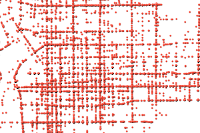

In [4]:
items[0]

In [5]:
item = items[0]

The item shows all accidents that occurred in Pasadena during the past decade. 

We can print the names of the layers in this item and assign them to variables that will be used in our analysis

The code below prints name of layers.

In [6]:
for lyr in item.layers:
    print(lyr.properties['name'])

collisions


Since the item is a Feature Layer Collection, accessing the layers property gives us a list of FeatureLayer objects. The collisions layer is the only layer in this item.

In [7]:
collisions = item.layers[0]


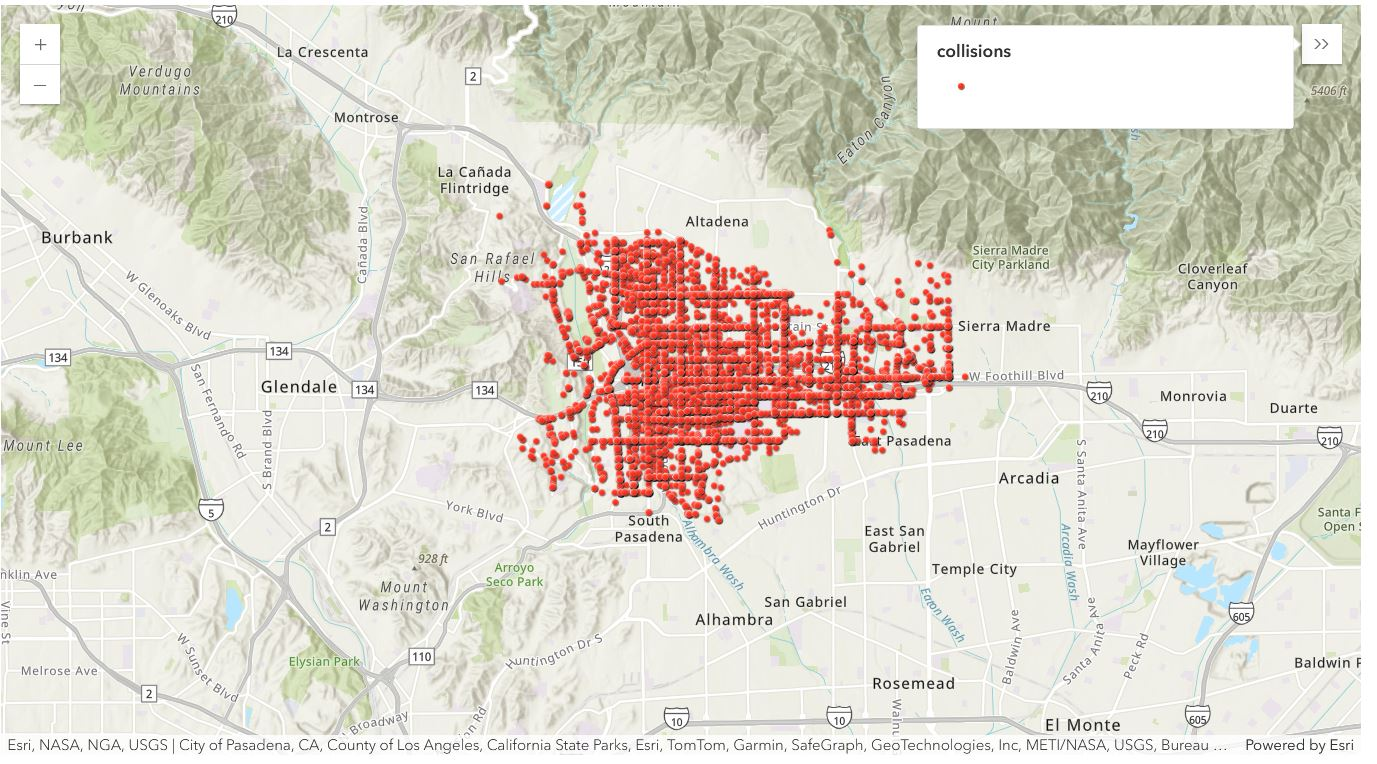

In [12]:
m1 = gis.map('Pasadena, California')
m1.zoomlevel = 13
m1.basemap.basemap = 'topo-vector'
m1

The map shows all accidents that occurred in Pasadena during the past decade.

In [9]:
m1.content.add(collisions)

In [10]:
m1.legend.enabled = True

The `collisions` layer does not only contain information about location, but it also has other attributes that cannot be seen on the map. So using `query` method, we can query the features of a feature layer. The `sdf` property of `featureSet` class is a powerful tool to visualize all the features as a Pandas `DataFrame`.

In [8]:
collisions.query().sdf.columns

Index(['FID', 'Accidno', 'Cause', 'CollisnTyp', 'Controls', 'CrossSt',
       'Damage1', 'Damage2', 'Date', 'Day', 'Direction', 'Direction1',
       'Direction2', 'Distance', 'HitAndRun', 'Injury', 'InvWith', 'Lighting',
       'Movement1', 'Movement2', 'NoInjured', 'NoKilled', 'OBJECTID',
       'PartyAge1', 'PartyAge2', 'PartySex1', 'PartySex2', 'PartyType1',
       'PartyType2', 'PedAction', 'PtyAtFault', 'PvtProp', 'RoadCond',
       'RoadSurf', 'SafetyEq1', 'SafetyEq2', 'Sobriety1', 'Sobriety2',
       'SpecInfo1', 'SpecInfo2', 'SpeedLim1', 'SpeedLim2', 'Street', 'Time',
       'VehMake1', 'VehMake2', 'VehModel1', 'VehModel2', 'VehType1',
       'VehType2', 'VehYear1', 'VehYear2', 'Violation', 'Weather', 'X', 'Y',
       'SHAPE'],
      dtype='object')

In [9]:
collisions.query().sdf.InvWith.unique()

<StringArray>
[           'Other Motor Vehicle',                     'Pedestrian',
                   'Fixed Object',                        'Bicycle',
           'Parked Motor Vehicle',                   'Other Object',
 'Motor Vehicle on Other Roadway',                  'Non-Collision',
                          'Train',                         'Animal',
                     'Not Stated',                          'Other']
Length: 12, dtype: string

Filter the layer to show only accidents that involved a pedestrian or cyclist.

In [10]:
collisions.filter = "(InvWith = 'Bicycle') OR (InvWith = 'Pedestrian')"

### Uncover patterns

We are able to visualize accidents on map. However, it does not reveal any patterns.  There can possibly be areas where particularly large number of accidents are occurring.

Different ways to find patterns in data includes point clustering, heat maps, hot spot analysis and [calculate density](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-analyst/how-kernel-density-works.htm). These methods reveal where accidents are happening at abnormal rates.

First, we will apply `calculate_density` tool to get better insights of this data.

In [ ]:
collision_density = calculate_density(input_layer=collisions,
                                      output_name='density_of_incidents' + str(dt.now().microsecond))

In [12]:
collision_density

<Item title:"density_of_incidents967701" type:Feature Layer Collection owner:MMajumdar_geosaurus>


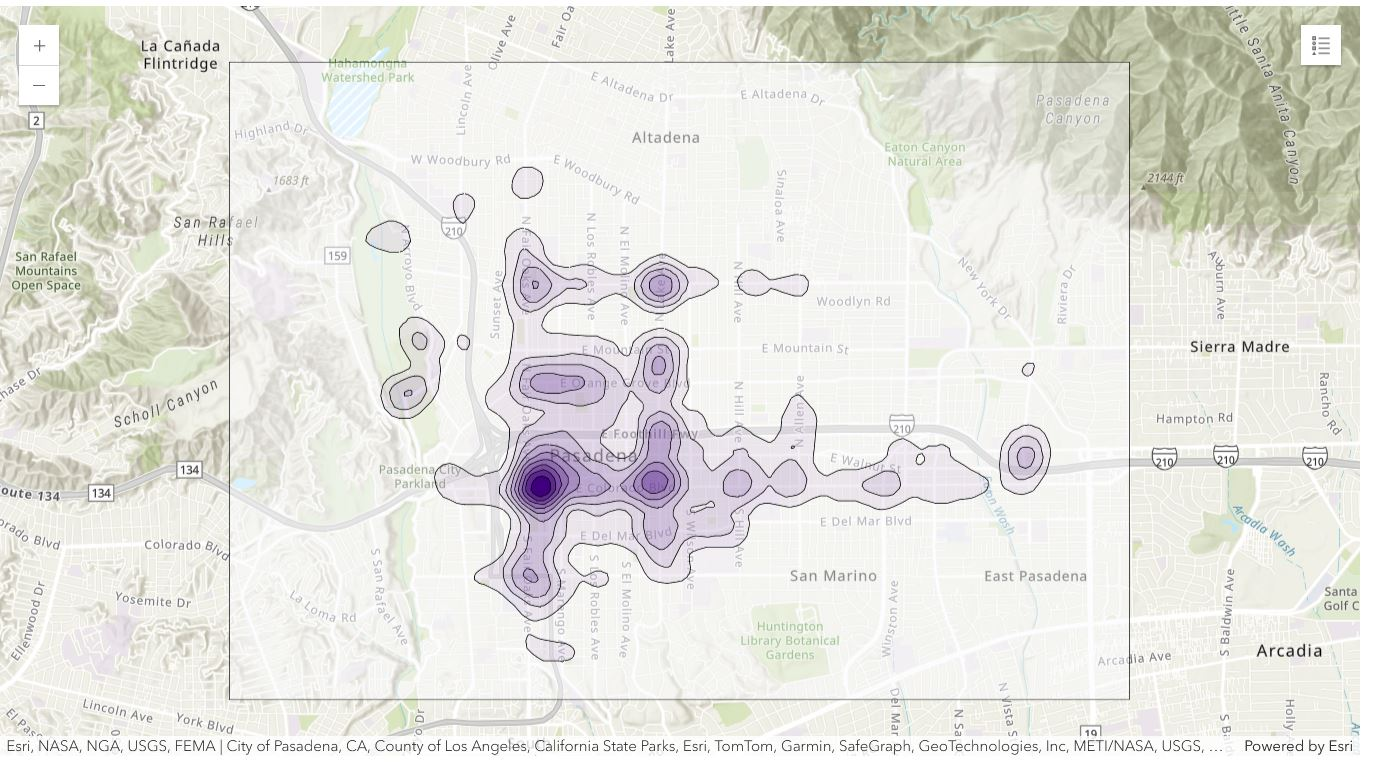

In [24]:
m2 = gis.map('Pasadena, California')
m2.zoomlevel = 13
m2.basemap.basemap = 'topo-vector'
m2

Areas with large number of accidents show up more densely colored as compared to other areas.

In [19]:
m2.content.add(collision_density)

In [21]:
m2.zoom_to_layer(collision_density)

In [23]:
m2.legend.enabled = True

`find_hot_spots` method finds statistically significant spatial clusters of high values (hot spots) and low values (cold spots).

In [ ]:
collision_hot_spots = find_hot_spots(collisions,
                                     output_name='collision_hexagon_hot_spots' + str(dt.now().microsecond),
                                     shape_type='hexagon')

In [14]:
collision_hot_spots

<Item title:"collision_hexagon_hot_spots279247" type:Feature Layer Collection owner:MMajumdar_geosaurus>


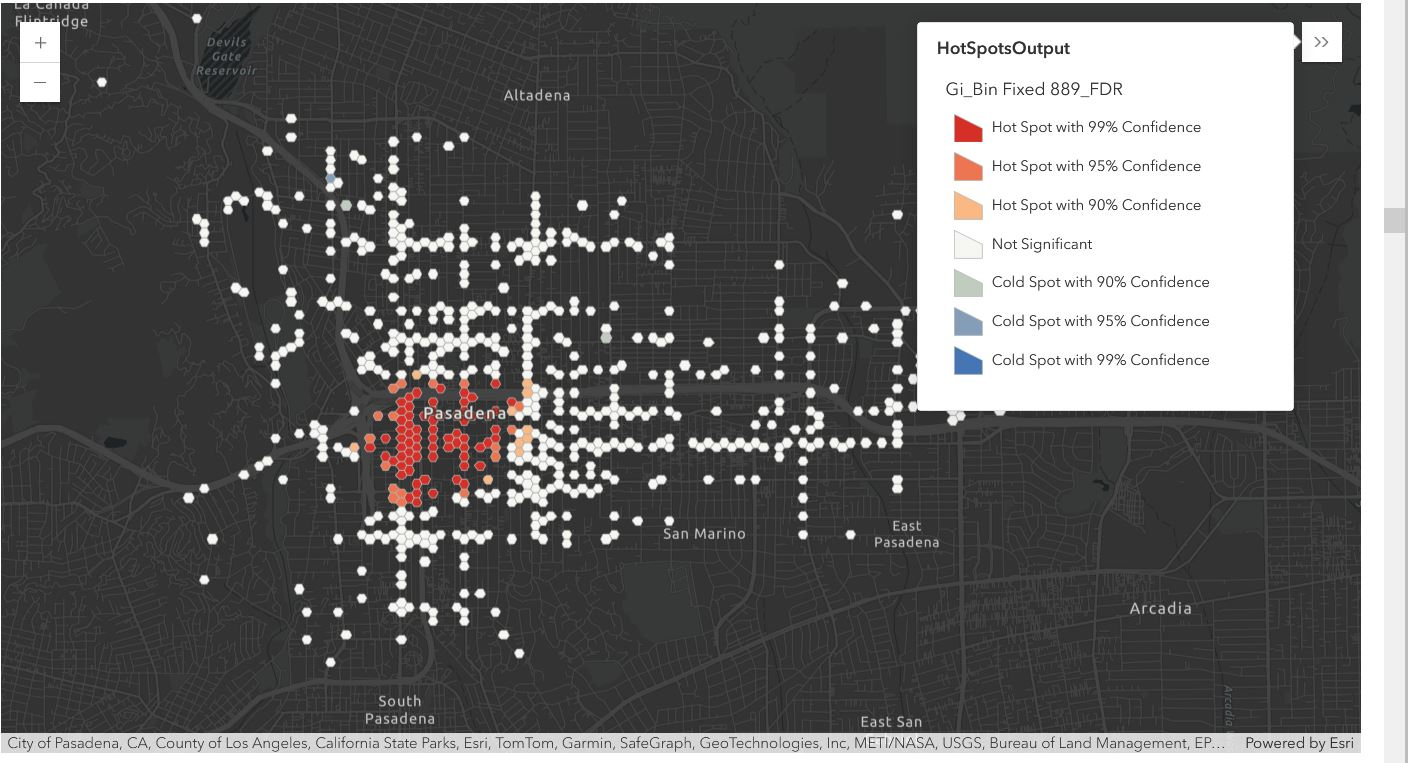

In [35]:
m3 = gis.map('Pasadena, California')
m3.zoomlevel = 13
m3.basemap.basemap = 'arcgis-dark-gray'
m3

The red hex bins show areas of spatially significant clustering, while white hex bins show areas with no significant clustering. There are no blue areas on the map, but if there were, they would represent areas with low statistically significant clustering. The map indicates that accidents happen across the city, but with a statistically significant clustering in the downtown area.

In [32]:
m3.content.add(collision_hot_spots)

In [33]:
m3.zoom_to_layer(collision_hot_spots)

In [34]:
m3.legend.enabled = True

The `HeatmapRenderer` renders point data into a raster visualization that emphasizes areas of higher density or weighted values.

We will use the Smart Mapping `HeatmapRenderer` to display generalized point pattern locations.


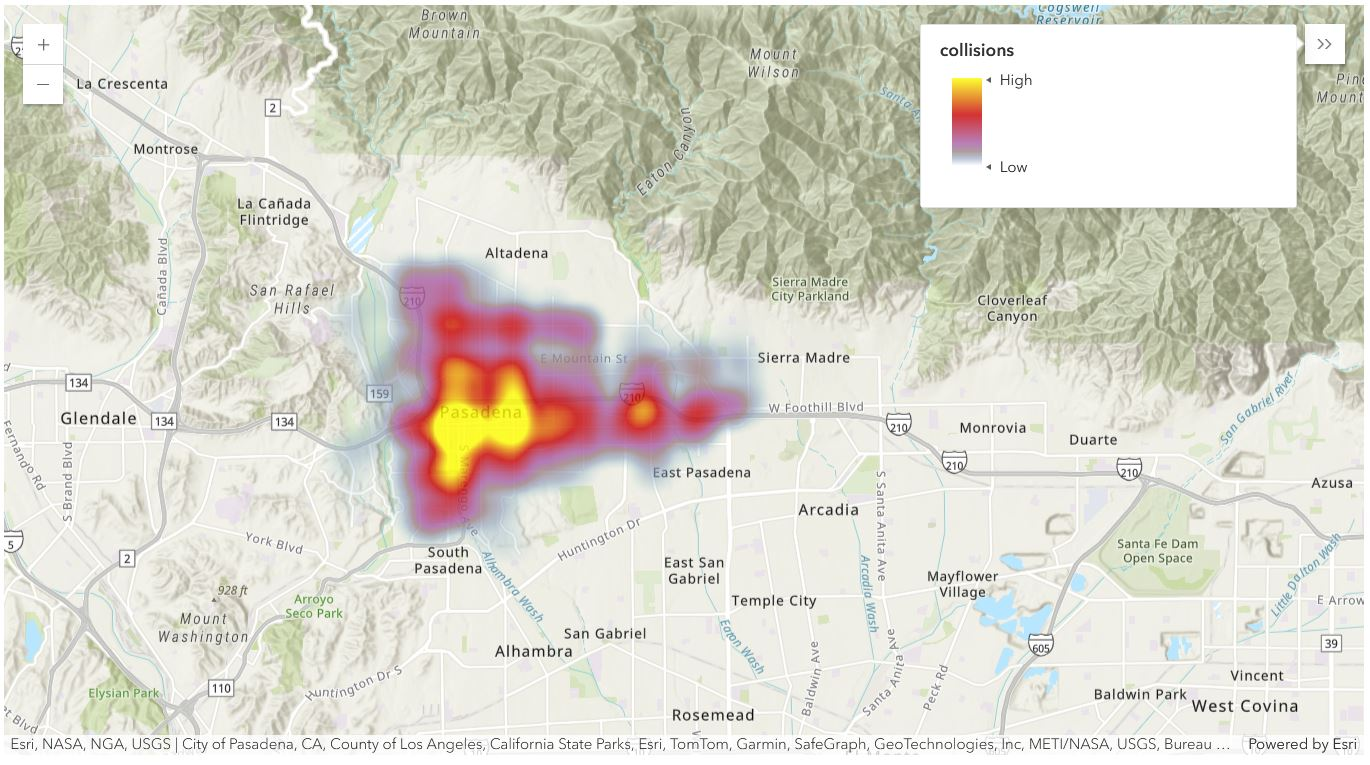

In [40]:
m4 = gis.map('Pasadena, California')
m4.zoomlevel = 13
m4.basemap.basemap = 'topo-vector'
m4

Like the `calculate_density`, the `HeatmapRenderer` indicates a high density of accidents in central Pasadena. However, the heat map particularly emphasizes the area south of the Foothill Freeway, corresponding to downtown.

In [37]:
m4.content.add(collisions, options={"opacity": 0.8})

In [38]:
sm_manager = m4.content.renderer(0).smart_mapping()
sm_manager.heatmap_renderer()

In [39]:
m4.legend.enabled = True

We now have a better understanding of the data.

### Symbolize by category

Next, we will change the symbols of accidents layer to show different categories of accidents. In particular, we want to distinguish fatal accidents from accidents with only injuries. We also want to distinguish pedestrian accidents from bicycle accidents. This information will add more detail to our findings and will help support policymaker decisions.

In [11]:
df = collisions.query().sdf

In [12]:
filtered_df = df[(df['InvWith'] == "Pedestrian") | (df['InvWith'] == "Bicycle")]

In [13]:
filtered_df.head()

,FID,Accidno,Cause,CollisnTyp,Controls,CrossSt,Damage1,Damage2,Date,Day,...,VehModel2,VehType1,VehType2,VehYear1,VehYear2,Violation,Weather,X,Y,SHAPE
1,2,10407211603116,Other Hazardous Movement,Vehicle - Pedestrian,Functioning,MARENGO AVE,,,6/29/2008,Sunday,...,,Passenger Car,,,,21451,Clear,6517494,1875480,"{""x"": -13151952.7988482, ""y"": 4048399.24990493..."
11,12,10409075901001,Auto R/W Violation,Broadside,Functioning,RAYMOND AVE,,,7/1/2008,Tuesday,...,,,,,,21801,Clear,6516612,1876820,"{""x"": -13152278.024718883, ""y"": 4048894.055900..."
26,27,10411184701852,Unsafe Speed,Rear-End,No Controls Present / Factor,ROSE BOWL DR,,,7/3/2008,Thursday,...,,Bicycle,Passenger Car,,,22350,Clear,6511556,1881787,"{""x"": -13154141.264326861, ""y"": 4050727.197689..."
29,30,10412131002035,Ped R/W Violation,Vehicle - Pedestrian,Functioning,ORANGE GROVE BLVD,,,7/4/2008,Friday,...,,,,,,21950,Clear,6517482,1879853,"{""x"": -13151959.551540626, ""y"": 4050015.650237..."
58,59,10418170105652,Other Hazardous Movement,Sideswipe,No Controls Present / Factor,WESLEY AVE,,,7/10/2008,Thursday,...,,Passenger Car,Bicycle,,,22517,Clear,6525309.99742721,1885626.50722028,"{""x"": -13149081.688380858, ""y"": 4052153.917797..."


To create these four symbol categories, we will use an [Arcade](https://developers.arcgis.com/arcade/guide/) expression. Arcade expressions use attribute information to determine symbology.

We will first assign three variables that represent the four categories we want to symbolize. However, these variables aren't exclusive. Accidents involving pedestrians or cyclists likely also have injuries or fatalities. There are four combinations of the type, fatal, and injured variables:
- Accidents involving a pedestrian and a fatality
- Accidents involving a pedestrian and an injury
- Accidents involving a cyclist and a fatality
- Accidents involving a cyclist and an injury

To account for these combinations, we will create a 'When' function. A When function indicates that when certain conditions are met, a specific symbology category will be used.

In [14]:
arcade_expression = """
var acc_type = $feature.InvWith;
var fatal = $feature.Nokilled;
var injured = $feature.NoInjured;
var result = When( 
    acc_type == 'Pedestrian' && fatal == '1'  , 'PedestrianFatality',
    acc_type == 'Pedestrian' && injured != '0', 'PedestrianInjury',
    acc_type == 'Bicycle'    && injured != '0', 'BicycleInjury',
    acc_type == 'Bicycle'    && fatal == '1',   'BicycleFatality',
    'null');
return result;
"""

In [15]:
arcade_expression

"\nvar acc_type = $feature.InvWith;\nvar fatal = $feature.Nokilled;\nvar injured = $feature.NoInjured;\nvar result = When( \n    acc_type == 'Pedestrian' && fatal == '1'  , 'PedestrianFatality',\n    acc_type == 'Pedestrian' && injured != '0', 'PedestrianInjury',\n    acc_type == 'Bicycle'    && injured != '0', 'BicycleInjury',\n    acc_type == 'Bicycle'    && fatal == '1',   'BicycleFatality',\n    'null');\nreturn result;\n"

The code below cycles trough each category and asigns it a color, size and symbol.

In [16]:
def get_symbol(color, size):
    outline = symbols.SimpleLineSymbolEsriSLS(
            color=[153,153,153,255],
            style=symbols.SimpleLineSymbolStyle.esri_sls_solid,
            width=0.375)
    symbol = symbols.SimpleMarkerSymbolEsriSMS(
                         color=color,
                         style = symbols.SimpleMarkerSymbolStyle.esri_sms_circle,
                         size=size,
                         outline=outline)
    return symbol


def get_unique_values(color_list, values):
    return [ { "label": value, "symbol":get_symbol(color, size), "value": value } for color, size, value in zip(color_list, sizes, values) ]

In [17]:
color_list = [ [255, 0, 0, 255], [0, 255, 0, 255], [0, 0, 255, 255], [0 , 255, 255, 255] ] 
values = ['PedestrianFatality', 'PedestrianInjury', 'BicycleInjury', 'BicycleFatality']
sizes = [15, 3, 3, 15]
unique_value_list = get_unique_values(color_list, values)

Let us take a look at the `unique_value_list` list that we built to generate unique values for the collision types. We will use this to build our custom `UniqueValueRenderer`.

In [71]:
print(unique_value_list)

[{'value': 'PedestrianFatality', 'label': 'PedestrianFatality', 'symbol': SimpleMarkerSymbolEsriSMS(angle=None, color=[255, 0, 0, 255], outline=SimpleLineSymbolEsriSLS(color=[153, 153, 153, 255], marker=None, style='esriSLSSolid', type='esriSLS', width=0.375), size=15, style='esriSMSCircle', type='esriSMS', xoffset=None, yoffset=None)}, {'value': 'PedestrianInjury', 'label': 'PedestrianInjury', 'symbol': SimpleMarkerSymbolEsriSMS(angle=None, color=[0, 255, 0, 255], outline=SimpleLineSymbolEsriSLS(color=[153, 153, 153, 255], marker=None, style='esriSLSSolid', type='esriSLS', width=0.375), size=3, style='esriSMSCircle', type='esriSMS', xoffset=None, yoffset=None)}, {'value': 'BicycleInjury', 'label': 'BicycleInjury', 'symbol': SimpleMarkerSymbolEsriSMS(angle=None, color=[0, 0, 255, 255], outline=SimpleLineSymbolEsriSLS(color=[153, 153, 153, 255], marker=None, style='esriSLSSolid', type='esriSLS', width=0.375), size=3, style='esriSMSCircle', type='esriSMS', xoffset=None, yoffset=None)}, {

In [20]:
accident_renderer = renderers.UniqueValueRenderer(
    valueExpression = arcade_expression,
    unique_value_infos = unique_value_list)


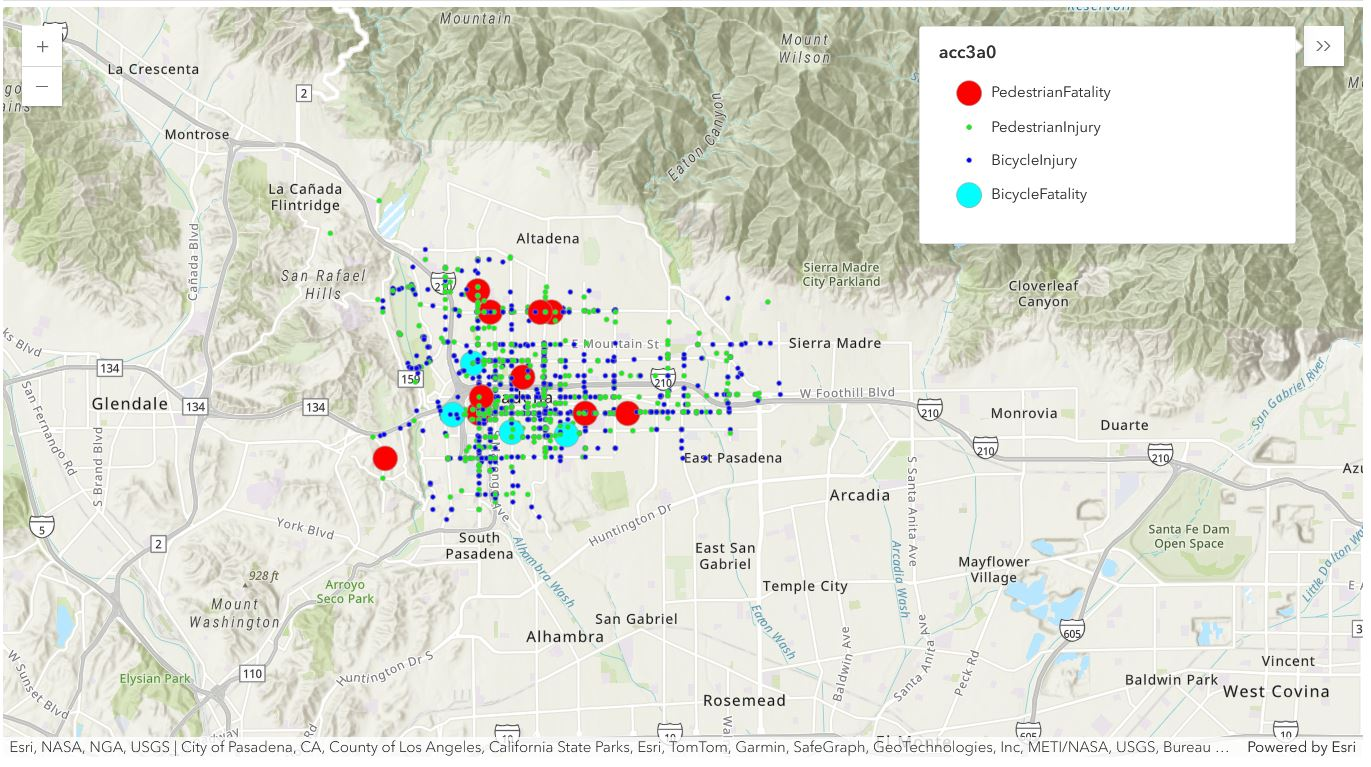

In [24]:
m5 = gis.map('Pasadena, California')
m5.zoomlevel = 13
m5.basemap.basemap = 'topo-vector'
m5

The fatalities receive a larger symbol size to indicate the difference in severity between injuries and fatalities.

In [ ]:
m5.content.add(filtered_df, drawing_info={"renderer": accident_renderer})

In [23]:
m5.legend.enabled = True

The points are blending in with the the basemap colors. So let's change the basemap to dark-gray.


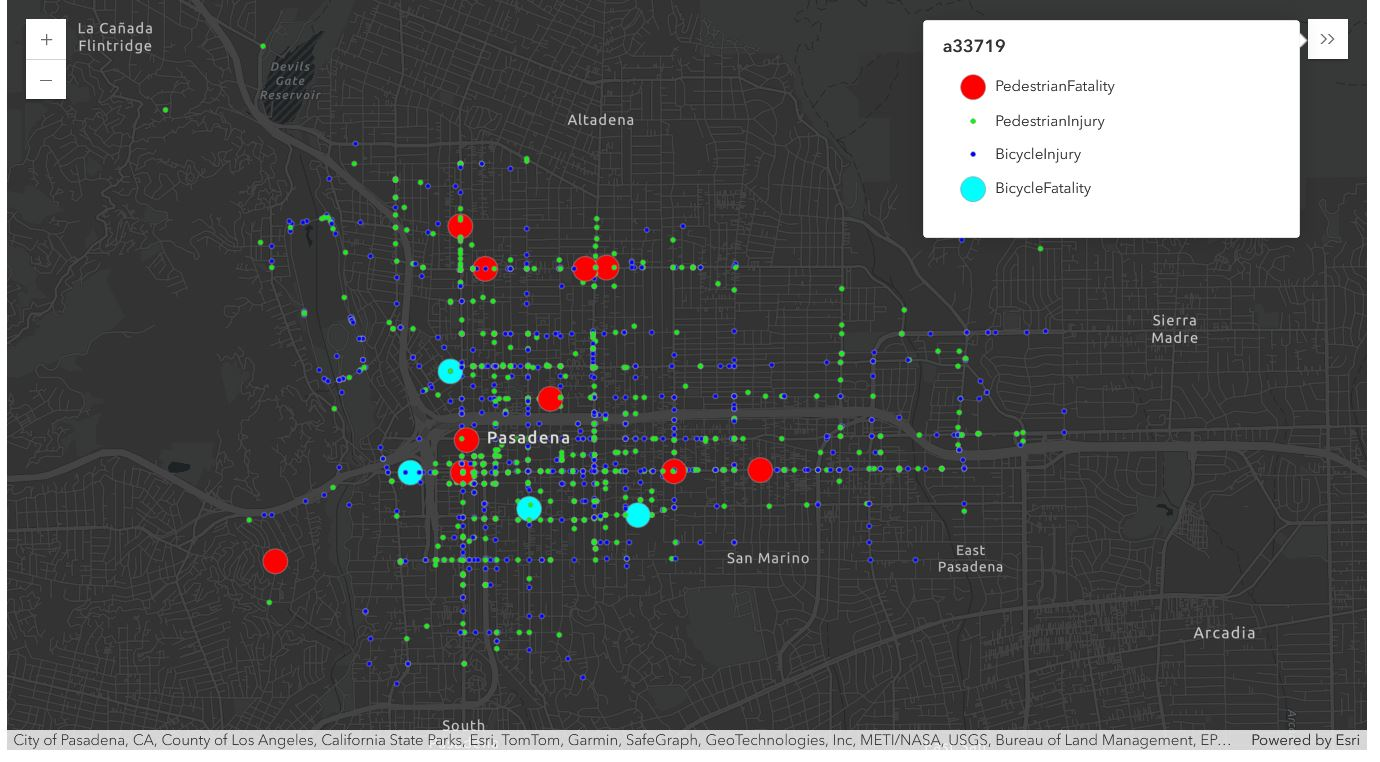

In [29]:
m6 = gis.map('Pasadena, California')
m6.zoomlevel = 13
m6.basemap.basemap = 'arcgis-dark-gray'
m6

In [27]:
m6.content.add(filtered_df, drawing_info={"renderer": accident_renderer})

In [28]:
m6.legend.enabled = True

Now, the accidents stand out because the points are not competing with the basemap colors. There is also a clear distinction between bicycle and pedestrian accidents.

### Add school areas

When it comes to policy decisions, hot spots and heat maps don't provide much context and make no explicit claims about the data. Because your subject is not only accidents but accidents near schools, we will add a layer of Pasadena Unified School District (PUSD) schools to our map. Then, we will find areas within a half-mile walking distance of each school.

In [30]:
schools = gis.content.search('PUSD schools, owner:Esri_Tutorials', 'Feature Layer',outside_org=True)[0]

<Item title:"PUSD Schools" type:Feature Layer Collection owner:Esri_Tutorials>
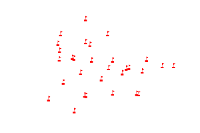

In [31]:
schools

By default, the schools have red point symbols that can be difficult to distinguish from the accident points. We'll change the symbol so the schools stand out more. The square shape will be distinguishable from the circle shapes of the accidents. We'll also change the color to a light-gray so the symbols stand out against the dark basemap.


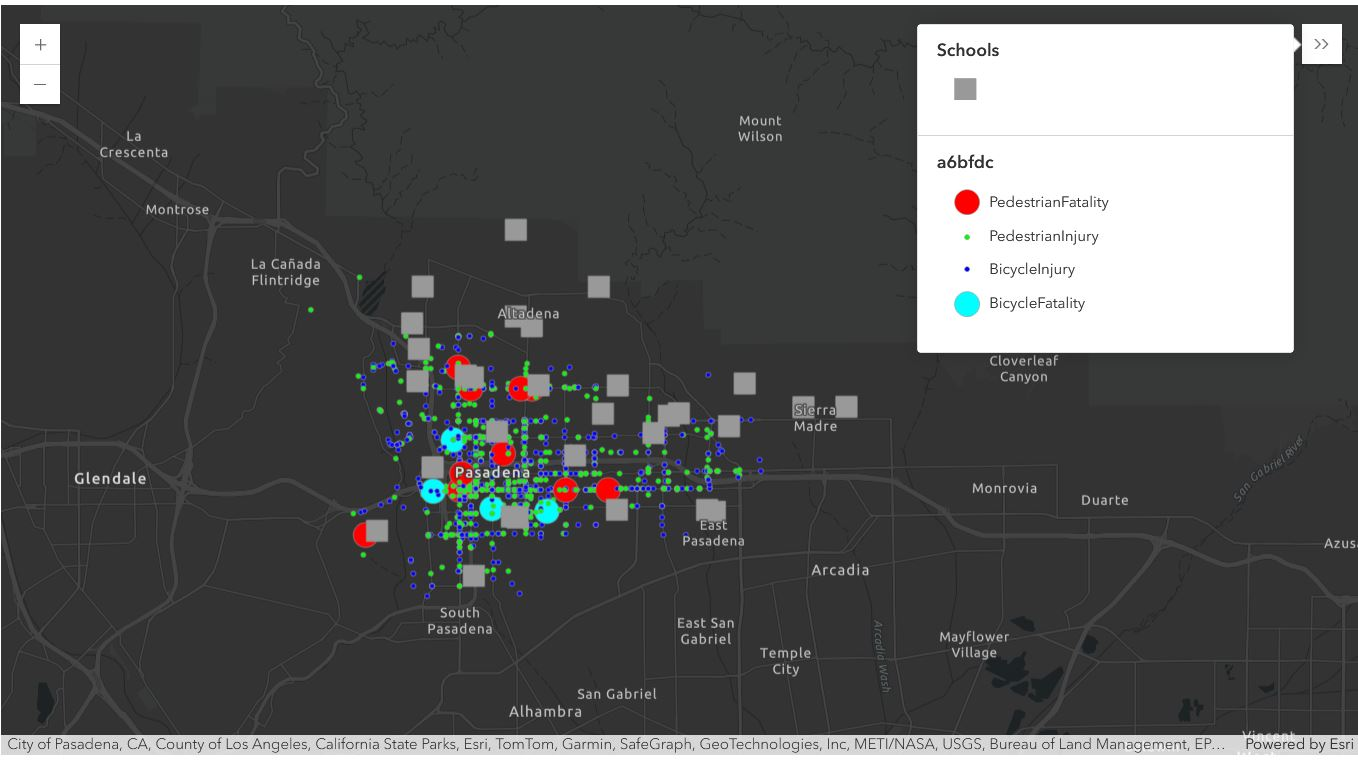

In [38]:
m7 = gis.map('Pasadena, California')
m7.zoomlevel = 13
m7.basemap.basemap = 'arcgis-dark-gray'
m7

In [33]:
def get_symbol(color, size):
    outline = symbols.SimpleLineSymbolEsriSLS(
            color=[153,153,153,255],
            style=symbols.SimpleLineSymbolStyle.esri_sls_solid,
            width=0.375)
    symbol = symbols.SimpleMarkerSymbolEsriSMS(
                         color=color,
                         style = symbols.SimpleMarkerSymbolStyle.esri_sms_circle,
                         size=size,
                         outline=outline)
    return symbol

In [34]:
outline = symbols.SimpleLineSymbolEsriSLS(
            color=[153,153,153,255],
            style=symbols.SimpleLineSymbolStyle.esri_sls_solid,
            width=0.375)

school_renderer = renderers.SimpleRenderer(
    symbol = symbols.SimpleMarkerSymbolEsriSMS(
        color = [153,153,153,255],
        style = symbols.SimpleMarkerSymbolStyle.esri_sms_square,
        size = 13,
        outline = outline
    )
)
    

In [36]:
m7.content.add(filtered_df, drawing_info={"renderer": accident_renderer})
m7.content.add(schools.layers[0], drawing_info={"renderer": school_renderer})

In [37]:
m7.legend.enabled = True

The layer of schools is added to the map. The schools now stand out and can be distinguished from the accidents.

### Creating areas within a half-mile walking distance of schools 

Next, we'll create the walk-time areas around each school. This tool uses road network data to create areas that can be reached within a specific driving or walking distance or time. Creating areas within a half-mile walking distance of schools will show places where there are likely large numbers of student pedestrians.

We'll later be able to calculate the number of collisions near each school.

In [ ]:
walk_dist_from_schools = create_drive_time_areas(schools.layers[0],
                                                 break_values=[0.5],
                                                 break_units='Miles',
                                                 travel_mode='Walking Distance',
                                                 output_name='psud_schools_drivetime' + str(dt.now().microsecond))

In [40]:
walk_dist_from_schools

<Item title:"psud_schools_drivetime804991" type:Feature Layer Collection owner:MMajumdar_geosaurus>


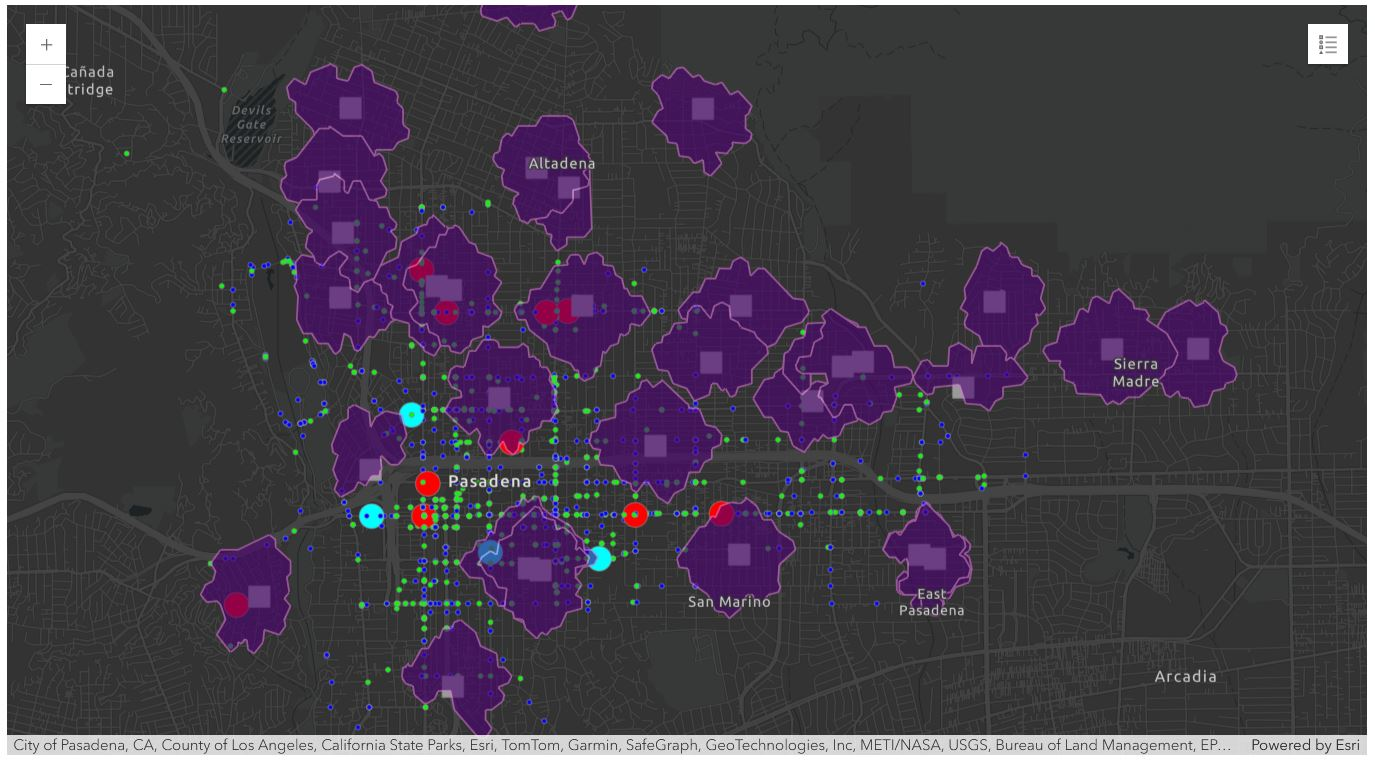

In [47]:
m8 = gis.map('Pasadena, California')
m8.zoomlevel = 13
m8.basemap.basemap = 'arcgis-dark-gray'
m8

Some school areas have no pedestrian or cyclist accidents, while others have a significant amount. At the same time, the area with the highest density of accidents is not within any school area. Adding more information beyond a heat map has provided essential context for policymakers.

In [44]:
m8.content.add(filtered_df, drawing_info={"renderer": accident_renderer})
m8.content.add(schools.layers[0], drawing_info={"renderer": school_renderer})

In [45]:
m8.content.add(walk_dist_from_schools, options={"opacity": 0.6})

In [46]:
m8.legend.enabled = True

You could stop your analysis here, and use this map as grounds to implement a policy that encompasses all school zones. Changing street signs and adding bicycle lanes in these areas may reduce accidents near schools.

However, sometimes a city does not have enough funds to enact new policy for every location. Many Pasadena school zones have few accidents, so policies in these areas may have little effect. Instead, policymakers want to focus their efforts on areas that need it the most.

We'll calculate the number of accidents within each school zone and filter the layer to show only the five most dangerous zones. Then, policymakers can prioritize these zones over zones that are already relatively safe.

### Find the most dangerous school areas

This tool summarizes the number of point features within a polygon feature.

In [ ]:
dangerous_areas = summarize_within(walk_dist_from_schools.layers[0],
                                   collisions,
                                   output_name="accident_count_within_school_zone" + str(dt.now().microsecond))

In [49]:
dangerous_areas

<Item title:"accident_count_within_school_zone185097" type:Feature Layer Collection owner:MMajumdar_geosaurus>

In [50]:
top_5_dangerous_areas = dangerous_areas.layers[0].query().sdf.sort_values(by='Point_Count', ascending=False)

In [54]:
top_5_dangerous_areas_df = top_5_dangerous_areas[:5]
top_5_dangerous_areas_df

,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,Name_1,ADDRESS,CITY,SCHOOLTYPE,Breaks,AdditionalTime,AdditionalDistance,AnalysisArea,Point_Count,SHAPE
7,8,Madison Elementary : 0 - 0.5,0.0,0.5,8,Madison Elementary,515 ASHTABULA ST,PASADENA,ELEMENTARY,<NA>,0.0,0.0,0.529728,117,"{""rings"": [[[-13151389.2187, 4051086.8635], [-..."
8,9,McKinley School : 0 - 0.5,0.0,0.5,9,McKinley School,325 S OAK KNOLL AVE,PASADENA,ELEMENTARY/MIDDLE,<NA>,0.0,0.0,0.61083,114,"{""rings"": [[[-13150764.2216, 4048700.1758], [-..."
19,20,Rose City High Alternative : 0 - 0.5,0.0,0.5,20,Rose City High Alternative,351 S HUDSON AVE,PASADENA,HIGH,<NA>,0.0,0.0,0.502756,84,"{""rings"": [[[-13150764.2216, 4048549.1365], [-..."
10,11,Washington Accelerated Elementary : 0 - 0.5,0.0,0.5,11,Washington Accelerated Elementary,1520 N RAYMOND AVE,PASADENA,ELEMENTARY,<NA>,0.0,0.0,0.572369,64,"{""rings"": [[[-13152314.2145, 4052990.531], [-1..."
6,7,Longfellow Elementary : 0 - 0.5,0.0,0.5,7,Longfellow Elementary,1065 E WASHINGTON BLVD,PASADENA,ELEMENTARY,<NA>,0.0,0.0,0.57478,61,"{""rings"": [[[-13149814.2259, 4052416.3755], [-..."


The table is sorted so that school zones with more accidents are shown first. The first five school zones have accidents totaling 117, 114, 84, 64, and 61, respectively.

The sixth-highest school zone has 58 accidents, which is almost the same as the fifth highest. With this information, you might consider expanding policy to include this school zone as well. Alternatively, depending on the city's resources, we want to limit policy to focus only on the three most dangerous school zones, which have a much higher number of accidents than the fourth.

For this scenario, we'll continue to focus on the five most dangerous school zones. We'll filter the layer to show only these zones.

All five of the most dangerous school zones are relatively close to one another. Two of the most dangerous zones almost overlap entirely, which means the city can increase safety for both schools with many of the same policy decisions.


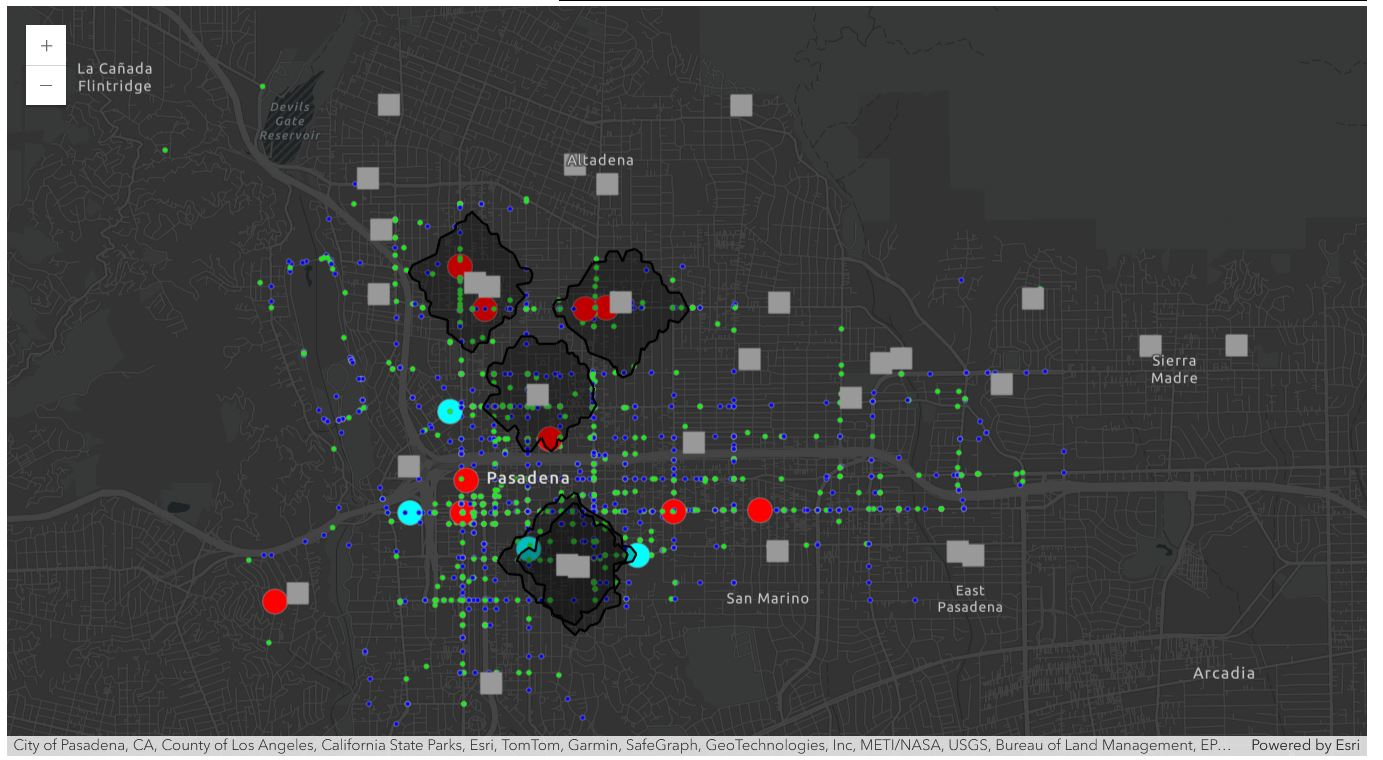

In [66]:
m9 = gis.map('Pasadena, California')
m9.zoomlevel = 13
m9.basemap.basemap = 'arcgis-dark-gray'
m9

In [59]:
m9.content.add(filtered_df, drawing_info={"renderer": accident_renderer})

In [60]:
top_5_dangerous_areas_df.spatial.plot(map_widget = m9)

True

In [61]:
m9.content.add(schools.layers[0], drawing_info={"renderer": school_renderer})

In [65]:
m9.zoom_to_layer(schools.layers[0])

### Conclusion

We have created a map that highlights five school zones that would benefit from policy intervention. 
The city officials can now identify the most dangerous school zones in order to reduce the likelihood of future accidents.